# 1、import data

In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

features = pd.read_csv('feature/features_3m.csv')
labels = pd.read_csv('feature/labels_3m.csv', header=None)[1]

features_test = pd.read_csv('feature/features_test_3m.csv')

D:\Anaconda\envs\py3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 2、handle data

In [3]:
features = features.drop(['shop_id'], axis=1)

features_test = features_test.drop(['shop_id'], axis=1)

ValueError: labels ['shop_id'] not contained in axis

In [4]:
features = features.apply(lambda x: np.log(x+1))
columns = features.columns
from sklearn.preprocessing import MinMaxScaler
features[columns] = MinMaxScaler().fit_transform(features[columns])

features_test = features_test.apply(lambda x: np.log(x+1))
features_test[columns] = MinMaxScaler().fit_transform(features_test[columns])

In [5]:
from sklearn.cross_validation import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

# 3、train 

In [6]:
dataset_train = xgb.DMatrix(X_train,y_train)
dataset_val = xgb.DMatrix(X_test,y_test)
dataset_test = xgb.DMatrix(features_test)

In [7]:
# 评价函数
def wmae(ground_truth, predictions):
    return abs(predictions-ground_truth).sum()/float(ground_truth.sum())
def wmae_xgb(ground_truth, predictions):
    predictions = predictions.get_label()
    return 'wmae', abs(predictions-ground_truth).sum()/float(ground_truth.sum())

In [8]:
def plot_results(results, para_name):
    paras = results.keys()
    x = range(1, len(paras)+1)
    y = []
    for key in paras:
        y.append(results[key]['wmae'])
    
    plt.figure()
    plt.plot(x,y)
    plt.xlabel('{}'.format(para_name), fontsize=14)
    plt.ylabel('wmae)', fontsize=14)
    plt.xticks(x, paras, rotation=10, fontsize=10)
    plt.title('wmae for different {}'.format(para_name), fontsize=16)
    plt.show()

**[Davut tuning](https://www.kaggle.com/c/bnp-paribas-cardif-claims-management/discussion/19083)**





running while depth = 8
[0]	val-wmae:0.68178	train-wmae:0.666629
Multiple eval metrics have been passed: 'train-wmae' will be used for early stopping.

Will train until train-wmae hasn't improved in 1000 rounds.
[1]	val-wmae:0.557813	train-wmae:0.542607
[2]	val-wmae:0.51931	train-wmae:0.497235
[3]	val-wmae:0.495357	train-wmae:0.465559
[4]	val-wmae:0.477988	train-wmae:0.440216
[5]	val-wmae:0.464155	train-wmae:0.418925
[6]	val-wmae:0.453318	train-wmae:0.401032
[7]	val-wmae:0.444684	train-wmae:0.385865
[8]	val-wmae:0.437754	train-wmae:0.373056
[9]	val-wmae:0.431951	train-wmae:0.362084
[10]	val-wmae:0.427709	train-wmae:0.352866
[11]	val-wmae:0.424377	train-wmae:0.344997
[12]	val-wmae:0.421819	train-wmae:0.338311
[13]	val-wmae:0.419851	train-wmae:0.33267
[14]	val-wmae:0.418396	train-wmae:0.32788
[15]	val-wmae:0.417331	train-wmae:0.323807
[16]	val-wmae:0.416533	train-wmae:0.320343
[17]	val-wmae:0.415908	train-wmae:0.317422
[18]	val-wmae:0.415486	train-wmae:0.31497
[19]	val-wmae:0.415169	

[186]	val-wmae:0.405611	train-wmae:0.288109
[187]	val-wmae:0.40561	train-wmae:0.288091
[188]	val-wmae:0.405545	train-wmae:0.288037
[189]	val-wmae:0.405528	train-wmae:0.288012
[190]	val-wmae:0.405504	train-wmae:0.287982
[191]	val-wmae:0.405408	train-wmae:0.287914
[192]	val-wmae:0.405413	train-wmae:0.287899
[193]	val-wmae:0.405353	train-wmae:0.287849
[194]	val-wmae:0.405293	train-wmae:0.287801
[195]	val-wmae:0.405269	train-wmae:0.28777
[196]	val-wmae:0.40528	train-wmae:0.28776
[197]	val-wmae:0.405199	train-wmae:0.287698
[198]	val-wmae:0.405212	train-wmae:0.287689
[199]	val-wmae:0.405129	train-wmae:0.287629
[200]	val-wmae:0.40512	train-wmae:0.287606
[201]	val-wmae:0.405111	train-wmae:0.287585
[202]	val-wmae:0.405043	train-wmae:0.287531
[203]	val-wmae:0.405044	train-wmae:0.287516
[204]	val-wmae:0.404982	train-wmae:0.287466
[205]	val-wmae:0.404934	train-wmae:0.287426
[206]	val-wmae:0.404909	train-wmae:0.287396
[207]	val-wmae:0.404871	train-wmae:0.28736
[208]	val-wmae:0.404828	train-wmae:0.2

[374]	val-wmae:0.40074	train-wmae:0.283758
[375]	val-wmae:0.400709	train-wmae:0.283736
[376]	val-wmae:0.400697	train-wmae:0.283726
[377]	val-wmae:0.400673	train-wmae:0.283708
[378]	val-wmae:0.400666	train-wmae:0.2837
[379]	val-wmae:0.400651	train-wmae:0.283687
[380]	val-wmae:0.400633	train-wmae:0.283673
[381]	val-wmae:0.400602	train-wmae:0.283652
[382]	val-wmae:0.400578	train-wmae:0.283636
[383]	val-wmae:0.400576	train-wmae:0.28363
[384]	val-wmae:0.400559	train-wmae:0.283616
[385]	val-wmae:0.400543	train-wmae:0.283604
[386]	val-wmae:0.40051	train-wmae:0.283581
[387]	val-wmae:0.400494	train-wmae:0.283568
[388]	val-wmae:0.400477	train-wmae:0.283554
[389]	val-wmae:0.400472	train-wmae:0.283548
[390]	val-wmae:0.400445	train-wmae:0.283529
[391]	val-wmae:0.400429	train-wmae:0.283516
[392]	val-wmae:0.40042	train-wmae:0.283507
[393]	val-wmae:0.400404	train-wmae:0.283494
[394]	val-wmae:0.400387	train-wmae:0.283481
[395]	val-wmae:0.400368	train-wmae:0.283467
[396]	val-wmae:0.40034	train-wmae:0.28

[562]	val-wmae:0.397947	train-wmae:0.281782
[563]	val-wmae:0.397938	train-wmae:0.281775
[564]	val-wmae:0.397928	train-wmae:0.281768
[565]	val-wmae:0.397915	train-wmae:0.28176
[566]	val-wmae:0.397904	train-wmae:0.281753
[567]	val-wmae:0.397886	train-wmae:0.281743
[568]	val-wmae:0.397878	train-wmae:0.281737
[569]	val-wmae:0.397868	train-wmae:0.28173
[570]	val-wmae:0.397851	train-wmae:0.28172
[571]	val-wmae:0.397844	train-wmae:0.281715
[572]	val-wmae:0.397828	train-wmae:0.281705
[573]	val-wmae:0.397815	train-wmae:0.281696
[574]	val-wmae:0.397809	train-wmae:0.281691
[575]	val-wmae:0.397799	train-wmae:0.281685
[576]	val-wmae:0.397784	train-wmae:0.281675
[577]	val-wmae:0.397773	train-wmae:0.281667
[578]	val-wmae:0.397766	train-wmae:0.281662
[579]	val-wmae:0.397752	train-wmae:0.281652
[580]	val-wmae:0.39774	train-wmae:0.281644
[581]	val-wmae:0.397734	train-wmae:0.281639
[582]	val-wmae:0.397725	train-wmae:0.281633
[583]	val-wmae:0.39771	train-wmae:0.281623
[584]	val-wmae:0.3977	train-wmae:0.28

[750]	val-wmae:0.396265	train-wmae:0.280634
[751]	val-wmae:0.39626	train-wmae:0.280631
[752]	val-wmae:0.396251	train-wmae:0.280625
[753]	val-wmae:0.396243	train-wmae:0.28062
[754]	val-wmae:0.396234	train-wmae:0.280614
[755]	val-wmae:0.396229	train-wmae:0.280611
[756]	val-wmae:0.396219	train-wmae:0.280604
[757]	val-wmae:0.396211	train-wmae:0.2806
[758]	val-wmae:0.396208	train-wmae:0.280597
[759]	val-wmae:0.396197	train-wmae:0.28059
[760]	val-wmae:0.396192	train-wmae:0.280586
[761]	val-wmae:0.396187	train-wmae:0.280583
[762]	val-wmae:0.396176	train-wmae:0.280576
[763]	val-wmae:0.396172	train-wmae:0.280573
[764]	val-wmae:0.396163	train-wmae:0.280567
[765]	val-wmae:0.396157	train-wmae:0.280563
[766]	val-wmae:0.396149	train-wmae:0.280558
[767]	val-wmae:0.396144	train-wmae:0.280554
[768]	val-wmae:0.396133	train-wmae:0.280548
[769]	val-wmae:0.396129	train-wmae:0.280545
[770]	val-wmae:0.396119	train-wmae:0.280538
[771]	val-wmae:0.396113	train-wmae:0.280535
[772]	val-wmae:0.396107	train-wmae:0.

[938]	val-wmae:0.395083	train-wmae:0.279872
[939]	val-wmae:0.395078	train-wmae:0.279869
[940]	val-wmae:0.395073	train-wmae:0.279866
[941]	val-wmae:0.395069	train-wmae:0.279864
[942]	val-wmae:0.395063	train-wmae:0.279859
[943]	val-wmae:0.395059	train-wmae:0.279857
[944]	val-wmae:0.395052	train-wmae:0.279853
[945]	val-wmae:0.395047	train-wmae:0.27985
[946]	val-wmae:0.395044	train-wmae:0.279847
[947]	val-wmae:0.395037	train-wmae:0.279843
[948]	val-wmae:0.395032	train-wmae:0.27984
[949]	val-wmae:0.395025	train-wmae:0.279836
[950]	val-wmae:0.395022	train-wmae:0.279833
[951]	val-wmae:0.395018	train-wmae:0.279831
[952]	val-wmae:0.39501	train-wmae:0.279827
[953]	val-wmae:0.395006	train-wmae:0.279824
[954]	val-wmae:0.395002	train-wmae:0.279822
[955]	val-wmae:0.394997	train-wmae:0.279818
[956]	val-wmae:0.394992	train-wmae:0.279815
[957]	val-wmae:0.394986	train-wmae:0.279811
[958]	val-wmae:0.394982	train-wmae:0.279809
[959]	val-wmae:0.394975	train-wmae:0.279805
[960]	val-wmae:0.394971	train-wmae:

[1123]	val-wmae:0.394257	train-wmae:0.279341
[1124]	val-wmae:0.394253	train-wmae:0.279338
[1125]	val-wmae:0.394249	train-wmae:0.279335
[1126]	val-wmae:0.394244	train-wmae:0.279332
[1127]	val-wmae:0.394242	train-wmae:0.279331
[1128]	val-wmae:0.394237	train-wmae:0.279327
[1129]	val-wmae:0.394233	train-wmae:0.279324
[1130]	val-wmae:0.39423	train-wmae:0.279323
[1131]	val-wmae:0.394227	train-wmae:0.279321
[1132]	val-wmae:0.394222	train-wmae:0.279318
[1133]	val-wmae:0.394219	train-wmae:0.279316
[1134]	val-wmae:0.394215	train-wmae:0.279313
[1135]	val-wmae:0.394211	train-wmae:0.27931
[1136]	val-wmae:0.394209	train-wmae:0.279308
[1137]	val-wmae:0.394203	train-wmae:0.279305
[1138]	val-wmae:0.394201	train-wmae:0.279303
[1139]	val-wmae:0.394196	train-wmae:0.2793
[1140]	val-wmae:0.394192	train-wmae:0.279297
[1141]	val-wmae:0.394189	train-wmae:0.279294
[1142]	val-wmae:0.394186	train-wmae:0.279292
[1143]	val-wmae:0.394182	train-wmae:0.27929
[1144]	val-wmae:0.39418	train-wmae:0.279288
[1145]	val-wmae:

[1306]	val-wmae:0.393694	train-wmae:0.278935
[1307]	val-wmae:0.393693	train-wmae:0.278934
[1308]	val-wmae:0.393689	train-wmae:0.278931
[1309]	val-wmae:0.393686	train-wmae:0.278929
[1310]	val-wmae:0.393685	train-wmae:0.278928
[1311]	val-wmae:0.393682	train-wmae:0.278925
[1312]	val-wmae:0.393679	train-wmae:0.278923
[1313]	val-wmae:0.393677	train-wmae:0.278922
[1314]	val-wmae:0.393675	train-wmae:0.27892
[1315]	val-wmae:0.393672	train-wmae:0.278917
[1316]	val-wmae:0.393671	train-wmae:0.278916
[1317]	val-wmae:0.393668	train-wmae:0.278914
[1318]	val-wmae:0.393665	train-wmae:0.278912
[1319]	val-wmae:0.393663	train-wmae:0.27891
[1320]	val-wmae:0.393661	train-wmae:0.278908
[1321]	val-wmae:0.393657	train-wmae:0.278906
[1322]	val-wmae:0.393655	train-wmae:0.278904
[1323]	val-wmae:0.393653	train-wmae:0.278903
[1324]	val-wmae:0.39365	train-wmae:0.2789
[1325]	val-wmae:0.393648	train-wmae:0.278899
[1326]	val-wmae:0.393645	train-wmae:0.278896
[1327]	val-wmae:0.393643	train-wmae:0.278895
[1328]	val-wmae

[1489]	val-wmae:0.393296	train-wmae:0.278612
[1490]	val-wmae:0.393295	train-wmae:0.278611
[1491]	val-wmae:0.393292	train-wmae:0.278609
[1492]	val-wmae:0.39329	train-wmae:0.278607
[1493]	val-wmae:0.393287	train-wmae:0.278605
[1494]	val-wmae:0.393285	train-wmae:0.278604
[1495]	val-wmae:0.393284	train-wmae:0.278602
[1496]	val-wmae:0.393282	train-wmae:0.278601
[1497]	val-wmae:0.393281	train-wmae:0.278599
[1498]	val-wmae:0.393279	train-wmae:0.278598
[1499]	val-wmae:0.393277	train-wmae:0.278597
[1500]	val-wmae:0.393275	train-wmae:0.278595
[1501]	val-wmae:0.393274	train-wmae:0.278593
[1502]	val-wmae:0.393271	train-wmae:0.278591
[1503]	val-wmae:0.393269	train-wmae:0.27859
[1504]	val-wmae:0.393267	train-wmae:0.278588
[1505]	val-wmae:0.393265	train-wmae:0.278587
[1506]	val-wmae:0.393264	train-wmae:0.278586
[1507]	val-wmae:0.39326	train-wmae:0.278583
[1508]	val-wmae:0.39326	train-wmae:0.278582
[1509]	val-wmae:0.393258	train-wmae:0.278581
[1510]	val-wmae:0.393255	train-wmae:0.278579
[1511]	val-wma

[1672]	val-wmae:0.39298	train-wmae:0.278347
[1673]	val-wmae:0.392979	train-wmae:0.278345
[1674]	val-wmae:0.392977	train-wmae:0.278344
[1675]	val-wmae:0.392976	train-wmae:0.278343
[1676]	val-wmae:0.392974	train-wmae:0.278342
[1677]	val-wmae:0.392972	train-wmae:0.27834
[1678]	val-wmae:0.39297	train-wmae:0.278338
[1679]	val-wmae:0.392969	train-wmae:0.278337
[1680]	val-wmae:0.392968	train-wmae:0.278336
[1681]	val-wmae:0.392967	train-wmae:0.278335
[1682]	val-wmae:0.392966	train-wmae:0.278334
[1683]	val-wmae:0.392963	train-wmae:0.278332
[1684]	val-wmae:0.392962	train-wmae:0.278331
[1685]	val-wmae:0.392961	train-wmae:0.27833
[1686]	val-wmae:0.392959	train-wmae:0.278328
[1687]	val-wmae:0.392958	train-wmae:0.278327
[1688]	val-wmae:0.392955	train-wmae:0.278325
[1689]	val-wmae:0.392954	train-wmae:0.278324
[1690]	val-wmae:0.392953	train-wmae:0.278323
[1691]	val-wmae:0.392952	train-wmae:0.278322
[1692]	val-wmae:0.392951	train-wmae:0.27832
[1693]	val-wmae:0.392949	train-wmae:0.278319
[1694]	val-wmae

[1855]	val-wmae:0.392733	train-wmae:0.278125
[1856]	val-wmae:0.392732	train-wmae:0.278123
[1857]	val-wmae:0.392732	train-wmae:0.278123
[1858]	val-wmae:0.39273	train-wmae:0.278121
[1859]	val-wmae:0.392729	train-wmae:0.278121
[1860]	val-wmae:0.392728	train-wmae:0.27812
[1861]	val-wmae:0.392727	train-wmae:0.278119
[1862]	val-wmae:0.392726	train-wmae:0.278117
[1863]	val-wmae:0.392725	train-wmae:0.278116
[1864]	val-wmae:0.392722	train-wmae:0.278115
[1865]	val-wmae:0.392721	train-wmae:0.278114
[1866]	val-wmae:0.392721	train-wmae:0.278113
[1867]	val-wmae:0.39272	train-wmae:0.278112
[1868]	val-wmae:0.392719	train-wmae:0.278111
[1869]	val-wmae:0.392717	train-wmae:0.27811
[1870]	val-wmae:0.392717	train-wmae:0.278109
[1871]	val-wmae:0.392715	train-wmae:0.278108
[1872]	val-wmae:0.392713	train-wmae:0.278106
[1873]	val-wmae:0.392711	train-wmae:0.278105
[1874]	val-wmae:0.392711	train-wmae:0.278104
[1875]	val-wmae:0.39271	train-wmae:0.278103
[1876]	val-wmae:0.392709	train-wmae:0.278103
[1877]	val-wmae

[2038]	val-wmae:0.392535	train-wmae:0.277943
[2039]	val-wmae:0.392533	train-wmae:0.277942
[2040]	val-wmae:0.392532	train-wmae:0.277941
[2041]	val-wmae:0.392531	train-wmae:0.27794
[2042]	val-wmae:0.392529	train-wmae:0.277939
[2043]	val-wmae:0.392529	train-wmae:0.277938
[2044]	val-wmae:0.392529	train-wmae:0.277938
[2045]	val-wmae:0.392528	train-wmae:0.277937
[2046]	val-wmae:0.392527	train-wmae:0.277936
[2047]	val-wmae:0.392526	train-wmae:0.277935
[2048]	val-wmae:0.392524	train-wmae:0.277934
[2049]	val-wmae:0.392524	train-wmae:0.277933
[2050]	val-wmae:0.392523	train-wmae:0.277932
[2051]	val-wmae:0.392522	train-wmae:0.277932
[2052]	val-wmae:0.392521	train-wmae:0.277931
[2053]	val-wmae:0.392519	train-wmae:0.277929
[2054]	val-wmae:0.392519	train-wmae:0.277929
[2055]	val-wmae:0.392518	train-wmae:0.277928
[2056]	val-wmae:0.392517	train-wmae:0.277927
[2057]	val-wmae:0.392516	train-wmae:0.277926
[2058]	val-wmae:0.392515	train-wmae:0.277925
[2059]	val-wmae:0.392514	train-wmae:0.277925
[2060]	val-

[2221]	val-wmae:0.39237	train-wmae:0.277794
[2222]	val-wmae:0.39237	train-wmae:0.277794
[2223]	val-wmae:0.392368	train-wmae:0.277793
[2224]	val-wmae:0.392367	train-wmae:0.277792
[2225]	val-wmae:0.392367	train-wmae:0.277791
[2226]	val-wmae:0.392366	train-wmae:0.27779
[2227]	val-wmae:0.392365	train-wmae:0.27779
[2228]	val-wmae:0.392364	train-wmae:0.277789
[2229]	val-wmae:0.392364	train-wmae:0.277789
[2230]	val-wmae:0.392362	train-wmae:0.277787
[2231]	val-wmae:0.392361	train-wmae:0.277786
[2232]	val-wmae:0.392361	train-wmae:0.277786
[2233]	val-wmae:0.39236	train-wmae:0.277785
[2234]	val-wmae:0.39236	train-wmae:0.277785
[2235]	val-wmae:0.392359	train-wmae:0.277784
[2236]	val-wmae:0.392358	train-wmae:0.277783
[2237]	val-wmae:0.392358	train-wmae:0.277783
[2238]	val-wmae:0.392357	train-wmae:0.277782
[2239]	val-wmae:0.392356	train-wmae:0.277781
[2240]	val-wmae:0.392355	train-wmae:0.27778
[2241]	val-wmae:0.392354	train-wmae:0.277779
[2242]	val-wmae:0.392353	train-wmae:0.277779
[2243]	val-wmae:0

[2404]	val-wmae:0.392236	train-wmae:0.277669
[2405]	val-wmae:0.392235	train-wmae:0.277668
[2406]	val-wmae:0.392236	train-wmae:0.277668
[2407]	val-wmae:0.392234	train-wmae:0.277667
[2408]	val-wmae:0.392234	train-wmae:0.277667
[2409]	val-wmae:0.392233	train-wmae:0.277666
[2410]	val-wmae:0.392233	train-wmae:0.277666
[2411]	val-wmae:0.392232	train-wmae:0.277665
[2412]	val-wmae:0.392231	train-wmae:0.277664
[2413]	val-wmae:0.392231	train-wmae:0.277664
[2414]	val-wmae:0.39223	train-wmae:0.277663
[2415]	val-wmae:0.392229	train-wmae:0.277662
[2416]	val-wmae:0.392229	train-wmae:0.277662
[2417]	val-wmae:0.392228	train-wmae:0.277661
[2418]	val-wmae:0.392228	train-wmae:0.277661
[2419]	val-wmae:0.392227	train-wmae:0.27766
[2420]	val-wmae:0.392225	train-wmae:0.277659
[2421]	val-wmae:0.392226	train-wmae:0.277659
[2422]	val-wmae:0.392224	train-wmae:0.277658
[2423]	val-wmae:0.392224	train-wmae:0.277657
[2424]	val-wmae:0.392223	train-wmae:0.277656
[2425]	val-wmae:0.392223	train-wmae:0.277656
[2426]	val-w

[2587]	val-wmae:0.392128	train-wmae:0.277562
[2588]	val-wmae:0.392127	train-wmae:0.277562
[2589]	val-wmae:0.392126	train-wmae:0.277561
[2590]	val-wmae:0.392125	train-wmae:0.27756
[2591]	val-wmae:0.392125	train-wmae:0.27756
[2592]	val-wmae:0.392125	train-wmae:0.27756
[2593]	val-wmae:0.392124	train-wmae:0.277559
[2594]	val-wmae:0.392123	train-wmae:0.277558
[2595]	val-wmae:0.392123	train-wmae:0.277558
[2596]	val-wmae:0.392123	train-wmae:0.277557
[2597]	val-wmae:0.392122	train-wmae:0.277557
[2598]	val-wmae:0.392121	train-wmae:0.277556
[2599]	val-wmae:0.39212	train-wmae:0.277555
[2600]	val-wmae:0.39212	train-wmae:0.277555
[2601]	val-wmae:0.39212	train-wmae:0.277555
[2602]	val-wmae:0.392119	train-wmae:0.277554
[2603]	val-wmae:0.392118	train-wmae:0.277553
[2604]	val-wmae:0.392118	train-wmae:0.277553
[2605]	val-wmae:0.392117	train-wmae:0.277552
[2606]	val-wmae:0.392116	train-wmae:0.277552
[2607]	val-wmae:0.392116	train-wmae:0.277551
[2608]	val-wmae:0.392116	train-wmae:0.277551
[2609]	val-wmae:

[2770]	val-wmae:0.392034	train-wmae:0.277473
[2771]	val-wmae:0.392034	train-wmae:0.277472
[2772]	val-wmae:0.392033	train-wmae:0.277472
[2773]	val-wmae:0.392032	train-wmae:0.277471
[2774]	val-wmae:0.392032	train-wmae:0.277471
[2775]	val-wmae:0.392032	train-wmae:0.27747
[2776]	val-wmae:0.392031	train-wmae:0.27747
[2777]	val-wmae:0.392031	train-wmae:0.27747
[2778]	val-wmae:0.39203	train-wmae:0.277469
[2779]	val-wmae:0.39203	train-wmae:0.277469
[2780]	val-wmae:0.392029	train-wmae:0.277468
[2781]	val-wmae:0.392029	train-wmae:0.277468
[2782]	val-wmae:0.392029	train-wmae:0.277467
[2783]	val-wmae:0.392028	train-wmae:0.277467
[2784]	val-wmae:0.392027	train-wmae:0.277466
[2785]	val-wmae:0.392027	train-wmae:0.277466
[2786]	val-wmae:0.392026	train-wmae:0.277465
[2787]	val-wmae:0.392027	train-wmae:0.277465
[2788]	val-wmae:0.392026	train-wmae:0.277465
[2789]	val-wmae:0.392025	train-wmae:0.277464
[2790]	val-wmae:0.392025	train-wmae:0.277464
[2791]	val-wmae:0.392025	train-wmae:0.277463
[2792]	val-wmae

[2954]	val-wmae:0.391953	train-wmae:0.277394
[2955]	val-wmae:0.391953	train-wmae:0.277394
[2956]	val-wmae:0.391953	train-wmae:0.277393
[2957]	val-wmae:0.391951	train-wmae:0.277393
[2958]	val-wmae:0.391951	train-wmae:0.277392
[2959]	val-wmae:0.391951	train-wmae:0.277392
[2960]	val-wmae:0.39195	train-wmae:0.277392
[2961]	val-wmae:0.39195	train-wmae:0.277391
[2962]	val-wmae:0.391949	train-wmae:0.277391
[2963]	val-wmae:0.391949	train-wmae:0.27739
[2964]	val-wmae:0.391949	train-wmae:0.27739
[2965]	val-wmae:0.391949	train-wmae:0.27739
[2966]	val-wmae:0.391948	train-wmae:0.277389
[2967]	val-wmae:0.391948	train-wmae:0.277389
[2968]	val-wmae:0.391947	train-wmae:0.277388
[2969]	val-wmae:0.391947	train-wmae:0.277388
[2970]	val-wmae:0.391947	train-wmae:0.277388
[2971]	val-wmae:0.391946	train-wmae:0.277387
[2972]	val-wmae:0.391946	train-wmae:0.277387
[2973]	val-wmae:0.391945	train-wmae:0.277386
[2974]	val-wmae:0.391944	train-wmae:0.277386
[2975]	val-wmae:0.391944	train-wmae:0.277385
[2976]	val-wmae

[3137]	val-wmae:0.391883	train-wmae:0.277328
[3138]	val-wmae:0.391882	train-wmae:0.277328
[3139]	val-wmae:0.391882	train-wmae:0.277327
[3140]	val-wmae:0.391881	train-wmae:0.277327
[3141]	val-wmae:0.391881	train-wmae:0.277327
[3142]	val-wmae:0.391881	train-wmae:0.277326
[3143]	val-wmae:0.391881	train-wmae:0.277326
[3144]	val-wmae:0.39188	train-wmae:0.277326
[3145]	val-wmae:0.39188	train-wmae:0.277326
[3146]	val-wmae:0.391879	train-wmae:0.277325
[3147]	val-wmae:0.39188	train-wmae:0.277325
[3148]	val-wmae:0.391879	train-wmae:0.277324
[3149]	val-wmae:0.391878	train-wmae:0.277324
[3150]	val-wmae:0.391878	train-wmae:0.277324
[3151]	val-wmae:0.391878	train-wmae:0.277324
[3152]	val-wmae:0.391878	train-wmae:0.277323
[3153]	val-wmae:0.391877	train-wmae:0.277323
[3154]	val-wmae:0.391877	train-wmae:0.277323
[3155]	val-wmae:0.391876	train-wmae:0.277322
[3156]	val-wmae:0.391876	train-wmae:0.277322
[3157]	val-wmae:0.391875	train-wmae:0.277321
[3158]	val-wmae:0.391875	train-wmae:0.277321
[3159]	val-wm

[3320]	val-wmae:0.391821	train-wmae:0.277272
[3321]	val-wmae:0.391821	train-wmae:0.277272
[3322]	val-wmae:0.391821	train-wmae:0.277272
[3323]	val-wmae:0.39182	train-wmae:0.277272
[3324]	val-wmae:0.39182	train-wmae:0.277271
[3325]	val-wmae:0.391819	train-wmae:0.277271
[3326]	val-wmae:0.39182	train-wmae:0.277271
[3327]	val-wmae:0.391819	train-wmae:0.277271
[3328]	val-wmae:0.391818	train-wmae:0.27727
[3329]	val-wmae:0.391818	train-wmae:0.27727
[3330]	val-wmae:0.391818	train-wmae:0.27727
[3331]	val-wmae:0.391818	train-wmae:0.277269
[3332]	val-wmae:0.391818	train-wmae:0.277269
[3333]	val-wmae:0.391817	train-wmae:0.277269
[3334]	val-wmae:0.391816	train-wmae:0.277268
[3335]	val-wmae:0.391816	train-wmae:0.277268
[3336]	val-wmae:0.391816	train-wmae:0.277268
[3337]	val-wmae:0.391816	train-wmae:0.277268
[3338]	val-wmae:0.391816	train-wmae:0.277268
[3339]	val-wmae:0.391815	train-wmae:0.277267
[3340]	val-wmae:0.391815	train-wmae:0.277267
[3341]	val-wmae:0.391814	train-wmae:0.277266
[3342]	val-wmae:

[3504]	val-wmae:0.391766	train-wmae:0.277224
[3505]	val-wmae:0.391765	train-wmae:0.277223
[3506]	val-wmae:0.391766	train-wmae:0.277223
[3507]	val-wmae:0.391765	train-wmae:0.277223
[3508]	val-wmae:0.391765	train-wmae:0.277223
[3509]	val-wmae:0.391765	train-wmae:0.277223
[3510]	val-wmae:0.391764	train-wmae:0.277222
[3511]	val-wmae:0.391764	train-wmae:0.277222
[3512]	val-wmae:0.391764	train-wmae:0.277222
[3513]	val-wmae:0.391763	train-wmae:0.277221
[3514]	val-wmae:0.391763	train-wmae:0.277221
[3515]	val-wmae:0.391763	train-wmae:0.277221
[3516]	val-wmae:0.391763	train-wmae:0.277221
[3517]	val-wmae:0.391762	train-wmae:0.27722
[3518]	val-wmae:0.391762	train-wmae:0.27722
[3519]	val-wmae:0.391762	train-wmae:0.27722
[3520]	val-wmae:0.391762	train-wmae:0.27722
[3521]	val-wmae:0.391761	train-wmae:0.27722
[3522]	val-wmae:0.391761	train-wmae:0.277219
[3523]	val-wmae:0.39176	train-wmae:0.277219
[3524]	val-wmae:0.39176	train-wmae:0.277219
[3525]	val-wmae:0.39176	train-wmae:0.277218
[3526]	val-wmae:0.

[3687]	val-wmae:0.391717	train-wmae:0.277181
[3688]	val-wmae:0.391717	train-wmae:0.277181
[3689]	val-wmae:0.391717	train-wmae:0.27718
[3690]	val-wmae:0.391717	train-wmae:0.27718
[3691]	val-wmae:0.391716	train-wmae:0.27718
[3692]	val-wmae:0.391716	train-wmae:0.27718
[3693]	val-wmae:0.391716	train-wmae:0.27718
[3694]	val-wmae:0.391716	train-wmae:0.27718
[3695]	val-wmae:0.391716	train-wmae:0.277179
[3696]	val-wmae:0.391715	train-wmae:0.277179
[3697]	val-wmae:0.391715	train-wmae:0.277179
[3698]	val-wmae:0.391715	train-wmae:0.277179
[3699]	val-wmae:0.391714	train-wmae:0.277178
[3700]	val-wmae:0.391714	train-wmae:0.277178
[3701]	val-wmae:0.391714	train-wmae:0.277178
[3702]	val-wmae:0.391714	train-wmae:0.277178
[3703]	val-wmae:0.391714	train-wmae:0.277178
[3704]	val-wmae:0.391713	train-wmae:0.277177
[3705]	val-wmae:0.391713	train-wmae:0.277177
[3706]	val-wmae:0.391713	train-wmae:0.277177
[3707]	val-wmae:0.391712	train-wmae:0.277177
[3708]	val-wmae:0.391712	train-wmae:0.277176
[3709]	val-wmae:

[3870]	val-wmae:0.391675	train-wmae:0.277143
[3871]	val-wmae:0.391675	train-wmae:0.277143
[3872]	val-wmae:0.391675	train-wmae:0.277143
[3873]	val-wmae:0.391675	train-wmae:0.277143
[3874]	val-wmae:0.391675	train-wmae:0.277143
[3875]	val-wmae:0.391674	train-wmae:0.277142
[3876]	val-wmae:0.391674	train-wmae:0.277142
[3877]	val-wmae:0.391674	train-wmae:0.277142
[3878]	val-wmae:0.391674	train-wmae:0.277142
[3879]	val-wmae:0.391673	train-wmae:0.277141
[3880]	val-wmae:0.391673	train-wmae:0.277141
[3881]	val-wmae:0.391673	train-wmae:0.277141
[3882]	val-wmae:0.391673	train-wmae:0.277141
[3883]	val-wmae:0.391672	train-wmae:0.277141
[3884]	val-wmae:0.391672	train-wmae:0.277141
[3885]	val-wmae:0.391672	train-wmae:0.27714
[3886]	val-wmae:0.391672	train-wmae:0.27714
[3887]	val-wmae:0.391671	train-wmae:0.27714
[3888]	val-wmae:0.391671	train-wmae:0.27714
[3889]	val-wmae:0.391671	train-wmae:0.27714
[3890]	val-wmae:0.391671	train-wmae:0.277139
[3891]	val-wmae:0.391671	train-wmae:0.277139
[3892]	val-wmae

[4053]	val-wmae:0.391637	train-wmae:0.277109
[4054]	val-wmae:0.391637	train-wmae:0.27711
[4055]	val-wmae:0.391637	train-wmae:0.277109
[4056]	val-wmae:0.391637	train-wmae:0.277109
[4057]	val-wmae:0.391636	train-wmae:0.277109
[4058]	val-wmae:0.391636	train-wmae:0.277109
[4059]	val-wmae:0.391636	train-wmae:0.277109
[4060]	val-wmae:0.391636	train-wmae:0.277108
[4061]	val-wmae:0.391635	train-wmae:0.277108
[4062]	val-wmae:0.391635	train-wmae:0.277108
[4063]	val-wmae:0.391635	train-wmae:0.277108
[4064]	val-wmae:0.391635	train-wmae:0.277108
[4065]	val-wmae:0.391634	train-wmae:0.277107
[4066]	val-wmae:0.391634	train-wmae:0.277107
[4067]	val-wmae:0.391634	train-wmae:0.277107
[4068]	val-wmae:0.391635	train-wmae:0.277107
[4069]	val-wmae:0.391634	train-wmae:0.277107
[4070]	val-wmae:0.391634	train-wmae:0.277107
[4071]	val-wmae:0.391634	train-wmae:0.277107
[4072]	val-wmae:0.391633	train-wmae:0.277106
[4073]	val-wmae:0.391633	train-wmae:0.277106
[4074]	val-wmae:0.391633	train-wmae:0.277106
[4075]	val-

[4236]	val-wmae:0.391602	train-wmae:0.277079
[4237]	val-wmae:0.391602	train-wmae:0.277079
[4238]	val-wmae:0.391602	train-wmae:0.277079
[4239]	val-wmae:0.391601	train-wmae:0.277079
[4240]	val-wmae:0.391601	train-wmae:0.277079
[4241]	val-wmae:0.391601	train-wmae:0.277078
[4242]	val-wmae:0.391601	train-wmae:0.277078
[4243]	val-wmae:0.391601	train-wmae:0.277078
[4244]	val-wmae:0.3916	train-wmae:0.277078
[4245]	val-wmae:0.391601	train-wmae:0.277078
[4246]	val-wmae:0.3916	train-wmae:0.277078
[4247]	val-wmae:0.3916	train-wmae:0.277077
[4248]	val-wmae:0.3916	train-wmae:0.277077
[4249]	val-wmae:0.3916	train-wmae:0.277077
[4250]	val-wmae:0.3916	train-wmae:0.277077
[4251]	val-wmae:0.391599	train-wmae:0.277077
[4252]	val-wmae:0.391599	train-wmae:0.277077
[4253]	val-wmae:0.391599	train-wmae:0.277077
[4254]	val-wmae:0.391599	train-wmae:0.277076
[4255]	val-wmae:0.391599	train-wmae:0.277076
[4256]	val-wmae:0.391599	train-wmae:0.277076
[4257]	val-wmae:0.391598	train-wmae:0.277076
[4258]	val-wmae:0.3915

[4419]	val-wmae:0.39157	train-wmae:0.277053
[4420]	val-wmae:0.39157	train-wmae:0.277052
[4421]	val-wmae:0.391569	train-wmae:0.277052
[4422]	val-wmae:0.391569	train-wmae:0.277052
[4423]	val-wmae:0.391569	train-wmae:0.277052
[4424]	val-wmae:0.391569	train-wmae:0.277052
[4425]	val-wmae:0.391569	train-wmae:0.277052
[4426]	val-wmae:0.391569	train-wmae:0.277052
[4427]	val-wmae:0.391568	train-wmae:0.277051
[4428]	val-wmae:0.391568	train-wmae:0.277051
[4429]	val-wmae:0.391568	train-wmae:0.277051
[4430]	val-wmae:0.391568	train-wmae:0.277051
[4431]	val-wmae:0.391568	train-wmae:0.277051
[4432]	val-wmae:0.391568	train-wmae:0.277051
[4433]	val-wmae:0.391568	train-wmae:0.277051
[4434]	val-wmae:0.391568	train-wmae:0.277051
[4435]	val-wmae:0.391567	train-wmae:0.27705
[4436]	val-wmae:0.391567	train-wmae:0.27705
[4437]	val-wmae:0.391567	train-wmae:0.27705
[4438]	val-wmae:0.391567	train-wmae:0.27705
[4439]	val-wmae:0.391566	train-wmae:0.27705
[4440]	val-wmae:0.391566	train-wmae:0.27705
[4441]	val-wmae:0.

[4602]	val-wmae:0.39154	train-wmae:0.277029
[4603]	val-wmae:0.39154	train-wmae:0.277029
[4604]	val-wmae:0.39154	train-wmae:0.277029
[4605]	val-wmae:0.39154	train-wmae:0.277029
[4606]	val-wmae:0.39154	train-wmae:0.277029
[4607]	val-wmae:0.39154	train-wmae:0.277029
[4608]	val-wmae:0.391539	train-wmae:0.277029
[4609]	val-wmae:0.391539	train-wmae:0.277029
[4610]	val-wmae:0.391539	train-wmae:0.277029
[4611]	val-wmae:0.391539	train-wmae:0.277028
[4612]	val-wmae:0.391539	train-wmae:0.277028
[4613]	val-wmae:0.391539	train-wmae:0.277028
[4614]	val-wmae:0.391539	train-wmae:0.277028
[4615]	val-wmae:0.391538	train-wmae:0.277028
[4616]	val-wmae:0.391539	train-wmae:0.277028
[4617]	val-wmae:0.391538	train-wmae:0.277028
[4618]	val-wmae:0.391538	train-wmae:0.277028
[4619]	val-wmae:0.391538	train-wmae:0.277028
[4620]	val-wmae:0.391538	train-wmae:0.277027
[4621]	val-wmae:0.391538	train-wmae:0.277027
[4622]	val-wmae:0.391537	train-wmae:0.277027
[4623]	val-wmae:0.391537	train-wmae:0.277027
[4624]	val-wmae:

[4785]	val-wmae:0.391514	train-wmae:0.277009
[4786]	val-wmae:0.391514	train-wmae:0.277009
[4787]	val-wmae:0.391513	train-wmae:0.277008
[4788]	val-wmae:0.391514	train-wmae:0.277008
[4789]	val-wmae:0.391513	train-wmae:0.277008
[4790]	val-wmae:0.391513	train-wmae:0.277008
[4791]	val-wmae:0.391513	train-wmae:0.277008
[4792]	val-wmae:0.391513	train-wmae:0.277008
[4793]	val-wmae:0.391513	train-wmae:0.277008
[4794]	val-wmae:0.391513	train-wmae:0.277008
[4795]	val-wmae:0.391513	train-wmae:0.277008
[4796]	val-wmae:0.391512	train-wmae:0.277008
[4797]	val-wmae:0.391512	train-wmae:0.277007
[4798]	val-wmae:0.391512	train-wmae:0.277007
[4799]	val-wmae:0.391512	train-wmae:0.277007
[4800]	val-wmae:0.391512	train-wmae:0.277007
[4801]	val-wmae:0.391511	train-wmae:0.277007
[4802]	val-wmae:0.391512	train-wmae:0.277007
[4803]	val-wmae:0.391512	train-wmae:0.277007
[4804]	val-wmae:0.391511	train-wmae:0.277006
[4805]	val-wmae:0.391511	train-wmae:0.277006
[4806]	val-wmae:0.391511	train-wmae:0.277006
[4807]	val

[4969]	val-wmae:0.391489	train-wmae:0.276989
[4970]	val-wmae:0.391489	train-wmae:0.276989
[4971]	val-wmae:0.391489	train-wmae:0.276989
[4972]	val-wmae:0.391489	train-wmae:0.276989
[4973]	val-wmae:0.391488	train-wmae:0.276989
[4974]	val-wmae:0.391488	train-wmae:0.276988
[4975]	val-wmae:0.391488	train-wmae:0.276989
[4976]	val-wmae:0.391488	train-wmae:0.276988
[4977]	val-wmae:0.391488	train-wmae:0.276988
[4978]	val-wmae:0.391488	train-wmae:0.276988
[4979]	val-wmae:0.391488	train-wmae:0.276988
[4980]	val-wmae:0.391487	train-wmae:0.276988
[4981]	val-wmae:0.391488	train-wmae:0.276988
[4982]	val-wmae:0.391488	train-wmae:0.276988
[4983]	val-wmae:0.391487	train-wmae:0.276988
[4984]	val-wmae:0.391487	train-wmae:0.276988
[4985]	val-wmae:0.391487	train-wmae:0.276987
[4986]	val-wmae:0.391487	train-wmae:0.276987
[4987]	val-wmae:0.391487	train-wmae:0.276987
[4988]	val-wmae:0.391487	train-wmae:0.276987
[4989]	val-wmae:0.391487	train-wmae:0.276987
[4990]	val-wmae:0.391486	train-wmae:0.276987
[4991]	val

[5152]	val-wmae:0.391466	train-wmae:0.276971
[5153]	val-wmae:0.391466	train-wmae:0.276971
[5154]	val-wmae:0.391466	train-wmae:0.276971
[5155]	val-wmae:0.391466	train-wmae:0.276971
[5156]	val-wmae:0.391465	train-wmae:0.276971
[5157]	val-wmae:0.391465	train-wmae:0.27697
[5158]	val-wmae:0.391465	train-wmae:0.27697
[5159]	val-wmae:0.391465	train-wmae:0.27697
[5160]	val-wmae:0.391465	train-wmae:0.27697
[5161]	val-wmae:0.391465	train-wmae:0.27697
[5162]	val-wmae:0.391465	train-wmae:0.27697
[5163]	val-wmae:0.391465	train-wmae:0.27697
[5164]	val-wmae:0.391465	train-wmae:0.27697
[5165]	val-wmae:0.391464	train-wmae:0.27697
[5166]	val-wmae:0.391464	train-wmae:0.27697
[5167]	val-wmae:0.391464	train-wmae:0.276969
[5168]	val-wmae:0.391464	train-wmae:0.276969
[5169]	val-wmae:0.391464	train-wmae:0.276969
[5170]	val-wmae:0.391464	train-wmae:0.276969
[5171]	val-wmae:0.391464	train-wmae:0.276969
[5172]	val-wmae:0.391464	train-wmae:0.276969
[5173]	val-wmae:0.391463	train-wmae:0.276969
[5174]	val-wmae:0.39

[5335]	val-wmae:0.391445	train-wmae:0.276954
[5336]	val-wmae:0.391445	train-wmae:0.276954
[5337]	val-wmae:0.391445	train-wmae:0.276954
[5338]	val-wmae:0.391444	train-wmae:0.276954
[5339]	val-wmae:0.391444	train-wmae:0.276954
[5340]	val-wmae:0.391444	train-wmae:0.276954
[5341]	val-wmae:0.391444	train-wmae:0.276954
[5342]	val-wmae:0.391444	train-wmae:0.276953
[5343]	val-wmae:0.391444	train-wmae:0.276954
[5344]	val-wmae:0.391444	train-wmae:0.276953
[5345]	val-wmae:0.391444	train-wmae:0.276953
[5346]	val-wmae:0.391443	train-wmae:0.276953
[5347]	val-wmae:0.391443	train-wmae:0.276953
[5348]	val-wmae:0.391443	train-wmae:0.276953
[5349]	val-wmae:0.391443	train-wmae:0.276953
[5350]	val-wmae:0.391443	train-wmae:0.276953
[5351]	val-wmae:0.391443	train-wmae:0.276953
[5352]	val-wmae:0.391443	train-wmae:0.276952
[5353]	val-wmae:0.391443	train-wmae:0.276952
[5354]	val-wmae:0.391443	train-wmae:0.276952
[5355]	val-wmae:0.391443	train-wmae:0.276952
[5356]	val-wmae:0.391442	train-wmae:0.276952
[5357]	val

[5519]	val-wmae:0.391425	train-wmae:0.276939
[5520]	val-wmae:0.391425	train-wmae:0.276939
[5521]	val-wmae:0.391425	train-wmae:0.276939
[5522]	val-wmae:0.391425	train-wmae:0.276938
[5523]	val-wmae:0.391425	train-wmae:0.276939
[5524]	val-wmae:0.391425	train-wmae:0.276938
[5525]	val-wmae:0.391425	train-wmae:0.276938
[5526]	val-wmae:0.391425	train-wmae:0.276938
[5527]	val-wmae:0.391424	train-wmae:0.276938
[5528]	val-wmae:0.391424	train-wmae:0.276938
[5529]	val-wmae:0.391424	train-wmae:0.276938
[5530]	val-wmae:0.391424	train-wmae:0.276938
[5531]	val-wmae:0.391424	train-wmae:0.276938
[5532]	val-wmae:0.391424	train-wmae:0.276938
[5533]	val-wmae:0.391424	train-wmae:0.276938
[5534]	val-wmae:0.391424	train-wmae:0.276937
[5535]	val-wmae:0.391424	train-wmae:0.276937
[5536]	val-wmae:0.391424	train-wmae:0.276937
[5537]	val-wmae:0.391423	train-wmae:0.276937
[5538]	val-wmae:0.391423	train-wmae:0.276937
[5539]	val-wmae:0.391423	train-wmae:0.276937
[5540]	val-wmae:0.391423	train-wmae:0.276937
[5541]	val

[5702]	val-wmae:0.391407	train-wmae:0.276924
[5703]	val-wmae:0.391407	train-wmae:0.276924
[5704]	val-wmae:0.391407	train-wmae:0.276924
[5705]	val-wmae:0.391406	train-wmae:0.276924
[5706]	val-wmae:0.391406	train-wmae:0.276924
[5707]	val-wmae:0.391406	train-wmae:0.276924
[5708]	val-wmae:0.391406	train-wmae:0.276924
[5709]	val-wmae:0.391406	train-wmae:0.276924
[5710]	val-wmae:0.391406	train-wmae:0.276924
[5711]	val-wmae:0.391406	train-wmae:0.276924
[5712]	val-wmae:0.391406	train-wmae:0.276924
[5713]	val-wmae:0.391406	train-wmae:0.276924
[5714]	val-wmae:0.391406	train-wmae:0.276923
[5715]	val-wmae:0.391406	train-wmae:0.276924
[5716]	val-wmae:0.391405	train-wmae:0.276923
[5717]	val-wmae:0.391405	train-wmae:0.276923
[5718]	val-wmae:0.391405	train-wmae:0.276923
[5719]	val-wmae:0.391405	train-wmae:0.276923
[5720]	val-wmae:0.391405	train-wmae:0.276923
[5721]	val-wmae:0.391405	train-wmae:0.276923
[5722]	val-wmae:0.391405	train-wmae:0.276923
[5723]	val-wmae:0.391405	train-wmae:0.276923
[5724]	val

[5885]	val-wmae:0.391391	train-wmae:0.276911
[5886]	val-wmae:0.391391	train-wmae:0.276911
[5887]	val-wmae:0.39139	train-wmae:0.276911
[5888]	val-wmae:0.39139	train-wmae:0.276911
[5889]	val-wmae:0.39139	train-wmae:0.276911
[5890]	val-wmae:0.39139	train-wmae:0.276911
[5891]	val-wmae:0.39139	train-wmae:0.276911
[5892]	val-wmae:0.39139	train-wmae:0.276911
[5893]	val-wmae:0.39139	train-wmae:0.276911
[5894]	val-wmae:0.39139	train-wmae:0.276911
[5895]	val-wmae:0.39139	train-wmae:0.276911
[5896]	val-wmae:0.39139	train-wmae:0.276911
[5897]	val-wmae:0.391389	train-wmae:0.27691
[5898]	val-wmae:0.391389	train-wmae:0.27691
[5899]	val-wmae:0.391389	train-wmae:0.27691
[5900]	val-wmae:0.391389	train-wmae:0.27691
[5901]	val-wmae:0.391389	train-wmae:0.27691
[5902]	val-wmae:0.391389	train-wmae:0.27691
[5903]	val-wmae:0.391389	train-wmae:0.27691
[5904]	val-wmae:0.391389	train-wmae:0.27691
[5905]	val-wmae:0.391389	train-wmae:0.27691
[5906]	val-wmae:0.391389	train-wmae:0.27691
[5907]	val-wmae:0.391389	train

[6069]	val-wmae:0.391377	train-wmae:0.2769
[6070]	val-wmae:0.391377	train-wmae:0.276899
[6071]	val-wmae:0.391377	train-wmae:0.276899
[6072]	val-wmae:0.391377	train-wmae:0.276899
[6073]	val-wmae:0.391377	train-wmae:0.276899
[6074]	val-wmae:0.391377	train-wmae:0.276899
[6075]	val-wmae:0.391377	train-wmae:0.276899
[6076]	val-wmae:0.391377	train-wmae:0.276899
[6077]	val-wmae:0.391377	train-wmae:0.276899
[6078]	val-wmae:0.391377	train-wmae:0.276899
[6079]	val-wmae:0.391376	train-wmae:0.276899
[6080]	val-wmae:0.391376	train-wmae:0.276899
[6081]	val-wmae:0.391376	train-wmae:0.276899
[6082]	val-wmae:0.391376	train-wmae:0.276899
[6083]	val-wmae:0.391376	train-wmae:0.276899
[6084]	val-wmae:0.391376	train-wmae:0.276899
[6085]	val-wmae:0.391376	train-wmae:0.276899
[6086]	val-wmae:0.391376	train-wmae:0.276899
[6087]	val-wmae:0.391375	train-wmae:0.276898
[6088]	val-wmae:0.391376	train-wmae:0.276898
[6089]	val-wmae:0.391376	train-wmae:0.276898
[6090]	val-wmae:0.391376	train-wmae:0.276898
[6091]	val-w

[6252]	val-wmae:0.391365	train-wmae:0.276889
[6253]	val-wmae:0.391365	train-wmae:0.276889
[6254]	val-wmae:0.391365	train-wmae:0.276889
[6255]	val-wmae:0.391365	train-wmae:0.276889
[6256]	val-wmae:0.391365	train-wmae:0.276889
[6257]	val-wmae:0.391365	train-wmae:0.276889
[6258]	val-wmae:0.391364	train-wmae:0.276889
[6259]	val-wmae:0.391365	train-wmae:0.276889
[6260]	val-wmae:0.391364	train-wmae:0.276889
[6261]	val-wmae:0.391365	train-wmae:0.276889
[6262]	val-wmae:0.391365	train-wmae:0.276889
[6263]	val-wmae:0.391364	train-wmae:0.276889
[6264]	val-wmae:0.391364	train-wmae:0.276889
[6265]	val-wmae:0.391364	train-wmae:0.276889
[6266]	val-wmae:0.391364	train-wmae:0.276889
[6267]	val-wmae:0.391364	train-wmae:0.276889
[6268]	val-wmae:0.391364	train-wmae:0.276889
[6269]	val-wmae:0.391364	train-wmae:0.276889
[6270]	val-wmae:0.391364	train-wmae:0.276888
[6271]	val-wmae:0.391364	train-wmae:0.276888
[6272]	val-wmae:0.391363	train-wmae:0.276888
[6273]	val-wmae:0.391364	train-wmae:0.276888
[6274]	val

[6435]	val-wmae:0.391354	train-wmae:0.27688
[6436]	val-wmae:0.391354	train-wmae:0.27688
[6437]	val-wmae:0.391353	train-wmae:0.27688
[6438]	val-wmae:0.391353	train-wmae:0.276879
[6439]	val-wmae:0.391353	train-wmae:0.276879
[6440]	val-wmae:0.391353	train-wmae:0.276879
[6441]	val-wmae:0.391353	train-wmae:0.276879
[6442]	val-wmae:0.391353	train-wmae:0.276879
[6443]	val-wmae:0.391353	train-wmae:0.276879
[6444]	val-wmae:0.391353	train-wmae:0.276879
[6445]	val-wmae:0.391353	train-wmae:0.276879
[6446]	val-wmae:0.391353	train-wmae:0.276879
[6447]	val-wmae:0.391353	train-wmae:0.276879
[6448]	val-wmae:0.391353	train-wmae:0.276879
[6449]	val-wmae:0.391353	train-wmae:0.276879
[6450]	val-wmae:0.391353	train-wmae:0.276879
[6451]	val-wmae:0.391353	train-wmae:0.276879
[6452]	val-wmae:0.391353	train-wmae:0.276879
[6453]	val-wmae:0.391353	train-wmae:0.276879
[6454]	val-wmae:0.391352	train-wmae:0.276879
[6455]	val-wmae:0.391352	train-wmae:0.276879
[6456]	val-wmae:0.391353	train-wmae:0.276879
[6457]	val-wm

[6618]	val-wmae:0.391343	train-wmae:0.276871
[6619]	val-wmae:0.391343	train-wmae:0.276871
[6620]	val-wmae:0.391343	train-wmae:0.276871
[6621]	val-wmae:0.391343	train-wmae:0.27687
[6622]	val-wmae:0.391343	train-wmae:0.27687
[6623]	val-wmae:0.391343	train-wmae:0.27687
[6624]	val-wmae:0.391343	train-wmae:0.27687
[6625]	val-wmae:0.391343	train-wmae:0.27687
[6626]	val-wmae:0.391343	train-wmae:0.27687
[6627]	val-wmae:0.391343	train-wmae:0.27687
[6628]	val-wmae:0.391342	train-wmae:0.27687
[6629]	val-wmae:0.391343	train-wmae:0.27687
[6630]	val-wmae:0.391342	train-wmae:0.27687
[6631]	val-wmae:0.391343	train-wmae:0.27687
[6632]	val-wmae:0.391342	train-wmae:0.27687
[6633]	val-wmae:0.391342	train-wmae:0.27687
[6634]	val-wmae:0.391342	train-wmae:0.27687
[6635]	val-wmae:0.391342	train-wmae:0.27687
[6636]	val-wmae:0.391342	train-wmae:0.27687
[6637]	val-wmae:0.391342	train-wmae:0.27687
[6638]	val-wmae:0.391342	train-wmae:0.27687
[6639]	val-wmae:0.391342	train-wmae:0.27687
[6640]	val-wmae:0.391342	trai

[6801]	val-wmae:0.391333	train-wmae:0.276862
[6802]	val-wmae:0.391333	train-wmae:0.276862
[6803]	val-wmae:0.391333	train-wmae:0.276862
[6804]	val-wmae:0.391333	train-wmae:0.276862
[6805]	val-wmae:0.391333	train-wmae:0.276862
[6806]	val-wmae:0.391333	train-wmae:0.276862
[6807]	val-wmae:0.391333	train-wmae:0.276862
[6808]	val-wmae:0.391333	train-wmae:0.276862
[6809]	val-wmae:0.391333	train-wmae:0.276862
[6810]	val-wmae:0.391333	train-wmae:0.276862
[6811]	val-wmae:0.391333	train-wmae:0.276862
[6812]	val-wmae:0.391333	train-wmae:0.276862
[6813]	val-wmae:0.391333	train-wmae:0.276861
[6814]	val-wmae:0.391333	train-wmae:0.276861
[6815]	val-wmae:0.391333	train-wmae:0.276861
[6816]	val-wmae:0.391333	train-wmae:0.276861
[6817]	val-wmae:0.391333	train-wmae:0.276861
[6818]	val-wmae:0.391332	train-wmae:0.276861
[6819]	val-wmae:0.391332	train-wmae:0.276861
[6820]	val-wmae:0.391333	train-wmae:0.276861
[6821]	val-wmae:0.391332	train-wmae:0.276861
[6822]	val-wmae:0.391332	train-wmae:0.276861
[6823]	val

[6984]	val-wmae:0.391325	train-wmae:0.276854
[6985]	val-wmae:0.391325	train-wmae:0.276854
[6986]	val-wmae:0.391325	train-wmae:0.276854
[6987]	val-wmae:0.391325	train-wmae:0.276854
[6988]	val-wmae:0.391325	train-wmae:0.276854
[6989]	val-wmae:0.391325	train-wmae:0.276854
[6990]	val-wmae:0.391325	train-wmae:0.276854
[6991]	val-wmae:0.391325	train-wmae:0.276854
[6992]	val-wmae:0.391325	train-wmae:0.276854
[6993]	val-wmae:0.391325	train-wmae:0.276854
[6994]	val-wmae:0.391325	train-wmae:0.276854
[6995]	val-wmae:0.391325	train-wmae:0.276854
[6996]	val-wmae:0.391325	train-wmae:0.276853
[6997]	val-wmae:0.391324	train-wmae:0.276853
[6998]	val-wmae:0.391324	train-wmae:0.276853
[6999]	val-wmae:0.391324	train-wmae:0.276853
[7000]	val-wmae:0.391324	train-wmae:0.276853
[7001]	val-wmae:0.391325	train-wmae:0.276853
[7002]	val-wmae:0.391324	train-wmae:0.276853
[7003]	val-wmae:0.391324	train-wmae:0.276853
[7004]	val-wmae:0.391324	train-wmae:0.276853
[7005]	val-wmae:0.391324	train-wmae:0.276853
[7006]	val

[7168]	val-wmae:0.391318	train-wmae:0.276846
[7169]	val-wmae:0.391318	train-wmae:0.276846
[7170]	val-wmae:0.391318	train-wmae:0.276846
[7171]	val-wmae:0.391317	train-wmae:0.276846
[7172]	val-wmae:0.391318	train-wmae:0.276846
[7173]	val-wmae:0.391318	train-wmae:0.276846
[7174]	val-wmae:0.391318	train-wmae:0.276846
[7175]	val-wmae:0.391318	train-wmae:0.276846
[7176]	val-wmae:0.391318	train-wmae:0.276846
[7177]	val-wmae:0.391318	train-wmae:0.276846
[7178]	val-wmae:0.391318	train-wmae:0.276846
[7179]	val-wmae:0.391317	train-wmae:0.276846
[7180]	val-wmae:0.391317	train-wmae:0.276846
[7181]	val-wmae:0.391317	train-wmae:0.276846
[7182]	val-wmae:0.391317	train-wmae:0.276846
[7183]	val-wmae:0.391317	train-wmae:0.276846
[7184]	val-wmae:0.391317	train-wmae:0.276846
[7185]	val-wmae:0.391317	train-wmae:0.276845
[7186]	val-wmae:0.391317	train-wmae:0.276845
[7187]	val-wmae:0.391317	train-wmae:0.276846
[7188]	val-wmae:0.391317	train-wmae:0.276845
[7189]	val-wmae:0.391317	train-wmae:0.276845
[7190]	val

[7351]	val-wmae:0.391311	train-wmae:0.276839
[7352]	val-wmae:0.391311	train-wmae:0.276839
[7353]	val-wmae:0.391311	train-wmae:0.276839
[7354]	val-wmae:0.391311	train-wmae:0.276839
[7355]	val-wmae:0.391311	train-wmae:0.276839
[7356]	val-wmae:0.391311	train-wmae:0.276839
[7357]	val-wmae:0.391311	train-wmae:0.276839
[7358]	val-wmae:0.391311	train-wmae:0.276839
[7359]	val-wmae:0.391311	train-wmae:0.276839
[7360]	val-wmae:0.391311	train-wmae:0.276838
[7361]	val-wmae:0.391311	train-wmae:0.276839
[7362]	val-wmae:0.391311	train-wmae:0.276839
[7363]	val-wmae:0.391311	train-wmae:0.276839
[7364]	val-wmae:0.391311	train-wmae:0.276838
[7365]	val-wmae:0.391311	train-wmae:0.276838
[7366]	val-wmae:0.391311	train-wmae:0.276838
[7367]	val-wmae:0.39131	train-wmae:0.276838
[7368]	val-wmae:0.39131	train-wmae:0.276838
[7369]	val-wmae:0.39131	train-wmae:0.276838
[7370]	val-wmae:0.39131	train-wmae:0.276838
[7371]	val-wmae:0.39131	train-wmae:0.276838
[7372]	val-wmae:0.39131	train-wmae:0.276838
[7373]	val-wmae:

[7534]	val-wmae:0.391305	train-wmae:0.276832
[7535]	val-wmae:0.391305	train-wmae:0.276832
[7536]	val-wmae:0.391305	train-wmae:0.276832
[7537]	val-wmae:0.391305	train-wmae:0.276832
[7538]	val-wmae:0.391305	train-wmae:0.276832
[7539]	val-wmae:0.391305	train-wmae:0.276832
[7540]	val-wmae:0.391304	train-wmae:0.276832
[7541]	val-wmae:0.391305	train-wmae:0.276832
[7542]	val-wmae:0.391304	train-wmae:0.276832
[7543]	val-wmae:0.391305	train-wmae:0.276832
[7544]	val-wmae:0.391304	train-wmae:0.276832
[7545]	val-wmae:0.391304	train-wmae:0.276832
[7546]	val-wmae:0.391304	train-wmae:0.276831
[7547]	val-wmae:0.391305	train-wmae:0.276832
[7548]	val-wmae:0.391304	train-wmae:0.276831
[7549]	val-wmae:0.391304	train-wmae:0.276831
[7550]	val-wmae:0.391304	train-wmae:0.276831
[7551]	val-wmae:0.391304	train-wmae:0.276831
[7552]	val-wmae:0.391304	train-wmae:0.276831
[7553]	val-wmae:0.391304	train-wmae:0.276831
[7554]	val-wmae:0.391304	train-wmae:0.276831
[7555]	val-wmae:0.391304	train-wmae:0.276831
[7556]	val

[7718]	val-wmae:0.391299	train-wmae:0.276825
[7719]	val-wmae:0.391299	train-wmae:0.276825
[7720]	val-wmae:0.391299	train-wmae:0.276825
[7721]	val-wmae:0.391299	train-wmae:0.276825
[7722]	val-wmae:0.391299	train-wmae:0.276825
[7723]	val-wmae:0.391299	train-wmae:0.276825
[7724]	val-wmae:0.391299	train-wmae:0.276825
[7725]	val-wmae:0.391299	train-wmae:0.276825
[7726]	val-wmae:0.391299	train-wmae:0.276825
[7727]	val-wmae:0.391299	train-wmae:0.276825
[7728]	val-wmae:0.391299	train-wmae:0.276825
[7729]	val-wmae:0.391298	train-wmae:0.276825
[7730]	val-wmae:0.391298	train-wmae:0.276825
[7731]	val-wmae:0.391299	train-wmae:0.276825
[7732]	val-wmae:0.391299	train-wmae:0.276825
[7733]	val-wmae:0.391299	train-wmae:0.276825
[7734]	val-wmae:0.391298	train-wmae:0.276825
[7735]	val-wmae:0.391298	train-wmae:0.276825
[7736]	val-wmae:0.391298	train-wmae:0.276825
[7737]	val-wmae:0.391298	train-wmae:0.276825
[7738]	val-wmae:0.391298	train-wmae:0.276825
[7739]	val-wmae:0.391298	train-wmae:0.276825
[7740]	val

[7901]	val-wmae:0.391293	train-wmae:0.276819
[7902]	val-wmae:0.391293	train-wmae:0.276819
[7903]	val-wmae:0.391293	train-wmae:0.276819
[7904]	val-wmae:0.391293	train-wmae:0.276819
[7905]	val-wmae:0.391293	train-wmae:0.276819
[7906]	val-wmae:0.391293	train-wmae:0.276819
[7907]	val-wmae:0.391293	train-wmae:0.276819
[7908]	val-wmae:0.391293	train-wmae:0.276819
[7909]	val-wmae:0.391293	train-wmae:0.276819
[7910]	val-wmae:0.391293	train-wmae:0.276819
[7911]	val-wmae:0.391293	train-wmae:0.276819
[7912]	val-wmae:0.391293	train-wmae:0.276819
[7913]	val-wmae:0.391293	train-wmae:0.276819
[7914]	val-wmae:0.391293	train-wmae:0.276819
[7915]	val-wmae:0.391293	train-wmae:0.276819
[7916]	val-wmae:0.391293	train-wmae:0.276819
[7917]	val-wmae:0.391293	train-wmae:0.276819
[7918]	val-wmae:0.391293	train-wmae:0.276819
[7919]	val-wmae:0.391293	train-wmae:0.276818
[7920]	val-wmae:0.391293	train-wmae:0.276819
[7921]	val-wmae:0.391293	train-wmae:0.276819
[7922]	val-wmae:0.391293	train-wmae:0.276818
[7923]	val

[8084]	val-wmae:0.391288	train-wmae:0.276813
[8085]	val-wmae:0.391288	train-wmae:0.276813
[8086]	val-wmae:0.391288	train-wmae:0.276813
[8087]	val-wmae:0.391288	train-wmae:0.276813
[8088]	val-wmae:0.391288	train-wmae:0.276813
[8089]	val-wmae:0.391288	train-wmae:0.276813
[8090]	val-wmae:0.391288	train-wmae:0.276813
[8091]	val-wmae:0.391288	train-wmae:0.276813
[8092]	val-wmae:0.391288	train-wmae:0.276813
[8093]	val-wmae:0.391288	train-wmae:0.276813
[8094]	val-wmae:0.391288	train-wmae:0.276813
[8095]	val-wmae:0.391288	train-wmae:0.276813
[8096]	val-wmae:0.391288	train-wmae:0.276813
[8097]	val-wmae:0.391288	train-wmae:0.276813
[8098]	val-wmae:0.391288	train-wmae:0.276813
[8099]	val-wmae:0.391288	train-wmae:0.276813
[8100]	val-wmae:0.391288	train-wmae:0.276813
[8101]	val-wmae:0.391288	train-wmae:0.276813
[8102]	val-wmae:0.391288	train-wmae:0.276812
[8103]	val-wmae:0.391288	train-wmae:0.276813
[8104]	val-wmae:0.391288	train-wmae:0.276813
[8105]	val-wmae:0.391287	train-wmae:0.276812
[8106]	val

[8267]	val-wmae:0.391283	train-wmae:0.276807
[8268]	val-wmae:0.391283	train-wmae:0.276807
[8269]	val-wmae:0.391283	train-wmae:0.276807
[8270]	val-wmae:0.391283	train-wmae:0.276807
[8271]	val-wmae:0.391283	train-wmae:0.276807
[8272]	val-wmae:0.391283	train-wmae:0.276807
[8273]	val-wmae:0.391283	train-wmae:0.276807
[8274]	val-wmae:0.391283	train-wmae:0.276807
[8275]	val-wmae:0.391283	train-wmae:0.276807
[8276]	val-wmae:0.391283	train-wmae:0.276807
[8277]	val-wmae:0.391283	train-wmae:0.276807
[8278]	val-wmae:0.391283	train-wmae:0.276807
[8279]	val-wmae:0.391283	train-wmae:0.276807
[8280]	val-wmae:0.391283	train-wmae:0.276807
[8281]	val-wmae:0.391283	train-wmae:0.276807
[8282]	val-wmae:0.391283	train-wmae:0.276807
[8283]	val-wmae:0.391283	train-wmae:0.276807
[8284]	val-wmae:0.391283	train-wmae:0.276807
[8285]	val-wmae:0.391283	train-wmae:0.276807
[8286]	val-wmae:0.391283	train-wmae:0.276807
[8287]	val-wmae:0.391283	train-wmae:0.276807
[8288]	val-wmae:0.391283	train-wmae:0.276807
[8289]	val

[8450]	val-wmae:0.391279	train-wmae:0.276802
[8451]	val-wmae:0.391278	train-wmae:0.276802
[8452]	val-wmae:0.391278	train-wmae:0.276802
[8453]	val-wmae:0.391278	train-wmae:0.276802
[8454]	val-wmae:0.391278	train-wmae:0.276802
[8455]	val-wmae:0.391278	train-wmae:0.276802
[8456]	val-wmae:0.391278	train-wmae:0.276802
[8457]	val-wmae:0.391278	train-wmae:0.276802
[8458]	val-wmae:0.391278	train-wmae:0.276802
[8459]	val-wmae:0.391278	train-wmae:0.276802
[8460]	val-wmae:0.391278	train-wmae:0.276801
[8461]	val-wmae:0.391278	train-wmae:0.276802
[8462]	val-wmae:0.391278	train-wmae:0.276802
[8463]	val-wmae:0.391278	train-wmae:0.276801
[8464]	val-wmae:0.391278	train-wmae:0.276801
[8465]	val-wmae:0.391278	train-wmae:0.276801
[8466]	val-wmae:0.391278	train-wmae:0.276801
[8467]	val-wmae:0.391278	train-wmae:0.276801
[8468]	val-wmae:0.391278	train-wmae:0.276801
[8469]	val-wmae:0.391278	train-wmae:0.276801
[8470]	val-wmae:0.391278	train-wmae:0.276801
[8471]	val-wmae:0.391278	train-wmae:0.276801
[8472]	val

[8634]	val-wmae:0.391274	train-wmae:0.276797
[8635]	val-wmae:0.391274	train-wmae:0.276797
[8636]	val-wmae:0.391274	train-wmae:0.276797
[8637]	val-wmae:0.391274	train-wmae:0.276797
[8638]	val-wmae:0.391274	train-wmae:0.276797
[8639]	val-wmae:0.391274	train-wmae:0.276797
[8640]	val-wmae:0.391274	train-wmae:0.276797
[8641]	val-wmae:0.391274	train-wmae:0.276797
[8642]	val-wmae:0.391274	train-wmae:0.276797
[8643]	val-wmae:0.391274	train-wmae:0.276797
[8644]	val-wmae:0.391274	train-wmae:0.276797
[8645]	val-wmae:0.391274	train-wmae:0.276797
[8646]	val-wmae:0.391274	train-wmae:0.276797
[8647]	val-wmae:0.391274	train-wmae:0.276797
[8648]	val-wmae:0.391274	train-wmae:0.276797
[8649]	val-wmae:0.391274	train-wmae:0.276797
[8650]	val-wmae:0.391274	train-wmae:0.276797
[8651]	val-wmae:0.391274	train-wmae:0.276797
[8652]	val-wmae:0.391274	train-wmae:0.276796
[8653]	val-wmae:0.391274	train-wmae:0.276797
[8654]	val-wmae:0.391274	train-wmae:0.276797
[8655]	val-wmae:0.391274	train-wmae:0.276796
[8656]	val

[8817]	val-wmae:0.391271	train-wmae:0.276792
[8818]	val-wmae:0.391271	train-wmae:0.276792
[8819]	val-wmae:0.391271	train-wmae:0.276792
[8820]	val-wmae:0.391271	train-wmae:0.276792
[8821]	val-wmae:0.391271	train-wmae:0.276792
[8822]	val-wmae:0.391271	train-wmae:0.276792
[8823]	val-wmae:0.391271	train-wmae:0.276792
[8824]	val-wmae:0.391271	train-wmae:0.276792
[8825]	val-wmae:0.391271	train-wmae:0.276792
[8826]	val-wmae:0.391271	train-wmae:0.276792
[8827]	val-wmae:0.391271	train-wmae:0.276792
[8828]	val-wmae:0.391271	train-wmae:0.276792
[8829]	val-wmae:0.39127	train-wmae:0.276792
[8830]	val-wmae:0.391271	train-wmae:0.276792
[8831]	val-wmae:0.39127	train-wmae:0.276792
[8832]	val-wmae:0.39127	train-wmae:0.276792
[8833]	val-wmae:0.391271	train-wmae:0.276792
[8834]	val-wmae:0.39127	train-wmae:0.276792
[8835]	val-wmae:0.39127	train-wmae:0.276792
[8836]	val-wmae:0.391271	train-wmae:0.276792
[8837]	val-wmae:0.391271	train-wmae:0.276792
[8838]	val-wmae:0.39127	train-wmae:0.276792
[8839]	val-wmae:

[9002]	val-wmae:0.391268	train-wmae:0.276788
[9003]	val-wmae:0.391268	train-wmae:0.276788
[9004]	val-wmae:0.391268	train-wmae:0.276788
[9005]	val-wmae:0.391268	train-wmae:0.276788
[9006]	val-wmae:0.391268	train-wmae:0.276788
[9007]	val-wmae:0.391268	train-wmae:0.276788
[9008]	val-wmae:0.391268	train-wmae:0.276788
[9009]	val-wmae:0.391268	train-wmae:0.276788
[9010]	val-wmae:0.391268	train-wmae:0.276788
[9011]	val-wmae:0.391268	train-wmae:0.276788
[9012]	val-wmae:0.391268	train-wmae:0.276788
[9013]	val-wmae:0.391268	train-wmae:0.276788
[9014]	val-wmae:0.391268	train-wmae:0.276788
[9015]	val-wmae:0.391268	train-wmae:0.276788
[9016]	val-wmae:0.391268	train-wmae:0.276788
[9017]	val-wmae:0.391268	train-wmae:0.276788
[9018]	val-wmae:0.391268	train-wmae:0.276788
[9019]	val-wmae:0.391268	train-wmae:0.276788
[9020]	val-wmae:0.391268	train-wmae:0.276788
[9021]	val-wmae:0.391268	train-wmae:0.276788
[9022]	val-wmae:0.391268	train-wmae:0.276787
[9023]	val-wmae:0.391268	train-wmae:0.276788
[9024]	val

[9185]	val-wmae:0.391266	train-wmae:0.276784
[9186]	val-wmae:0.391265	train-wmae:0.276784
[9187]	val-wmae:0.391265	train-wmae:0.276784
[9188]	val-wmae:0.391266	train-wmae:0.276784
[9189]	val-wmae:0.391265	train-wmae:0.276784
[9190]	val-wmae:0.391266	train-wmae:0.276784
[9191]	val-wmae:0.391265	train-wmae:0.276784
[9192]	val-wmae:0.391265	train-wmae:0.276784
[9193]	val-wmae:0.391265	train-wmae:0.276784
[9194]	val-wmae:0.391265	train-wmae:0.276784
[9195]	val-wmae:0.391265	train-wmae:0.276784
[9196]	val-wmae:0.391265	train-wmae:0.276784
[9197]	val-wmae:0.391265	train-wmae:0.276784
[9198]	val-wmae:0.391265	train-wmae:0.276784
[9199]	val-wmae:0.391265	train-wmae:0.276784
[9200]	val-wmae:0.391265	train-wmae:0.276784
[9201]	val-wmae:0.391265	train-wmae:0.276784
[9202]	val-wmae:0.391265	train-wmae:0.276783
[9203]	val-wmae:0.391265	train-wmae:0.276784
[9204]	val-wmae:0.391265	train-wmae:0.276783
[9205]	val-wmae:0.391265	train-wmae:0.276784
[9206]	val-wmae:0.391265	train-wmae:0.276783
[9207]	val

[9368]	val-wmae:0.391263	train-wmae:0.27678
[9369]	val-wmae:0.391263	train-wmae:0.27678
[9370]	val-wmae:0.391264	train-wmae:0.27678
[9371]	val-wmae:0.391264	train-wmae:0.27678
[9372]	val-wmae:0.391263	train-wmae:0.27678
[9373]	val-wmae:0.391263	train-wmae:0.27678
[9374]	val-wmae:0.391263	train-wmae:0.27678
[9375]	val-wmae:0.391264	train-wmae:0.27678
[9376]	val-wmae:0.391263	train-wmae:0.27678
[9377]	val-wmae:0.391264	train-wmae:0.27678
[9378]	val-wmae:0.391264	train-wmae:0.27678
[9379]	val-wmae:0.391264	train-wmae:0.27678
[9380]	val-wmae:0.391263	train-wmae:0.27678
[9381]	val-wmae:0.391263	train-wmae:0.27678
[9382]	val-wmae:0.391263	train-wmae:0.27678
[9383]	val-wmae:0.391264	train-wmae:0.27678
[9384]	val-wmae:0.391263	train-wmae:0.27678
[9385]	val-wmae:0.391263	train-wmae:0.27678
[9386]	val-wmae:0.391264	train-wmae:0.27678
[9387]	val-wmae:0.391264	train-wmae:0.27678
[9388]	val-wmae:0.391263	train-wmae:0.27678
[9389]	val-wmae:0.391264	train-wmae:0.27678
[9390]	val-wmae:0.391263	train-w

[9551]	val-wmae:0.391262	train-wmae:0.276776
[9552]	val-wmae:0.391262	train-wmae:0.276776
[9553]	val-wmae:0.391262	train-wmae:0.276776
[9554]	val-wmae:0.391262	train-wmae:0.276776
[9555]	val-wmae:0.391262	train-wmae:0.276776
[9556]	val-wmae:0.391262	train-wmae:0.276776
[9557]	val-wmae:0.391262	train-wmae:0.276776
[9558]	val-wmae:0.391262	train-wmae:0.276776
[9559]	val-wmae:0.391262	train-wmae:0.276776
[9560]	val-wmae:0.391262	train-wmae:0.276776
[9561]	val-wmae:0.391262	train-wmae:0.276776
[9562]	val-wmae:0.391262	train-wmae:0.276776
[9563]	val-wmae:0.391262	train-wmae:0.276776
[9564]	val-wmae:0.391262	train-wmae:0.276776
[9565]	val-wmae:0.391262	train-wmae:0.276776
[9566]	val-wmae:0.391262	train-wmae:0.276776
[9567]	val-wmae:0.391262	train-wmae:0.276776
[9568]	val-wmae:0.391262	train-wmae:0.276776
[9569]	val-wmae:0.391262	train-wmae:0.276776
[9570]	val-wmae:0.391262	train-wmae:0.276776
[9571]	val-wmae:0.391262	train-wmae:0.276776
[9572]	val-wmae:0.391262	train-wmae:0.276776
[9573]	val

[9734]	val-wmae:0.39126	train-wmae:0.276773
[9735]	val-wmae:0.39126	train-wmae:0.276772
[9736]	val-wmae:0.39126	train-wmae:0.276773
[9737]	val-wmae:0.39126	train-wmae:0.276772
[9738]	val-wmae:0.39126	train-wmae:0.276772
[9739]	val-wmae:0.39126	train-wmae:0.276772
[9740]	val-wmae:0.39126	train-wmae:0.276772
[9741]	val-wmae:0.39126	train-wmae:0.276772
[9742]	val-wmae:0.39126	train-wmae:0.276772
[9743]	val-wmae:0.39126	train-wmae:0.276772
[9744]	val-wmae:0.39126	train-wmae:0.276772
[9745]	val-wmae:0.39126	train-wmae:0.276772
[9746]	val-wmae:0.39126	train-wmae:0.276772
[9747]	val-wmae:0.39126	train-wmae:0.276772
[9748]	val-wmae:0.39126	train-wmae:0.276772
[9749]	val-wmae:0.39126	train-wmae:0.276772
[9750]	val-wmae:0.39126	train-wmae:0.276772
[9751]	val-wmae:0.39126	train-wmae:0.276772
[9752]	val-wmae:0.39126	train-wmae:0.276772
[9753]	val-wmae:0.39126	train-wmae:0.276772
[9754]	val-wmae:0.39126	train-wmae:0.276772
[9755]	val-wmae:0.39126	train-wmae:0.276772
[9756]	val-wmae:0.39126	train-wm

[9921]	val-wmae:0.391259	train-wmae:0.276769
[9922]	val-wmae:0.391259	train-wmae:0.276769
[9923]	val-wmae:0.391259	train-wmae:0.276769
[9924]	val-wmae:0.391259	train-wmae:0.276769
[9925]	val-wmae:0.391259	train-wmae:0.276769
[9926]	val-wmae:0.391259	train-wmae:0.276769
[9927]	val-wmae:0.391259	train-wmae:0.276769
[9928]	val-wmae:0.391259	train-wmae:0.276769
[9929]	val-wmae:0.391259	train-wmae:0.276769
[9930]	val-wmae:0.391259	train-wmae:0.276769
[9931]	val-wmae:0.391259	train-wmae:0.276769
[9932]	val-wmae:0.391259	train-wmae:0.276769
[9933]	val-wmae:0.391259	train-wmae:0.276769
[9934]	val-wmae:0.391259	train-wmae:0.276769
[9935]	val-wmae:0.391259	train-wmae:0.276769
[9936]	val-wmae:0.391259	train-wmae:0.276769
[9937]	val-wmae:0.391259	train-wmae:0.276769
[9938]	val-wmae:0.391259	train-wmae:0.276769
[9939]	val-wmae:0.391259	train-wmae:0.276769
[9940]	val-wmae:0.391259	train-wmae:0.276768
[9941]	val-wmae:0.391259	train-wmae:0.276768
[9942]	val-wmae:0.391259	train-wmae:0.276768
[9943]	val

[10101]	val-wmae:0.391258	train-wmae:0.276766
[10102]	val-wmae:0.391258	train-wmae:0.276766
[10103]	val-wmae:0.391258	train-wmae:0.276766
[10104]	val-wmae:0.391258	train-wmae:0.276766
[10105]	val-wmae:0.391258	train-wmae:0.276765
[10106]	val-wmae:0.391258	train-wmae:0.276765
[10107]	val-wmae:0.391258	train-wmae:0.276766
[10108]	val-wmae:0.391258	train-wmae:0.276765
[10109]	val-wmae:0.391258	train-wmae:0.276765
[10110]	val-wmae:0.391258	train-wmae:0.276765
[10111]	val-wmae:0.391258	train-wmae:0.276765
[10112]	val-wmae:0.391258	train-wmae:0.276765
[10113]	val-wmae:0.391258	train-wmae:0.276765
[10114]	val-wmae:0.391258	train-wmae:0.276765
[10115]	val-wmae:0.391258	train-wmae:0.276765
[10116]	val-wmae:0.391258	train-wmae:0.276765
[10117]	val-wmae:0.391258	train-wmae:0.276765
[10118]	val-wmae:0.391258	train-wmae:0.276765
[10119]	val-wmae:0.391258	train-wmae:0.276765
[10120]	val-wmae:0.391258	train-wmae:0.276765
[10121]	val-wmae:0.391258	train-wmae:0.276765
[10122]	val-wmae:0.391258	train-wm

[10280]	val-wmae:0.391257	train-wmae:0.276762
[10281]	val-wmae:0.391257	train-wmae:0.276762
[10282]	val-wmae:0.391257	train-wmae:0.276762
[10283]	val-wmae:0.391257	train-wmae:0.276762
[10284]	val-wmae:0.391257	train-wmae:0.276762
[10285]	val-wmae:0.391257	train-wmae:0.276762
[10286]	val-wmae:0.391257	train-wmae:0.276762
[10287]	val-wmae:0.391257	train-wmae:0.276762
[10288]	val-wmae:0.391257	train-wmae:0.276762
[10289]	val-wmae:0.391257	train-wmae:0.276762
[10290]	val-wmae:0.391257	train-wmae:0.276762
[10291]	val-wmae:0.391257	train-wmae:0.276762
[10292]	val-wmae:0.391257	train-wmae:0.276762
[10293]	val-wmae:0.391257	train-wmae:0.276762
[10294]	val-wmae:0.391257	train-wmae:0.276762
[10295]	val-wmae:0.391257	train-wmae:0.276762
[10296]	val-wmae:0.391257	train-wmae:0.276762
[10297]	val-wmae:0.391257	train-wmae:0.276762
[10298]	val-wmae:0.391257	train-wmae:0.276762
[10299]	val-wmae:0.391257	train-wmae:0.276762
[10300]	val-wmae:0.391257	train-wmae:0.276762
[10301]	val-wmae:0.391257	train-wm

[10460]	val-wmae:0.391257	train-wmae:0.276759
[10461]	val-wmae:0.391257	train-wmae:0.276759
[10462]	val-wmae:0.391257	train-wmae:0.276759
[10463]	val-wmae:0.391257	train-wmae:0.276759
[10464]	val-wmae:0.391257	train-wmae:0.276759
[10465]	val-wmae:0.391257	train-wmae:0.276759
[10466]	val-wmae:0.391257	train-wmae:0.276759
[10467]	val-wmae:0.391257	train-wmae:0.276759
[10468]	val-wmae:0.391257	train-wmae:0.276759
[10469]	val-wmae:0.391257	train-wmae:0.276759
[10470]	val-wmae:0.391257	train-wmae:0.276759
[10471]	val-wmae:0.391257	train-wmae:0.276759
[10472]	val-wmae:0.391257	train-wmae:0.276759
[10473]	val-wmae:0.391257	train-wmae:0.276759
[10474]	val-wmae:0.391257	train-wmae:0.276759
[10475]	val-wmae:0.391257	train-wmae:0.276759
[10476]	val-wmae:0.391257	train-wmae:0.276759
[10477]	val-wmae:0.391257	train-wmae:0.276759
[10478]	val-wmae:0.391257	train-wmae:0.276759
[10479]	val-wmae:0.391257	train-wmae:0.276759
[10480]	val-wmae:0.391257	train-wmae:0.276759
[10481]	val-wmae:0.391256	train-wm

[10639]	val-wmae:0.391256	train-wmae:0.276757
[10640]	val-wmae:0.391256	train-wmae:0.276757
[10641]	val-wmae:0.391256	train-wmae:0.276757
[10642]	val-wmae:0.391256	train-wmae:0.276757
[10643]	val-wmae:0.391256	train-wmae:0.276757
[10644]	val-wmae:0.391256	train-wmae:0.276757
[10645]	val-wmae:0.391256	train-wmae:0.276757
[10646]	val-wmae:0.391256	train-wmae:0.276757
[10647]	val-wmae:0.391256	train-wmae:0.276757
[10648]	val-wmae:0.391256	train-wmae:0.276757
[10649]	val-wmae:0.391256	train-wmae:0.276757
[10650]	val-wmae:0.391256	train-wmae:0.276756
[10651]	val-wmae:0.391256	train-wmae:0.276756
[10652]	val-wmae:0.391256	train-wmae:0.276757
[10653]	val-wmae:0.391256	train-wmae:0.276756
[10654]	val-wmae:0.391256	train-wmae:0.276757
[10655]	val-wmae:0.391256	train-wmae:0.276756
[10656]	val-wmae:0.391256	train-wmae:0.276756
[10657]	val-wmae:0.391256	train-wmae:0.276756
[10658]	val-wmae:0.391256	train-wmae:0.276756
[10659]	val-wmae:0.391256	train-wmae:0.276756
[10660]	val-wmae:0.391256	train-wm

[10818]	val-wmae:0.391256	train-wmae:0.276754
[10819]	val-wmae:0.391256	train-wmae:0.276754
[10820]	val-wmae:0.391256	train-wmae:0.276754
[10821]	val-wmae:0.391256	train-wmae:0.276754
[10822]	val-wmae:0.391256	train-wmae:0.276754
[10823]	val-wmae:0.391256	train-wmae:0.276754
[10824]	val-wmae:0.391256	train-wmae:0.276754
[10825]	val-wmae:0.391256	train-wmae:0.276754
[10826]	val-wmae:0.391256	train-wmae:0.276754
[10827]	val-wmae:0.391256	train-wmae:0.276754
[10828]	val-wmae:0.391256	train-wmae:0.276754
[10829]	val-wmae:0.391256	train-wmae:0.276754
[10830]	val-wmae:0.391256	train-wmae:0.276754
[10831]	val-wmae:0.391256	train-wmae:0.276754
[10832]	val-wmae:0.391256	train-wmae:0.276754
[10833]	val-wmae:0.391256	train-wmae:0.276754
[10834]	val-wmae:0.391256	train-wmae:0.276754
[10835]	val-wmae:0.391256	train-wmae:0.276754
[10836]	val-wmae:0.391256	train-wmae:0.276754
[10837]	val-wmae:0.391256	train-wmae:0.276754
[10838]	val-wmae:0.391256	train-wmae:0.276754
[10839]	val-wmae:0.391256	train-wm

[10997]	val-wmae:0.391256	train-wmae:0.276752
[10998]	val-wmae:0.391256	train-wmae:0.276752
[10999]	val-wmae:0.391256	train-wmae:0.276752
[11000]	val-wmae:0.391255	train-wmae:0.276752
[11001]	val-wmae:0.391256	train-wmae:0.276752
[11002]	val-wmae:0.391255	train-wmae:0.276752
[11003]	val-wmae:0.391256	train-wmae:0.276752
[11004]	val-wmae:0.391255	train-wmae:0.276752
[11005]	val-wmae:0.391255	train-wmae:0.276752
[11006]	val-wmae:0.391256	train-wmae:0.276752
[11007]	val-wmae:0.391256	train-wmae:0.276752
[11008]	val-wmae:0.391256	train-wmae:0.276752
[11009]	val-wmae:0.391256	train-wmae:0.276752
[11010]	val-wmae:0.391256	train-wmae:0.276752
[11011]	val-wmae:0.391255	train-wmae:0.276752
[11012]	val-wmae:0.391255	train-wmae:0.276752
[11013]	val-wmae:0.391256	train-wmae:0.276752
[11014]	val-wmae:0.391255	train-wmae:0.276752
[11015]	val-wmae:0.391255	train-wmae:0.276752
[11016]	val-wmae:0.391255	train-wmae:0.276752
[11017]	val-wmae:0.391256	train-wmae:0.276752
[11018]	val-wmae:0.391256	train-wm

[11177]	val-wmae:0.391255	train-wmae:0.27675
[11178]	val-wmae:0.391255	train-wmae:0.27675
[11179]	val-wmae:0.391255	train-wmae:0.27675
[11180]	val-wmae:0.391255	train-wmae:0.27675
[11181]	val-wmae:0.391255	train-wmae:0.27675
[11182]	val-wmae:0.391255	train-wmae:0.27675
[11183]	val-wmae:0.391255	train-wmae:0.27675
[11184]	val-wmae:0.391255	train-wmae:0.27675
[11185]	val-wmae:0.391255	train-wmae:0.27675
[11186]	val-wmae:0.391256	train-wmae:0.27675
[11187]	val-wmae:0.391255	train-wmae:0.27675
[11188]	val-wmae:0.391255	train-wmae:0.27675
[11189]	val-wmae:0.391255	train-wmae:0.27675
[11190]	val-wmae:0.391255	train-wmae:0.27675
[11191]	val-wmae:0.391255	train-wmae:0.27675
[11192]	val-wmae:0.391255	train-wmae:0.27675
[11193]	val-wmae:0.391255	train-wmae:0.27675
[11194]	val-wmae:0.391255	train-wmae:0.27675
[11195]	val-wmae:0.391256	train-wmae:0.27675
[11196]	val-wmae:0.391255	train-wmae:0.27675
[11197]	val-wmae:0.391255	train-wmae:0.27675
[11198]	val-wmae:0.391255	train-wmae:0.27675
[11199]	va

[11356]	val-wmae:0.391255	train-wmae:0.276748
[11357]	val-wmae:0.391255	train-wmae:0.276748
[11358]	val-wmae:0.391255	train-wmae:0.276748
[11359]	val-wmae:0.391255	train-wmae:0.276748
[11360]	val-wmae:0.391255	train-wmae:0.276748
[11361]	val-wmae:0.391255	train-wmae:0.276748
[11362]	val-wmae:0.391255	train-wmae:0.276748
[11363]	val-wmae:0.391255	train-wmae:0.276748
[11364]	val-wmae:0.391255	train-wmae:0.276748
[11365]	val-wmae:0.391255	train-wmae:0.276748
[11366]	val-wmae:0.391255	train-wmae:0.276748
[11367]	val-wmae:0.391255	train-wmae:0.276747
[11368]	val-wmae:0.391255	train-wmae:0.276748
[11369]	val-wmae:0.391255	train-wmae:0.276747
[11370]	val-wmae:0.391255	train-wmae:0.276748
[11371]	val-wmae:0.391255	train-wmae:0.276748
[11372]	val-wmae:0.391256	train-wmae:0.276748
[11373]	val-wmae:0.391255	train-wmae:0.276747
[11374]	val-wmae:0.391255	train-wmae:0.276747
[11375]	val-wmae:0.391255	train-wmae:0.276747
[11376]	val-wmae:0.391255	train-wmae:0.276747
[11377]	val-wmae:0.391255	train-wm

[11535]	val-wmae:0.391256	train-wmae:0.276746
[11536]	val-wmae:0.391256	train-wmae:0.276746
[11537]	val-wmae:0.391256	train-wmae:0.276746
[11538]	val-wmae:0.391255	train-wmae:0.276746
[11539]	val-wmae:0.391256	train-wmae:0.276746
[11540]	val-wmae:0.391256	train-wmae:0.276746
[11541]	val-wmae:0.391256	train-wmae:0.276746
[11542]	val-wmae:0.391255	train-wmae:0.276745
[11543]	val-wmae:0.391256	train-wmae:0.276746
[11544]	val-wmae:0.391256	train-wmae:0.276746
[11545]	val-wmae:0.391256	train-wmae:0.276746
[11546]	val-wmae:0.391255	train-wmae:0.276746
[11547]	val-wmae:0.391255	train-wmae:0.276745
[11548]	val-wmae:0.391255	train-wmae:0.276745
[11549]	val-wmae:0.391256	train-wmae:0.276745
[11550]	val-wmae:0.391256	train-wmae:0.276746
[11551]	val-wmae:0.391256	train-wmae:0.276746
[11552]	val-wmae:0.391255	train-wmae:0.276745
[11553]	val-wmae:0.391255	train-wmae:0.276745
[11554]	val-wmae:0.391255	train-wmae:0.276745
[11555]	val-wmae:0.391256	train-wmae:0.276745
[11556]	val-wmae:0.391256	train-wm

[11714]	val-wmae:0.391256	train-wmae:0.276744
[11715]	val-wmae:0.391256	train-wmae:0.276744
[11716]	val-wmae:0.391256	train-wmae:0.276744
[11717]	val-wmae:0.391256	train-wmae:0.276744
[11718]	val-wmae:0.391256	train-wmae:0.276744
[11719]	val-wmae:0.391256	train-wmae:0.276744
[11720]	val-wmae:0.391256	train-wmae:0.276744
[11721]	val-wmae:0.391256	train-wmae:0.276744
[11722]	val-wmae:0.391256	train-wmae:0.276744
[11723]	val-wmae:0.391256	train-wmae:0.276744
[11724]	val-wmae:0.391256	train-wmae:0.276744
[11725]	val-wmae:0.391256	train-wmae:0.276744
[11726]	val-wmae:0.391256	train-wmae:0.276744
[11727]	val-wmae:0.391256	train-wmae:0.276744
[11728]	val-wmae:0.391256	train-wmae:0.276744
[11729]	val-wmae:0.391256	train-wmae:0.276744
[11730]	val-wmae:0.391256	train-wmae:0.276744
[11731]	val-wmae:0.391256	train-wmae:0.276744
[11732]	val-wmae:0.391256	train-wmae:0.276744
[11733]	val-wmae:0.391256	train-wmae:0.276744
[11734]	val-wmae:0.391256	train-wmae:0.276744
[11735]	val-wmae:0.391256	train-wm

[11893]	val-wmae:0.391256	train-wmae:0.276742
[11894]	val-wmae:0.391256	train-wmae:0.276742
[11895]	val-wmae:0.391256	train-wmae:0.276742
[11896]	val-wmae:0.391256	train-wmae:0.276742
[11897]	val-wmae:0.391256	train-wmae:0.276742
[11898]	val-wmae:0.391256	train-wmae:0.276742
[11899]	val-wmae:0.391256	train-wmae:0.276742
[11900]	val-wmae:0.391256	train-wmae:0.276742
[11901]	val-wmae:0.391256	train-wmae:0.276742
[11902]	val-wmae:0.391256	train-wmae:0.276742
[11903]	val-wmae:0.391256	train-wmae:0.276742
[11904]	val-wmae:0.391256	train-wmae:0.276742
[11905]	val-wmae:0.391256	train-wmae:0.276742
[11906]	val-wmae:0.391256	train-wmae:0.276742
[11907]	val-wmae:0.391256	train-wmae:0.276742
[11908]	val-wmae:0.391256	train-wmae:0.276742
[11909]	val-wmae:0.391256	train-wmae:0.276742
[11910]	val-wmae:0.391256	train-wmae:0.276742
[11911]	val-wmae:0.391256	train-wmae:0.276742
[11912]	val-wmae:0.391256	train-wmae:0.276742
[11913]	val-wmae:0.391256	train-wmae:0.276742
[11914]	val-wmae:0.391256	train-wm

[12072]	val-wmae:0.391257	train-wmae:0.27674
[12073]	val-wmae:0.391257	train-wmae:0.27674
[12074]	val-wmae:0.391257	train-wmae:0.27674
[12075]	val-wmae:0.391257	train-wmae:0.27674
[12076]	val-wmae:0.391257	train-wmae:0.27674
[12077]	val-wmae:0.391257	train-wmae:0.27674
[12078]	val-wmae:0.391257	train-wmae:0.27674
[12079]	val-wmae:0.391257	train-wmae:0.27674
[12080]	val-wmae:0.391257	train-wmae:0.27674
[12081]	val-wmae:0.391257	train-wmae:0.27674
[12082]	val-wmae:0.391257	train-wmae:0.27674
[12083]	val-wmae:0.391257	train-wmae:0.27674
[12084]	val-wmae:0.391257	train-wmae:0.27674
[12085]	val-wmae:0.391257	train-wmae:0.27674
[12086]	val-wmae:0.391257	train-wmae:0.27674
[12087]	val-wmae:0.391257	train-wmae:0.27674
[12088]	val-wmae:0.391257	train-wmae:0.27674
[12089]	val-wmae:0.391257	train-wmae:0.27674
[12090]	val-wmae:0.391257	train-wmae:0.27674
[12091]	val-wmae:0.391257	train-wmae:0.27674
[12092]	val-wmae:0.391257	train-wmae:0.27674
[12093]	val-wmae:0.391257	train-wmae:0.27674
[12094]	va

[12253]	val-wmae:0.391257	train-wmae:0.276739
[12254]	val-wmae:0.391257	train-wmae:0.276739
[12255]	val-wmae:0.391257	train-wmae:0.276739
[12256]	val-wmae:0.391257	train-wmae:0.276739
[12257]	val-wmae:0.391257	train-wmae:0.276739
[12258]	val-wmae:0.391257	train-wmae:0.276739
[12259]	val-wmae:0.391257	train-wmae:0.276739
[12260]	val-wmae:0.391257	train-wmae:0.276739
[12261]	val-wmae:0.391257	train-wmae:0.276739
[12262]	val-wmae:0.391257	train-wmae:0.276739
[12263]	val-wmae:0.391257	train-wmae:0.276739
[12264]	val-wmae:0.391257	train-wmae:0.276739
[12265]	val-wmae:0.391257	train-wmae:0.276739
[12266]	val-wmae:0.391257	train-wmae:0.276739
[12267]	val-wmae:0.391257	train-wmae:0.276739
[12268]	val-wmae:0.391257	train-wmae:0.276739
[12269]	val-wmae:0.391257	train-wmae:0.276739
[12270]	val-wmae:0.391257	train-wmae:0.276739
[12271]	val-wmae:0.391257	train-wmae:0.276739
[12272]	val-wmae:0.391257	train-wmae:0.276739
[12273]	val-wmae:0.391257	train-wmae:0.276739
[12274]	val-wmae:0.391257	train-wm

[12432]	val-wmae:0.391259	train-wmae:0.276737
[12433]	val-wmae:0.391259	train-wmae:0.276737
[12434]	val-wmae:0.391258	train-wmae:0.276737
[12435]	val-wmae:0.391258	train-wmae:0.276737
[12436]	val-wmae:0.391258	train-wmae:0.276737
[12437]	val-wmae:0.391259	train-wmae:0.276737
[12438]	val-wmae:0.391258	train-wmae:0.276737
[12439]	val-wmae:0.391258	train-wmae:0.276737
[12440]	val-wmae:0.391258	train-wmae:0.276737
[12441]	val-wmae:0.391259	train-wmae:0.276737
[12442]	val-wmae:0.391258	train-wmae:0.276737
[12443]	val-wmae:0.391259	train-wmae:0.276737
[12444]	val-wmae:0.391259	train-wmae:0.276737
[12445]	val-wmae:0.391258	train-wmae:0.276737
[12446]	val-wmae:0.391259	train-wmae:0.276737
[12447]	val-wmae:0.391259	train-wmae:0.276737
[12448]	val-wmae:0.391259	train-wmae:0.276737
[12449]	val-wmae:0.391258	train-wmae:0.276737
[12450]	val-wmae:0.391259	train-wmae:0.276737
[12451]	val-wmae:0.391259	train-wmae:0.276737
[12452]	val-wmae:0.391259	train-wmae:0.276737
[12453]	val-wmae:0.391259	train-wm

[12612]	val-wmae:0.39126	train-wmae:0.276736
[12613]	val-wmae:0.39126	train-wmae:0.276736
[12614]	val-wmae:0.39126	train-wmae:0.276736
[12615]	val-wmae:0.39126	train-wmae:0.276736
[12616]	val-wmae:0.39126	train-wmae:0.276736
[12617]	val-wmae:0.39126	train-wmae:0.276736
[12618]	val-wmae:0.39126	train-wmae:0.276736
[12619]	val-wmae:0.39126	train-wmae:0.276736
[12620]	val-wmae:0.39126	train-wmae:0.276736
[12621]	val-wmae:0.39126	train-wmae:0.276736
[12622]	val-wmae:0.39126	train-wmae:0.276736
[12623]	val-wmae:0.39126	train-wmae:0.276736
[12624]	val-wmae:0.39126	train-wmae:0.276736
[12625]	val-wmae:0.39126	train-wmae:0.276736
[12626]	val-wmae:0.39126	train-wmae:0.276736
[12627]	val-wmae:0.39126	train-wmae:0.276736
[12628]	val-wmae:0.39126	train-wmae:0.276736
[12629]	val-wmae:0.39126	train-wmae:0.276736
[12630]	val-wmae:0.39126	train-wmae:0.276736
[12631]	val-wmae:0.39126	train-wmae:0.276736
[12632]	val-wmae:0.39126	train-wmae:0.276736
[12633]	val-wmae:0.39126	train-wmae:0.276736
[12634]	va

[12792]	val-wmae:0.391261	train-wmae:0.276735
[12793]	val-wmae:0.391261	train-wmae:0.276735
[12794]	val-wmae:0.391261	train-wmae:0.276734
[12795]	val-wmae:0.391261	train-wmae:0.276734
[12796]	val-wmae:0.391261	train-wmae:0.276734
[12797]	val-wmae:0.391261	train-wmae:0.276735
[12798]	val-wmae:0.391261	train-wmae:0.276735
[12799]	val-wmae:0.391261	train-wmae:0.276734
[12800]	val-wmae:0.391261	train-wmae:0.276735
[12801]	val-wmae:0.391262	train-wmae:0.276734
[12802]	val-wmae:0.391261	train-wmae:0.276734
[12803]	val-wmae:0.391262	train-wmae:0.276734
[12804]	val-wmae:0.391262	train-wmae:0.276734
[12805]	val-wmae:0.391261	train-wmae:0.276734
[12806]	val-wmae:0.391261	train-wmae:0.276734
[12807]	val-wmae:0.391262	train-wmae:0.276734
[12808]	val-wmae:0.391262	train-wmae:0.276734
[12809]	val-wmae:0.391262	train-wmae:0.276734
[12810]	val-wmae:0.391262	train-wmae:0.276734
[12811]	val-wmae:0.391262	train-wmae:0.276734
[12812]	val-wmae:0.391261	train-wmae:0.276734
[12813]	val-wmae:0.391261	train-wm

[12971]	val-wmae:0.391263	train-wmae:0.276733
[12972]	val-wmae:0.391263	train-wmae:0.276733
[12973]	val-wmae:0.391263	train-wmae:0.276733
[12974]	val-wmae:0.391263	train-wmae:0.276733
[12975]	val-wmae:0.391263	train-wmae:0.276733
[12976]	val-wmae:0.391263	train-wmae:0.276733
[12977]	val-wmae:0.391263	train-wmae:0.276733
[12978]	val-wmae:0.391263	train-wmae:0.276733
[12979]	val-wmae:0.391263	train-wmae:0.276733
[12980]	val-wmae:0.391263	train-wmae:0.276733
[12981]	val-wmae:0.391263	train-wmae:0.276733
[12982]	val-wmae:0.391263	train-wmae:0.276733
[12983]	val-wmae:0.391263	train-wmae:0.276733
[12984]	val-wmae:0.391263	train-wmae:0.276733
[12985]	val-wmae:0.391263	train-wmae:0.276733
[12986]	val-wmae:0.391263	train-wmae:0.276733
[12987]	val-wmae:0.391263	train-wmae:0.276733
[12988]	val-wmae:0.391263	train-wmae:0.276733
[12989]	val-wmae:0.391263	train-wmae:0.276733
[12990]	val-wmae:0.391263	train-wmae:0.276733
[12991]	val-wmae:0.391263	train-wmae:0.276733
[12992]	val-wmae:0.391263	train-wm

[13150]	val-wmae:0.391264	train-wmae:0.276732
[13151]	val-wmae:0.391264	train-wmae:0.276732
[13152]	val-wmae:0.391264	train-wmae:0.276732
[13153]	val-wmae:0.391264	train-wmae:0.276732
[13154]	val-wmae:0.391265	train-wmae:0.276732
[13155]	val-wmae:0.391265	train-wmae:0.276732
[13156]	val-wmae:0.391264	train-wmae:0.276732
[13157]	val-wmae:0.391264	train-wmae:0.276732
[13158]	val-wmae:0.391265	train-wmae:0.276732
[13159]	val-wmae:0.391264	train-wmae:0.276732
[13160]	val-wmae:0.391264	train-wmae:0.276732
[13161]	val-wmae:0.391264	train-wmae:0.276732
[13162]	val-wmae:0.391265	train-wmae:0.276732
[13163]	val-wmae:0.391265	train-wmae:0.276732
[13164]	val-wmae:0.391265	train-wmae:0.276732
[13165]	val-wmae:0.391265	train-wmae:0.276732
[13166]	val-wmae:0.391264	train-wmae:0.276732
[13167]	val-wmae:0.391265	train-wmae:0.276732
[13168]	val-wmae:0.391265	train-wmae:0.276732
[13169]	val-wmae:0.391265	train-wmae:0.276732
[13170]	val-wmae:0.391265	train-wmae:0.276732
[13171]	val-wmae:0.391265	train-wm

[13329]	val-wmae:0.391266	train-wmae:0.276731
[13330]	val-wmae:0.391266	train-wmae:0.276731
[13331]	val-wmae:0.391266	train-wmae:0.276731
[13332]	val-wmae:0.391266	train-wmae:0.276731
[13333]	val-wmae:0.391266	train-wmae:0.276731
[13334]	val-wmae:0.391266	train-wmae:0.276731
[13335]	val-wmae:0.391266	train-wmae:0.276731
[13336]	val-wmae:0.391266	train-wmae:0.276731
[13337]	val-wmae:0.391266	train-wmae:0.276731
[13338]	val-wmae:0.391266	train-wmae:0.276731
[13339]	val-wmae:0.391266	train-wmae:0.276731
[13340]	val-wmae:0.391266	train-wmae:0.276731
[13341]	val-wmae:0.391266	train-wmae:0.276731
[13342]	val-wmae:0.391266	train-wmae:0.276731
[13343]	val-wmae:0.391266	train-wmae:0.276731
[13344]	val-wmae:0.391266	train-wmae:0.276731
[13345]	val-wmae:0.391266	train-wmae:0.276731
[13346]	val-wmae:0.391266	train-wmae:0.276731
[13347]	val-wmae:0.391266	train-wmae:0.276731
[13348]	val-wmae:0.391266	train-wmae:0.276731
[13349]	val-wmae:0.391266	train-wmae:0.276731
[13350]	val-wmae:0.391266	train-wm

[13511]	val-wmae:0.391268	train-wmae:0.27673
[13512]	val-wmae:0.391268	train-wmae:0.27673
[13513]	val-wmae:0.391268	train-wmae:0.27673
[13514]	val-wmae:0.391268	train-wmae:0.27673
[13515]	val-wmae:0.391268	train-wmae:0.27673
[13516]	val-wmae:0.391268	train-wmae:0.27673
[13517]	val-wmae:0.391268	train-wmae:0.27673
[13518]	val-wmae:0.391268	train-wmae:0.27673
[13519]	val-wmae:0.391268	train-wmae:0.27673
[13520]	val-wmae:0.391268	train-wmae:0.27673
[13521]	val-wmae:0.391268	train-wmae:0.27673
[13522]	val-wmae:0.391268	train-wmae:0.27673
[13523]	val-wmae:0.391268	train-wmae:0.27673
[13524]	val-wmae:0.391268	train-wmae:0.27673
[13525]	val-wmae:0.391268	train-wmae:0.27673
[13526]	val-wmae:0.391268	train-wmae:0.27673
[13527]	val-wmae:0.391268	train-wmae:0.27673
[13528]	val-wmae:0.391268	train-wmae:0.276729
[13529]	val-wmae:0.391268	train-wmae:0.276729
[13530]	val-wmae:0.391268	train-wmae:0.276729
[13531]	val-wmae:0.391268	train-wmae:0.27673
[13532]	val-wmae:0.391268	train-wmae:0.27673
[13533]

[13690]	val-wmae:0.391269	train-wmae:0.276728
[13691]	val-wmae:0.391269	train-wmae:0.276728
[13692]	val-wmae:0.391269	train-wmae:0.276729
[13693]	val-wmae:0.391269	train-wmae:0.276729
[13694]	val-wmae:0.391269	train-wmae:0.276729
[13695]	val-wmae:0.391269	train-wmae:0.276728
[13696]	val-wmae:0.391269	train-wmae:0.276729
[13697]	val-wmae:0.391269	train-wmae:0.276728
[13698]	val-wmae:0.391269	train-wmae:0.276728
[13699]	val-wmae:0.391269	train-wmae:0.276728
[13700]	val-wmae:0.39127	train-wmae:0.276728
[13701]	val-wmae:0.39127	train-wmae:0.276729
[13702]	val-wmae:0.391269	train-wmae:0.276728
[13703]	val-wmae:0.39127	train-wmae:0.276728
[13704]	val-wmae:0.391269	train-wmae:0.276728
[13705]	val-wmae:0.391269	train-wmae:0.276728
[13706]	val-wmae:0.39127	train-wmae:0.276728
[13707]	val-wmae:0.391269	train-wmae:0.276728
[13708]	val-wmae:0.39127	train-wmae:0.276728
[13709]	val-wmae:0.39127	train-wmae:0.276728
[13710]	val-wmae:0.391269	train-wmae:0.276728
[13711]	val-wmae:0.391269	train-wmae:0.2

[13871]	val-wmae:0.391271	train-wmae:0.276727
[13872]	val-wmae:0.391271	train-wmae:0.276727
[13873]	val-wmae:0.391271	train-wmae:0.276727
[13874]	val-wmae:0.391271	train-wmae:0.276727
[13875]	val-wmae:0.391271	train-wmae:0.276727
[13876]	val-wmae:0.391271	train-wmae:0.276727
[13877]	val-wmae:0.391271	train-wmae:0.276727
[13878]	val-wmae:0.391271	train-wmae:0.276727
[13879]	val-wmae:0.391271	train-wmae:0.276727
[13880]	val-wmae:0.391271	train-wmae:0.276727
[13881]	val-wmae:0.391271	train-wmae:0.276727
[13882]	val-wmae:0.391271	train-wmae:0.276727
[13883]	val-wmae:0.391271	train-wmae:0.276727
[13884]	val-wmae:0.391271	train-wmae:0.276727
[13885]	val-wmae:0.391271	train-wmae:0.276727
[13886]	val-wmae:0.391271	train-wmae:0.276727
[13887]	val-wmae:0.391271	train-wmae:0.276727
[13888]	val-wmae:0.391271	train-wmae:0.276727
[13889]	val-wmae:0.391271	train-wmae:0.276727
[13890]	val-wmae:0.391271	train-wmae:0.276727
[13891]	val-wmae:0.391271	train-wmae:0.276727
[13892]	val-wmae:0.391271	train-wm

[14050]	val-wmae:0.391273	train-wmae:0.276726
[14051]	val-wmae:0.391273	train-wmae:0.276726
[14052]	val-wmae:0.391273	train-wmae:0.276726
[14053]	val-wmae:0.391273	train-wmae:0.276726
[14054]	val-wmae:0.391273	train-wmae:0.276726
[14055]	val-wmae:0.391273	train-wmae:0.276726
[14056]	val-wmae:0.391273	train-wmae:0.276726
[14057]	val-wmae:0.391273	train-wmae:0.276726
[14058]	val-wmae:0.391273	train-wmae:0.276726
[14059]	val-wmae:0.391273	train-wmae:0.276726
[14060]	val-wmae:0.391273	train-wmae:0.276726
[14061]	val-wmae:0.391273	train-wmae:0.276726
[14062]	val-wmae:0.391273	train-wmae:0.276726
[14063]	val-wmae:0.391273	train-wmae:0.276726
[14064]	val-wmae:0.391273	train-wmae:0.276726
[14065]	val-wmae:0.391273	train-wmae:0.276726
[14066]	val-wmae:0.391273	train-wmae:0.276726
[14067]	val-wmae:0.391273	train-wmae:0.276726
[14068]	val-wmae:0.391273	train-wmae:0.276726
[14069]	val-wmae:0.391273	train-wmae:0.276726
[14070]	val-wmae:0.391273	train-wmae:0.276726
[14071]	val-wmae:0.391273	train-wm

[14229]	val-wmae:0.391274	train-wmae:0.276725
[14230]	val-wmae:0.391274	train-wmae:0.276725
[14231]	val-wmae:0.391274	train-wmae:0.276725
[14232]	val-wmae:0.391275	train-wmae:0.276725
[14233]	val-wmae:0.391274	train-wmae:0.276725
[14234]	val-wmae:0.391274	train-wmae:0.276725
[14235]	val-wmae:0.391275	train-wmae:0.276725
[14236]	val-wmae:0.391274	train-wmae:0.276725
[14237]	val-wmae:0.391274	train-wmae:0.276725
[14238]	val-wmae:0.391275	train-wmae:0.276725
[14239]	val-wmae:0.391274	train-wmae:0.276725
[14240]	val-wmae:0.391275	train-wmae:0.276725
[14241]	val-wmae:0.391275	train-wmae:0.276725
[14242]	val-wmae:0.391275	train-wmae:0.276725
[14243]	val-wmae:0.391275	train-wmae:0.276725
[14244]	val-wmae:0.391275	train-wmae:0.276725
[14245]	val-wmae:0.391275	train-wmae:0.276725
[14246]	val-wmae:0.391275	train-wmae:0.276725
[14247]	val-wmae:0.391275	train-wmae:0.276725
[14248]	val-wmae:0.391275	train-wmae:0.276725
[14249]	val-wmae:0.391275	train-wmae:0.276725
[14250]	val-wmae:0.391275	train-wm

[14408]	val-wmae:0.391276	train-wmae:0.276724
[14409]	val-wmae:0.391276	train-wmae:0.276724
[14410]	val-wmae:0.391276	train-wmae:0.276724
[14411]	val-wmae:0.391276	train-wmae:0.276724
[14412]	val-wmae:0.391276	train-wmae:0.276724
[14413]	val-wmae:0.391276	train-wmae:0.276724
[14414]	val-wmae:0.391276	train-wmae:0.276724
[14415]	val-wmae:0.391276	train-wmae:0.276724
[14416]	val-wmae:0.391276	train-wmae:0.276724
[14417]	val-wmae:0.391276	train-wmae:0.276724
[14418]	val-wmae:0.391276	train-wmae:0.276724
[14419]	val-wmae:0.391276	train-wmae:0.276724
[14420]	val-wmae:0.391276	train-wmae:0.276724
[14421]	val-wmae:0.391276	train-wmae:0.276724
[14422]	val-wmae:0.391276	train-wmae:0.276724
[14423]	val-wmae:0.391276	train-wmae:0.276724
[14424]	val-wmae:0.391276	train-wmae:0.276724
[14425]	val-wmae:0.391276	train-wmae:0.276724
[14426]	val-wmae:0.391276	train-wmae:0.276724
[14427]	val-wmae:0.391276	train-wmae:0.276724
[14428]	val-wmae:0.391276	train-wmae:0.276724
[14429]	val-wmae:0.391276	train-wm

[14587]	val-wmae:0.391278	train-wmae:0.276723
[14588]	val-wmae:0.391278	train-wmae:0.276723
[14589]	val-wmae:0.391278	train-wmae:0.276723
[14590]	val-wmae:0.391278	train-wmae:0.276723
[14591]	val-wmae:0.391278	train-wmae:0.276723
[14592]	val-wmae:0.391278	train-wmae:0.276723
[14593]	val-wmae:0.391278	train-wmae:0.276723
[14594]	val-wmae:0.391278	train-wmae:0.276723
[14595]	val-wmae:0.391278	train-wmae:0.276723
[14596]	val-wmae:0.391278	train-wmae:0.276723
[14597]	val-wmae:0.391278	train-wmae:0.276723
[14598]	val-wmae:0.391278	train-wmae:0.276723
[14599]	val-wmae:0.391278	train-wmae:0.276723
[14600]	val-wmae:0.391278	train-wmae:0.276723
[14601]	val-wmae:0.391278	train-wmae:0.276723
[14602]	val-wmae:0.391278	train-wmae:0.276723
[14603]	val-wmae:0.391278	train-wmae:0.276723
[14604]	val-wmae:0.391278	train-wmae:0.276723
[14605]	val-wmae:0.391278	train-wmae:0.276723
[14606]	val-wmae:0.391278	train-wmae:0.276723
[14607]	val-wmae:0.391278	train-wmae:0.276723
[14608]	val-wmae:0.391278	train-wm

[14766]	val-wmae:0.39128	train-wmae:0.276722
[14767]	val-wmae:0.39128	train-wmae:0.276722
[14768]	val-wmae:0.39128	train-wmae:0.276722
[14769]	val-wmae:0.39128	train-wmae:0.276722
[14770]	val-wmae:0.39128	train-wmae:0.276722
[14771]	val-wmae:0.39128	train-wmae:0.276722
[14772]	val-wmae:0.39128	train-wmae:0.276722
[14773]	val-wmae:0.39128	train-wmae:0.276722
[14774]	val-wmae:0.39128	train-wmae:0.276722
[14775]	val-wmae:0.39128	train-wmae:0.276722
[14776]	val-wmae:0.39128	train-wmae:0.276722
[14777]	val-wmae:0.39128	train-wmae:0.276722
[14778]	val-wmae:0.39128	train-wmae:0.276722
[14779]	val-wmae:0.39128	train-wmae:0.276722
[14780]	val-wmae:0.39128	train-wmae:0.276722
[14781]	val-wmae:0.39128	train-wmae:0.276722
[14782]	val-wmae:0.39128	train-wmae:0.276722
[14783]	val-wmae:0.39128	train-wmae:0.276722
[14784]	val-wmae:0.39128	train-wmae:0.276722
[14785]	val-wmae:0.39128	train-wmae:0.276722
[14786]	val-wmae:0.39128	train-wmae:0.276722
[14787]	val-wmae:0.39128	train-wmae:0.276722
[14788]	va

[14946]	val-wmae:0.391282	train-wmae:0.276722
[14947]	val-wmae:0.391282	train-wmae:0.276722
[14948]	val-wmae:0.391282	train-wmae:0.276722
[14949]	val-wmae:0.391282	train-wmae:0.276722
[14950]	val-wmae:0.391282	train-wmae:0.276722
[14951]	val-wmae:0.391282	train-wmae:0.276722
[14952]	val-wmae:0.391282	train-wmae:0.276722
[14953]	val-wmae:0.391282	train-wmae:0.276722
[14954]	val-wmae:0.391282	train-wmae:0.276722
[14955]	val-wmae:0.391282	train-wmae:0.276721
[14956]	val-wmae:0.391282	train-wmae:0.276722
[14957]	val-wmae:0.391282	train-wmae:0.276721
[14958]	val-wmae:0.391282	train-wmae:0.276722
[14959]	val-wmae:0.391282	train-wmae:0.276722
[14960]	val-wmae:0.391282	train-wmae:0.276721
[14961]	val-wmae:0.391282	train-wmae:0.276721
[14962]	val-wmae:0.391282	train-wmae:0.276722
[14963]	val-wmae:0.391282	train-wmae:0.276722
[14964]	val-wmae:0.391282	train-wmae:0.276721
[14965]	val-wmae:0.391282	train-wmae:0.276721
[14966]	val-wmae:0.391282	train-wmae:0.276721
[14967]	val-wmae:0.391282	train-wm

[15125]	val-wmae:0.391284	train-wmae:0.276721
[15126]	val-wmae:0.391284	train-wmae:0.276721
[15127]	val-wmae:0.391283	train-wmae:0.276721
[15128]	val-wmae:0.391284	train-wmae:0.276721
[15129]	val-wmae:0.391284	train-wmae:0.276721
[15130]	val-wmae:0.391283	train-wmae:0.276721
[15131]	val-wmae:0.391284	train-wmae:0.276721
[15132]	val-wmae:0.391284	train-wmae:0.276721
[15133]	val-wmae:0.391284	train-wmae:0.276721
[15134]	val-wmae:0.391284	train-wmae:0.276721
[15135]	val-wmae:0.391284	train-wmae:0.276721
[15136]	val-wmae:0.391284	train-wmae:0.276721
[15137]	val-wmae:0.391284	train-wmae:0.276721
[15138]	val-wmae:0.391284	train-wmae:0.276721
[15139]	val-wmae:0.391284	train-wmae:0.276721
[15140]	val-wmae:0.391284	train-wmae:0.276721
[15141]	val-wmae:0.391284	train-wmae:0.276721
[15142]	val-wmae:0.391284	train-wmae:0.276721
[15143]	val-wmae:0.391284	train-wmae:0.276721
[15144]	val-wmae:0.391284	train-wmae:0.276721
[15145]	val-wmae:0.391284	train-wmae:0.276721
[15146]	val-wmae:0.391284	train-wm

[15306]	val-wmae:0.391286	train-wmae:0.27672
[15307]	val-wmae:0.391285	train-wmae:0.27672
[15308]	val-wmae:0.391286	train-wmae:0.27672
[15309]	val-wmae:0.391286	train-wmae:0.27672
[15310]	val-wmae:0.391286	train-wmae:0.27672
[15311]	val-wmae:0.391286	train-wmae:0.27672
[15312]	val-wmae:0.391286	train-wmae:0.27672
[15313]	val-wmae:0.391286	train-wmae:0.27672
[15314]	val-wmae:0.391285	train-wmae:0.27672
[15315]	val-wmae:0.391286	train-wmae:0.27672
[15316]	val-wmae:0.391286	train-wmae:0.27672
[15317]	val-wmae:0.391286	train-wmae:0.27672
[15318]	val-wmae:0.391286	train-wmae:0.27672
[15319]	val-wmae:0.391286	train-wmae:0.27672
[15320]	val-wmae:0.391286	train-wmae:0.27672
[15321]	val-wmae:0.391286	train-wmae:0.27672
[15322]	val-wmae:0.391286	train-wmae:0.27672
[15323]	val-wmae:0.391286	train-wmae:0.27672
[15324]	val-wmae:0.391286	train-wmae:0.27672
[15325]	val-wmae:0.391286	train-wmae:0.27672
[15326]	val-wmae:0.391286	train-wmae:0.27672
[15327]	val-wmae:0.391286	train-wmae:0.27672
[15328]	va

[15487]	val-wmae:0.391288	train-wmae:0.276719
[15488]	val-wmae:0.391288	train-wmae:0.276719
[15489]	val-wmae:0.391288	train-wmae:0.276719
[15490]	val-wmae:0.391288	train-wmae:0.276719
[15491]	val-wmae:0.391287	train-wmae:0.276719
[15492]	val-wmae:0.391288	train-wmae:0.276719
[15493]	val-wmae:0.391288	train-wmae:0.276719
[15494]	val-wmae:0.391288	train-wmae:0.276719
[15495]	val-wmae:0.391288	train-wmae:0.276719
[15496]	val-wmae:0.391288	train-wmae:0.276719
[15497]	val-wmae:0.391288	train-wmae:0.276719
[15498]	val-wmae:0.391288	train-wmae:0.276719
[15499]	val-wmae:0.391288	train-wmae:0.276719
[15500]	val-wmae:0.391288	train-wmae:0.276719
[15501]	val-wmae:0.391288	train-wmae:0.276719
[15502]	val-wmae:0.391288	train-wmae:0.276719
[15503]	val-wmae:0.391288	train-wmae:0.276719
[15504]	val-wmae:0.391288	train-wmae:0.276719
[15505]	val-wmae:0.391288	train-wmae:0.276719
[15506]	val-wmae:0.391288	train-wmae:0.276719
[15507]	val-wmae:0.391288	train-wmae:0.276719
[15508]	val-wmae:0.391288	train-wm

[15666]	val-wmae:0.39129	train-wmae:0.276719
[15667]	val-wmae:0.391289	train-wmae:0.276718
[15668]	val-wmae:0.391289	train-wmae:0.276718
[15669]	val-wmae:0.391289	train-wmae:0.276718
[15670]	val-wmae:0.39129	train-wmae:0.276719
[15671]	val-wmae:0.39129	train-wmae:0.276719
[15672]	val-wmae:0.39129	train-wmae:0.276718
[15673]	val-wmae:0.39129	train-wmae:0.276719
[15674]	val-wmae:0.39129	train-wmae:0.276718
[15675]	val-wmae:0.39129	train-wmae:0.276719
[15676]	val-wmae:0.39129	train-wmae:0.276719
[15677]	val-wmae:0.39129	train-wmae:0.276719
[15678]	val-wmae:0.39129	train-wmae:0.276719
[15679]	val-wmae:0.39129	train-wmae:0.276718
[15680]	val-wmae:0.39129	train-wmae:0.276719
[15681]	val-wmae:0.39129	train-wmae:0.276718
[15682]	val-wmae:0.39129	train-wmae:0.276719
[15683]	val-wmae:0.39129	train-wmae:0.276719
[15684]	val-wmae:0.39129	train-wmae:0.276719
[15685]	val-wmae:0.39129	train-wmae:0.276719
[15686]	val-wmae:0.39129	train-wmae:0.276719
[15687]	val-wmae:0.39129	train-wmae:0.276718
[15688]

[15846]	val-wmae:0.391291	train-wmae:0.276718
[15847]	val-wmae:0.391291	train-wmae:0.276718
[15848]	val-wmae:0.391292	train-wmae:0.276718
[15849]	val-wmae:0.391292	train-wmae:0.276718
[15850]	val-wmae:0.391292	train-wmae:0.276718
[15851]	val-wmae:0.391292	train-wmae:0.276718
[15852]	val-wmae:0.391292	train-wmae:0.276718
[15853]	val-wmae:0.391292	train-wmae:0.276718
[15854]	val-wmae:0.391292	train-wmae:0.276718
[15855]	val-wmae:0.391292	train-wmae:0.276718
[15856]	val-wmae:0.391292	train-wmae:0.276718
[15857]	val-wmae:0.391292	train-wmae:0.276718
[15858]	val-wmae:0.391292	train-wmae:0.276718
[15859]	val-wmae:0.391292	train-wmae:0.276718
[15860]	val-wmae:0.391292	train-wmae:0.276718
[15861]	val-wmae:0.391292	train-wmae:0.276718
[15862]	val-wmae:0.391292	train-wmae:0.276718
[15863]	val-wmae:0.391292	train-wmae:0.276718
[15864]	val-wmae:0.391292	train-wmae:0.276718
[15865]	val-wmae:0.391292	train-wmae:0.276718
[15866]	val-wmae:0.391292	train-wmae:0.276718
[15867]	val-wmae:0.391292	train-wm

[16025]	val-wmae:0.391293	train-wmae:0.276717
[16026]	val-wmae:0.391293	train-wmae:0.276717
[16027]	val-wmae:0.391293	train-wmae:0.276717
[16028]	val-wmae:0.391293	train-wmae:0.276717
[16029]	val-wmae:0.391294	train-wmae:0.276717
[16030]	val-wmae:0.391294	train-wmae:0.276717
[16031]	val-wmae:0.391293	train-wmae:0.276717
[16032]	val-wmae:0.391294	train-wmae:0.276717
[16033]	val-wmae:0.391294	train-wmae:0.276717
[16034]	val-wmae:0.391294	train-wmae:0.276717
[16035]	val-wmae:0.391294	train-wmae:0.276717
[16036]	val-wmae:0.391294	train-wmae:0.276717
[16037]	val-wmae:0.391294	train-wmae:0.276717
[16038]	val-wmae:0.391294	train-wmae:0.276717
[16039]	val-wmae:0.391294	train-wmae:0.276717
[16040]	val-wmae:0.391294	train-wmae:0.276717
[16041]	val-wmae:0.391294	train-wmae:0.276717
[16042]	val-wmae:0.391294	train-wmae:0.276717
[16043]	val-wmae:0.391294	train-wmae:0.276717
[16044]	val-wmae:0.391294	train-wmae:0.276717
[16045]	val-wmae:0.391294	train-wmae:0.276717
[16046]	val-wmae:0.391294	train-wm

[16204]	val-wmae:0.391296	train-wmae:0.276717
[16205]	val-wmae:0.391296	train-wmae:0.276717
[16206]	val-wmae:0.391296	train-wmae:0.276717
[16207]	val-wmae:0.391296	train-wmae:0.276717
[16208]	val-wmae:0.391296	train-wmae:0.276717
[16209]	val-wmae:0.391296	train-wmae:0.276717
[16210]	val-wmae:0.391296	train-wmae:0.276717
[16211]	val-wmae:0.391296	train-wmae:0.276717
[16212]	val-wmae:0.391296	train-wmae:0.276717
[16213]	val-wmae:0.391296	train-wmae:0.276717
[16214]	val-wmae:0.391296	train-wmae:0.276717
[16215]	val-wmae:0.391296	train-wmae:0.276717
[16216]	val-wmae:0.391296	train-wmae:0.276717
[16217]	val-wmae:0.391296	train-wmae:0.276717
[16218]	val-wmae:0.391296	train-wmae:0.276717
[16219]	val-wmae:0.391296	train-wmae:0.276717
[16220]	val-wmae:0.391296	train-wmae:0.276717
[16221]	val-wmae:0.391296	train-wmae:0.276717
[16222]	val-wmae:0.391296	train-wmae:0.276717
[16223]	val-wmae:0.391296	train-wmae:0.276717
[16224]	val-wmae:0.391296	train-wmae:0.276717
[16225]	val-wmae:0.391296	train-wm

[16383]	val-wmae:0.391298	train-wmae:0.276716
[16384]	val-wmae:0.391298	train-wmae:0.276716
[16385]	val-wmae:0.391298	train-wmae:0.276716
[16386]	val-wmae:0.391298	train-wmae:0.276716
[16387]	val-wmae:0.391298	train-wmae:0.276716
[16388]	val-wmae:0.391298	train-wmae:0.276716
[16389]	val-wmae:0.391298	train-wmae:0.276716
[16390]	val-wmae:0.391298	train-wmae:0.276716
[16391]	val-wmae:0.391298	train-wmae:0.276716
[16392]	val-wmae:0.391298	train-wmae:0.276716
[16393]	val-wmae:0.391298	train-wmae:0.276716
[16394]	val-wmae:0.391298	train-wmae:0.276716
[16395]	val-wmae:0.391298	train-wmae:0.276716
[16396]	val-wmae:0.391298	train-wmae:0.276716
[16397]	val-wmae:0.391298	train-wmae:0.276716
[16398]	val-wmae:0.391298	train-wmae:0.276716
[16399]	val-wmae:0.391298	train-wmae:0.276716
[16400]	val-wmae:0.391298	train-wmae:0.276716
[16401]	val-wmae:0.391298	train-wmae:0.276716
[16402]	val-wmae:0.391298	train-wmae:0.276716
[16403]	val-wmae:0.391298	train-wmae:0.276716
[16404]	val-wmae:0.391298	train-wm

[16562]	val-wmae:0.3913	train-wmae:0.276716
[16563]	val-wmae:0.3913	train-wmae:0.276716
[16564]	val-wmae:0.3913	train-wmae:0.276716
[16565]	val-wmae:0.3913	train-wmae:0.276716
[16566]	val-wmae:0.3913	train-wmae:0.276716
[16567]	val-wmae:0.3913	train-wmae:0.276716
[16568]	val-wmae:0.3913	train-wmae:0.276716
[16569]	val-wmae:0.3913	train-wmae:0.276716
[16570]	val-wmae:0.3913	train-wmae:0.276716
[16571]	val-wmae:0.3913	train-wmae:0.276716
[16572]	val-wmae:0.3913	train-wmae:0.276716
[16573]	val-wmae:0.3913	train-wmae:0.276716
[16574]	val-wmae:0.3913	train-wmae:0.276716
[16575]	val-wmae:0.3913	train-wmae:0.276716
[16576]	val-wmae:0.3913	train-wmae:0.276716
[16577]	val-wmae:0.3913	train-wmae:0.276716
[16578]	val-wmae:0.3913	train-wmae:0.276716
[16579]	val-wmae:0.3913	train-wmae:0.276716
[16580]	val-wmae:0.3913	train-wmae:0.276716
[16581]	val-wmae:0.3913	train-wmae:0.276716
[16582]	val-wmae:0.3913	train-wmae:0.276716
[16583]	val-wmae:0.3913	train-wmae:0.276716
[16584]	val-wmae:0.3913	train-wm

[16743]	val-wmae:0.391302	train-wmae:0.276715
[16744]	val-wmae:0.391302	train-wmae:0.276715
[16745]	val-wmae:0.391302	train-wmae:0.276715
[16746]	val-wmae:0.391302	train-wmae:0.276715
[16747]	val-wmae:0.391302	train-wmae:0.276715
[16748]	val-wmae:0.391302	train-wmae:0.276715
[16749]	val-wmae:0.391302	train-wmae:0.276715
[16750]	val-wmae:0.391302	train-wmae:0.276715
[16751]	val-wmae:0.391302	train-wmae:0.276715
[16752]	val-wmae:0.391302	train-wmae:0.276715
[16753]	val-wmae:0.391302	train-wmae:0.276715
[16754]	val-wmae:0.391302	train-wmae:0.276715
[16755]	val-wmae:0.391302	train-wmae:0.276715
[16756]	val-wmae:0.391302	train-wmae:0.276715
[16757]	val-wmae:0.391302	train-wmae:0.276715
[16758]	val-wmae:0.391302	train-wmae:0.276715
[16759]	val-wmae:0.391302	train-wmae:0.276715
[16760]	val-wmae:0.391302	train-wmae:0.276715
[16761]	val-wmae:0.391302	train-wmae:0.276715
[16762]	val-wmae:0.391302	train-wmae:0.276715
[16763]	val-wmae:0.391302	train-wmae:0.276715
[16764]	val-wmae:0.391302	train-wm

[16922]	val-wmae:0.391304	train-wmae:0.276715
[16923]	val-wmae:0.391304	train-wmae:0.276715
[16924]	val-wmae:0.391304	train-wmae:0.276715
[16925]	val-wmae:0.391304	train-wmae:0.276715
[16926]	val-wmae:0.391304	train-wmae:0.276715
[16927]	val-wmae:0.391304	train-wmae:0.276715
[16928]	val-wmae:0.391304	train-wmae:0.276715
[16929]	val-wmae:0.391304	train-wmae:0.276715
[16930]	val-wmae:0.391304	train-wmae:0.276715
[16931]	val-wmae:0.391304	train-wmae:0.276715
[16932]	val-wmae:0.391304	train-wmae:0.276715
[16933]	val-wmae:0.391304	train-wmae:0.276715
[16934]	val-wmae:0.391304	train-wmae:0.276715
[16935]	val-wmae:0.391304	train-wmae:0.276715
[16936]	val-wmae:0.391304	train-wmae:0.276715
[16937]	val-wmae:0.391304	train-wmae:0.276715
[16938]	val-wmae:0.391304	train-wmae:0.276715
[16939]	val-wmae:0.391304	train-wmae:0.276715
[16940]	val-wmae:0.391304	train-wmae:0.276715
[16941]	val-wmae:0.391304	train-wmae:0.276715
[16942]	val-wmae:0.391304	train-wmae:0.276715
[16943]	val-wmae:0.391304	train-wm

[17101]	val-wmae:0.391306	train-wmae:0.276714
[17102]	val-wmae:0.391306	train-wmae:0.276714
[17103]	val-wmae:0.391306	train-wmae:0.276714
[17104]	val-wmae:0.391306	train-wmae:0.276714
[17105]	val-wmae:0.391306	train-wmae:0.276714
[17106]	val-wmae:0.391306	train-wmae:0.276714
[17107]	val-wmae:0.391307	train-wmae:0.276714
[17108]	val-wmae:0.391306	train-wmae:0.276714
[17109]	val-wmae:0.391307	train-wmae:0.276714
[17110]	val-wmae:0.391307	train-wmae:0.276714
[17111]	val-wmae:0.391307	train-wmae:0.276714
[17112]	val-wmae:0.391307	train-wmae:0.276714
[17113]	val-wmae:0.391307	train-wmae:0.276714
[17114]	val-wmae:0.391307	train-wmae:0.276714
[17115]	val-wmae:0.391306	train-wmae:0.276714
[17116]	val-wmae:0.391307	train-wmae:0.276714
[17117]	val-wmae:0.391307	train-wmae:0.276714
[17118]	val-wmae:0.391307	train-wmae:0.276714
[17119]	val-wmae:0.391307	train-wmae:0.276714
[17120]	val-wmae:0.391307	train-wmae:0.276714
[17121]	val-wmae:0.391307	train-wmae:0.276714
[17122]	val-wmae:0.391307	train-wm

[17280]	val-wmae:0.391309	train-wmae:0.276714
[17281]	val-wmae:0.391309	train-wmae:0.276714
[17282]	val-wmae:0.391309	train-wmae:0.276714
[17283]	val-wmae:0.391309	train-wmae:0.276714
[17284]	val-wmae:0.391309	train-wmae:0.276714
[17285]	val-wmae:0.391309	train-wmae:0.276714
[17286]	val-wmae:0.391309	train-wmae:0.276714
[17287]	val-wmae:0.391309	train-wmae:0.276714
[17288]	val-wmae:0.391309	train-wmae:0.276714
[17289]	val-wmae:0.391309	train-wmae:0.276714
[17290]	val-wmae:0.391309	train-wmae:0.276714
[17291]	val-wmae:0.391309	train-wmae:0.276714
[17292]	val-wmae:0.391309	train-wmae:0.276714
[17293]	val-wmae:0.391309	train-wmae:0.276714
[17294]	val-wmae:0.391309	train-wmae:0.276714
[17295]	val-wmae:0.391309	train-wmae:0.276714
[17296]	val-wmae:0.391309	train-wmae:0.276714
[17297]	val-wmae:0.391309	train-wmae:0.276714
[17298]	val-wmae:0.391309	train-wmae:0.276714
[17299]	val-wmae:0.391309	train-wmae:0.276714
[17300]	val-wmae:0.391309	train-wmae:0.276714
[17301]	val-wmae:0.391309	train-wm

[17460]	val-wmae:0.391311	train-wmae:0.276713
[17461]	val-wmae:0.391311	train-wmae:0.276714
[17462]	val-wmae:0.391311	train-wmae:0.276713
[17463]	val-wmae:0.391311	train-wmae:0.276713
[17464]	val-wmae:0.391311	train-wmae:0.276713
[17465]	val-wmae:0.391311	train-wmae:0.276713
[17466]	val-wmae:0.391311	train-wmae:0.276713
[17467]	val-wmae:0.391311	train-wmae:0.276713
[17468]	val-wmae:0.391311	train-wmae:0.276713
[17469]	val-wmae:0.391311	train-wmae:0.276713
[17470]	val-wmae:0.391311	train-wmae:0.276713
[17471]	val-wmae:0.391311	train-wmae:0.276713
[17472]	val-wmae:0.391311	train-wmae:0.276713
[17473]	val-wmae:0.391311	train-wmae:0.276713
[17474]	val-wmae:0.391311	train-wmae:0.276713
[17475]	val-wmae:0.391311	train-wmae:0.276713
[17476]	val-wmae:0.391311	train-wmae:0.276713
[17477]	val-wmae:0.391311	train-wmae:0.276713
[17478]	val-wmae:0.391311	train-wmae:0.276713
[17479]	val-wmae:0.391311	train-wmae:0.276713
[17480]	val-wmae:0.391311	train-wmae:0.276713
[17481]	val-wmae:0.391311	train-wm

[17639]	val-wmae:0.391313	train-wmae:0.276713
[17640]	val-wmae:0.391313	train-wmae:0.276713
[17641]	val-wmae:0.391313	train-wmae:0.276713
[17642]	val-wmae:0.391313	train-wmae:0.276713
[17643]	val-wmae:0.391313	train-wmae:0.276713
[17644]	val-wmae:0.391313	train-wmae:0.276713
[17645]	val-wmae:0.391313	train-wmae:0.276713
[17646]	val-wmae:0.391313	train-wmae:0.276713
[17647]	val-wmae:0.391313	train-wmae:0.276713
[17648]	val-wmae:0.391313	train-wmae:0.276713
[17649]	val-wmae:0.391313	train-wmae:0.276713
[17650]	val-wmae:0.391313	train-wmae:0.276713
[17651]	val-wmae:0.391313	train-wmae:0.276713
[17652]	val-wmae:0.391313	train-wmae:0.276713
[17653]	val-wmae:0.391313	train-wmae:0.276713
[17654]	val-wmae:0.391313	train-wmae:0.276713
[17655]	val-wmae:0.391313	train-wmae:0.276713
[17656]	val-wmae:0.391313	train-wmae:0.276713
[17657]	val-wmae:0.391313	train-wmae:0.276713
[17658]	val-wmae:0.391313	train-wmae:0.276713
[17659]	val-wmae:0.391313	train-wmae:0.276713
[17660]	val-wmae:0.391313	train-wm

[17818]	val-wmae:0.391316	train-wmae:0.276713
[17819]	val-wmae:0.391316	train-wmae:0.276713
[17820]	val-wmae:0.391315	train-wmae:0.276713
[17821]	val-wmae:0.391316	train-wmae:0.276713
[17822]	val-wmae:0.391316	train-wmae:0.276713
[17823]	val-wmae:0.391315	train-wmae:0.276713
[17824]	val-wmae:0.391315	train-wmae:0.276713
[17825]	val-wmae:0.391316	train-wmae:0.276713
[17826]	val-wmae:0.391316	train-wmae:0.276713
[17827]	val-wmae:0.391316	train-wmae:0.276713
[17828]	val-wmae:0.391316	train-wmae:0.276713
[17829]	val-wmae:0.391316	train-wmae:0.276713
[17830]	val-wmae:0.391316	train-wmae:0.276713
[17831]	val-wmae:0.391316	train-wmae:0.276713
[17832]	val-wmae:0.391316	train-wmae:0.276713
[17833]	val-wmae:0.391316	train-wmae:0.276713
[17834]	val-wmae:0.391316	train-wmae:0.276713
[17835]	val-wmae:0.391316	train-wmae:0.276713
[17836]	val-wmae:0.391316	train-wmae:0.276713
[17837]	val-wmae:0.391316	train-wmae:0.276713
[17838]	val-wmae:0.391316	train-wmae:0.276713
[17839]	val-wmae:0.391316	train-wm

[17997]	val-wmae:0.391318	train-wmae:0.276712
[17998]	val-wmae:0.391318	train-wmae:0.276712
[17999]	val-wmae:0.391318	train-wmae:0.276712
[18000]	val-wmae:0.391318	train-wmae:0.276712
[18001]	val-wmae:0.391318	train-wmae:0.276712
[18002]	val-wmae:0.391318	train-wmae:0.276712
[18003]	val-wmae:0.391318	train-wmae:0.276712
[18004]	val-wmae:0.391318	train-wmae:0.276712
[18005]	val-wmae:0.391318	train-wmae:0.276712
[18006]	val-wmae:0.391318	train-wmae:0.276712
[18007]	val-wmae:0.391318	train-wmae:0.276712
[18008]	val-wmae:0.391318	train-wmae:0.276712
[18009]	val-wmae:0.391318	train-wmae:0.276712
[18010]	val-wmae:0.391318	train-wmae:0.276712
[18011]	val-wmae:0.391318	train-wmae:0.276712
[18012]	val-wmae:0.391318	train-wmae:0.276712
[18013]	val-wmae:0.391318	train-wmae:0.276712
[18014]	val-wmae:0.391318	train-wmae:0.276712
[18015]	val-wmae:0.391318	train-wmae:0.276712
[18016]	val-wmae:0.391318	train-wmae:0.276712
[18017]	val-wmae:0.391318	train-wmae:0.276712
[18018]	val-wmae:0.391318	train-wm

[18177]	val-wmae:0.39132	train-wmae:0.276712
[18178]	val-wmae:0.39132	train-wmae:0.276712
[18179]	val-wmae:0.39132	train-wmae:0.276712
[18180]	val-wmae:0.39132	train-wmae:0.276712
[18181]	val-wmae:0.39132	train-wmae:0.276712
[18182]	val-wmae:0.39132	train-wmae:0.276712
[18183]	val-wmae:0.39132	train-wmae:0.276712
[18184]	val-wmae:0.39132	train-wmae:0.276712
[18185]	val-wmae:0.39132	train-wmae:0.276712
[18186]	val-wmae:0.39132	train-wmae:0.276712
[18187]	val-wmae:0.39132	train-wmae:0.276712
[18188]	val-wmae:0.39132	train-wmae:0.276712
[18189]	val-wmae:0.39132	train-wmae:0.276712
[18190]	val-wmae:0.39132	train-wmae:0.276712
[18191]	val-wmae:0.39132	train-wmae:0.276712
[18192]	val-wmae:0.39132	train-wmae:0.276712
[18193]	val-wmae:0.39132	train-wmae:0.276712
[18194]	val-wmae:0.39132	train-wmae:0.276712
[18195]	val-wmae:0.39132	train-wmae:0.276712
[18196]	val-wmae:0.39132	train-wmae:0.276712
[18197]	val-wmae:0.39132	train-wmae:0.276712
[18198]	val-wmae:0.39132	train-wmae:0.276712
[18199]	va

[18356]	val-wmae:0.391322	train-wmae:0.276712
[18357]	val-wmae:0.391322	train-wmae:0.276712
[18358]	val-wmae:0.391322	train-wmae:0.276712
[18359]	val-wmae:0.391322	train-wmae:0.276712
[18360]	val-wmae:0.391322	train-wmae:0.276712
[18361]	val-wmae:0.391322	train-wmae:0.276712
[18362]	val-wmae:0.391322	train-wmae:0.276712
[18363]	val-wmae:0.391322	train-wmae:0.276712
[18364]	val-wmae:0.391322	train-wmae:0.276712
[18365]	val-wmae:0.391322	train-wmae:0.276712
[18366]	val-wmae:0.391322	train-wmae:0.276712
[18367]	val-wmae:0.391322	train-wmae:0.276712
[18368]	val-wmae:0.391322	train-wmae:0.276712
[18369]	val-wmae:0.391322	train-wmae:0.276712
[18370]	val-wmae:0.391322	train-wmae:0.276712
[18371]	val-wmae:0.391322	train-wmae:0.276712
[18372]	val-wmae:0.391322	train-wmae:0.276712
[18373]	val-wmae:0.391323	train-wmae:0.276712
[18374]	val-wmae:0.391322	train-wmae:0.276712
[18375]	val-wmae:0.391322	train-wmae:0.276712
[18376]	val-wmae:0.391322	train-wmae:0.276712
[18377]	val-wmae:0.391322	train-wm

[18535]	val-wmae:0.391325	train-wmae:0.276711
[18536]	val-wmae:0.391325	train-wmae:0.276711
[18537]	val-wmae:0.391325	train-wmae:0.276711
[18538]	val-wmae:0.391325	train-wmae:0.276711
[18539]	val-wmae:0.391325	train-wmae:0.276711
[18540]	val-wmae:0.391325	train-wmae:0.276711
[18541]	val-wmae:0.391325	train-wmae:0.276711
[18542]	val-wmae:0.391325	train-wmae:0.276711
[18543]	val-wmae:0.391325	train-wmae:0.276711
[18544]	val-wmae:0.391325	train-wmae:0.276711
[18545]	val-wmae:0.391325	train-wmae:0.276711
[18546]	val-wmae:0.391325	train-wmae:0.276711
[18547]	val-wmae:0.391325	train-wmae:0.276711
[18548]	val-wmae:0.391325	train-wmae:0.276711
[18549]	val-wmae:0.391325	train-wmae:0.276711
[18550]	val-wmae:0.391325	train-wmae:0.276711
[18551]	val-wmae:0.391325	train-wmae:0.276711
[18552]	val-wmae:0.391325	train-wmae:0.276711
[18553]	val-wmae:0.391325	train-wmae:0.276711
[18554]	val-wmae:0.391325	train-wmae:0.276711
[18555]	val-wmae:0.391325	train-wmae:0.276711
[18556]	val-wmae:0.391325	train-wm

[18714]	val-wmae:0.391327	train-wmae:0.276711
[18715]	val-wmae:0.391327	train-wmae:0.276711
[18716]	val-wmae:0.391327	train-wmae:0.276711
[18717]	val-wmae:0.391327	train-wmae:0.276711
[18718]	val-wmae:0.391327	train-wmae:0.276711
[18719]	val-wmae:0.391327	train-wmae:0.276711
[18720]	val-wmae:0.391327	train-wmae:0.276711
[18721]	val-wmae:0.391327	train-wmae:0.276711
[18722]	val-wmae:0.391327	train-wmae:0.276711
[18723]	val-wmae:0.391327	train-wmae:0.276711
[18724]	val-wmae:0.391327	train-wmae:0.276711
[18725]	val-wmae:0.391327	train-wmae:0.276711
[18726]	val-wmae:0.391327	train-wmae:0.276711
[18727]	val-wmae:0.391327	train-wmae:0.276711
[18728]	val-wmae:0.391327	train-wmae:0.276711
[18729]	val-wmae:0.391327	train-wmae:0.276711
[18730]	val-wmae:0.391327	train-wmae:0.276711
[18731]	val-wmae:0.391327	train-wmae:0.276711
[18732]	val-wmae:0.391327	train-wmae:0.276711
[18733]	val-wmae:0.391327	train-wmae:0.276711
[18734]	val-wmae:0.391327	train-wmae:0.276711
[18735]	val-wmae:0.391327	train-wm

[18893]	val-wmae:0.39133	train-wmae:0.276711
[18894]	val-wmae:0.391329	train-wmae:0.276711
[18895]	val-wmae:0.391329	train-wmae:0.276711
[18896]	val-wmae:0.39133	train-wmae:0.276711
[18897]	val-wmae:0.391329	train-wmae:0.276711
[18898]	val-wmae:0.391329	train-wmae:0.276711
[18899]	val-wmae:0.39133	train-wmae:0.276711
[18900]	val-wmae:0.39133	train-wmae:0.276711
[18901]	val-wmae:0.39133	train-wmae:0.276711
[18902]	val-wmae:0.39133	train-wmae:0.276711
[18903]	val-wmae:0.391329	train-wmae:0.276711
[18904]	val-wmae:0.39133	train-wmae:0.276711
[18905]	val-wmae:0.39133	train-wmae:0.276711
[18906]	val-wmae:0.39133	train-wmae:0.276711
[18907]	val-wmae:0.39133	train-wmae:0.276711
[18908]	val-wmae:0.39133	train-wmae:0.276711
[18909]	val-wmae:0.39133	train-wmae:0.276711
[18910]	val-wmae:0.39133	train-wmae:0.276711
[18911]	val-wmae:0.39133	train-wmae:0.276711
[18912]	val-wmae:0.39133	train-wmae:0.276711
[18913]	val-wmae:0.39133	train-wmae:0.276711
[18914]	val-wmae:0.39133	train-wmae:0.276711
[1891

[19076]	val-wmae:0.391332	train-wmae:0.27671
[19077]	val-wmae:0.391332	train-wmae:0.27671
[19078]	val-wmae:0.391332	train-wmae:0.27671
[19079]	val-wmae:0.391332	train-wmae:0.27671
[19080]	val-wmae:0.391332	train-wmae:0.27671
[19081]	val-wmae:0.391332	train-wmae:0.27671
[19082]	val-wmae:0.391332	train-wmae:0.27671
[19083]	val-wmae:0.391332	train-wmae:0.27671
[19084]	val-wmae:0.391332	train-wmae:0.27671
[19085]	val-wmae:0.391332	train-wmae:0.27671
[19086]	val-wmae:0.391332	train-wmae:0.27671
[19087]	val-wmae:0.391332	train-wmae:0.27671
[19088]	val-wmae:0.391332	train-wmae:0.27671
[19089]	val-wmae:0.391332	train-wmae:0.27671
[19090]	val-wmae:0.391332	train-wmae:0.27671
[19091]	val-wmae:0.391332	train-wmae:0.27671
[19092]	val-wmae:0.391332	train-wmae:0.27671
[19093]	val-wmae:0.391332	train-wmae:0.27671
[19094]	val-wmae:0.391332	train-wmae:0.27671
[19095]	val-wmae:0.391332	train-wmae:0.27671
[19096]	val-wmae:0.391332	train-wmae:0.27671
[19097]	val-wmae:0.391332	train-wmae:0.27671
[19098]	va

[19259]	val-wmae:0.391334	train-wmae:0.27671
[19260]	val-wmae:0.391334	train-wmae:0.27671
[19261]	val-wmae:0.391334	train-wmae:0.27671
[19262]	val-wmae:0.391334	train-wmae:0.27671
[19263]	val-wmae:0.391334	train-wmae:0.27671
[19264]	val-wmae:0.391335	train-wmae:0.27671
[19265]	val-wmae:0.391335	train-wmae:0.27671
[19266]	val-wmae:0.391335	train-wmae:0.27671
[19267]	val-wmae:0.391335	train-wmae:0.27671
[19268]	val-wmae:0.391335	train-wmae:0.27671
[19269]	val-wmae:0.391334	train-wmae:0.27671
[19270]	val-wmae:0.391335	train-wmae:0.27671
[19271]	val-wmae:0.391335	train-wmae:0.27671
[19272]	val-wmae:0.391335	train-wmae:0.27671
[19273]	val-wmae:0.391335	train-wmae:0.27671
[19274]	val-wmae:0.391335	train-wmae:0.27671
[19275]	val-wmae:0.391335	train-wmae:0.27671
[19276]	val-wmae:0.391335	train-wmae:0.27671
[19277]	val-wmae:0.391335	train-wmae:0.27671
[19278]	val-wmae:0.391335	train-wmae:0.27671
[19279]	val-wmae:0.391335	train-wmae:0.27671
[19280]	val-wmae:0.391335	train-wmae:0.27671
[19281]	va

[19442]	val-wmae:0.391337	train-wmae:0.27671
[19443]	val-wmae:0.391337	train-wmae:0.27671
[19444]	val-wmae:0.391337	train-wmae:0.27671
[19445]	val-wmae:0.391337	train-wmae:0.27671
[19446]	val-wmae:0.391337	train-wmae:0.27671
[19447]	val-wmae:0.391337	train-wmae:0.27671
[19448]	val-wmae:0.391337	train-wmae:0.27671
[19449]	val-wmae:0.391337	train-wmae:0.27671
[19450]	val-wmae:0.391337	train-wmae:0.27671
[19451]	val-wmae:0.391337	train-wmae:0.27671
[19452]	val-wmae:0.391337	train-wmae:0.27671
[19453]	val-wmae:0.391337	train-wmae:0.27671
[19454]	val-wmae:0.391337	train-wmae:0.27671
[19455]	val-wmae:0.391337	train-wmae:0.27671
[19456]	val-wmae:0.391337	train-wmae:0.27671
[19457]	val-wmae:0.391337	train-wmae:0.27671
[19458]	val-wmae:0.391337	train-wmae:0.27671
[19459]	val-wmae:0.391337	train-wmae:0.27671
[19460]	val-wmae:0.391337	train-wmae:0.27671
[19461]	val-wmae:0.391337	train-wmae:0.27671
[19462]	val-wmae:0.391337	train-wmae:0.27671
[19463]	val-wmae:0.391337	train-wmae:0.27671
[19464]	va

[19623]	val-wmae:0.391339	train-wmae:0.276709
[19624]	val-wmae:0.391339	train-wmae:0.276709
[19625]	val-wmae:0.391339	train-wmae:0.276709
[19626]	val-wmae:0.391339	train-wmae:0.276709
[19627]	val-wmae:0.391339	train-wmae:0.276709
[19628]	val-wmae:0.391339	train-wmae:0.276709
[19629]	val-wmae:0.391339	train-wmae:0.276709
[19630]	val-wmae:0.391339	train-wmae:0.276709
[19631]	val-wmae:0.391339	train-wmae:0.276709
[19632]	val-wmae:0.391339	train-wmae:0.276709
[19633]	val-wmae:0.391339	train-wmae:0.276709
[19634]	val-wmae:0.391339	train-wmae:0.276709
[19635]	val-wmae:0.391339	train-wmae:0.276709
[19636]	val-wmae:0.39134	train-wmae:0.276709
[19637]	val-wmae:0.391339	train-wmae:0.276709
[19638]	val-wmae:0.39134	train-wmae:0.276709
[19639]	val-wmae:0.39134	train-wmae:0.276709
[19640]	val-wmae:0.391339	train-wmae:0.276709
[19641]	val-wmae:0.39134	train-wmae:0.276709
[19642]	val-wmae:0.39134	train-wmae:0.276709
[19643]	val-wmae:0.39134	train-wmae:0.276709
[19644]	val-wmae:0.39134	train-wmae:0.27

[19803]	val-wmae:0.391342	train-wmae:0.276709
[19804]	val-wmae:0.391342	train-wmae:0.276709
[19805]	val-wmae:0.391342	train-wmae:0.276709
[19806]	val-wmae:0.391342	train-wmae:0.276709
[19807]	val-wmae:0.391342	train-wmae:0.276709
[19808]	val-wmae:0.391342	train-wmae:0.276709
[19809]	val-wmae:0.391342	train-wmae:0.276709
[19810]	val-wmae:0.391342	train-wmae:0.276709
[19811]	val-wmae:0.391342	train-wmae:0.276709
[19812]	val-wmae:0.391342	train-wmae:0.276709
[19813]	val-wmae:0.391342	train-wmae:0.276709
[19814]	val-wmae:0.391342	train-wmae:0.276709
[19815]	val-wmae:0.391342	train-wmae:0.276709
[19816]	val-wmae:0.391342	train-wmae:0.276709
[19817]	val-wmae:0.391342	train-wmae:0.276709
[19818]	val-wmae:0.391342	train-wmae:0.276709
[19819]	val-wmae:0.391342	train-wmae:0.276709
[19820]	val-wmae:0.391342	train-wmae:0.276709
[19821]	val-wmae:0.391342	train-wmae:0.276709
[19822]	val-wmae:0.391342	train-wmae:0.276709
[19823]	val-wmae:0.391342	train-wmae:0.276709
[19824]	val-wmae:0.391342	train-wm

[19982]	val-wmae:0.391344	train-wmae:0.276709
[19983]	val-wmae:0.391344	train-wmae:0.276709
[19984]	val-wmae:0.391344	train-wmae:0.276709
[19985]	val-wmae:0.391344	train-wmae:0.276709
[19986]	val-wmae:0.391344	train-wmae:0.276709
[19987]	val-wmae:0.391344	train-wmae:0.276709
[19988]	val-wmae:0.391344	train-wmae:0.276709
[19989]	val-wmae:0.391344	train-wmae:0.276709
[19990]	val-wmae:0.391344	train-wmae:0.276709
[19991]	val-wmae:0.391344	train-wmae:0.276709
[19992]	val-wmae:0.391344	train-wmae:0.276709
[19993]	val-wmae:0.391344	train-wmae:0.276709
[19994]	val-wmae:0.391344	train-wmae:0.276709
[19995]	val-wmae:0.391344	train-wmae:0.276709
[19996]	val-wmae:0.391344	train-wmae:0.276709
[19997]	val-wmae:0.391344	train-wmae:0.276709
[19998]	val-wmae:0.391344	train-wmae:0.276709
[19999]	val-wmae:0.391344	train-wmae:0.276709




running while depth = 10
[0]	val-wmae:0.681505	train-wmae:0.667107
Multiple eval metrics have been passed: 'train-wmae' will be used for early stopping.

Will train unt

[167]	val-wmae:0.40642	train-wmae:0.289019
[168]	val-wmae:0.406323	train-wmae:0.288944
[169]	val-wmae:0.406303	train-wmae:0.288912
[170]	val-wmae:0.406256	train-wmae:0.288865
[171]	val-wmae:0.406217	train-wmae:0.288821
[172]	val-wmae:0.406197	train-wmae:0.288791
[173]	val-wmae:0.406102	train-wmae:0.28872
[174]	val-wmae:0.406072	train-wmae:0.288683
[175]	val-wmae:0.406075	train-wmae:0.288666
[176]	val-wmae:0.405991	train-wmae:0.288602
[177]	val-wmae:0.40599	train-wmae:0.288581
[178]	val-wmae:0.405927	train-wmae:0.288527
[179]	val-wmae:0.4059	train-wmae:0.288493
[180]	val-wmae:0.40588	train-wmae:0.288464
[181]	val-wmae:0.405805	train-wmae:0.288403
[182]	val-wmae:0.405796	train-wmae:0.288382
[183]	val-wmae:0.405717	train-wmae:0.28832
[184]	val-wmae:0.405711	train-wmae:0.288299
[185]	val-wmae:0.405663	train-wmae:0.288255
[186]	val-wmae:0.405639	train-wmae:0.288225
[187]	val-wmae:0.405565	train-wmae:0.288166
[188]	val-wmae:0.405547	train-wmae:0.288139
[189]	val-wmae:0.405484	train-wmae:0.28

[355]	val-wmae:0.401065	train-wmae:0.284073
[356]	val-wmae:0.401041	train-wmae:0.284054
[357]	val-wmae:0.401017	train-wmae:0.284036
[358]	val-wmae:0.400995	train-wmae:0.284019
[359]	val-wmae:0.400989	train-wmae:0.28401
[360]	val-wmae:0.400959	train-wmae:0.283989
[361]	val-wmae:0.40094	train-wmae:0.283974
[362]	val-wmae:0.400918	train-wmae:0.283957
[363]	val-wmae:0.400899	train-wmae:0.283941
[364]	val-wmae:0.40088	train-wmae:0.283927
[365]	val-wmae:0.400862	train-wmae:0.283911
[366]	val-wmae:0.400851	train-wmae:0.2839
[367]	val-wmae:0.400826	train-wmae:0.283882
[368]	val-wmae:0.400806	train-wmae:0.283865
[369]	val-wmae:0.400797	train-wmae:0.283855
[370]	val-wmae:0.400785	train-wmae:0.283843
[371]	val-wmae:0.400752	train-wmae:0.283821
[372]	val-wmae:0.400734	train-wmae:0.283807
[373]	val-wmae:0.400726	train-wmae:0.283798
[374]	val-wmae:0.400696	train-wmae:0.283777
[375]	val-wmae:0.400677	train-wmae:0.283762
[376]	val-wmae:0.400673	train-wmae:0.283755
[377]	val-wmae:0.400643	train-wmae:0.

[543]	val-wmae:0.398155	train-wmae:0.281945
[544]	val-wmae:0.398142	train-wmae:0.281937
[545]	val-wmae:0.398126	train-wmae:0.281926
[546]	val-wmae:0.398119	train-wmae:0.281921
[547]	val-wmae:0.398102	train-wmae:0.281911
[548]	val-wmae:0.398088	train-wmae:0.281901
[549]	val-wmae:0.398083	train-wmae:0.281897
[550]	val-wmae:0.398066	train-wmae:0.281887
[551]	val-wmae:0.398057	train-wmae:0.281881
[552]	val-wmae:0.398042	train-wmae:0.281871
[553]	val-wmae:0.398032	train-wmae:0.281864
[554]	val-wmae:0.39802	train-wmae:0.281857
[555]	val-wmae:0.398007	train-wmae:0.281849
[556]	val-wmae:0.397996	train-wmae:0.281841
[557]	val-wmae:0.397983	train-wmae:0.281833
[558]	val-wmae:0.39797	train-wmae:0.281824
[559]	val-wmae:0.397959	train-wmae:0.281817
[560]	val-wmae:0.397948	train-wmae:0.28181
[561]	val-wmae:0.39793	train-wmae:0.281799
[562]	val-wmae:0.397924	train-wmae:0.281794
[563]	val-wmae:0.397914	train-wmae:0.281787
[564]	val-wmae:0.397895	train-wmae:0.281776
[565]	val-wmae:0.397882	train-wmae:0

[731]	val-wmae:0.396395	train-wmae:0.280737
[732]	val-wmae:0.396388	train-wmae:0.280732
[733]	val-wmae:0.396379	train-wmae:0.280727
[734]	val-wmae:0.396373	train-wmae:0.280722
[735]	val-wmae:0.396365	train-wmae:0.280717
[736]	val-wmae:0.396354	train-wmae:0.280711
[737]	val-wmae:0.396349	train-wmae:0.280707
[738]	val-wmae:0.396337	train-wmae:0.2807
[739]	val-wmae:0.396333	train-wmae:0.280697
[740]	val-wmae:0.396326	train-wmae:0.280693
[741]	val-wmae:0.396319	train-wmae:0.280688
[742]	val-wmae:0.396308	train-wmae:0.280681
[743]	val-wmae:0.396303	train-wmae:0.280677
[744]	val-wmae:0.396295	train-wmae:0.280672
[745]	val-wmae:0.396285	train-wmae:0.280666
[746]	val-wmae:0.396281	train-wmae:0.280663
[747]	val-wmae:0.396274	train-wmae:0.280658
[748]	val-wmae:0.396263	train-wmae:0.280652
[749]	val-wmae:0.396256	train-wmae:0.280647
[750]	val-wmae:0.396251	train-wmae:0.280644
[751]	val-wmae:0.396242	train-wmae:0.280637
[752]	val-wmae:0.396234	train-wmae:0.280632
[753]	val-wmae:0.396227	train-wmae

[919]	val-wmae:0.395175	train-wmae:0.279942
[920]	val-wmae:0.395169	train-wmae:0.279939
[921]	val-wmae:0.395163	train-wmae:0.279935
[922]	val-wmae:0.395157	train-wmae:0.279932
[923]	val-wmae:0.395152	train-wmae:0.279928
[924]	val-wmae:0.395148	train-wmae:0.279926
[925]	val-wmae:0.39514	train-wmae:0.279921
[926]	val-wmae:0.395136	train-wmae:0.279918
[927]	val-wmae:0.39513	train-wmae:0.279914
[928]	val-wmae:0.395125	train-wmae:0.279911
[929]	val-wmae:0.395122	train-wmae:0.279908
[930]	val-wmae:0.395117	train-wmae:0.279905
[931]	val-wmae:0.39511	train-wmae:0.279901
[932]	val-wmae:0.395105	train-wmae:0.279898
[933]	val-wmae:0.395101	train-wmae:0.279895
[934]	val-wmae:0.395096	train-wmae:0.279891
[935]	val-wmae:0.395091	train-wmae:0.279888
[936]	val-wmae:0.395084	train-wmae:0.279884
[937]	val-wmae:0.395077	train-wmae:0.27988
[938]	val-wmae:0.395075	train-wmae:0.279878
[939]	val-wmae:0.395069	train-wmae:0.279874
[940]	val-wmae:0.395065	train-wmae:0.279872
[941]	val-wmae:0.395058	train-wmae:0

[1104]	val-wmae:0.39432	train-wmae:0.279393
[1105]	val-wmae:0.394315	train-wmae:0.27939
[1106]	val-wmae:0.394312	train-wmae:0.279388
[1107]	val-wmae:0.394305	train-wmae:0.279384
[1108]	val-wmae:0.394302	train-wmae:0.279382
[1109]	val-wmae:0.3943	train-wmae:0.27938
[1110]	val-wmae:0.394296	train-wmae:0.279378
[1111]	val-wmae:0.394293	train-wmae:0.279375
[1112]	val-wmae:0.394289	train-wmae:0.279373
[1113]	val-wmae:0.394283	train-wmae:0.279369
[1114]	val-wmae:0.394278	train-wmae:0.279367
[1115]	val-wmae:0.394275	train-wmae:0.279364
[1116]	val-wmae:0.394273	train-wmae:0.279362
[1117]	val-wmae:0.394268	train-wmae:0.279359
[1118]	val-wmae:0.394264	train-wmae:0.279357
[1119]	val-wmae:0.394261	train-wmae:0.279355
[1120]	val-wmae:0.394257	train-wmae:0.279352
[1121]	val-wmae:0.394254	train-wmae:0.27935
[1122]	val-wmae:0.394248	train-wmae:0.279346
[1123]	val-wmae:0.394245	train-wmae:0.279344
[1124]	val-wmae:0.394242	train-wmae:0.279342
[1125]	val-wmae:0.394236	train-wmae:0.279339
[1126]	val-wmae:

[1288]	val-wmae:0.393735	train-wmae:0.278973
[1289]	val-wmae:0.393732	train-wmae:0.278971
[1290]	val-wmae:0.39373	train-wmae:0.27897
[1291]	val-wmae:0.393727	train-wmae:0.278967
[1292]	val-wmae:0.393724	train-wmae:0.278965
[1293]	val-wmae:0.393722	train-wmae:0.278964
[1294]	val-wmae:0.393719	train-wmae:0.278961
[1295]	val-wmae:0.393717	train-wmae:0.27896
[1296]	val-wmae:0.393714	train-wmae:0.278957
[1297]	val-wmae:0.393712	train-wmae:0.278956
[1298]	val-wmae:0.39371	train-wmae:0.278954
[1299]	val-wmae:0.393706	train-wmae:0.278951
[1300]	val-wmae:0.393705	train-wmae:0.27895
[1301]	val-wmae:0.393702	train-wmae:0.278948
[1302]	val-wmae:0.3937	train-wmae:0.278946
[1303]	val-wmae:0.393698	train-wmae:0.278944
[1304]	val-wmae:0.393695	train-wmae:0.278942
[1305]	val-wmae:0.39369	train-wmae:0.278939
[1306]	val-wmae:0.393688	train-wmae:0.278937
[1307]	val-wmae:0.393686	train-wmae:0.278936
[1308]	val-wmae:0.393684	train-wmae:0.278933
[1309]	val-wmae:0.393682	train-wmae:0.278932
[1310]	val-wmae:0.

[1471]	val-wmae:0.393328	train-wmae:0.278644
[1472]	val-wmae:0.393326	train-wmae:0.278642
[1473]	val-wmae:0.393323	train-wmae:0.27864
[1474]	val-wmae:0.393322	train-wmae:0.278639
[1475]	val-wmae:0.39332	train-wmae:0.278638
[1476]	val-wmae:0.393319	train-wmae:0.278636
[1477]	val-wmae:0.393316	train-wmae:0.278634
[1478]	val-wmae:0.393313	train-wmae:0.278632
[1479]	val-wmae:0.393312	train-wmae:0.278631
[1480]	val-wmae:0.39331	train-wmae:0.27863
[1481]	val-wmae:0.393307	train-wmae:0.278628
[1482]	val-wmae:0.393306	train-wmae:0.278626
[1483]	val-wmae:0.393305	train-wmae:0.278625
[1484]	val-wmae:0.393301	train-wmae:0.278622
[1485]	val-wmae:0.3933	train-wmae:0.278622
[1486]	val-wmae:0.393297	train-wmae:0.278619
[1487]	val-wmae:0.393296	train-wmae:0.278618
[1488]	val-wmae:0.393294	train-wmae:0.278616
[1489]	val-wmae:0.393292	train-wmae:0.278614
[1490]	val-wmae:0.39329	train-wmae:0.278613
[1491]	val-wmae:0.393289	train-wmae:0.278612
[1492]	val-wmae:0.393287	train-wmae:0.27861
[1493]	val-wmae:0.

[1655]	val-wmae:0.393003	train-wmae:0.278372
[1656]	val-wmae:0.393002	train-wmae:0.27837
[1657]	val-wmae:0.393	train-wmae:0.278369
[1658]	val-wmae:0.392998	train-wmae:0.278367
[1659]	val-wmae:0.392996	train-wmae:0.278366
[1660]	val-wmae:0.392995	train-wmae:0.278364
[1661]	val-wmae:0.392994	train-wmae:0.278364
[1662]	val-wmae:0.392992	train-wmae:0.278362
[1663]	val-wmae:0.392991	train-wmae:0.27836
[1664]	val-wmae:0.39299	train-wmae:0.27836
[1665]	val-wmae:0.392987	train-wmae:0.278358
[1666]	val-wmae:0.392987	train-wmae:0.278357
[1667]	val-wmae:0.392986	train-wmae:0.278356
[1668]	val-wmae:0.392984	train-wmae:0.278354
[1669]	val-wmae:0.392983	train-wmae:0.278353
[1670]	val-wmae:0.392981	train-wmae:0.278352
[1671]	val-wmae:0.392979	train-wmae:0.27835
[1672]	val-wmae:0.392978	train-wmae:0.278349
[1673]	val-wmae:0.392975	train-wmae:0.278347
[1674]	val-wmae:0.392975	train-wmae:0.278346
[1675]	val-wmae:0.392974	train-wmae:0.278345
[1676]	val-wmae:0.392971	train-wmae:0.278343
[1677]	val-wmae:0.

[1839]	val-wmae:0.392752	train-wmae:0.278145
[1840]	val-wmae:0.392751	train-wmae:0.278144
[1841]	val-wmae:0.392748	train-wmae:0.278142
[1842]	val-wmae:0.392747	train-wmae:0.278141
[1843]	val-wmae:0.392747	train-wmae:0.27814
[1844]	val-wmae:0.392745	train-wmae:0.278139
[1845]	val-wmae:0.392744	train-wmae:0.278138
[1846]	val-wmae:0.392743	train-wmae:0.278137
[1847]	val-wmae:0.392741	train-wmae:0.278135
[1848]	val-wmae:0.39274	train-wmae:0.278134
[1849]	val-wmae:0.39274	train-wmae:0.278134
[1850]	val-wmae:0.392739	train-wmae:0.278132
[1851]	val-wmae:0.392737	train-wmae:0.278131
[1852]	val-wmae:0.392736	train-wmae:0.27813
[1853]	val-wmae:0.392735	train-wmae:0.278129
[1854]	val-wmae:0.392734	train-wmae:0.278128
[1855]	val-wmae:0.392732	train-wmae:0.278127
[1856]	val-wmae:0.392731	train-wmae:0.278126
[1857]	val-wmae:0.392729	train-wmae:0.278124
[1858]	val-wmae:0.392729	train-wmae:0.278124
[1859]	val-wmae:0.392727	train-wmae:0.278122
[1860]	val-wmae:0.392727	train-wmae:0.278122
[1861]	val-wma

[2022]	val-wmae:0.392549	train-wmae:0.27796
[2023]	val-wmae:0.392548	train-wmae:0.277959
[2024]	val-wmae:0.392547	train-wmae:0.277958
[2025]	val-wmae:0.392547	train-wmae:0.277957
[2026]	val-wmae:0.392545	train-wmae:0.277956
[2027]	val-wmae:0.392545	train-wmae:0.277956
[2028]	val-wmae:0.392544	train-wmae:0.277955
[2029]	val-wmae:0.392542	train-wmae:0.277953
[2030]	val-wmae:0.392541	train-wmae:0.277952
[2031]	val-wmae:0.39254	train-wmae:0.277951
[2032]	val-wmae:0.392539	train-wmae:0.27795
[2033]	val-wmae:0.392537	train-wmae:0.27795
[2034]	val-wmae:0.392537	train-wmae:0.277949
[2035]	val-wmae:0.392536	train-wmae:0.277948
[2036]	val-wmae:0.392536	train-wmae:0.277947
[2037]	val-wmae:0.392535	train-wmae:0.277947
[2038]	val-wmae:0.392533	train-wmae:0.277945
[2039]	val-wmae:0.392532	train-wmae:0.277944
[2040]	val-wmae:0.392531	train-wmae:0.277943
[2041]	val-wmae:0.39253	train-wmae:0.277943
[2042]	val-wmae:0.39253	train-wmae:0.277942
[2043]	val-wmae:0.392529	train-wmae:0.277941
[2044]	val-wmae:

[2205]	val-wmae:0.392383	train-wmae:0.277808
[2206]	val-wmae:0.392381	train-wmae:0.277807
[2207]	val-wmae:0.392381	train-wmae:0.277807
[2208]	val-wmae:0.392381	train-wmae:0.277806
[2209]	val-wmae:0.392379	train-wmae:0.277805
[2210]	val-wmae:0.392379	train-wmae:0.277805
[2211]	val-wmae:0.392378	train-wmae:0.277804
[2212]	val-wmae:0.392378	train-wmae:0.277803
[2213]	val-wmae:0.392376	train-wmae:0.277803
[2214]	val-wmae:0.392375	train-wmae:0.277802
[2215]	val-wmae:0.392374	train-wmae:0.277801
[2216]	val-wmae:0.392374	train-wmae:0.2778
[2217]	val-wmae:0.392372	train-wmae:0.277799
[2218]	val-wmae:0.392372	train-wmae:0.277799
[2219]	val-wmae:0.392371	train-wmae:0.277798
[2220]	val-wmae:0.39237	train-wmae:0.277797
[2221]	val-wmae:0.39237	train-wmae:0.277796
[2222]	val-wmae:0.392369	train-wmae:0.277796
[2223]	val-wmae:0.392368	train-wmae:0.277795
[2224]	val-wmae:0.392367	train-wmae:0.277794
[2225]	val-wmae:0.392366	train-wmae:0.277793
[2226]	val-wmae:0.392365	train-wmae:0.277792
[2227]	val-wma

[2388]	val-wmae:0.392247	train-wmae:0.277681
[2389]	val-wmae:0.392247	train-wmae:0.277681
[2390]	val-wmae:0.392246	train-wmae:0.27768
[2391]	val-wmae:0.392245	train-wmae:0.277679
[2392]	val-wmae:0.392245	train-wmae:0.277679
[2393]	val-wmae:0.392244	train-wmae:0.277678
[2394]	val-wmae:0.392244	train-wmae:0.277678
[2395]	val-wmae:0.392242	train-wmae:0.277677
[2396]	val-wmae:0.392242	train-wmae:0.277676
[2397]	val-wmae:0.392241	train-wmae:0.277675
[2398]	val-wmae:0.392241	train-wmae:0.277675
[2399]	val-wmae:0.39224	train-wmae:0.277674
[2400]	val-wmae:0.392239	train-wmae:0.277673
[2401]	val-wmae:0.392239	train-wmae:0.277673
[2402]	val-wmae:0.392238	train-wmae:0.277672
[2403]	val-wmae:0.392237	train-wmae:0.277671
[2404]	val-wmae:0.392237	train-wmae:0.277671
[2405]	val-wmae:0.392236	train-wmae:0.27767
[2406]	val-wmae:0.392235	train-wmae:0.277669
[2407]	val-wmae:0.392235	train-wmae:0.277669
[2408]	val-wmae:0.392234	train-wmae:0.277668
[2409]	val-wmae:0.392233	train-wmae:0.277668
[2410]	val-wm

[2572]	val-wmae:0.392136	train-wmae:0.277572
[2573]	val-wmae:0.392135	train-wmae:0.277571
[2574]	val-wmae:0.392134	train-wmae:0.277571
[2575]	val-wmae:0.392134	train-wmae:0.27757
[2576]	val-wmae:0.392133	train-wmae:0.27757
[2577]	val-wmae:0.392132	train-wmae:0.277569
[2578]	val-wmae:0.392132	train-wmae:0.277568
[2579]	val-wmae:0.392131	train-wmae:0.277568
[2580]	val-wmae:0.392131	train-wmae:0.277568
[2581]	val-wmae:0.39213	train-wmae:0.277567
[2582]	val-wmae:0.39213	train-wmae:0.277566
[2583]	val-wmae:0.39213	train-wmae:0.277566
[2584]	val-wmae:0.392129	train-wmae:0.277565
[2585]	val-wmae:0.392128	train-wmae:0.277565
[2586]	val-wmae:0.392128	train-wmae:0.277564
[2587]	val-wmae:0.392127	train-wmae:0.277564
[2588]	val-wmae:0.392126	train-wmae:0.277563
[2589]	val-wmae:0.392126	train-wmae:0.277563
[2590]	val-wmae:0.392125	train-wmae:0.277562
[2591]	val-wmae:0.392125	train-wmae:0.277562
[2592]	val-wmae:0.392124	train-wmae:0.277561
[2593]	val-wmae:0.392124	train-wmae:0.277561
[2594]	val-wmae

[2755]	val-wmae:0.392041	train-wmae:0.277482
[2756]	val-wmae:0.392041	train-wmae:0.277481
[2757]	val-wmae:0.39204	train-wmae:0.277481
[2758]	val-wmae:0.39204	train-wmae:0.27748
[2759]	val-wmae:0.392038	train-wmae:0.277479
[2760]	val-wmae:0.392038	train-wmae:0.277479
[2761]	val-wmae:0.392038	train-wmae:0.277478
[2762]	val-wmae:0.392037	train-wmae:0.277478
[2763]	val-wmae:0.392037	train-wmae:0.277478
[2764]	val-wmae:0.392036	train-wmae:0.277477
[2765]	val-wmae:0.392037	train-wmae:0.277477
[2766]	val-wmae:0.392036	train-wmae:0.277477
[2767]	val-wmae:0.392036	train-wmae:0.277476
[2768]	val-wmae:0.392034	train-wmae:0.277475
[2769]	val-wmae:0.392034	train-wmae:0.277475
[2770]	val-wmae:0.392033	train-wmae:0.277474
[2771]	val-wmae:0.392033	train-wmae:0.277474
[2772]	val-wmae:0.392033	train-wmae:0.277474
[2773]	val-wmae:0.392032	train-wmae:0.277473
[2774]	val-wmae:0.392033	train-wmae:0.277473
[2775]	val-wmae:0.392032	train-wmae:0.277473
[2776]	val-wmae:0.392031	train-wmae:0.277472
[2777]	val-wm

[2938]	val-wmae:0.39196	train-wmae:0.277402
[2939]	val-wmae:0.391959	train-wmae:0.277402
[2940]	val-wmae:0.391959	train-wmae:0.277402
[2941]	val-wmae:0.391958	train-wmae:0.277401
[2942]	val-wmae:0.391958	train-wmae:0.277401
[2943]	val-wmae:0.391958	train-wmae:0.277401
[2944]	val-wmae:0.391957	train-wmae:0.2774
[2945]	val-wmae:0.391956	train-wmae:0.2774
[2946]	val-wmae:0.391957	train-wmae:0.277399
[2947]	val-wmae:0.391956	train-wmae:0.277399
[2948]	val-wmae:0.391956	train-wmae:0.277399
[2949]	val-wmae:0.391955	train-wmae:0.277398
[2950]	val-wmae:0.391955	train-wmae:0.277398
[2951]	val-wmae:0.391955	train-wmae:0.277397
[2952]	val-wmae:0.391953	train-wmae:0.277396
[2953]	val-wmae:0.391953	train-wmae:0.277396
[2954]	val-wmae:0.391953	train-wmae:0.277396
[2955]	val-wmae:0.391953	train-wmae:0.277395
[2956]	val-wmae:0.391952	train-wmae:0.277395
[2957]	val-wmae:0.391951	train-wmae:0.277394
[2958]	val-wmae:0.391951	train-wmae:0.277394
[2959]	val-wmae:0.391951	train-wmae:0.277394
[2960]	val-wmae

[3122]	val-wmae:0.391889	train-wmae:0.277335
[3123]	val-wmae:0.391888	train-wmae:0.277335
[3124]	val-wmae:0.391888	train-wmae:0.277334
[3125]	val-wmae:0.391888	train-wmae:0.277334
[3126]	val-wmae:0.391887	train-wmae:0.277334
[3127]	val-wmae:0.391887	train-wmae:0.277333
[3128]	val-wmae:0.391887	train-wmae:0.277333
[3129]	val-wmae:0.391886	train-wmae:0.277332
[3130]	val-wmae:0.391886	train-wmae:0.277332
[3131]	val-wmae:0.391885	train-wmae:0.277332
[3132]	val-wmae:0.391885	train-wmae:0.277331
[3133]	val-wmae:0.391884	train-wmae:0.277331
[3134]	val-wmae:0.391884	train-wmae:0.277331
[3135]	val-wmae:0.391883	train-wmae:0.27733
[3136]	val-wmae:0.391883	train-wmae:0.27733
[3137]	val-wmae:0.391883	train-wmae:0.27733
[3138]	val-wmae:0.391883	train-wmae:0.277329
[3139]	val-wmae:0.391882	train-wmae:0.277329
[3140]	val-wmae:0.391882	train-wmae:0.277329
[3141]	val-wmae:0.391882	train-wmae:0.277329
[3142]	val-wmae:0.391882	train-wmae:0.277328
[3143]	val-wmae:0.391881	train-wmae:0.277328
[3144]	val-wm

[3305]	val-wmae:0.391826	train-wmae:0.277278
[3306]	val-wmae:0.391826	train-wmae:0.277278
[3307]	val-wmae:0.391826	train-wmae:0.277278
[3308]	val-wmae:0.391825	train-wmae:0.277277
[3309]	val-wmae:0.391825	train-wmae:0.277277
[3310]	val-wmae:0.391824	train-wmae:0.277277
[3311]	val-wmae:0.391824	train-wmae:0.277276
[3312]	val-wmae:0.391824	train-wmae:0.277276
[3313]	val-wmae:0.391824	train-wmae:0.277276
[3314]	val-wmae:0.391823	train-wmae:0.277276
[3315]	val-wmae:0.391823	train-wmae:0.277275
[3316]	val-wmae:0.391822	train-wmae:0.277275
[3317]	val-wmae:0.391822	train-wmae:0.277275
[3318]	val-wmae:0.391822	train-wmae:0.277275
[3319]	val-wmae:0.391822	train-wmae:0.277274
[3320]	val-wmae:0.391821	train-wmae:0.277274
[3321]	val-wmae:0.391821	train-wmae:0.277274
[3322]	val-wmae:0.391821	train-wmae:0.277274
[3323]	val-wmae:0.39182	train-wmae:0.277273
[3324]	val-wmae:0.391821	train-wmae:0.277273
[3325]	val-wmae:0.39182	train-wmae:0.277272
[3326]	val-wmae:0.39182	train-wmae:0.277272
[3327]	val-wm

[3488]	val-wmae:0.391771	train-wmae:0.277229
[3489]	val-wmae:0.391771	train-wmae:0.277229
[3490]	val-wmae:0.391771	train-wmae:0.277229
[3491]	val-wmae:0.39177	train-wmae:0.277228
[3492]	val-wmae:0.39177	train-wmae:0.277228
[3493]	val-wmae:0.39177	train-wmae:0.277228
[3494]	val-wmae:0.391769	train-wmae:0.277228
[3495]	val-wmae:0.391769	train-wmae:0.277228
[3496]	val-wmae:0.391769	train-wmae:0.277227
[3497]	val-wmae:0.391769	train-wmae:0.277227
[3498]	val-wmae:0.391768	train-wmae:0.277227
[3499]	val-wmae:0.391768	train-wmae:0.277227
[3500]	val-wmae:0.391767	train-wmae:0.277226
[3501]	val-wmae:0.391767	train-wmae:0.277226
[3502]	val-wmae:0.391767	train-wmae:0.277226
[3503]	val-wmae:0.391767	train-wmae:0.277226
[3504]	val-wmae:0.391767	train-wmae:0.277226
[3505]	val-wmae:0.391766	train-wmae:0.277225
[3506]	val-wmae:0.391766	train-wmae:0.277225
[3507]	val-wmae:0.391766	train-wmae:0.277225
[3508]	val-wmae:0.391766	train-wmae:0.277224
[3509]	val-wmae:0.391765	train-wmae:0.277224
[3510]	val-wm

[3671]	val-wmae:0.391722	train-wmae:0.277186
[3672]	val-wmae:0.391722	train-wmae:0.277186
[3673]	val-wmae:0.391722	train-wmae:0.277186
[3674]	val-wmae:0.391721	train-wmae:0.277185
[3675]	val-wmae:0.391721	train-wmae:0.277185
[3676]	val-wmae:0.391721	train-wmae:0.277185
[3677]	val-wmae:0.391721	train-wmae:0.277185
[3678]	val-wmae:0.39172	train-wmae:0.277184
[3679]	val-wmae:0.39172	train-wmae:0.277184
[3680]	val-wmae:0.391719	train-wmae:0.277184
[3681]	val-wmae:0.391719	train-wmae:0.277184
[3682]	val-wmae:0.391719	train-wmae:0.277183
[3683]	val-wmae:0.391719	train-wmae:0.277183
[3684]	val-wmae:0.391719	train-wmae:0.277183
[3685]	val-wmae:0.391718	train-wmae:0.277183
[3686]	val-wmae:0.391718	train-wmae:0.277183
[3687]	val-wmae:0.391718	train-wmae:0.277183
[3688]	val-wmae:0.391718	train-wmae:0.277182
[3689]	val-wmae:0.391717	train-wmae:0.277182
[3690]	val-wmae:0.391717	train-wmae:0.277182
[3691]	val-wmae:0.391717	train-wmae:0.277182
[3692]	val-wmae:0.391717	train-wmae:0.277182
[3693]	val-w

[3855]	val-wmae:0.391679	train-wmae:0.277148
[3856]	val-wmae:0.391679	train-wmae:0.277148
[3857]	val-wmae:0.391679	train-wmae:0.277147
[3858]	val-wmae:0.391678	train-wmae:0.277147
[3859]	val-wmae:0.391678	train-wmae:0.277147
[3860]	val-wmae:0.391678	train-wmae:0.277147
[3861]	val-wmae:0.391678	train-wmae:0.277147
[3862]	val-wmae:0.391678	train-wmae:0.277146
[3863]	val-wmae:0.391677	train-wmae:0.277146
[3864]	val-wmae:0.391677	train-wmae:0.277146
[3865]	val-wmae:0.391677	train-wmae:0.277146
[3866]	val-wmae:0.391677	train-wmae:0.277146
[3867]	val-wmae:0.391677	train-wmae:0.277145
[3868]	val-wmae:0.391676	train-wmae:0.277145
[3869]	val-wmae:0.391676	train-wmae:0.277145
[3870]	val-wmae:0.391676	train-wmae:0.277145
[3871]	val-wmae:0.391676	train-wmae:0.277145
[3872]	val-wmae:0.391675	train-wmae:0.277144
[3873]	val-wmae:0.391676	train-wmae:0.277144
[3874]	val-wmae:0.391675	train-wmae:0.277144
[3875]	val-wmae:0.391675	train-wmae:0.277144
[3876]	val-wmae:0.391675	train-wmae:0.277144
[3877]	val

[4038]	val-wmae:0.391641	train-wmae:0.277114
[4039]	val-wmae:0.39164	train-wmae:0.277114
[4040]	val-wmae:0.39164	train-wmae:0.277114
[4041]	val-wmae:0.39164	train-wmae:0.277114
[4042]	val-wmae:0.39164	train-wmae:0.277113
[4043]	val-wmae:0.391639	train-wmae:0.277113
[4044]	val-wmae:0.391639	train-wmae:0.277113
[4045]	val-wmae:0.391639	train-wmae:0.277113
[4046]	val-wmae:0.391639	train-wmae:0.277113
[4047]	val-wmae:0.391638	train-wmae:0.277112
[4048]	val-wmae:0.391639	train-wmae:0.277112
[4049]	val-wmae:0.391638	train-wmae:0.277112
[4050]	val-wmae:0.391638	train-wmae:0.277112
[4051]	val-wmae:0.391638	train-wmae:0.277112
[4052]	val-wmae:0.391638	train-wmae:0.277112
[4053]	val-wmae:0.391638	train-wmae:0.277112
[4054]	val-wmae:0.391638	train-wmae:0.277111
[4055]	val-wmae:0.391637	train-wmae:0.277111
[4056]	val-wmae:0.391637	train-wmae:0.277111
[4057]	val-wmae:0.391636	train-wmae:0.277111
[4058]	val-wmae:0.391637	train-wmae:0.277111
[4059]	val-wmae:0.391636	train-wmae:0.27711
[4060]	val-wmae

[4222]	val-wmae:0.391605	train-wmae:0.277083
[4223]	val-wmae:0.391605	train-wmae:0.277083
[4224]	val-wmae:0.391605	train-wmae:0.277083
[4225]	val-wmae:0.391604	train-wmae:0.277083
[4226]	val-wmae:0.391605	train-wmae:0.277083
[4227]	val-wmae:0.391604	train-wmae:0.277083
[4228]	val-wmae:0.391604	train-wmae:0.277082
[4229]	val-wmae:0.391604	train-wmae:0.277082
[4230]	val-wmae:0.391604	train-wmae:0.277082
[4231]	val-wmae:0.391604	train-wmae:0.277082
[4232]	val-wmae:0.391604	train-wmae:0.277082
[4233]	val-wmae:0.391603	train-wmae:0.277081
[4234]	val-wmae:0.391603	train-wmae:0.277081
[4235]	val-wmae:0.391603	train-wmae:0.277081
[4236]	val-wmae:0.391603	train-wmae:0.277081
[4237]	val-wmae:0.391603	train-wmae:0.277081
[4238]	val-wmae:0.391603	train-wmae:0.277081
[4239]	val-wmae:0.391602	train-wmae:0.277081
[4240]	val-wmae:0.391602	train-wmae:0.277081
[4241]	val-wmae:0.391602	train-wmae:0.27708
[4242]	val-wmae:0.391601	train-wmae:0.27708
[4243]	val-wmae:0.391602	train-wmae:0.27708
[4244]	val-wm

[4406]	val-wmae:0.391573	train-wmae:0.277056
[4407]	val-wmae:0.391573	train-wmae:0.277056
[4408]	val-wmae:0.391573	train-wmae:0.277056
[4409]	val-wmae:0.391573	train-wmae:0.277056
[4410]	val-wmae:0.391573	train-wmae:0.277055
[4411]	val-wmae:0.391572	train-wmae:0.277055
[4412]	val-wmae:0.391572	train-wmae:0.277055
[4413]	val-wmae:0.391572	train-wmae:0.277055
[4414]	val-wmae:0.391572	train-wmae:0.277055
[4415]	val-wmae:0.391572	train-wmae:0.277055
[4416]	val-wmae:0.391571	train-wmae:0.277055
[4417]	val-wmae:0.391571	train-wmae:0.277054
[4418]	val-wmae:0.391571	train-wmae:0.277054
[4419]	val-wmae:0.391571	train-wmae:0.277054
[4420]	val-wmae:0.391571	train-wmae:0.277054
[4421]	val-wmae:0.39157	train-wmae:0.277054
[4422]	val-wmae:0.39157	train-wmae:0.277054
[4423]	val-wmae:0.39157	train-wmae:0.277054
[4424]	val-wmae:0.39157	train-wmae:0.277054
[4425]	val-wmae:0.39157	train-wmae:0.277053
[4426]	val-wmae:0.39157	train-wmae:0.277053
[4427]	val-wmae:0.391569	train-wmae:0.277053
[4428]	val-wmae:

[4589]	val-wmae:0.391543	train-wmae:0.277033
[4590]	val-wmae:0.391543	train-wmae:0.277033
[4591]	val-wmae:0.391543	train-wmae:0.277032
[4592]	val-wmae:0.391543	train-wmae:0.277032
[4593]	val-wmae:0.391542	train-wmae:0.277032
[4594]	val-wmae:0.391542	train-wmae:0.277032
[4595]	val-wmae:0.391542	train-wmae:0.277032
[4596]	val-wmae:0.391542	train-wmae:0.277032
[4597]	val-wmae:0.391542	train-wmae:0.277032
[4598]	val-wmae:0.391541	train-wmae:0.277031
[4599]	val-wmae:0.391541	train-wmae:0.277031
[4600]	val-wmae:0.391541	train-wmae:0.277031
[4601]	val-wmae:0.391541	train-wmae:0.277031
[4602]	val-wmae:0.391541	train-wmae:0.277031
[4603]	val-wmae:0.391541	train-wmae:0.277031
[4604]	val-wmae:0.391541	train-wmae:0.277031
[4605]	val-wmae:0.391541	train-wmae:0.277031
[4606]	val-wmae:0.39154	train-wmae:0.27703
[4607]	val-wmae:0.39154	train-wmae:0.27703
[4608]	val-wmae:0.39154	train-wmae:0.27703
[4609]	val-wmae:0.39154	train-wmae:0.27703
[4610]	val-wmae:0.39154	train-wmae:0.27703
[4611]	val-wmae:0.39

[4772]	val-wmae:0.391517	train-wmae:0.277011
[4773]	val-wmae:0.391517	train-wmae:0.277011
[4774]	val-wmae:0.391516	train-wmae:0.277011
[4775]	val-wmae:0.391516	train-wmae:0.277011
[4776]	val-wmae:0.391516	train-wmae:0.277011
[4777]	val-wmae:0.391516	train-wmae:0.277011
[4778]	val-wmae:0.391516	train-wmae:0.277011
[4779]	val-wmae:0.391515	train-wmae:0.27701
[4780]	val-wmae:0.391516	train-wmae:0.277011
[4781]	val-wmae:0.391515	train-wmae:0.27701
[4782]	val-wmae:0.391515	train-wmae:0.27701
[4783]	val-wmae:0.391515	train-wmae:0.27701
[4784]	val-wmae:0.391515	train-wmae:0.27701
[4785]	val-wmae:0.391515	train-wmae:0.27701
[4786]	val-wmae:0.391515	train-wmae:0.27701
[4787]	val-wmae:0.391514	train-wmae:0.27701
[4788]	val-wmae:0.391514	train-wmae:0.27701
[4789]	val-wmae:0.391515	train-wmae:0.27701
[4790]	val-wmae:0.391514	train-wmae:0.277009
[4791]	val-wmae:0.391514	train-wmae:0.277009
[4792]	val-wmae:0.391514	train-wmae:0.277009
[4793]	val-wmae:0.391514	train-wmae:0.277009
[4794]	val-wmae:0.39

[4956]	val-wmae:0.391492	train-wmae:0.276992
[4957]	val-wmae:0.391492	train-wmae:0.276992
[4958]	val-wmae:0.391492	train-wmae:0.276992
[4959]	val-wmae:0.391492	train-wmae:0.276992
[4960]	val-wmae:0.391491	train-wmae:0.276991
[4961]	val-wmae:0.391491	train-wmae:0.276991
[4962]	val-wmae:0.391491	train-wmae:0.276991
[4963]	val-wmae:0.391491	train-wmae:0.276991
[4964]	val-wmae:0.391491	train-wmae:0.276991
[4965]	val-wmae:0.391491	train-wmae:0.276991
[4966]	val-wmae:0.39149	train-wmae:0.276991
[4967]	val-wmae:0.39149	train-wmae:0.276991
[4968]	val-wmae:0.39149	train-wmae:0.276991
[4969]	val-wmae:0.39149	train-wmae:0.276991
[4970]	val-wmae:0.39149	train-wmae:0.27699
[4971]	val-wmae:0.39149	train-wmae:0.27699
[4972]	val-wmae:0.39149	train-wmae:0.27699
[4973]	val-wmae:0.39149	train-wmae:0.27699
[4974]	val-wmae:0.391489	train-wmae:0.27699
[4975]	val-wmae:0.391489	train-wmae:0.27699
[4976]	val-wmae:0.391489	train-wmae:0.27699
[4977]	val-wmae:0.391489	train-wmae:0.27699
[4978]	val-wmae:0.391489	t

[5140]	val-wmae:0.391469	train-wmae:0.276974
[5141]	val-wmae:0.391468	train-wmae:0.276974
[5142]	val-wmae:0.391469	train-wmae:0.276974
[5143]	val-wmae:0.391469	train-wmae:0.276974
[5144]	val-wmae:0.391468	train-wmae:0.276973
[5145]	val-wmae:0.391468	train-wmae:0.276973
[5146]	val-wmae:0.391468	train-wmae:0.276973
[5147]	val-wmae:0.391468	train-wmae:0.276973
[5148]	val-wmae:0.391468	train-wmae:0.276973
[5149]	val-wmae:0.391468	train-wmae:0.276973
[5150]	val-wmae:0.391467	train-wmae:0.276973
[5151]	val-wmae:0.391468	train-wmae:0.276973
[5152]	val-wmae:0.391467	train-wmae:0.276973
[5153]	val-wmae:0.391467	train-wmae:0.276972
[5154]	val-wmae:0.391467	train-wmae:0.276973
[5155]	val-wmae:0.391467	train-wmae:0.276972
[5156]	val-wmae:0.391467	train-wmae:0.276972
[5157]	val-wmae:0.391467	train-wmae:0.276972
[5158]	val-wmae:0.391467	train-wmae:0.276972
[5159]	val-wmae:0.391467	train-wmae:0.276972
[5160]	val-wmae:0.391466	train-wmae:0.276972
[5161]	val-wmae:0.391466	train-wmae:0.276972
[5162]	val

[5323]	val-wmae:0.391448	train-wmae:0.276957
[5324]	val-wmae:0.391448	train-wmae:0.276957
[5325]	val-wmae:0.391448	train-wmae:0.276957
[5326]	val-wmae:0.391447	train-wmae:0.276957
[5327]	val-wmae:0.391447	train-wmae:0.276957
[5328]	val-wmae:0.391447	train-wmae:0.276957
[5329]	val-wmae:0.391447	train-wmae:0.276956
[5330]	val-wmae:0.391447	train-wmae:0.276957
[5331]	val-wmae:0.391447	train-wmae:0.276957
[5332]	val-wmae:0.391447	train-wmae:0.276956
[5333]	val-wmae:0.391446	train-wmae:0.276956
[5334]	val-wmae:0.391446	train-wmae:0.276956
[5335]	val-wmae:0.391446	train-wmae:0.276956
[5336]	val-wmae:0.391446	train-wmae:0.276956
[5337]	val-wmae:0.391446	train-wmae:0.276956
[5338]	val-wmae:0.391446	train-wmae:0.276956
[5339]	val-wmae:0.391446	train-wmae:0.276956
[5340]	val-wmae:0.391446	train-wmae:0.276956
[5341]	val-wmae:0.391446	train-wmae:0.276956
[5342]	val-wmae:0.391446	train-wmae:0.276955
[5343]	val-wmae:0.391446	train-wmae:0.276955
[5344]	val-wmae:0.391445	train-wmae:0.276955
[5345]	val

[5506]	val-wmae:0.391428	train-wmae:0.276942
[5507]	val-wmae:0.391428	train-wmae:0.276942
[5508]	val-wmae:0.391428	train-wmae:0.276942
[5509]	val-wmae:0.391427	train-wmae:0.276941
[5510]	val-wmae:0.391427	train-wmae:0.276941
[5511]	val-wmae:0.391427	train-wmae:0.276941
[5512]	val-wmae:0.391427	train-wmae:0.276941
[5513]	val-wmae:0.391427	train-wmae:0.276941
[5514]	val-wmae:0.391427	train-wmae:0.276941
[5515]	val-wmae:0.391427	train-wmae:0.276941
[5516]	val-wmae:0.391427	train-wmae:0.276941
[5517]	val-wmae:0.391427	train-wmae:0.276941
[5518]	val-wmae:0.391427	train-wmae:0.276941
[5519]	val-wmae:0.391426	train-wmae:0.276941
[5520]	val-wmae:0.391426	train-wmae:0.276941
[5521]	val-wmae:0.391426	train-wmae:0.27694
[5522]	val-wmae:0.391426	train-wmae:0.276941
[5523]	val-wmae:0.391426	train-wmae:0.27694
[5524]	val-wmae:0.391426	train-wmae:0.27694
[5525]	val-wmae:0.391426	train-wmae:0.27694
[5526]	val-wmae:0.391426	train-wmae:0.27694
[5527]	val-wmae:0.391426	train-wmae:0.27694
[5528]	val-wmae:

[5690]	val-wmae:0.391409	train-wmae:0.276927
[5691]	val-wmae:0.391409	train-wmae:0.276927
[5692]	val-wmae:0.391409	train-wmae:0.276927
[5693]	val-wmae:0.391409	train-wmae:0.276927
[5694]	val-wmae:0.391409	train-wmae:0.276927
[5695]	val-wmae:0.391409	train-wmae:0.276927
[5696]	val-wmae:0.391409	train-wmae:0.276927
[5697]	val-wmae:0.391408	train-wmae:0.276926
[5698]	val-wmae:0.391409	train-wmae:0.276927
[5699]	val-wmae:0.391409	train-wmae:0.276927
[5700]	val-wmae:0.391408	train-wmae:0.276926
[5701]	val-wmae:0.391408	train-wmae:0.276926
[5702]	val-wmae:0.391408	train-wmae:0.276926
[5703]	val-wmae:0.391408	train-wmae:0.276926
[5704]	val-wmae:0.391408	train-wmae:0.276926
[5705]	val-wmae:0.391408	train-wmae:0.276926
[5706]	val-wmae:0.391408	train-wmae:0.276926
[5707]	val-wmae:0.391408	train-wmae:0.276926
[5708]	val-wmae:0.391407	train-wmae:0.276926
[5709]	val-wmae:0.391407	train-wmae:0.276926
[5710]	val-wmae:0.391407	train-wmae:0.276926
[5711]	val-wmae:0.391407	train-wmae:0.276926
[5712]	val

[5873]	val-wmae:0.391392	train-wmae:0.276914
[5874]	val-wmae:0.391392	train-wmae:0.276914
[5875]	val-wmae:0.391392	train-wmae:0.276914
[5876]	val-wmae:0.391392	train-wmae:0.276914
[5877]	val-wmae:0.391392	train-wmae:0.276914
[5878]	val-wmae:0.391392	train-wmae:0.276914
[5879]	val-wmae:0.391392	train-wmae:0.276913
[5880]	val-wmae:0.391392	train-wmae:0.276914
[5881]	val-wmae:0.391392	train-wmae:0.276913
[5882]	val-wmae:0.391391	train-wmae:0.276913
[5883]	val-wmae:0.391391	train-wmae:0.276913
[5884]	val-wmae:0.391391	train-wmae:0.276913
[5885]	val-wmae:0.391391	train-wmae:0.276913
[5886]	val-wmae:0.391391	train-wmae:0.276913
[5887]	val-wmae:0.391391	train-wmae:0.276913
[5888]	val-wmae:0.391391	train-wmae:0.276913
[5889]	val-wmae:0.39139	train-wmae:0.276913
[5890]	val-wmae:0.39139	train-wmae:0.276913
[5891]	val-wmae:0.39139	train-wmae:0.276913
[5892]	val-wmae:0.39139	train-wmae:0.276912
[5893]	val-wmae:0.391391	train-wmae:0.276913
[5894]	val-wmae:0.391391	train-wmae:0.276913
[5895]	val-wma

[6057]	val-wmae:0.391378	train-wmae:0.276902
[6058]	val-wmae:0.391377	train-wmae:0.276902
[6059]	val-wmae:0.391377	train-wmae:0.276902
[6060]	val-wmae:0.391377	train-wmae:0.276902
[6061]	val-wmae:0.391377	train-wmae:0.276902
[6062]	val-wmae:0.391377	train-wmae:0.276902
[6063]	val-wmae:0.391377	train-wmae:0.276902
[6064]	val-wmae:0.391377	train-wmae:0.276902
[6065]	val-wmae:0.391377	train-wmae:0.276902
[6066]	val-wmae:0.391377	train-wmae:0.276901
[6067]	val-wmae:0.391377	train-wmae:0.276901
[6068]	val-wmae:0.391376	train-wmae:0.276901
[6069]	val-wmae:0.391376	train-wmae:0.276901
[6070]	val-wmae:0.391377	train-wmae:0.276901
[6071]	val-wmae:0.391376	train-wmae:0.276901
[6072]	val-wmae:0.391376	train-wmae:0.276901
[6073]	val-wmae:0.391376	train-wmae:0.276901
[6074]	val-wmae:0.391376	train-wmae:0.276901
[6075]	val-wmae:0.391376	train-wmae:0.276901
[6076]	val-wmae:0.391376	train-wmae:0.276901
[6077]	val-wmae:0.391376	train-wmae:0.276901
[6078]	val-wmae:0.391376	train-wmae:0.276901
[6079]	val

[6241]	val-wmae:0.391365	train-wmae:0.276892
[6242]	val-wmae:0.391365	train-wmae:0.276891
[6243]	val-wmae:0.391365	train-wmae:0.276892
[6244]	val-wmae:0.391365	train-wmae:0.276892
[6245]	val-wmae:0.391365	train-wmae:0.276891
[6246]	val-wmae:0.391365	train-wmae:0.276891
[6247]	val-wmae:0.391365	train-wmae:0.276891
[6248]	val-wmae:0.391365	train-wmae:0.276891
[6249]	val-wmae:0.391365	train-wmae:0.276891
[6250]	val-wmae:0.391364	train-wmae:0.276891
[6251]	val-wmae:0.391365	train-wmae:0.276891
[6252]	val-wmae:0.391365	train-wmae:0.276891
[6253]	val-wmae:0.391365	train-wmae:0.276891
[6254]	val-wmae:0.391365	train-wmae:0.276891
[6255]	val-wmae:0.391364	train-wmae:0.276891
[6256]	val-wmae:0.391364	train-wmae:0.276891
[6257]	val-wmae:0.391364	train-wmae:0.276891
[6258]	val-wmae:0.391364	train-wmae:0.276891
[6259]	val-wmae:0.391364	train-wmae:0.276891
[6260]	val-wmae:0.391364	train-wmae:0.276891
[6261]	val-wmae:0.391364	train-wmae:0.276891
[6262]	val-wmae:0.391364	train-wmae:0.27689
[6263]	val-

[6424]	val-wmae:0.391354	train-wmae:0.276882
[6425]	val-wmae:0.391354	train-wmae:0.276882
[6426]	val-wmae:0.391354	train-wmae:0.276882
[6427]	val-wmae:0.391354	train-wmae:0.276882
[6428]	val-wmae:0.391354	train-wmae:0.276882
[6429]	val-wmae:0.391354	train-wmae:0.276882
[6430]	val-wmae:0.391354	train-wmae:0.276882
[6431]	val-wmae:0.391354	train-wmae:0.276882
[6432]	val-wmae:0.391354	train-wmae:0.276882
[6433]	val-wmae:0.391353	train-wmae:0.276881
[6434]	val-wmae:0.391353	train-wmae:0.276881
[6435]	val-wmae:0.391353	train-wmae:0.276881
[6436]	val-wmae:0.391354	train-wmae:0.276882
[6437]	val-wmae:0.391353	train-wmae:0.276881
[6438]	val-wmae:0.391353	train-wmae:0.276881
[6439]	val-wmae:0.391353	train-wmae:0.276881
[6440]	val-wmae:0.391353	train-wmae:0.276881
[6441]	val-wmae:0.391353	train-wmae:0.276881
[6442]	val-wmae:0.391353	train-wmae:0.276881
[6443]	val-wmae:0.391353	train-wmae:0.276881
[6444]	val-wmae:0.391353	train-wmae:0.276881
[6445]	val-wmae:0.391353	train-wmae:0.276881
[6446]	val

[6607]	val-wmae:0.391343	train-wmae:0.276873
[6608]	val-wmae:0.391343	train-wmae:0.276873
[6609]	val-wmae:0.391343	train-wmae:0.276873
[6610]	val-wmae:0.391343	train-wmae:0.276872
[6611]	val-wmae:0.391343	train-wmae:0.276872
[6612]	val-wmae:0.391343	train-wmae:0.276873
[6613]	val-wmae:0.391343	train-wmae:0.276872
[6614]	val-wmae:0.391343	train-wmae:0.276872
[6615]	val-wmae:0.391343	train-wmae:0.276872
[6616]	val-wmae:0.391343	train-wmae:0.276872
[6617]	val-wmae:0.391343	train-wmae:0.276872
[6618]	val-wmae:0.391343	train-wmae:0.276872
[6619]	val-wmae:0.391343	train-wmae:0.276872
[6620]	val-wmae:0.391343	train-wmae:0.276872
[6621]	val-wmae:0.391343	train-wmae:0.276872
[6622]	val-wmae:0.391343	train-wmae:0.276872
[6623]	val-wmae:0.391342	train-wmae:0.276872
[6624]	val-wmae:0.391342	train-wmae:0.276872
[6625]	val-wmae:0.391342	train-wmae:0.276872
[6626]	val-wmae:0.391343	train-wmae:0.276872
[6627]	val-wmae:0.391342	train-wmae:0.276872
[6628]	val-wmae:0.391342	train-wmae:0.276872
[6629]	val

[6790]	val-wmae:0.391334	train-wmae:0.276864
[6791]	val-wmae:0.391334	train-wmae:0.276864
[6792]	val-wmae:0.391334	train-wmae:0.276864
[6793]	val-wmae:0.391333	train-wmae:0.276864
[6794]	val-wmae:0.391334	train-wmae:0.276864
[6795]	val-wmae:0.391333	train-wmae:0.276864
[6796]	val-wmae:0.391333	train-wmae:0.276864
[6797]	val-wmae:0.391334	train-wmae:0.276864
[6798]	val-wmae:0.391333	train-wmae:0.276864
[6799]	val-wmae:0.391333	train-wmae:0.276864
[6800]	val-wmae:0.391333	train-wmae:0.276864
[6801]	val-wmae:0.391333	train-wmae:0.276864
[6802]	val-wmae:0.391333	train-wmae:0.276864
[6803]	val-wmae:0.391333	train-wmae:0.276864
[6804]	val-wmae:0.391333	train-wmae:0.276864
[6805]	val-wmae:0.391333	train-wmae:0.276863
[6806]	val-wmae:0.391333	train-wmae:0.276864
[6807]	val-wmae:0.391333	train-wmae:0.276863
[6808]	val-wmae:0.391333	train-wmae:0.276863
[6809]	val-wmae:0.391333	train-wmae:0.276863
[6810]	val-wmae:0.391333	train-wmae:0.276863
[6811]	val-wmae:0.391333	train-wmae:0.276863
[6812]	val

[6974]	val-wmae:0.391325	train-wmae:0.276856
[6975]	val-wmae:0.391325	train-wmae:0.276856
[6976]	val-wmae:0.391325	train-wmae:0.276856
[6977]	val-wmae:0.391325	train-wmae:0.276856
[6978]	val-wmae:0.391325	train-wmae:0.276856
[6979]	val-wmae:0.391325	train-wmae:0.276856
[6980]	val-wmae:0.391325	train-wmae:0.276856
[6981]	val-wmae:0.391324	train-wmae:0.276856
[6982]	val-wmae:0.391324	train-wmae:0.276856
[6983]	val-wmae:0.391324	train-wmae:0.276856
[6984]	val-wmae:0.391325	train-wmae:0.276856
[6985]	val-wmae:0.391325	train-wmae:0.276856
[6986]	val-wmae:0.391325	train-wmae:0.276856
[6987]	val-wmae:0.391324	train-wmae:0.276855
[6988]	val-wmae:0.391324	train-wmae:0.276855
[6989]	val-wmae:0.391324	train-wmae:0.276855
[6990]	val-wmae:0.391324	train-wmae:0.276855
[6991]	val-wmae:0.391324	train-wmae:0.276855
[6992]	val-wmae:0.391324	train-wmae:0.276855
[6993]	val-wmae:0.391324	train-wmae:0.276855
[6994]	val-wmae:0.391324	train-wmae:0.276855
[6995]	val-wmae:0.391324	train-wmae:0.276855
[6996]	val

[7158]	val-wmae:0.391318	train-wmae:0.276848
[7159]	val-wmae:0.391317	train-wmae:0.276848
[7160]	val-wmae:0.391317	train-wmae:0.276848
[7161]	val-wmae:0.391317	train-wmae:0.276848
[7162]	val-wmae:0.391317	train-wmae:0.276848
[7163]	val-wmae:0.391318	train-wmae:0.276848
[7164]	val-wmae:0.391317	train-wmae:0.276848
[7165]	val-wmae:0.391317	train-wmae:0.276848
[7166]	val-wmae:0.391317	train-wmae:0.276848
[7167]	val-wmae:0.391317	train-wmae:0.276848
[7168]	val-wmae:0.391317	train-wmae:0.276848
[7169]	val-wmae:0.391317	train-wmae:0.276848
[7170]	val-wmae:0.391317	train-wmae:0.276848
[7171]	val-wmae:0.391317	train-wmae:0.276848
[7172]	val-wmae:0.391317	train-wmae:0.276848
[7173]	val-wmae:0.391317	train-wmae:0.276847
[7174]	val-wmae:0.391317	train-wmae:0.276847
[7175]	val-wmae:0.391317	train-wmae:0.276847
[7176]	val-wmae:0.391317	train-wmae:0.276847
[7177]	val-wmae:0.391317	train-wmae:0.276847
[7178]	val-wmae:0.391317	train-wmae:0.276847
[7179]	val-wmae:0.391317	train-wmae:0.276847
[7180]	val

[7341]	val-wmae:0.391311	train-wmae:0.276841
[7342]	val-wmae:0.391311	train-wmae:0.276841
[7343]	val-wmae:0.391311	train-wmae:0.276841
[7344]	val-wmae:0.391311	train-wmae:0.276841
[7345]	val-wmae:0.391311	train-wmae:0.276841
[7346]	val-wmae:0.391311	train-wmae:0.276841
[7347]	val-wmae:0.391311	train-wmae:0.276841
[7348]	val-wmae:0.391311	train-wmae:0.27684
[7349]	val-wmae:0.39131	train-wmae:0.27684
[7350]	val-wmae:0.391311	train-wmae:0.276841
[7351]	val-wmae:0.39131	train-wmae:0.27684
[7352]	val-wmae:0.39131	train-wmae:0.27684
[7353]	val-wmae:0.39131	train-wmae:0.27684
[7354]	val-wmae:0.39131	train-wmae:0.27684
[7355]	val-wmae:0.39131	train-wmae:0.27684
[7356]	val-wmae:0.39131	train-wmae:0.27684
[7357]	val-wmae:0.39131	train-wmae:0.27684
[7358]	val-wmae:0.39131	train-wmae:0.27684
[7359]	val-wmae:0.39131	train-wmae:0.27684
[7360]	val-wmae:0.39131	train-wmae:0.27684
[7361]	val-wmae:0.39131	train-wmae:0.27684
[7362]	val-wmae:0.39131	train-wmae:0.27684
[7363]	val-wmae:0.39131	train-wmae:0.

[7525]	val-wmae:0.391305	train-wmae:0.276834
[7526]	val-wmae:0.391305	train-wmae:0.276834
[7527]	val-wmae:0.391305	train-wmae:0.276834
[7528]	val-wmae:0.391304	train-wmae:0.276834
[7529]	val-wmae:0.391304	train-wmae:0.276834
[7530]	val-wmae:0.391304	train-wmae:0.276834
[7531]	val-wmae:0.391304	train-wmae:0.276834
[7532]	val-wmae:0.391304	train-wmae:0.276834
[7533]	val-wmae:0.391304	train-wmae:0.276834
[7534]	val-wmae:0.391304	train-wmae:0.276833
[7535]	val-wmae:0.391304	train-wmae:0.276834
[7536]	val-wmae:0.391304	train-wmae:0.276834
[7537]	val-wmae:0.391304	train-wmae:0.276834
[7538]	val-wmae:0.391304	train-wmae:0.276833
[7539]	val-wmae:0.391304	train-wmae:0.276833
[7540]	val-wmae:0.391304	train-wmae:0.276833
[7541]	val-wmae:0.391304	train-wmae:0.276833
[7542]	val-wmae:0.391304	train-wmae:0.276833
[7543]	val-wmae:0.391304	train-wmae:0.276833
[7544]	val-wmae:0.391304	train-wmae:0.276833
[7545]	val-wmae:0.391304	train-wmae:0.276833
[7546]	val-wmae:0.391304	train-wmae:0.276833
[7547]	val

[7709]	val-wmae:0.391299	train-wmae:0.276827
[7710]	val-wmae:0.391298	train-wmae:0.276827
[7711]	val-wmae:0.391299	train-wmae:0.276827
[7712]	val-wmae:0.391299	train-wmae:0.276827
[7713]	val-wmae:0.391298	train-wmae:0.276827
[7714]	val-wmae:0.391298	train-wmae:0.276827
[7715]	val-wmae:0.391299	train-wmae:0.276827
[7716]	val-wmae:0.391298	train-wmae:0.276827
[7717]	val-wmae:0.391299	train-wmae:0.276827
[7718]	val-wmae:0.391298	train-wmae:0.276827
[7719]	val-wmae:0.391298	train-wmae:0.276827
[7720]	val-wmae:0.391298	train-wmae:0.276827
[7721]	val-wmae:0.391298	train-wmae:0.276827
[7722]	val-wmae:0.391298	train-wmae:0.276827
[7723]	val-wmae:0.391298	train-wmae:0.276827
[7724]	val-wmae:0.391298	train-wmae:0.276827
[7725]	val-wmae:0.391298	train-wmae:0.276827
[7726]	val-wmae:0.391298	train-wmae:0.276826
[7727]	val-wmae:0.391298	train-wmae:0.276827
[7728]	val-wmae:0.391298	train-wmae:0.276826
[7729]	val-wmae:0.391298	train-wmae:0.276826
[7730]	val-wmae:0.391298	train-wmae:0.276826
[7731]	val

[7892]	val-wmae:0.391293	train-wmae:0.276821
[7893]	val-wmae:0.391293	train-wmae:0.276821
[7894]	val-wmae:0.391293	train-wmae:0.276821
[7895]	val-wmae:0.391293	train-wmae:0.276821
[7896]	val-wmae:0.391293	train-wmae:0.276821
[7897]	val-wmae:0.391293	train-wmae:0.276821
[7898]	val-wmae:0.391293	train-wmae:0.276821
[7899]	val-wmae:0.391293	train-wmae:0.276821
[7900]	val-wmae:0.391293	train-wmae:0.276821
[7901]	val-wmae:0.391293	train-wmae:0.276821
[7902]	val-wmae:0.391293	train-wmae:0.276821
[7903]	val-wmae:0.391293	train-wmae:0.27682
[7904]	val-wmae:0.391293	train-wmae:0.276821
[7905]	val-wmae:0.391293	train-wmae:0.27682
[7906]	val-wmae:0.391293	train-wmae:0.27682
[7907]	val-wmae:0.391293	train-wmae:0.27682
[7908]	val-wmae:0.391293	train-wmae:0.27682
[7909]	val-wmae:0.391293	train-wmae:0.27682
[7910]	val-wmae:0.391292	train-wmae:0.27682
[7911]	val-wmae:0.391293	train-wmae:0.27682
[7912]	val-wmae:0.391292	train-wmae:0.27682
[7913]	val-wmae:0.391292	train-wmae:0.27682
[7914]	val-wmae:0.39

[8076]	val-wmae:0.391288	train-wmae:0.276815
[8077]	val-wmae:0.391288	train-wmae:0.276815
[8078]	val-wmae:0.391288	train-wmae:0.276815
[8079]	val-wmae:0.391288	train-wmae:0.276815
[8080]	val-wmae:0.391288	train-wmae:0.276815
[8081]	val-wmae:0.391288	train-wmae:0.276815
[8082]	val-wmae:0.391288	train-wmae:0.276815
[8083]	val-wmae:0.391288	train-wmae:0.276815
[8084]	val-wmae:0.391288	train-wmae:0.276815
[8085]	val-wmae:0.391288	train-wmae:0.276815
[8086]	val-wmae:0.391288	train-wmae:0.276815
[8087]	val-wmae:0.391288	train-wmae:0.276814
[8088]	val-wmae:0.391287	train-wmae:0.276814
[8089]	val-wmae:0.391288	train-wmae:0.276814
[8090]	val-wmae:0.391287	train-wmae:0.276814
[8091]	val-wmae:0.391288	train-wmae:0.276814
[8092]	val-wmae:0.391287	train-wmae:0.276814
[8093]	val-wmae:0.391287	train-wmae:0.276814
[8094]	val-wmae:0.391287	train-wmae:0.276814
[8095]	val-wmae:0.391287	train-wmae:0.276814
[8096]	val-wmae:0.391287	train-wmae:0.276814
[8097]	val-wmae:0.391287	train-wmae:0.276814
[8098]	val

[8259]	val-wmae:0.391283	train-wmae:0.276809
[8260]	val-wmae:0.391283	train-wmae:0.276809
[8261]	val-wmae:0.391283	train-wmae:0.276809
[8262]	val-wmae:0.391283	train-wmae:0.276809
[8263]	val-wmae:0.391283	train-wmae:0.276809
[8264]	val-wmae:0.391283	train-wmae:0.276809
[8265]	val-wmae:0.391283	train-wmae:0.276809
[8266]	val-wmae:0.391283	train-wmae:0.276809
[8267]	val-wmae:0.391283	train-wmae:0.276809
[8268]	val-wmae:0.391283	train-wmae:0.276809
[8269]	val-wmae:0.391282	train-wmae:0.276809
[8270]	val-wmae:0.391282	train-wmae:0.276809
[8271]	val-wmae:0.391283	train-wmae:0.276809
[8272]	val-wmae:0.391283	train-wmae:0.276809
[8273]	val-wmae:0.391282	train-wmae:0.276809
[8274]	val-wmae:0.391282	train-wmae:0.276808
[8275]	val-wmae:0.391282	train-wmae:0.276808
[8276]	val-wmae:0.391283	train-wmae:0.276808
[8277]	val-wmae:0.391282	train-wmae:0.276808
[8278]	val-wmae:0.391283	train-wmae:0.276808
[8279]	val-wmae:0.391282	train-wmae:0.276808
[8280]	val-wmae:0.391282	train-wmae:0.276808
[8281]	val

[8442]	val-wmae:0.391278	train-wmae:0.276804
[8443]	val-wmae:0.391278	train-wmae:0.276804
[8444]	val-wmae:0.391278	train-wmae:0.276803
[8445]	val-wmae:0.391278	train-wmae:0.276803
[8446]	val-wmae:0.391278	train-wmae:0.276804
[8447]	val-wmae:0.391278	train-wmae:0.276803
[8448]	val-wmae:0.391278	train-wmae:0.276803
[8449]	val-wmae:0.391278	train-wmae:0.276803
[8450]	val-wmae:0.391278	train-wmae:0.276803
[8451]	val-wmae:0.391278	train-wmae:0.276803
[8452]	val-wmae:0.391278	train-wmae:0.276803
[8453]	val-wmae:0.391278	train-wmae:0.276803
[8454]	val-wmae:0.391278	train-wmae:0.276803
[8455]	val-wmae:0.391278	train-wmae:0.276803
[8456]	val-wmae:0.391278	train-wmae:0.276803
[8457]	val-wmae:0.391278	train-wmae:0.276803
[8458]	val-wmae:0.391278	train-wmae:0.276803
[8459]	val-wmae:0.391278	train-wmae:0.276803
[8460]	val-wmae:0.391278	train-wmae:0.276803
[8461]	val-wmae:0.391278	train-wmae:0.276803
[8462]	val-wmae:0.391278	train-wmae:0.276803
[8463]	val-wmae:0.391278	train-wmae:0.276803
[8464]	val

[8626]	val-wmae:0.391274	train-wmae:0.276799
[8627]	val-wmae:0.391274	train-wmae:0.276799
[8628]	val-wmae:0.391274	train-wmae:0.276799
[8629]	val-wmae:0.391274	train-wmae:0.276799
[8630]	val-wmae:0.391274	train-wmae:0.276798
[8631]	val-wmae:0.391274	train-wmae:0.276799
[8632]	val-wmae:0.391274	train-wmae:0.276799
[8633]	val-wmae:0.391274	train-wmae:0.276798
[8634]	val-wmae:0.391274	train-wmae:0.276798
[8635]	val-wmae:0.391274	train-wmae:0.276798
[8636]	val-wmae:0.391274	train-wmae:0.276798
[8637]	val-wmae:0.391274	train-wmae:0.276798
[8638]	val-wmae:0.391274	train-wmae:0.276798
[8639]	val-wmae:0.391274	train-wmae:0.276798
[8640]	val-wmae:0.391274	train-wmae:0.276798
[8641]	val-wmae:0.391274	train-wmae:0.276798
[8642]	val-wmae:0.391274	train-wmae:0.276798
[8643]	val-wmae:0.391274	train-wmae:0.276798
[8644]	val-wmae:0.391274	train-wmae:0.276798
[8645]	val-wmae:0.391274	train-wmae:0.276798
[8646]	val-wmae:0.391274	train-wmae:0.276798
[8647]	val-wmae:0.391274	train-wmae:0.276798
[8648]	val

[8809]	val-wmae:0.391271	train-wmae:0.276794
[8810]	val-wmae:0.391271	train-wmae:0.276794
[8811]	val-wmae:0.391271	train-wmae:0.276794
[8812]	val-wmae:0.391271	train-wmae:0.276794
[8813]	val-wmae:0.391271	train-wmae:0.276794
[8814]	val-wmae:0.391271	train-wmae:0.276794
[8815]	val-wmae:0.391271	train-wmae:0.276794
[8816]	val-wmae:0.391271	train-wmae:0.276794
[8817]	val-wmae:0.391271	train-wmae:0.276794
[8818]	val-wmae:0.39127	train-wmae:0.276794
[8819]	val-wmae:0.39127	train-wmae:0.276794
[8820]	val-wmae:0.39127	train-wmae:0.276794
[8821]	val-wmae:0.39127	train-wmae:0.276794
[8822]	val-wmae:0.391271	train-wmae:0.276794
[8823]	val-wmae:0.39127	train-wmae:0.276794
[8824]	val-wmae:0.39127	train-wmae:0.276794
[8825]	val-wmae:0.391271	train-wmae:0.276794
[8826]	val-wmae:0.39127	train-wmae:0.276794
[8827]	val-wmae:0.39127	train-wmae:0.276794
[8828]	val-wmae:0.39127	train-wmae:0.276794
[8829]	val-wmae:0.39127	train-wmae:0.276794
[8830]	val-wmae:0.39127	train-wmae:0.276794
[8831]	val-wmae:0.391

[8994]	val-wmae:0.391268	train-wmae:0.27679
[8995]	val-wmae:0.391268	train-wmae:0.27679
[8996]	val-wmae:0.391268	train-wmae:0.27679
[8997]	val-wmae:0.391268	train-wmae:0.27679
[8998]	val-wmae:0.391268	train-wmae:0.27679
[8999]	val-wmae:0.391268	train-wmae:0.27679
[9000]	val-wmae:0.391268	train-wmae:0.27679
[9001]	val-wmae:0.391268	train-wmae:0.276789
[9002]	val-wmae:0.391268	train-wmae:0.27679
[9003]	val-wmae:0.391268	train-wmae:0.27679
[9004]	val-wmae:0.391268	train-wmae:0.276789
[9005]	val-wmae:0.391268	train-wmae:0.27679
[9006]	val-wmae:0.391268	train-wmae:0.276789
[9007]	val-wmae:0.391268	train-wmae:0.276789
[9008]	val-wmae:0.391268	train-wmae:0.276789
[9009]	val-wmae:0.391268	train-wmae:0.276789
[9010]	val-wmae:0.391268	train-wmae:0.276789
[9011]	val-wmae:0.391268	train-wmae:0.276789
[9012]	val-wmae:0.391268	train-wmae:0.276789
[9013]	val-wmae:0.391268	train-wmae:0.276789
[9014]	val-wmae:0.391268	train-wmae:0.276789
[9015]	val-wmae:0.391268	train-wmae:0.276789
[9016]	val-wmae:0.39

[9177]	val-wmae:0.391266	train-wmae:0.276786
[9178]	val-wmae:0.391265	train-wmae:0.276785
[9179]	val-wmae:0.391265	train-wmae:0.276785
[9180]	val-wmae:0.391266	train-wmae:0.276785
[9181]	val-wmae:0.391266	train-wmae:0.276785
[9182]	val-wmae:0.391266	train-wmae:0.276785
[9183]	val-wmae:0.391266	train-wmae:0.276785
[9184]	val-wmae:0.391265	train-wmae:0.276785
[9185]	val-wmae:0.391265	train-wmae:0.276785
[9186]	val-wmae:0.391265	train-wmae:0.276785
[9187]	val-wmae:0.391266	train-wmae:0.276785
[9188]	val-wmae:0.391265	train-wmae:0.276785
[9189]	val-wmae:0.391265	train-wmae:0.276785
[9190]	val-wmae:0.391265	train-wmae:0.276785
[9191]	val-wmae:0.391265	train-wmae:0.276785
[9192]	val-wmae:0.391266	train-wmae:0.276785
[9193]	val-wmae:0.391265	train-wmae:0.276785
[9194]	val-wmae:0.391265	train-wmae:0.276785
[9195]	val-wmae:0.391265	train-wmae:0.276785
[9196]	val-wmae:0.391265	train-wmae:0.276785
[9197]	val-wmae:0.391265	train-wmae:0.276785
[9198]	val-wmae:0.391265	train-wmae:0.276785
[9199]	val

[9360]	val-wmae:0.391264	train-wmae:0.276782
[9361]	val-wmae:0.391264	train-wmae:0.276782
[9362]	val-wmae:0.391264	train-wmae:0.276782
[9363]	val-wmae:0.391264	train-wmae:0.276782
[9364]	val-wmae:0.391263	train-wmae:0.276781
[9365]	val-wmae:0.391264	train-wmae:0.276781
[9366]	val-wmae:0.391264	train-wmae:0.276781
[9367]	val-wmae:0.391264	train-wmae:0.276781
[9368]	val-wmae:0.391263	train-wmae:0.276781
[9369]	val-wmae:0.391264	train-wmae:0.276781
[9370]	val-wmae:0.391264	train-wmae:0.276781
[9371]	val-wmae:0.391263	train-wmae:0.276781
[9372]	val-wmae:0.391263	train-wmae:0.276781
[9373]	val-wmae:0.391264	train-wmae:0.276781
[9374]	val-wmae:0.391264	train-wmae:0.276781
[9375]	val-wmae:0.391263	train-wmae:0.276781
[9376]	val-wmae:0.391264	train-wmae:0.276781
[9377]	val-wmae:0.391264	train-wmae:0.276781
[9378]	val-wmae:0.391263	train-wmae:0.276781
[9379]	val-wmae:0.391263	train-wmae:0.276781
[9380]	val-wmae:0.391264	train-wmae:0.276781
[9381]	val-wmae:0.391263	train-wmae:0.276781
[9382]	val

[9544]	val-wmae:0.391262	train-wmae:0.276778
[9545]	val-wmae:0.391262	train-wmae:0.276778
[9546]	val-wmae:0.391262	train-wmae:0.276778
[9547]	val-wmae:0.391262	train-wmae:0.276778
[9548]	val-wmae:0.391262	train-wmae:0.276778
[9549]	val-wmae:0.391262	train-wmae:0.276778
[9550]	val-wmae:0.391262	train-wmae:0.276778
[9551]	val-wmae:0.391262	train-wmae:0.276777
[9552]	val-wmae:0.391262	train-wmae:0.276777
[9553]	val-wmae:0.391262	train-wmae:0.276778
[9554]	val-wmae:0.391262	train-wmae:0.276777
[9555]	val-wmae:0.391262	train-wmae:0.276777
[9556]	val-wmae:0.391262	train-wmae:0.276777
[9557]	val-wmae:0.391262	train-wmae:0.276777
[9558]	val-wmae:0.391262	train-wmae:0.276777
[9559]	val-wmae:0.391262	train-wmae:0.276777
[9560]	val-wmae:0.391262	train-wmae:0.276777
[9561]	val-wmae:0.391262	train-wmae:0.276777
[9562]	val-wmae:0.391262	train-wmae:0.276777
[9563]	val-wmae:0.391262	train-wmae:0.276777
[9564]	val-wmae:0.391262	train-wmae:0.276777
[9565]	val-wmae:0.391262	train-wmae:0.276777
[9566]	val

[9727]	val-wmae:0.39126	train-wmae:0.276774
[9728]	val-wmae:0.39126	train-wmae:0.276774
[9729]	val-wmae:0.39126	train-wmae:0.276774
[9730]	val-wmae:0.39126	train-wmae:0.276774
[9731]	val-wmae:0.39126	train-wmae:0.276774
[9732]	val-wmae:0.39126	train-wmae:0.276774
[9733]	val-wmae:0.39126	train-wmae:0.276774
[9734]	val-wmae:0.39126	train-wmae:0.276774
[9735]	val-wmae:0.391261	train-wmae:0.276774
[9736]	val-wmae:0.39126	train-wmae:0.276774
[9737]	val-wmae:0.39126	train-wmae:0.276774
[9738]	val-wmae:0.39126	train-wmae:0.276774
[9739]	val-wmae:0.39126	train-wmae:0.276774
[9740]	val-wmae:0.39126	train-wmae:0.276774
[9741]	val-wmae:0.39126	train-wmae:0.276774
[9742]	val-wmae:0.39126	train-wmae:0.276774
[9743]	val-wmae:0.39126	train-wmae:0.276774
[9744]	val-wmae:0.39126	train-wmae:0.276774
[9745]	val-wmae:0.39126	train-wmae:0.276774
[9746]	val-wmae:0.39126	train-wmae:0.276774
[9747]	val-wmae:0.39126	train-wmae:0.276774
[9748]	val-wmae:0.39126	train-wmae:0.276774
[9749]	val-wmae:0.39126	train-w

[9912]	val-wmae:0.391259	train-wmae:0.27677
[9913]	val-wmae:0.391259	train-wmae:0.27677
[9914]	val-wmae:0.391259	train-wmae:0.27677
[9915]	val-wmae:0.391259	train-wmae:0.27677
[9916]	val-wmae:0.391259	train-wmae:0.27677
[9917]	val-wmae:0.391259	train-wmae:0.27677
[9918]	val-wmae:0.391259	train-wmae:0.27677
[9919]	val-wmae:0.391259	train-wmae:0.27677
[9920]	val-wmae:0.391259	train-wmae:0.27677
[9921]	val-wmae:0.391259	train-wmae:0.27677
[9922]	val-wmae:0.391259	train-wmae:0.27677
[9923]	val-wmae:0.391259	train-wmae:0.27677
[9924]	val-wmae:0.391259	train-wmae:0.27677
[9925]	val-wmae:0.391259	train-wmae:0.27677
[9926]	val-wmae:0.391259	train-wmae:0.27677
[9927]	val-wmae:0.391259	train-wmae:0.27677
[9928]	val-wmae:0.391259	train-wmae:0.27677
[9929]	val-wmae:0.391259	train-wmae:0.27677
[9930]	val-wmae:0.391259	train-wmae:0.27677
[9931]	val-wmae:0.391259	train-wmae:0.27677
[9932]	val-wmae:0.391259	train-wmae:0.27677
[9933]	val-wmae:0.391259	train-wmae:0.27677
[9934]	val-wmae:0.391259	train-w

[10094]	val-wmae:0.391258	train-wmae:0.276767
[10095]	val-wmae:0.391258	train-wmae:0.276767
[10096]	val-wmae:0.391258	train-wmae:0.276767
[10097]	val-wmae:0.391258	train-wmae:0.276767
[10098]	val-wmae:0.391258	train-wmae:0.276767
[10099]	val-wmae:0.391258	train-wmae:0.276767
[10100]	val-wmae:0.391258	train-wmae:0.276767
[10101]	val-wmae:0.391258	train-wmae:0.276767
[10102]	val-wmae:0.391258	train-wmae:0.276767
[10103]	val-wmae:0.391258	train-wmae:0.276767
[10104]	val-wmae:0.391258	train-wmae:0.276767
[10105]	val-wmae:0.391258	train-wmae:0.276767
[10106]	val-wmae:0.391258	train-wmae:0.276767
[10107]	val-wmae:0.391258	train-wmae:0.276767
[10108]	val-wmae:0.391258	train-wmae:0.276767
[10109]	val-wmae:0.391258	train-wmae:0.276767
[10110]	val-wmae:0.391258	train-wmae:0.276767
[10111]	val-wmae:0.391258	train-wmae:0.276767
[10112]	val-wmae:0.391258	train-wmae:0.276767
[10113]	val-wmae:0.391258	train-wmae:0.276767
[10114]	val-wmae:0.391258	train-wmae:0.276767
[10115]	val-wmae:0.391258	train-wm

[10273]	val-wmae:0.391257	train-wmae:0.276764
[10274]	val-wmae:0.391257	train-wmae:0.276764
[10275]	val-wmae:0.391257	train-wmae:0.276764
[10276]	val-wmae:0.391257	train-wmae:0.276764
[10277]	val-wmae:0.391257	train-wmae:0.276764
[10278]	val-wmae:0.391257	train-wmae:0.276764
[10279]	val-wmae:0.391257	train-wmae:0.276764
[10280]	val-wmae:0.391257	train-wmae:0.276764
[10281]	val-wmae:0.391257	train-wmae:0.276764
[10282]	val-wmae:0.391257	train-wmae:0.276764
[10283]	val-wmae:0.391257	train-wmae:0.276764
[10284]	val-wmae:0.391257	train-wmae:0.276764
[10285]	val-wmae:0.391257	train-wmae:0.276764
[10286]	val-wmae:0.391257	train-wmae:0.276764
[10287]	val-wmae:0.391257	train-wmae:0.276764
[10288]	val-wmae:0.391257	train-wmae:0.276764
[10289]	val-wmae:0.391257	train-wmae:0.276764
[10290]	val-wmae:0.391257	train-wmae:0.276764
[10291]	val-wmae:0.391257	train-wmae:0.276764
[10292]	val-wmae:0.391257	train-wmae:0.276764
[10293]	val-wmae:0.391257	train-wmae:0.276764
[10294]	val-wmae:0.391257	train-wm

[10452]	val-wmae:0.391257	train-wmae:0.276761
[10453]	val-wmae:0.391257	train-wmae:0.276761
[10454]	val-wmae:0.391257	train-wmae:0.276761
[10455]	val-wmae:0.391257	train-wmae:0.276761
[10456]	val-wmae:0.391257	train-wmae:0.276761
[10457]	val-wmae:0.391257	train-wmae:0.276761
[10458]	val-wmae:0.391257	train-wmae:0.276761
[10459]	val-wmae:0.391257	train-wmae:0.276761
[10460]	val-wmae:0.391257	train-wmae:0.276761
[10461]	val-wmae:0.391257	train-wmae:0.276761
[10462]	val-wmae:0.391257	train-wmae:0.276761
[10463]	val-wmae:0.391257	train-wmae:0.276761
[10464]	val-wmae:0.391257	train-wmae:0.276761
[10465]	val-wmae:0.391257	train-wmae:0.276761
[10466]	val-wmae:0.391257	train-wmae:0.276761
[10467]	val-wmae:0.391257	train-wmae:0.276761
[10468]	val-wmae:0.391257	train-wmae:0.276761
[10469]	val-wmae:0.391257	train-wmae:0.276761
[10470]	val-wmae:0.391257	train-wmae:0.276761
[10471]	val-wmae:0.391257	train-wmae:0.276761
[10472]	val-wmae:0.391257	train-wmae:0.276761
[10473]	val-wmae:0.391257	train-wm

[10632]	val-wmae:0.391256	train-wmae:0.276758
[10633]	val-wmae:0.391256	train-wmae:0.276758
[10634]	val-wmae:0.391256	train-wmae:0.276758
[10635]	val-wmae:0.391256	train-wmae:0.276758
[10636]	val-wmae:0.391256	train-wmae:0.276758
[10637]	val-wmae:0.391256	train-wmae:0.276758
[10638]	val-wmae:0.391256	train-wmae:0.276758
[10639]	val-wmae:0.391256	train-wmae:0.276758
[10640]	val-wmae:0.391256	train-wmae:0.276758
[10641]	val-wmae:0.391256	train-wmae:0.276758
[10642]	val-wmae:0.391256	train-wmae:0.276758
[10643]	val-wmae:0.391256	train-wmae:0.276758
[10644]	val-wmae:0.391256	train-wmae:0.276758
[10645]	val-wmae:0.391256	train-wmae:0.276758
[10646]	val-wmae:0.391256	train-wmae:0.276758
[10647]	val-wmae:0.391256	train-wmae:0.276758
[10648]	val-wmae:0.391256	train-wmae:0.276758
[10649]	val-wmae:0.391256	train-wmae:0.276758
[10650]	val-wmae:0.391256	train-wmae:0.276758
[10651]	val-wmae:0.391256	train-wmae:0.276758
[10652]	val-wmae:0.391256	train-wmae:0.276758
[10653]	val-wmae:0.391256	train-wm

[10811]	val-wmae:0.391256	train-wmae:0.276756
[10812]	val-wmae:0.391256	train-wmae:0.276756
[10813]	val-wmae:0.391256	train-wmae:0.276756
[10814]	val-wmae:0.391256	train-wmae:0.276756
[10815]	val-wmae:0.391256	train-wmae:0.276756
[10816]	val-wmae:0.391256	train-wmae:0.276756
[10817]	val-wmae:0.391256	train-wmae:0.276756
[10818]	val-wmae:0.391256	train-wmae:0.276756
[10819]	val-wmae:0.391256	train-wmae:0.276756
[10820]	val-wmae:0.391256	train-wmae:0.276756
[10821]	val-wmae:0.391256	train-wmae:0.276756
[10822]	val-wmae:0.391256	train-wmae:0.276756
[10823]	val-wmae:0.391256	train-wmae:0.276755
[10824]	val-wmae:0.391256	train-wmae:0.276756
[10825]	val-wmae:0.391256	train-wmae:0.276755
[10826]	val-wmae:0.391256	train-wmae:0.276755
[10827]	val-wmae:0.391256	train-wmae:0.276755
[10828]	val-wmae:0.391256	train-wmae:0.276755
[10829]	val-wmae:0.391256	train-wmae:0.276755
[10830]	val-wmae:0.391256	train-wmae:0.276755
[10831]	val-wmae:0.391256	train-wmae:0.276755
[10832]	val-wmae:0.391256	train-wm

[10990]	val-wmae:0.391256	train-wmae:0.276753
[10991]	val-wmae:0.391256	train-wmae:0.276753
[10992]	val-wmae:0.391256	train-wmae:0.276753
[10993]	val-wmae:0.391256	train-wmae:0.276753
[10994]	val-wmae:0.391256	train-wmae:0.276753
[10995]	val-wmae:0.391256	train-wmae:0.276753
[10996]	val-wmae:0.391256	train-wmae:0.276753
[10997]	val-wmae:0.391256	train-wmae:0.276753
[10998]	val-wmae:0.391256	train-wmae:0.276753
[10999]	val-wmae:0.391256	train-wmae:0.276753
[11000]	val-wmae:0.391256	train-wmae:0.276753
[11001]	val-wmae:0.391255	train-wmae:0.276753
[11002]	val-wmae:0.391256	train-wmae:0.276753
[11003]	val-wmae:0.391256	train-wmae:0.276753
[11004]	val-wmae:0.391256	train-wmae:0.276753
[11005]	val-wmae:0.391256	train-wmae:0.276753
[11006]	val-wmae:0.391256	train-wmae:0.276753
[11007]	val-wmae:0.391255	train-wmae:0.276753
[11008]	val-wmae:0.391256	train-wmae:0.276753
[11009]	val-wmae:0.391256	train-wmae:0.276753
[11010]	val-wmae:0.391255	train-wmae:0.276753
[11011]	val-wmae:0.391256	train-wm

[11169]	val-wmae:0.391256	train-wmae:0.276751
[11170]	val-wmae:0.391256	train-wmae:0.276751
[11171]	val-wmae:0.391255	train-wmae:0.276751
[11172]	val-wmae:0.391256	train-wmae:0.276751
[11173]	val-wmae:0.391255	train-wmae:0.276751
[11174]	val-wmae:0.391255	train-wmae:0.276751
[11175]	val-wmae:0.391255	train-wmae:0.276751
[11176]	val-wmae:0.391256	train-wmae:0.276751
[11177]	val-wmae:0.391255	train-wmae:0.276751
[11178]	val-wmae:0.391256	train-wmae:0.276751
[11179]	val-wmae:0.391255	train-wmae:0.276751
[11180]	val-wmae:0.391256	train-wmae:0.276751
[11181]	val-wmae:0.391255	train-wmae:0.276751
[11182]	val-wmae:0.391255	train-wmae:0.276751
[11183]	val-wmae:0.391255	train-wmae:0.276751
[11184]	val-wmae:0.391255	train-wmae:0.276751
[11185]	val-wmae:0.391256	train-wmae:0.276751
[11186]	val-wmae:0.391256	train-wmae:0.276751
[11187]	val-wmae:0.391256	train-wmae:0.276751
[11188]	val-wmae:0.391256	train-wmae:0.276751
[11189]	val-wmae:0.391255	train-wmae:0.276751
[11190]	val-wmae:0.391255	train-wm

[11349]	val-wmae:0.391256	train-wmae:0.276749
[11350]	val-wmae:0.391255	train-wmae:0.276749
[11351]	val-wmae:0.391255	train-wmae:0.276749
[11352]	val-wmae:0.391255	train-wmae:0.276749
[11353]	val-wmae:0.391255	train-wmae:0.276749
[11354]	val-wmae:0.391255	train-wmae:0.276749
[11355]	val-wmae:0.391255	train-wmae:0.276749
[11356]	val-wmae:0.391255	train-wmae:0.276749
[11357]	val-wmae:0.391255	train-wmae:0.276749
[11358]	val-wmae:0.391256	train-wmae:0.276749
[11359]	val-wmae:0.391256	train-wmae:0.276749
[11360]	val-wmae:0.391255	train-wmae:0.276749
[11361]	val-wmae:0.391256	train-wmae:0.276749
[11362]	val-wmae:0.391255	train-wmae:0.276749
[11363]	val-wmae:0.391255	train-wmae:0.276749
[11364]	val-wmae:0.391256	train-wmae:0.276749
[11365]	val-wmae:0.391255	train-wmae:0.276749
[11366]	val-wmae:0.391255	train-wmae:0.276749
[11367]	val-wmae:0.391255	train-wmae:0.276749
[11368]	val-wmae:0.391255	train-wmae:0.276749
[11369]	val-wmae:0.391255	train-wmae:0.276749
[11370]	val-wmae:0.391256	train-wm

[11528]	val-wmae:0.391255	train-wmae:0.276747
[11529]	val-wmae:0.391255	train-wmae:0.276747
[11530]	val-wmae:0.391255	train-wmae:0.276747
[11531]	val-wmae:0.391255	train-wmae:0.276747
[11532]	val-wmae:0.391255	train-wmae:0.276747
[11533]	val-wmae:0.391256	train-wmae:0.276747
[11534]	val-wmae:0.391256	train-wmae:0.276747
[11535]	val-wmae:0.391256	train-wmae:0.276747
[11536]	val-wmae:0.391256	train-wmae:0.276747
[11537]	val-wmae:0.391256	train-wmae:0.276747
[11538]	val-wmae:0.391256	train-wmae:0.276747
[11539]	val-wmae:0.391255	train-wmae:0.276747
[11540]	val-wmae:0.391255	train-wmae:0.276747
[11541]	val-wmae:0.391255	train-wmae:0.276747
[11542]	val-wmae:0.391256	train-wmae:0.276747
[11543]	val-wmae:0.391256	train-wmae:0.276747
[11544]	val-wmae:0.391256	train-wmae:0.276747
[11545]	val-wmae:0.391255	train-wmae:0.276747
[11546]	val-wmae:0.391255	train-wmae:0.276747
[11547]	val-wmae:0.391256	train-wmae:0.276747
[11548]	val-wmae:0.391255	train-wmae:0.276746
[11549]	val-wmae:0.391256	train-wm

[11707]	val-wmae:0.391256	train-wmae:0.276745
[11708]	val-wmae:0.391256	train-wmae:0.276745
[11709]	val-wmae:0.391256	train-wmae:0.276745
[11710]	val-wmae:0.391256	train-wmae:0.276745
[11711]	val-wmae:0.391256	train-wmae:0.276745
[11712]	val-wmae:0.391256	train-wmae:0.276745
[11713]	val-wmae:0.391256	train-wmae:0.276745
[11714]	val-wmae:0.391256	train-wmae:0.276745
[11715]	val-wmae:0.391256	train-wmae:0.276745
[11716]	val-wmae:0.391256	train-wmae:0.276745
[11717]	val-wmae:0.391256	train-wmae:0.276745
[11718]	val-wmae:0.391256	train-wmae:0.276745
[11719]	val-wmae:0.391256	train-wmae:0.276745
[11720]	val-wmae:0.391256	train-wmae:0.276745
[11721]	val-wmae:0.391256	train-wmae:0.276745
[11722]	val-wmae:0.391256	train-wmae:0.276745
[11723]	val-wmae:0.391256	train-wmae:0.276745
[11724]	val-wmae:0.391256	train-wmae:0.276745
[11725]	val-wmae:0.391256	train-wmae:0.276745
[11726]	val-wmae:0.391256	train-wmae:0.276745
[11727]	val-wmae:0.391256	train-wmae:0.276745
[11728]	val-wmae:0.391256	train-wm

[11886]	val-wmae:0.391256	train-wmae:0.276743
[11887]	val-wmae:0.391256	train-wmae:0.276743
[11888]	val-wmae:0.391256	train-wmae:0.276743
[11889]	val-wmae:0.391256	train-wmae:0.276743
[11890]	val-wmae:0.391256	train-wmae:0.276743
[11891]	val-wmae:0.391256	train-wmae:0.276743
[11892]	val-wmae:0.391256	train-wmae:0.276743
[11893]	val-wmae:0.391256	train-wmae:0.276743
[11894]	val-wmae:0.391256	train-wmae:0.276743
[11895]	val-wmae:0.391256	train-wmae:0.276743
[11896]	val-wmae:0.391256	train-wmae:0.276743
[11897]	val-wmae:0.391256	train-wmae:0.276743
[11898]	val-wmae:0.391256	train-wmae:0.276743
[11899]	val-wmae:0.391256	train-wmae:0.276743
[11900]	val-wmae:0.391256	train-wmae:0.276743
[11901]	val-wmae:0.391256	train-wmae:0.276743
[11902]	val-wmae:0.391256	train-wmae:0.276743
[11903]	val-wmae:0.391256	train-wmae:0.276743
[11904]	val-wmae:0.391256	train-wmae:0.276743
[11905]	val-wmae:0.391256	train-wmae:0.276743
[11906]	val-wmae:0.391256	train-wmae:0.276743
[11907]	val-wmae:0.391256	train-wm

[12065]	val-wmae:0.391256	train-wmae:0.276741
[12066]	val-wmae:0.391256	train-wmae:0.276741
[12067]	val-wmae:0.391257	train-wmae:0.276741
[12068]	val-wmae:0.391256	train-wmae:0.276741
[12069]	val-wmae:0.391256	train-wmae:0.276741
[12070]	val-wmae:0.391257	train-wmae:0.276741
[12071]	val-wmae:0.391256	train-wmae:0.276741
[12072]	val-wmae:0.391256	train-wmae:0.276741
[12073]	val-wmae:0.391257	train-wmae:0.276741
[12074]	val-wmae:0.391256	train-wmae:0.276741
[12075]	val-wmae:0.391257	train-wmae:0.276741
[12076]	val-wmae:0.391257	train-wmae:0.276741
[12077]	val-wmae:0.391257	train-wmae:0.276741
[12078]	val-wmae:0.391256	train-wmae:0.276741
[12079]	val-wmae:0.391257	train-wmae:0.276741
[12080]	val-wmae:0.391257	train-wmae:0.276741
[12081]	val-wmae:0.391257	train-wmae:0.276741
[12082]	val-wmae:0.391257	train-wmae:0.276741
[12083]	val-wmae:0.391257	train-wmae:0.276741
[12084]	val-wmae:0.391257	train-wmae:0.276741
[12085]	val-wmae:0.391257	train-wmae:0.276741
[12086]	val-wmae:0.391257	train-wm

[12245]	val-wmae:0.391257	train-wmae:0.27674
[12246]	val-wmae:0.391257	train-wmae:0.27674
[12247]	val-wmae:0.391257	train-wmae:0.27674
[12248]	val-wmae:0.391257	train-wmae:0.27674
[12249]	val-wmae:0.391257	train-wmae:0.27674
[12250]	val-wmae:0.391257	train-wmae:0.27674
[12251]	val-wmae:0.391257	train-wmae:0.27674
[12252]	val-wmae:0.391257	train-wmae:0.27674
[12253]	val-wmae:0.391257	train-wmae:0.27674
[12254]	val-wmae:0.391257	train-wmae:0.27674
[12255]	val-wmae:0.391257	train-wmae:0.27674
[12256]	val-wmae:0.391257	train-wmae:0.27674
[12257]	val-wmae:0.391257	train-wmae:0.27674
[12258]	val-wmae:0.391257	train-wmae:0.27674
[12259]	val-wmae:0.391257	train-wmae:0.27674
[12260]	val-wmae:0.391257	train-wmae:0.27674
[12261]	val-wmae:0.391257	train-wmae:0.27674
[12262]	val-wmae:0.391257	train-wmae:0.27674
[12263]	val-wmae:0.391257	train-wmae:0.27674
[12264]	val-wmae:0.391257	train-wmae:0.27674
[12265]	val-wmae:0.391257	train-wmae:0.27674
[12266]	val-wmae:0.391257	train-wmae:0.27674
[12267]	va

[12424]	val-wmae:0.391259	train-wmae:0.276738
[12425]	val-wmae:0.391259	train-wmae:0.276738
[12426]	val-wmae:0.391259	train-wmae:0.276738
[12427]	val-wmae:0.391259	train-wmae:0.276738
[12428]	val-wmae:0.391258	train-wmae:0.276738
[12429]	val-wmae:0.391259	train-wmae:0.276738
[12430]	val-wmae:0.391259	train-wmae:0.276738
[12431]	val-wmae:0.391259	train-wmae:0.276738
[12432]	val-wmae:0.391259	train-wmae:0.276738
[12433]	val-wmae:0.391259	train-wmae:0.276738
[12434]	val-wmae:0.391259	train-wmae:0.276738
[12435]	val-wmae:0.391259	train-wmae:0.276738
[12436]	val-wmae:0.391259	train-wmae:0.276738
[12437]	val-wmae:0.391259	train-wmae:0.276738
[12438]	val-wmae:0.391259	train-wmae:0.276738
[12439]	val-wmae:0.391259	train-wmae:0.276738
[12440]	val-wmae:0.391259	train-wmae:0.276738
[12441]	val-wmae:0.391259	train-wmae:0.276738
[12442]	val-wmae:0.391259	train-wmae:0.276738
[12443]	val-wmae:0.391259	train-wmae:0.276738
[12444]	val-wmae:0.391259	train-wmae:0.276738
[12445]	val-wmae:0.391259	train-wm

[12604]	val-wmae:0.39126	train-wmae:0.276737
[12605]	val-wmae:0.39126	train-wmae:0.276737
[12606]	val-wmae:0.39126	train-wmae:0.276737
[12607]	val-wmae:0.39126	train-wmae:0.276737
[12608]	val-wmae:0.39126	train-wmae:0.276737
[12609]	val-wmae:0.39126	train-wmae:0.276737
[12610]	val-wmae:0.39126	train-wmae:0.276737
[12611]	val-wmae:0.39126	train-wmae:0.276737
[12612]	val-wmae:0.39126	train-wmae:0.276737
[12613]	val-wmae:0.39126	train-wmae:0.276737
[12614]	val-wmae:0.39126	train-wmae:0.276737
[12615]	val-wmae:0.39126	train-wmae:0.276737
[12616]	val-wmae:0.39126	train-wmae:0.276737
[12617]	val-wmae:0.39126	train-wmae:0.276737
[12618]	val-wmae:0.39126	train-wmae:0.276737
[12619]	val-wmae:0.39126	train-wmae:0.276737
[12620]	val-wmae:0.39126	train-wmae:0.276737
[12621]	val-wmae:0.39126	train-wmae:0.276737
[12622]	val-wmae:0.39126	train-wmae:0.276737
[12623]	val-wmae:0.39126	train-wmae:0.276737
[12624]	val-wmae:0.39126	train-wmae:0.276737
[12625]	val-wmae:0.39126	train-wmae:0.276737
[12626]	va

[12784]	val-wmae:0.391261	train-wmae:0.276736
[12785]	val-wmae:0.391261	train-wmae:0.276736
[12786]	val-wmae:0.391261	train-wmae:0.276736
[12787]	val-wmae:0.391261	train-wmae:0.276736
[12788]	val-wmae:0.391262	train-wmae:0.276736
[12789]	val-wmae:0.391261	train-wmae:0.276736
[12790]	val-wmae:0.391261	train-wmae:0.276736
[12791]	val-wmae:0.391262	train-wmae:0.276736
[12792]	val-wmae:0.391262	train-wmae:0.276736
[12793]	val-wmae:0.391262	train-wmae:0.276736
[12794]	val-wmae:0.391262	train-wmae:0.276736
[12795]	val-wmae:0.391262	train-wmae:0.276736
[12796]	val-wmae:0.391261	train-wmae:0.276735
[12797]	val-wmae:0.391262	train-wmae:0.276735
[12798]	val-wmae:0.391262	train-wmae:0.276736
[12799]	val-wmae:0.391262	train-wmae:0.276736
[12800]	val-wmae:0.391262	train-wmae:0.276735
[12801]	val-wmae:0.391262	train-wmae:0.276735
[12802]	val-wmae:0.391262	train-wmae:0.276736
[12803]	val-wmae:0.391262	train-wmae:0.276735
[12804]	val-wmae:0.391262	train-wmae:0.276735
[12805]	val-wmae:0.391262	train-wm

[12963]	val-wmae:0.391263	train-wmae:0.276734
[12964]	val-wmae:0.391263	train-wmae:0.276734
[12965]	val-wmae:0.391263	train-wmae:0.276734
[12966]	val-wmae:0.391263	train-wmae:0.276734
[12967]	val-wmae:0.391263	train-wmae:0.276734
[12968]	val-wmae:0.391263	train-wmae:0.276734
[12969]	val-wmae:0.391263	train-wmae:0.276734
[12970]	val-wmae:0.391263	train-wmae:0.276734
[12971]	val-wmae:0.391263	train-wmae:0.276734
[12972]	val-wmae:0.391263	train-wmae:0.276734
[12973]	val-wmae:0.391263	train-wmae:0.276734
[12974]	val-wmae:0.391263	train-wmae:0.276734
[12975]	val-wmae:0.391263	train-wmae:0.276734
[12976]	val-wmae:0.391263	train-wmae:0.276734
[12977]	val-wmae:0.391263	train-wmae:0.276734
[12978]	val-wmae:0.391263	train-wmae:0.276734
[12979]	val-wmae:0.391263	train-wmae:0.276734
[12980]	val-wmae:0.391263	train-wmae:0.276734
[12981]	val-wmae:0.391263	train-wmae:0.276734
[12982]	val-wmae:0.391263	train-wmae:0.276734
[12983]	val-wmae:0.391263	train-wmae:0.276734
[12984]	val-wmae:0.391263	train-wm

[13142]	val-wmae:0.391265	train-wmae:0.276733
[13143]	val-wmae:0.391265	train-wmae:0.276733
[13144]	val-wmae:0.391265	train-wmae:0.276733
[13145]	val-wmae:0.391265	train-wmae:0.276733
[13146]	val-wmae:0.391265	train-wmae:0.276733
[13147]	val-wmae:0.391265	train-wmae:0.276733
[13148]	val-wmae:0.391265	train-wmae:0.276733
[13149]	val-wmae:0.391265	train-wmae:0.276733
[13150]	val-wmae:0.391265	train-wmae:0.276733
[13151]	val-wmae:0.391265	train-wmae:0.276733
[13152]	val-wmae:0.391265	train-wmae:0.276733
[13153]	val-wmae:0.391265	train-wmae:0.276733
[13154]	val-wmae:0.391265	train-wmae:0.276733
[13155]	val-wmae:0.391265	train-wmae:0.276733
[13156]	val-wmae:0.391265	train-wmae:0.276733
[13157]	val-wmae:0.391265	train-wmae:0.276733
[13158]	val-wmae:0.391265	train-wmae:0.276733
[13159]	val-wmae:0.391265	train-wmae:0.276733
[13160]	val-wmae:0.391265	train-wmae:0.276733
[13161]	val-wmae:0.391265	train-wmae:0.276733
[13162]	val-wmae:0.391265	train-wmae:0.276733
[13163]	val-wmae:0.391265	train-wm

[13321]	val-wmae:0.391266	train-wmae:0.276732
[13322]	val-wmae:0.391266	train-wmae:0.276732
[13323]	val-wmae:0.391266	train-wmae:0.276732
[13324]	val-wmae:0.391266	train-wmae:0.276732
[13325]	val-wmae:0.391266	train-wmae:0.276732
[13326]	val-wmae:0.391266	train-wmae:0.276732
[13327]	val-wmae:0.391266	train-wmae:0.276732
[13328]	val-wmae:0.391266	train-wmae:0.276732
[13329]	val-wmae:0.391266	train-wmae:0.276732
[13330]	val-wmae:0.391266	train-wmae:0.276732
[13331]	val-wmae:0.391266	train-wmae:0.276732
[13332]	val-wmae:0.391266	train-wmae:0.276732
[13333]	val-wmae:0.391266	train-wmae:0.276732
[13334]	val-wmae:0.391266	train-wmae:0.276732
[13335]	val-wmae:0.391266	train-wmae:0.276732
[13336]	val-wmae:0.391266	train-wmae:0.276732
[13337]	val-wmae:0.391266	train-wmae:0.276732
[13338]	val-wmae:0.391266	train-wmae:0.276732
[13339]	val-wmae:0.391266	train-wmae:0.276732
[13340]	val-wmae:0.391267	train-wmae:0.276732
[13341]	val-wmae:0.391266	train-wmae:0.276732
[13342]	val-wmae:0.391267	train-wm

[13500]	val-wmae:0.391268	train-wmae:0.276731
[13501]	val-wmae:0.391268	train-wmae:0.276731
[13502]	val-wmae:0.391268	train-wmae:0.276731
[13503]	val-wmae:0.391268	train-wmae:0.276731
[13504]	val-wmae:0.391268	train-wmae:0.276731
[13505]	val-wmae:0.391268	train-wmae:0.276731
[13506]	val-wmae:0.391268	train-wmae:0.276731
[13507]	val-wmae:0.391268	train-wmae:0.276731
[13508]	val-wmae:0.391268	train-wmae:0.276731
[13509]	val-wmae:0.391268	train-wmae:0.276731
[13510]	val-wmae:0.391268	train-wmae:0.276731
[13511]	val-wmae:0.391268	train-wmae:0.276731
[13512]	val-wmae:0.391268	train-wmae:0.276731
[13513]	val-wmae:0.391268	train-wmae:0.276731
[13514]	val-wmae:0.391268	train-wmae:0.276731
[13515]	val-wmae:0.391268	train-wmae:0.276731
[13516]	val-wmae:0.391268	train-wmae:0.276731
[13517]	val-wmae:0.391268	train-wmae:0.276731
[13518]	val-wmae:0.391268	train-wmae:0.276731
[13519]	val-wmae:0.391268	train-wmae:0.276731
[13520]	val-wmae:0.391268	train-wmae:0.276731
[13521]	val-wmae:0.391268	train-wm

[13682]	val-wmae:0.39127	train-wmae:0.27673
[13683]	val-wmae:0.391269	train-wmae:0.27673
[13684]	val-wmae:0.39127	train-wmae:0.27673
[13685]	val-wmae:0.39127	train-wmae:0.27673
[13686]	val-wmae:0.39127	train-wmae:0.27673
[13687]	val-wmae:0.39127	train-wmae:0.276729
[13688]	val-wmae:0.39127	train-wmae:0.27673
[13689]	val-wmae:0.39127	train-wmae:0.276729
[13690]	val-wmae:0.39127	train-wmae:0.27673
[13691]	val-wmae:0.39127	train-wmae:0.276729
[13692]	val-wmae:0.39127	train-wmae:0.27673
[13693]	val-wmae:0.39127	train-wmae:0.276729
[13694]	val-wmae:0.39127	train-wmae:0.276729
[13695]	val-wmae:0.39127	train-wmae:0.276729
[13696]	val-wmae:0.39127	train-wmae:0.276729
[13697]	val-wmae:0.39127	train-wmae:0.276729
[13698]	val-wmae:0.39127	train-wmae:0.276729
[13699]	val-wmae:0.39127	train-wmae:0.276729
[13700]	val-wmae:0.39127	train-wmae:0.276729
[13701]	val-wmae:0.39127	train-wmae:0.276729
[13702]	val-wmae:0.39127	train-wmae:0.276729
[13703]	val-wmae:0.39127	train-wmae:0.27673
[13704]	val-wmae:0

[13863]	val-wmae:0.391271	train-wmae:0.276729
[13864]	val-wmae:0.391271	train-wmae:0.276728
[13865]	val-wmae:0.391271	train-wmae:0.276729
[13866]	val-wmae:0.391271	train-wmae:0.276728
[13867]	val-wmae:0.391271	train-wmae:0.276728
[13868]	val-wmae:0.391271	train-wmae:0.276729
[13869]	val-wmae:0.391271	train-wmae:0.276728
[13870]	val-wmae:0.391271	train-wmae:0.276728
[13871]	val-wmae:0.391271	train-wmae:0.276728
[13872]	val-wmae:0.391271	train-wmae:0.276728
[13873]	val-wmae:0.391271	train-wmae:0.276728
[13874]	val-wmae:0.391271	train-wmae:0.276728
[13875]	val-wmae:0.391271	train-wmae:0.276728
[13876]	val-wmae:0.391271	train-wmae:0.276728
[13877]	val-wmae:0.391271	train-wmae:0.276728
[13878]	val-wmae:0.391271	train-wmae:0.276728
[13879]	val-wmae:0.391271	train-wmae:0.276728
[13880]	val-wmae:0.391271	train-wmae:0.276728
[13881]	val-wmae:0.391271	train-wmae:0.276728
[13882]	val-wmae:0.391271	train-wmae:0.276728
[13883]	val-wmae:0.391272	train-wmae:0.276728
[13884]	val-wmae:0.391272	train-wm

[14042]	val-wmae:0.391273	train-wmae:0.276727
[14043]	val-wmae:0.391273	train-wmae:0.276727
[14044]	val-wmae:0.391273	train-wmae:0.276727
[14045]	val-wmae:0.391273	train-wmae:0.276727
[14046]	val-wmae:0.391273	train-wmae:0.276727
[14047]	val-wmae:0.391273	train-wmae:0.276727
[14048]	val-wmae:0.391273	train-wmae:0.276727
[14049]	val-wmae:0.391273	train-wmae:0.276727
[14050]	val-wmae:0.391273	train-wmae:0.276727
[14051]	val-wmae:0.391273	train-wmae:0.276727
[14052]	val-wmae:0.391273	train-wmae:0.276727
[14053]	val-wmae:0.391273	train-wmae:0.276727
[14054]	val-wmae:0.391273	train-wmae:0.276727
[14055]	val-wmae:0.391273	train-wmae:0.276727
[14056]	val-wmae:0.391273	train-wmae:0.276727
[14057]	val-wmae:0.391273	train-wmae:0.276727
[14058]	val-wmae:0.391273	train-wmae:0.276727
[14059]	val-wmae:0.391273	train-wmae:0.276727
[14060]	val-wmae:0.391273	train-wmae:0.276727
[14061]	val-wmae:0.391273	train-wmae:0.276727
[14062]	val-wmae:0.391273	train-wmae:0.276727
[14063]	val-wmae:0.391273	train-wm

[14221]	val-wmae:0.391275	train-wmae:0.276726
[14222]	val-wmae:0.391275	train-wmae:0.276726
[14223]	val-wmae:0.391275	train-wmae:0.276726
[14224]	val-wmae:0.391275	train-wmae:0.276726
[14225]	val-wmae:0.391275	train-wmae:0.276726
[14226]	val-wmae:0.391275	train-wmae:0.276726
[14227]	val-wmae:0.391275	train-wmae:0.276726
[14228]	val-wmae:0.391275	train-wmae:0.276726
[14229]	val-wmae:0.391275	train-wmae:0.276726
[14230]	val-wmae:0.391275	train-wmae:0.276726
[14231]	val-wmae:0.391275	train-wmae:0.276726
[14232]	val-wmae:0.391275	train-wmae:0.276726
[14233]	val-wmae:0.391275	train-wmae:0.276726
[14234]	val-wmae:0.391275	train-wmae:0.276726
[14235]	val-wmae:0.391275	train-wmae:0.276726
[14236]	val-wmae:0.391275	train-wmae:0.276726
[14237]	val-wmae:0.391275	train-wmae:0.276726
[14238]	val-wmae:0.391275	train-wmae:0.276726
[14239]	val-wmae:0.391275	train-wmae:0.276726
[14240]	val-wmae:0.391275	train-wmae:0.276726
[14241]	val-wmae:0.391275	train-wmae:0.276726
[14242]	val-wmae:0.391275	train-wm

[14400]	val-wmae:0.391276	train-wmae:0.276725
[14401]	val-wmae:0.391276	train-wmae:0.276725
[14402]	val-wmae:0.391276	train-wmae:0.276725
[14403]	val-wmae:0.391276	train-wmae:0.276725
[14404]	val-wmae:0.391276	train-wmae:0.276725
[14405]	val-wmae:0.391276	train-wmae:0.276725
[14406]	val-wmae:0.391276	train-wmae:0.276725
[14407]	val-wmae:0.391276	train-wmae:0.276725
[14408]	val-wmae:0.391277	train-wmae:0.276725
[14409]	val-wmae:0.391277	train-wmae:0.276725
[14410]	val-wmae:0.391277	train-wmae:0.276725
[14411]	val-wmae:0.391276	train-wmae:0.276725
[14412]	val-wmae:0.391277	train-wmae:0.276725
[14413]	val-wmae:0.391277	train-wmae:0.276725
[14414]	val-wmae:0.391276	train-wmae:0.276725
[14415]	val-wmae:0.391276	train-wmae:0.276725
[14416]	val-wmae:0.391276	train-wmae:0.276725
[14417]	val-wmae:0.391277	train-wmae:0.276725
[14418]	val-wmae:0.391277	train-wmae:0.276725
[14419]	val-wmae:0.391277	train-wmae:0.276725
[14420]	val-wmae:0.391277	train-wmae:0.276725
[14421]	val-wmae:0.391277	train-wm

[14579]	val-wmae:0.391278	train-wmae:0.276724
[14580]	val-wmae:0.391278	train-wmae:0.276724
[14581]	val-wmae:0.391278	train-wmae:0.276724
[14582]	val-wmae:0.391278	train-wmae:0.276724
[14583]	val-wmae:0.391278	train-wmae:0.276724
[14584]	val-wmae:0.391278	train-wmae:0.276724
[14585]	val-wmae:0.391278	train-wmae:0.276724
[14586]	val-wmae:0.391278	train-wmae:0.276724
[14587]	val-wmae:0.391278	train-wmae:0.276724
[14588]	val-wmae:0.391278	train-wmae:0.276724
[14589]	val-wmae:0.391278	train-wmae:0.276724
[14590]	val-wmae:0.391278	train-wmae:0.276724
[14591]	val-wmae:0.391278	train-wmae:0.276724
[14592]	val-wmae:0.391278	train-wmae:0.276724
[14593]	val-wmae:0.391278	train-wmae:0.276724
[14594]	val-wmae:0.391278	train-wmae:0.276724
[14595]	val-wmae:0.391279	train-wmae:0.276724
[14596]	val-wmae:0.391278	train-wmae:0.276724
[14597]	val-wmae:0.391278	train-wmae:0.276724
[14598]	val-wmae:0.391278	train-wmae:0.276724
[14599]	val-wmae:0.391278	train-wmae:0.276724
[14600]	val-wmae:0.391278	train-wm

[14759]	val-wmae:0.39128	train-wmae:0.276723
[14760]	val-wmae:0.39128	train-wmae:0.276723
[14761]	val-wmae:0.39128	train-wmae:0.276723
[14762]	val-wmae:0.39128	train-wmae:0.276723
[14763]	val-wmae:0.39128	train-wmae:0.276723
[14764]	val-wmae:0.39128	train-wmae:0.276723
[14765]	val-wmae:0.39128	train-wmae:0.276723
[14766]	val-wmae:0.39128	train-wmae:0.276723
[14767]	val-wmae:0.39128	train-wmae:0.276723
[14768]	val-wmae:0.39128	train-wmae:0.276723
[14769]	val-wmae:0.39128	train-wmae:0.276723
[14770]	val-wmae:0.39128	train-wmae:0.276723
[14771]	val-wmae:0.39128	train-wmae:0.276723
[14772]	val-wmae:0.39128	train-wmae:0.276723
[14773]	val-wmae:0.39128	train-wmae:0.276723
[14774]	val-wmae:0.39128	train-wmae:0.276723
[14775]	val-wmae:0.39128	train-wmae:0.276723
[14776]	val-wmae:0.39128	train-wmae:0.276723
[14777]	val-wmae:0.39128	train-wmae:0.276723
[14778]	val-wmae:0.39128	train-wmae:0.276723
[14779]	val-wmae:0.39128	train-wmae:0.276723
[14780]	val-wmae:0.39128	train-wmae:0.276723
[14781]	va

[14939]	val-wmae:0.391282	train-wmae:0.276723
[14940]	val-wmae:0.391282	train-wmae:0.276722
[14941]	val-wmae:0.391282	train-wmae:0.276722
[14942]	val-wmae:0.391282	train-wmae:0.276722
[14943]	val-wmae:0.391282	train-wmae:0.276722
[14944]	val-wmae:0.391282	train-wmae:0.276722
[14945]	val-wmae:0.391282	train-wmae:0.276722
[14946]	val-wmae:0.391282	train-wmae:0.276722
[14947]	val-wmae:0.391282	train-wmae:0.276722
[14948]	val-wmae:0.391282	train-wmae:0.276722
[14949]	val-wmae:0.391282	train-wmae:0.276722
[14950]	val-wmae:0.391282	train-wmae:0.276722
[14951]	val-wmae:0.391282	train-wmae:0.276722
[14952]	val-wmae:0.391282	train-wmae:0.276722
[14953]	val-wmae:0.391282	train-wmae:0.276722
[14954]	val-wmae:0.391282	train-wmae:0.276722
[14955]	val-wmae:0.391282	train-wmae:0.276722
[14956]	val-wmae:0.391282	train-wmae:0.276722
[14957]	val-wmae:0.391282	train-wmae:0.276722
[14958]	val-wmae:0.391282	train-wmae:0.276722
[14959]	val-wmae:0.391282	train-wmae:0.276722
[14960]	val-wmae:0.391282	train-wm

[15118]	val-wmae:0.391284	train-wmae:0.276722
[15119]	val-wmae:0.391284	train-wmae:0.276722
[15120]	val-wmae:0.391284	train-wmae:0.276722
[15121]	val-wmae:0.391284	train-wmae:0.276722
[15122]	val-wmae:0.391284	train-wmae:0.276722
[15123]	val-wmae:0.391284	train-wmae:0.276722
[15124]	val-wmae:0.391284	train-wmae:0.276722
[15125]	val-wmae:0.391284	train-wmae:0.276722
[15126]	val-wmae:0.391284	train-wmae:0.276722
[15127]	val-wmae:0.391284	train-wmae:0.276722
[15128]	val-wmae:0.391284	train-wmae:0.276722
[15129]	val-wmae:0.391284	train-wmae:0.276722
[15130]	val-wmae:0.391284	train-wmae:0.276722
[15131]	val-wmae:0.391284	train-wmae:0.276722
[15132]	val-wmae:0.391284	train-wmae:0.276722
[15133]	val-wmae:0.391284	train-wmae:0.276722
[15134]	val-wmae:0.391284	train-wmae:0.276722
[15135]	val-wmae:0.391284	train-wmae:0.276722
[15136]	val-wmae:0.391284	train-wmae:0.276722
[15137]	val-wmae:0.391284	train-wmae:0.276722
[15138]	val-wmae:0.391284	train-wmae:0.276722
[15139]	val-wmae:0.391284	train-wm

[15297]	val-wmae:0.391286	train-wmae:0.276721
[15298]	val-wmae:0.391286	train-wmae:0.276721
[15299]	val-wmae:0.391286	train-wmae:0.276721
[15300]	val-wmae:0.391286	train-wmae:0.276721
[15301]	val-wmae:0.391286	train-wmae:0.276721
[15302]	val-wmae:0.391286	train-wmae:0.276721
[15303]	val-wmae:0.391286	train-wmae:0.276721
[15304]	val-wmae:0.391286	train-wmae:0.276721
[15305]	val-wmae:0.391286	train-wmae:0.276721
[15306]	val-wmae:0.391286	train-wmae:0.276721
[15307]	val-wmae:0.391286	train-wmae:0.276721
[15308]	val-wmae:0.391286	train-wmae:0.276721
[15309]	val-wmae:0.391286	train-wmae:0.276721
[15310]	val-wmae:0.391286	train-wmae:0.276721
[15311]	val-wmae:0.391286	train-wmae:0.276721
[15312]	val-wmae:0.391286	train-wmae:0.276721
[15313]	val-wmae:0.391286	train-wmae:0.276721
[15314]	val-wmae:0.391286	train-wmae:0.276721
[15315]	val-wmae:0.391286	train-wmae:0.276721
[15316]	val-wmae:0.391286	train-wmae:0.276721
[15317]	val-wmae:0.391286	train-wmae:0.276721
[15318]	val-wmae:0.391286	train-wm

[15477]	val-wmae:0.391288	train-wmae:0.27672
[15478]	val-wmae:0.391288	train-wmae:0.27672
[15479]	val-wmae:0.391288	train-wmae:0.27672
[15480]	val-wmae:0.391288	train-wmae:0.27672
[15481]	val-wmae:0.391288	train-wmae:0.27672
[15482]	val-wmae:0.391288	train-wmae:0.27672
[15483]	val-wmae:0.391288	train-wmae:0.27672
[15484]	val-wmae:0.391288	train-wmae:0.27672
[15485]	val-wmae:0.391288	train-wmae:0.27672
[15486]	val-wmae:0.391288	train-wmae:0.27672
[15487]	val-wmae:0.391288	train-wmae:0.27672
[15488]	val-wmae:0.391288	train-wmae:0.27672
[15489]	val-wmae:0.391288	train-wmae:0.27672
[15490]	val-wmae:0.391288	train-wmae:0.27672
[15491]	val-wmae:0.391288	train-wmae:0.27672
[15492]	val-wmae:0.391288	train-wmae:0.27672
[15493]	val-wmae:0.391288	train-wmae:0.27672
[15494]	val-wmae:0.391288	train-wmae:0.27672
[15495]	val-wmae:0.391288	train-wmae:0.27672
[15496]	val-wmae:0.391288	train-wmae:0.27672
[15497]	val-wmae:0.391288	train-wmae:0.27672
[15498]	val-wmae:0.391288	train-wmae:0.27672
[15499]	va

[15660]	val-wmae:0.39129	train-wmae:0.27672
[15661]	val-wmae:0.39129	train-wmae:0.276719
[15662]	val-wmae:0.39129	train-wmae:0.276719
[15663]	val-wmae:0.39129	train-wmae:0.276719
[15664]	val-wmae:0.39129	train-wmae:0.276719
[15665]	val-wmae:0.39129	train-wmae:0.276719
[15666]	val-wmae:0.39129	train-wmae:0.276719
[15667]	val-wmae:0.39129	train-wmae:0.276719
[15668]	val-wmae:0.39129	train-wmae:0.276719
[15669]	val-wmae:0.39129	train-wmae:0.276719
[15670]	val-wmae:0.39129	train-wmae:0.276719
[15671]	val-wmae:0.39129	train-wmae:0.276719
[15672]	val-wmae:0.39129	train-wmae:0.276719
[15673]	val-wmae:0.39129	train-wmae:0.276719
[15674]	val-wmae:0.39129	train-wmae:0.276719
[15675]	val-wmae:0.39129	train-wmae:0.276719
[15676]	val-wmae:0.39129	train-wmae:0.276719
[15677]	val-wmae:0.39129	train-wmae:0.276719
[15678]	val-wmae:0.39129	train-wmae:0.276719
[15679]	val-wmae:0.39129	train-wmae:0.276719
[15680]	val-wmae:0.39129	train-wmae:0.276719
[15681]	val-wmae:0.39129	train-wmae:0.276719
[15682]	val

[15840]	val-wmae:0.391292	train-wmae:0.276719
[15841]	val-wmae:0.391292	train-wmae:0.276719
[15842]	val-wmae:0.391292	train-wmae:0.276719
[15843]	val-wmae:0.391292	train-wmae:0.276719
[15844]	val-wmae:0.391292	train-wmae:0.276719
[15845]	val-wmae:0.391292	train-wmae:0.276719
[15846]	val-wmae:0.391292	train-wmae:0.276719
[15847]	val-wmae:0.391292	train-wmae:0.276719
[15848]	val-wmae:0.391292	train-wmae:0.276719
[15849]	val-wmae:0.391292	train-wmae:0.276719
[15850]	val-wmae:0.391292	train-wmae:0.276719
[15851]	val-wmae:0.391292	train-wmae:0.276719
[15852]	val-wmae:0.391292	train-wmae:0.276719
[15853]	val-wmae:0.391292	train-wmae:0.276719
[15854]	val-wmae:0.391292	train-wmae:0.276719
[15855]	val-wmae:0.391292	train-wmae:0.276719
[15856]	val-wmae:0.391292	train-wmae:0.276719
[15857]	val-wmae:0.391292	train-wmae:0.276719
[15858]	val-wmae:0.391292	train-wmae:0.276719
[15859]	val-wmae:0.391292	train-wmae:0.276719
[15860]	val-wmae:0.391292	train-wmae:0.276719
[15861]	val-wmae:0.391292	train-wm

[16019]	val-wmae:0.391294	train-wmae:0.276718
[16020]	val-wmae:0.391294	train-wmae:0.276718
[16021]	val-wmae:0.391294	train-wmae:0.276718
[16022]	val-wmae:0.391294	train-wmae:0.276718
[16023]	val-wmae:0.391294	train-wmae:0.276718
[16024]	val-wmae:0.391294	train-wmae:0.276718
[16025]	val-wmae:0.391294	train-wmae:0.276718
[16026]	val-wmae:0.391294	train-wmae:0.276718
[16027]	val-wmae:0.391294	train-wmae:0.276718
[16028]	val-wmae:0.391294	train-wmae:0.276718
[16029]	val-wmae:0.391294	train-wmae:0.276718
[16030]	val-wmae:0.391294	train-wmae:0.276718
[16031]	val-wmae:0.391294	train-wmae:0.276718
[16032]	val-wmae:0.391294	train-wmae:0.276718
[16033]	val-wmae:0.391294	train-wmae:0.276718
[16034]	val-wmae:0.391294	train-wmae:0.276718
[16035]	val-wmae:0.391294	train-wmae:0.276718
[16036]	val-wmae:0.391294	train-wmae:0.276718
[16037]	val-wmae:0.391294	train-wmae:0.276718
[16038]	val-wmae:0.391294	train-wmae:0.276718
[16039]	val-wmae:0.391294	train-wmae:0.276718
[16040]	val-wmae:0.391294	train-wm

[16198]	val-wmae:0.391296	train-wmae:0.276718
[16199]	val-wmae:0.391296	train-wmae:0.276718
[16200]	val-wmae:0.391296	train-wmae:0.276718
[16201]	val-wmae:0.391296	train-wmae:0.276718
[16202]	val-wmae:0.391296	train-wmae:0.276718
[16203]	val-wmae:0.391296	train-wmae:0.276718
[16204]	val-wmae:0.391296	train-wmae:0.276718
[16205]	val-wmae:0.391296	train-wmae:0.276718
[16206]	val-wmae:0.391296	train-wmae:0.276718
[16207]	val-wmae:0.391296	train-wmae:0.276718
[16208]	val-wmae:0.391296	train-wmae:0.276718
[16209]	val-wmae:0.391296	train-wmae:0.276718
[16210]	val-wmae:0.391296	train-wmae:0.276718
[16211]	val-wmae:0.391296	train-wmae:0.276718
[16212]	val-wmae:0.391296	train-wmae:0.276718
[16213]	val-wmae:0.391296	train-wmae:0.276717
[16214]	val-wmae:0.391296	train-wmae:0.276717
[16215]	val-wmae:0.391296	train-wmae:0.276718
[16216]	val-wmae:0.391296	train-wmae:0.276718
[16217]	val-wmae:0.391296	train-wmae:0.276718
[16218]	val-wmae:0.391296	train-wmae:0.276718
[16219]	val-wmae:0.391296	train-wm

[16377]	val-wmae:0.391298	train-wmae:0.276717
[16378]	val-wmae:0.391298	train-wmae:0.276717
[16379]	val-wmae:0.391298	train-wmae:0.276717
[16380]	val-wmae:0.391298	train-wmae:0.276717
[16381]	val-wmae:0.391298	train-wmae:0.276717
[16382]	val-wmae:0.391298	train-wmae:0.276717
[16383]	val-wmae:0.391298	train-wmae:0.276717
[16384]	val-wmae:0.391298	train-wmae:0.276717
[16385]	val-wmae:0.391298	train-wmae:0.276717
[16386]	val-wmae:0.391298	train-wmae:0.276717
[16387]	val-wmae:0.391298	train-wmae:0.276717
[16388]	val-wmae:0.391298	train-wmae:0.276717
[16389]	val-wmae:0.391298	train-wmae:0.276717
[16390]	val-wmae:0.391298	train-wmae:0.276717
[16391]	val-wmae:0.391298	train-wmae:0.276717
[16392]	val-wmae:0.391298	train-wmae:0.276717
[16393]	val-wmae:0.391298	train-wmae:0.276717
[16394]	val-wmae:0.391298	train-wmae:0.276717
[16395]	val-wmae:0.391298	train-wmae:0.276717
[16396]	val-wmae:0.391298	train-wmae:0.276717
[16397]	val-wmae:0.391298	train-wmae:0.276717
[16398]	val-wmae:0.391298	train-wm

[16558]	val-wmae:0.3913	train-wmae:0.276717
[16559]	val-wmae:0.3913	train-wmae:0.276717
[16560]	val-wmae:0.3913	train-wmae:0.276717
[16561]	val-wmae:0.3913	train-wmae:0.276716
[16562]	val-wmae:0.3913	train-wmae:0.276716
[16563]	val-wmae:0.3913	train-wmae:0.276716
[16564]	val-wmae:0.3913	train-wmae:0.276716
[16565]	val-wmae:0.3913	train-wmae:0.276717
[16566]	val-wmae:0.3913	train-wmae:0.276716
[16567]	val-wmae:0.3913	train-wmae:0.276716
[16568]	val-wmae:0.3913	train-wmae:0.276716
[16569]	val-wmae:0.3913	train-wmae:0.276716
[16570]	val-wmae:0.3913	train-wmae:0.276716
[16571]	val-wmae:0.3913	train-wmae:0.276717
[16572]	val-wmae:0.3913	train-wmae:0.276716
[16573]	val-wmae:0.3913	train-wmae:0.276716
[16574]	val-wmae:0.3913	train-wmae:0.276716
[16575]	val-wmae:0.3913	train-wmae:0.276716
[16576]	val-wmae:0.3913	train-wmae:0.276716
[16577]	val-wmae:0.3913	train-wmae:0.276716
[16578]	val-wmae:0.3913	train-wmae:0.276716
[16579]	val-wmae:0.3913	train-wmae:0.276716
[16580]	val-wmae:0.3913	train-wm

[16738]	val-wmae:0.391302	train-wmae:0.276716
[16739]	val-wmae:0.391302	train-wmae:0.276716
[16740]	val-wmae:0.391302	train-wmae:0.276716
[16741]	val-wmae:0.391302	train-wmae:0.276716
[16742]	val-wmae:0.391302	train-wmae:0.276716
[16743]	val-wmae:0.391302	train-wmae:0.276716
[16744]	val-wmae:0.391302	train-wmae:0.276716
[16745]	val-wmae:0.391302	train-wmae:0.276716
[16746]	val-wmae:0.391302	train-wmae:0.276716
[16747]	val-wmae:0.391302	train-wmae:0.276716
[16748]	val-wmae:0.391302	train-wmae:0.276716
[16749]	val-wmae:0.391302	train-wmae:0.276716
[16750]	val-wmae:0.391302	train-wmae:0.276716
[16751]	val-wmae:0.391302	train-wmae:0.276716
[16752]	val-wmae:0.391302	train-wmae:0.276716
[16753]	val-wmae:0.391302	train-wmae:0.276716
[16754]	val-wmae:0.391302	train-wmae:0.276716
[16755]	val-wmae:0.391302	train-wmae:0.276716
[16756]	val-wmae:0.391302	train-wmae:0.276716
[16757]	val-wmae:0.391302	train-wmae:0.276716
[16758]	val-wmae:0.391302	train-wmae:0.276716
[16759]	val-wmae:0.391303	train-wm

[16917]	val-wmae:0.391304	train-wmae:0.276715
[16918]	val-wmae:0.391304	train-wmae:0.276715
[16919]	val-wmae:0.391304	train-wmae:0.276715
[16920]	val-wmae:0.391304	train-wmae:0.276716
[16921]	val-wmae:0.391304	train-wmae:0.276715
[16922]	val-wmae:0.391305	train-wmae:0.276716
[16923]	val-wmae:0.391305	train-wmae:0.276715
[16924]	val-wmae:0.391305	train-wmae:0.276715
[16925]	val-wmae:0.391305	train-wmae:0.276716
[16926]	val-wmae:0.391305	train-wmae:0.276716
[16927]	val-wmae:0.391305	train-wmae:0.276716
[16928]	val-wmae:0.391305	train-wmae:0.276716
[16929]	val-wmae:0.391304	train-wmae:0.276715
[16930]	val-wmae:0.391305	train-wmae:0.276715
[16931]	val-wmae:0.391305	train-wmae:0.276716
[16932]	val-wmae:0.391305	train-wmae:0.276715
[16933]	val-wmae:0.391305	train-wmae:0.276715
[16934]	val-wmae:0.391304	train-wmae:0.276715
[16935]	val-wmae:0.391305	train-wmae:0.276715
[16936]	val-wmae:0.391305	train-wmae:0.276715
[16937]	val-wmae:0.391305	train-wmae:0.276715
[16938]	val-wmae:0.391305	train-wm

[17096]	val-wmae:0.391307	train-wmae:0.276715
[17097]	val-wmae:0.391307	train-wmae:0.276715
[17098]	val-wmae:0.391307	train-wmae:0.276715
[17099]	val-wmae:0.391307	train-wmae:0.276715
[17100]	val-wmae:0.391307	train-wmae:0.276715
[17101]	val-wmae:0.391307	train-wmae:0.276715
[17102]	val-wmae:0.391307	train-wmae:0.276715
[17103]	val-wmae:0.391307	train-wmae:0.276715
[17104]	val-wmae:0.391307	train-wmae:0.276715
[17105]	val-wmae:0.391307	train-wmae:0.276715
[17106]	val-wmae:0.391307	train-wmae:0.276715
[17107]	val-wmae:0.391307	train-wmae:0.276715
[17108]	val-wmae:0.391307	train-wmae:0.276715
[17109]	val-wmae:0.391307	train-wmae:0.276715
[17110]	val-wmae:0.391307	train-wmae:0.276715
[17111]	val-wmae:0.391307	train-wmae:0.276715
[17112]	val-wmae:0.391307	train-wmae:0.276715
[17113]	val-wmae:0.391307	train-wmae:0.276715
[17114]	val-wmae:0.391307	train-wmae:0.276715
[17115]	val-wmae:0.391307	train-wmae:0.276715
[17116]	val-wmae:0.391307	train-wmae:0.276715
[17117]	val-wmae:0.391307	train-wm

[17275]	val-wmae:0.391309	train-wmae:0.276715
[17276]	val-wmae:0.391309	train-wmae:0.276715
[17277]	val-wmae:0.391309	train-wmae:0.276715
[17278]	val-wmae:0.391309	train-wmae:0.276715
[17279]	val-wmae:0.391309	train-wmae:0.276715
[17280]	val-wmae:0.391309	train-wmae:0.276715
[17281]	val-wmae:0.391309	train-wmae:0.276715
[17282]	val-wmae:0.391309	train-wmae:0.276715
[17283]	val-wmae:0.391309	train-wmae:0.276715
[17284]	val-wmae:0.391309	train-wmae:0.276715
[17285]	val-wmae:0.391309	train-wmae:0.276715
[17286]	val-wmae:0.391309	train-wmae:0.276715
[17287]	val-wmae:0.391309	train-wmae:0.276715
[17288]	val-wmae:0.391309	train-wmae:0.276715
[17289]	val-wmae:0.391309	train-wmae:0.276715
[17290]	val-wmae:0.391309	train-wmae:0.276715
[17291]	val-wmae:0.391309	train-wmae:0.276715
[17292]	val-wmae:0.391309	train-wmae:0.276715
[17293]	val-wmae:0.391309	train-wmae:0.276715
[17294]	val-wmae:0.391309	train-wmae:0.276715
[17295]	val-wmae:0.391309	train-wmae:0.276715
[17296]	val-wmae:0.391309	train-wm

[17455]	val-wmae:0.391311	train-wmae:0.276714
[17456]	val-wmae:0.391311	train-wmae:0.276714
[17457]	val-wmae:0.391311	train-wmae:0.276714
[17458]	val-wmae:0.391311	train-wmae:0.276714
[17459]	val-wmae:0.391311	train-wmae:0.276714
[17460]	val-wmae:0.391311	train-wmae:0.276714
[17461]	val-wmae:0.391311	train-wmae:0.276714
[17462]	val-wmae:0.391311	train-wmae:0.276714
[17463]	val-wmae:0.391311	train-wmae:0.276714
[17464]	val-wmae:0.391311	train-wmae:0.276714
[17465]	val-wmae:0.391311	train-wmae:0.276714
[17466]	val-wmae:0.391311	train-wmae:0.276714
[17467]	val-wmae:0.391311	train-wmae:0.276714
[17468]	val-wmae:0.391311	train-wmae:0.276714
[17469]	val-wmae:0.391311	train-wmae:0.276714
[17470]	val-wmae:0.391311	train-wmae:0.276714
[17471]	val-wmae:0.391311	train-wmae:0.276714
[17472]	val-wmae:0.391311	train-wmae:0.276714
[17473]	val-wmae:0.391311	train-wmae:0.276714
[17474]	val-wmae:0.391311	train-wmae:0.276714
[17475]	val-wmae:0.391311	train-wmae:0.276714
[17476]	val-wmae:0.391311	train-wm

[17634]	val-wmae:0.391313	train-wmae:0.276714
[17635]	val-wmae:0.391313	train-wmae:0.276714
[17636]	val-wmae:0.391313	train-wmae:0.276714
[17637]	val-wmae:0.391313	train-wmae:0.276714
[17638]	val-wmae:0.391313	train-wmae:0.276714
[17639]	val-wmae:0.391313	train-wmae:0.276714
[17640]	val-wmae:0.391313	train-wmae:0.276714
[17641]	val-wmae:0.391313	train-wmae:0.276714
[17642]	val-wmae:0.391314	train-wmae:0.276714
[17643]	val-wmae:0.391313	train-wmae:0.276714
[17644]	val-wmae:0.391314	train-wmae:0.276714
[17645]	val-wmae:0.391314	train-wmae:0.276714
[17646]	val-wmae:0.391314	train-wmae:0.276714
[17647]	val-wmae:0.391313	train-wmae:0.276714
[17648]	val-wmae:0.391314	train-wmae:0.276714
[17649]	val-wmae:0.391314	train-wmae:0.276714
[17650]	val-wmae:0.391314	train-wmae:0.276714
[17651]	val-wmae:0.391314	train-wmae:0.276714
[17652]	val-wmae:0.391314	train-wmae:0.276714
[17653]	val-wmae:0.391314	train-wmae:0.276714
[17654]	val-wmae:0.391314	train-wmae:0.276714
[17655]	val-wmae:0.391314	train-wm

[17813]	val-wmae:0.391316	train-wmae:0.276713
[17814]	val-wmae:0.391316	train-wmae:0.276713
[17815]	val-wmae:0.391316	train-wmae:0.276713
[17816]	val-wmae:0.391316	train-wmae:0.276713
[17817]	val-wmae:0.391316	train-wmae:0.276713
[17818]	val-wmae:0.391316	train-wmae:0.276713
[17819]	val-wmae:0.391316	train-wmae:0.276713
[17820]	val-wmae:0.391316	train-wmae:0.276713
[17821]	val-wmae:0.391316	train-wmae:0.276713
[17822]	val-wmae:0.391316	train-wmae:0.276713
[17823]	val-wmae:0.391316	train-wmae:0.276713
[17824]	val-wmae:0.391316	train-wmae:0.276713
[17825]	val-wmae:0.391316	train-wmae:0.276713
[17826]	val-wmae:0.391316	train-wmae:0.276713
[17827]	val-wmae:0.391316	train-wmae:0.276713
[17828]	val-wmae:0.391316	train-wmae:0.276713
[17829]	val-wmae:0.391316	train-wmae:0.276713
[17830]	val-wmae:0.391316	train-wmae:0.276713
[17831]	val-wmae:0.391316	train-wmae:0.276713
[17832]	val-wmae:0.391316	train-wmae:0.276713
[17833]	val-wmae:0.391316	train-wmae:0.276713
[17834]	val-wmae:0.391316	train-wm

[17992]	val-wmae:0.391318	train-wmae:0.276713
[17993]	val-wmae:0.391318	train-wmae:0.276713
[17994]	val-wmae:0.391318	train-wmae:0.276713
[17995]	val-wmae:0.391318	train-wmae:0.276713
[17996]	val-wmae:0.391318	train-wmae:0.276713
[17997]	val-wmae:0.391318	train-wmae:0.276713
[17998]	val-wmae:0.391318	train-wmae:0.276713
[17999]	val-wmae:0.391318	train-wmae:0.276713
[18000]	val-wmae:0.391318	train-wmae:0.276713
[18001]	val-wmae:0.391318	train-wmae:0.276713
[18002]	val-wmae:0.391318	train-wmae:0.276713
[18003]	val-wmae:0.391318	train-wmae:0.276713
[18004]	val-wmae:0.391318	train-wmae:0.276713
[18005]	val-wmae:0.391318	train-wmae:0.276713
[18006]	val-wmae:0.391318	train-wmae:0.276713
[18007]	val-wmae:0.391318	train-wmae:0.276713
[18008]	val-wmae:0.391318	train-wmae:0.276713
[18009]	val-wmae:0.391318	train-wmae:0.276713
[18010]	val-wmae:0.391318	train-wmae:0.276713
[18011]	val-wmae:0.391318	train-wmae:0.276713
[18012]	val-wmae:0.391318	train-wmae:0.276713
[18013]	val-wmae:0.391318	train-wm

[18172]	val-wmae:0.39132	train-wmae:0.276713
[18173]	val-wmae:0.39132	train-wmae:0.276713
[18174]	val-wmae:0.39132	train-wmae:0.276713
[18175]	val-wmae:0.39132	train-wmae:0.276713
[18176]	val-wmae:0.39132	train-wmae:0.276713
[18177]	val-wmae:0.39132	train-wmae:0.276713
[18178]	val-wmae:0.39132	train-wmae:0.276713
[18179]	val-wmae:0.39132	train-wmae:0.276713
[18180]	val-wmae:0.39132	train-wmae:0.276713
[18181]	val-wmae:0.39132	train-wmae:0.276713
[18182]	val-wmae:0.39132	train-wmae:0.276713
[18183]	val-wmae:0.39132	train-wmae:0.276713
[18184]	val-wmae:0.39132	train-wmae:0.276713
[18185]	val-wmae:0.39132	train-wmae:0.276713
[18186]	val-wmae:0.39132	train-wmae:0.276713
[18187]	val-wmae:0.39132	train-wmae:0.276713
[18188]	val-wmae:0.391321	train-wmae:0.276713
[18189]	val-wmae:0.39132	train-wmae:0.276713
[18190]	val-wmae:0.39132	train-wmae:0.276713
[18191]	val-wmae:0.391321	train-wmae:0.276713
[18192]	val-wmae:0.39132	train-wmae:0.276713
[18193]	val-wmae:0.391321	train-wmae:0.276713
[18194]

[18351]	val-wmae:0.391322	train-wmae:0.276712
[18352]	val-wmae:0.391322	train-wmae:0.276712
[18353]	val-wmae:0.391323	train-wmae:0.276712
[18354]	val-wmae:0.391322	train-wmae:0.276712
[18355]	val-wmae:0.391323	train-wmae:0.276712
[18356]	val-wmae:0.391322	train-wmae:0.276712
[18357]	val-wmae:0.391323	train-wmae:0.276712
[18358]	val-wmae:0.391323	train-wmae:0.276712
[18359]	val-wmae:0.391323	train-wmae:0.276712
[18360]	val-wmae:0.391323	train-wmae:0.276712
[18361]	val-wmae:0.391323	train-wmae:0.276712
[18362]	val-wmae:0.391323	train-wmae:0.276712
[18363]	val-wmae:0.391323	train-wmae:0.276712
[18364]	val-wmae:0.391323	train-wmae:0.276712
[18365]	val-wmae:0.391323	train-wmae:0.276712
[18366]	val-wmae:0.391323	train-wmae:0.276712
[18367]	val-wmae:0.391323	train-wmae:0.276712
[18368]	val-wmae:0.391323	train-wmae:0.276712
[18369]	val-wmae:0.391323	train-wmae:0.276712
[18370]	val-wmae:0.391323	train-wmae:0.276712
[18371]	val-wmae:0.391323	train-wmae:0.276712
[18372]	val-wmae:0.391323	train-wm

[18530]	val-wmae:0.391325	train-wmae:0.276712
[18531]	val-wmae:0.391325	train-wmae:0.276712
[18532]	val-wmae:0.391325	train-wmae:0.276712
[18533]	val-wmae:0.391325	train-wmae:0.276712
[18534]	val-wmae:0.391325	train-wmae:0.276712
[18535]	val-wmae:0.391325	train-wmae:0.276712
[18536]	val-wmae:0.391325	train-wmae:0.276712
[18537]	val-wmae:0.391325	train-wmae:0.276712
[18538]	val-wmae:0.391325	train-wmae:0.276712
[18539]	val-wmae:0.391325	train-wmae:0.276712
[18540]	val-wmae:0.391325	train-wmae:0.276712
[18541]	val-wmae:0.391325	train-wmae:0.276712
[18542]	val-wmae:0.391325	train-wmae:0.276712
[18543]	val-wmae:0.391325	train-wmae:0.276712
[18544]	val-wmae:0.391325	train-wmae:0.276712
[18545]	val-wmae:0.391325	train-wmae:0.276712
[18546]	val-wmae:0.391325	train-wmae:0.276712
[18547]	val-wmae:0.391325	train-wmae:0.276712
[18548]	val-wmae:0.391325	train-wmae:0.276712
[18549]	val-wmae:0.391325	train-wmae:0.276712
[18550]	val-wmae:0.391325	train-wmae:0.276712
[18551]	val-wmae:0.391325	train-wm

[18709]	val-wmae:0.391327	train-wmae:0.276712
[18710]	val-wmae:0.391327	train-wmae:0.276712
[18711]	val-wmae:0.391327	train-wmae:0.276712
[18712]	val-wmae:0.391327	train-wmae:0.276712
[18713]	val-wmae:0.391327	train-wmae:0.276712
[18714]	val-wmae:0.391327	train-wmae:0.276712
[18715]	val-wmae:0.391327	train-wmae:0.276712
[18716]	val-wmae:0.391327	train-wmae:0.276712
[18717]	val-wmae:0.391327	train-wmae:0.276712
[18718]	val-wmae:0.391327	train-wmae:0.276712
[18719]	val-wmae:0.391327	train-wmae:0.276712
[18720]	val-wmae:0.391327	train-wmae:0.276712
[18721]	val-wmae:0.391327	train-wmae:0.276712
[18722]	val-wmae:0.391327	train-wmae:0.276712
[18723]	val-wmae:0.391327	train-wmae:0.276712
[18724]	val-wmae:0.391328	train-wmae:0.276712
[18725]	val-wmae:0.391328	train-wmae:0.276712
[18726]	val-wmae:0.391327	train-wmae:0.276712
[18727]	val-wmae:0.391327	train-wmae:0.276712
[18728]	val-wmae:0.391327	train-wmae:0.276712
[18729]	val-wmae:0.391328	train-wmae:0.276712
[18730]	val-wmae:0.391328	train-wm

[18888]	val-wmae:0.39133	train-wmae:0.276711
[18889]	val-wmae:0.39133	train-wmae:0.276711
[18890]	val-wmae:0.39133	train-wmae:0.276711
[18891]	val-wmae:0.39133	train-wmae:0.276711
[18892]	val-wmae:0.39133	train-wmae:0.276711
[18893]	val-wmae:0.39133	train-wmae:0.276711
[18894]	val-wmae:0.39133	train-wmae:0.276711
[18895]	val-wmae:0.39133	train-wmae:0.276711
[18896]	val-wmae:0.39133	train-wmae:0.276711
[18897]	val-wmae:0.39133	train-wmae:0.276711
[18898]	val-wmae:0.39133	train-wmae:0.276711
[18899]	val-wmae:0.39133	train-wmae:0.276711
[18900]	val-wmae:0.39133	train-wmae:0.276711
[18901]	val-wmae:0.39133	train-wmae:0.276711
[18902]	val-wmae:0.39133	train-wmae:0.276711
[18903]	val-wmae:0.39133	train-wmae:0.276711
[18904]	val-wmae:0.39133	train-wmae:0.276711
[18905]	val-wmae:0.39133	train-wmae:0.276711
[18906]	val-wmae:0.39133	train-wmae:0.276711
[18907]	val-wmae:0.39133	train-wmae:0.276711
[18908]	val-wmae:0.39133	train-wmae:0.276711
[18909]	val-wmae:0.39133	train-wmae:0.276711
[18910]	va

[19068]	val-wmae:0.391332	train-wmae:0.276711
[19069]	val-wmae:0.391332	train-wmae:0.276711
[19070]	val-wmae:0.391332	train-wmae:0.276711
[19071]	val-wmae:0.391332	train-wmae:0.276711
[19072]	val-wmae:0.391332	train-wmae:0.276711
[19073]	val-wmae:0.391332	train-wmae:0.276711
[19074]	val-wmae:0.391332	train-wmae:0.276711
[19075]	val-wmae:0.391332	train-wmae:0.276711
[19076]	val-wmae:0.391332	train-wmae:0.276711
[19077]	val-wmae:0.391332	train-wmae:0.276711
[19078]	val-wmae:0.391332	train-wmae:0.276711
[19079]	val-wmae:0.391332	train-wmae:0.276711
[19080]	val-wmae:0.391332	train-wmae:0.276711
[19081]	val-wmae:0.391332	train-wmae:0.276711
[19082]	val-wmae:0.391332	train-wmae:0.276711
[19083]	val-wmae:0.391332	train-wmae:0.276711
[19084]	val-wmae:0.391332	train-wmae:0.276711
[19085]	val-wmae:0.391332	train-wmae:0.276711
[19086]	val-wmae:0.391332	train-wmae:0.276711
[19087]	val-wmae:0.391332	train-wmae:0.276711
[19088]	val-wmae:0.391332	train-wmae:0.276711
[19089]	val-wmae:0.391332	train-wm

[19247]	val-wmae:0.391335	train-wmae:0.276711
[19248]	val-wmae:0.391335	train-wmae:0.276711
[19249]	val-wmae:0.391335	train-wmae:0.276711
[19250]	val-wmae:0.391335	train-wmae:0.276711
[19251]	val-wmae:0.391335	train-wmae:0.276711
[19252]	val-wmae:0.391335	train-wmae:0.276711
[19253]	val-wmae:0.391335	train-wmae:0.276711
[19254]	val-wmae:0.391335	train-wmae:0.276711
[19255]	val-wmae:0.391335	train-wmae:0.276711
[19256]	val-wmae:0.391335	train-wmae:0.276711
[19257]	val-wmae:0.391335	train-wmae:0.276711
[19258]	val-wmae:0.391335	train-wmae:0.276711
[19259]	val-wmae:0.391335	train-wmae:0.276711
[19260]	val-wmae:0.391335	train-wmae:0.276711
[19261]	val-wmae:0.391335	train-wmae:0.276711
[19262]	val-wmae:0.391335	train-wmae:0.276711
[19263]	val-wmae:0.391335	train-wmae:0.276711
[19264]	val-wmae:0.391335	train-wmae:0.276711
[19265]	val-wmae:0.391335	train-wmae:0.276711
[19266]	val-wmae:0.391335	train-wmae:0.276711
[19267]	val-wmae:0.391335	train-wmae:0.276711
[19268]	val-wmae:0.391335	train-wm

[19428]	val-wmae:0.391337	train-wmae:0.27671
[19429]	val-wmae:0.391337	train-wmae:0.27671
[19430]	val-wmae:0.391337	train-wmae:0.27671
[19431]	val-wmae:0.391337	train-wmae:0.27671
[19432]	val-wmae:0.391337	train-wmae:0.27671
[19433]	val-wmae:0.391337	train-wmae:0.27671
[19434]	val-wmae:0.391337	train-wmae:0.27671
[19435]	val-wmae:0.391337	train-wmae:0.27671
[19436]	val-wmae:0.391337	train-wmae:0.27671
[19437]	val-wmae:0.391337	train-wmae:0.27671
[19438]	val-wmae:0.391337	train-wmae:0.27671
[19439]	val-wmae:0.391337	train-wmae:0.27671
[19440]	val-wmae:0.391337	train-wmae:0.27671
[19441]	val-wmae:0.391337	train-wmae:0.27671
[19442]	val-wmae:0.391337	train-wmae:0.27671
[19443]	val-wmae:0.391337	train-wmae:0.27671
[19444]	val-wmae:0.391337	train-wmae:0.27671
[19445]	val-wmae:0.391337	train-wmae:0.27671
[19446]	val-wmae:0.391337	train-wmae:0.27671
[19447]	val-wmae:0.391337	train-wmae:0.27671
[19448]	val-wmae:0.391337	train-wmae:0.27671
[19449]	val-wmae:0.391337	train-wmae:0.27671
[19450]	va

[19611]	val-wmae:0.39134	train-wmae:0.27671
[19612]	val-wmae:0.391339	train-wmae:0.27671
[19613]	val-wmae:0.391339	train-wmae:0.27671
[19614]	val-wmae:0.39134	train-wmae:0.27671
[19615]	val-wmae:0.391339	train-wmae:0.27671
[19616]	val-wmae:0.39134	train-wmae:0.27671
[19617]	val-wmae:0.39134	train-wmae:0.27671
[19618]	val-wmae:0.39134	train-wmae:0.27671
[19619]	val-wmae:0.39134	train-wmae:0.27671
[19620]	val-wmae:0.391339	train-wmae:0.27671
[19621]	val-wmae:0.39134	train-wmae:0.27671
[19622]	val-wmae:0.39134	train-wmae:0.27671
[19623]	val-wmae:0.39134	train-wmae:0.27671
[19624]	val-wmae:0.39134	train-wmae:0.27671
[19625]	val-wmae:0.39134	train-wmae:0.27671
[19626]	val-wmae:0.39134	train-wmae:0.27671
[19627]	val-wmae:0.39134	train-wmae:0.27671
[19628]	val-wmae:0.39134	train-wmae:0.27671
[19629]	val-wmae:0.39134	train-wmae:0.27671
[19630]	val-wmae:0.39134	train-wmae:0.27671
[19631]	val-wmae:0.39134	train-wmae:0.27671
[19632]	val-wmae:0.39134	train-wmae:0.27671
[19633]	val-wmae:0.39134	tra

[19795]	val-wmae:0.391342	train-wmae:0.27671
[19796]	val-wmae:0.391342	train-wmae:0.27671
[19797]	val-wmae:0.391342	train-wmae:0.27671
[19798]	val-wmae:0.391342	train-wmae:0.27671
[19799]	val-wmae:0.391342	train-wmae:0.27671
[19800]	val-wmae:0.391342	train-wmae:0.27671
[19801]	val-wmae:0.391342	train-wmae:0.27671
[19802]	val-wmae:0.391342	train-wmae:0.27671
[19803]	val-wmae:0.391342	train-wmae:0.27671
[19804]	val-wmae:0.391342	train-wmae:0.27671
[19805]	val-wmae:0.391342	train-wmae:0.27671
[19806]	val-wmae:0.391342	train-wmae:0.27671
[19807]	val-wmae:0.391342	train-wmae:0.27671
[19808]	val-wmae:0.391342	train-wmae:0.27671
[19809]	val-wmae:0.391342	train-wmae:0.27671
[19810]	val-wmae:0.391342	train-wmae:0.27671
[19811]	val-wmae:0.391342	train-wmae:0.27671
[19812]	val-wmae:0.391342	train-wmae:0.27671
[19813]	val-wmae:0.391342	train-wmae:0.27671
[19814]	val-wmae:0.391342	train-wmae:0.27671
[19815]	val-wmae:0.391342	train-wmae:0.27671
[19816]	val-wmae:0.391342	train-wmae:0.27671
[19817]	va

[19977]	val-wmae:0.391344	train-wmae:0.276709
[19978]	val-wmae:0.391344	train-wmae:0.276709
[19979]	val-wmae:0.391344	train-wmae:0.276709
[19980]	val-wmae:0.391344	train-wmae:0.276709
[19981]	val-wmae:0.391344	train-wmae:0.276709
[19982]	val-wmae:0.391344	train-wmae:0.276709
[19983]	val-wmae:0.391344	train-wmae:0.276709
[19984]	val-wmae:0.391344	train-wmae:0.276709
[19985]	val-wmae:0.391344	train-wmae:0.276709
[19986]	val-wmae:0.391344	train-wmae:0.276709
[19987]	val-wmae:0.391344	train-wmae:0.276709
[19988]	val-wmae:0.391344	train-wmae:0.276709
[19989]	val-wmae:0.391344	train-wmae:0.276709
[19990]	val-wmae:0.391344	train-wmae:0.276709
[19991]	val-wmae:0.391344	train-wmae:0.276709
[19992]	val-wmae:0.391344	train-wmae:0.276709
[19993]	val-wmae:0.391345	train-wmae:0.276709
[19994]	val-wmae:0.391344	train-wmae:0.276709
[19995]	val-wmae:0.391345	train-wmae:0.276709
[19996]	val-wmae:0.391345	train-wmae:0.276709
[19997]	val-wmae:0.391345	train-wmae:0.276709
[19998]	val-wmae:0.391345	train-wm

[162]	val-wmae:0.406395	train-wmae:0.288984
[163]	val-wmae:0.40636	train-wmae:0.288943
[164]	val-wmae:0.4063	train-wmae:0.288889
[165]	val-wmae:0.406257	train-wmae:0.288845
[166]	val-wmae:0.406256	train-wmae:0.288823
[167]	val-wmae:0.406194	train-wmae:0.288767
[168]	val-wmae:0.406178	train-wmae:0.288737
[169]	val-wmae:0.406137	train-wmae:0.288695
[170]	val-wmae:0.406055	train-wmae:0.28863
[171]	val-wmae:0.406055	train-wmae:0.288612
[172]	val-wmae:0.406002	train-wmae:0.288563
[173]	val-wmae:0.405958	train-wmae:0.28852
[174]	val-wmae:0.405893	train-wmae:0.288465
[175]	val-wmae:0.40589	train-wmae:0.288445
[176]	val-wmae:0.405849	train-wmae:0.288404
[177]	val-wmae:0.40577	train-wmae:0.288343
[178]	val-wmae:0.405746	train-wmae:0.288312
[179]	val-wmae:0.405729	train-wmae:0.288285
[180]	val-wmae:0.40566	train-wmae:0.288228
[181]	val-wmae:0.40564	train-wmae:0.2882
[182]	val-wmae:0.405574	train-wmae:0.288148
[183]	val-wmae:0.405537	train-wmae:0.288109
[184]	val-wmae:0.405523	train-wmae:0.288086

[350]	val-wmae:0.401087	train-wmae:0.284068
[351]	val-wmae:0.401057	train-wmae:0.284046
[352]	val-wmae:0.40105	train-wmae:0.284037
[353]	val-wmae:0.401031	train-wmae:0.284021
[354]	val-wmae:0.400996	train-wmae:0.283998
[355]	val-wmae:0.400988	train-wmae:0.283988
[356]	val-wmae:0.40096	train-wmae:0.283968
[357]	val-wmae:0.400951	train-wmae:0.283958
[358]	val-wmae:0.400927	train-wmae:0.283939
[359]	val-wmae:0.400917	train-wmae:0.283929
[360]	val-wmae:0.400899	train-wmae:0.283914
[361]	val-wmae:0.400868	train-wmae:0.283893
[362]	val-wmae:0.400853	train-wmae:0.28388
[363]	val-wmae:0.400841	train-wmae:0.283867
[364]	val-wmae:0.400809	train-wmae:0.283846
[365]	val-wmae:0.400803	train-wmae:0.283837
[366]	val-wmae:0.400777	train-wmae:0.283817
[367]	val-wmae:0.400769	train-wmae:0.283808
[368]	val-wmae:0.400745	train-wmae:0.283791
[369]	val-wmae:0.400734	train-wmae:0.28378
[370]	val-wmae:0.400713	train-wmae:0.283763
[371]	val-wmae:0.40069	train-wmae:0.283746
[372]	val-wmae:0.400672	train-wmae:0.

[538]	val-wmae:0.398176	train-wmae:0.281942
[539]	val-wmae:0.398161	train-wmae:0.281932
[540]	val-wmae:0.398155	train-wmae:0.281927
[541]	val-wmae:0.398137	train-wmae:0.281916
[542]	val-wmae:0.398127	train-wmae:0.281909
[543]	val-wmae:0.398119	train-wmae:0.281902
[544]	val-wmae:0.398104	train-wmae:0.281893
[545]	val-wmae:0.398094	train-wmae:0.281886
[546]	val-wmae:0.398081	train-wmae:0.281878
[547]	val-wmae:0.39807	train-wmae:0.28187
[548]	val-wmae:0.398052	train-wmae:0.281859
[549]	val-wmae:0.398044	train-wmae:0.281853
[550]	val-wmae:0.398034	train-wmae:0.281846
[551]	val-wmae:0.398016	train-wmae:0.281836
[552]	val-wmae:0.398008	train-wmae:0.28183
[553]	val-wmae:0.397993	train-wmae:0.28182
[554]	val-wmae:0.397982	train-wmae:0.281812
[555]	val-wmae:0.397974	train-wmae:0.281807
[556]	val-wmae:0.397963	train-wmae:0.281799
[557]	val-wmae:0.397952	train-wmae:0.281792
[558]	val-wmae:0.397936	train-wmae:0.281782
[559]	val-wmae:0.397926	train-wmae:0.281775
[560]	val-wmae:0.397917	train-wmae:0

[725]	val-wmae:0.39642	train-wmae:0.280739
[726]	val-wmae:0.396409	train-wmae:0.280733
[727]	val-wmae:0.396404	train-wmae:0.280729
[728]	val-wmae:0.396394	train-wmae:0.280722
[729]	val-wmae:0.396387	train-wmae:0.280718
[730]	val-wmae:0.396382	train-wmae:0.280713
[731]	val-wmae:0.396374	train-wmae:0.280708
[732]	val-wmae:0.396366	train-wmae:0.280704
[733]	val-wmae:0.396354	train-wmae:0.280696
[734]	val-wmae:0.396349	train-wmae:0.280693
[735]	val-wmae:0.39634	train-wmae:0.280687
[736]	val-wmae:0.396333	train-wmae:0.280682
[737]	val-wmae:0.396327	train-wmae:0.280679
[738]	val-wmae:0.39632	train-wmae:0.280674
[739]	val-wmae:0.396312	train-wmae:0.280668
[740]	val-wmae:0.396303	train-wmae:0.280663
[741]	val-wmae:0.396294	train-wmae:0.280658
[742]	val-wmae:0.396285	train-wmae:0.280652
[743]	val-wmae:0.39628	train-wmae:0.280648
[744]	val-wmae:0.396275	train-wmae:0.280645
[745]	val-wmae:0.396265	train-wmae:0.280638
[746]	val-wmae:0.39626	train-wmae:0.280635
[747]	val-wmae:0.396251	train-wmae:0.

[913]	val-wmae:0.395193	train-wmae:0.279943
[914]	val-wmae:0.395188	train-wmae:0.27994
[915]	val-wmae:0.395182	train-wmae:0.279936
[916]	val-wmae:0.395178	train-wmae:0.279934
[917]	val-wmae:0.395172	train-wmae:0.279929
[918]	val-wmae:0.395166	train-wmae:0.279926
[919]	val-wmae:0.39516	train-wmae:0.279922
[920]	val-wmae:0.395157	train-wmae:0.27992
[921]	val-wmae:0.395152	train-wmae:0.279917
[922]	val-wmae:0.395145	train-wmae:0.279912
[923]	val-wmae:0.395142	train-wmae:0.27991
[924]	val-wmae:0.395136	train-wmae:0.279906
[925]	val-wmae:0.395129	train-wmae:0.279902
[926]	val-wmae:0.395125	train-wmae:0.279899
[927]	val-wmae:0.395118	train-wmae:0.279895
[928]	val-wmae:0.395115	train-wmae:0.279893
[929]	val-wmae:0.395109	train-wmae:0.279889
[930]	val-wmae:0.395105	train-wmae:0.279886
[931]	val-wmae:0.3951	train-wmae:0.279883
[932]	val-wmae:0.395092	train-wmae:0.279878
[933]	val-wmae:0.39509	train-wmae:0.279876
[934]	val-wmae:0.395083	train-wmae:0.279872
[935]	val-wmae:0.395078	train-wmae:0.27

[1098]	val-wmae:0.394335	train-wmae:0.279396
[1099]	val-wmae:0.394329	train-wmae:0.279392
[1100]	val-wmae:0.394325	train-wmae:0.279389
[1101]	val-wmae:0.394323	train-wmae:0.279388
[1102]	val-wmae:0.394317	train-wmae:0.279385
[1103]	val-wmae:0.394315	train-wmae:0.279383
[1104]	val-wmae:0.39431	train-wmae:0.27938
[1105]	val-wmae:0.394306	train-wmae:0.279377
[1106]	val-wmae:0.394303	train-wmae:0.279375
[1107]	val-wmae:0.3943	train-wmae:0.279373
[1108]	val-wmae:0.394295	train-wmae:0.27937
[1109]	val-wmae:0.39429	train-wmae:0.279366
[1110]	val-wmae:0.394287	train-wmae:0.279364
[1111]	val-wmae:0.394284	train-wmae:0.279362
[1112]	val-wmae:0.39428	train-wmae:0.279359
[1113]	val-wmae:0.394276	train-wmae:0.279357
[1114]	val-wmae:0.394271	train-wmae:0.279353
[1115]	val-wmae:0.394268	train-wmae:0.279351
[1116]	val-wmae:0.394266	train-wmae:0.279349
[1117]	val-wmae:0.39426	train-wmae:0.279346
[1118]	val-wmae:0.394258	train-wmae:0.279344
[1119]	val-wmae:0.394253	train-wmae:0.279341
[1120]	val-wmae:0.

[1281]	val-wmae:0.393747	train-wmae:0.278977
[1282]	val-wmae:0.393745	train-wmae:0.278976
[1283]	val-wmae:0.393742	train-wmae:0.278974
[1284]	val-wmae:0.393739	train-wmae:0.278971
[1285]	val-wmae:0.393735	train-wmae:0.278969
[1286]	val-wmae:0.393734	train-wmae:0.278968
[1287]	val-wmae:0.393732	train-wmae:0.278966
[1288]	val-wmae:0.393729	train-wmae:0.278964
[1289]	val-wmae:0.393726	train-wmae:0.278962
[1290]	val-wmae:0.393724	train-wmae:0.27896
[1291]	val-wmae:0.393721	train-wmae:0.278957
[1292]	val-wmae:0.393719	train-wmae:0.278956
[1293]	val-wmae:0.393717	train-wmae:0.278954
[1294]	val-wmae:0.393714	train-wmae:0.278952
[1295]	val-wmae:0.39371	train-wmae:0.27895
[1296]	val-wmae:0.393709	train-wmae:0.278948
[1297]	val-wmae:0.393705	train-wmae:0.278946
[1298]	val-wmae:0.393704	train-wmae:0.278944
[1299]	val-wmae:0.393702	train-wmae:0.278942
[1300]	val-wmae:0.393698	train-wmae:0.27894
[1301]	val-wmae:0.393695	train-wmae:0.278938
[1302]	val-wmae:0.393693	train-wmae:0.278936
[1303]	val-wma

[1465]	val-wmae:0.393336	train-wmae:0.278646
[1466]	val-wmae:0.393334	train-wmae:0.278645
[1467]	val-wmae:0.393333	train-wmae:0.278643
[1468]	val-wmae:0.39333	train-wmae:0.278642
[1469]	val-wmae:0.393327	train-wmae:0.278639
[1470]	val-wmae:0.393326	train-wmae:0.278638
[1471]	val-wmae:0.393325	train-wmae:0.278637
[1472]	val-wmae:0.393322	train-wmae:0.278635
[1473]	val-wmae:0.39332	train-wmae:0.278633
[1474]	val-wmae:0.393318	train-wmae:0.278632
[1475]	val-wmae:0.393316	train-wmae:0.27863
[1476]	val-wmae:0.393314	train-wmae:0.278628
[1477]	val-wmae:0.393311	train-wmae:0.278626
[1478]	val-wmae:0.39331	train-wmae:0.278625
[1479]	val-wmae:0.393309	train-wmae:0.278624
[1480]	val-wmae:0.393307	train-wmae:0.278622
[1481]	val-wmae:0.393305	train-wmae:0.27862
[1482]	val-wmae:0.393302	train-wmae:0.278618
[1483]	val-wmae:0.393299	train-wmae:0.278617
[1484]	val-wmae:0.393298	train-wmae:0.278615
[1485]	val-wmae:0.393296	train-wmae:0.278614
[1486]	val-wmae:0.393296	train-wmae:0.278613
[1487]	val-wmae

[1648]	val-wmae:0.393011	train-wmae:0.278375
[1649]	val-wmae:0.393009	train-wmae:0.278374
[1650]	val-wmae:0.393008	train-wmae:0.278373
[1651]	val-wmae:0.393006	train-wmae:0.278371
[1652]	val-wmae:0.393005	train-wmae:0.27837
[1653]	val-wmae:0.393003	train-wmae:0.278369
[1654]	val-wmae:0.393002	train-wmae:0.278368
[1655]	val-wmae:0.393	train-wmae:0.278366
[1656]	val-wmae:0.392998	train-wmae:0.278365
[1657]	val-wmae:0.392997	train-wmae:0.278363
[1658]	val-wmae:0.392995	train-wmae:0.278362
[1659]	val-wmae:0.392995	train-wmae:0.278361
[1660]	val-wmae:0.392993	train-wmae:0.27836
[1661]	val-wmae:0.392992	train-wmae:0.278358
[1662]	val-wmae:0.392989	train-wmae:0.278357
[1663]	val-wmae:0.392989	train-wmae:0.278356
[1664]	val-wmae:0.392986	train-wmae:0.278354
[1665]	val-wmae:0.392985	train-wmae:0.278353
[1666]	val-wmae:0.392983	train-wmae:0.278351
[1667]	val-wmae:0.392982	train-wmae:0.27835
[1668]	val-wmae:0.392981	train-wmae:0.278349
[1669]	val-wmae:0.39298	train-wmae:0.278347
[1670]	val-wmae:0

[1832]	val-wmae:0.392759	train-wmae:0.278149
[1833]	val-wmae:0.392758	train-wmae:0.278148
[1834]	val-wmae:0.392757	train-wmae:0.278147
[1835]	val-wmae:0.392756	train-wmae:0.278146
[1836]	val-wmae:0.392754	train-wmae:0.278144
[1837]	val-wmae:0.392752	train-wmae:0.278143
[1838]	val-wmae:0.392751	train-wmae:0.278142
[1839]	val-wmae:0.39275	train-wmae:0.278141
[1840]	val-wmae:0.392749	train-wmae:0.27814
[1841]	val-wmae:0.392748	train-wmae:0.278139
[1842]	val-wmae:0.392747	train-wmae:0.278138
[1843]	val-wmae:0.392746	train-wmae:0.278137
[1844]	val-wmae:0.392744	train-wmae:0.278135
[1845]	val-wmae:0.392742	train-wmae:0.278134
[1846]	val-wmae:0.392741	train-wmae:0.278133
[1847]	val-wmae:0.392739	train-wmae:0.278131
[1848]	val-wmae:0.392738	train-wmae:0.27813
[1849]	val-wmae:0.392739	train-wmae:0.27813
[1850]	val-wmae:0.392737	train-wmae:0.278129
[1851]	val-wmae:0.392736	train-wmae:0.278127
[1852]	val-wmae:0.392734	train-wmae:0.278126
[1853]	val-wmae:0.392733	train-wmae:0.278125
[1854]	val-wma

[2016]	val-wmae:0.392555	train-wmae:0.277962
[2017]	val-wmae:0.392553	train-wmae:0.277961
[2018]	val-wmae:0.392552	train-wmae:0.27796
[2019]	val-wmae:0.392551	train-wmae:0.277959
[2020]	val-wmae:0.39255	train-wmae:0.277959
[2021]	val-wmae:0.392548	train-wmae:0.277957
[2022]	val-wmae:0.392548	train-wmae:0.277956
[2023]	val-wmae:0.392547	train-wmae:0.277956
[2024]	val-wmae:0.392546	train-wmae:0.277954
[2025]	val-wmae:0.392546	train-wmae:0.277954
[2026]	val-wmae:0.392544	train-wmae:0.277953
[2027]	val-wmae:0.392544	train-wmae:0.277952
[2028]	val-wmae:0.392542	train-wmae:0.277951
[2029]	val-wmae:0.392541	train-wmae:0.277951
[2030]	val-wmae:0.39254	train-wmae:0.277949
[2031]	val-wmae:0.392539	train-wmae:0.277948
[2032]	val-wmae:0.392538	train-wmae:0.277947
[2033]	val-wmae:0.392537	train-wmae:0.277946
[2034]	val-wmae:0.392537	train-wmae:0.277946
[2035]	val-wmae:0.392535	train-wmae:0.277944
[2036]	val-wmae:0.392534	train-wmae:0.277944
[2037]	val-wmae:0.392533	train-wmae:0.277943
[2038]	val-wm

[2199]	val-wmae:0.392387	train-wmae:0.277811
[2200]	val-wmae:0.392386	train-wmae:0.27781
[2201]	val-wmae:0.392386	train-wmae:0.277809
[2202]	val-wmae:0.392384	train-wmae:0.277808
[2203]	val-wmae:0.392383	train-wmae:0.277807
[2204]	val-wmae:0.392383	train-wmae:0.277807
[2205]	val-wmae:0.392382	train-wmae:0.277806
[2206]	val-wmae:0.392382	train-wmae:0.277805
[2207]	val-wmae:0.392381	train-wmae:0.277804
[2208]	val-wmae:0.392379	train-wmae:0.277803
[2209]	val-wmae:0.392379	train-wmae:0.277803
[2210]	val-wmae:0.392378	train-wmae:0.277802
[2211]	val-wmae:0.392378	train-wmae:0.277802
[2212]	val-wmae:0.392377	train-wmae:0.277801
[2213]	val-wmae:0.392377	train-wmae:0.2778
[2214]	val-wmae:0.392374	train-wmae:0.277799
[2215]	val-wmae:0.392374	train-wmae:0.277798
[2216]	val-wmae:0.392374	train-wmae:0.277798
[2217]	val-wmae:0.392372	train-wmae:0.277797
[2218]	val-wmae:0.392372	train-wmae:0.277796
[2219]	val-wmae:0.392371	train-wmae:0.277795
[2220]	val-wmae:0.392371	train-wmae:0.277795
[2221]	val-wm

[2382]	val-wmae:0.392252	train-wmae:0.277683
[2383]	val-wmae:0.392251	train-wmae:0.277682
[2384]	val-wmae:0.392251	train-wmae:0.277682
[2385]	val-wmae:0.39225	train-wmae:0.277681
[2386]	val-wmae:0.392248	train-wmae:0.27768
[2387]	val-wmae:0.392248	train-wmae:0.27768
[2388]	val-wmae:0.392247	train-wmae:0.277679
[2389]	val-wmae:0.392247	train-wmae:0.277679
[2390]	val-wmae:0.392246	train-wmae:0.277678
[2391]	val-wmae:0.392246	train-wmae:0.277677
[2392]	val-wmae:0.392245	train-wmae:0.277677
[2393]	val-wmae:0.392244	train-wmae:0.277676
[2394]	val-wmae:0.392244	train-wmae:0.277675
[2395]	val-wmae:0.392243	train-wmae:0.277675
[2396]	val-wmae:0.392242	train-wmae:0.277674
[2397]	val-wmae:0.392241	train-wmae:0.277674
[2398]	val-wmae:0.392241	train-wmae:0.277673
[2399]	val-wmae:0.392239	train-wmae:0.277672
[2400]	val-wmae:0.392239	train-wmae:0.277671
[2401]	val-wmae:0.392238	train-wmae:0.277671
[2402]	val-wmae:0.392237	train-wmae:0.27767
[2403]	val-wmae:0.392238	train-wmae:0.27767
[2404]	val-wmae

[2566]	val-wmae:0.392138	train-wmae:0.277573
[2567]	val-wmae:0.392138	train-wmae:0.277573
[2568]	val-wmae:0.392137	train-wmae:0.277572
[2569]	val-wmae:0.392136	train-wmae:0.277572
[2570]	val-wmae:0.392136	train-wmae:0.277571
[2571]	val-wmae:0.392136	train-wmae:0.277571
[2572]	val-wmae:0.392135	train-wmae:0.27757
[2573]	val-wmae:0.392135	train-wmae:0.27757
[2574]	val-wmae:0.392134	train-wmae:0.277569
[2575]	val-wmae:0.392134	train-wmae:0.277568
[2576]	val-wmae:0.392133	train-wmae:0.277568
[2577]	val-wmae:0.392133	train-wmae:0.277567
[2578]	val-wmae:0.392132	train-wmae:0.277567
[2579]	val-wmae:0.392131	train-wmae:0.277566
[2580]	val-wmae:0.392131	train-wmae:0.277566
[2581]	val-wmae:0.39213	train-wmae:0.277565
[2582]	val-wmae:0.39213	train-wmae:0.277564
[2583]	val-wmae:0.39213	train-wmae:0.277564
[2584]	val-wmae:0.392129	train-wmae:0.277564
[2585]	val-wmae:0.392128	train-wmae:0.277563
[2586]	val-wmae:0.392128	train-wmae:0.277563
[2587]	val-wmae:0.392127	train-wmae:0.277562
[2588]	val-wmae

[2749]	val-wmae:0.392044	train-wmae:0.277482
[2750]	val-wmae:0.392044	train-wmae:0.277482
[2751]	val-wmae:0.392044	train-wmae:0.277482
[2752]	val-wmae:0.392042	train-wmae:0.277481
[2753]	val-wmae:0.392042	train-wmae:0.277481
[2754]	val-wmae:0.392041	train-wmae:0.27748
[2755]	val-wmae:0.392041	train-wmae:0.277479
[2756]	val-wmae:0.392041	train-wmae:0.277479
[2757]	val-wmae:0.39204	train-wmae:0.277479
[2758]	val-wmae:0.392039	train-wmae:0.277478
[2759]	val-wmae:0.392039	train-wmae:0.277478
[2760]	val-wmae:0.392039	train-wmae:0.277477
[2761]	val-wmae:0.392038	train-wmae:0.277477
[2762]	val-wmae:0.392038	train-wmae:0.277476
[2763]	val-wmae:0.392037	train-wmae:0.277476
[2764]	val-wmae:0.392037	train-wmae:0.277476
[2765]	val-wmae:0.392036	train-wmae:0.277475
[2766]	val-wmae:0.392036	train-wmae:0.277474
[2767]	val-wmae:0.392035	train-wmae:0.277474
[2768]	val-wmae:0.392035	train-wmae:0.277474
[2769]	val-wmae:0.392035	train-wmae:0.277473
[2770]	val-wmae:0.392034	train-wmae:0.277473
[2771]	val-w

[2932]	val-wmae:0.391962	train-wmae:0.277403
[2933]	val-wmae:0.391962	train-wmae:0.277403
[2934]	val-wmae:0.391962	train-wmae:0.277402
[2935]	val-wmae:0.391961	train-wmae:0.277402
[2936]	val-wmae:0.39196	train-wmae:0.277401
[2937]	val-wmae:0.39196	train-wmae:0.277401
[2938]	val-wmae:0.39196	train-wmae:0.277401
[2939]	val-wmae:0.391959	train-wmae:0.2774
[2940]	val-wmae:0.391959	train-wmae:0.2774
[2941]	val-wmae:0.391958	train-wmae:0.2774
[2942]	val-wmae:0.391958	train-wmae:0.277399
[2943]	val-wmae:0.391958	train-wmae:0.277399
[2944]	val-wmae:0.391957	train-wmae:0.277399
[2945]	val-wmae:0.391957	train-wmae:0.277398
[2946]	val-wmae:0.391957	train-wmae:0.277398
[2947]	val-wmae:0.391956	train-wmae:0.277397
[2948]	val-wmae:0.391956	train-wmae:0.277397
[2949]	val-wmae:0.391956	train-wmae:0.277397
[2950]	val-wmae:0.391955	train-wmae:0.277396
[2951]	val-wmae:0.391955	train-wmae:0.277396
[2952]	val-wmae:0.391954	train-wmae:0.277395
[2953]	val-wmae:0.391955	train-wmae:0.277395
[2954]	val-wmae:0.3

[3116]	val-wmae:0.391891	train-wmae:0.277336
[3117]	val-wmae:0.391891	train-wmae:0.277335
[3118]	val-wmae:0.391891	train-wmae:0.277335
[3119]	val-wmae:0.39189	train-wmae:0.277335
[3120]	val-wmae:0.39189	train-wmae:0.277334
[3121]	val-wmae:0.39189	train-wmae:0.277334
[3122]	val-wmae:0.391889	train-wmae:0.277334
[3123]	val-wmae:0.391889	train-wmae:0.277333
[3124]	val-wmae:0.391888	train-wmae:0.277333
[3125]	val-wmae:0.391888	train-wmae:0.277333
[3126]	val-wmae:0.391887	train-wmae:0.277332
[3127]	val-wmae:0.391887	train-wmae:0.277332
[3128]	val-wmae:0.391887	train-wmae:0.277332
[3129]	val-wmae:0.391886	train-wmae:0.277331
[3130]	val-wmae:0.391886	train-wmae:0.277331
[3131]	val-wmae:0.391886	train-wmae:0.277331
[3132]	val-wmae:0.391885	train-wmae:0.27733
[3133]	val-wmae:0.391885	train-wmae:0.27733
[3134]	val-wmae:0.391884	train-wmae:0.27733
[3135]	val-wmae:0.391884	train-wmae:0.277329
[3136]	val-wmae:0.391884	train-wmae:0.277329
[3137]	val-wmae:0.391884	train-wmae:0.277329
[3138]	val-wmae:

[3300]	val-wmae:0.391828	train-wmae:0.277279
[3301]	val-wmae:0.391828	train-wmae:0.277279
[3302]	val-wmae:0.391828	train-wmae:0.277278
[3303]	val-wmae:0.391827	train-wmae:0.277278
[3304]	val-wmae:0.391826	train-wmae:0.277277
[3305]	val-wmae:0.391827	train-wmae:0.277277
[3306]	val-wmae:0.391826	train-wmae:0.277277
[3307]	val-wmae:0.391826	train-wmae:0.277277
[3308]	val-wmae:0.391826	train-wmae:0.277277
[3309]	val-wmae:0.391825	train-wmae:0.277276
[3310]	val-wmae:0.391825	train-wmae:0.277276
[3311]	val-wmae:0.391825	train-wmae:0.277276
[3312]	val-wmae:0.391824	train-wmae:0.277275
[3313]	val-wmae:0.391825	train-wmae:0.277275
[3314]	val-wmae:0.391824	train-wmae:0.277275
[3315]	val-wmae:0.391823	train-wmae:0.277275
[3316]	val-wmae:0.391823	train-wmae:0.277274
[3317]	val-wmae:0.391823	train-wmae:0.277274
[3318]	val-wmae:0.391823	train-wmae:0.277274
[3319]	val-wmae:0.391822	train-wmae:0.277273
[3320]	val-wmae:0.391822	train-wmae:0.277273
[3321]	val-wmae:0.391822	train-wmae:0.277273
[3322]	val

[3483]	val-wmae:0.391772	train-wmae:0.27723
[3484]	val-wmae:0.391772	train-wmae:0.27723
[3485]	val-wmae:0.391772	train-wmae:0.27723
[3486]	val-wmae:0.391771	train-wmae:0.277229
[3487]	val-wmae:0.391772	train-wmae:0.277229
[3488]	val-wmae:0.391771	train-wmae:0.277229
[3489]	val-wmae:0.391771	train-wmae:0.277228
[3490]	val-wmae:0.391771	train-wmae:0.277228
[3491]	val-wmae:0.39177	train-wmae:0.277228
[3492]	val-wmae:0.39177	train-wmae:0.277228
[3493]	val-wmae:0.39177	train-wmae:0.277228
[3494]	val-wmae:0.391769	train-wmae:0.277227
[3495]	val-wmae:0.39177	train-wmae:0.277227
[3496]	val-wmae:0.391769	train-wmae:0.277227
[3497]	val-wmae:0.391769	train-wmae:0.277226
[3498]	val-wmae:0.391768	train-wmae:0.277226
[3499]	val-wmae:0.391768	train-wmae:0.277226
[3500]	val-wmae:0.391768	train-wmae:0.277226
[3501]	val-wmae:0.391768	train-wmae:0.277226
[3502]	val-wmae:0.391767	train-wmae:0.277225
[3503]	val-wmae:0.391767	train-wmae:0.277225
[3504]	val-wmae:0.391767	train-wmae:0.277225
[3505]	val-wmae:0

[3667]	val-wmae:0.391724	train-wmae:0.277186
[3668]	val-wmae:0.391723	train-wmae:0.277186
[3669]	val-wmae:0.391723	train-wmae:0.277186
[3670]	val-wmae:0.391722	train-wmae:0.277186
[3671]	val-wmae:0.391722	train-wmae:0.277186
[3672]	val-wmae:0.391722	train-wmae:0.277185
[3673]	val-wmae:0.391721	train-wmae:0.277185
[3674]	val-wmae:0.391721	train-wmae:0.277185
[3675]	val-wmae:0.391721	train-wmae:0.277184
[3676]	val-wmae:0.391721	train-wmae:0.277184
[3677]	val-wmae:0.391721	train-wmae:0.277184
[3678]	val-wmae:0.39172	train-wmae:0.277184
[3679]	val-wmae:0.39172	train-wmae:0.277183
[3680]	val-wmae:0.39172	train-wmae:0.277183
[3681]	val-wmae:0.39172	train-wmae:0.277183
[3682]	val-wmae:0.391719	train-wmae:0.277183
[3683]	val-wmae:0.391719	train-wmae:0.277183
[3684]	val-wmae:0.391719	train-wmae:0.277183
[3685]	val-wmae:0.391719	train-wmae:0.277182
[3686]	val-wmae:0.391718	train-wmae:0.277182
[3687]	val-wmae:0.391718	train-wmae:0.277182
[3688]	val-wmae:0.391718	train-wmae:0.277182
[3689]	val-wma

[3850]	val-wmae:0.391681	train-wmae:0.277148
[3851]	val-wmae:0.39168	train-wmae:0.277148
[3852]	val-wmae:0.39168	train-wmae:0.277148
[3853]	val-wmae:0.39168	train-wmae:0.277148
[3854]	val-wmae:0.391679	train-wmae:0.277147
[3855]	val-wmae:0.391679	train-wmae:0.277147
[3856]	val-wmae:0.391679	train-wmae:0.277147
[3857]	val-wmae:0.391679	train-wmae:0.277147
[3858]	val-wmae:0.391678	train-wmae:0.277146
[3859]	val-wmae:0.391678	train-wmae:0.277146
[3860]	val-wmae:0.391678	train-wmae:0.277146
[3861]	val-wmae:0.391678	train-wmae:0.277146
[3862]	val-wmae:0.391678	train-wmae:0.277146
[3863]	val-wmae:0.391677	train-wmae:0.277146
[3864]	val-wmae:0.391677	train-wmae:0.277145
[3865]	val-wmae:0.391677	train-wmae:0.277145
[3866]	val-wmae:0.391677	train-wmae:0.277145
[3867]	val-wmae:0.391676	train-wmae:0.277145
[3868]	val-wmae:0.391677	train-wmae:0.277145
[3869]	val-wmae:0.391676	train-wmae:0.277144
[3870]	val-wmae:0.391676	train-wmae:0.277144
[3871]	val-wmae:0.391676	train-wmae:0.277144
[3872]	val-wm

[4033]	val-wmae:0.391642	train-wmae:0.277114
[4034]	val-wmae:0.391642	train-wmae:0.277114
[4035]	val-wmae:0.391642	train-wmae:0.277114
[4036]	val-wmae:0.391641	train-wmae:0.277114
[4037]	val-wmae:0.391641	train-wmae:0.277114
[4038]	val-wmae:0.391641	train-wmae:0.277113
[4039]	val-wmae:0.39164	train-wmae:0.277113
[4040]	val-wmae:0.391641	train-wmae:0.277113
[4041]	val-wmae:0.39164	train-wmae:0.277113
[4042]	val-wmae:0.39164	train-wmae:0.277113
[4043]	val-wmae:0.39164	train-wmae:0.277113
[4044]	val-wmae:0.39164	train-wmae:0.277112
[4045]	val-wmae:0.39164	train-wmae:0.277112
[4046]	val-wmae:0.391639	train-wmae:0.277112
[4047]	val-wmae:0.391639	train-wmae:0.277112
[4048]	val-wmae:0.391639	train-wmae:0.277111
[4049]	val-wmae:0.391638	train-wmae:0.277111
[4050]	val-wmae:0.391638	train-wmae:0.277111
[4051]	val-wmae:0.391638	train-wmae:0.277111
[4052]	val-wmae:0.391638	train-wmae:0.277111
[4053]	val-wmae:0.391638	train-wmae:0.277111
[4054]	val-wmae:0.391638	train-wmae:0.27711
[4055]	val-wmae:0

[4217]	val-wmae:0.391606	train-wmae:0.277083
[4218]	val-wmae:0.391606	train-wmae:0.277083
[4219]	val-wmae:0.391606	train-wmae:0.277083
[4220]	val-wmae:0.391606	train-wmae:0.277083
[4221]	val-wmae:0.391606	train-wmae:0.277083
[4222]	val-wmae:0.391606	train-wmae:0.277083
[4223]	val-wmae:0.391606	train-wmae:0.277083
[4224]	val-wmae:0.391605	train-wmae:0.277082
[4225]	val-wmae:0.391605	train-wmae:0.277082
[4226]	val-wmae:0.391604	train-wmae:0.277082
[4227]	val-wmae:0.391605	train-wmae:0.277082
[4228]	val-wmae:0.391604	train-wmae:0.277082
[4229]	val-wmae:0.391604	train-wmae:0.277081
[4230]	val-wmae:0.391604	train-wmae:0.277081
[4231]	val-wmae:0.391604	train-wmae:0.277081
[4232]	val-wmae:0.391604	train-wmae:0.277081
[4233]	val-wmae:0.391603	train-wmae:0.277081
[4234]	val-wmae:0.391603	train-wmae:0.277081
[4235]	val-wmae:0.391603	train-wmae:0.277081
[4236]	val-wmae:0.391603	train-wmae:0.277081
[4237]	val-wmae:0.391603	train-wmae:0.27708
[4238]	val-wmae:0.391602	train-wmae:0.27708
[4239]	val-w

[4400]	val-wmae:0.391574	train-wmae:0.277056
[4401]	val-wmae:0.391574	train-wmae:0.277056
[4402]	val-wmae:0.391574	train-wmae:0.277056
[4403]	val-wmae:0.391573	train-wmae:0.277056
[4404]	val-wmae:0.391574	train-wmae:0.277056
[4405]	val-wmae:0.391573	train-wmae:0.277055
[4406]	val-wmae:0.391573	train-wmae:0.277055
[4407]	val-wmae:0.391573	train-wmae:0.277055
[4408]	val-wmae:0.391573	train-wmae:0.277055
[4409]	val-wmae:0.391573	train-wmae:0.277055
[4410]	val-wmae:0.391572	train-wmae:0.277055
[4411]	val-wmae:0.391572	train-wmae:0.277055
[4412]	val-wmae:0.391572	train-wmae:0.277054
[4413]	val-wmae:0.391572	train-wmae:0.277054
[4414]	val-wmae:0.391572	train-wmae:0.277054
[4415]	val-wmae:0.391572	train-wmae:0.277054
[4416]	val-wmae:0.391571	train-wmae:0.277054
[4417]	val-wmae:0.391571	train-wmae:0.277054
[4418]	val-wmae:0.391571	train-wmae:0.277054
[4419]	val-wmae:0.391571	train-wmae:0.277054
[4420]	val-wmae:0.391571	train-wmae:0.277054
[4421]	val-wmae:0.39157	train-wmae:0.277053
[4422]	val-

[4583]	val-wmae:0.391544	train-wmae:0.277033
[4584]	val-wmae:0.391544	train-wmae:0.277032
[4585]	val-wmae:0.391544	train-wmae:0.277032
[4586]	val-wmae:0.391544	train-wmae:0.277032
[4587]	val-wmae:0.391543	train-wmae:0.277032
[4588]	val-wmae:0.391544	train-wmae:0.277032
[4589]	val-wmae:0.391543	train-wmae:0.277032
[4590]	val-wmae:0.391543	train-wmae:0.277032
[4591]	val-wmae:0.391543	train-wmae:0.277032
[4592]	val-wmae:0.391543	train-wmae:0.277032
[4593]	val-wmae:0.391543	train-wmae:0.277031
[4594]	val-wmae:0.391543	train-wmae:0.277031
[4595]	val-wmae:0.391542	train-wmae:0.277031
[4596]	val-wmae:0.391542	train-wmae:0.277031
[4597]	val-wmae:0.391542	train-wmae:0.277031
[4598]	val-wmae:0.391542	train-wmae:0.277031
[4599]	val-wmae:0.391542	train-wmae:0.277031
[4600]	val-wmae:0.391542	train-wmae:0.277031
[4601]	val-wmae:0.391542	train-wmae:0.277031
[4602]	val-wmae:0.391542	train-wmae:0.277031
[4603]	val-wmae:0.391541	train-wmae:0.27703
[4604]	val-wmae:0.391541	train-wmae:0.27703
[4605]	val-w

[4766]	val-wmae:0.391518	train-wmae:0.277012
[4767]	val-wmae:0.391517	train-wmae:0.277011
[4768]	val-wmae:0.391517	train-wmae:0.277011
[4769]	val-wmae:0.391517	train-wmae:0.277011
[4770]	val-wmae:0.391517	train-wmae:0.277011
[4771]	val-wmae:0.391517	train-wmae:0.277011
[4772]	val-wmae:0.391517	train-wmae:0.277011
[4773]	val-wmae:0.391517	train-wmae:0.277011
[4774]	val-wmae:0.391517	train-wmae:0.277011
[4775]	val-wmae:0.391516	train-wmae:0.27701
[4776]	val-wmae:0.391516	train-wmae:0.277011
[4777]	val-wmae:0.391516	train-wmae:0.27701
[4778]	val-wmae:0.391516	train-wmae:0.27701
[4779]	val-wmae:0.391516	train-wmae:0.27701
[4780]	val-wmae:0.391516	train-wmae:0.27701
[4781]	val-wmae:0.391516	train-wmae:0.27701
[4782]	val-wmae:0.391516	train-wmae:0.27701
[4783]	val-wmae:0.391515	train-wmae:0.27701
[4784]	val-wmae:0.391515	train-wmae:0.27701
[4785]	val-wmae:0.391515	train-wmae:0.27701
[4786]	val-wmae:0.391515	train-wmae:0.27701
[4787]	val-wmae:0.391515	train-wmae:0.27701
[4788]	val-wmae:0.3915

[4950]	val-wmae:0.391493	train-wmae:0.276992
[4951]	val-wmae:0.391493	train-wmae:0.276992
[4952]	val-wmae:0.391492	train-wmae:0.276992
[4953]	val-wmae:0.391492	train-wmae:0.276992
[4954]	val-wmae:0.391492	train-wmae:0.276992
[4955]	val-wmae:0.391492	train-wmae:0.276991
[4956]	val-wmae:0.391492	train-wmae:0.276991
[4957]	val-wmae:0.391492	train-wmae:0.276991
[4958]	val-wmae:0.391492	train-wmae:0.276991
[4959]	val-wmae:0.391492	train-wmae:0.276991
[4960]	val-wmae:0.391491	train-wmae:0.276991
[4961]	val-wmae:0.391491	train-wmae:0.276991
[4962]	val-wmae:0.391491	train-wmae:0.276991
[4963]	val-wmae:0.391491	train-wmae:0.276991
[4964]	val-wmae:0.391491	train-wmae:0.276991
[4965]	val-wmae:0.391491	train-wmae:0.276991
[4966]	val-wmae:0.391491	train-wmae:0.27699
[4967]	val-wmae:0.391491	train-wmae:0.27699
[4968]	val-wmae:0.39149	train-wmae:0.27699
[4969]	val-wmae:0.39149	train-wmae:0.27699
[4970]	val-wmae:0.39149	train-wmae:0.27699
[4971]	val-wmae:0.39149	train-wmae:0.27699
[4972]	val-wmae:0.39

[5133]	val-wmae:0.39147	train-wmae:0.276974
[5134]	val-wmae:0.39147	train-wmae:0.276974
[5135]	val-wmae:0.391469	train-wmae:0.276974
[5136]	val-wmae:0.39147	train-wmae:0.276974
[5137]	val-wmae:0.39147	train-wmae:0.276974
[5138]	val-wmae:0.391469	train-wmae:0.276974
[5139]	val-wmae:0.391469	train-wmae:0.276973
[5140]	val-wmae:0.391469	train-wmae:0.276973
[5141]	val-wmae:0.391469	train-wmae:0.276973
[5142]	val-wmae:0.391469	train-wmae:0.276973
[5143]	val-wmae:0.391469	train-wmae:0.276973
[5144]	val-wmae:0.391469	train-wmae:0.276973
[5145]	val-wmae:0.391468	train-wmae:0.276973
[5146]	val-wmae:0.391468	train-wmae:0.276973
[5147]	val-wmae:0.391468	train-wmae:0.276973
[5148]	val-wmae:0.391468	train-wmae:0.276973
[5149]	val-wmae:0.391468	train-wmae:0.276972
[5150]	val-wmae:0.391468	train-wmae:0.276973
[5151]	val-wmae:0.391468	train-wmae:0.276972
[5152]	val-wmae:0.391467	train-wmae:0.276972
[5153]	val-wmae:0.391467	train-wmae:0.276972
[5154]	val-wmae:0.391467	train-wmae:0.276972
[5155]	val-wma

[5317]	val-wmae:0.391448	train-wmae:0.276957
[5318]	val-wmae:0.391448	train-wmae:0.276957
[5319]	val-wmae:0.391448	train-wmae:0.276957
[5320]	val-wmae:0.391448	train-wmae:0.276957
[5321]	val-wmae:0.391448	train-wmae:0.276957
[5322]	val-wmae:0.391448	train-wmae:0.276957
[5323]	val-wmae:0.391448	train-wmae:0.276957
[5324]	val-wmae:0.391448	train-wmae:0.276957
[5325]	val-wmae:0.391448	train-wmae:0.276957
[5326]	val-wmae:0.391447	train-wmae:0.276956
[5327]	val-wmae:0.391447	train-wmae:0.276957
[5328]	val-wmae:0.391447	train-wmae:0.276956
[5329]	val-wmae:0.391447	train-wmae:0.276956
[5330]	val-wmae:0.391447	train-wmae:0.276956
[5331]	val-wmae:0.391447	train-wmae:0.276956
[5332]	val-wmae:0.391447	train-wmae:0.276956
[5333]	val-wmae:0.391447	train-wmae:0.276956
[5334]	val-wmae:0.391446	train-wmae:0.276956
[5335]	val-wmae:0.391447	train-wmae:0.276956
[5336]	val-wmae:0.391446	train-wmae:0.276956
[5337]	val-wmae:0.391446	train-wmae:0.276956
[5338]	val-wmae:0.391446	train-wmae:0.276956
[5339]	val

[5500]	val-wmae:0.391429	train-wmae:0.276942
[5501]	val-wmae:0.391429	train-wmae:0.276942
[5502]	val-wmae:0.391429	train-wmae:0.276942
[5503]	val-wmae:0.391428	train-wmae:0.276942
[5504]	val-wmae:0.391428	train-wmae:0.276942
[5505]	val-wmae:0.391428	train-wmae:0.276941
[5506]	val-wmae:0.391428	train-wmae:0.276941
[5507]	val-wmae:0.391428	train-wmae:0.276941
[5508]	val-wmae:0.391428	train-wmae:0.276941
[5509]	val-wmae:0.391428	train-wmae:0.276941
[5510]	val-wmae:0.391428	train-wmae:0.276941
[5511]	val-wmae:0.391428	train-wmae:0.276941
[5512]	val-wmae:0.391428	train-wmae:0.276941
[5513]	val-wmae:0.391427	train-wmae:0.276941
[5514]	val-wmae:0.391427	train-wmae:0.276941
[5515]	val-wmae:0.391427	train-wmae:0.276941
[5516]	val-wmae:0.391427	train-wmae:0.27694
[5517]	val-wmae:0.391427	train-wmae:0.27694
[5518]	val-wmae:0.391427	train-wmae:0.27694
[5519]	val-wmae:0.391427	train-wmae:0.27694
[5520]	val-wmae:0.391427	train-wmae:0.27694
[5521]	val-wmae:0.391426	train-wmae:0.27694
[5522]	val-wmae:

[5683]	val-wmae:0.39141	train-wmae:0.276927
[5684]	val-wmae:0.39141	train-wmae:0.276927
[5685]	val-wmae:0.39141	train-wmae:0.276927
[5686]	val-wmae:0.39141	train-wmae:0.276927
[5687]	val-wmae:0.39141	train-wmae:0.276927
[5688]	val-wmae:0.39141	train-wmae:0.276927
[5689]	val-wmae:0.39141	train-wmae:0.276927
[5690]	val-wmae:0.391409	train-wmae:0.276927
[5691]	val-wmae:0.391409	train-wmae:0.276927
[5692]	val-wmae:0.391409	train-wmae:0.276927
[5693]	val-wmae:0.391409	train-wmae:0.276926
[5694]	val-wmae:0.391409	train-wmae:0.276926
[5695]	val-wmae:0.391409	train-wmae:0.276926
[5696]	val-wmae:0.391409	train-wmae:0.276926
[5697]	val-wmae:0.391409	train-wmae:0.276926
[5698]	val-wmae:0.391409	train-wmae:0.276926
[5699]	val-wmae:0.391409	train-wmae:0.276926
[5700]	val-wmae:0.391409	train-wmae:0.276926
[5701]	val-wmae:0.391409	train-wmae:0.276926
[5702]	val-wmae:0.391408	train-wmae:0.276926
[5703]	val-wmae:0.391408	train-wmae:0.276926
[5704]	val-wmae:0.391408	train-wmae:0.276926
[5705]	val-wmae:0

[5866]	val-wmae:0.391393	train-wmae:0.276914
[5867]	val-wmae:0.391393	train-wmae:0.276914
[5868]	val-wmae:0.391392	train-wmae:0.276914
[5869]	val-wmae:0.391392	train-wmae:0.276914
[5870]	val-wmae:0.391393	train-wmae:0.276914
[5871]	val-wmae:0.391393	train-wmae:0.276914
[5872]	val-wmae:0.391392	train-wmae:0.276913
[5873]	val-wmae:0.391392	train-wmae:0.276913
[5874]	val-wmae:0.391392	train-wmae:0.276913
[5875]	val-wmae:0.391392	train-wmae:0.276913
[5876]	val-wmae:0.391392	train-wmae:0.276913
[5877]	val-wmae:0.391392	train-wmae:0.276913
[5878]	val-wmae:0.391392	train-wmae:0.276913
[5879]	val-wmae:0.391391	train-wmae:0.276913
[5880]	val-wmae:0.391392	train-wmae:0.276913
[5881]	val-wmae:0.391392	train-wmae:0.276913
[5882]	val-wmae:0.391391	train-wmae:0.276913
[5883]	val-wmae:0.391391	train-wmae:0.276913
[5884]	val-wmae:0.391391	train-wmae:0.276913
[5885]	val-wmae:0.391391	train-wmae:0.276913
[5886]	val-wmae:0.391391	train-wmae:0.276913
[5887]	val-wmae:0.391391	train-wmae:0.276912
[5888]	val

[6049]	val-wmae:0.391378	train-wmae:0.276902
[6050]	val-wmae:0.391379	train-wmae:0.276902
[6051]	val-wmae:0.391379	train-wmae:0.276902
[6052]	val-wmae:0.391378	train-wmae:0.276902
[6053]	val-wmae:0.391378	train-wmae:0.276902
[6054]	val-wmae:0.391378	train-wmae:0.276902
[6055]	val-wmae:0.391378	train-wmae:0.276902
[6056]	val-wmae:0.391378	train-wmae:0.276901
[6057]	val-wmae:0.391378	train-wmae:0.276902
[6058]	val-wmae:0.391378	train-wmae:0.276902
[6059]	val-wmae:0.391378	train-wmae:0.276901
[6060]	val-wmae:0.391378	train-wmae:0.276901
[6061]	val-wmae:0.391378	train-wmae:0.276901
[6062]	val-wmae:0.391378	train-wmae:0.276901
[6063]	val-wmae:0.391377	train-wmae:0.276901
[6064]	val-wmae:0.391378	train-wmae:0.276901
[6065]	val-wmae:0.391377	train-wmae:0.276901
[6066]	val-wmae:0.391377	train-wmae:0.276901
[6067]	val-wmae:0.391377	train-wmae:0.276901
[6068]	val-wmae:0.391377	train-wmae:0.276901
[6069]	val-wmae:0.391377	train-wmae:0.276901
[6070]	val-wmae:0.391377	train-wmae:0.276901
[6071]	val

[6233]	val-wmae:0.391367	train-wmae:0.276892
[6234]	val-wmae:0.391366	train-wmae:0.276892
[6235]	val-wmae:0.391366	train-wmae:0.276891
[6236]	val-wmae:0.391366	train-wmae:0.276891
[6237]	val-wmae:0.391366	train-wmae:0.276891
[6238]	val-wmae:0.391366	train-wmae:0.276891
[6239]	val-wmae:0.391366	train-wmae:0.276891
[6240]	val-wmae:0.391366	train-wmae:0.276891
[6241]	val-wmae:0.391366	train-wmae:0.276891
[6242]	val-wmae:0.391366	train-wmae:0.276891
[6243]	val-wmae:0.391366	train-wmae:0.276891
[6244]	val-wmae:0.391366	train-wmae:0.276891
[6245]	val-wmae:0.391366	train-wmae:0.276891
[6246]	val-wmae:0.391365	train-wmae:0.276891
[6247]	val-wmae:0.391365	train-wmae:0.276891
[6248]	val-wmae:0.391366	train-wmae:0.276891
[6249]	val-wmae:0.391365	train-wmae:0.276891
[6250]	val-wmae:0.391365	train-wmae:0.276891
[6251]	val-wmae:0.391365	train-wmae:0.276891
[6252]	val-wmae:0.391365	train-wmae:0.27689
[6253]	val-wmae:0.391365	train-wmae:0.276891
[6254]	val-wmae:0.391365	train-wmae:0.276891
[6255]	val-

[6416]	val-wmae:0.391355	train-wmae:0.276882
[6417]	val-wmae:0.391355	train-wmae:0.276882
[6418]	val-wmae:0.391355	train-wmae:0.276882
[6419]	val-wmae:0.391355	train-wmae:0.276882
[6420]	val-wmae:0.391355	train-wmae:0.276882
[6421]	val-wmae:0.391355	train-wmae:0.276881
[6422]	val-wmae:0.391355	train-wmae:0.276881
[6423]	val-wmae:0.391355	train-wmae:0.276881
[6424]	val-wmae:0.391355	train-wmae:0.276881
[6425]	val-wmae:0.391355	train-wmae:0.276881
[6426]	val-wmae:0.391354	train-wmae:0.276881
[6427]	val-wmae:0.391354	train-wmae:0.276881
[6428]	val-wmae:0.391354	train-wmae:0.276881
[6429]	val-wmae:0.391354	train-wmae:0.276881
[6430]	val-wmae:0.391354	train-wmae:0.276881
[6431]	val-wmae:0.391354	train-wmae:0.276881
[6432]	val-wmae:0.391354	train-wmae:0.276881
[6433]	val-wmae:0.391354	train-wmae:0.276881
[6434]	val-wmae:0.391354	train-wmae:0.276881
[6435]	val-wmae:0.391354	train-wmae:0.276881
[6436]	val-wmae:0.391354	train-wmae:0.276881
[6437]	val-wmae:0.391354	train-wmae:0.276881
[6438]	val

[6599]	val-wmae:0.391345	train-wmae:0.276873
[6600]	val-wmae:0.391345	train-wmae:0.276873
[6601]	val-wmae:0.391344	train-wmae:0.276873
[6602]	val-wmae:0.391344	train-wmae:0.276873
[6603]	val-wmae:0.391344	train-wmae:0.276872
[6604]	val-wmae:0.391344	train-wmae:0.276873
[6605]	val-wmae:0.391344	train-wmae:0.276872
[6606]	val-wmae:0.391344	train-wmae:0.276872
[6607]	val-wmae:0.391344	train-wmae:0.276872
[6608]	val-wmae:0.391344	train-wmae:0.276872
[6609]	val-wmae:0.391344	train-wmae:0.276872
[6610]	val-wmae:0.391344	train-wmae:0.276872
[6611]	val-wmae:0.391344	train-wmae:0.276872
[6612]	val-wmae:0.391344	train-wmae:0.276872
[6613]	val-wmae:0.391344	train-wmae:0.276872
[6614]	val-wmae:0.391344	train-wmae:0.276872
[6615]	val-wmae:0.391344	train-wmae:0.276872
[6616]	val-wmae:0.391344	train-wmae:0.276872
[6617]	val-wmae:0.391343	train-wmae:0.276872
[6618]	val-wmae:0.391344	train-wmae:0.276872
[6619]	val-wmae:0.391343	train-wmae:0.276872
[6620]	val-wmae:0.391344	train-wmae:0.276872
[6621]	val

[6782]	val-wmae:0.391335	train-wmae:0.276864
[6783]	val-wmae:0.391335	train-wmae:0.276864
[6784]	val-wmae:0.391335	train-wmae:0.276864
[6785]	val-wmae:0.391335	train-wmae:0.276864
[6786]	val-wmae:0.391335	train-wmae:0.276864
[6787]	val-wmae:0.391335	train-wmae:0.276864
[6788]	val-wmae:0.391334	train-wmae:0.276864
[6789]	val-wmae:0.391335	train-wmae:0.276864
[6790]	val-wmae:0.391334	train-wmae:0.276864
[6791]	val-wmae:0.391334	train-wmae:0.276864
[6792]	val-wmae:0.391334	train-wmae:0.276864
[6793]	val-wmae:0.391334	train-wmae:0.276863
[6794]	val-wmae:0.391334	train-wmae:0.276863
[6795]	val-wmae:0.391334	train-wmae:0.276864
[6796]	val-wmae:0.391334	train-wmae:0.276863
[6797]	val-wmae:0.391334	train-wmae:0.276863
[6798]	val-wmae:0.391334	train-wmae:0.276863
[6799]	val-wmae:0.391334	train-wmae:0.276863
[6800]	val-wmae:0.391334	train-wmae:0.276863
[6801]	val-wmae:0.391334	train-wmae:0.276863
[6802]	val-wmae:0.391334	train-wmae:0.276863
[6803]	val-wmae:0.391334	train-wmae:0.276863
[6804]	val

[6966]	val-wmae:0.391326	train-wmae:0.276856
[6967]	val-wmae:0.391326	train-wmae:0.276856
[6968]	val-wmae:0.391326	train-wmae:0.276856
[6969]	val-wmae:0.391326	train-wmae:0.276856
[6970]	val-wmae:0.391326	train-wmae:0.276856
[6971]	val-wmae:0.391326	train-wmae:0.276856
[6972]	val-wmae:0.391326	train-wmae:0.276856
[6973]	val-wmae:0.391326	train-wmae:0.276856
[6974]	val-wmae:0.391326	train-wmae:0.276856
[6975]	val-wmae:0.391326	train-wmae:0.276855
[6976]	val-wmae:0.391326	train-wmae:0.276855
[6977]	val-wmae:0.391325	train-wmae:0.276855
[6978]	val-wmae:0.391325	train-wmae:0.276855
[6979]	val-wmae:0.391326	train-wmae:0.276855
[6980]	val-wmae:0.391326	train-wmae:0.276855
[6981]	val-wmae:0.391325	train-wmae:0.276855
[6982]	val-wmae:0.391325	train-wmae:0.276855
[6983]	val-wmae:0.391325	train-wmae:0.276855
[6984]	val-wmae:0.391325	train-wmae:0.276855
[6985]	val-wmae:0.391325	train-wmae:0.276855
[6986]	val-wmae:0.391325	train-wmae:0.276855
[6987]	val-wmae:0.391325	train-wmae:0.276855
[6988]	val

[7150]	val-wmae:0.391319	train-wmae:0.276848
[7151]	val-wmae:0.391319	train-wmae:0.276848
[7152]	val-wmae:0.391319	train-wmae:0.276848
[7153]	val-wmae:0.391319	train-wmae:0.276848
[7154]	val-wmae:0.391318	train-wmae:0.276848
[7155]	val-wmae:0.391319	train-wmae:0.276848
[7156]	val-wmae:0.391318	train-wmae:0.276848
[7157]	val-wmae:0.391318	train-wmae:0.276848
[7158]	val-wmae:0.391318	train-wmae:0.276848
[7159]	val-wmae:0.391319	train-wmae:0.276848
[7160]	val-wmae:0.391318	train-wmae:0.276848
[7161]	val-wmae:0.391318	train-wmae:0.276848
[7162]	val-wmae:0.391318	train-wmae:0.276847
[7163]	val-wmae:0.391318	train-wmae:0.276847
[7164]	val-wmae:0.391318	train-wmae:0.276847
[7165]	val-wmae:0.391318	train-wmae:0.276847
[7166]	val-wmae:0.391318	train-wmae:0.276847
[7167]	val-wmae:0.391318	train-wmae:0.276847
[7168]	val-wmae:0.391318	train-wmae:0.276847
[7169]	val-wmae:0.391318	train-wmae:0.276847
[7170]	val-wmae:0.391318	train-wmae:0.276847
[7171]	val-wmae:0.391318	train-wmae:0.276847
[7172]	val

[7333]	val-wmae:0.391312	train-wmae:0.276841
[7334]	val-wmae:0.391312	train-wmae:0.276841
[7335]	val-wmae:0.391312	train-wmae:0.276841
[7336]	val-wmae:0.391312	train-wmae:0.276841
[7337]	val-wmae:0.391312	train-wmae:0.276841
[7338]	val-wmae:0.391312	train-wmae:0.276841
[7339]	val-wmae:0.391312	train-wmae:0.27684
[7340]	val-wmae:0.391312	train-wmae:0.27684
[7341]	val-wmae:0.391312	train-wmae:0.27684
[7342]	val-wmae:0.391312	train-wmae:0.27684
[7343]	val-wmae:0.391312	train-wmae:0.27684
[7344]	val-wmae:0.391312	train-wmae:0.27684
[7345]	val-wmae:0.391312	train-wmae:0.27684
[7346]	val-wmae:0.391312	train-wmae:0.27684
[7347]	val-wmae:0.391311	train-wmae:0.27684
[7348]	val-wmae:0.391312	train-wmae:0.27684
[7349]	val-wmae:0.391312	train-wmae:0.27684
[7350]	val-wmae:0.391312	train-wmae:0.27684
[7351]	val-wmae:0.391311	train-wmae:0.27684
[7352]	val-wmae:0.391311	train-wmae:0.27684
[7353]	val-wmae:0.391311	train-wmae:0.27684
[7354]	val-wmae:0.391311	train-wmae:0.27684
[7355]	val-wmae:0.391311	t

[7517]	val-wmae:0.391306	train-wmae:0.276834
[7518]	val-wmae:0.391306	train-wmae:0.276834
[7519]	val-wmae:0.391306	train-wmae:0.276834
[7520]	val-wmae:0.391305	train-wmae:0.276834
[7521]	val-wmae:0.391306	train-wmae:0.276834
[7522]	val-wmae:0.391305	train-wmae:0.276833
[7523]	val-wmae:0.391305	train-wmae:0.276834
[7524]	val-wmae:0.391305	train-wmae:0.276833
[7525]	val-wmae:0.391305	train-wmae:0.276833
[7526]	val-wmae:0.391305	train-wmae:0.276833
[7527]	val-wmae:0.391305	train-wmae:0.276833
[7528]	val-wmae:0.391305	train-wmae:0.276833
[7529]	val-wmae:0.391305	train-wmae:0.276833
[7530]	val-wmae:0.391305	train-wmae:0.276833
[7531]	val-wmae:0.391305	train-wmae:0.276833
[7532]	val-wmae:0.391305	train-wmae:0.276833
[7533]	val-wmae:0.391305	train-wmae:0.276833
[7534]	val-wmae:0.391305	train-wmae:0.276833
[7535]	val-wmae:0.391305	train-wmae:0.276833
[7536]	val-wmae:0.391305	train-wmae:0.276833
[7537]	val-wmae:0.391305	train-wmae:0.276833
[7538]	val-wmae:0.391305	train-wmae:0.276833
[7539]	val

[7701]	val-wmae:0.3913	train-wmae:0.276827
[7702]	val-wmae:0.3913	train-wmae:0.276827
[7703]	val-wmae:0.3913	train-wmae:0.276827
[7704]	val-wmae:0.3913	train-wmae:0.276827
[7705]	val-wmae:0.3913	train-wmae:0.276827
[7706]	val-wmae:0.391299	train-wmae:0.276827
[7707]	val-wmae:0.3913	train-wmae:0.276827
[7708]	val-wmae:0.391299	train-wmae:0.276827
[7709]	val-wmae:0.3913	train-wmae:0.276827
[7710]	val-wmae:0.391299	train-wmae:0.276827
[7711]	val-wmae:0.391299	train-wmae:0.276827
[7712]	val-wmae:0.391299	train-wmae:0.276827
[7713]	val-wmae:0.391299	train-wmae:0.276827
[7714]	val-wmae:0.391299	train-wmae:0.276827
[7715]	val-wmae:0.391299	train-wmae:0.276827
[7716]	val-wmae:0.391299	train-wmae:0.276827
[7717]	val-wmae:0.391299	train-wmae:0.276826
[7718]	val-wmae:0.391299	train-wmae:0.276826
[7719]	val-wmae:0.391299	train-wmae:0.276826
[7720]	val-wmae:0.391299	train-wmae:0.276826
[7721]	val-wmae:0.391299	train-wmae:0.276826
[7722]	val-wmae:0.391299	train-wmae:0.276826
[7723]	val-wmae:0.391299

[7884]	val-wmae:0.391294	train-wmae:0.276821
[7885]	val-wmae:0.391294	train-wmae:0.276821
[7886]	val-wmae:0.391294	train-wmae:0.276821
[7887]	val-wmae:0.391294	train-wmae:0.276821
[7888]	val-wmae:0.391294	train-wmae:0.276821
[7889]	val-wmae:0.391294	train-wmae:0.276821
[7890]	val-wmae:0.391294	train-wmae:0.276821
[7891]	val-wmae:0.391294	train-wmae:0.276821
[7892]	val-wmae:0.391294	train-wmae:0.27682
[7893]	val-wmae:0.391294	train-wmae:0.27682
[7894]	val-wmae:0.391294	train-wmae:0.27682
[7895]	val-wmae:0.391294	train-wmae:0.27682
[7896]	val-wmae:0.391294	train-wmae:0.27682
[7897]	val-wmae:0.391294	train-wmae:0.27682
[7898]	val-wmae:0.391294	train-wmae:0.27682
[7899]	val-wmae:0.391294	train-wmae:0.27682
[7900]	val-wmae:0.391294	train-wmae:0.27682
[7901]	val-wmae:0.391294	train-wmae:0.27682
[7902]	val-wmae:0.391294	train-wmae:0.27682
[7903]	val-wmae:0.391293	train-wmae:0.27682
[7904]	val-wmae:0.391293	train-wmae:0.27682
[7905]	val-wmae:0.391294	train-wmae:0.27682
[7906]	val-wmae:0.391293

[8068]	val-wmae:0.391289	train-wmae:0.276815
[8069]	val-wmae:0.391289	train-wmae:0.276815
[8070]	val-wmae:0.391289	train-wmae:0.276815
[8071]	val-wmae:0.391289	train-wmae:0.276815
[8072]	val-wmae:0.391289	train-wmae:0.276815
[8073]	val-wmae:0.391289	train-wmae:0.276814
[8074]	val-wmae:0.391289	train-wmae:0.276814
[8075]	val-wmae:0.391289	train-wmae:0.276814
[8076]	val-wmae:0.391289	train-wmae:0.276814
[8077]	val-wmae:0.391289	train-wmae:0.276814
[8078]	val-wmae:0.391289	train-wmae:0.276814
[8079]	val-wmae:0.391289	train-wmae:0.276814
[8080]	val-wmae:0.391288	train-wmae:0.276814
[8081]	val-wmae:0.391289	train-wmae:0.276814
[8082]	val-wmae:0.391288	train-wmae:0.276814
[8083]	val-wmae:0.391288	train-wmae:0.276814
[8084]	val-wmae:0.391288	train-wmae:0.276814
[8085]	val-wmae:0.391288	train-wmae:0.276814
[8086]	val-wmae:0.391288	train-wmae:0.276814
[8087]	val-wmae:0.391288	train-wmae:0.276814
[8088]	val-wmae:0.391288	train-wmae:0.276814
[8089]	val-wmae:0.391288	train-wmae:0.276814
[8090]	val

[8251]	val-wmae:0.391284	train-wmae:0.276809
[8252]	val-wmae:0.391284	train-wmae:0.276809
[8253]	val-wmae:0.391284	train-wmae:0.276809
[8254]	val-wmae:0.391284	train-wmae:0.276809
[8255]	val-wmae:0.391284	train-wmae:0.276809
[8256]	val-wmae:0.391284	train-wmae:0.276809
[8257]	val-wmae:0.391284	train-wmae:0.276809
[8258]	val-wmae:0.391284	train-wmae:0.276809
[8259]	val-wmae:0.391283	train-wmae:0.276809
[8260]	val-wmae:0.391284	train-wmae:0.276809
[8261]	val-wmae:0.391284	train-wmae:0.276809
[8262]	val-wmae:0.391283	train-wmae:0.276808
[8263]	val-wmae:0.391284	train-wmae:0.276808
[8264]	val-wmae:0.391283	train-wmae:0.276808
[8265]	val-wmae:0.391283	train-wmae:0.276808
[8266]	val-wmae:0.391283	train-wmae:0.276808
[8267]	val-wmae:0.391283	train-wmae:0.276808
[8268]	val-wmae:0.391283	train-wmae:0.276808
[8269]	val-wmae:0.391283	train-wmae:0.276808
[8270]	val-wmae:0.391283	train-wmae:0.276808
[8271]	val-wmae:0.391283	train-wmae:0.276808
[8272]	val-wmae:0.391283	train-wmae:0.276808
[8273]	val

[8434]	val-wmae:0.391279	train-wmae:0.276803
[8435]	val-wmae:0.391279	train-wmae:0.276803
[8436]	val-wmae:0.391279	train-wmae:0.276803
[8437]	val-wmae:0.391279	train-wmae:0.276803
[8438]	val-wmae:0.391279	train-wmae:0.276803
[8439]	val-wmae:0.391279	train-wmae:0.276803
[8440]	val-wmae:0.391279	train-wmae:0.276803
[8441]	val-wmae:0.391279	train-wmae:0.276803
[8442]	val-wmae:0.391279	train-wmae:0.276803
[8443]	val-wmae:0.391279	train-wmae:0.276803
[8444]	val-wmae:0.391279	train-wmae:0.276803
[8445]	val-wmae:0.391279	train-wmae:0.276803
[8446]	val-wmae:0.391279	train-wmae:0.276803
[8447]	val-wmae:0.391279	train-wmae:0.276803
[8448]	val-wmae:0.391279	train-wmae:0.276803
[8449]	val-wmae:0.391279	train-wmae:0.276803
[8450]	val-wmae:0.391279	train-wmae:0.276803
[8451]	val-wmae:0.391279	train-wmae:0.276803
[8452]	val-wmae:0.391278	train-wmae:0.276803
[8453]	val-wmae:0.391279	train-wmae:0.276803
[8454]	val-wmae:0.391278	train-wmae:0.276803
[8455]	val-wmae:0.391278	train-wmae:0.276803
[8456]	val

[8618]	val-wmae:0.391275	train-wmae:0.276798
[8619]	val-wmae:0.391275	train-wmae:0.276798
[8620]	val-wmae:0.391275	train-wmae:0.276798
[8621]	val-wmae:0.391275	train-wmae:0.276798
[8622]	val-wmae:0.391275	train-wmae:0.276798
[8623]	val-wmae:0.391275	train-wmae:0.276798
[8624]	val-wmae:0.391275	train-wmae:0.276798
[8625]	val-wmae:0.391275	train-wmae:0.276798
[8626]	val-wmae:0.391275	train-wmae:0.276798
[8627]	val-wmae:0.391275	train-wmae:0.276798
[8628]	val-wmae:0.391275	train-wmae:0.276798
[8629]	val-wmae:0.391275	train-wmae:0.276798
[8630]	val-wmae:0.391274	train-wmae:0.276798
[8631]	val-wmae:0.391275	train-wmae:0.276798
[8632]	val-wmae:0.391275	train-wmae:0.276798
[8633]	val-wmae:0.391275	train-wmae:0.276798
[8634]	val-wmae:0.391274	train-wmae:0.276798
[8635]	val-wmae:0.391274	train-wmae:0.276798
[8636]	val-wmae:0.391274	train-wmae:0.276798
[8637]	val-wmae:0.391275	train-wmae:0.276798
[8638]	val-wmae:0.391275	train-wmae:0.276798
[8639]	val-wmae:0.391274	train-wmae:0.276798
[8640]	val

[8801]	val-wmae:0.391272	train-wmae:0.276794
[8802]	val-wmae:0.391272	train-wmae:0.276794
[8803]	val-wmae:0.391271	train-wmae:0.276794
[8804]	val-wmae:0.391272	train-wmae:0.276794
[8805]	val-wmae:0.391271	train-wmae:0.276794
[8806]	val-wmae:0.391271	train-wmae:0.276794
[8807]	val-wmae:0.391271	train-wmae:0.276794
[8808]	val-wmae:0.391272	train-wmae:0.276794
[8809]	val-wmae:0.391271	train-wmae:0.276794
[8810]	val-wmae:0.391271	train-wmae:0.276794
[8811]	val-wmae:0.391271	train-wmae:0.276794
[8812]	val-wmae:0.391271	train-wmae:0.276794
[8813]	val-wmae:0.391271	train-wmae:0.276794
[8814]	val-wmae:0.391271	train-wmae:0.276793
[8815]	val-wmae:0.391271	train-wmae:0.276793
[8816]	val-wmae:0.391271	train-wmae:0.276793
[8817]	val-wmae:0.391271	train-wmae:0.276794
[8818]	val-wmae:0.391271	train-wmae:0.276794
[8819]	val-wmae:0.391271	train-wmae:0.276794
[8820]	val-wmae:0.391271	train-wmae:0.276793
[8821]	val-wmae:0.391271	train-wmae:0.276793
[8822]	val-wmae:0.391271	train-wmae:0.276793
[8823]	val

[8986]	val-wmae:0.391269	train-wmae:0.276789
[8987]	val-wmae:0.391269	train-wmae:0.276789
[8988]	val-wmae:0.391268	train-wmae:0.276789
[8989]	val-wmae:0.391269	train-wmae:0.276789
[8990]	val-wmae:0.391268	train-wmae:0.276789
[8991]	val-wmae:0.391268	train-wmae:0.276789
[8992]	val-wmae:0.391269	train-wmae:0.276789
[8993]	val-wmae:0.391269	train-wmae:0.276789
[8994]	val-wmae:0.391268	train-wmae:0.276789
[8995]	val-wmae:0.391269	train-wmae:0.276789
[8996]	val-wmae:0.391268	train-wmae:0.276789
[8997]	val-wmae:0.391268	train-wmae:0.276789
[8998]	val-wmae:0.391269	train-wmae:0.276789
[8999]	val-wmae:0.391268	train-wmae:0.276789
[9000]	val-wmae:0.391269	train-wmae:0.276789
[9001]	val-wmae:0.391269	train-wmae:0.276789
[9002]	val-wmae:0.391268	train-wmae:0.276789
[9003]	val-wmae:0.391268	train-wmae:0.276789
[9004]	val-wmae:0.391269	train-wmae:0.276789
[9005]	val-wmae:0.391268	train-wmae:0.276789
[9006]	val-wmae:0.391268	train-wmae:0.276789
[9007]	val-wmae:0.391268	train-wmae:0.276789
[9008]	val

[9169]	val-wmae:0.391266	train-wmae:0.276785
[9170]	val-wmae:0.391266	train-wmae:0.276785
[9171]	val-wmae:0.391266	train-wmae:0.276785
[9172]	val-wmae:0.391266	train-wmae:0.276785
[9173]	val-wmae:0.391266	train-wmae:0.276785
[9174]	val-wmae:0.391266	train-wmae:0.276785
[9175]	val-wmae:0.391266	train-wmae:0.276785
[9176]	val-wmae:0.391266	train-wmae:0.276785
[9177]	val-wmae:0.391266	train-wmae:0.276785
[9178]	val-wmae:0.391266	train-wmae:0.276785
[9179]	val-wmae:0.391266	train-wmae:0.276785
[9180]	val-wmae:0.391266	train-wmae:0.276785
[9181]	val-wmae:0.391266	train-wmae:0.276785
[9182]	val-wmae:0.391266	train-wmae:0.276785
[9183]	val-wmae:0.391266	train-wmae:0.276785
[9184]	val-wmae:0.391266	train-wmae:0.276785
[9185]	val-wmae:0.391266	train-wmae:0.276785
[9186]	val-wmae:0.391266	train-wmae:0.276785
[9187]	val-wmae:0.391266	train-wmae:0.276785
[9188]	val-wmae:0.391266	train-wmae:0.276785
[9189]	val-wmae:0.391266	train-wmae:0.276785
[9190]	val-wmae:0.391266	train-wmae:0.276785
[9191]	val

[9352]	val-wmae:0.391264	train-wmae:0.276781
[9353]	val-wmae:0.391264	train-wmae:0.276781
[9354]	val-wmae:0.391264	train-wmae:0.276781
[9355]	val-wmae:0.391264	train-wmae:0.276781
[9356]	val-wmae:0.391264	train-wmae:0.276781
[9357]	val-wmae:0.391264	train-wmae:0.276781
[9358]	val-wmae:0.391264	train-wmae:0.276781
[9359]	val-wmae:0.391264	train-wmae:0.276781
[9360]	val-wmae:0.391264	train-wmae:0.276781
[9361]	val-wmae:0.391264	train-wmae:0.276781
[9362]	val-wmae:0.391264	train-wmae:0.276781
[9363]	val-wmae:0.391264	train-wmae:0.276781
[9364]	val-wmae:0.391264	train-wmae:0.276781
[9365]	val-wmae:0.391264	train-wmae:0.276781
[9366]	val-wmae:0.391264	train-wmae:0.276781
[9367]	val-wmae:0.391264	train-wmae:0.276781
[9368]	val-wmae:0.391264	train-wmae:0.276781
[9369]	val-wmae:0.391264	train-wmae:0.276781
[9370]	val-wmae:0.391264	train-wmae:0.276781
[9371]	val-wmae:0.391264	train-wmae:0.276781
[9372]	val-wmae:0.391264	train-wmae:0.276781
[9373]	val-wmae:0.391264	train-wmae:0.276781
[9374]	val

[9536]	val-wmae:0.391263	train-wmae:0.276778
[9537]	val-wmae:0.391263	train-wmae:0.276777
[9538]	val-wmae:0.391263	train-wmae:0.276777
[9539]	val-wmae:0.391263	train-wmae:0.276777
[9540]	val-wmae:0.391263	train-wmae:0.276777
[9541]	val-wmae:0.391262	train-wmae:0.276777
[9542]	val-wmae:0.391262	train-wmae:0.276777
[9543]	val-wmae:0.391262	train-wmae:0.276777
[9544]	val-wmae:0.391262	train-wmae:0.276777
[9545]	val-wmae:0.391262	train-wmae:0.276777
[9546]	val-wmae:0.391262	train-wmae:0.276777
[9547]	val-wmae:0.391262	train-wmae:0.276777
[9548]	val-wmae:0.391262	train-wmae:0.276777
[9549]	val-wmae:0.391262	train-wmae:0.276777
[9550]	val-wmae:0.391263	train-wmae:0.276777
[9551]	val-wmae:0.391262	train-wmae:0.276777
[9552]	val-wmae:0.391262	train-wmae:0.276777
[9553]	val-wmae:0.391262	train-wmae:0.276777
[9554]	val-wmae:0.391262	train-wmae:0.276777
[9555]	val-wmae:0.391262	train-wmae:0.276777
[9556]	val-wmae:0.391262	train-wmae:0.276777
[9557]	val-wmae:0.391262	train-wmae:0.276777
[9558]	val

[9719]	val-wmae:0.391261	train-wmae:0.276774
[9720]	val-wmae:0.391261	train-wmae:0.276774
[9721]	val-wmae:0.391261	train-wmae:0.276774
[9722]	val-wmae:0.391261	train-wmae:0.276774
[9723]	val-wmae:0.391261	train-wmae:0.276774
[9724]	val-wmae:0.391261	train-wmae:0.276774
[9725]	val-wmae:0.391261	train-wmae:0.276774
[9726]	val-wmae:0.391261	train-wmae:0.276774
[9727]	val-wmae:0.391261	train-wmae:0.276774
[9728]	val-wmae:0.391261	train-wmae:0.276774
[9729]	val-wmae:0.391261	train-wmae:0.276773
[9730]	val-wmae:0.391261	train-wmae:0.276774
[9731]	val-wmae:0.391261	train-wmae:0.276773
[9732]	val-wmae:0.391261	train-wmae:0.276773
[9733]	val-wmae:0.391261	train-wmae:0.276773
[9734]	val-wmae:0.391261	train-wmae:0.276773
[9735]	val-wmae:0.391261	train-wmae:0.276773
[9736]	val-wmae:0.391261	train-wmae:0.276773
[9737]	val-wmae:0.391261	train-wmae:0.276773
[9738]	val-wmae:0.391261	train-wmae:0.276773
[9739]	val-wmae:0.391261	train-wmae:0.276773
[9740]	val-wmae:0.391261	train-wmae:0.276773
[9741]	val

[9904]	val-wmae:0.39126	train-wmae:0.27677
[9905]	val-wmae:0.39126	train-wmae:0.27677
[9906]	val-wmae:0.39126	train-wmae:0.27677
[9907]	val-wmae:0.39126	train-wmae:0.27677
[9908]	val-wmae:0.39126	train-wmae:0.27677
[9909]	val-wmae:0.39126	train-wmae:0.27677
[9910]	val-wmae:0.39126	train-wmae:0.27677
[9911]	val-wmae:0.39126	train-wmae:0.27677
[9912]	val-wmae:0.39126	train-wmae:0.27677
[9913]	val-wmae:0.39126	train-wmae:0.27677
[9914]	val-wmae:0.39126	train-wmae:0.27677
[9915]	val-wmae:0.39126	train-wmae:0.27677
[9916]	val-wmae:0.39126	train-wmae:0.27677
[9917]	val-wmae:0.39126	train-wmae:0.27677
[9918]	val-wmae:0.39126	train-wmae:0.27677
[9919]	val-wmae:0.39126	train-wmae:0.27677
[9920]	val-wmae:0.39126	train-wmae:0.27677
[9921]	val-wmae:0.39126	train-wmae:0.27677
[9922]	val-wmae:0.39126	train-wmae:0.27677
[9923]	val-wmae:0.39126	train-wmae:0.27677
[9924]	val-wmae:0.39126	train-wmae:0.27677
[9925]	val-wmae:0.39126	train-wmae:0.27677
[9926]	val-wmae:0.39126	train-wmae:0.27677
[9927]	val-

[10087]	val-wmae:0.391259	train-wmae:0.276767
[10088]	val-wmae:0.391259	train-wmae:0.276767
[10089]	val-wmae:0.391259	train-wmae:0.276767
[10090]	val-wmae:0.391259	train-wmae:0.276767
[10091]	val-wmae:0.391259	train-wmae:0.276767
[10092]	val-wmae:0.391259	train-wmae:0.276767
[10093]	val-wmae:0.391259	train-wmae:0.276767
[10094]	val-wmae:0.391259	train-wmae:0.276767
[10095]	val-wmae:0.391259	train-wmae:0.276767
[10096]	val-wmae:0.391259	train-wmae:0.276767
[10097]	val-wmae:0.391259	train-wmae:0.276767
[10098]	val-wmae:0.391259	train-wmae:0.276767
[10099]	val-wmae:0.391259	train-wmae:0.276767
[10100]	val-wmae:0.391259	train-wmae:0.276766
[10101]	val-wmae:0.391259	train-wmae:0.276767
[10102]	val-wmae:0.391259	train-wmae:0.276767
[10103]	val-wmae:0.391259	train-wmae:0.276766
[10104]	val-wmae:0.391259	train-wmae:0.276766
[10105]	val-wmae:0.391259	train-wmae:0.276767
[10106]	val-wmae:0.391259	train-wmae:0.276766
[10107]	val-wmae:0.391259	train-wmae:0.276766
[10108]	val-wmae:0.391259	train-wm

[10266]	val-wmae:0.391258	train-wmae:0.276764
[10267]	val-wmae:0.391258	train-wmae:0.276764
[10268]	val-wmae:0.391258	train-wmae:0.276764
[10269]	val-wmae:0.391258	train-wmae:0.276764
[10270]	val-wmae:0.391258	train-wmae:0.276764
[10271]	val-wmae:0.391258	train-wmae:0.276764
[10272]	val-wmae:0.391258	train-wmae:0.276763
[10273]	val-wmae:0.391258	train-wmae:0.276764
[10274]	val-wmae:0.391258	train-wmae:0.276763
[10275]	val-wmae:0.391258	train-wmae:0.276764
[10276]	val-wmae:0.391258	train-wmae:0.276764
[10277]	val-wmae:0.391258	train-wmae:0.276764
[10278]	val-wmae:0.391258	train-wmae:0.276763
[10279]	val-wmae:0.391258	train-wmae:0.276764
[10280]	val-wmae:0.391258	train-wmae:0.276763
[10281]	val-wmae:0.391258	train-wmae:0.276763
[10282]	val-wmae:0.391258	train-wmae:0.276763
[10283]	val-wmae:0.391258	train-wmae:0.276763
[10284]	val-wmae:0.391258	train-wmae:0.276763
[10285]	val-wmae:0.391258	train-wmae:0.276763
[10286]	val-wmae:0.391258	train-wmae:0.276763
[10287]	val-wmae:0.391258	train-wm

[10445]	val-wmae:0.391257	train-wmae:0.276761
[10446]	val-wmae:0.391257	train-wmae:0.276761
[10447]	val-wmae:0.391257	train-wmae:0.276761
[10448]	val-wmae:0.391257	train-wmae:0.276761
[10449]	val-wmae:0.391257	train-wmae:0.276761
[10450]	val-wmae:0.391257	train-wmae:0.276761
[10451]	val-wmae:0.391257	train-wmae:0.276761
[10452]	val-wmae:0.391257	train-wmae:0.276761
[10453]	val-wmae:0.391257	train-wmae:0.276761
[10454]	val-wmae:0.391257	train-wmae:0.276761
[10455]	val-wmae:0.391257	train-wmae:0.276761
[10456]	val-wmae:0.391257	train-wmae:0.276761
[10457]	val-wmae:0.391257	train-wmae:0.27676
[10458]	val-wmae:0.391257	train-wmae:0.276761
[10459]	val-wmae:0.391257	train-wmae:0.27676
[10460]	val-wmae:0.391257	train-wmae:0.27676
[10461]	val-wmae:0.391257	train-wmae:0.27676
[10462]	val-wmae:0.391257	train-wmae:0.27676
[10463]	val-wmae:0.391257	train-wmae:0.27676
[10464]	val-wmae:0.391257	train-wmae:0.27676
[10465]	val-wmae:0.391257	train-wmae:0.27676
[10466]	val-wmae:0.391257	train-wmae:0.276

[10625]	val-wmae:0.391257	train-wmae:0.276758
[10626]	val-wmae:0.391257	train-wmae:0.276758
[10627]	val-wmae:0.391257	train-wmae:0.276758
[10628]	val-wmae:0.391257	train-wmae:0.276758
[10629]	val-wmae:0.391257	train-wmae:0.276758
[10630]	val-wmae:0.391257	train-wmae:0.276758
[10631]	val-wmae:0.391257	train-wmae:0.276758
[10632]	val-wmae:0.391257	train-wmae:0.276758
[10633]	val-wmae:0.391257	train-wmae:0.276758
[10634]	val-wmae:0.391257	train-wmae:0.276758
[10635]	val-wmae:0.391257	train-wmae:0.276758
[10636]	val-wmae:0.391257	train-wmae:0.276758
[10637]	val-wmae:0.391257	train-wmae:0.276758
[10638]	val-wmae:0.391257	train-wmae:0.276758
[10639]	val-wmae:0.391257	train-wmae:0.276758
[10640]	val-wmae:0.391257	train-wmae:0.276758
[10641]	val-wmae:0.391257	train-wmae:0.276758
[10642]	val-wmae:0.391257	train-wmae:0.276758
[10643]	val-wmae:0.391257	train-wmae:0.276758
[10644]	val-wmae:0.391257	train-wmae:0.276758
[10645]	val-wmae:0.391257	train-wmae:0.276758
[10646]	val-wmae:0.391257	train-wm

[10804]	val-wmae:0.391256	train-wmae:0.276755
[10805]	val-wmae:0.391256	train-wmae:0.276755
[10806]	val-wmae:0.391256	train-wmae:0.276755
[10807]	val-wmae:0.391256	train-wmae:0.276755
[10808]	val-wmae:0.391257	train-wmae:0.276755
[10809]	val-wmae:0.391256	train-wmae:0.276755
[10810]	val-wmae:0.391256	train-wmae:0.276755
[10811]	val-wmae:0.391256	train-wmae:0.276755
[10812]	val-wmae:0.391256	train-wmae:0.276755
[10813]	val-wmae:0.391256	train-wmae:0.276755
[10814]	val-wmae:0.391256	train-wmae:0.276755
[10815]	val-wmae:0.391256	train-wmae:0.276755
[10816]	val-wmae:0.391256	train-wmae:0.276755
[10817]	val-wmae:0.391256	train-wmae:0.276755
[10818]	val-wmae:0.391256	train-wmae:0.276755
[10819]	val-wmae:0.391256	train-wmae:0.276755
[10820]	val-wmae:0.391256	train-wmae:0.276755
[10821]	val-wmae:0.391256	train-wmae:0.276755
[10822]	val-wmae:0.391256	train-wmae:0.276755
[10823]	val-wmae:0.391256	train-wmae:0.276755
[10824]	val-wmae:0.391256	train-wmae:0.276755
[10825]	val-wmae:0.391256	train-wm

[10983]	val-wmae:0.391256	train-wmae:0.276753
[10984]	val-wmae:0.391256	train-wmae:0.276753
[10985]	val-wmae:0.391256	train-wmae:0.276753
[10986]	val-wmae:0.391256	train-wmae:0.276753
[10987]	val-wmae:0.391256	train-wmae:0.276753
[10988]	val-wmae:0.391256	train-wmae:0.276753
[10989]	val-wmae:0.391256	train-wmae:0.276753
[10990]	val-wmae:0.391256	train-wmae:0.276753
[10991]	val-wmae:0.391256	train-wmae:0.276753
[10992]	val-wmae:0.391256	train-wmae:0.276753
[10993]	val-wmae:0.391256	train-wmae:0.276753
[10994]	val-wmae:0.391256	train-wmae:0.276753
[10995]	val-wmae:0.391256	train-wmae:0.276753
[10996]	val-wmae:0.391256	train-wmae:0.276753
[10997]	val-wmae:0.391256	train-wmae:0.276753
[10998]	val-wmae:0.391256	train-wmae:0.276753
[10999]	val-wmae:0.391256	train-wmae:0.276753
[11000]	val-wmae:0.391256	train-wmae:0.276753
[11001]	val-wmae:0.391256	train-wmae:0.276753
[11002]	val-wmae:0.391256	train-wmae:0.276753
[11003]	val-wmae:0.391256	train-wmae:0.276753
[11004]	val-wmae:0.391256	train-wm

[11162]	val-wmae:0.391256	train-wmae:0.276751
[11163]	val-wmae:0.391256	train-wmae:0.276751
[11164]	val-wmae:0.391256	train-wmae:0.276751
[11165]	val-wmae:0.391256	train-wmae:0.276751
[11166]	val-wmae:0.391256	train-wmae:0.276751
[11167]	val-wmae:0.391256	train-wmae:0.276751
[11168]	val-wmae:0.391256	train-wmae:0.276751
[11169]	val-wmae:0.391256	train-wmae:0.276751
[11170]	val-wmae:0.391256	train-wmae:0.276751
[11171]	val-wmae:0.391256	train-wmae:0.276751
[11172]	val-wmae:0.391256	train-wmae:0.276751
[11173]	val-wmae:0.391256	train-wmae:0.276751
[11174]	val-wmae:0.391256	train-wmae:0.276751
[11175]	val-wmae:0.391256	train-wmae:0.276751
[11176]	val-wmae:0.391256	train-wmae:0.276751
[11177]	val-wmae:0.391256	train-wmae:0.276751
[11178]	val-wmae:0.391256	train-wmae:0.276751
[11179]	val-wmae:0.391256	train-wmae:0.276751
[11180]	val-wmae:0.391256	train-wmae:0.276751
[11181]	val-wmae:0.391256	train-wmae:0.276751
[11182]	val-wmae:0.391256	train-wmae:0.276751
[11183]	val-wmae:0.391256	train-wm

[11342]	val-wmae:0.391256	train-wmae:0.276749
[11343]	val-wmae:0.391256	train-wmae:0.276749
[11344]	val-wmae:0.391256	train-wmae:0.276749
[11345]	val-wmae:0.391256	train-wmae:0.276748
[11346]	val-wmae:0.391256	train-wmae:0.276749
[11347]	val-wmae:0.391256	train-wmae:0.276748
[11348]	val-wmae:0.391256	train-wmae:0.276748
[11349]	val-wmae:0.391256	train-wmae:0.276748
[11350]	val-wmae:0.391256	train-wmae:0.276748
[11351]	val-wmae:0.391256	train-wmae:0.276748
[11352]	val-wmae:0.391256	train-wmae:0.276749
[11353]	val-wmae:0.391256	train-wmae:0.276749
[11354]	val-wmae:0.391256	train-wmae:0.276748
[11355]	val-wmae:0.391256	train-wmae:0.276748
[11356]	val-wmae:0.391256	train-wmae:0.276748
[11357]	val-wmae:0.391256	train-wmae:0.276748
[11358]	val-wmae:0.391256	train-wmae:0.276748
[11359]	val-wmae:0.391256	train-wmae:0.276748
[11360]	val-wmae:0.391256	train-wmae:0.276748
[11361]	val-wmae:0.391256	train-wmae:0.276748
[11362]	val-wmae:0.391256	train-wmae:0.276748
[11363]	val-wmae:0.391256	train-wm

[11521]	val-wmae:0.391256	train-wmae:0.276747
[11522]	val-wmae:0.391256	train-wmae:0.276747
[11523]	val-wmae:0.391256	train-wmae:0.276746
[11524]	val-wmae:0.391256	train-wmae:0.276747
[11525]	val-wmae:0.391256	train-wmae:0.276746
[11526]	val-wmae:0.391256	train-wmae:0.276746
[11527]	val-wmae:0.391256	train-wmae:0.276746
[11528]	val-wmae:0.391256	train-wmae:0.276746
[11529]	val-wmae:0.391256	train-wmae:0.276746
[11530]	val-wmae:0.391256	train-wmae:0.276746
[11531]	val-wmae:0.391256	train-wmae:0.276746
[11532]	val-wmae:0.391256	train-wmae:0.276746
[11533]	val-wmae:0.391256	train-wmae:0.276746
[11534]	val-wmae:0.391256	train-wmae:0.276746
[11535]	val-wmae:0.391256	train-wmae:0.276746
[11536]	val-wmae:0.391256	train-wmae:0.276746
[11537]	val-wmae:0.391256	train-wmae:0.276746
[11538]	val-wmae:0.391256	train-wmae:0.276746
[11539]	val-wmae:0.391256	train-wmae:0.276746
[11540]	val-wmae:0.391256	train-wmae:0.276746
[11541]	val-wmae:0.391256	train-wmae:0.276746
[11542]	val-wmae:0.391256	train-wm

[11700]	val-wmae:0.391256	train-wmae:0.276745
[11701]	val-wmae:0.391256	train-wmae:0.276745
[11702]	val-wmae:0.391256	train-wmae:0.276745
[11703]	val-wmae:0.391256	train-wmae:0.276745
[11704]	val-wmae:0.391256	train-wmae:0.276745
[11705]	val-wmae:0.391256	train-wmae:0.276745
[11706]	val-wmae:0.391256	train-wmae:0.276745
[11707]	val-wmae:0.391256	train-wmae:0.276745
[11708]	val-wmae:0.391256	train-wmae:0.276745
[11709]	val-wmae:0.391256	train-wmae:0.276745
[11710]	val-wmae:0.391256	train-wmae:0.276745
[11711]	val-wmae:0.391256	train-wmae:0.276744
[11712]	val-wmae:0.391256	train-wmae:0.276745
[11713]	val-wmae:0.391256	train-wmae:0.276745
[11714]	val-wmae:0.391256	train-wmae:0.276744
[11715]	val-wmae:0.391256	train-wmae:0.276744
[11716]	val-wmae:0.391256	train-wmae:0.276744
[11717]	val-wmae:0.391256	train-wmae:0.276744
[11718]	val-wmae:0.391256	train-wmae:0.276744
[11719]	val-wmae:0.391256	train-wmae:0.276744
[11720]	val-wmae:0.391256	train-wmae:0.276744
[11721]	val-wmae:0.391256	train-wm

[11879]	val-wmae:0.391257	train-wmae:0.276743
[11880]	val-wmae:0.391256	train-wmae:0.276743
[11881]	val-wmae:0.391256	train-wmae:0.276743
[11882]	val-wmae:0.391257	train-wmae:0.276743
[11883]	val-wmae:0.391256	train-wmae:0.276743
[11884]	val-wmae:0.391257	train-wmae:0.276743
[11885]	val-wmae:0.391257	train-wmae:0.276743
[11886]	val-wmae:0.391257	train-wmae:0.276743
[11887]	val-wmae:0.391257	train-wmae:0.276743
[11888]	val-wmae:0.391257	train-wmae:0.276743
[11889]	val-wmae:0.391257	train-wmae:0.276743
[11890]	val-wmae:0.391257	train-wmae:0.276743
[11891]	val-wmae:0.391256	train-wmae:0.276743
[11892]	val-wmae:0.391257	train-wmae:0.276743
[11893]	val-wmae:0.391257	train-wmae:0.276743
[11894]	val-wmae:0.391257	train-wmae:0.276743
[11895]	val-wmae:0.391257	train-wmae:0.276743
[11896]	val-wmae:0.391256	train-wmae:0.276743
[11897]	val-wmae:0.391257	train-wmae:0.276743
[11898]	val-wmae:0.391257	train-wmae:0.276743
[11899]	val-wmae:0.391257	train-wmae:0.276743
[11900]	val-wmae:0.391256	train-wm

[12058]	val-wmae:0.391257	train-wmae:0.276741
[12059]	val-wmae:0.391257	train-wmae:0.276741
[12060]	val-wmae:0.391257	train-wmae:0.276741
[12061]	val-wmae:0.391257	train-wmae:0.276741
[12062]	val-wmae:0.391257	train-wmae:0.276741
[12063]	val-wmae:0.391257	train-wmae:0.276741
[12064]	val-wmae:0.391257	train-wmae:0.276741
[12065]	val-wmae:0.391257	train-wmae:0.276741
[12066]	val-wmae:0.391257	train-wmae:0.276741
[12067]	val-wmae:0.391257	train-wmae:0.276741
[12068]	val-wmae:0.391257	train-wmae:0.276741
[12069]	val-wmae:0.391257	train-wmae:0.276741
[12070]	val-wmae:0.391257	train-wmae:0.276741
[12071]	val-wmae:0.391257	train-wmae:0.276741
[12072]	val-wmae:0.391257	train-wmae:0.276741
[12073]	val-wmae:0.391257	train-wmae:0.276741
[12074]	val-wmae:0.391257	train-wmae:0.276741
[12075]	val-wmae:0.391257	train-wmae:0.276741
[12076]	val-wmae:0.391257	train-wmae:0.276741
[12077]	val-wmae:0.391257	train-wmae:0.276741
[12078]	val-wmae:0.391257	train-wmae:0.276741
[12079]	val-wmae:0.391257	train-wm

[12239]	val-wmae:0.391258	train-wmae:0.27674
[12240]	val-wmae:0.391258	train-wmae:0.27674
[12241]	val-wmae:0.391258	train-wmae:0.27674
[12242]	val-wmae:0.391258	train-wmae:0.27674
[12243]	val-wmae:0.391258	train-wmae:0.27674
[12244]	val-wmae:0.391258	train-wmae:0.27674
[12245]	val-wmae:0.391258	train-wmae:0.27674
[12246]	val-wmae:0.391258	train-wmae:0.27674
[12247]	val-wmae:0.391258	train-wmae:0.27674
[12248]	val-wmae:0.391258	train-wmae:0.27674
[12249]	val-wmae:0.391258	train-wmae:0.276739
[12250]	val-wmae:0.391258	train-wmae:0.276739
[12251]	val-wmae:0.391258	train-wmae:0.27674
[12252]	val-wmae:0.391258	train-wmae:0.276739
[12253]	val-wmae:0.391258	train-wmae:0.27674
[12254]	val-wmae:0.391258	train-wmae:0.27674
[12255]	val-wmae:0.391258	train-wmae:0.27674
[12256]	val-wmae:0.391258	train-wmae:0.27674
[12257]	val-wmae:0.391258	train-wmae:0.276739
[12258]	val-wmae:0.391258	train-wmae:0.27674
[12259]	val-wmae:0.391258	train-wmae:0.276739
[12260]	val-wmae:0.391258	train-wmae:0.276739
[122

[12418]	val-wmae:0.391259	train-wmae:0.276738
[12419]	val-wmae:0.391259	train-wmae:0.276738
[12420]	val-wmae:0.391259	train-wmae:0.276738
[12421]	val-wmae:0.391259	train-wmae:0.276738
[12422]	val-wmae:0.391259	train-wmae:0.276738
[12423]	val-wmae:0.391259	train-wmae:0.276738
[12424]	val-wmae:0.391259	train-wmae:0.276738
[12425]	val-wmae:0.391259	train-wmae:0.276738
[12426]	val-wmae:0.391259	train-wmae:0.276738
[12427]	val-wmae:0.391259	train-wmae:0.276738
[12428]	val-wmae:0.391259	train-wmae:0.276738
[12429]	val-wmae:0.391259	train-wmae:0.276738
[12430]	val-wmae:0.391259	train-wmae:0.276738
[12431]	val-wmae:0.391259	train-wmae:0.276738
[12432]	val-wmae:0.391259	train-wmae:0.276738
[12433]	val-wmae:0.391259	train-wmae:0.276738
[12434]	val-wmae:0.391259	train-wmae:0.276738
[12435]	val-wmae:0.391259	train-wmae:0.276738
[12436]	val-wmae:0.391259	train-wmae:0.276738
[12437]	val-wmae:0.391259	train-wmae:0.276738
[12438]	val-wmae:0.391259	train-wmae:0.276738
[12439]	val-wmae:0.391259	train-wm

[12599]	val-wmae:0.391261	train-wmae:0.276737
[12600]	val-wmae:0.39126	train-wmae:0.276737
[12601]	val-wmae:0.39126	train-wmae:0.276737
[12602]	val-wmae:0.391261	train-wmae:0.276737
[12603]	val-wmae:0.391261	train-wmae:0.276737
[12604]	val-wmae:0.391261	train-wmae:0.276737
[12605]	val-wmae:0.391261	train-wmae:0.276737
[12606]	val-wmae:0.391261	train-wmae:0.276737
[12607]	val-wmae:0.391261	train-wmae:0.276737
[12608]	val-wmae:0.391261	train-wmae:0.276737
[12609]	val-wmae:0.391261	train-wmae:0.276737
[12610]	val-wmae:0.391261	train-wmae:0.276737
[12611]	val-wmae:0.391261	train-wmae:0.276737
[12612]	val-wmae:0.391261	train-wmae:0.276737
[12613]	val-wmae:0.391261	train-wmae:0.276737
[12614]	val-wmae:0.391261	train-wmae:0.276737
[12615]	val-wmae:0.391261	train-wmae:0.276737
[12616]	val-wmae:0.391261	train-wmae:0.276737
[12617]	val-wmae:0.391261	train-wmae:0.276737
[12618]	val-wmae:0.391261	train-wmae:0.276737
[12619]	val-wmae:0.391261	train-wmae:0.276737
[12620]	val-wmae:0.391261	train-wmae

[12778]	val-wmae:0.391262	train-wmae:0.276736
[12779]	val-wmae:0.391262	train-wmae:0.276735
[12780]	val-wmae:0.391262	train-wmae:0.276735
[12781]	val-wmae:0.391262	train-wmae:0.276735
[12782]	val-wmae:0.391262	train-wmae:0.276735
[12783]	val-wmae:0.391262	train-wmae:0.276735
[12784]	val-wmae:0.391262	train-wmae:0.276735
[12785]	val-wmae:0.391262	train-wmae:0.276735
[12786]	val-wmae:0.391262	train-wmae:0.276735
[12787]	val-wmae:0.391262	train-wmae:0.276735
[12788]	val-wmae:0.391262	train-wmae:0.276735
[12789]	val-wmae:0.391262	train-wmae:0.276735
[12790]	val-wmae:0.391262	train-wmae:0.276735
[12791]	val-wmae:0.391262	train-wmae:0.276735
[12792]	val-wmae:0.391262	train-wmae:0.276735
[12793]	val-wmae:0.391262	train-wmae:0.276735
[12794]	val-wmae:0.391262	train-wmae:0.276735
[12795]	val-wmae:0.391262	train-wmae:0.276735
[12796]	val-wmae:0.391262	train-wmae:0.276735
[12797]	val-wmae:0.391262	train-wmae:0.276735
[12798]	val-wmae:0.391262	train-wmae:0.276735
[12799]	val-wmae:0.391262	train-wm

[12957]	val-wmae:0.391264	train-wmae:0.276734
[12958]	val-wmae:0.391264	train-wmae:0.276734
[12959]	val-wmae:0.391264	train-wmae:0.276734
[12960]	val-wmae:0.391264	train-wmae:0.276734
[12961]	val-wmae:0.391264	train-wmae:0.276734
[12962]	val-wmae:0.391264	train-wmae:0.276734
[12963]	val-wmae:0.391264	train-wmae:0.276734
[12964]	val-wmae:0.391264	train-wmae:0.276734
[12965]	val-wmae:0.391264	train-wmae:0.276734
[12966]	val-wmae:0.391264	train-wmae:0.276734
[12967]	val-wmae:0.391264	train-wmae:0.276734
[12968]	val-wmae:0.391264	train-wmae:0.276734
[12969]	val-wmae:0.391264	train-wmae:0.276734
[12970]	val-wmae:0.391264	train-wmae:0.276734
[12971]	val-wmae:0.391264	train-wmae:0.276734
[12972]	val-wmae:0.391264	train-wmae:0.276734
[12973]	val-wmae:0.391264	train-wmae:0.276734
[12974]	val-wmae:0.391264	train-wmae:0.276734
[12975]	val-wmae:0.391264	train-wmae:0.276734
[12976]	val-wmae:0.391264	train-wmae:0.276734
[12977]	val-wmae:0.391264	train-wmae:0.276734
[12978]	val-wmae:0.391264	train-wm

[13136]	val-wmae:0.391265	train-wmae:0.276733
[13137]	val-wmae:0.391265	train-wmae:0.276733
[13138]	val-wmae:0.391265	train-wmae:0.276733
[13139]	val-wmae:0.391265	train-wmae:0.276733
[13140]	val-wmae:0.391265	train-wmae:0.276733
[13141]	val-wmae:0.391265	train-wmae:0.276733
[13142]	val-wmae:0.391265	train-wmae:0.276733
[13143]	val-wmae:0.391265	train-wmae:0.276733
[13144]	val-wmae:0.391265	train-wmae:0.276733
[13145]	val-wmae:0.391265	train-wmae:0.276733
[13146]	val-wmae:0.391265	train-wmae:0.276733
[13147]	val-wmae:0.391265	train-wmae:0.276733
[13148]	val-wmae:0.391265	train-wmae:0.276733
[13149]	val-wmae:0.391265	train-wmae:0.276733
[13150]	val-wmae:0.391265	train-wmae:0.276733
[13151]	val-wmae:0.391265	train-wmae:0.276733
[13152]	val-wmae:0.391265	train-wmae:0.276733
[13153]	val-wmae:0.391265	train-wmae:0.276733
[13154]	val-wmae:0.391265	train-wmae:0.276733
[13155]	val-wmae:0.391265	train-wmae:0.276733
[13156]	val-wmae:0.391265	train-wmae:0.276733
[13157]	val-wmae:0.391265	train-wm

[13315]	val-wmae:0.391267	train-wmae:0.276732
[13316]	val-wmae:0.391267	train-wmae:0.276732
[13317]	val-wmae:0.391267	train-wmae:0.276732
[13318]	val-wmae:0.391267	train-wmae:0.276732
[13319]	val-wmae:0.391267	train-wmae:0.276732
[13320]	val-wmae:0.391267	train-wmae:0.276732
[13321]	val-wmae:0.391267	train-wmae:0.276732
[13322]	val-wmae:0.391267	train-wmae:0.276732
[13323]	val-wmae:0.391267	train-wmae:0.276732
[13324]	val-wmae:0.391267	train-wmae:0.276732
[13325]	val-wmae:0.391267	train-wmae:0.276732
[13326]	val-wmae:0.391267	train-wmae:0.276732
[13327]	val-wmae:0.391267	train-wmae:0.276732
[13328]	val-wmae:0.391267	train-wmae:0.276732
[13329]	val-wmae:0.391267	train-wmae:0.276732
[13330]	val-wmae:0.391267	train-wmae:0.276732
[13331]	val-wmae:0.391267	train-wmae:0.276732
[13332]	val-wmae:0.391267	train-wmae:0.276732
[13333]	val-wmae:0.391267	train-wmae:0.276732
[13334]	val-wmae:0.391267	train-wmae:0.276732
[13335]	val-wmae:0.391267	train-wmae:0.276732
[13336]	val-wmae:0.391267	train-wm

[13494]	val-wmae:0.391268	train-wmae:0.276731
[13495]	val-wmae:0.391268	train-wmae:0.276731
[13496]	val-wmae:0.391268	train-wmae:0.276731
[13497]	val-wmae:0.391268	train-wmae:0.27673
[13498]	val-wmae:0.391268	train-wmae:0.27673
[13499]	val-wmae:0.391268	train-wmae:0.27673
[13500]	val-wmae:0.391268	train-wmae:0.27673
[13501]	val-wmae:0.391268	train-wmae:0.27673
[13502]	val-wmae:0.391268	train-wmae:0.27673
[13503]	val-wmae:0.391268	train-wmae:0.27673
[13504]	val-wmae:0.391268	train-wmae:0.27673
[13505]	val-wmae:0.391268	train-wmae:0.27673
[13506]	val-wmae:0.391269	train-wmae:0.27673
[13507]	val-wmae:0.391268	train-wmae:0.27673
[13508]	val-wmae:0.391268	train-wmae:0.27673
[13509]	val-wmae:0.391268	train-wmae:0.27673
[13510]	val-wmae:0.391269	train-wmae:0.27673
[13511]	val-wmae:0.391268	train-wmae:0.27673
[13512]	val-wmae:0.391269	train-wmae:0.27673
[13513]	val-wmae:0.391269	train-wmae:0.27673
[13514]	val-wmae:0.391268	train-wmae:0.27673
[13515]	val-wmae:0.391269	train-wmae:0.27673
[13516]

[13677]	val-wmae:0.39127	train-wmae:0.276729
[13678]	val-wmae:0.39127	train-wmae:0.276729
[13679]	val-wmae:0.39127	train-wmae:0.276729
[13680]	val-wmae:0.39127	train-wmae:0.276729
[13681]	val-wmae:0.39127	train-wmae:0.276729
[13682]	val-wmae:0.39127	train-wmae:0.276729
[13683]	val-wmae:0.39127	train-wmae:0.276729
[13684]	val-wmae:0.39127	train-wmae:0.276729
[13685]	val-wmae:0.39127	train-wmae:0.276729
[13686]	val-wmae:0.39127	train-wmae:0.276729
[13687]	val-wmae:0.39127	train-wmae:0.276729
[13688]	val-wmae:0.39127	train-wmae:0.276729
[13689]	val-wmae:0.39127	train-wmae:0.276729
[13690]	val-wmae:0.39127	train-wmae:0.276729
[13691]	val-wmae:0.39127	train-wmae:0.276729
[13692]	val-wmae:0.39127	train-wmae:0.276729
[13693]	val-wmae:0.39127	train-wmae:0.276729
[13694]	val-wmae:0.39127	train-wmae:0.276729
[13695]	val-wmae:0.39127	train-wmae:0.276729
[13696]	val-wmae:0.39127	train-wmae:0.276729
[13697]	val-wmae:0.39127	train-wmae:0.276729
[13698]	val-wmae:0.39127	train-wmae:0.276729
[13699]	va

[13857]	val-wmae:0.391272	train-wmae:0.276728
[13858]	val-wmae:0.391272	train-wmae:0.276728
[13859]	val-wmae:0.391272	train-wmae:0.276728
[13860]	val-wmae:0.391272	train-wmae:0.276728
[13861]	val-wmae:0.391272	train-wmae:0.276728
[13862]	val-wmae:0.391272	train-wmae:0.276728
[13863]	val-wmae:0.391272	train-wmae:0.276728
[13864]	val-wmae:0.391272	train-wmae:0.276728
[13865]	val-wmae:0.391272	train-wmae:0.276728
[13866]	val-wmae:0.391272	train-wmae:0.276728
[13867]	val-wmae:0.391272	train-wmae:0.276728
[13868]	val-wmae:0.391272	train-wmae:0.276728
[13869]	val-wmae:0.391272	train-wmae:0.276728
[13870]	val-wmae:0.391272	train-wmae:0.276728
[13871]	val-wmae:0.391272	train-wmae:0.276728
[13872]	val-wmae:0.391272	train-wmae:0.276728
[13873]	val-wmae:0.391272	train-wmae:0.276728
[13874]	val-wmae:0.391272	train-wmae:0.276728
[13875]	val-wmae:0.391272	train-wmae:0.276728
[13876]	val-wmae:0.391272	train-wmae:0.276728
[13877]	val-wmae:0.391272	train-wmae:0.276728
[13878]	val-wmae:0.391272	train-wm

[14036]	val-wmae:0.391273	train-wmae:0.276727
[14037]	val-wmae:0.391273	train-wmae:0.276727
[14038]	val-wmae:0.391273	train-wmae:0.276727
[14039]	val-wmae:0.391274	train-wmae:0.276727
[14040]	val-wmae:0.391274	train-wmae:0.276727
[14041]	val-wmae:0.391273	train-wmae:0.276727
[14042]	val-wmae:0.391273	train-wmae:0.276727
[14043]	val-wmae:0.391273	train-wmae:0.276727
[14044]	val-wmae:0.391273	train-wmae:0.276727
[14045]	val-wmae:0.391274	train-wmae:0.276727
[14046]	val-wmae:0.391273	train-wmae:0.276727
[14047]	val-wmae:0.391273	train-wmae:0.276727
[14048]	val-wmae:0.391274	train-wmae:0.276727
[14049]	val-wmae:0.391273	train-wmae:0.276727
[14050]	val-wmae:0.391274	train-wmae:0.276727
[14051]	val-wmae:0.391274	train-wmae:0.276727
[14052]	val-wmae:0.391273	train-wmae:0.276727
[14053]	val-wmae:0.391274	train-wmae:0.276727
[14054]	val-wmae:0.391274	train-wmae:0.276727
[14055]	val-wmae:0.391274	train-wmae:0.276727
[14056]	val-wmae:0.391274	train-wmae:0.276727
[14057]	val-wmae:0.391274	train-wm

[14215]	val-wmae:0.391275	train-wmae:0.276726
[14216]	val-wmae:0.391275	train-wmae:0.276726
[14217]	val-wmae:0.391275	train-wmae:0.276726
[14218]	val-wmae:0.391275	train-wmae:0.276726
[14219]	val-wmae:0.391275	train-wmae:0.276726
[14220]	val-wmae:0.391275	train-wmae:0.276726
[14221]	val-wmae:0.391275	train-wmae:0.276726
[14222]	val-wmae:0.391275	train-wmae:0.276726
[14223]	val-wmae:0.391275	train-wmae:0.276726
[14224]	val-wmae:0.391275	train-wmae:0.276726
[14225]	val-wmae:0.391275	train-wmae:0.276726
[14226]	val-wmae:0.391275	train-wmae:0.276726
[14227]	val-wmae:0.391275	train-wmae:0.276726
[14228]	val-wmae:0.391275	train-wmae:0.276726
[14229]	val-wmae:0.391275	train-wmae:0.276726
[14230]	val-wmae:0.391275	train-wmae:0.276726
[14231]	val-wmae:0.391275	train-wmae:0.276726
[14232]	val-wmae:0.391275	train-wmae:0.276726
[14233]	val-wmae:0.391275	train-wmae:0.276726
[14234]	val-wmae:0.391275	train-wmae:0.276726
[14235]	val-wmae:0.391275	train-wmae:0.276726
[14236]	val-wmae:0.391275	train-wm

[14394]	val-wmae:0.391277	train-wmae:0.276725
[14395]	val-wmae:0.391277	train-wmae:0.276725
[14396]	val-wmae:0.391277	train-wmae:0.276725
[14397]	val-wmae:0.391277	train-wmae:0.276725
[14398]	val-wmae:0.391277	train-wmae:0.276725
[14399]	val-wmae:0.391277	train-wmae:0.276725
[14400]	val-wmae:0.391277	train-wmae:0.276725
[14401]	val-wmae:0.391277	train-wmae:0.276725
[14402]	val-wmae:0.391277	train-wmae:0.276725
[14403]	val-wmae:0.391277	train-wmae:0.276725
[14404]	val-wmae:0.391277	train-wmae:0.276725
[14405]	val-wmae:0.391277	train-wmae:0.276725
[14406]	val-wmae:0.391277	train-wmae:0.276725
[14407]	val-wmae:0.391277	train-wmae:0.276725
[14408]	val-wmae:0.391277	train-wmae:0.276725
[14409]	val-wmae:0.391277	train-wmae:0.276725
[14410]	val-wmae:0.391277	train-wmae:0.276725
[14411]	val-wmae:0.391277	train-wmae:0.276725
[14412]	val-wmae:0.391277	train-wmae:0.276725
[14413]	val-wmae:0.391277	train-wmae:0.276725
[14414]	val-wmae:0.391277	train-wmae:0.276725
[14415]	val-wmae:0.391277	train-wm

[14573]	val-wmae:0.391279	train-wmae:0.276724
[14574]	val-wmae:0.391278	train-wmae:0.276724
[14575]	val-wmae:0.391278	train-wmae:0.276724
[14576]	val-wmae:0.391279	train-wmae:0.276724
[14577]	val-wmae:0.391279	train-wmae:0.276724
[14578]	val-wmae:0.391279	train-wmae:0.276724
[14579]	val-wmae:0.391278	train-wmae:0.276724
[14580]	val-wmae:0.391279	train-wmae:0.276724
[14581]	val-wmae:0.391279	train-wmae:0.276724
[14582]	val-wmae:0.391279	train-wmae:0.276724
[14583]	val-wmae:0.391279	train-wmae:0.276724
[14584]	val-wmae:0.391279	train-wmae:0.276724
[14585]	val-wmae:0.391279	train-wmae:0.276724
[14586]	val-wmae:0.391279	train-wmae:0.276724
[14587]	val-wmae:0.391279	train-wmae:0.276724
[14588]	val-wmae:0.391279	train-wmae:0.276724
[14589]	val-wmae:0.391279	train-wmae:0.276724
[14590]	val-wmae:0.391279	train-wmae:0.276724
[14591]	val-wmae:0.391279	train-wmae:0.276724
[14592]	val-wmae:0.391279	train-wmae:0.276724
[14593]	val-wmae:0.391279	train-wmae:0.276724
[14594]	val-wmae:0.391279	train-wm

[14754]	val-wmae:0.39128	train-wmae:0.276723
[14755]	val-wmae:0.39128	train-wmae:0.276723
[14756]	val-wmae:0.39128	train-wmae:0.276723
[14757]	val-wmae:0.39128	train-wmae:0.276723
[14758]	val-wmae:0.39128	train-wmae:0.276723
[14759]	val-wmae:0.39128	train-wmae:0.276723
[14760]	val-wmae:0.39128	train-wmae:0.276723
[14761]	val-wmae:0.39128	train-wmae:0.276723
[14762]	val-wmae:0.39128	train-wmae:0.276723
[14763]	val-wmae:0.39128	train-wmae:0.276723
[14764]	val-wmae:0.39128	train-wmae:0.276723
[14765]	val-wmae:0.39128	train-wmae:0.276723
[14766]	val-wmae:0.39128	train-wmae:0.276723
[14767]	val-wmae:0.39128	train-wmae:0.276723
[14768]	val-wmae:0.39128	train-wmae:0.276723
[14769]	val-wmae:0.391281	train-wmae:0.276723
[14770]	val-wmae:0.39128	train-wmae:0.276723
[14771]	val-wmae:0.391281	train-wmae:0.276723
[14772]	val-wmae:0.391281	train-wmae:0.276723
[14773]	val-wmae:0.391281	train-wmae:0.276723
[14774]	val-wmae:0.39128	train-wmae:0.276723
[14775]	val-wmae:0.391281	train-wmae:0.276723
[1477

[14933]	val-wmae:0.391282	train-wmae:0.276722
[14934]	val-wmae:0.391282	train-wmae:0.276722
[14935]	val-wmae:0.391282	train-wmae:0.276722
[14936]	val-wmae:0.391282	train-wmae:0.276722
[14937]	val-wmae:0.391282	train-wmae:0.276722
[14938]	val-wmae:0.391282	train-wmae:0.276722
[14939]	val-wmae:0.391282	train-wmae:0.276722
[14940]	val-wmae:0.391282	train-wmae:0.276722
[14941]	val-wmae:0.391282	train-wmae:0.276722
[14942]	val-wmae:0.391282	train-wmae:0.276722
[14943]	val-wmae:0.391282	train-wmae:0.276722
[14944]	val-wmae:0.391282	train-wmae:0.276722
[14945]	val-wmae:0.391282	train-wmae:0.276722
[14946]	val-wmae:0.391282	train-wmae:0.276722
[14947]	val-wmae:0.391282	train-wmae:0.276722
[14948]	val-wmae:0.391282	train-wmae:0.276722
[14949]	val-wmae:0.391282	train-wmae:0.276722
[14950]	val-wmae:0.391283	train-wmae:0.276722
[14951]	val-wmae:0.391282	train-wmae:0.276722
[14952]	val-wmae:0.391283	train-wmae:0.276722
[14953]	val-wmae:0.391282	train-wmae:0.276722
[14954]	val-wmae:0.391283	train-wm

[15112]	val-wmae:0.391284	train-wmae:0.276722
[15113]	val-wmae:0.391284	train-wmae:0.276721
[15114]	val-wmae:0.391284	train-wmae:0.276721
[15115]	val-wmae:0.391284	train-wmae:0.276721
[15116]	val-wmae:0.391284	train-wmae:0.276722
[15117]	val-wmae:0.391284	train-wmae:0.276722
[15118]	val-wmae:0.391284	train-wmae:0.276721
[15119]	val-wmae:0.391284	train-wmae:0.276721
[15120]	val-wmae:0.391284	train-wmae:0.276722
[15121]	val-wmae:0.391284	train-wmae:0.276722
[15122]	val-wmae:0.391284	train-wmae:0.276722
[15123]	val-wmae:0.391284	train-wmae:0.276721
[15124]	val-wmae:0.391284	train-wmae:0.276721
[15125]	val-wmae:0.391284	train-wmae:0.276721
[15126]	val-wmae:0.391284	train-wmae:0.276721
[15127]	val-wmae:0.391284	train-wmae:0.276721
[15128]	val-wmae:0.391284	train-wmae:0.276721
[15129]	val-wmae:0.391284	train-wmae:0.276721
[15130]	val-wmae:0.391284	train-wmae:0.276721
[15131]	val-wmae:0.391284	train-wmae:0.276721
[15132]	val-wmae:0.391284	train-wmae:0.276721
[15133]	val-wmae:0.391285	train-wm

[15291]	val-wmae:0.391286	train-wmae:0.276721
[15292]	val-wmae:0.391286	train-wmae:0.276721
[15293]	val-wmae:0.391286	train-wmae:0.276721
[15294]	val-wmae:0.391286	train-wmae:0.276721
[15295]	val-wmae:0.391286	train-wmae:0.276721
[15296]	val-wmae:0.391286	train-wmae:0.276721
[15297]	val-wmae:0.391286	train-wmae:0.276721
[15298]	val-wmae:0.391286	train-wmae:0.276721
[15299]	val-wmae:0.391286	train-wmae:0.276721
[15300]	val-wmae:0.391286	train-wmae:0.276721
[15301]	val-wmae:0.391286	train-wmae:0.276721
[15302]	val-wmae:0.391286	train-wmae:0.276721
[15303]	val-wmae:0.391286	train-wmae:0.276721
[15304]	val-wmae:0.391286	train-wmae:0.276721
[15305]	val-wmae:0.391286	train-wmae:0.276721
[15306]	val-wmae:0.391286	train-wmae:0.276721
[15307]	val-wmae:0.391286	train-wmae:0.276721
[15308]	val-wmae:0.391286	train-wmae:0.276721
[15309]	val-wmae:0.391286	train-wmae:0.276721
[15310]	val-wmae:0.391287	train-wmae:0.276721
[15311]	val-wmae:0.391286	train-wmae:0.276721
[15312]	val-wmae:0.391286	train-wm

[15472]	val-wmae:0.391288	train-wmae:0.27672
[15473]	val-wmae:0.391288	train-wmae:0.27672
[15474]	val-wmae:0.391288	train-wmae:0.27672
[15475]	val-wmae:0.391288	train-wmae:0.27672
[15476]	val-wmae:0.391288	train-wmae:0.27672
[15477]	val-wmae:0.391288	train-wmae:0.27672
[15478]	val-wmae:0.391288	train-wmae:0.27672
[15479]	val-wmae:0.391288	train-wmae:0.27672
[15480]	val-wmae:0.391288	train-wmae:0.27672
[15481]	val-wmae:0.391288	train-wmae:0.27672
[15482]	val-wmae:0.391288	train-wmae:0.27672
[15483]	val-wmae:0.391288	train-wmae:0.27672
[15484]	val-wmae:0.391288	train-wmae:0.27672
[15485]	val-wmae:0.391288	train-wmae:0.27672
[15486]	val-wmae:0.391288	train-wmae:0.27672
[15487]	val-wmae:0.391288	train-wmae:0.27672
[15488]	val-wmae:0.391288	train-wmae:0.27672
[15489]	val-wmae:0.391288	train-wmae:0.27672
[15490]	val-wmae:0.391288	train-wmae:0.27672
[15491]	val-wmae:0.391289	train-wmae:0.27672
[15492]	val-wmae:0.391288	train-wmae:0.27672
[15493]	val-wmae:0.391289	train-wmae:0.27672
[15494]	va

[15655]	val-wmae:0.39129	train-wmae:0.276719
[15656]	val-wmae:0.39129	train-wmae:0.276719
[15657]	val-wmae:0.39129	train-wmae:0.276719
[15658]	val-wmae:0.39129	train-wmae:0.276719
[15659]	val-wmae:0.39129	train-wmae:0.276719
[15660]	val-wmae:0.39129	train-wmae:0.276719
[15661]	val-wmae:0.39129	train-wmae:0.276719
[15662]	val-wmae:0.39129	train-wmae:0.276719
[15663]	val-wmae:0.39129	train-wmae:0.276719
[15664]	val-wmae:0.39129	train-wmae:0.276719
[15665]	val-wmae:0.39129	train-wmae:0.276719
[15666]	val-wmae:0.39129	train-wmae:0.276719
[15667]	val-wmae:0.39129	train-wmae:0.276719
[15668]	val-wmae:0.39129	train-wmae:0.276719
[15669]	val-wmae:0.39129	train-wmae:0.276719
[15670]	val-wmae:0.39129	train-wmae:0.276719
[15671]	val-wmae:0.39129	train-wmae:0.276719
[15672]	val-wmae:0.39129	train-wmae:0.276719
[15673]	val-wmae:0.391291	train-wmae:0.276719
[15674]	val-wmae:0.391291	train-wmae:0.276719
[15675]	val-wmae:0.391291	train-wmae:0.276719
[15676]	val-wmae:0.391291	train-wmae:0.276719
[15677

[15834]	val-wmae:0.391292	train-wmae:0.276719
[15835]	val-wmae:0.391292	train-wmae:0.276719
[15836]	val-wmae:0.391292	train-wmae:0.276719
[15837]	val-wmae:0.391292	train-wmae:0.276719
[15838]	val-wmae:0.391292	train-wmae:0.276719
[15839]	val-wmae:0.391292	train-wmae:0.276719
[15840]	val-wmae:0.391292	train-wmae:0.276719
[15841]	val-wmae:0.391292	train-wmae:0.276719
[15842]	val-wmae:0.391292	train-wmae:0.276719
[15843]	val-wmae:0.391292	train-wmae:0.276719
[15844]	val-wmae:0.391292	train-wmae:0.276719
[15845]	val-wmae:0.391292	train-wmae:0.276719
[15846]	val-wmae:0.391292	train-wmae:0.276718
[15847]	val-wmae:0.391292	train-wmae:0.276719
[15848]	val-wmae:0.391292	train-wmae:0.276718
[15849]	val-wmae:0.391292	train-wmae:0.276719
[15850]	val-wmae:0.391292	train-wmae:0.276719
[15851]	val-wmae:0.391292	train-wmae:0.276719
[15852]	val-wmae:0.391292	train-wmae:0.276719
[15853]	val-wmae:0.391292	train-wmae:0.276719
[15854]	val-wmae:0.391293	train-wmae:0.276719
[15855]	val-wmae:0.391292	train-wm

[16013]	val-wmae:0.391294	train-wmae:0.276718
[16014]	val-wmae:0.391294	train-wmae:0.276718
[16015]	val-wmae:0.391294	train-wmae:0.276718
[16016]	val-wmae:0.391294	train-wmae:0.276718
[16017]	val-wmae:0.391294	train-wmae:0.276718
[16018]	val-wmae:0.391294	train-wmae:0.276718
[16019]	val-wmae:0.391294	train-wmae:0.276718
[16020]	val-wmae:0.391294	train-wmae:0.276718
[16021]	val-wmae:0.391294	train-wmae:0.276718
[16022]	val-wmae:0.391294	train-wmae:0.276718
[16023]	val-wmae:0.391294	train-wmae:0.276718
[16024]	val-wmae:0.391294	train-wmae:0.276718
[16025]	val-wmae:0.391294	train-wmae:0.276718
[16026]	val-wmae:0.391294	train-wmae:0.276718
[16027]	val-wmae:0.391294	train-wmae:0.276718
[16028]	val-wmae:0.391294	train-wmae:0.276718
[16029]	val-wmae:0.391294	train-wmae:0.276718
[16030]	val-wmae:0.391294	train-wmae:0.276718
[16031]	val-wmae:0.391294	train-wmae:0.276718
[16032]	val-wmae:0.391294	train-wmae:0.276718
[16033]	val-wmae:0.391294	train-wmae:0.276718
[16034]	val-wmae:0.391294	train-wm

[16192]	val-wmae:0.391296	train-wmae:0.276717
[16193]	val-wmae:0.391296	train-wmae:0.276717
[16194]	val-wmae:0.391296	train-wmae:0.276717
[16195]	val-wmae:0.391296	train-wmae:0.276717
[16196]	val-wmae:0.391296	train-wmae:0.276717
[16197]	val-wmae:0.391296	train-wmae:0.276717
[16198]	val-wmae:0.391296	train-wmae:0.276717
[16199]	val-wmae:0.391296	train-wmae:0.276717
[16200]	val-wmae:0.391296	train-wmae:0.276717
[16201]	val-wmae:0.391296	train-wmae:0.276717
[16202]	val-wmae:0.391296	train-wmae:0.276717
[16203]	val-wmae:0.391296	train-wmae:0.276717
[16204]	val-wmae:0.391296	train-wmae:0.276717
[16205]	val-wmae:0.391296	train-wmae:0.276717
[16206]	val-wmae:0.391296	train-wmae:0.276717
[16207]	val-wmae:0.391296	train-wmae:0.276717
[16208]	val-wmae:0.391296	train-wmae:0.276717
[16209]	val-wmae:0.391296	train-wmae:0.276717
[16210]	val-wmae:0.391296	train-wmae:0.276717
[16211]	val-wmae:0.391297	train-wmae:0.276717
[16212]	val-wmae:0.391296	train-wmae:0.276717
[16213]	val-wmae:0.391297	train-wm

[16371]	val-wmae:0.391298	train-wmae:0.276717
[16372]	val-wmae:0.391298	train-wmae:0.276717
[16373]	val-wmae:0.391299	train-wmae:0.276717
[16374]	val-wmae:0.391298	train-wmae:0.276717
[16375]	val-wmae:0.391298	train-wmae:0.276717
[16376]	val-wmae:0.391298	train-wmae:0.276717
[16377]	val-wmae:0.391298	train-wmae:0.276717
[16378]	val-wmae:0.391298	train-wmae:0.276717
[16379]	val-wmae:0.391298	train-wmae:0.276717
[16380]	val-wmae:0.391298	train-wmae:0.276717
[16381]	val-wmae:0.391299	train-wmae:0.276717
[16382]	val-wmae:0.391298	train-wmae:0.276717
[16383]	val-wmae:0.391299	train-wmae:0.276717
[16384]	val-wmae:0.391298	train-wmae:0.276717
[16385]	val-wmae:0.391298	train-wmae:0.276717
[16386]	val-wmae:0.391299	train-wmae:0.276717
[16387]	val-wmae:0.391299	train-wmae:0.276717
[16388]	val-wmae:0.391298	train-wmae:0.276717
[16389]	val-wmae:0.391299	train-wmae:0.276717
[16390]	val-wmae:0.391299	train-wmae:0.276717
[16391]	val-wmae:0.391299	train-wmae:0.276717
[16392]	val-wmae:0.391299	train-wm

[16553]	val-wmae:0.391301	train-wmae:0.276716
[16554]	val-wmae:0.3913	train-wmae:0.276716
[16555]	val-wmae:0.391301	train-wmae:0.276716
[16556]	val-wmae:0.3913	train-wmae:0.276716
[16557]	val-wmae:0.3913	train-wmae:0.276716
[16558]	val-wmae:0.3913	train-wmae:0.276716
[16559]	val-wmae:0.391301	train-wmae:0.276716
[16560]	val-wmae:0.391301	train-wmae:0.276716
[16561]	val-wmae:0.391301	train-wmae:0.276716
[16562]	val-wmae:0.391301	train-wmae:0.276716
[16563]	val-wmae:0.391301	train-wmae:0.276716
[16564]	val-wmae:0.391301	train-wmae:0.276716
[16565]	val-wmae:0.391301	train-wmae:0.276716
[16566]	val-wmae:0.391301	train-wmae:0.276716
[16567]	val-wmae:0.391301	train-wmae:0.276716
[16568]	val-wmae:0.391301	train-wmae:0.276716
[16569]	val-wmae:0.391301	train-wmae:0.276716
[16570]	val-wmae:0.391301	train-wmae:0.276716
[16571]	val-wmae:0.391301	train-wmae:0.276716
[16572]	val-wmae:0.391301	train-wmae:0.276716
[16573]	val-wmae:0.391301	train-wmae:0.276716
[16574]	val-wmae:0.391301	train-wmae:0.276

[16732]	val-wmae:0.391303	train-wmae:0.276716
[16733]	val-wmae:0.391303	train-wmae:0.276716
[16734]	val-wmae:0.391303	train-wmae:0.276716
[16735]	val-wmae:0.391303	train-wmae:0.276716
[16736]	val-wmae:0.391303	train-wmae:0.276716
[16737]	val-wmae:0.391303	train-wmae:0.276716
[16738]	val-wmae:0.391303	train-wmae:0.276716
[16739]	val-wmae:0.391303	train-wmae:0.276716
[16740]	val-wmae:0.391303	train-wmae:0.276716
[16741]	val-wmae:0.391303	train-wmae:0.276716
[16742]	val-wmae:0.391303	train-wmae:0.276716
[16743]	val-wmae:0.391303	train-wmae:0.276716
[16744]	val-wmae:0.391303	train-wmae:0.276716
[16745]	val-wmae:0.391303	train-wmae:0.276716
[16746]	val-wmae:0.391303	train-wmae:0.276716
[16747]	val-wmae:0.391303	train-wmae:0.276716
[16748]	val-wmae:0.391303	train-wmae:0.276716
[16749]	val-wmae:0.391303	train-wmae:0.276716
[16750]	val-wmae:0.391303	train-wmae:0.276716
[16751]	val-wmae:0.391303	train-wmae:0.276716
[16752]	val-wmae:0.391303	train-wmae:0.276716
[16753]	val-wmae:0.391303	train-wm

[16911]	val-wmae:0.391305	train-wmae:0.276715
[16912]	val-wmae:0.391305	train-wmae:0.276715
[16913]	val-wmae:0.391305	train-wmae:0.276715
[16914]	val-wmae:0.391305	train-wmae:0.276715
[16915]	val-wmae:0.391305	train-wmae:0.276715
[16916]	val-wmae:0.391305	train-wmae:0.276715
[16917]	val-wmae:0.391305	train-wmae:0.276715
[16918]	val-wmae:0.391305	train-wmae:0.276715
[16919]	val-wmae:0.391305	train-wmae:0.276715
[16920]	val-wmae:0.391305	train-wmae:0.276715
[16921]	val-wmae:0.391305	train-wmae:0.276715
[16922]	val-wmae:0.391305	train-wmae:0.276715
[16923]	val-wmae:0.391305	train-wmae:0.276715
[16924]	val-wmae:0.391305	train-wmae:0.276715
[16925]	val-wmae:0.391305	train-wmae:0.276715
[16926]	val-wmae:0.391305	train-wmae:0.276715
[16927]	val-wmae:0.391305	train-wmae:0.276715
[16928]	val-wmae:0.391305	train-wmae:0.276715
[16929]	val-wmae:0.391305	train-wmae:0.276715
[16930]	val-wmae:0.391305	train-wmae:0.276715
[16931]	val-wmae:0.391305	train-wmae:0.276715
[16932]	val-wmae:0.391305	train-wm

[17090]	val-wmae:0.391307	train-wmae:0.276715
[17091]	val-wmae:0.391307	train-wmae:0.276715
[17092]	val-wmae:0.391307	train-wmae:0.276715
[17093]	val-wmae:0.391307	train-wmae:0.276715
[17094]	val-wmae:0.391307	train-wmae:0.276715
[17095]	val-wmae:0.391307	train-wmae:0.276715
[17096]	val-wmae:0.391307	train-wmae:0.276715
[17097]	val-wmae:0.391307	train-wmae:0.276715
[17098]	val-wmae:0.391307	train-wmae:0.276715
[17099]	val-wmae:0.391307	train-wmae:0.276715
[17100]	val-wmae:0.391307	train-wmae:0.276715
[17101]	val-wmae:0.391307	train-wmae:0.276715
[17102]	val-wmae:0.391307	train-wmae:0.276715
[17103]	val-wmae:0.391307	train-wmae:0.276715
[17104]	val-wmae:0.391307	train-wmae:0.276715
[17105]	val-wmae:0.391307	train-wmae:0.276715
[17106]	val-wmae:0.391307	train-wmae:0.276715
[17107]	val-wmae:0.391307	train-wmae:0.276715
[17108]	val-wmae:0.391307	train-wmae:0.276715
[17109]	val-wmae:0.391307	train-wmae:0.276715
[17110]	val-wmae:0.391307	train-wmae:0.276715
[17111]	val-wmae:0.391307	train-wm

[17269]	val-wmae:0.391309	train-wmae:0.276714
[17270]	val-wmae:0.391309	train-wmae:0.276715
[17271]	val-wmae:0.391309	train-wmae:0.276714
[17272]	val-wmae:0.391309	train-wmae:0.276714
[17273]	val-wmae:0.391309	train-wmae:0.276714
[17274]	val-wmae:0.391309	train-wmae:0.276714
[17275]	val-wmae:0.391309	train-wmae:0.276714
[17276]	val-wmae:0.39131	train-wmae:0.276714
[17277]	val-wmae:0.391309	train-wmae:0.276714
[17278]	val-wmae:0.391309	train-wmae:0.276714
[17279]	val-wmae:0.391309	train-wmae:0.276714
[17280]	val-wmae:0.391309	train-wmae:0.276714
[17281]	val-wmae:0.391309	train-wmae:0.276714
[17282]	val-wmae:0.391309	train-wmae:0.276714
[17283]	val-wmae:0.391309	train-wmae:0.276714
[17284]	val-wmae:0.391309	train-wmae:0.276714
[17285]	val-wmae:0.391309	train-wmae:0.276714
[17286]	val-wmae:0.391309	train-wmae:0.276714
[17287]	val-wmae:0.391309	train-wmae:0.276714
[17288]	val-wmae:0.391309	train-wmae:0.276714
[17289]	val-wmae:0.39131	train-wmae:0.276714
[17290]	val-wmae:0.39131	train-wmae:

[17449]	val-wmae:0.391312	train-wmae:0.276714
[17450]	val-wmae:0.391312	train-wmae:0.276714
[17451]	val-wmae:0.391312	train-wmae:0.276714
[17452]	val-wmae:0.391311	train-wmae:0.276714
[17453]	val-wmae:0.391312	train-wmae:0.276714
[17454]	val-wmae:0.391312	train-wmae:0.276714
[17455]	val-wmae:0.391312	train-wmae:0.276714
[17456]	val-wmae:0.391312	train-wmae:0.276714
[17457]	val-wmae:0.391312	train-wmae:0.276714
[17458]	val-wmae:0.391312	train-wmae:0.276714
[17459]	val-wmae:0.391312	train-wmae:0.276714
[17460]	val-wmae:0.391312	train-wmae:0.276714
[17461]	val-wmae:0.391312	train-wmae:0.276714
[17462]	val-wmae:0.391312	train-wmae:0.276714
[17463]	val-wmae:0.391312	train-wmae:0.276714
[17464]	val-wmae:0.391312	train-wmae:0.276714
[17465]	val-wmae:0.391312	train-wmae:0.276714
[17466]	val-wmae:0.391312	train-wmae:0.276714
[17467]	val-wmae:0.391312	train-wmae:0.276714
[17468]	val-wmae:0.391312	train-wmae:0.276714
[17469]	val-wmae:0.391312	train-wmae:0.276714
[17470]	val-wmae:0.391312	train-wm

[17628]	val-wmae:0.391314	train-wmae:0.276714
[17629]	val-wmae:0.391314	train-wmae:0.276714
[17630]	val-wmae:0.391314	train-wmae:0.276714
[17631]	val-wmae:0.391314	train-wmae:0.276714
[17632]	val-wmae:0.391314	train-wmae:0.276714
[17633]	val-wmae:0.391314	train-wmae:0.276714
[17634]	val-wmae:0.391314	train-wmae:0.276714
[17635]	val-wmae:0.391314	train-wmae:0.276714
[17636]	val-wmae:0.391314	train-wmae:0.276714
[17637]	val-wmae:0.391314	train-wmae:0.276714
[17638]	val-wmae:0.391314	train-wmae:0.276714
[17639]	val-wmae:0.391314	train-wmae:0.276714
[17640]	val-wmae:0.391314	train-wmae:0.276714
[17641]	val-wmae:0.391314	train-wmae:0.276714
[17642]	val-wmae:0.391314	train-wmae:0.276714
[17643]	val-wmae:0.391314	train-wmae:0.276714
[17644]	val-wmae:0.391314	train-wmae:0.276714
[17645]	val-wmae:0.391314	train-wmae:0.276714
[17646]	val-wmae:0.391314	train-wmae:0.276714
[17647]	val-wmae:0.391314	train-wmae:0.276714
[17648]	val-wmae:0.391314	train-wmae:0.276714
[17649]	val-wmae:0.391314	train-wm

[17807]	val-wmae:0.391316	train-wmae:0.276713
[17808]	val-wmae:0.391316	train-wmae:0.276713
[17809]	val-wmae:0.391316	train-wmae:0.276713
[17810]	val-wmae:0.391316	train-wmae:0.276713
[17811]	val-wmae:0.391316	train-wmae:0.276713
[17812]	val-wmae:0.391316	train-wmae:0.276713
[17813]	val-wmae:0.391316	train-wmae:0.276713
[17814]	val-wmae:0.391316	train-wmae:0.276713
[17815]	val-wmae:0.391316	train-wmae:0.276713
[17816]	val-wmae:0.391316	train-wmae:0.276713
[17817]	val-wmae:0.391316	train-wmae:0.276713
[17818]	val-wmae:0.391316	train-wmae:0.276713
[17819]	val-wmae:0.391316	train-wmae:0.276713
[17820]	val-wmae:0.391316	train-wmae:0.276713
[17821]	val-wmae:0.391316	train-wmae:0.276713
[17822]	val-wmae:0.391316	train-wmae:0.276713
[17823]	val-wmae:0.391316	train-wmae:0.276713
[17824]	val-wmae:0.391316	train-wmae:0.276713
[17825]	val-wmae:0.391316	train-wmae:0.276713
[17826]	val-wmae:0.391316	train-wmae:0.276713
[17827]	val-wmae:0.391316	train-wmae:0.276713
[17828]	val-wmae:0.391316	train-wm

[17986]	val-wmae:0.391318	train-wmae:0.276713
[17987]	val-wmae:0.391318	train-wmae:0.276713
[17988]	val-wmae:0.391318	train-wmae:0.276713
[17989]	val-wmae:0.391318	train-wmae:0.276713
[17990]	val-wmae:0.391318	train-wmae:0.276713
[17991]	val-wmae:0.391318	train-wmae:0.276713
[17992]	val-wmae:0.391318	train-wmae:0.276713
[17993]	val-wmae:0.391318	train-wmae:0.276713
[17994]	val-wmae:0.391318	train-wmae:0.276713
[17995]	val-wmae:0.391318	train-wmae:0.276713
[17996]	val-wmae:0.391318	train-wmae:0.276713
[17997]	val-wmae:0.391318	train-wmae:0.276713
[17998]	val-wmae:0.391318	train-wmae:0.276713
[17999]	val-wmae:0.391318	train-wmae:0.276713
[18000]	val-wmae:0.391319	train-wmae:0.276713
[18001]	val-wmae:0.391319	train-wmae:0.276713
[18002]	val-wmae:0.391319	train-wmae:0.276713
[18003]	val-wmae:0.391318	train-wmae:0.276713
[18004]	val-wmae:0.391319	train-wmae:0.276713
[18005]	val-wmae:0.391319	train-wmae:0.276713
[18006]	val-wmae:0.391319	train-wmae:0.276713
[18007]	val-wmae:0.391319	train-wm

[18166]	val-wmae:0.391321	train-wmae:0.276713
[18167]	val-wmae:0.391321	train-wmae:0.276713
[18168]	val-wmae:0.391321	train-wmae:0.276713
[18169]	val-wmae:0.391321	train-wmae:0.276713
[18170]	val-wmae:0.391321	train-wmae:0.276712
[18171]	val-wmae:0.391321	train-wmae:0.276712
[18172]	val-wmae:0.391321	train-wmae:0.276713
[18173]	val-wmae:0.391321	train-wmae:0.276712
[18174]	val-wmae:0.391321	train-wmae:0.276712
[18175]	val-wmae:0.391321	train-wmae:0.276713
[18176]	val-wmae:0.391321	train-wmae:0.276713
[18177]	val-wmae:0.391321	train-wmae:0.276713
[18178]	val-wmae:0.391321	train-wmae:0.276712
[18179]	val-wmae:0.391321	train-wmae:0.276712
[18180]	val-wmae:0.391321	train-wmae:0.276713
[18181]	val-wmae:0.391321	train-wmae:0.276712
[18182]	val-wmae:0.391321	train-wmae:0.276713
[18183]	val-wmae:0.391321	train-wmae:0.276713
[18184]	val-wmae:0.391321	train-wmae:0.276713
[18185]	val-wmae:0.391321	train-wmae:0.276713
[18186]	val-wmae:0.391321	train-wmae:0.276713
[18187]	val-wmae:0.391321	train-wm

[18345]	val-wmae:0.391323	train-wmae:0.276712
[18346]	val-wmae:0.391323	train-wmae:0.276712
[18347]	val-wmae:0.391323	train-wmae:0.276712
[18348]	val-wmae:0.391323	train-wmae:0.276712
[18349]	val-wmae:0.391323	train-wmae:0.276712
[18350]	val-wmae:0.391323	train-wmae:0.276712
[18351]	val-wmae:0.391323	train-wmae:0.276712
[18352]	val-wmae:0.391323	train-wmae:0.276712
[18353]	val-wmae:0.391323	train-wmae:0.276712
[18354]	val-wmae:0.391323	train-wmae:0.276712
[18355]	val-wmae:0.391323	train-wmae:0.276712
[18356]	val-wmae:0.391323	train-wmae:0.276712
[18357]	val-wmae:0.391323	train-wmae:0.276712
[18358]	val-wmae:0.391323	train-wmae:0.276712
[18359]	val-wmae:0.391323	train-wmae:0.276712
[18360]	val-wmae:0.391323	train-wmae:0.276712
[18361]	val-wmae:0.391323	train-wmae:0.276712
[18362]	val-wmae:0.391323	train-wmae:0.276712
[18363]	val-wmae:0.391323	train-wmae:0.276712
[18364]	val-wmae:0.391323	train-wmae:0.276712
[18365]	val-wmae:0.391323	train-wmae:0.276712
[18366]	val-wmae:0.391323	train-wm

[18524]	val-wmae:0.391325	train-wmae:0.276712
[18525]	val-wmae:0.391325	train-wmae:0.276712
[18526]	val-wmae:0.391325	train-wmae:0.276712
[18527]	val-wmae:0.391325	train-wmae:0.276712
[18528]	val-wmae:0.391325	train-wmae:0.276712
[18529]	val-wmae:0.391325	train-wmae:0.276712
[18530]	val-wmae:0.391325	train-wmae:0.276712
[18531]	val-wmae:0.391325	train-wmae:0.276712
[18532]	val-wmae:0.391325	train-wmae:0.276712
[18533]	val-wmae:0.391325	train-wmae:0.276712
[18534]	val-wmae:0.391325	train-wmae:0.276712
[18535]	val-wmae:0.391325	train-wmae:0.276712
[18536]	val-wmae:0.391325	train-wmae:0.276712
[18537]	val-wmae:0.391325	train-wmae:0.276712
[18538]	val-wmae:0.391325	train-wmae:0.276712
[18539]	val-wmae:0.391326	train-wmae:0.276712
[18540]	val-wmae:0.391325	train-wmae:0.276712
[18541]	val-wmae:0.391325	train-wmae:0.276712
[18542]	val-wmae:0.391325	train-wmae:0.276712
[18543]	val-wmae:0.391325	train-wmae:0.276712
[18544]	val-wmae:0.391326	train-wmae:0.276712
[18545]	val-wmae:0.391326	train-wm

[18703]	val-wmae:0.391328	train-wmae:0.276712
[18704]	val-wmae:0.391328	train-wmae:0.276711
[18705]	val-wmae:0.391328	train-wmae:0.276711
[18706]	val-wmae:0.391328	train-wmae:0.276712
[18707]	val-wmae:0.391328	train-wmae:0.276712
[18708]	val-wmae:0.391328	train-wmae:0.276711
[18709]	val-wmae:0.391328	train-wmae:0.276711
[18710]	val-wmae:0.391328	train-wmae:0.276712
[18711]	val-wmae:0.391328	train-wmae:0.276711
[18712]	val-wmae:0.391328	train-wmae:0.276712
[18713]	val-wmae:0.391328	train-wmae:0.276712
[18714]	val-wmae:0.391328	train-wmae:0.276712
[18715]	val-wmae:0.391328	train-wmae:0.276712
[18716]	val-wmae:0.391328	train-wmae:0.276711
[18717]	val-wmae:0.391328	train-wmae:0.276712
[18718]	val-wmae:0.391328	train-wmae:0.276711
[18719]	val-wmae:0.391328	train-wmae:0.276711
[18720]	val-wmae:0.391328	train-wmae:0.276711
[18721]	val-wmae:0.391328	train-wmae:0.276711
[18722]	val-wmae:0.391328	train-wmae:0.276711
[18723]	val-wmae:0.391328	train-wmae:0.276712
[18724]	val-wmae:0.391328	train-wm

[18883]	val-wmae:0.39133	train-wmae:0.276711
[18884]	val-wmae:0.39133	train-wmae:0.276711
[18885]	val-wmae:0.39133	train-wmae:0.276711
[18886]	val-wmae:0.39133	train-wmae:0.276711
[18887]	val-wmae:0.39133	train-wmae:0.276711
[18888]	val-wmae:0.39133	train-wmae:0.276711
[18889]	val-wmae:0.39133	train-wmae:0.276711
[18890]	val-wmae:0.39133	train-wmae:0.276711
[18891]	val-wmae:0.39133	train-wmae:0.276711
[18892]	val-wmae:0.39133	train-wmae:0.276711
[18893]	val-wmae:0.39133	train-wmae:0.276711
[18894]	val-wmae:0.39133	train-wmae:0.276711
[18895]	val-wmae:0.39133	train-wmae:0.276711
[18896]	val-wmae:0.39133	train-wmae:0.276711
[18897]	val-wmae:0.39133	train-wmae:0.276711
[18898]	val-wmae:0.39133	train-wmae:0.276711
[18899]	val-wmae:0.39133	train-wmae:0.276711
[18900]	val-wmae:0.39133	train-wmae:0.276711
[18901]	val-wmae:0.39133	train-wmae:0.276711
[18902]	val-wmae:0.39133	train-wmae:0.276711
[18903]	val-wmae:0.39133	train-wmae:0.276711
[18904]	val-wmae:0.39133	train-wmae:0.276711
[18905]	va

[19062]	val-wmae:0.391333	train-wmae:0.276711
[19063]	val-wmae:0.391333	train-wmae:0.276711
[19064]	val-wmae:0.391332	train-wmae:0.276711
[19065]	val-wmae:0.391333	train-wmae:0.276711
[19066]	val-wmae:0.391333	train-wmae:0.276711
[19067]	val-wmae:0.391333	train-wmae:0.276711
[19068]	val-wmae:0.391333	train-wmae:0.276711
[19069]	val-wmae:0.391333	train-wmae:0.276711
[19070]	val-wmae:0.391333	train-wmae:0.276711
[19071]	val-wmae:0.391333	train-wmae:0.276711
[19072]	val-wmae:0.391333	train-wmae:0.276711
[19073]	val-wmae:0.391333	train-wmae:0.276711
[19074]	val-wmae:0.391333	train-wmae:0.276711
[19075]	val-wmae:0.391333	train-wmae:0.276711
[19076]	val-wmae:0.391333	train-wmae:0.276711
[19077]	val-wmae:0.391333	train-wmae:0.276711
[19078]	val-wmae:0.391333	train-wmae:0.276711
[19079]	val-wmae:0.391333	train-wmae:0.276711
[19080]	val-wmae:0.391333	train-wmae:0.276711
[19081]	val-wmae:0.391333	train-wmae:0.276711
[19082]	val-wmae:0.391333	train-wmae:0.276711
[19083]	val-wmae:0.391333	train-wm

[19241]	val-wmae:0.391335	train-wmae:0.276711
[19242]	val-wmae:0.391335	train-wmae:0.276711
[19243]	val-wmae:0.391335	train-wmae:0.276711
[19244]	val-wmae:0.391335	train-wmae:0.27671
[19245]	val-wmae:0.391335	train-wmae:0.276711
[19246]	val-wmae:0.391335	train-wmae:0.276711
[19247]	val-wmae:0.391335	train-wmae:0.27671
[19248]	val-wmae:0.391335	train-wmae:0.276711
[19249]	val-wmae:0.391335	train-wmae:0.276711
[19250]	val-wmae:0.391335	train-wmae:0.27671
[19251]	val-wmae:0.391335	train-wmae:0.276711
[19252]	val-wmae:0.391335	train-wmae:0.27671
[19253]	val-wmae:0.391335	train-wmae:0.276711
[19254]	val-wmae:0.391335	train-wmae:0.276711
[19255]	val-wmae:0.391335	train-wmae:0.276711
[19256]	val-wmae:0.391335	train-wmae:0.27671
[19257]	val-wmae:0.391335	train-wmae:0.276711
[19258]	val-wmae:0.391335	train-wmae:0.276711
[19259]	val-wmae:0.391335	train-wmae:0.276711
[19260]	val-wmae:0.391335	train-wmae:0.27671
[19261]	val-wmae:0.391335	train-wmae:0.27671
[19262]	val-wmae:0.391335	train-wmae:0.27

[19423]	val-wmae:0.391337	train-wmae:0.27671
[19424]	val-wmae:0.391337	train-wmae:0.27671
[19425]	val-wmae:0.391337	train-wmae:0.27671
[19426]	val-wmae:0.391337	train-wmae:0.27671
[19427]	val-wmae:0.391337	train-wmae:0.27671
[19428]	val-wmae:0.391337	train-wmae:0.27671
[19429]	val-wmae:0.391338	train-wmae:0.27671
[19430]	val-wmae:0.391338	train-wmae:0.27671
[19431]	val-wmae:0.391338	train-wmae:0.27671
[19432]	val-wmae:0.391337	train-wmae:0.27671
[19433]	val-wmae:0.391338	train-wmae:0.27671
[19434]	val-wmae:0.391338	train-wmae:0.27671
[19435]	val-wmae:0.391337	train-wmae:0.27671
[19436]	val-wmae:0.391338	train-wmae:0.27671
[19437]	val-wmae:0.391338	train-wmae:0.27671
[19438]	val-wmae:0.391338	train-wmae:0.27671
[19439]	val-wmae:0.391338	train-wmae:0.27671
[19440]	val-wmae:0.391338	train-wmae:0.27671
[19441]	val-wmae:0.391338	train-wmae:0.27671
[19442]	val-wmae:0.391338	train-wmae:0.27671
[19443]	val-wmae:0.391338	train-wmae:0.27671
[19444]	val-wmae:0.391338	train-wmae:0.27671
[19445]	va

[19606]	val-wmae:0.39134	train-wmae:0.27671
[19607]	val-wmae:0.39134	train-wmae:0.27671
[19608]	val-wmae:0.39134	train-wmae:0.27671
[19609]	val-wmae:0.39134	train-wmae:0.27671
[19610]	val-wmae:0.39134	train-wmae:0.27671
[19611]	val-wmae:0.39134	train-wmae:0.27671
[19612]	val-wmae:0.39134	train-wmae:0.27671
[19613]	val-wmae:0.39134	train-wmae:0.27671
[19614]	val-wmae:0.39134	train-wmae:0.27671
[19615]	val-wmae:0.39134	train-wmae:0.27671
[19616]	val-wmae:0.39134	train-wmae:0.27671
[19617]	val-wmae:0.39134	train-wmae:0.27671
[19618]	val-wmae:0.39134	train-wmae:0.27671
[19619]	val-wmae:0.39134	train-wmae:0.27671
[19620]	val-wmae:0.39134	train-wmae:0.27671
[19621]	val-wmae:0.39134	train-wmae:0.27671
[19622]	val-wmae:0.39134	train-wmae:0.27671
[19623]	val-wmae:0.39134	train-wmae:0.27671
[19624]	val-wmae:0.39134	train-wmae:0.27671
[19625]	val-wmae:0.39134	train-wmae:0.27671
[19626]	val-wmae:0.39134	train-wmae:0.27671
[19627]	val-wmae:0.39134	train-wmae:0.27671
[19628]	val-wmae:0.39134	train-w

[19790]	val-wmae:0.391342	train-wmae:0.27671
[19791]	val-wmae:0.391342	train-wmae:0.27671
[19792]	val-wmae:0.391342	train-wmae:0.27671
[19793]	val-wmae:0.391342	train-wmae:0.27671
[19794]	val-wmae:0.391342	train-wmae:0.27671
[19795]	val-wmae:0.391342	train-wmae:0.27671
[19796]	val-wmae:0.391342	train-wmae:0.27671
[19797]	val-wmae:0.391342	train-wmae:0.27671
[19798]	val-wmae:0.391342	train-wmae:0.27671
[19799]	val-wmae:0.391342	train-wmae:0.27671
[19800]	val-wmae:0.391342	train-wmae:0.27671
[19801]	val-wmae:0.391342	train-wmae:0.27671
[19802]	val-wmae:0.391342	train-wmae:0.27671
[19803]	val-wmae:0.391342	train-wmae:0.27671
[19804]	val-wmae:0.391343	train-wmae:0.27671
[19805]	val-wmae:0.391343	train-wmae:0.27671
[19806]	val-wmae:0.391343	train-wmae:0.27671
[19807]	val-wmae:0.391343	train-wmae:0.27671
[19808]	val-wmae:0.391343	train-wmae:0.27671
[19809]	val-wmae:0.391343	train-wmae:0.27671
[19810]	val-wmae:0.391343	train-wmae:0.27671
[19811]	val-wmae:0.391343	train-wmae:0.27671
[19812]	va

[19970]	val-wmae:0.391345	train-wmae:0.276709
[19971]	val-wmae:0.391345	train-wmae:0.276709
[19972]	val-wmae:0.391345	train-wmae:0.276709
[19973]	val-wmae:0.391345	train-wmae:0.276709
[19974]	val-wmae:0.391345	train-wmae:0.276709
[19975]	val-wmae:0.391345	train-wmae:0.276709
[19976]	val-wmae:0.391345	train-wmae:0.276709
[19977]	val-wmae:0.391345	train-wmae:0.276709
[19978]	val-wmae:0.391345	train-wmae:0.276709
[19979]	val-wmae:0.391345	train-wmae:0.276709
[19980]	val-wmae:0.391345	train-wmae:0.276709
[19981]	val-wmae:0.391345	train-wmae:0.276709
[19982]	val-wmae:0.391345	train-wmae:0.276709
[19983]	val-wmae:0.391345	train-wmae:0.276709
[19984]	val-wmae:0.391345	train-wmae:0.276709
[19985]	val-wmae:0.391345	train-wmae:0.276709
[19986]	val-wmae:0.391345	train-wmae:0.276709
[19987]	val-wmae:0.391345	train-wmae:0.276709
[19988]	val-wmae:0.391345	train-wmae:0.276709
[19989]	val-wmae:0.391345	train-wmae:0.276709
[19990]	val-wmae:0.391345	train-wmae:0.276709
[19991]	val-wmae:0.391345	train-wm

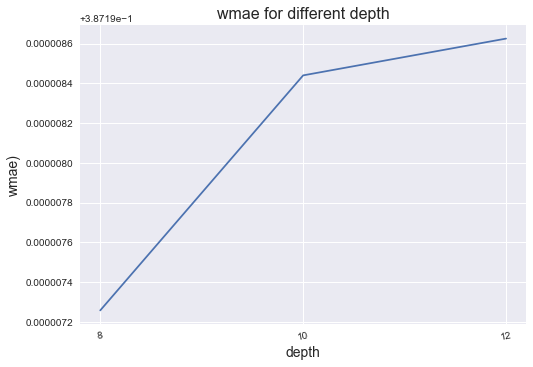

In [9]:
results_depth = {}
for i in [8, 10, 12]:
    result = {}
    print('\n\n\n\nrunning while depth = {}'.format(i))
    params={'booster': 'gblinear',
        'objective': 'reg:linear',
        'eta': 0.1,
        'depth': i,
        'subsample': 1.0,
        'min_child_weight': 5,
        'col_sample_bytree': 0.2,
        'seed': 0,
        'silent': 1,
        }

    watchlist = [(dataset_val, 'val'),(dataset_train,'train')]
    model = xgb.train(params,dataset_train,num_boost_round=20000,early_stopping_rounds=1000,evals=watchlist, feval=wmae_xgb,maximize=False)
    pred_xgb = model.predict(dataset_val)
    
    result['predictions'] = pred_xgb
    result['wmae'] = wmae(y_test, pred_xgb)
    results_depth['{}'.format(i)] = result
    
print(results_depth)          # 38 negtive rows
plot_results(results_depth, 'depth') 

In [10]:
a = pd.DataFrame(results_depth['8']['predictions'])
a[a[0]<0].shape

(18, 1)





running while subsample = 0.8
[0]	val-wmae:0.685058	train-wmae:0.666891
Multiple eval metrics have been passed: 'train-wmae' will be used for early stopping.

Will train until train-wmae hasn't improved in 300 rounds.
[1]	val-wmae:0.559631	train-wmae:0.544096
[2]	val-wmae:0.518653	train-wmae:0.496839
[3]	val-wmae:0.4946	train-wmae:0.465325
[4]	val-wmae:0.476956	train-wmae:0.439952
[5]	val-wmae:0.463334	train-wmae:0.418891
[6]	val-wmae:0.452476	train-wmae:0.400971
[7]	val-wmae:0.443684	train-wmae:0.385703
[8]	val-wmae:0.43666	train-wmae:0.372842
[9]	val-wmae:0.43098	train-wmae:0.36194
[10]	val-wmae:0.426711	train-wmae:0.352654
[11]	val-wmae:0.423375	train-wmae:0.344766
[12]	val-wmae:0.420804	train-wmae:0.33806
[13]	val-wmae:0.418904	train-wmae:0.332426
[14]	val-wmae:0.417468	train-wmae:0.327605
[15]	val-wmae:0.416484	train-wmae:0.323524
[16]	val-wmae:0.415715	train-wmae:0.320066
[17]	val-wmae:0.415124	train-wmae:0.317135
[18]	val-wmae:0.414736	train-wmae:0.314672
[19]	val-wmae:0.414

[186]	val-wmae:0.40549	train-wmae:0.288049
[187]	val-wmae:0.405439	train-wmae:0.288006
[188]	val-wmae:0.405407	train-wmae:0.287972
[189]	val-wmae:0.405349	train-wmae:0.287925
[190]	val-wmae:0.405361	train-wmae:0.287915
[191]	val-wmae:0.405291	train-wmae:0.28786
[192]	val-wmae:0.405275	train-wmae:0.287834
[193]	val-wmae:0.405262	train-wmae:0.287812
[194]	val-wmae:0.405183	train-wmae:0.287753
[195]	val-wmae:0.405183	train-wmae:0.287737
[196]	val-wmae:0.405112	train-wmae:0.287683
[197]	val-wmae:0.405072	train-wmae:0.287645
[198]	val-wmae:0.405053	train-wmae:0.287618
[199]	val-wmae:0.405041	train-wmae:0.287596
[200]	val-wmae:0.405004	train-wmae:0.287559
[201]	val-wmae:0.404985	train-wmae:0.287534
[202]	val-wmae:0.40491	train-wmae:0.287476
[203]	val-wmae:0.404874	train-wmae:0.287441
[204]	val-wmae:0.404862	train-wmae:0.287419
[205]	val-wmae:0.404803	train-wmae:0.287373
[206]	val-wmae:0.404809	train-wmae:0.28736
[207]	val-wmae:0.404746	train-wmae:0.28731
[208]	val-wmae:0.404726	train-wmae:0.

[374]	val-wmae:0.400665	train-wmae:0.283732
[375]	val-wmae:0.400655	train-wmae:0.283722
[376]	val-wmae:0.400632	train-wmae:0.283704
[377]	val-wmae:0.400623	train-wmae:0.283695
[378]	val-wmae:0.400607	train-wmae:0.283682
[379]	val-wmae:0.400576	train-wmae:0.283661
[380]	val-wmae:0.400554	train-wmae:0.283644
[381]	val-wmae:0.400551	train-wmae:0.283638
[382]	val-wmae:0.400537	train-wmae:0.283626
[383]	val-wmae:0.400516	train-wmae:0.283611
[384]	val-wmae:0.40049	train-wmae:0.283591
[385]	val-wmae:0.400476	train-wmae:0.28358
[386]	val-wmae:0.400456	train-wmae:0.283565
[387]	val-wmae:0.400435	train-wmae:0.283548
[388]	val-wmae:0.400429	train-wmae:0.283541
[389]	val-wmae:0.400413	train-wmae:0.283529
[390]	val-wmae:0.400389	train-wmae:0.283511
[391]	val-wmae:0.40038	train-wmae:0.283503
[392]	val-wmae:0.400363	train-wmae:0.28349
[393]	val-wmae:0.400347	train-wmae:0.283477
[394]	val-wmae:0.400316	train-wmae:0.283456
[395]	val-wmae:0.400305	train-wmae:0.283446
[396]	val-wmae:0.400294	train-wmae:0

[562]	val-wmae:0.397914	train-wmae:0.28177
[563]	val-wmae:0.397908	train-wmae:0.281765
[564]	val-wmae:0.397897	train-wmae:0.281758
[565]	val-wmae:0.397881	train-wmae:0.281748
[566]	val-wmae:0.397872	train-wmae:0.281741
[567]	val-wmae:0.397862	train-wmae:0.281735
[568]	val-wmae:0.397846	train-wmae:0.281725
[569]	val-wmae:0.397838	train-wmae:0.28172
[570]	val-wmae:0.397823	train-wmae:0.28171
[571]	val-wmae:0.397813	train-wmae:0.281704
[572]	val-wmae:0.397804	train-wmae:0.281698
[573]	val-wmae:0.397792	train-wmae:0.281689
[574]	val-wmae:0.397778	train-wmae:0.28168
[575]	val-wmae:0.39777	train-wmae:0.281674
[576]	val-wmae:0.39776	train-wmae:0.281668
[577]	val-wmae:0.397744	train-wmae:0.281658
[578]	val-wmae:0.397732	train-wmae:0.28165
[579]	val-wmae:0.397727	train-wmae:0.281645
[580]	val-wmae:0.397718	train-wmae:0.281638
[581]	val-wmae:0.397707	train-wmae:0.281631
[582]	val-wmae:0.397697	train-wmae:0.281623
[583]	val-wmae:0.397684	train-wmae:0.281615
[584]	val-wmae:0.39767	train-wmae:0.281

[750]	val-wmae:0.396248	train-wmae:0.280629
[751]	val-wmae:0.39624	train-wmae:0.280624
[752]	val-wmae:0.396235	train-wmae:0.28062
[753]	val-wmae:0.396228	train-wmae:0.280615
[754]	val-wmae:0.39622	train-wmae:0.280609
[755]	val-wmae:0.396215	train-wmae:0.280606
[756]	val-wmae:0.396207	train-wmae:0.280601
[757]	val-wmae:0.396197	train-wmae:0.280595
[758]	val-wmae:0.396192	train-wmae:0.280592
[759]	val-wmae:0.396183	train-wmae:0.280586
[760]	val-wmae:0.396179	train-wmae:0.280582
[761]	val-wmae:0.39617	train-wmae:0.280577
[762]	val-wmae:0.396163	train-wmae:0.280572
[763]	val-wmae:0.396156	train-wmae:0.280567
[764]	val-wmae:0.396149	train-wmae:0.280562
[765]	val-wmae:0.39614	train-wmae:0.280557
[766]	val-wmae:0.396133	train-wmae:0.280552
[767]	val-wmae:0.396127	train-wmae:0.280548
[768]	val-wmae:0.396122	train-wmae:0.280544
[769]	val-wmae:0.396115	train-wmae:0.28054
[770]	val-wmae:0.396105	train-wmae:0.280534
[771]	val-wmae:0.396097	train-wmae:0.280529
[772]	val-wmae:0.396093	train-wmae:0.2

[938]	val-wmae:0.395079	train-wmae:0.279869
[939]	val-wmae:0.395074	train-wmae:0.279865
[940]	val-wmae:0.395068	train-wmae:0.279862
[941]	val-wmae:0.395064	train-wmae:0.279859
[942]	val-wmae:0.395059	train-wmae:0.279856
[943]	val-wmae:0.395054	train-wmae:0.279853
[944]	val-wmae:0.395049	train-wmae:0.27985
[945]	val-wmae:0.395044	train-wmae:0.279847
[946]	val-wmae:0.395039	train-wmae:0.279844
[947]	val-wmae:0.395032	train-wmae:0.279839
[948]	val-wmae:0.395026	train-wmae:0.279836
[949]	val-wmae:0.395022	train-wmae:0.279834
[950]	val-wmae:0.395018	train-wmae:0.279831
[951]	val-wmae:0.395011	train-wmae:0.279827
[952]	val-wmae:0.395008	train-wmae:0.279825
[953]	val-wmae:0.395001	train-wmae:0.27982
[954]	val-wmae:0.394996	train-wmae:0.279817
[955]	val-wmae:0.394991	train-wmae:0.279814
[956]	val-wmae:0.394985	train-wmae:0.279811
[957]	val-wmae:0.394981	train-wmae:0.279808
[958]	val-wmae:0.394977	train-wmae:0.279805
[959]	val-wmae:0.394972	train-wmae:0.279802
[960]	val-wmae:0.394967	train-wmae

[1123]	val-wmae:0.394252	train-wmae:0.27934
[1124]	val-wmae:0.394247	train-wmae:0.279337
[1125]	val-wmae:0.394244	train-wmae:0.279335
[1126]	val-wmae:0.394241	train-wmae:0.279332
[1127]	val-wmae:0.394236	train-wmae:0.27933
[1128]	val-wmae:0.394233	train-wmae:0.279327
[1129]	val-wmae:0.394229	train-wmae:0.279325
[1130]	val-wmae:0.394224	train-wmae:0.279321
[1131]	val-wmae:0.394222	train-wmae:0.279319
[1132]	val-wmae:0.394216	train-wmae:0.279316
[1133]	val-wmae:0.394214	train-wmae:0.279314
[1134]	val-wmae:0.394209	train-wmae:0.279311
[1135]	val-wmae:0.394205	train-wmae:0.279308
[1136]	val-wmae:0.394202	train-wmae:0.279306
[1137]	val-wmae:0.394198	train-wmae:0.279304
[1138]	val-wmae:0.394196	train-wmae:0.279302
[1139]	val-wmae:0.394191	train-wmae:0.279299
[1140]	val-wmae:0.394186	train-wmae:0.279296
[1141]	val-wmae:0.394182	train-wmae:0.279293
[1142]	val-wmae:0.39418	train-wmae:0.279291
[1143]	val-wmae:0.394177	train-wmae:0.27929
[1144]	val-wmae:0.394172	train-wmae:0.279286
[1145]	val-wma

[1306]	val-wmae:0.393694	train-wmae:0.278934
[1307]	val-wmae:0.39369	train-wmae:0.278931
[1308]	val-wmae:0.393688	train-wmae:0.27893
[1309]	val-wmae:0.393686	train-wmae:0.278928
[1310]	val-wmae:0.393682	train-wmae:0.278925
[1311]	val-wmae:0.39368	train-wmae:0.278923
[1312]	val-wmae:0.393679	train-wmae:0.278922
[1313]	val-wmae:0.393676	train-wmae:0.27892
[1314]	val-wmae:0.393673	train-wmae:0.278918
[1315]	val-wmae:0.393672	train-wmae:0.278917
[1316]	val-wmae:0.393669	train-wmae:0.278914
[1317]	val-wmae:0.393665	train-wmae:0.278911
[1318]	val-wmae:0.393664	train-wmae:0.27891
[1319]	val-wmae:0.393661	train-wmae:0.278908
[1320]	val-wmae:0.393659	train-wmae:0.278906
[1321]	val-wmae:0.393657	train-wmae:0.278905
[1322]	val-wmae:0.393654	train-wmae:0.278902
[1323]	val-wmae:0.393651	train-wmae:0.278901
[1324]	val-wmae:0.393649	train-wmae:0.278899
[1325]	val-wmae:0.393648	train-wmae:0.278897
[1326]	val-wmae:0.393645	train-wmae:0.278895
[1327]	val-wmae:0.393643	train-wmae:0.278893
[1328]	val-wmae

[1490]	val-wmae:0.393295	train-wmae:0.27861
[1491]	val-wmae:0.393294	train-wmae:0.278609
[1492]	val-wmae:0.393291	train-wmae:0.278607
[1493]	val-wmae:0.39329	train-wmae:0.278606
[1494]	val-wmae:0.393289	train-wmae:0.278605
[1495]	val-wmae:0.393285	train-wmae:0.278602
[1496]	val-wmae:0.393284	train-wmae:0.278601
[1497]	val-wmae:0.393283	train-wmae:0.2786
[1498]	val-wmae:0.39328	train-wmae:0.278598
[1499]	val-wmae:0.393279	train-wmae:0.278596
[1500]	val-wmae:0.393277	train-wmae:0.278595
[1501]	val-wmae:0.393275	train-wmae:0.278593
[1502]	val-wmae:0.393272	train-wmae:0.278591
[1503]	val-wmae:0.393271	train-wmae:0.27859
[1504]	val-wmae:0.393268	train-wmae:0.278588
[1505]	val-wmae:0.393268	train-wmae:0.278587
[1506]	val-wmae:0.393264	train-wmae:0.278585
[1507]	val-wmae:0.393262	train-wmae:0.278584
[1508]	val-wmae:0.39326	train-wmae:0.278582
[1509]	val-wmae:0.393259	train-wmae:0.278581
[1510]	val-wmae:0.393257	train-wmae:0.278579
[1511]	val-wmae:0.393256	train-wmae:0.278578
[1512]	val-wmae:0

[1673]	val-wmae:0.39298	train-wmae:0.278345
[1674]	val-wmae:0.392979	train-wmae:0.278344
[1675]	val-wmae:0.392978	train-wmae:0.278343
[1676]	val-wmae:0.392976	train-wmae:0.278342
[1677]	val-wmae:0.392975	train-wmae:0.278341
[1678]	val-wmae:0.392972	train-wmae:0.278338
[1679]	val-wmae:0.392972	train-wmae:0.278338
[1680]	val-wmae:0.39297	train-wmae:0.278336
[1681]	val-wmae:0.392968	train-wmae:0.278335
[1682]	val-wmae:0.392967	train-wmae:0.278334
[1683]	val-wmae:0.392965	train-wmae:0.278332
[1684]	val-wmae:0.392964	train-wmae:0.278331
[1685]	val-wmae:0.392963	train-wmae:0.27833
[1686]	val-wmae:0.392962	train-wmae:0.278329
[1687]	val-wmae:0.392961	train-wmae:0.278328
[1688]	val-wmae:0.392959	train-wmae:0.278326
[1689]	val-wmae:0.392958	train-wmae:0.278325
[1690]	val-wmae:0.392955	train-wmae:0.278323
[1691]	val-wmae:0.392954	train-wmae:0.278322
[1692]	val-wmae:0.392952	train-wmae:0.278321
[1693]	val-wmae:0.392951	train-wmae:0.27832
[1694]	val-wmae:0.392949	train-wmae:0.278318
[1695]	val-wma

[1856]	val-wmae:0.392735	train-wmae:0.278125
[1857]	val-wmae:0.392734	train-wmae:0.278124
[1858]	val-wmae:0.392733	train-wmae:0.278123
[1859]	val-wmae:0.392732	train-wmae:0.278122
[1860]	val-wmae:0.392731	train-wmae:0.278121
[1861]	val-wmae:0.39273	train-wmae:0.27812
[1862]	val-wmae:0.392729	train-wmae:0.278119
[1863]	val-wmae:0.392728	train-wmae:0.278118
[1864]	val-wmae:0.392726	train-wmae:0.278117
[1865]	val-wmae:0.392724	train-wmae:0.278115
[1866]	val-wmae:0.392724	train-wmae:0.278115
[1867]	val-wmae:0.392722	train-wmae:0.278113
[1868]	val-wmae:0.392721	train-wmae:0.278112
[1869]	val-wmae:0.39272	train-wmae:0.278111
[1870]	val-wmae:0.392719	train-wmae:0.27811
[1871]	val-wmae:0.392717	train-wmae:0.278109
[1872]	val-wmae:0.392716	train-wmae:0.278108
[1873]	val-wmae:0.392716	train-wmae:0.278107
[1874]	val-wmae:0.392713	train-wmae:0.278106
[1875]	val-wmae:0.392712	train-wmae:0.278104
[1876]	val-wmae:0.392711	train-wmae:0.278103
[1877]	val-wmae:0.39271	train-wmae:0.278103
[1878]	val-wmae

[2040]	val-wmae:0.392537	train-wmae:0.277943
[2041]	val-wmae:0.392535	train-wmae:0.277942
[2042]	val-wmae:0.392534	train-wmae:0.277941
[2043]	val-wmae:0.392534	train-wmae:0.277941
[2044]	val-wmae:0.392533	train-wmae:0.27794
[2045]	val-wmae:0.392531	train-wmae:0.277938
[2046]	val-wmae:0.39253	train-wmae:0.277938
[2047]	val-wmae:0.39253	train-wmae:0.277937
[2048]	val-wmae:0.392529	train-wmae:0.277936
[2049]	val-wmae:0.392528	train-wmae:0.277935
[2050]	val-wmae:0.392527	train-wmae:0.277934
[2051]	val-wmae:0.392526	train-wmae:0.277934
[2052]	val-wmae:0.392524	train-wmae:0.277932
[2053]	val-wmae:0.392524	train-wmae:0.277932
[2054]	val-wmae:0.392524	train-wmae:0.277931
[2055]	val-wmae:0.392522	train-wmae:0.27793
[2056]	val-wmae:0.392521	train-wmae:0.277929
[2057]	val-wmae:0.39252	train-wmae:0.277928
[2058]	val-wmae:0.392519	train-wmae:0.277927
[2059]	val-wmae:0.392519	train-wmae:0.277927
[2060]	val-wmae:0.392518	train-wmae:0.277926
[2061]	val-wmae:0.392516	train-wmae:0.277925
[2062]	val-wmae

[2224]	val-wmae:0.392372	train-wmae:0.277794
[2225]	val-wmae:0.392372	train-wmae:0.277794
[2226]	val-wmae:0.392371	train-wmae:0.277793
[2227]	val-wmae:0.39237	train-wmae:0.277792
[2228]	val-wmae:0.392369	train-wmae:0.277791
[2229]	val-wmae:0.392368	train-wmae:0.27779
[2230]	val-wmae:0.392368	train-wmae:0.27779
[2231]	val-wmae:0.392367	train-wmae:0.277789
[2232]	val-wmae:0.392366	train-wmae:0.277789
[2233]	val-wmae:0.392365	train-wmae:0.277788
[2234]	val-wmae:0.392364	train-wmae:0.277787
[2235]	val-wmae:0.392363	train-wmae:0.277786
[2236]	val-wmae:0.392363	train-wmae:0.277785
[2237]	val-wmae:0.392361	train-wmae:0.277784
[2238]	val-wmae:0.392361	train-wmae:0.277784
[2239]	val-wmae:0.39236	train-wmae:0.277783
[2240]	val-wmae:0.39236	train-wmae:0.277783
[2241]	val-wmae:0.392359	train-wmae:0.277782
[2242]	val-wmae:0.392358	train-wmae:0.277781
[2243]	val-wmae:0.392357	train-wmae:0.27778
[2244]	val-wmae:0.392356	train-wmae:0.277779
[2245]	val-wmae:0.392356	train-wmae:0.277779
[2246]	val-wmae:

[2407]	val-wmae:0.392239	train-wmae:0.277669
[2408]	val-wmae:0.392238	train-wmae:0.277669
[2409]	val-wmae:0.392238	train-wmae:0.277668
[2410]	val-wmae:0.392237	train-wmae:0.277667
[2411]	val-wmae:0.392237	train-wmae:0.277667
[2412]	val-wmae:0.392235	train-wmae:0.277666
[2413]	val-wmae:0.392236	train-wmae:0.277666
[2414]	val-wmae:0.392234	train-wmae:0.277665
[2415]	val-wmae:0.392234	train-wmae:0.277665
[2416]	val-wmae:0.392234	train-wmae:0.277664
[2417]	val-wmae:0.392233	train-wmae:0.277663
[2418]	val-wmae:0.392232	train-wmae:0.277663
[2419]	val-wmae:0.392232	train-wmae:0.277662
[2420]	val-wmae:0.39223	train-wmae:0.277661
[2421]	val-wmae:0.39223	train-wmae:0.277661
[2422]	val-wmae:0.39223	train-wmae:0.27766
[2423]	val-wmae:0.392229	train-wmae:0.27766
[2424]	val-wmae:0.392229	train-wmae:0.277659
[2425]	val-wmae:0.392228	train-wmae:0.277658
[2426]	val-wmae:0.392227	train-wmae:0.277658
[2427]	val-wmae:0.392227	train-wmae:0.277657
[2428]	val-wmae:0.392226	train-wmae:0.277657
[2429]	val-wmae

[2590]	val-wmae:0.39213	train-wmae:0.277562
[2591]	val-wmae:0.39213	train-wmae:0.277562
[2592]	val-wmae:0.392128	train-wmae:0.277561
[2593]	val-wmae:0.392128	train-wmae:0.277561
[2594]	val-wmae:0.392127	train-wmae:0.27756
[2595]	val-wmae:0.392127	train-wmae:0.27756
[2596]	val-wmae:0.392127	train-wmae:0.277559
[2597]	val-wmae:0.392126	train-wmae:0.277558
[2598]	val-wmae:0.392125	train-wmae:0.277558
[2599]	val-wmae:0.392125	train-wmae:0.277558
[2600]	val-wmae:0.392124	train-wmae:0.277557
[2601]	val-wmae:0.392124	train-wmae:0.277557
[2602]	val-wmae:0.392123	train-wmae:0.277556
[2603]	val-wmae:0.392122	train-wmae:0.277555
[2604]	val-wmae:0.392122	train-wmae:0.277555
[2605]	val-wmae:0.392122	train-wmae:0.277554
[2606]	val-wmae:0.392121	train-wmae:0.277554
[2607]	val-wmae:0.392121	train-wmae:0.277554
[2608]	val-wmae:0.39212	train-wmae:0.277553
[2609]	val-wmae:0.392119	train-wmae:0.277552
[2610]	val-wmae:0.392119	train-wmae:0.277552
[2611]	val-wmae:0.392118	train-wmae:0.277551
[2612]	val-wmae

[2774]	val-wmae:0.392036	train-wmae:0.277473
[2775]	val-wmae:0.392035	train-wmae:0.277472
[2776]	val-wmae:0.392035	train-wmae:0.277472
[2777]	val-wmae:0.392035	train-wmae:0.277472
[2778]	val-wmae:0.392035	train-wmae:0.277471
[2779]	val-wmae:0.392034	train-wmae:0.27747
[2780]	val-wmae:0.392034	train-wmae:0.27747
[2781]	val-wmae:0.392033	train-wmae:0.27747
[2782]	val-wmae:0.392033	train-wmae:0.277469
[2783]	val-wmae:0.392032	train-wmae:0.277469
[2784]	val-wmae:0.392031	train-wmae:0.277468
[2785]	val-wmae:0.392031	train-wmae:0.277468
[2786]	val-wmae:0.392031	train-wmae:0.277468
[2787]	val-wmae:0.39203	train-wmae:0.277467
[2788]	val-wmae:0.39203	train-wmae:0.277466
[2789]	val-wmae:0.392029	train-wmae:0.277466
[2790]	val-wmae:0.392028	train-wmae:0.277465
[2791]	val-wmae:0.392029	train-wmae:0.277465
[2792]	val-wmae:0.392028	train-wmae:0.277465
[2793]	val-wmae:0.392028	train-wmae:0.277464
[2794]	val-wmae:0.392027	train-wmae:0.277464
[2795]	val-wmae:0.392027	train-wmae:0.277464
[2796]	val-wmae

[2958]	val-wmae:0.391955	train-wmae:0.277395
[2959]	val-wmae:0.391955	train-wmae:0.277394
[2960]	val-wmae:0.391954	train-wmae:0.277394
[2961]	val-wmae:0.391954	train-wmae:0.277393
[2962]	val-wmae:0.391955	train-wmae:0.277393
[2963]	val-wmae:0.391954	train-wmae:0.277393
[2964]	val-wmae:0.391953	train-wmae:0.277392
[2965]	val-wmae:0.391952	train-wmae:0.277392
[2966]	val-wmae:0.391952	train-wmae:0.277391
[2967]	val-wmae:0.391952	train-wmae:0.277391
[2968]	val-wmae:0.391952	train-wmae:0.277391
[2969]	val-wmae:0.391951	train-wmae:0.27739
[2970]	val-wmae:0.39195	train-wmae:0.27739
[2971]	val-wmae:0.39195	train-wmae:0.277389
[2972]	val-wmae:0.39195	train-wmae:0.277389
[2973]	val-wmae:0.391949	train-wmae:0.277389
[2974]	val-wmae:0.391949	train-wmae:0.277388
[2975]	val-wmae:0.391948	train-wmae:0.277388
[2976]	val-wmae:0.391948	train-wmae:0.277387
[2977]	val-wmae:0.391948	train-wmae:0.277387
[2978]	val-wmae:0.391948	train-wmae:0.277387
[2979]	val-wmae:0.391947	train-wmae:0.277386
[2980]	val-wmae

[3142]	val-wmae:0.391886	train-wmae:0.277329
[3143]	val-wmae:0.391885	train-wmae:0.277328
[3144]	val-wmae:0.391885	train-wmae:0.277328
[3145]	val-wmae:0.391884	train-wmae:0.277327
[3146]	val-wmae:0.391884	train-wmae:0.277327
[3147]	val-wmae:0.391883	train-wmae:0.277327
[3148]	val-wmae:0.391883	train-wmae:0.277326
[3149]	val-wmae:0.391883	train-wmae:0.277326
[3150]	val-wmae:0.391882	train-wmae:0.277326
[3151]	val-wmae:0.391882	train-wmae:0.277326
[3152]	val-wmae:0.391881	train-wmae:0.277325
[3153]	val-wmae:0.391881	train-wmae:0.277325
[3154]	val-wmae:0.391881	train-wmae:0.277325
[3155]	val-wmae:0.391881	train-wmae:0.277324
[3156]	val-wmae:0.391881	train-wmae:0.277324
[3157]	val-wmae:0.39188	train-wmae:0.277324
[3158]	val-wmae:0.391879	train-wmae:0.277323
[3159]	val-wmae:0.39188	train-wmae:0.277323
[3160]	val-wmae:0.391879	train-wmae:0.277322
[3161]	val-wmae:0.391879	train-wmae:0.277322
[3162]	val-wmae:0.391878	train-wmae:0.277322
[3163]	val-wmae:0.391877	train-wmae:0.277321
[3164]	val-w

[3325]	val-wmae:0.391824	train-wmae:0.277273
[3326]	val-wmae:0.391823	train-wmae:0.277273
[3327]	val-wmae:0.391822	train-wmae:0.277272
[3328]	val-wmae:0.391823	train-wmae:0.277272
[3329]	val-wmae:0.391822	train-wmae:0.277272
[3330]	val-wmae:0.391821	train-wmae:0.277271
[3331]	val-wmae:0.391822	train-wmae:0.277271
[3332]	val-wmae:0.391821	train-wmae:0.277271
[3333]	val-wmae:0.391821	train-wmae:0.277271
[3334]	val-wmae:0.39182	train-wmae:0.27727
[3335]	val-wmae:0.391821	train-wmae:0.27727
[3336]	val-wmae:0.39182	train-wmae:0.27727
[3337]	val-wmae:0.391819	train-wmae:0.27727
[3338]	val-wmae:0.39182	train-wmae:0.277269
[3339]	val-wmae:0.391819	train-wmae:0.277269
[3340]	val-wmae:0.391819	train-wmae:0.277269
[3341]	val-wmae:0.391818	train-wmae:0.277268
[3342]	val-wmae:0.391818	train-wmae:0.277268
[3343]	val-wmae:0.391818	train-wmae:0.277268
[3344]	val-wmae:0.391818	train-wmae:0.277268
[3345]	val-wmae:0.391817	train-wmae:0.277267
[3346]	val-wmae:0.391817	train-wmae:0.277267
[3347]	val-wmae:0

[3509]	val-wmae:0.391768	train-wmae:0.277223
[3510]	val-wmae:0.391767	train-wmae:0.277223
[3511]	val-wmae:0.391767	train-wmae:0.277223
[3512]	val-wmae:0.391767	train-wmae:0.277223
[3513]	val-wmae:0.391766	train-wmae:0.277222
[3514]	val-wmae:0.391766	train-wmae:0.277222
[3515]	val-wmae:0.391766	train-wmae:0.277222
[3516]	val-wmae:0.391766	train-wmae:0.277222
[3517]	val-wmae:0.391765	train-wmae:0.277221
[3518]	val-wmae:0.391765	train-wmae:0.277221
[3519]	val-wmae:0.391765	train-wmae:0.277221
[3520]	val-wmae:0.391764	train-wmae:0.277221
[3521]	val-wmae:0.391764	train-wmae:0.27722
[3522]	val-wmae:0.391764	train-wmae:0.27722
[3523]	val-wmae:0.391764	train-wmae:0.27722
[3524]	val-wmae:0.391763	train-wmae:0.27722
[3525]	val-wmae:0.391763	train-wmae:0.277219
[3526]	val-wmae:0.391763	train-wmae:0.277219
[3527]	val-wmae:0.391762	train-wmae:0.277219
[3528]	val-wmae:0.391762	train-wmae:0.277219
[3529]	val-wmae:0.391762	train-wmae:0.277218
[3530]	val-wmae:0.391762	train-wmae:0.277218
[3531]	val-wma

[3693]	val-wmae:0.391719	train-wmae:0.27718
[3694]	val-wmae:0.391718	train-wmae:0.27718
[3695]	val-wmae:0.391718	train-wmae:0.277179
[3696]	val-wmae:0.391718	train-wmae:0.277179
[3697]	val-wmae:0.391718	train-wmae:0.277179
[3698]	val-wmae:0.391717	train-wmae:0.277179
[3699]	val-wmae:0.391717	train-wmae:0.277178
[3700]	val-wmae:0.391717	train-wmae:0.277178
[3701]	val-wmae:0.391716	train-wmae:0.277178
[3702]	val-wmae:0.391716	train-wmae:0.277178
[3703]	val-wmae:0.391716	train-wmae:0.277178
[3704]	val-wmae:0.391716	train-wmae:0.277177
[3705]	val-wmae:0.391716	train-wmae:0.277177
[3706]	val-wmae:0.391715	train-wmae:0.277177
[3707]	val-wmae:0.391715	train-wmae:0.277177
[3708]	val-wmae:0.391715	train-wmae:0.277177
[3709]	val-wmae:0.391715	train-wmae:0.277176
[3710]	val-wmae:0.391714	train-wmae:0.277176
[3711]	val-wmae:0.391714	train-wmae:0.277176
[3712]	val-wmae:0.391714	train-wmae:0.277176
[3713]	val-wmae:0.391714	train-wmae:0.277175
[3714]	val-wmae:0.391713	train-wmae:0.277175
[3715]	val-w

[3877]	val-wmae:0.391676	train-wmae:0.277142
[3878]	val-wmae:0.391676	train-wmae:0.277142
[3879]	val-wmae:0.391676	train-wmae:0.277141
[3880]	val-wmae:0.391675	train-wmae:0.277141
[3881]	val-wmae:0.391675	train-wmae:0.277141
[3882]	val-wmae:0.391675	train-wmae:0.277141
[3883]	val-wmae:0.391675	train-wmae:0.277141
[3884]	val-wmae:0.391675	train-wmae:0.27714
[3885]	val-wmae:0.391674	train-wmae:0.27714
[3886]	val-wmae:0.391674	train-wmae:0.27714
[3887]	val-wmae:0.391674	train-wmae:0.27714
[3888]	val-wmae:0.391674	train-wmae:0.27714
[3889]	val-wmae:0.391673	train-wmae:0.277139
[3890]	val-wmae:0.391673	train-wmae:0.277139
[3891]	val-wmae:0.391673	train-wmae:0.277139
[3892]	val-wmae:0.391673	train-wmae:0.277139
[3893]	val-wmae:0.391673	train-wmae:0.277139
[3894]	val-wmae:0.391672	train-wmae:0.277138
[3895]	val-wmae:0.391672	train-wmae:0.277138
[3896]	val-wmae:0.391672	train-wmae:0.277138
[3897]	val-wmae:0.391672	train-wmae:0.277138
[3898]	val-wmae:0.391672	train-wmae:0.277138
[3899]	val-wmae

[4060]	val-wmae:0.391638	train-wmae:0.277108
[4061]	val-wmae:0.391637	train-wmae:0.277108
[4062]	val-wmae:0.391637	train-wmae:0.277108
[4063]	val-wmae:0.391637	train-wmae:0.277108
[4064]	val-wmae:0.391637	train-wmae:0.277107
[4065]	val-wmae:0.391637	train-wmae:0.277107
[4066]	val-wmae:0.391636	train-wmae:0.277107
[4067]	val-wmae:0.391636	train-wmae:0.277107
[4068]	val-wmae:0.391636	train-wmae:0.277107
[4069]	val-wmae:0.391636	train-wmae:0.277107
[4070]	val-wmae:0.391636	train-wmae:0.277106
[4071]	val-wmae:0.391636	train-wmae:0.277106
[4072]	val-wmae:0.391636	train-wmae:0.277106
[4073]	val-wmae:0.391635	train-wmae:0.277106
[4074]	val-wmae:0.391635	train-wmae:0.277106
[4075]	val-wmae:0.391635	train-wmae:0.277106
[4076]	val-wmae:0.391635	train-wmae:0.277106
[4077]	val-wmae:0.391634	train-wmae:0.277105
[4078]	val-wmae:0.391634	train-wmae:0.277105
[4079]	val-wmae:0.391634	train-wmae:0.277105
[4080]	val-wmae:0.391634	train-wmae:0.277105
[4081]	val-wmae:0.391633	train-wmae:0.277105
[4082]	val

[4243]	val-wmae:0.391603	train-wmae:0.277078
[4244]	val-wmae:0.391602	train-wmae:0.277078
[4245]	val-wmae:0.391602	train-wmae:0.277078
[4246]	val-wmae:0.391602	train-wmae:0.277078
[4247]	val-wmae:0.391602	train-wmae:0.277077
[4248]	val-wmae:0.391602	train-wmae:0.277077
[4249]	val-wmae:0.391602	train-wmae:0.277077
[4250]	val-wmae:0.391601	train-wmae:0.277077
[4251]	val-wmae:0.391601	train-wmae:0.277077
[4252]	val-wmae:0.391601	train-wmae:0.277077
[4253]	val-wmae:0.391601	train-wmae:0.277076
[4254]	val-wmae:0.391601	train-wmae:0.277076
[4255]	val-wmae:0.3916	train-wmae:0.277076
[4256]	val-wmae:0.3916	train-wmae:0.277076
[4257]	val-wmae:0.3916	train-wmae:0.277076
[4258]	val-wmae:0.3916	train-wmae:0.277076
[4259]	val-wmae:0.3916	train-wmae:0.277076
[4260]	val-wmae:0.3916	train-wmae:0.277075
[4261]	val-wmae:0.391599	train-wmae:0.277075
[4262]	val-wmae:0.391599	train-wmae:0.277075
[4263]	val-wmae:0.391599	train-wmae:0.277075
[4264]	val-wmae:0.391599	train-wmae:0.277075
[4265]	val-wmae:0.3915

[4426]	val-wmae:0.391571	train-wmae:0.277051
[4427]	val-wmae:0.39157	train-wmae:0.277051
[4428]	val-wmae:0.39157	train-wmae:0.277051
[4429]	val-wmae:0.39157	train-wmae:0.277051
[4430]	val-wmae:0.39157	train-wmae:0.277051
[4431]	val-wmae:0.39157	train-wmae:0.277051
[4432]	val-wmae:0.39157	train-wmae:0.27705
[4433]	val-wmae:0.391569	train-wmae:0.27705
[4434]	val-wmae:0.391569	train-wmae:0.27705
[4435]	val-wmae:0.391569	train-wmae:0.27705
[4436]	val-wmae:0.391569	train-wmae:0.27705
[4437]	val-wmae:0.391569	train-wmae:0.27705
[4438]	val-wmae:0.391569	train-wmae:0.27705
[4439]	val-wmae:0.391568	train-wmae:0.277049
[4440]	val-wmae:0.391568	train-wmae:0.277049
[4441]	val-wmae:0.391568	train-wmae:0.277049
[4442]	val-wmae:0.391568	train-wmae:0.277049
[4443]	val-wmae:0.391568	train-wmae:0.277049
[4444]	val-wmae:0.391568	train-wmae:0.277049
[4445]	val-wmae:0.391567	train-wmae:0.277049
[4446]	val-wmae:0.391567	train-wmae:0.277049
[4447]	val-wmae:0.391567	train-wmae:0.277048
[4448]	val-wmae:0.39156

[4609]	val-wmae:0.391541	train-wmae:0.277028
[4610]	val-wmae:0.391541	train-wmae:0.277028
[4611]	val-wmae:0.391541	train-wmae:0.277028
[4612]	val-wmae:0.391541	train-wmae:0.277028
[4613]	val-wmae:0.39154	train-wmae:0.277028
[4614]	val-wmae:0.39154	train-wmae:0.277027
[4615]	val-wmae:0.39154	train-wmae:0.277027
[4616]	val-wmae:0.39154	train-wmae:0.277027
[4617]	val-wmae:0.39154	train-wmae:0.277027
[4618]	val-wmae:0.39154	train-wmae:0.277027
[4619]	val-wmae:0.39154	train-wmae:0.277027
[4620]	val-wmae:0.391539	train-wmae:0.277027
[4621]	val-wmae:0.391539	train-wmae:0.277027
[4622]	val-wmae:0.391539	train-wmae:0.277026
[4623]	val-wmae:0.391539	train-wmae:0.277026
[4624]	val-wmae:0.391539	train-wmae:0.277026
[4625]	val-wmae:0.391539	train-wmae:0.277026
[4626]	val-wmae:0.391539	train-wmae:0.277026
[4627]	val-wmae:0.391538	train-wmae:0.277026
[4628]	val-wmae:0.391538	train-wmae:0.277026
[4629]	val-wmae:0.391538	train-wmae:0.277026
[4630]	val-wmae:0.391538	train-wmae:0.277026
[4631]	val-wmae:0

[4792]	val-wmae:0.391514	train-wmae:0.277007
[4793]	val-wmae:0.391514	train-wmae:0.277007
[4794]	val-wmae:0.391514	train-wmae:0.277007
[4795]	val-wmae:0.391514	train-wmae:0.277007
[4796]	val-wmae:0.391514	train-wmae:0.277007
[4797]	val-wmae:0.391514	train-wmae:0.277007
[4798]	val-wmae:0.391514	train-wmae:0.277006
[4799]	val-wmae:0.391513	train-wmae:0.277006
[4800]	val-wmae:0.391513	train-wmae:0.277006
[4801]	val-wmae:0.391513	train-wmae:0.277006
[4802]	val-wmae:0.391513	train-wmae:0.277006
[4803]	val-wmae:0.391513	train-wmae:0.277006
[4804]	val-wmae:0.391513	train-wmae:0.277006
[4805]	val-wmae:0.391513	train-wmae:0.277006
[4806]	val-wmae:0.391513	train-wmae:0.277006
[4807]	val-wmae:0.391512	train-wmae:0.277005
[4808]	val-wmae:0.391512	train-wmae:0.277005
[4809]	val-wmae:0.391512	train-wmae:0.277005
[4810]	val-wmae:0.391512	train-wmae:0.277005
[4811]	val-wmae:0.391512	train-wmae:0.277005
[4812]	val-wmae:0.391512	train-wmae:0.277005
[4813]	val-wmae:0.391512	train-wmae:0.277005
[4814]	val

[4976]	val-wmae:0.39149	train-wmae:0.276988
[4977]	val-wmae:0.39149	train-wmae:0.276988
[4978]	val-wmae:0.391489	train-wmae:0.276987
[4979]	val-wmae:0.391489	train-wmae:0.276987
[4980]	val-wmae:0.391489	train-wmae:0.276987
[4981]	val-wmae:0.391489	train-wmae:0.276987
[4982]	val-wmae:0.391489	train-wmae:0.276987
[4983]	val-wmae:0.391489	train-wmae:0.276987
[4984]	val-wmae:0.391489	train-wmae:0.276987
[4985]	val-wmae:0.391489	train-wmae:0.276987
[4986]	val-wmae:0.391488	train-wmae:0.276987
[4987]	val-wmae:0.391488	train-wmae:0.276987
[4988]	val-wmae:0.391488	train-wmae:0.276986
[4989]	val-wmae:0.391488	train-wmae:0.276986
[4990]	val-wmae:0.391488	train-wmae:0.276986
[4991]	val-wmae:0.391488	train-wmae:0.276986
[4992]	val-wmae:0.391488	train-wmae:0.276986
[4993]	val-wmae:0.391488	train-wmae:0.276986
[4994]	val-wmae:0.391487	train-wmae:0.276986
[4995]	val-wmae:0.391487	train-wmae:0.276986
[4996]	val-wmae:0.391487	train-wmae:0.276986
[4997]	val-wmae:0.391487	train-wmae:0.276986
[4998]	val-w

[161]	val-wmae:0.407516	train-wmae:0.290007
[162]	val-wmae:0.407462	train-wmae:0.289951
[163]	val-wmae:0.407412	train-wmae:0.289898
[164]	val-wmae:0.407364	train-wmae:0.289847
[165]	val-wmae:0.40732	train-wmae:0.289798
[166]	val-wmae:0.407274	train-wmae:0.289747
[167]	val-wmae:0.40723	train-wmae:0.2897
[168]	val-wmae:0.407183	train-wmae:0.289651
[169]	val-wmae:0.407139	train-wmae:0.289603
[170]	val-wmae:0.407093	train-wmae:0.289556
[171]	val-wmae:0.407048	train-wmae:0.289508
[172]	val-wmae:0.407004	train-wmae:0.289461
[173]	val-wmae:0.406958	train-wmae:0.289415
[174]	val-wmae:0.406914	train-wmae:0.289368
[175]	val-wmae:0.406871	train-wmae:0.289323
[176]	val-wmae:0.406825	train-wmae:0.289277
[177]	val-wmae:0.406782	train-wmae:0.289232
[178]	val-wmae:0.406739	train-wmae:0.289187
[179]	val-wmae:0.406695	train-wmae:0.289142
[180]	val-wmae:0.406651	train-wmae:0.289098
[181]	val-wmae:0.406608	train-wmae:0.289054
[182]	val-wmae:0.406566	train-wmae:0.289011
[183]	val-wmae:0.406522	train-wmae:0

[349]	val-wmae:0.401669	train-wmae:0.284498
[350]	val-wmae:0.401648	train-wmae:0.284481
[351]	val-wmae:0.401628	train-wmae:0.284464
[352]	val-wmae:0.401607	train-wmae:0.284447
[353]	val-wmae:0.401587	train-wmae:0.284431
[354]	val-wmae:0.401566	train-wmae:0.284414
[355]	val-wmae:0.40157	train-wmae:0.28441
[356]	val-wmae:0.401532	train-wmae:0.284383
[357]	val-wmae:0.401515	train-wmae:0.284368
[358]	val-wmae:0.401511	train-wmae:0.28436
[359]	val-wmae:0.401489	train-wmae:0.284344
[360]	val-wmae:0.401455	train-wmae:0.284319
[361]	val-wmae:0.401427	train-wmae:0.284299
[362]	val-wmae:0.401403	train-wmae:0.284282
[363]	val-wmae:0.401383	train-wmae:0.284265
[364]	val-wmae:0.401362	train-wmae:0.284249
[365]	val-wmae:0.401342	train-wmae:0.284233
[366]	val-wmae:0.401323	train-wmae:0.284217
[367]	val-wmae:0.401303	train-wmae:0.2842
[368]	val-wmae:0.401283	train-wmae:0.284184
[369]	val-wmae:0.401263	train-wmae:0.284168
[370]	val-wmae:0.401243	train-wmae:0.284152
[371]	val-wmae:0.401223	train-wmae:0.

[536]	val-wmae:0.398583	train-wmae:0.282213
[537]	val-wmae:0.39857	train-wmae:0.282204
[538]	val-wmae:0.398556	train-wmae:0.282195
[539]	val-wmae:0.398543	train-wmae:0.282186
[540]	val-wmae:0.398529	train-wmae:0.282177
[541]	val-wmae:0.398517	train-wmae:0.282169
[542]	val-wmae:0.398503	train-wmae:0.28216
[543]	val-wmae:0.39849	train-wmae:0.282151
[544]	val-wmae:0.398477	train-wmae:0.282143
[545]	val-wmae:0.398464	train-wmae:0.282134
[546]	val-wmae:0.398452	train-wmae:0.282126
[547]	val-wmae:0.398439	train-wmae:0.282117
[548]	val-wmae:0.398426	train-wmae:0.282108
[549]	val-wmae:0.398413	train-wmae:0.2821
[550]	val-wmae:0.3984	train-wmae:0.282091
[551]	val-wmae:0.398387	train-wmae:0.282083
[552]	val-wmae:0.398375	train-wmae:0.282074
[553]	val-wmae:0.398361	train-wmae:0.282066
[554]	val-wmae:0.398349	train-wmae:0.282058
[555]	val-wmae:0.398336	train-wmae:0.282049
[556]	val-wmae:0.398324	train-wmae:0.282041
[557]	val-wmae:0.398311	train-wmae:0.282032
[558]	val-wmae:0.398298	train-wmae:0.28

[724]	val-wmae:0.396704	train-wmae:0.280919
[725]	val-wmae:0.396695	train-wmae:0.280914
[726]	val-wmae:0.396687	train-wmae:0.280908
[727]	val-wmae:0.396679	train-wmae:0.280903
[728]	val-wmae:0.396671	train-wmae:0.280897
[729]	val-wmae:0.396663	train-wmae:0.280892
[730]	val-wmae:0.396655	train-wmae:0.280887
[731]	val-wmae:0.396646	train-wmae:0.280881
[732]	val-wmae:0.396638	train-wmae:0.280876
[733]	val-wmae:0.39663	train-wmae:0.28087
[734]	val-wmae:0.396622	train-wmae:0.280865
[735]	val-wmae:0.396614	train-wmae:0.28086
[736]	val-wmae:0.396606	train-wmae:0.280854
[737]	val-wmae:0.396598	train-wmae:0.280849
[738]	val-wmae:0.39659	train-wmae:0.280844
[739]	val-wmae:0.396582	train-wmae:0.280839
[740]	val-wmae:0.396574	train-wmae:0.280833
[741]	val-wmae:0.396566	train-wmae:0.280828
[742]	val-wmae:0.396558	train-wmae:0.280823
[743]	val-wmae:0.39655	train-wmae:0.280818
[744]	val-wmae:0.396542	train-wmae:0.280813
[745]	val-wmae:0.396534	train-wmae:0.280807
[746]	val-wmae:0.396526	train-wmae:0.

[912]	val-wmae:0.395404	train-wmae:0.280078
[913]	val-wmae:0.395397	train-wmae:0.280074
[914]	val-wmae:0.395392	train-wmae:0.28007
[915]	val-wmae:0.395386	train-wmae:0.280066
[916]	val-wmae:0.395381	train-wmae:0.280063
[917]	val-wmae:0.395376	train-wmae:0.280059
[918]	val-wmae:0.39537	train-wmae:0.280055
[919]	val-wmae:0.395364	train-wmae:0.280052
[920]	val-wmae:0.395359	train-wmae:0.280048
[921]	val-wmae:0.395353	train-wmae:0.280044
[922]	val-wmae:0.395348	train-wmae:0.280041
[923]	val-wmae:0.395341	train-wmae:0.280037
[924]	val-wmae:0.395336	train-wmae:0.280033
[925]	val-wmae:0.39533	train-wmae:0.28003
[926]	val-wmae:0.395325	train-wmae:0.280026
[927]	val-wmae:0.395319	train-wmae:0.280023
[928]	val-wmae:0.395314	train-wmae:0.280019
[929]	val-wmae:0.395309	train-wmae:0.280016
[930]	val-wmae:0.395303	train-wmae:0.280012
[931]	val-wmae:0.395297	train-wmae:0.280008
[932]	val-wmae:0.395292	train-wmae:0.280005
[933]	val-wmae:0.395287	train-wmae:0.280001
[934]	val-wmae:0.395281	train-wmae:0

[1098]	val-wmae:0.394492	train-wmae:0.279496
[1099]	val-wmae:0.394486	train-wmae:0.279493
[1100]	val-wmae:0.394482	train-wmae:0.27949
[1101]	val-wmae:0.394478	train-wmae:0.279487
[1102]	val-wmae:0.394474	train-wmae:0.279485
[1103]	val-wmae:0.394469	train-wmae:0.279482
[1104]	val-wmae:0.394466	train-wmae:0.279479
[1105]	val-wmae:0.394462	train-wmae:0.279477
[1106]	val-wmae:0.394458	train-wmae:0.279474
[1107]	val-wmae:0.394454	train-wmae:0.279471
[1108]	val-wmae:0.39445	train-wmae:0.279468
[1109]	val-wmae:0.394446	train-wmae:0.279466
[1110]	val-wmae:0.394443	train-wmae:0.279463
[1111]	val-wmae:0.394438	train-wmae:0.27946
[1112]	val-wmae:0.394434	train-wmae:0.279457
[1113]	val-wmae:0.39443	train-wmae:0.279455
[1114]	val-wmae:0.394427	train-wmae:0.279452
[1115]	val-wmae:0.394422	train-wmae:0.279449
[1116]	val-wmae:0.394419	train-wmae:0.279447
[1117]	val-wmae:0.394414	train-wmae:0.279444
[1118]	val-wmae:0.39441	train-wmae:0.279442
[1119]	val-wmae:0.394407	train-wmae:0.279439
[1120]	val-wmae

[1281]	val-wmae:0.39387	train-wmae:0.279056
[1282]	val-wmae:0.393868	train-wmae:0.279054
[1283]	val-wmae:0.393865	train-wmae:0.279052
[1284]	val-wmae:0.393863	train-wmae:0.27905
[1285]	val-wmae:0.39386	train-wmae:0.279048
[1286]	val-wmae:0.393857	train-wmae:0.279046
[1287]	val-wmae:0.393855	train-wmae:0.279044
[1288]	val-wmae:0.393851	train-wmae:0.279041
[1289]	val-wmae:0.393849	train-wmae:0.279039
[1290]	val-wmae:0.393846	train-wmae:0.279037
[1291]	val-wmae:0.393843	train-wmae:0.279035
[1292]	val-wmae:0.39384	train-wmae:0.279033
[1293]	val-wmae:0.393838	train-wmae:0.279031
[1294]	val-wmae:0.393835	train-wmae:0.279029
[1295]	val-wmae:0.393833	train-wmae:0.279027
[1296]	val-wmae:0.39383	train-wmae:0.279025
[1297]	val-wmae:0.393827	train-wmae:0.279023
[1298]	val-wmae:0.393824	train-wmae:0.27902
[1299]	val-wmae:0.393822	train-wmae:0.279019
[1300]	val-wmae:0.39382	train-wmae:0.279017
[1301]	val-wmae:0.393817	train-wmae:0.279015
[1302]	val-wmae:0.393814	train-wmae:0.279012
[1303]	val-wmae:0

[1464]	val-wmae:0.393434	train-wmae:0.27871
[1465]	val-wmae:0.393432	train-wmae:0.278709
[1466]	val-wmae:0.393429	train-wmae:0.278707
[1467]	val-wmae:0.393427	train-wmae:0.278705
[1468]	val-wmae:0.393427	train-wmae:0.278704
[1469]	val-wmae:0.393423	train-wmae:0.278702
[1470]	val-wmae:0.393422	train-wmae:0.2787
[1471]	val-wmae:0.39342	train-wmae:0.278699
[1472]	val-wmae:0.393418	train-wmae:0.278697
[1473]	val-wmae:0.393415	train-wmae:0.278695
[1474]	val-wmae:0.393413	train-wmae:0.278693
[1475]	val-wmae:0.393412	train-wmae:0.278692
[1476]	val-wmae:0.393409	train-wmae:0.27869
[1477]	val-wmae:0.393407	train-wmae:0.278688
[1478]	val-wmae:0.393405	train-wmae:0.278687
[1479]	val-wmae:0.393403	train-wmae:0.278685
[1480]	val-wmae:0.393401	train-wmae:0.278683
[1481]	val-wmae:0.393399	train-wmae:0.278681
[1482]	val-wmae:0.393397	train-wmae:0.27868
[1483]	val-wmae:0.393395	train-wmae:0.278678
[1484]	val-wmae:0.393393	train-wmae:0.278676
[1485]	val-wmae:0.393391	train-wmae:0.278675
[1486]	val-wmae:

[1648]	val-wmae:0.393089	train-wmae:0.278425
[1649]	val-wmae:0.393087	train-wmae:0.278424
[1650]	val-wmae:0.393086	train-wmae:0.278422
[1651]	val-wmae:0.393084	train-wmae:0.278421
[1652]	val-wmae:0.393083	train-wmae:0.278419
[1653]	val-wmae:0.393081	train-wmae:0.278418
[1654]	val-wmae:0.393079	train-wmae:0.278417
[1655]	val-wmae:0.393078	train-wmae:0.278415
[1656]	val-wmae:0.393076	train-wmae:0.278414
[1657]	val-wmae:0.393074	train-wmae:0.278412
[1658]	val-wmae:0.393073	train-wmae:0.278411
[1659]	val-wmae:0.393071	train-wmae:0.27841
[1660]	val-wmae:0.39307	train-wmae:0.278408
[1661]	val-wmae:0.393068	train-wmae:0.278407
[1662]	val-wmae:0.393066	train-wmae:0.278405
[1663]	val-wmae:0.393065	train-wmae:0.278404
[1664]	val-wmae:0.393063	train-wmae:0.278402
[1665]	val-wmae:0.393061	train-wmae:0.278401
[1666]	val-wmae:0.39306	train-wmae:0.2784
[1667]	val-wmae:0.393058	train-wmae:0.278398
[1668]	val-wmae:0.393057	train-wmae:0.278397
[1669]	val-wmae:0.393055	train-wmae:0.278396
[1670]	val-wmae

[1832]	val-wmae:0.392821	train-wmae:0.278188
[1833]	val-wmae:0.39282	train-wmae:0.278188
[1834]	val-wmae:0.392819	train-wmae:0.278186
[1835]	val-wmae:0.392818	train-wmae:0.278185
[1836]	val-wmae:0.392817	train-wmae:0.278184
[1837]	val-wmae:0.392815	train-wmae:0.278183
[1838]	val-wmae:0.392814	train-wmae:0.278182
[1839]	val-wmae:0.392813	train-wmae:0.27818
[1840]	val-wmae:0.392812	train-wmae:0.278179
[1841]	val-wmae:0.392811	train-wmae:0.278178
[1842]	val-wmae:0.392809	train-wmae:0.278177
[1843]	val-wmae:0.392808	train-wmae:0.278176
[1844]	val-wmae:0.392807	train-wmae:0.278174
[1845]	val-wmae:0.392805	train-wmae:0.278173
[1846]	val-wmae:0.392804	train-wmae:0.278172
[1847]	val-wmae:0.392803	train-wmae:0.278171
[1848]	val-wmae:0.392801	train-wmae:0.27817
[1849]	val-wmae:0.3928	train-wmae:0.278169
[1850]	val-wmae:0.392798	train-wmae:0.278167
[1851]	val-wmae:0.392797	train-wmae:0.278166
[1852]	val-wmae:0.392796	train-wmae:0.278165
[1853]	val-wmae:0.392795	train-wmae:0.278164
[1854]	val-wmae

[2016]	val-wmae:0.392606	train-wmae:0.277995
[2017]	val-wmae:0.392605	train-wmae:0.277994
[2018]	val-wmae:0.392604	train-wmae:0.277993
[2019]	val-wmae:0.392603	train-wmae:0.277992
[2020]	val-wmae:0.392602	train-wmae:0.277991
[2021]	val-wmae:0.392601	train-wmae:0.27799
[2022]	val-wmae:0.392599	train-wmae:0.277989
[2023]	val-wmae:0.392599	train-wmae:0.277988
[2024]	val-wmae:0.392598	train-wmae:0.277987
[2025]	val-wmae:0.392597	train-wmae:0.277986
[2026]	val-wmae:0.392596	train-wmae:0.277985
[2027]	val-wmae:0.392595	train-wmae:0.277984
[2028]	val-wmae:0.392593	train-wmae:0.277983
[2029]	val-wmae:0.392592	train-wmae:0.277982
[2030]	val-wmae:0.392591	train-wmae:0.277981
[2031]	val-wmae:0.39259	train-wmae:0.27798
[2032]	val-wmae:0.392589	train-wmae:0.277979
[2033]	val-wmae:0.392588	train-wmae:0.277978
[2034]	val-wmae:0.392587	train-wmae:0.277978
[2035]	val-wmae:0.392586	train-wmae:0.277977
[2036]	val-wmae:0.392585	train-wmae:0.277976
[2037]	val-wmae:0.392584	train-wmae:0.277975
[2038]	val-wm

[2199]	val-wmae:0.39243	train-wmae:0.277837
[2200]	val-wmae:0.392429	train-wmae:0.277836
[2201]	val-wmae:0.392428	train-wmae:0.277835
[2202]	val-wmae:0.392427	train-wmae:0.277834
[2203]	val-wmae:0.392427	train-wmae:0.277833
[2204]	val-wmae:0.392426	train-wmae:0.277833
[2205]	val-wmae:0.392425	train-wmae:0.277832
[2206]	val-wmae:0.392424	train-wmae:0.277831
[2207]	val-wmae:0.392423	train-wmae:0.27783
[2208]	val-wmae:0.392422	train-wmae:0.27783
[2209]	val-wmae:0.392421	train-wmae:0.277829
[2210]	val-wmae:0.39242	train-wmae:0.277828
[2211]	val-wmae:0.39242	train-wmae:0.277827
[2212]	val-wmae:0.392419	train-wmae:0.277826
[2213]	val-wmae:0.392418	train-wmae:0.277826
[2214]	val-wmae:0.392417	train-wmae:0.277825
[2215]	val-wmae:0.392416	train-wmae:0.277824
[2216]	val-wmae:0.392415	train-wmae:0.277823
[2217]	val-wmae:0.392414	train-wmae:0.277823
[2218]	val-wmae:0.392413	train-wmae:0.277822
[2219]	val-wmae:0.392413	train-wmae:0.277821
[2220]	val-wmae:0.392412	train-wmae:0.27782
[2221]	val-wmae:

[2382]	val-wmae:0.392285	train-wmae:0.277706
[2383]	val-wmae:0.392284	train-wmae:0.277705
[2384]	val-wmae:0.392283	train-wmae:0.277704
[2385]	val-wmae:0.392283	train-wmae:0.277703
[2386]	val-wmae:0.392282	train-wmae:0.277703
[2387]	val-wmae:0.392281	train-wmae:0.277702
[2388]	val-wmae:0.392281	train-wmae:0.277701
[2389]	val-wmae:0.39228	train-wmae:0.277701
[2390]	val-wmae:0.392279	train-wmae:0.2777
[2391]	val-wmae:0.392278	train-wmae:0.277699
[2392]	val-wmae:0.392278	train-wmae:0.277699
[2393]	val-wmae:0.392277	train-wmae:0.277698
[2394]	val-wmae:0.392276	train-wmae:0.277698
[2395]	val-wmae:0.392276	train-wmae:0.277697
[2396]	val-wmae:0.392275	train-wmae:0.277696
[2397]	val-wmae:0.392274	train-wmae:0.277695
[2398]	val-wmae:0.392273	train-wmae:0.277695
[2399]	val-wmae:0.392273	train-wmae:0.277694
[2400]	val-wmae:0.392272	train-wmae:0.277693
[2401]	val-wmae:0.392271	train-wmae:0.277693
[2402]	val-wmae:0.392271	train-wmae:0.277692
[2403]	val-wmae:0.39227	train-wmae:0.277692
[2404]	val-wma

[2565]	val-wmae:0.392167	train-wmae:0.277592
[2566]	val-wmae:0.392167	train-wmae:0.277592
[2567]	val-wmae:0.392166	train-wmae:0.277591
[2568]	val-wmae:0.392166	train-wmae:0.277591
[2569]	val-wmae:0.392165	train-wmae:0.27759
[2570]	val-wmae:0.392164	train-wmae:0.277589
[2571]	val-wmae:0.392164	train-wmae:0.277589
[2572]	val-wmae:0.392163	train-wmae:0.277588
[2573]	val-wmae:0.392163	train-wmae:0.277588
[2574]	val-wmae:0.392162	train-wmae:0.277587
[2575]	val-wmae:0.392162	train-wmae:0.277586
[2576]	val-wmae:0.392161	train-wmae:0.277586
[2577]	val-wmae:0.39216	train-wmae:0.277585
[2578]	val-wmae:0.39216	train-wmae:0.277585
[2579]	val-wmae:0.392159	train-wmae:0.277584
[2580]	val-wmae:0.392159	train-wmae:0.277584
[2581]	val-wmae:0.392158	train-wmae:0.277583
[2582]	val-wmae:0.392157	train-wmae:0.277582
[2583]	val-wmae:0.392157	train-wmae:0.277582
[2584]	val-wmae:0.392156	train-wmae:0.277581
[2585]	val-wmae:0.392156	train-wmae:0.277581
[2586]	val-wmae:0.392155	train-wmae:0.27758
[2587]	val-wma

[2748]	val-wmae:0.392068	train-wmae:0.277498
[2749]	val-wmae:0.392068	train-wmae:0.277497
[2750]	val-wmae:0.392067	train-wmae:0.277497
[2751]	val-wmae:0.392067	train-wmae:0.277497
[2752]	val-wmae:0.392066	train-wmae:0.277496
[2753]	val-wmae:0.392066	train-wmae:0.277495
[2754]	val-wmae:0.392065	train-wmae:0.277495
[2755]	val-wmae:0.392065	train-wmae:0.277494
[2756]	val-wmae:0.392064	train-wmae:0.277494
[2757]	val-wmae:0.392064	train-wmae:0.277494
[2758]	val-wmae:0.392063	train-wmae:0.277493
[2759]	val-wmae:0.392063	train-wmae:0.277493
[2760]	val-wmae:0.392062	train-wmae:0.277492
[2761]	val-wmae:0.392062	train-wmae:0.277492
[2762]	val-wmae:0.392061	train-wmae:0.277491
[2763]	val-wmae:0.392061	train-wmae:0.277491
[2764]	val-wmae:0.39206	train-wmae:0.27749
[2765]	val-wmae:0.39206	train-wmae:0.27749
[2766]	val-wmae:0.392059	train-wmae:0.277489
[2767]	val-wmae:0.392059	train-wmae:0.277489
[2768]	val-wmae:0.392058	train-wmae:0.277488
[2769]	val-wmae:0.392058	train-wmae:0.277488
[2770]	val-wma

[2931]	val-wmae:0.391983	train-wmae:0.277416
[2932]	val-wmae:0.391983	train-wmae:0.277416
[2933]	val-wmae:0.391982	train-wmae:0.277416
[2934]	val-wmae:0.391982	train-wmae:0.277415
[2935]	val-wmae:0.391981	train-wmae:0.277415
[2936]	val-wmae:0.391981	train-wmae:0.277414
[2937]	val-wmae:0.39198	train-wmae:0.277414
[2938]	val-wmae:0.39198	train-wmae:0.277413
[2939]	val-wmae:0.391979	train-wmae:0.277413
[2940]	val-wmae:0.391979	train-wmae:0.277413
[2941]	val-wmae:0.391979	train-wmae:0.277412
[2942]	val-wmae:0.391978	train-wmae:0.277412
[2943]	val-wmae:0.391978	train-wmae:0.277411
[2944]	val-wmae:0.391977	train-wmae:0.277411
[2945]	val-wmae:0.391977	train-wmae:0.27741
[2946]	val-wmae:0.391976	train-wmae:0.27741
[2947]	val-wmae:0.391976	train-wmae:0.27741
[2948]	val-wmae:0.391976	train-wmae:0.277409
[2949]	val-wmae:0.391975	train-wmae:0.277409
[2950]	val-wmae:0.391975	train-wmae:0.277408
[2951]	val-wmae:0.391974	train-wmae:0.277408
[2952]	val-wmae:0.391974	train-wmae:0.277408
[2953]	val-wmae

[3114]	val-wmae:0.391909	train-wmae:0.277347
[3115]	val-wmae:0.391908	train-wmae:0.277347
[3116]	val-wmae:0.391908	train-wmae:0.277347
[3117]	val-wmae:0.391908	train-wmae:0.277346
[3118]	val-wmae:0.391907	train-wmae:0.277346
[3119]	val-wmae:0.391907	train-wmae:0.277346
[3120]	val-wmae:0.391907	train-wmae:0.277345
[3121]	val-wmae:0.391906	train-wmae:0.277345
[3122]	val-wmae:0.391906	train-wmae:0.277345
[3123]	val-wmae:0.391906	train-wmae:0.277344
[3124]	val-wmae:0.391905	train-wmae:0.277344
[3125]	val-wmae:0.391905	train-wmae:0.277343
[3126]	val-wmae:0.391904	train-wmae:0.277343
[3127]	val-wmae:0.391904	train-wmae:0.277343
[3128]	val-wmae:0.391904	train-wmae:0.277342
[3129]	val-wmae:0.391903	train-wmae:0.277342
[3130]	val-wmae:0.391903	train-wmae:0.277342
[3131]	val-wmae:0.391903	train-wmae:0.277341
[3132]	val-wmae:0.391902	train-wmae:0.277341
[3133]	val-wmae:0.391902	train-wmae:0.277341
[3134]	val-wmae:0.391901	train-wmae:0.27734
[3135]	val-wmae:0.391901	train-wmae:0.27734
[3136]	val-w

[3297]	val-wmae:0.391844	train-wmae:0.277289
[3298]	val-wmae:0.391844	train-wmae:0.277289
[3299]	val-wmae:0.391843	train-wmae:0.277288
[3300]	val-wmae:0.391843	train-wmae:0.277288
[3301]	val-wmae:0.391842	train-wmae:0.277288
[3302]	val-wmae:0.391842	train-wmae:0.277287
[3303]	val-wmae:0.391842	train-wmae:0.277287
[3304]	val-wmae:0.391842	train-wmae:0.277287
[3305]	val-wmae:0.391841	train-wmae:0.277286
[3306]	val-wmae:0.391841	train-wmae:0.277286
[3307]	val-wmae:0.391841	train-wmae:0.277286
[3308]	val-wmae:0.39184	train-wmae:0.277286
[3309]	val-wmae:0.39184	train-wmae:0.277285
[3310]	val-wmae:0.39184	train-wmae:0.277285
[3311]	val-wmae:0.391839	train-wmae:0.277285
[3312]	val-wmae:0.391839	train-wmae:0.277284
[3313]	val-wmae:0.391839	train-wmae:0.277284
[3314]	val-wmae:0.391838	train-wmae:0.277284
[3315]	val-wmae:0.391838	train-wmae:0.277284
[3316]	val-wmae:0.391838	train-wmae:0.277283
[3317]	val-wmae:0.391838	train-wmae:0.277283
[3318]	val-wmae:0.391837	train-wmae:0.277283
[3319]	val-wm

[3480]	val-wmae:0.391786	train-wmae:0.277239
[3481]	val-wmae:0.391786	train-wmae:0.277238
[3482]	val-wmae:0.391786	train-wmae:0.277238
[3483]	val-wmae:0.391785	train-wmae:0.277238
[3484]	val-wmae:0.391785	train-wmae:0.277238
[3485]	val-wmae:0.391785	train-wmae:0.277237
[3486]	val-wmae:0.391784	train-wmae:0.277237
[3487]	val-wmae:0.391784	train-wmae:0.277237
[3488]	val-wmae:0.391784	train-wmae:0.277236
[3489]	val-wmae:0.391784	train-wmae:0.277236
[3490]	val-wmae:0.391783	train-wmae:0.277236
[3491]	val-wmae:0.391783	train-wmae:0.277236
[3492]	val-wmae:0.391783	train-wmae:0.277235
[3493]	val-wmae:0.391782	train-wmae:0.277235
[3494]	val-wmae:0.391782	train-wmae:0.277235
[3495]	val-wmae:0.391782	train-wmae:0.277235
[3496]	val-wmae:0.391781	train-wmae:0.277234
[3497]	val-wmae:0.391781	train-wmae:0.277234
[3498]	val-wmae:0.391781	train-wmae:0.277234
[3499]	val-wmae:0.391781	train-wmae:0.277234
[3500]	val-wmae:0.39178	train-wmae:0.277233
[3501]	val-wmae:0.39178	train-wmae:0.277233
[3502]	val-w

[3663]	val-wmae:0.391735	train-wmae:0.277194
[3664]	val-wmae:0.391735	train-wmae:0.277194
[3665]	val-wmae:0.391735	train-wmae:0.277194
[3666]	val-wmae:0.391735	train-wmae:0.277193
[3667]	val-wmae:0.391734	train-wmae:0.277193
[3668]	val-wmae:0.391734	train-wmae:0.277193
[3669]	val-wmae:0.391734	train-wmae:0.277193
[3670]	val-wmae:0.391734	train-wmae:0.277192
[3671]	val-wmae:0.391733	train-wmae:0.277192
[3672]	val-wmae:0.391733	train-wmae:0.277192
[3673]	val-wmae:0.391733	train-wmae:0.277192
[3674]	val-wmae:0.391733	train-wmae:0.277191
[3675]	val-wmae:0.391732	train-wmae:0.277191
[3676]	val-wmae:0.391732	train-wmae:0.277191
[3677]	val-wmae:0.391732	train-wmae:0.277191
[3678]	val-wmae:0.391732	train-wmae:0.277191
[3679]	val-wmae:0.391731	train-wmae:0.27719
[3680]	val-wmae:0.391731	train-wmae:0.27719
[3681]	val-wmae:0.391731	train-wmae:0.27719
[3682]	val-wmae:0.391731	train-wmae:0.27719
[3683]	val-wmae:0.39173	train-wmae:0.277189
[3684]	val-wmae:0.39173	train-wmae:0.277189
[3685]	val-wmae:

[3846]	val-wmae:0.391691	train-wmae:0.277155
[3847]	val-wmae:0.391691	train-wmae:0.277155
[3848]	val-wmae:0.391691	train-wmae:0.277154
[3849]	val-wmae:0.39169	train-wmae:0.277154
[3850]	val-wmae:0.39169	train-wmae:0.277154
[3851]	val-wmae:0.39169	train-wmae:0.277154
[3852]	val-wmae:0.39169	train-wmae:0.277153
[3853]	val-wmae:0.391689	train-wmae:0.277153
[3854]	val-wmae:0.391689	train-wmae:0.277153
[3855]	val-wmae:0.391689	train-wmae:0.277153
[3856]	val-wmae:0.391689	train-wmae:0.277153
[3857]	val-wmae:0.391689	train-wmae:0.277153
[3858]	val-wmae:0.391688	train-wmae:0.277152
[3859]	val-wmae:0.391688	train-wmae:0.277152
[3860]	val-wmae:0.391688	train-wmae:0.277152
[3861]	val-wmae:0.391688	train-wmae:0.277152
[3862]	val-wmae:0.391688	train-wmae:0.277151
[3863]	val-wmae:0.391688	train-wmae:0.277151
[3864]	val-wmae:0.391687	train-wmae:0.277151
[3865]	val-wmae:0.391687	train-wmae:0.277151
[3866]	val-wmae:0.391687	train-wmae:0.277151
[3867]	val-wmae:0.391687	train-wmae:0.27715
[3868]	val-wmae

[4029]	val-wmae:0.391651	train-wmae:0.27712
[4030]	val-wmae:0.391651	train-wmae:0.27712
[4031]	val-wmae:0.391651	train-wmae:0.27712
[4032]	val-wmae:0.39165	train-wmae:0.277119
[4033]	val-wmae:0.39165	train-wmae:0.277119
[4034]	val-wmae:0.39165	train-wmae:0.277119
[4035]	val-wmae:0.39165	train-wmae:0.277119
[4036]	val-wmae:0.39165	train-wmae:0.277119
[4037]	val-wmae:0.391649	train-wmae:0.277119
[4038]	val-wmae:0.391649	train-wmae:0.277118
[4039]	val-wmae:0.391649	train-wmae:0.277118
[4040]	val-wmae:0.391649	train-wmae:0.277118
[4041]	val-wmae:0.391649	train-wmae:0.277118
[4042]	val-wmae:0.391648	train-wmae:0.277118
[4043]	val-wmae:0.391648	train-wmae:0.277117
[4044]	val-wmae:0.391648	train-wmae:0.277117
[4045]	val-wmae:0.391648	train-wmae:0.277117
[4046]	val-wmae:0.391648	train-wmae:0.277117
[4047]	val-wmae:0.391647	train-wmae:0.277117
[4048]	val-wmae:0.391647	train-wmae:0.277117
[4049]	val-wmae:0.391647	train-wmae:0.277116
[4050]	val-wmae:0.391647	train-wmae:0.277116
[4051]	val-wmae:0.

[4213]	val-wmae:0.391615	train-wmae:0.277089
[4214]	val-wmae:0.391614	train-wmae:0.277089
[4215]	val-wmae:0.391614	train-wmae:0.277088
[4216]	val-wmae:0.391614	train-wmae:0.277088
[4217]	val-wmae:0.391614	train-wmae:0.277088
[4218]	val-wmae:0.391614	train-wmae:0.277088
[4219]	val-wmae:0.391613	train-wmae:0.277088
[4220]	val-wmae:0.391613	train-wmae:0.277087
[4221]	val-wmae:0.391613	train-wmae:0.277087
[4222]	val-wmae:0.391613	train-wmae:0.277087
[4223]	val-wmae:0.391613	train-wmae:0.277087
[4224]	val-wmae:0.391613	train-wmae:0.277087
[4225]	val-wmae:0.391612	train-wmae:0.277087
[4226]	val-wmae:0.391612	train-wmae:0.277086
[4227]	val-wmae:0.391612	train-wmae:0.277086
[4228]	val-wmae:0.391612	train-wmae:0.277086
[4229]	val-wmae:0.391612	train-wmae:0.277086
[4230]	val-wmae:0.391611	train-wmae:0.277086
[4231]	val-wmae:0.391611	train-wmae:0.277086
[4232]	val-wmae:0.391611	train-wmae:0.277085
[4233]	val-wmae:0.391611	train-wmae:0.277085
[4234]	val-wmae:0.391611	train-wmae:0.277085
[4235]	val

[4396]	val-wmae:0.391581	train-wmae:0.27706
[4397]	val-wmae:0.391581	train-wmae:0.27706
[4398]	val-wmae:0.391581	train-wmae:0.27706
[4399]	val-wmae:0.391581	train-wmae:0.27706
[4400]	val-wmae:0.39158	train-wmae:0.27706
[4401]	val-wmae:0.39158	train-wmae:0.277059
[4402]	val-wmae:0.39158	train-wmae:0.277059
[4403]	val-wmae:0.39158	train-wmae:0.277059
[4404]	val-wmae:0.39158	train-wmae:0.277059
[4405]	val-wmae:0.391579	train-wmae:0.277059
[4406]	val-wmae:0.391579	train-wmae:0.277059
[4407]	val-wmae:0.391579	train-wmae:0.277058
[4408]	val-wmae:0.391579	train-wmae:0.277058
[4409]	val-wmae:0.391579	train-wmae:0.277058
[4410]	val-wmae:0.391579	train-wmae:0.277058
[4411]	val-wmae:0.391579	train-wmae:0.277058
[4412]	val-wmae:0.391578	train-wmae:0.277058
[4413]	val-wmae:0.391578	train-wmae:0.277058
[4414]	val-wmae:0.391578	train-wmae:0.277058
[4415]	val-wmae:0.391578	train-wmae:0.277057
[4416]	val-wmae:0.391578	train-wmae:0.277057
[4417]	val-wmae:0.391577	train-wmae:0.277057
[4418]	val-wmae:0.39

[4579]	val-wmae:0.39155	train-wmae:0.277036
[4580]	val-wmae:0.39155	train-wmae:0.277036
[4581]	val-wmae:0.39155	train-wmae:0.277036
[4582]	val-wmae:0.39155	train-wmae:0.277036
[4583]	val-wmae:0.39155	train-wmae:0.277036
[4584]	val-wmae:0.39155	train-wmae:0.277036
[4585]	val-wmae:0.391549	train-wmae:0.277035
[4586]	val-wmae:0.391549	train-wmae:0.277035
[4587]	val-wmae:0.391549	train-wmae:0.277035
[4588]	val-wmae:0.391549	train-wmae:0.277035
[4589]	val-wmae:0.391549	train-wmae:0.277035
[4590]	val-wmae:0.391549	train-wmae:0.277035
[4591]	val-wmae:0.391549	train-wmae:0.277035
[4592]	val-wmae:0.391548	train-wmae:0.277035
[4593]	val-wmae:0.391548	train-wmae:0.277034
[4594]	val-wmae:0.391548	train-wmae:0.277034
[4595]	val-wmae:0.391548	train-wmae:0.277034
[4596]	val-wmae:0.391548	train-wmae:0.277034
[4597]	val-wmae:0.391548	train-wmae:0.277034
[4598]	val-wmae:0.391548	train-wmae:0.277034
[4599]	val-wmae:0.391547	train-wmae:0.277034
[4600]	val-wmae:0.391547	train-wmae:0.277034
[4601]	val-wmae:

[4762]	val-wmae:0.391523	train-wmae:0.277015
[4763]	val-wmae:0.391523	train-wmae:0.277015
[4764]	val-wmae:0.391523	train-wmae:0.277015
[4765]	val-wmae:0.391523	train-wmae:0.277015
[4766]	val-wmae:0.391523	train-wmae:0.277014
[4767]	val-wmae:0.391523	train-wmae:0.277014
[4768]	val-wmae:0.391522	train-wmae:0.277014
[4769]	val-wmae:0.391523	train-wmae:0.277014
[4770]	val-wmae:0.391522	train-wmae:0.277014
[4771]	val-wmae:0.391522	train-wmae:0.277014
[4772]	val-wmae:0.391522	train-wmae:0.277014
[4773]	val-wmae:0.391522	train-wmae:0.277014
[4774]	val-wmae:0.391522	train-wmae:0.277014
[4775]	val-wmae:0.391522	train-wmae:0.277014
[4776]	val-wmae:0.391521	train-wmae:0.277013
[4777]	val-wmae:0.391521	train-wmae:0.277013
[4778]	val-wmae:0.391521	train-wmae:0.277013
[4779]	val-wmae:0.391521	train-wmae:0.277013
[4780]	val-wmae:0.391521	train-wmae:0.277013
[4781]	val-wmae:0.391521	train-wmae:0.277013
[4782]	val-wmae:0.391521	train-wmae:0.277013
[4783]	val-wmae:0.391521	train-wmae:0.277013
[4784]	val

[4946]	val-wmae:0.391498	train-wmae:0.276996
[4947]	val-wmae:0.391498	train-wmae:0.276996
[4948]	val-wmae:0.391498	train-wmae:0.276996
[4949]	val-wmae:0.391498	train-wmae:0.276996
[4950]	val-wmae:0.391497	train-wmae:0.276995
[4951]	val-wmae:0.391498	train-wmae:0.276995
[4952]	val-wmae:0.391497	train-wmae:0.276995
[4953]	val-wmae:0.391497	train-wmae:0.276995
[4954]	val-wmae:0.391497	train-wmae:0.276995
[4955]	val-wmae:0.391497	train-wmae:0.276995
[4956]	val-wmae:0.391497	train-wmae:0.276995
[4957]	val-wmae:0.391497	train-wmae:0.276995
[4958]	val-wmae:0.391497	train-wmae:0.276995
[4959]	val-wmae:0.391496	train-wmae:0.276995
[4960]	val-wmae:0.391496	train-wmae:0.276994
[4961]	val-wmae:0.391496	train-wmae:0.276994
[4962]	val-wmae:0.391496	train-wmae:0.276994
[4963]	val-wmae:0.391496	train-wmae:0.276994
[4964]	val-wmae:0.391496	train-wmae:0.276994
[4965]	val-wmae:0.391496	train-wmae:0.276994
[4966]	val-wmae:0.391496	train-wmae:0.276994
[4967]	val-wmae:0.391495	train-wmae:0.276994
[4968]	val

[131]	val-wmae:0.408162	train-wmae:0.290849
[132]	val-wmae:0.408106	train-wmae:0.290789
[133]	val-wmae:0.408051	train-wmae:0.29073
[134]	val-wmae:0.407998	train-wmae:0.290673
[135]	val-wmae:0.407946	train-wmae:0.290616
[136]	val-wmae:0.407894	train-wmae:0.29056
[137]	val-wmae:0.407842	train-wmae:0.290503
[138]	val-wmae:0.407792	train-wmae:0.290448
[139]	val-wmae:0.407742	train-wmae:0.290392
[140]	val-wmae:0.407694	train-wmae:0.290337
[141]	val-wmae:0.407645	train-wmae:0.290282
[142]	val-wmae:0.407596	train-wmae:0.290228
[143]	val-wmae:0.407547	train-wmae:0.290175
[144]	val-wmae:0.407499	train-wmae:0.290121
[145]	val-wmae:0.407462	train-wmae:0.290074
[146]	val-wmae:0.407408	train-wmae:0.290017
[147]	val-wmae:0.407367	train-wmae:0.289968
[148]	val-wmae:0.407315	train-wmae:0.289913
[149]	val-wmae:0.40727	train-wmae:0.289862
[150]	val-wmae:0.407226	train-wmae:0.289812
[151]	val-wmae:0.407181	train-wmae:0.289761
[152]	val-wmae:0.407143	train-wmae:0.289713
[153]	val-wmae:0.407095	train-wmae:

[319]	val-wmae:0.401903	train-wmae:0.284699
[320]	val-wmae:0.401881	train-wmae:0.284681
[321]	val-wmae:0.401859	train-wmae:0.284662
[322]	val-wmae:0.401838	train-wmae:0.284644
[323]	val-wmae:0.401817	train-wmae:0.284626
[324]	val-wmae:0.401796	train-wmae:0.284608
[325]	val-wmae:0.401775	train-wmae:0.28459
[326]	val-wmae:0.401753	train-wmae:0.284572
[327]	val-wmae:0.401733	train-wmae:0.284554
[328]	val-wmae:0.401712	train-wmae:0.284537
[329]	val-wmae:0.401691	train-wmae:0.284519
[330]	val-wmae:0.40167	train-wmae:0.284501
[331]	val-wmae:0.401648	train-wmae:0.284484
[332]	val-wmae:0.401627	train-wmae:0.284466
[333]	val-wmae:0.401606	train-wmae:0.284449
[334]	val-wmae:0.401585	train-wmae:0.284431
[335]	val-wmae:0.401565	train-wmae:0.284414
[336]	val-wmae:0.401545	train-wmae:0.284397
[337]	val-wmae:0.401525	train-wmae:0.28438
[338]	val-wmae:0.401504	train-wmae:0.284363
[339]	val-wmae:0.401484	train-wmae:0.284346
[340]	val-wmae:0.401463	train-wmae:0.284329
[341]	val-wmae:0.401443	train-wmae:

[507]	val-wmae:0.398706	train-wmae:0.282273
[508]	val-wmae:0.398693	train-wmae:0.282264
[509]	val-wmae:0.398679	train-wmae:0.282255
[510]	val-wmae:0.398665	train-wmae:0.282246
[511]	val-wmae:0.398652	train-wmae:0.282237
[512]	val-wmae:0.398639	train-wmae:0.282227
[513]	val-wmae:0.398625	train-wmae:0.282218
[514]	val-wmae:0.398611	train-wmae:0.282209
[515]	val-wmae:0.398598	train-wmae:0.282201
[516]	val-wmae:0.398585	train-wmae:0.282192
[517]	val-wmae:0.398572	train-wmae:0.282183
[518]	val-wmae:0.398559	train-wmae:0.282174
[519]	val-wmae:0.398546	train-wmae:0.282165
[520]	val-wmae:0.398532	train-wmae:0.282156
[521]	val-wmae:0.398519	train-wmae:0.282147
[522]	val-wmae:0.398506	train-wmae:0.282139
[523]	val-wmae:0.398493	train-wmae:0.28213
[524]	val-wmae:0.398479	train-wmae:0.282121
[525]	val-wmae:0.398466	train-wmae:0.282112
[526]	val-wmae:0.398453	train-wmae:0.282104
[527]	val-wmae:0.39844	train-wmae:0.282095
[528]	val-wmae:0.398427	train-wmae:0.282086
[529]	val-wmae:0.398414	train-wmae

[695]	val-wmae:0.396743	train-wmae:0.280936
[696]	val-wmae:0.396735	train-wmae:0.280931
[697]	val-wmae:0.396726	train-wmae:0.280925
[698]	val-wmae:0.396717	train-wmae:0.28092
[699]	val-wmae:0.396709	train-wmae:0.280914
[700]	val-wmae:0.396701	train-wmae:0.280909
[701]	val-wmae:0.396693	train-wmae:0.280903
[702]	val-wmae:0.396685	train-wmae:0.280898
[703]	val-wmae:0.396676	train-wmae:0.280892
[704]	val-wmae:0.396668	train-wmae:0.280887
[705]	val-wmae:0.39666	train-wmae:0.280881
[706]	val-wmae:0.396652	train-wmae:0.280876
[707]	val-wmae:0.396643	train-wmae:0.28087
[708]	val-wmae:0.396635	train-wmae:0.280865
[709]	val-wmae:0.396627	train-wmae:0.28086
[710]	val-wmae:0.396619	train-wmae:0.280854
[711]	val-wmae:0.396611	train-wmae:0.280849
[712]	val-wmae:0.396603	train-wmae:0.280843
[713]	val-wmae:0.396595	train-wmae:0.280838
[714]	val-wmae:0.396587	train-wmae:0.280833
[715]	val-wmae:0.396579	train-wmae:0.280828
[716]	val-wmae:0.39657	train-wmae:0.280822
[717]	val-wmae:0.396562	train-wmae:0.

[883]	val-wmae:0.395414	train-wmae:0.280076
[884]	val-wmae:0.395408	train-wmae:0.280073
[885]	val-wmae:0.395402	train-wmae:0.280069
[886]	val-wmae:0.395396	train-wmae:0.280065
[887]	val-wmae:0.39539	train-wmae:0.280061
[888]	val-wmae:0.395384	train-wmae:0.280057
[889]	val-wmae:0.395378	train-wmae:0.280053
[890]	val-wmae:0.395373	train-wmae:0.28005
[891]	val-wmae:0.395367	train-wmae:0.280046
[892]	val-wmae:0.395361	train-wmae:0.280042
[893]	val-wmae:0.395356	train-wmae:0.280039
[894]	val-wmae:0.39535	train-wmae:0.280035
[895]	val-wmae:0.395345	train-wmae:0.280031
[896]	val-wmae:0.395339	train-wmae:0.280027
[897]	val-wmae:0.395333	train-wmae:0.280024
[898]	val-wmae:0.395328	train-wmae:0.28002
[899]	val-wmae:0.395322	train-wmae:0.280016
[900]	val-wmae:0.395317	train-wmae:0.280013
[901]	val-wmae:0.395311	train-wmae:0.280009
[902]	val-wmae:0.395305	train-wmae:0.280006
[903]	val-wmae:0.3953	train-wmae:0.280002
[904]	val-wmae:0.395294	train-wmae:0.279998
[905]	val-wmae:0.395289	train-wmae:0.2

[1069]	val-wmae:0.394485	train-wmae:0.279487
[1070]	val-wmae:0.394481	train-wmae:0.279484
[1071]	val-wmae:0.394477	train-wmae:0.279481
[1072]	val-wmae:0.394473	train-wmae:0.279478
[1073]	val-wmae:0.394469	train-wmae:0.279476
[1074]	val-wmae:0.394464	train-wmae:0.279473
[1075]	val-wmae:0.39446	train-wmae:0.27947
[1076]	val-wmae:0.394456	train-wmae:0.279468
[1077]	val-wmae:0.394453	train-wmae:0.279465
[1078]	val-wmae:0.394449	train-wmae:0.279462
[1079]	val-wmae:0.394444	train-wmae:0.27946
[1080]	val-wmae:0.39444	train-wmae:0.279457
[1081]	val-wmae:0.394436	train-wmae:0.279454
[1082]	val-wmae:0.394432	train-wmae:0.279452
[1083]	val-wmae:0.394428	train-wmae:0.279449
[1084]	val-wmae:0.394424	train-wmae:0.279446
[1085]	val-wmae:0.39442	train-wmae:0.279444
[1086]	val-wmae:0.394416	train-wmae:0.279441
[1087]	val-wmae:0.394412	train-wmae:0.279438
[1088]	val-wmae:0.394408	train-wmae:0.279436
[1089]	val-wmae:0.394405	train-wmae:0.279433
[1090]	val-wmae:0.394401	train-wmae:0.27943
[1091]	val-wmae:

[1253]	val-wmae:0.393847	train-wmae:0.279043
[1254]	val-wmae:0.393844	train-wmae:0.27904
[1255]	val-wmae:0.393841	train-wmae:0.279038
[1256]	val-wmae:0.393838	train-wmae:0.279036
[1257]	val-wmae:0.393835	train-wmae:0.279034
[1258]	val-wmae:0.393833	train-wmae:0.279032
[1259]	val-wmae:0.39383	train-wmae:0.27903
[1260]	val-wmae:0.393827	train-wmae:0.279028
[1261]	val-wmae:0.393825	train-wmae:0.279026
[1262]	val-wmae:0.393822	train-wmae:0.279024
[1263]	val-wmae:0.393819	train-wmae:0.279022
[1264]	val-wmae:0.393817	train-wmae:0.27902
[1265]	val-wmae:0.393814	train-wmae:0.279018
[1266]	val-wmae:0.393811	train-wmae:0.279016
[1267]	val-wmae:0.393808	train-wmae:0.279014
[1268]	val-wmae:0.393805	train-wmae:0.279011
[1269]	val-wmae:0.393803	train-wmae:0.27901
[1270]	val-wmae:0.3938	train-wmae:0.279007
[1271]	val-wmae:0.393798	train-wmae:0.279005
[1272]	val-wmae:0.393795	train-wmae:0.279003
[1273]	val-wmae:0.393792	train-wmae:0.279001
[1274]	val-wmae:0.393789	train-wmae:0.278999
[1275]	val-wmae:0

[1436]	val-wmae:0.393412	train-wmae:0.278699
[1437]	val-wmae:0.39341	train-wmae:0.278698
[1438]	val-wmae:0.393407	train-wmae:0.278696
[1439]	val-wmae:0.393405	train-wmae:0.278694
[1440]	val-wmae:0.393403	train-wmae:0.278692
[1441]	val-wmae:0.393401	train-wmae:0.278691
[1442]	val-wmae:0.393399	train-wmae:0.278689
[1443]	val-wmae:0.393397	train-wmae:0.278687
[1444]	val-wmae:0.393395	train-wmae:0.278686
[1445]	val-wmae:0.393393	train-wmae:0.278684
[1446]	val-wmae:0.393391	train-wmae:0.278682
[1447]	val-wmae:0.393389	train-wmae:0.278681
[1448]	val-wmae:0.393387	train-wmae:0.278679
[1449]	val-wmae:0.393385	train-wmae:0.278677
[1450]	val-wmae:0.393383	train-wmae:0.278676
[1451]	val-wmae:0.393381	train-wmae:0.278674
[1452]	val-wmae:0.393379	train-wmae:0.278672
[1453]	val-wmae:0.393377	train-wmae:0.278671
[1454]	val-wmae:0.393375	train-wmae:0.278669
[1455]	val-wmae:0.393373	train-wmae:0.278667
[1456]	val-wmae:0.393371	train-wmae:0.278666
[1457]	val-wmae:0.393369	train-wmae:0.278664
[1458]	val-

[1619]	val-wmae:0.39307	train-wmae:0.278417
[1620]	val-wmae:0.393068	train-wmae:0.278416
[1621]	val-wmae:0.393066	train-wmae:0.278414
[1622]	val-wmae:0.393065	train-wmae:0.278413
[1623]	val-wmae:0.393063	train-wmae:0.278412
[1624]	val-wmae:0.393061	train-wmae:0.27841
[1625]	val-wmae:0.39306	train-wmae:0.278409
[1626]	val-wmae:0.393058	train-wmae:0.278408
[1627]	val-wmae:0.393056	train-wmae:0.278406
[1628]	val-wmae:0.393055	train-wmae:0.278405
[1629]	val-wmae:0.393053	train-wmae:0.278403
[1630]	val-wmae:0.393052	train-wmae:0.278402
[1631]	val-wmae:0.39305	train-wmae:0.278401
[1632]	val-wmae:0.393048	train-wmae:0.278399
[1633]	val-wmae:0.393047	train-wmae:0.278398
[1634]	val-wmae:0.393045	train-wmae:0.278396
[1635]	val-wmae:0.393043	train-wmae:0.278395
[1636]	val-wmae:0.393042	train-wmae:0.278394
[1637]	val-wmae:0.39304	train-wmae:0.278392
[1638]	val-wmae:0.393038	train-wmae:0.278391
[1639]	val-wmae:0.393037	train-wmae:0.27839
[1640]	val-wmae:0.393035	train-wmae:0.278388
[1641]	val-wmae:

[1802]	val-wmae:0.392803	train-wmae:0.278183
[1803]	val-wmae:0.392802	train-wmae:0.278182
[1804]	val-wmae:0.392801	train-wmae:0.278181
[1805]	val-wmae:0.3928	train-wmae:0.27818
[1806]	val-wmae:0.392798	train-wmae:0.278179
[1807]	val-wmae:0.392797	train-wmae:0.278177
[1808]	val-wmae:0.392796	train-wmae:0.278176
[1809]	val-wmae:0.392795	train-wmae:0.278175
[1810]	val-wmae:0.392793	train-wmae:0.278174
[1811]	val-wmae:0.392792	train-wmae:0.278173
[1812]	val-wmae:0.392791	train-wmae:0.278172
[1813]	val-wmae:0.392789	train-wmae:0.278171
[1814]	val-wmae:0.392788	train-wmae:0.278169
[1815]	val-wmae:0.392787	train-wmae:0.278168
[1816]	val-wmae:0.392786	train-wmae:0.278167
[1817]	val-wmae:0.392784	train-wmae:0.278166
[1818]	val-wmae:0.392783	train-wmae:0.278165
[1819]	val-wmae:0.392782	train-wmae:0.278164
[1820]	val-wmae:0.39278	train-wmae:0.278162
[1821]	val-wmae:0.392779	train-wmae:0.278161
[1822]	val-wmae:0.392778	train-wmae:0.27816
[1823]	val-wmae:0.392777	train-wmae:0.278159
[1824]	val-wmae

[1986]	val-wmae:0.392589	train-wmae:0.277989
[1987]	val-wmae:0.392588	train-wmae:0.277988
[1988]	val-wmae:0.392587	train-wmae:0.277987
[1989]	val-wmae:0.392586	train-wmae:0.277986
[1990]	val-wmae:0.392585	train-wmae:0.277985
[1991]	val-wmae:0.392584	train-wmae:0.277985
[1992]	val-wmae:0.392583	train-wmae:0.277984
[1993]	val-wmae:0.392582	train-wmae:0.277983
[1994]	val-wmae:0.392581	train-wmae:0.277982
[1995]	val-wmae:0.39258	train-wmae:0.277981
[1996]	val-wmae:0.392579	train-wmae:0.27798
[1997]	val-wmae:0.392577	train-wmae:0.277979
[1998]	val-wmae:0.392577	train-wmae:0.277978
[1999]	val-wmae:0.392576	train-wmae:0.277977
[2000]	val-wmae:0.392575	train-wmae:0.277976
[2001]	val-wmae:0.392574	train-wmae:0.277976
[2002]	val-wmae:0.392573	train-wmae:0.277974
[2003]	val-wmae:0.392572	train-wmae:0.277973
[2004]	val-wmae:0.392571	train-wmae:0.277973
[2005]	val-wmae:0.392569	train-wmae:0.277971
[2006]	val-wmae:0.392568	train-wmae:0.277971
[2007]	val-wmae:0.392567	train-wmae:0.27797
[2008]	val-wm

[2169]	val-wmae:0.392415	train-wmae:0.277832
[2170]	val-wmae:0.392414	train-wmae:0.277831
[2171]	val-wmae:0.392413	train-wmae:0.27783
[2172]	val-wmae:0.392412	train-wmae:0.277829
[2173]	val-wmae:0.392411	train-wmae:0.277828
[2174]	val-wmae:0.39241	train-wmae:0.277828
[2175]	val-wmae:0.39241	train-wmae:0.277827
[2176]	val-wmae:0.392409	train-wmae:0.277826
[2177]	val-wmae:0.392408	train-wmae:0.277825
[2178]	val-wmae:0.392407	train-wmae:0.277825
[2179]	val-wmae:0.392406	train-wmae:0.277824
[2180]	val-wmae:0.392405	train-wmae:0.277823
[2181]	val-wmae:0.392404	train-wmae:0.277822
[2182]	val-wmae:0.392404	train-wmae:0.277821
[2183]	val-wmae:0.392403	train-wmae:0.277821
[2184]	val-wmae:0.392402	train-wmae:0.27782
[2185]	val-wmae:0.392401	train-wmae:0.277819
[2186]	val-wmae:0.3924	train-wmae:0.277818
[2187]	val-wmae:0.392399	train-wmae:0.277818
[2188]	val-wmae:0.392398	train-wmae:0.277817
[2189]	val-wmae:0.392398	train-wmae:0.277816
[2190]	val-wmae:0.392397	train-wmae:0.277815
[2191]	val-wmae:

[2352]	val-wmae:0.392272	train-wmae:0.277701
[2353]	val-wmae:0.392271	train-wmae:0.2777
[2354]	val-wmae:0.39227	train-wmae:0.277699
[2355]	val-wmae:0.39227	train-wmae:0.277699
[2356]	val-wmae:0.392269	train-wmae:0.277698
[2357]	val-wmae:0.392268	train-wmae:0.277697
[2358]	val-wmae:0.392268	train-wmae:0.277697
[2359]	val-wmae:0.392267	train-wmae:0.277696
[2360]	val-wmae:0.392266	train-wmae:0.277695
[2361]	val-wmae:0.392266	train-wmae:0.277695
[2362]	val-wmae:0.392265	train-wmae:0.277694
[2363]	val-wmae:0.392264	train-wmae:0.277693
[2364]	val-wmae:0.392263	train-wmae:0.277693
[2365]	val-wmae:0.392263	train-wmae:0.277692
[2366]	val-wmae:0.392262	train-wmae:0.277691
[2367]	val-wmae:0.392261	train-wmae:0.277691
[2368]	val-wmae:0.392261	train-wmae:0.27769
[2369]	val-wmae:0.39226	train-wmae:0.277689
[2370]	val-wmae:0.392259	train-wmae:0.277689
[2371]	val-wmae:0.392259	train-wmae:0.277688
[2372]	val-wmae:0.392258	train-wmae:0.277688
[2373]	val-wmae:0.392257	train-wmae:0.277687
[2374]	val-wmae:

[2536]	val-wmae:0.392155	train-wmae:0.277588
[2537]	val-wmae:0.392155	train-wmae:0.277587
[2538]	val-wmae:0.392154	train-wmae:0.277586
[2539]	val-wmae:0.392154	train-wmae:0.277586
[2540]	val-wmae:0.392153	train-wmae:0.277585
[2541]	val-wmae:0.392152	train-wmae:0.277585
[2542]	val-wmae:0.392152	train-wmae:0.277584
[2543]	val-wmae:0.392151	train-wmae:0.277584
[2544]	val-wmae:0.392151	train-wmae:0.277583
[2545]	val-wmae:0.39215	train-wmae:0.277582
[2546]	val-wmae:0.392149	train-wmae:0.277582
[2547]	val-wmae:0.392149	train-wmae:0.277581
[2548]	val-wmae:0.392148	train-wmae:0.277581
[2549]	val-wmae:0.392148	train-wmae:0.27758
[2550]	val-wmae:0.392147	train-wmae:0.27758
[2551]	val-wmae:0.392147	train-wmae:0.277579
[2552]	val-wmae:0.392146	train-wmae:0.277578
[2553]	val-wmae:0.392145	train-wmae:0.277578
[2554]	val-wmae:0.392145	train-wmae:0.277577
[2555]	val-wmae:0.392144	train-wmae:0.277577
[2556]	val-wmae:0.392144	train-wmae:0.277576
[2557]	val-wmae:0.392143	train-wmae:0.277576
[2558]	val-wm

[2719]	val-wmae:0.392058	train-wmae:0.277493
[2720]	val-wmae:0.392057	train-wmae:0.277493
[2721]	val-wmae:0.392057	train-wmae:0.277493
[2722]	val-wmae:0.392056	train-wmae:0.277492
[2723]	val-wmae:0.392056	train-wmae:0.277492
[2724]	val-wmae:0.392056	train-wmae:0.277491
[2725]	val-wmae:0.392055	train-wmae:0.277491
[2726]	val-wmae:0.392055	train-wmae:0.27749
[2727]	val-wmae:0.392054	train-wmae:0.27749
[2728]	val-wmae:0.392054	train-wmae:0.277489
[2729]	val-wmae:0.392053	train-wmae:0.277489
[2730]	val-wmae:0.392053	train-wmae:0.277488
[2731]	val-wmae:0.392052	train-wmae:0.277488
[2732]	val-wmae:0.392051	train-wmae:0.277487
[2733]	val-wmae:0.392051	train-wmae:0.277487
[2734]	val-wmae:0.392051	train-wmae:0.277487
[2735]	val-wmae:0.39205	train-wmae:0.277486
[2736]	val-wmae:0.39205	train-wmae:0.277486
[2737]	val-wmae:0.392049	train-wmae:0.277485
[2738]	val-wmae:0.392049	train-wmae:0.277485
[2739]	val-wmae:0.392048	train-wmae:0.277484
[2740]	val-wmae:0.392048	train-wmae:0.277484
[2741]	val-wma

[2902]	val-wmae:0.391974	train-wmae:0.277413
[2903]	val-wmae:0.391973	train-wmae:0.277412
[2904]	val-wmae:0.391973	train-wmae:0.277412
[2905]	val-wmae:0.391972	train-wmae:0.277411
[2906]	val-wmae:0.391972	train-wmae:0.277411
[2907]	val-wmae:0.391971	train-wmae:0.277411
[2908]	val-wmae:0.391971	train-wmae:0.27741
[2909]	val-wmae:0.391971	train-wmae:0.27741
[2910]	val-wmae:0.39197	train-wmae:0.277409
[2911]	val-wmae:0.39197	train-wmae:0.277409
[2912]	val-wmae:0.391969	train-wmae:0.277408
[2913]	val-wmae:0.391969	train-wmae:0.277408
[2914]	val-wmae:0.391969	train-wmae:0.277408
[2915]	val-wmae:0.391968	train-wmae:0.277407
[2916]	val-wmae:0.391968	train-wmae:0.277407
[2917]	val-wmae:0.391967	train-wmae:0.277406
[2918]	val-wmae:0.391967	train-wmae:0.277406
[2919]	val-wmae:0.391967	train-wmae:0.277406
[2920]	val-wmae:0.391966	train-wmae:0.277405
[2921]	val-wmae:0.391966	train-wmae:0.277405
[2922]	val-wmae:0.391965	train-wmae:0.277404
[2923]	val-wmae:0.391965	train-wmae:0.277404
[2924]	val-wma

[3085]	val-wmae:0.391901	train-wmae:0.277343
[3086]	val-wmae:0.3919	train-wmae:0.277343
[3087]	val-wmae:0.3919	train-wmae:0.277342
[3088]	val-wmae:0.3919	train-wmae:0.277342
[3089]	val-wmae:0.391899	train-wmae:0.277342
[3090]	val-wmae:0.391899	train-wmae:0.277341
[3091]	val-wmae:0.391899	train-wmae:0.277341
[3092]	val-wmae:0.391898	train-wmae:0.277341
[3093]	val-wmae:0.391898	train-wmae:0.27734
[3094]	val-wmae:0.391897	train-wmae:0.27734
[3095]	val-wmae:0.391897	train-wmae:0.27734
[3096]	val-wmae:0.391897	train-wmae:0.277339
[3097]	val-wmae:0.391896	train-wmae:0.277339
[3098]	val-wmae:0.391896	train-wmae:0.277339
[3099]	val-wmae:0.391896	train-wmae:0.277338
[3100]	val-wmae:0.391895	train-wmae:0.277338
[3101]	val-wmae:0.391895	train-wmae:0.277338
[3102]	val-wmae:0.391894	train-wmae:0.277337
[3103]	val-wmae:0.391894	train-wmae:0.277337
[3104]	val-wmae:0.391894	train-wmae:0.277337
[3105]	val-wmae:0.391893	train-wmae:0.277336
[3106]	val-wmae:0.391893	train-wmae:0.277336
[3107]	val-wmae:0.3

[3269]	val-wmae:0.391836	train-wmae:0.277285
[3270]	val-wmae:0.391836	train-wmae:0.277284
[3271]	val-wmae:0.391836	train-wmae:0.277284
[3272]	val-wmae:0.391835	train-wmae:0.277284
[3273]	val-wmae:0.391835	train-wmae:0.277283
[3274]	val-wmae:0.391835	train-wmae:0.277283
[3275]	val-wmae:0.391835	train-wmae:0.277283
[3276]	val-wmae:0.391834	train-wmae:0.277283
[3277]	val-wmae:0.391834	train-wmae:0.277282
[3278]	val-wmae:0.391834	train-wmae:0.277282
[3279]	val-wmae:0.391833	train-wmae:0.277282
[3280]	val-wmae:0.391833	train-wmae:0.277281
[3281]	val-wmae:0.391833	train-wmae:0.277281
[3282]	val-wmae:0.391832	train-wmae:0.277281
[3283]	val-wmae:0.391832	train-wmae:0.277281
[3284]	val-wmae:0.391832	train-wmae:0.27728
[3285]	val-wmae:0.391831	train-wmae:0.27728
[3286]	val-wmae:0.391831	train-wmae:0.27728
[3287]	val-wmae:0.391831	train-wmae:0.277279
[3288]	val-wmae:0.39183	train-wmae:0.277279
[3289]	val-wmae:0.39183	train-wmae:0.277279
[3290]	val-wmae:0.39183	train-wmae:0.277279
[3291]	val-wmae:

[3452]	val-wmae:0.39178	train-wmae:0.277234
[3453]	val-wmae:0.391779	train-wmae:0.277234
[3454]	val-wmae:0.391779	train-wmae:0.277234
[3455]	val-wmae:0.391779	train-wmae:0.277234
[3456]	val-wmae:0.391778	train-wmae:0.277233
[3457]	val-wmae:0.391778	train-wmae:0.277233
[3458]	val-wmae:0.391778	train-wmae:0.277233
[3459]	val-wmae:0.391778	train-wmae:0.277233
[3460]	val-wmae:0.391777	train-wmae:0.277232
[3461]	val-wmae:0.391777	train-wmae:0.277232
[3462]	val-wmae:0.391777	train-wmae:0.277232
[3463]	val-wmae:0.391776	train-wmae:0.277232
[3464]	val-wmae:0.391776	train-wmae:0.277231
[3465]	val-wmae:0.391776	train-wmae:0.277231
[3466]	val-wmae:0.391775	train-wmae:0.277231
[3467]	val-wmae:0.391775	train-wmae:0.277231
[3468]	val-wmae:0.391775	train-wmae:0.27723
[3469]	val-wmae:0.391775	train-wmae:0.27723
[3470]	val-wmae:0.391774	train-wmae:0.27723
[3471]	val-wmae:0.391774	train-wmae:0.277229
[3472]	val-wmae:0.391774	train-wmae:0.277229
[3473]	val-wmae:0.391773	train-wmae:0.277229
[3474]	val-wma

[3635]	val-wmae:0.39173	train-wmae:0.27719
[3636]	val-wmae:0.391729	train-wmae:0.27719
[3637]	val-wmae:0.391729	train-wmae:0.27719
[3638]	val-wmae:0.391729	train-wmae:0.27719
[3639]	val-wmae:0.391728	train-wmae:0.277189
[3640]	val-wmae:0.391728	train-wmae:0.277189
[3641]	val-wmae:0.391728	train-wmae:0.277189
[3642]	val-wmae:0.391728	train-wmae:0.277189
[3643]	val-wmae:0.391727	train-wmae:0.277188
[3644]	val-wmae:0.391727	train-wmae:0.277188
[3645]	val-wmae:0.391727	train-wmae:0.277188
[3646]	val-wmae:0.391727	train-wmae:0.277188
[3647]	val-wmae:0.391726	train-wmae:0.277187
[3648]	val-wmae:0.391726	train-wmae:0.277187
[3649]	val-wmae:0.391726	train-wmae:0.277187
[3650]	val-wmae:0.391726	train-wmae:0.277187
[3651]	val-wmae:0.391725	train-wmae:0.277187
[3652]	val-wmae:0.391725	train-wmae:0.277186
[3653]	val-wmae:0.391725	train-wmae:0.277186
[3654]	val-wmae:0.391725	train-wmae:0.277186
[3655]	val-wmae:0.391724	train-wmae:0.277186
[3656]	val-wmae:0.391724	train-wmae:0.277185
[3657]	val-wmae

[3818]	val-wmae:0.391686	train-wmae:0.277151
[3819]	val-wmae:0.391686	train-wmae:0.277151
[3820]	val-wmae:0.391685	train-wmae:0.277151
[3821]	val-wmae:0.391685	train-wmae:0.277151
[3822]	val-wmae:0.391685	train-wmae:0.277151
[3823]	val-wmae:0.391685	train-wmae:0.27715
[3824]	val-wmae:0.391684	train-wmae:0.27715
[3825]	val-wmae:0.391684	train-wmae:0.27715
[3826]	val-wmae:0.391684	train-wmae:0.27715
[3827]	val-wmae:0.391684	train-wmae:0.27715
[3828]	val-wmae:0.391684	train-wmae:0.277149
[3829]	val-wmae:0.391683	train-wmae:0.277149
[3830]	val-wmae:0.391683	train-wmae:0.277149
[3831]	val-wmae:0.391683	train-wmae:0.277149
[3832]	val-wmae:0.391683	train-wmae:0.277149
[3833]	val-wmae:0.391682	train-wmae:0.277148
[3834]	val-wmae:0.391682	train-wmae:0.277148
[3835]	val-wmae:0.391682	train-wmae:0.277148
[3836]	val-wmae:0.391682	train-wmae:0.277148
[3837]	val-wmae:0.391681	train-wmae:0.277148
[3838]	val-wmae:0.391681	train-wmae:0.277147
[3839]	val-wmae:0.391681	train-wmae:0.277147
[3840]	val-wmae

[4001]	val-wmae:0.391646	train-wmae:0.277117
[4002]	val-wmae:0.391646	train-wmae:0.277117
[4003]	val-wmae:0.391646	train-wmae:0.277116
[4004]	val-wmae:0.391646	train-wmae:0.277116
[4005]	val-wmae:0.391646	train-wmae:0.277116
[4006]	val-wmae:0.391645	train-wmae:0.277116
[4007]	val-wmae:0.391645	train-wmae:0.277116
[4008]	val-wmae:0.391645	train-wmae:0.277116
[4009]	val-wmae:0.391645	train-wmae:0.277115
[4010]	val-wmae:0.391644	train-wmae:0.277115
[4011]	val-wmae:0.391644	train-wmae:0.277115
[4012]	val-wmae:0.391644	train-wmae:0.277115
[4013]	val-wmae:0.391644	train-wmae:0.277115
[4014]	val-wmae:0.391644	train-wmae:0.277114
[4015]	val-wmae:0.391644	train-wmae:0.277114
[4016]	val-wmae:0.391643	train-wmae:0.277114
[4017]	val-wmae:0.391643	train-wmae:0.277114
[4018]	val-wmae:0.391643	train-wmae:0.277114
[4019]	val-wmae:0.391643	train-wmae:0.277114
[4020]	val-wmae:0.391642	train-wmae:0.277113
[4021]	val-wmae:0.391642	train-wmae:0.277113
[4022]	val-wmae:0.391642	train-wmae:0.277113
[4023]	val

[4184]	val-wmae:0.39161	train-wmae:0.277086
[4185]	val-wmae:0.39161	train-wmae:0.277085
[4186]	val-wmae:0.39161	train-wmae:0.277085
[4187]	val-wmae:0.39161	train-wmae:0.277085
[4188]	val-wmae:0.39161	train-wmae:0.277085
[4189]	val-wmae:0.391609	train-wmae:0.277085
[4190]	val-wmae:0.391609	train-wmae:0.277085
[4191]	val-wmae:0.391609	train-wmae:0.277084
[4192]	val-wmae:0.391609	train-wmae:0.277084
[4193]	val-wmae:0.391609	train-wmae:0.277084
[4194]	val-wmae:0.391608	train-wmae:0.277084
[4195]	val-wmae:0.391608	train-wmae:0.277084
[4196]	val-wmae:0.391608	train-wmae:0.277084
[4197]	val-wmae:0.391608	train-wmae:0.277083
[4198]	val-wmae:0.391608	train-wmae:0.277083
[4199]	val-wmae:0.391608	train-wmae:0.277083
[4200]	val-wmae:0.391607	train-wmae:0.277083
[4201]	val-wmae:0.391607	train-wmae:0.277083
[4202]	val-wmae:0.391607	train-wmae:0.277083
[4203]	val-wmae:0.391607	train-wmae:0.277082
[4204]	val-wmae:0.391607	train-wmae:0.277082
[4205]	val-wmae:0.391606	train-wmae:0.277082
[4206]	val-wmae

[4368]	val-wmae:0.391577	train-wmae:0.277057
[4369]	val-wmae:0.391577	train-wmae:0.277057
[4370]	val-wmae:0.391577	train-wmae:0.277057
[4371]	val-wmae:0.391577	train-wmae:0.277057
[4372]	val-wmae:0.391577	train-wmae:0.277057
[4373]	val-wmae:0.391576	train-wmae:0.277057
[4374]	val-wmae:0.391576	train-wmae:0.277057
[4375]	val-wmae:0.391576	train-wmae:0.277056
[4376]	val-wmae:0.391576	train-wmae:0.277056
[4377]	val-wmae:0.391576	train-wmae:0.277056
[4378]	val-wmae:0.391576	train-wmae:0.277056
[4379]	val-wmae:0.391575	train-wmae:0.277056
[4380]	val-wmae:0.391575	train-wmae:0.277056
[4381]	val-wmae:0.391575	train-wmae:0.277056
[4382]	val-wmae:0.391575	train-wmae:0.277055
[4383]	val-wmae:0.391575	train-wmae:0.277055
[4384]	val-wmae:0.391575	train-wmae:0.277055
[4385]	val-wmae:0.391574	train-wmae:0.277055
[4386]	val-wmae:0.391574	train-wmae:0.277055
[4387]	val-wmae:0.391574	train-wmae:0.277055
[4388]	val-wmae:0.391574	train-wmae:0.277055
[4389]	val-wmae:0.391574	train-wmae:0.277054
[4390]	val

[4551]	val-wmae:0.391547	train-wmae:0.277034
[4552]	val-wmae:0.391547	train-wmae:0.277033
[4553]	val-wmae:0.391547	train-wmae:0.277033
[4554]	val-wmae:0.391547	train-wmae:0.277033
[4555]	val-wmae:0.391546	train-wmae:0.277033
[4556]	val-wmae:0.391546	train-wmae:0.277033
[4557]	val-wmae:0.391546	train-wmae:0.277033
[4558]	val-wmae:0.391546	train-wmae:0.277033
[4559]	val-wmae:0.391546	train-wmae:0.277033
[4560]	val-wmae:0.391546	train-wmae:0.277032
[4561]	val-wmae:0.391545	train-wmae:0.277032
[4562]	val-wmae:0.391545	train-wmae:0.277032
[4563]	val-wmae:0.391545	train-wmae:0.277032
[4564]	val-wmae:0.391545	train-wmae:0.277032
[4565]	val-wmae:0.391545	train-wmae:0.277032
[4566]	val-wmae:0.391545	train-wmae:0.277032
[4567]	val-wmae:0.391545	train-wmae:0.277032
[4568]	val-wmae:0.391544	train-wmae:0.277031
[4569]	val-wmae:0.391544	train-wmae:0.277031
[4570]	val-wmae:0.391544	train-wmae:0.277031
[4571]	val-wmae:0.391544	train-wmae:0.277031
[4572]	val-wmae:0.391544	train-wmae:0.277031
[4573]	val

[4734]	val-wmae:0.39152	train-wmae:0.277012
[4735]	val-wmae:0.39152	train-wmae:0.277012
[4736]	val-wmae:0.39152	train-wmae:0.277012
[4737]	val-wmae:0.391519	train-wmae:0.277012
[4738]	val-wmae:0.391519	train-wmae:0.277012
[4739]	val-wmae:0.391519	train-wmae:0.277012
[4740]	val-wmae:0.391519	train-wmae:0.277012
[4741]	val-wmae:0.391519	train-wmae:0.277011
[4742]	val-wmae:0.391519	train-wmae:0.277011
[4743]	val-wmae:0.391519	train-wmae:0.277011
[4744]	val-wmae:0.391518	train-wmae:0.277011
[4745]	val-wmae:0.391518	train-wmae:0.277011
[4746]	val-wmae:0.391518	train-wmae:0.277011
[4747]	val-wmae:0.391518	train-wmae:0.277011
[4748]	val-wmae:0.391518	train-wmae:0.277011
[4749]	val-wmae:0.391518	train-wmae:0.277011
[4750]	val-wmae:0.391518	train-wmae:0.27701
[4751]	val-wmae:0.391517	train-wmae:0.27701
[4752]	val-wmae:0.391517	train-wmae:0.27701
[4753]	val-wmae:0.391517	train-wmae:0.27701
[4754]	val-wmae:0.391517	train-wmae:0.27701
[4755]	val-wmae:0.391517	train-wmae:0.27701
[4756]	val-wmae:0.3

[4918]	val-wmae:0.391495	train-wmae:0.276992
[4919]	val-wmae:0.391494	train-wmae:0.276992
[4920]	val-wmae:0.391494	train-wmae:0.276992
[4921]	val-wmae:0.391494	train-wmae:0.276992
[4922]	val-wmae:0.391494	train-wmae:0.276992
[4923]	val-wmae:0.391494	train-wmae:0.276992
[4924]	val-wmae:0.391494	train-wmae:0.276992
[4925]	val-wmae:0.391494	train-wmae:0.276992
[4926]	val-wmae:0.391493	train-wmae:0.276992
[4927]	val-wmae:0.391493	train-wmae:0.276992
[4928]	val-wmae:0.391493	train-wmae:0.276991
[4929]	val-wmae:0.391493	train-wmae:0.276991
[4930]	val-wmae:0.391493	train-wmae:0.276991
[4931]	val-wmae:0.391493	train-wmae:0.276991
[4932]	val-wmae:0.391493	train-wmae:0.276991
[4933]	val-wmae:0.391493	train-wmae:0.276991
[4934]	val-wmae:0.391492	train-wmae:0.276991
[4935]	val-wmae:0.391492	train-wmae:0.276991
[4936]	val-wmae:0.391492	train-wmae:0.276991
[4937]	val-wmae:0.391492	train-wmae:0.27699
[4938]	val-wmae:0.391492	train-wmae:0.27699
[4939]	val-wmae:0.391492	train-wmae:0.27699
[4940]	val-wm

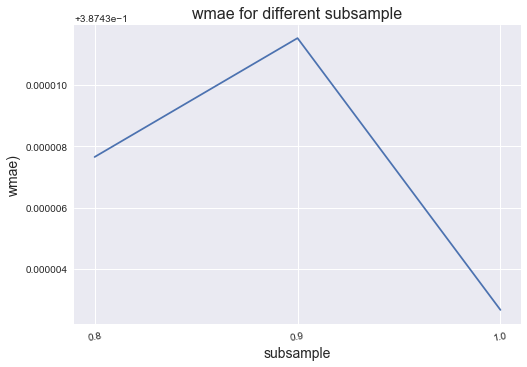

In [12]:
results_subsample = {}
for i in [0.8, 0.9, 1.0]:
    result = {}
    print('\n\n\n\nrunning while subsample = {}'.format(i))
    params={'booster': 'gblinear',
        'objective': 'reg:linear',
        'eta': 0.1,
        'depth': 10,
        'subsample': i,
        'min_child_weight': 5,
        'col_sample_bytree': 0.2,
        'seed': 0,
        'silent': 1,
        }

    watchlist = [(dataset_val, 'val'),(dataset_train,'train')]
    model = xgb.train(params,dataset_train,num_boost_round=10000,early_stopping_rounds=300,evals=watchlist, feval=wmae_xgb,maximize=False)
    pred_xgb = model.predict(dataset_val)
    
    result['predictions'] = pred_xgb
    result['wmae'] = wmae(y_test, pred_xgb)
    results_subsample['{}'.format(i)] = result
    
print(results_subsample)          # 76 negtive rows
plot_results(results_subsample, 'subsample') 

In [37]:
a = pd.DataFrame(results_subsample['1.0']['predictions'])
a[a[0]<0].shape

(16, 1)





running while min_cw = 1
[0]	val-wmae:0.685967	train-wmae:0.667175
Multiple eval metrics have been passed: 'train-wmae' will be used for early stopping.

Will train until train-wmae hasn't improved in 300 rounds.
[1]	val-wmae:0.558894	train-wmae:0.541922
[2]	val-wmae:0.519926	train-wmae:0.496807
[3]	val-wmae:0.496541	train-wmae:0.465957
[4]	val-wmae:0.478701	train-wmae:0.440712
[5]	val-wmae:0.46487	train-wmae:0.419566
[6]	val-wmae:0.453867	train-wmae:0.401668
[7]	val-wmae:0.445062	train-wmae:0.386504
[8]	val-wmae:0.438043	train-wmae:0.373664
[9]	val-wmae:0.432322	train-wmae:0.362725
[10]	val-wmae:0.42789	train-wmae:0.353438
[11]	val-wmae:0.424535	train-wmae:0.345569
[12]	val-wmae:0.421964	train-wmae:0.338882
[13]	val-wmae:0.419947	train-wmae:0.333218
[14]	val-wmae:0.418557	train-wmae:0.328426
[15]	val-wmae:0.41749	train-wmae:0.32433
[16]	val-wmae:0.416668	train-wmae:0.320856
[17]	val-wmae:0.416101	train-wmae:0.317936
[18]	val-wmae:0.415678	train-wmae:0.315481
[19]	val-wmae:0.415334

[187]	val-wmae:0.405687	train-wmae:0.288237
[188]	val-wmae:0.405666	train-wmae:0.288206
[189]	val-wmae:0.405619	train-wmae:0.288165
[190]	val-wmae:0.405572	train-wmae:0.288124
[191]	val-wmae:0.405533	train-wmae:0.288086
[192]	val-wmae:0.405496	train-wmae:0.288049
[193]	val-wmae:0.405469	train-wmae:0.288014
[194]	val-wmae:0.405427	train-wmae:0.287975
[195]	val-wmae:0.405389	train-wmae:0.287937
[196]	val-wmae:0.405355	train-wmae:0.287903
[197]	val-wmae:0.405317	train-wmae:0.287866
[198]	val-wmae:0.405281	train-wmae:0.287831
[199]	val-wmae:0.405246	train-wmae:0.287795
[200]	val-wmae:0.405211	train-wmae:0.28776
[201]	val-wmae:0.405177	train-wmae:0.287725
[202]	val-wmae:0.405144	train-wmae:0.287691
[203]	val-wmae:0.405109	train-wmae:0.287655
[204]	val-wmae:0.405077	train-wmae:0.287621
[205]	val-wmae:0.405043	train-wmae:0.287587
[206]	val-wmae:0.40501	train-wmae:0.287553
[207]	val-wmae:0.404976	train-wmae:0.287518
[208]	val-wmae:0.404944	train-wmae:0.287485
[209]	val-wmae:0.40491	train-wmae:

[374]	val-wmae:0.400826	train-wmae:0.283843
[375]	val-wmae:0.400808	train-wmae:0.283829
[376]	val-wmae:0.40079	train-wmae:0.283814
[377]	val-wmae:0.400772	train-wmae:0.2838
[378]	val-wmae:0.400754	train-wmae:0.283786
[379]	val-wmae:0.400737	train-wmae:0.283771
[380]	val-wmae:0.400718	train-wmae:0.283757
[381]	val-wmae:0.4007	train-wmae:0.283743
[382]	val-wmae:0.400682	train-wmae:0.283728
[383]	val-wmae:0.400664	train-wmae:0.283714
[384]	val-wmae:0.400647	train-wmae:0.2837
[385]	val-wmae:0.400629	train-wmae:0.283686
[386]	val-wmae:0.400611	train-wmae:0.283672
[387]	val-wmae:0.400597	train-wmae:0.28366
[388]	val-wmae:0.400577	train-wmae:0.283645
[389]	val-wmae:0.400559	train-wmae:0.28363
[390]	val-wmae:0.400541	train-wmae:0.283616
[391]	val-wmae:0.400523	train-wmae:0.283603
[392]	val-wmae:0.400506	train-wmae:0.283589
[393]	val-wmae:0.400488	train-wmae:0.283575
[394]	val-wmae:0.40047	train-wmae:0.283562
[395]	val-wmae:0.400454	train-wmae:0.283548
[396]	val-wmae:0.400436	train-wmae:0.28353

[562]	val-wmae:0.398027	train-wmae:0.281843
[563]	val-wmae:0.398015	train-wmae:0.281835
[564]	val-wmae:0.398003	train-wmae:0.281827
[565]	val-wmae:0.397992	train-wmae:0.281819
[566]	val-wmae:0.397979	train-wmae:0.281811
[567]	val-wmae:0.397967	train-wmae:0.281803
[568]	val-wmae:0.397956	train-wmae:0.281796
[569]	val-wmae:0.397944	train-wmae:0.281788
[570]	val-wmae:0.397933	train-wmae:0.28178
[571]	val-wmae:0.397921	train-wmae:0.281773
[572]	val-wmae:0.397909	train-wmae:0.281765
[573]	val-wmae:0.397898	train-wmae:0.281757
[574]	val-wmae:0.397888	train-wmae:0.28175
[575]	val-wmae:0.397876	train-wmae:0.281742
[576]	val-wmae:0.397865	train-wmae:0.281734
[577]	val-wmae:0.397855	train-wmae:0.281727
[578]	val-wmae:0.397843	train-wmae:0.281719
[579]	val-wmae:0.397833	train-wmae:0.281712
[580]	val-wmae:0.397822	train-wmae:0.281704
[581]	val-wmae:0.397812	train-wmae:0.281696
[582]	val-wmae:0.397802	train-wmae:0.281689
[583]	val-wmae:0.397792	train-wmae:0.281682
[584]	val-wmae:0.397781	train-wmae

[750]	val-wmae:0.396332	train-wmae:0.280677
[751]	val-wmae:0.396324	train-wmae:0.280672
[752]	val-wmae:0.396317	train-wmae:0.280667
[753]	val-wmae:0.396309	train-wmae:0.280662
[754]	val-wmae:0.396302	train-wmae:0.280657
[755]	val-wmae:0.396294	train-wmae:0.280652
[756]	val-wmae:0.396287	train-wmae:0.280647
[757]	val-wmae:0.39628	train-wmae:0.280642
[758]	val-wmae:0.396273	train-wmae:0.280638
[759]	val-wmae:0.396265	train-wmae:0.280633
[760]	val-wmae:0.396258	train-wmae:0.280628
[761]	val-wmae:0.39625	train-wmae:0.280623
[762]	val-wmae:0.396243	train-wmae:0.280618
[763]	val-wmae:0.396236	train-wmae:0.280613
[764]	val-wmae:0.396229	train-wmae:0.280608
[765]	val-wmae:0.396222	train-wmae:0.280603
[766]	val-wmae:0.396216	train-wmae:0.280599
[767]	val-wmae:0.396208	train-wmae:0.280594
[768]	val-wmae:0.396201	train-wmae:0.280589
[769]	val-wmae:0.396193	train-wmae:0.280584
[770]	val-wmae:0.396186	train-wmae:0.28058
[771]	val-wmae:0.396179	train-wmae:0.280575
[772]	val-wmae:0.396172	train-wmae:

[938]	val-wmae:0.395138	train-wmae:0.279903
[939]	val-wmae:0.395133	train-wmae:0.2799
[940]	val-wmae:0.395127	train-wmae:0.279896
[941]	val-wmae:0.395122	train-wmae:0.279893
[942]	val-wmae:0.395117	train-wmae:0.27989
[943]	val-wmae:0.395112	train-wmae:0.279887
[944]	val-wmae:0.395106	train-wmae:0.279883
[945]	val-wmae:0.395101	train-wmae:0.27988
[946]	val-wmae:0.395096	train-wmae:0.279877
[947]	val-wmae:0.39509	train-wmae:0.279873
[948]	val-wmae:0.395085	train-wmae:0.27987
[949]	val-wmae:0.39508	train-wmae:0.279867
[950]	val-wmae:0.395075	train-wmae:0.279864
[951]	val-wmae:0.395069	train-wmae:0.27986
[952]	val-wmae:0.395065	train-wmae:0.279857
[953]	val-wmae:0.395059	train-wmae:0.279854
[954]	val-wmae:0.395054	train-wmae:0.279851
[955]	val-wmae:0.395049	train-wmae:0.279847
[956]	val-wmae:0.395044	train-wmae:0.279844
[957]	val-wmae:0.395039	train-wmae:0.279841
[958]	val-wmae:0.395033	train-wmae:0.279838
[959]	val-wmae:0.395028	train-wmae:0.279835
[960]	val-wmae:0.395023	train-wmae:0.279

[1123]	val-wmae:0.394295	train-wmae:0.279365
[1124]	val-wmae:0.394291	train-wmae:0.279362
[1125]	val-wmae:0.394287	train-wmae:0.27936
[1126]	val-wmae:0.394283	train-wmae:0.279357
[1127]	val-wmae:0.394279	train-wmae:0.279355
[1128]	val-wmae:0.394275	train-wmae:0.279352
[1129]	val-wmae:0.394272	train-wmae:0.27935
[1130]	val-wmae:0.394268	train-wmae:0.279347
[1131]	val-wmae:0.394264	train-wmae:0.279345
[1132]	val-wmae:0.39426	train-wmae:0.279342
[1133]	val-wmae:0.394257	train-wmae:0.27934
[1134]	val-wmae:0.394253	train-wmae:0.279337
[1135]	val-wmae:0.394249	train-wmae:0.279335
[1136]	val-wmae:0.394246	train-wmae:0.279332
[1137]	val-wmae:0.394242	train-wmae:0.279329
[1138]	val-wmae:0.394238	train-wmae:0.279327
[1139]	val-wmae:0.394234	train-wmae:0.279324
[1140]	val-wmae:0.394231	train-wmae:0.279322
[1141]	val-wmae:0.394227	train-wmae:0.279319
[1142]	val-wmae:0.394223	train-wmae:0.279317
[1143]	val-wmae:0.394219	train-wmae:0.279314
[1144]	val-wmae:0.394216	train-wmae:0.279312
[1145]	val-wma

[1306]	val-wmae:0.393726	train-wmae:0.278953
[1307]	val-wmae:0.393724	train-wmae:0.278951
[1308]	val-wmae:0.393721	train-wmae:0.278949
[1309]	val-wmae:0.393719	train-wmae:0.278947
[1310]	val-wmae:0.393716	train-wmae:0.278945
[1311]	val-wmae:0.393714	train-wmae:0.278943
[1312]	val-wmae:0.393711	train-wmae:0.278942
[1313]	val-wmae:0.393709	train-wmae:0.278939
[1314]	val-wmae:0.393707	train-wmae:0.278937
[1315]	val-wmae:0.393704	train-wmae:0.278936
[1316]	val-wmae:0.393702	train-wmae:0.278934
[1317]	val-wmae:0.393699	train-wmae:0.278932
[1318]	val-wmae:0.393697	train-wmae:0.27893
[1319]	val-wmae:0.393694	train-wmae:0.278928
[1320]	val-wmae:0.393692	train-wmae:0.278926
[1321]	val-wmae:0.393689	train-wmae:0.278924
[1322]	val-wmae:0.393687	train-wmae:0.278922
[1323]	val-wmae:0.393685	train-wmae:0.27892
[1324]	val-wmae:0.393682	train-wmae:0.278918
[1325]	val-wmae:0.39368	train-wmae:0.278916
[1326]	val-wmae:0.393677	train-wmae:0.278914
[1327]	val-wmae:0.393675	train-wmae:0.278912
[1328]	val-wm

[1489]	val-wmae:0.393322	train-wmae:0.278627
[1490]	val-wmae:0.393321	train-wmae:0.278625
[1491]	val-wmae:0.393319	train-wmae:0.278624
[1492]	val-wmae:0.393317	train-wmae:0.278622
[1493]	val-wmae:0.393315	train-wmae:0.278621
[1494]	val-wmae:0.393313	train-wmae:0.278619
[1495]	val-wmae:0.393312	train-wmae:0.278618
[1496]	val-wmae:0.393309	train-wmae:0.278616
[1497]	val-wmae:0.393308	train-wmae:0.278614
[1498]	val-wmae:0.393305	train-wmae:0.278613
[1499]	val-wmae:0.393304	train-wmae:0.278611
[1500]	val-wmae:0.393302	train-wmae:0.27861
[1501]	val-wmae:0.3933	train-wmae:0.278608
[1502]	val-wmae:0.393298	train-wmae:0.278606
[1503]	val-wmae:0.393296	train-wmae:0.278605
[1504]	val-wmae:0.393294	train-wmae:0.278603
[1505]	val-wmae:0.393292	train-wmae:0.278602
[1506]	val-wmae:0.39329	train-wmae:0.2786
[1507]	val-wmae:0.393288	train-wmae:0.278599
[1508]	val-wmae:0.393286	train-wmae:0.278597
[1509]	val-wmae:0.393284	train-wmae:0.278595
[1510]	val-wmae:0.393282	train-wmae:0.278594
[1511]	val-wmae:

[1673]	val-wmae:0.393	train-wmae:0.278357
[1674]	val-wmae:0.392998	train-wmae:0.278356
[1675]	val-wmae:0.392997	train-wmae:0.278355
[1676]	val-wmae:0.392995	train-wmae:0.278354
[1677]	val-wmae:0.392994	train-wmae:0.278352
[1678]	val-wmae:0.392992	train-wmae:0.278351
[1679]	val-wmae:0.392991	train-wmae:0.27835
[1680]	val-wmae:0.392989	train-wmae:0.278348
[1681]	val-wmae:0.392988	train-wmae:0.278347
[1682]	val-wmae:0.392987	train-wmae:0.278346
[1683]	val-wmae:0.392985	train-wmae:0.278344
[1684]	val-wmae:0.392984	train-wmae:0.278343
[1685]	val-wmae:0.392982	train-wmae:0.278342
[1686]	val-wmae:0.392981	train-wmae:0.27834
[1687]	val-wmae:0.392979	train-wmae:0.278339
[1688]	val-wmae:0.392978	train-wmae:0.278338
[1689]	val-wmae:0.392977	train-wmae:0.278336
[1690]	val-wmae:0.392975	train-wmae:0.278335
[1691]	val-wmae:0.392973	train-wmae:0.278334
[1692]	val-wmae:0.392972	train-wmae:0.278332
[1693]	val-wmae:0.39297	train-wmae:0.278331
[1694]	val-wmae:0.392969	train-wmae:0.27833
[1695]	val-wmae:0

[1857]	val-wmae:0.392749	train-wmae:0.278133
[1858]	val-wmae:0.392748	train-wmae:0.278132
[1859]	val-wmae:0.392747	train-wmae:0.278131
[1860]	val-wmae:0.392746	train-wmae:0.27813
[1861]	val-wmae:0.392744	train-wmae:0.278129
[1862]	val-wmae:0.392743	train-wmae:0.278128
[1863]	val-wmae:0.392742	train-wmae:0.278127
[1864]	val-wmae:0.392741	train-wmae:0.278125
[1865]	val-wmae:0.39274	train-wmae:0.278124
[1866]	val-wmae:0.392738	train-wmae:0.278123
[1867]	val-wmae:0.392737	train-wmae:0.278122
[1868]	val-wmae:0.392736	train-wmae:0.278121
[1869]	val-wmae:0.392735	train-wmae:0.27812
[1870]	val-wmae:0.392734	train-wmae:0.278119
[1871]	val-wmae:0.392732	train-wmae:0.278118
[1872]	val-wmae:0.392731	train-wmae:0.278117
[1873]	val-wmae:0.39273	train-wmae:0.278116
[1874]	val-wmae:0.392729	train-wmae:0.278115
[1875]	val-wmae:0.392728	train-wmae:0.278114
[1876]	val-wmae:0.392726	train-wmae:0.278113
[1877]	val-wmae:0.392725	train-wmae:0.278111
[1878]	val-wmae:0.392724	train-wmae:0.27811
[1879]	val-wmae

[2040]	val-wmae:0.392547	train-wmae:0.27795
[2041]	val-wmae:0.392546	train-wmae:0.277949
[2042]	val-wmae:0.392545	train-wmae:0.277948
[2043]	val-wmae:0.392544	train-wmae:0.277947
[2044]	val-wmae:0.392543	train-wmae:0.277946
[2045]	val-wmae:0.392542	train-wmae:0.277945
[2046]	val-wmae:0.392541	train-wmae:0.277944
[2047]	val-wmae:0.39254	train-wmae:0.277943
[2048]	val-wmae:0.392539	train-wmae:0.277943
[2049]	val-wmae:0.392538	train-wmae:0.277942
[2050]	val-wmae:0.392537	train-wmae:0.277941
[2051]	val-wmae:0.392536	train-wmae:0.27794
[2052]	val-wmae:0.392535	train-wmae:0.277939
[2053]	val-wmae:0.392534	train-wmae:0.277938
[2054]	val-wmae:0.392533	train-wmae:0.277937
[2055]	val-wmae:0.392532	train-wmae:0.277936
[2056]	val-wmae:0.392531	train-wmae:0.277935
[2057]	val-wmae:0.39253	train-wmae:0.277934
[2058]	val-wmae:0.392529	train-wmae:0.277933
[2059]	val-wmae:0.392528	train-wmae:0.277933
[2060]	val-wmae:0.392527	train-wmae:0.277932
[2061]	val-wmae:0.392526	train-wmae:0.277931
[2062]	val-wma

[2223]	val-wmae:0.392381	train-wmae:0.2778
[2224]	val-wmae:0.39238	train-wmae:0.277799
[2225]	val-wmae:0.392379	train-wmae:0.277798
[2226]	val-wmae:0.392378	train-wmae:0.277798
[2227]	val-wmae:0.392378	train-wmae:0.277797
[2228]	val-wmae:0.392377	train-wmae:0.277796
[2229]	val-wmae:0.392376	train-wmae:0.277795
[2230]	val-wmae:0.392375	train-wmae:0.277795
[2231]	val-wmae:0.392374	train-wmae:0.277794
[2232]	val-wmae:0.392373	train-wmae:0.277793
[2233]	val-wmae:0.392373	train-wmae:0.277792
[2234]	val-wmae:0.392372	train-wmae:0.277792
[2235]	val-wmae:0.392371	train-wmae:0.277791
[2236]	val-wmae:0.39237	train-wmae:0.27779
[2237]	val-wmae:0.392369	train-wmae:0.277789
[2238]	val-wmae:0.392369	train-wmae:0.277789
[2239]	val-wmae:0.392368	train-wmae:0.277788
[2240]	val-wmae:0.392367	train-wmae:0.277787
[2241]	val-wmae:0.392366	train-wmae:0.277787
[2242]	val-wmae:0.392366	train-wmae:0.277786
[2243]	val-wmae:0.392365	train-wmae:0.277785
[2244]	val-wmae:0.392364	train-wmae:0.277784
[2245]	val-wmae

[2406]	val-wmae:0.392246	train-wmae:0.277674
[2407]	val-wmae:0.392245	train-wmae:0.277673
[2408]	val-wmae:0.392244	train-wmae:0.277673
[2409]	val-wmae:0.392244	train-wmae:0.277672
[2410]	val-wmae:0.392243	train-wmae:0.277672
[2411]	val-wmae:0.392242	train-wmae:0.277671
[2412]	val-wmae:0.392242	train-wmae:0.27767
[2413]	val-wmae:0.392241	train-wmae:0.27767
[2414]	val-wmae:0.39224	train-wmae:0.277669
[2415]	val-wmae:0.39224	train-wmae:0.277668
[2416]	val-wmae:0.392239	train-wmae:0.277668
[2417]	val-wmae:0.392238	train-wmae:0.277667
[2418]	val-wmae:0.392238	train-wmae:0.277667
[2419]	val-wmae:0.392237	train-wmae:0.277666
[2420]	val-wmae:0.392237	train-wmae:0.277665
[2421]	val-wmae:0.392236	train-wmae:0.277665
[2422]	val-wmae:0.392235	train-wmae:0.277664
[2423]	val-wmae:0.392234	train-wmae:0.277663
[2424]	val-wmae:0.392234	train-wmae:0.277663
[2425]	val-wmae:0.392233	train-wmae:0.277662
[2426]	val-wmae:0.392233	train-wmae:0.277662
[2427]	val-wmae:0.392232	train-wmae:0.277661
[2428]	val-wma

[2590]	val-wmae:0.392135	train-wmae:0.277565
[2591]	val-wmae:0.392134	train-wmae:0.277565
[2592]	val-wmae:0.392133	train-wmae:0.277564
[2593]	val-wmae:0.392133	train-wmae:0.277563
[2594]	val-wmae:0.392132	train-wmae:0.277563
[2595]	val-wmae:0.392132	train-wmae:0.277562
[2596]	val-wmae:0.392131	train-wmae:0.277562
[2597]	val-wmae:0.392131	train-wmae:0.277561
[2598]	val-wmae:0.39213	train-wmae:0.277561
[2599]	val-wmae:0.39213	train-wmae:0.27756
[2600]	val-wmae:0.392129	train-wmae:0.27756
[2601]	val-wmae:0.392129	train-wmae:0.277559
[2602]	val-wmae:0.392128	train-wmae:0.277559
[2603]	val-wmae:0.392127	train-wmae:0.277558
[2604]	val-wmae:0.392127	train-wmae:0.277558
[2605]	val-wmae:0.392126	train-wmae:0.277557
[2606]	val-wmae:0.392126	train-wmae:0.277557
[2607]	val-wmae:0.392125	train-wmae:0.277556
[2608]	val-wmae:0.392125	train-wmae:0.277556
[2609]	val-wmae:0.392124	train-wmae:0.277555
[2610]	val-wmae:0.392124	train-wmae:0.277554
[2611]	val-wmae:0.392123	train-wmae:0.277554
[2612]	val-wma

[2773]	val-wmae:0.39204	train-wmae:0.277475
[2774]	val-wmae:0.39204	train-wmae:0.277474
[2775]	val-wmae:0.392039	train-wmae:0.277474
[2776]	val-wmae:0.392039	train-wmae:0.277473
[2777]	val-wmae:0.392038	train-wmae:0.277473
[2778]	val-wmae:0.392038	train-wmae:0.277473
[2779]	val-wmae:0.392037	train-wmae:0.277472
[2780]	val-wmae:0.392037	train-wmae:0.277472
[2781]	val-wmae:0.392036	train-wmae:0.277471
[2782]	val-wmae:0.392036	train-wmae:0.277471
[2783]	val-wmae:0.392035	train-wmae:0.27747
[2784]	val-wmae:0.392035	train-wmae:0.27747
[2785]	val-wmae:0.392034	train-wmae:0.277469
[2786]	val-wmae:0.392034	train-wmae:0.277469
[2787]	val-wmae:0.392033	train-wmae:0.277468
[2788]	val-wmae:0.392033	train-wmae:0.277468
[2789]	val-wmae:0.392033	train-wmae:0.277468
[2790]	val-wmae:0.392032	train-wmae:0.277467
[2791]	val-wmae:0.392032	train-wmae:0.277467
[2792]	val-wmae:0.392031	train-wmae:0.277466
[2793]	val-wmae:0.392031	train-wmae:0.277466
[2794]	val-wmae:0.39203	train-wmae:0.277465
[2795]	val-wmae

[2957]	val-wmae:0.391959	train-wmae:0.277397
[2958]	val-wmae:0.391959	train-wmae:0.277396
[2959]	val-wmae:0.391958	train-wmae:0.277396
[2960]	val-wmae:0.391958	train-wmae:0.277396
[2961]	val-wmae:0.391957	train-wmae:0.277395
[2962]	val-wmae:0.391957	train-wmae:0.277395
[2963]	val-wmae:0.391956	train-wmae:0.277394
[2964]	val-wmae:0.391956	train-wmae:0.277394
[2965]	val-wmae:0.391956	train-wmae:0.277393
[2966]	val-wmae:0.391955	train-wmae:0.277393
[2967]	val-wmae:0.391955	train-wmae:0.277393
[2968]	val-wmae:0.391954	train-wmae:0.277392
[2969]	val-wmae:0.391954	train-wmae:0.277392
[2970]	val-wmae:0.391954	train-wmae:0.277391
[2971]	val-wmae:0.391953	train-wmae:0.277391
[2972]	val-wmae:0.391953	train-wmae:0.277391
[2973]	val-wmae:0.391952	train-wmae:0.27739
[2974]	val-wmae:0.391952	train-wmae:0.27739
[2975]	val-wmae:0.391951	train-wmae:0.27739
[2976]	val-wmae:0.391951	train-wmae:0.277389
[2977]	val-wmae:0.391951	train-wmae:0.277389
[2978]	val-wmae:0.39195	train-wmae:0.277388
[2979]	val-wma

[3140]	val-wmae:0.391888	train-wmae:0.27733
[3141]	val-wmae:0.391888	train-wmae:0.27733
[3142]	val-wmae:0.391887	train-wmae:0.277329
[3143]	val-wmae:0.391887	train-wmae:0.277329
[3144]	val-wmae:0.391887	train-wmae:0.277329
[3145]	val-wmae:0.391886	train-wmae:0.277328
[3146]	val-wmae:0.391886	train-wmae:0.277328
[3147]	val-wmae:0.391886	train-wmae:0.277328
[3148]	val-wmae:0.391885	train-wmae:0.277327
[3149]	val-wmae:0.391885	train-wmae:0.277327
[3150]	val-wmae:0.391884	train-wmae:0.277327
[3151]	val-wmae:0.391884	train-wmae:0.277326
[3152]	val-wmae:0.391884	train-wmae:0.277326
[3153]	val-wmae:0.391883	train-wmae:0.277326
[3154]	val-wmae:0.391883	train-wmae:0.277325
[3155]	val-wmae:0.391883	train-wmae:0.277325
[3156]	val-wmae:0.391882	train-wmae:0.277325
[3157]	val-wmae:0.391882	train-wmae:0.277324
[3158]	val-wmae:0.391882	train-wmae:0.277324
[3159]	val-wmae:0.391881	train-wmae:0.277324
[3160]	val-wmae:0.391881	train-wmae:0.277323
[3161]	val-wmae:0.391881	train-wmae:0.277323
[3162]	val-w

[3323]	val-wmae:0.391826	train-wmae:0.277274
[3324]	val-wmae:0.391825	train-wmae:0.277274
[3325]	val-wmae:0.391825	train-wmae:0.277273
[3326]	val-wmae:0.391825	train-wmae:0.277273
[3327]	val-wmae:0.391824	train-wmae:0.277273
[3328]	val-wmae:0.391824	train-wmae:0.277273
[3329]	val-wmae:0.391824	train-wmae:0.277272
[3330]	val-wmae:0.391823	train-wmae:0.277272
[3331]	val-wmae:0.391823	train-wmae:0.277272
[3332]	val-wmae:0.391823	train-wmae:0.277271
[3333]	val-wmae:0.391823	train-wmae:0.277271
[3334]	val-wmae:0.391822	train-wmae:0.277271
[3335]	val-wmae:0.391822	train-wmae:0.277271
[3336]	val-wmae:0.391822	train-wmae:0.27727
[3337]	val-wmae:0.391821	train-wmae:0.27727
[3338]	val-wmae:0.391821	train-wmae:0.27727
[3339]	val-wmae:0.391821	train-wmae:0.277269
[3340]	val-wmae:0.39182	train-wmae:0.277269
[3341]	val-wmae:0.39182	train-wmae:0.277269
[3342]	val-wmae:0.39182	train-wmae:0.277269
[3343]	val-wmae:0.391819	train-wmae:0.277268
[3344]	val-wmae:0.391819	train-wmae:0.277268
[3345]	val-wmae:

[3506]	val-wmae:0.39177	train-wmae:0.277225
[3507]	val-wmae:0.39177	train-wmae:0.277225
[3508]	val-wmae:0.39177	train-wmae:0.277225
[3509]	val-wmae:0.391769	train-wmae:0.277224
[3510]	val-wmae:0.391769	train-wmae:0.277224
[3511]	val-wmae:0.391769	train-wmae:0.277224
[3512]	val-wmae:0.391769	train-wmae:0.277224
[3513]	val-wmae:0.391768	train-wmae:0.277223
[3514]	val-wmae:0.391768	train-wmae:0.277223
[3515]	val-wmae:0.391768	train-wmae:0.277223
[3516]	val-wmae:0.391767	train-wmae:0.277223
[3517]	val-wmae:0.391767	train-wmae:0.277222
[3518]	val-wmae:0.391767	train-wmae:0.277222
[3519]	val-wmae:0.391767	train-wmae:0.277222
[3520]	val-wmae:0.391766	train-wmae:0.277222
[3521]	val-wmae:0.391766	train-wmae:0.277221
[3522]	val-wmae:0.391766	train-wmae:0.277221
[3523]	val-wmae:0.391765	train-wmae:0.277221
[3524]	val-wmae:0.391765	train-wmae:0.277221
[3525]	val-wmae:0.391765	train-wmae:0.27722
[3526]	val-wmae:0.391765	train-wmae:0.27722
[3527]	val-wmae:0.391764	train-wmae:0.27722
[3528]	val-wmae:

[3690]	val-wmae:0.391721	train-wmae:0.277182
[3691]	val-wmae:0.391721	train-wmae:0.277182
[3692]	val-wmae:0.391721	train-wmae:0.277182
[3693]	val-wmae:0.391721	train-wmae:0.277181
[3694]	val-wmae:0.39172	train-wmae:0.277181
[3695]	val-wmae:0.39172	train-wmae:0.277181
[3696]	val-wmae:0.39172	train-wmae:0.277181
[3697]	val-wmae:0.39172	train-wmae:0.277181
[3698]	val-wmae:0.391719	train-wmae:0.27718
[3699]	val-wmae:0.391719	train-wmae:0.27718
[3700]	val-wmae:0.391719	train-wmae:0.27718
[3701]	val-wmae:0.391719	train-wmae:0.27718
[3702]	val-wmae:0.391718	train-wmae:0.277179
[3703]	val-wmae:0.391718	train-wmae:0.277179
[3704]	val-wmae:0.391718	train-wmae:0.277179
[3705]	val-wmae:0.391718	train-wmae:0.277179
[3706]	val-wmae:0.391717	train-wmae:0.277179
[3707]	val-wmae:0.391717	train-wmae:0.277178
[3708]	val-wmae:0.391717	train-wmae:0.277178
[3709]	val-wmae:0.391717	train-wmae:0.277178
[3710]	val-wmae:0.391716	train-wmae:0.277178
[3711]	val-wmae:0.391716	train-wmae:0.277178
[3712]	val-wmae:0.

[3874]	val-wmae:0.391679	train-wmae:0.277144
[3875]	val-wmae:0.391678	train-wmae:0.277144
[3876]	val-wmae:0.391678	train-wmae:0.277144
[3877]	val-wmae:0.391678	train-wmae:0.277143
[3878]	val-wmae:0.391678	train-wmae:0.277143
[3879]	val-wmae:0.391678	train-wmae:0.277143
[3880]	val-wmae:0.391677	train-wmae:0.277143
[3881]	val-wmae:0.391677	train-wmae:0.277143
[3882]	val-wmae:0.391677	train-wmae:0.277142
[3883]	val-wmae:0.391677	train-wmae:0.277142
[3884]	val-wmae:0.391676	train-wmae:0.277142
[3885]	val-wmae:0.391676	train-wmae:0.277142
[3886]	val-wmae:0.391676	train-wmae:0.277142
[3887]	val-wmae:0.391676	train-wmae:0.277141
[3888]	val-wmae:0.391675	train-wmae:0.277141
[3889]	val-wmae:0.391675	train-wmae:0.277141
[3890]	val-wmae:0.391675	train-wmae:0.277141
[3891]	val-wmae:0.391675	train-wmae:0.277141
[3892]	val-wmae:0.391675	train-wmae:0.277141
[3893]	val-wmae:0.391674	train-wmae:0.27714
[3894]	val-wmae:0.391674	train-wmae:0.27714
[3895]	val-wmae:0.391674	train-wmae:0.27714
[3896]	val-wm

[4057]	val-wmae:0.39164	train-wmae:0.27711
[4058]	val-wmae:0.39164	train-wmae:0.27711
[4059]	val-wmae:0.39164	train-wmae:0.27711
[4060]	val-wmae:0.391639	train-wmae:0.27711
[4061]	val-wmae:0.391639	train-wmae:0.27711
[4062]	val-wmae:0.391639	train-wmae:0.27711
[4063]	val-wmae:0.391639	train-wmae:0.277109
[4064]	val-wmae:0.391639	train-wmae:0.277109
[4065]	val-wmae:0.391638	train-wmae:0.277109
[4066]	val-wmae:0.391638	train-wmae:0.277109
[4067]	val-wmae:0.391638	train-wmae:0.277109
[4068]	val-wmae:0.391638	train-wmae:0.277108
[4069]	val-wmae:0.391638	train-wmae:0.277108
[4070]	val-wmae:0.391637	train-wmae:0.277108
[4071]	val-wmae:0.391637	train-wmae:0.277108
[4072]	val-wmae:0.391637	train-wmae:0.277108
[4073]	val-wmae:0.391637	train-wmae:0.277108
[4074]	val-wmae:0.391637	train-wmae:0.277107
[4075]	val-wmae:0.391636	train-wmae:0.277107
[4076]	val-wmae:0.391636	train-wmae:0.277107
[4077]	val-wmae:0.391636	train-wmae:0.277107
[4078]	val-wmae:0.391636	train-wmae:0.277107
[4079]	val-wmae:0.3

[4241]	val-wmae:0.391605	train-wmae:0.27708
[4242]	val-wmae:0.391604	train-wmae:0.27708
[4243]	val-wmae:0.391604	train-wmae:0.27708
[4244]	val-wmae:0.391604	train-wmae:0.277079
[4245]	val-wmae:0.391604	train-wmae:0.277079
[4246]	val-wmae:0.391604	train-wmae:0.277079
[4247]	val-wmae:0.391603	train-wmae:0.277079
[4248]	val-wmae:0.391603	train-wmae:0.277079
[4249]	val-wmae:0.391603	train-wmae:0.277079
[4250]	val-wmae:0.391603	train-wmae:0.277079
[4251]	val-wmae:0.391603	train-wmae:0.277078
[4252]	val-wmae:0.391603	train-wmae:0.277078
[4253]	val-wmae:0.391602	train-wmae:0.277078
[4254]	val-wmae:0.391602	train-wmae:0.277078
[4255]	val-wmae:0.391602	train-wmae:0.277078
[4256]	val-wmae:0.391602	train-wmae:0.277078
[4257]	val-wmae:0.391602	train-wmae:0.277077
[4258]	val-wmae:0.391601	train-wmae:0.277077
[4259]	val-wmae:0.391601	train-wmae:0.277077
[4260]	val-wmae:0.391601	train-wmae:0.277077
[4261]	val-wmae:0.391601	train-wmae:0.277077
[4262]	val-wmae:0.391601	train-wmae:0.277077
[4263]	val-wm

[4424]	val-wmae:0.391572	train-wmae:0.277053
[4425]	val-wmae:0.391572	train-wmae:0.277053
[4426]	val-wmae:0.391572	train-wmae:0.277053
[4427]	val-wmae:0.391572	train-wmae:0.277053
[4428]	val-wmae:0.391572	train-wmae:0.277052
[4429]	val-wmae:0.391571	train-wmae:0.277052
[4430]	val-wmae:0.391571	train-wmae:0.277052
[4431]	val-wmae:0.391571	train-wmae:0.277052
[4432]	val-wmae:0.391571	train-wmae:0.277052
[4433]	val-wmae:0.391571	train-wmae:0.277052
[4434]	val-wmae:0.391571	train-wmae:0.277052
[4435]	val-wmae:0.39157	train-wmae:0.277051
[4436]	val-wmae:0.39157	train-wmae:0.277051
[4437]	val-wmae:0.39157	train-wmae:0.277051
[4438]	val-wmae:0.39157	train-wmae:0.277051
[4439]	val-wmae:0.39157	train-wmae:0.277051
[4440]	val-wmae:0.39157	train-wmae:0.277051
[4441]	val-wmae:0.391569	train-wmae:0.277051
[4442]	val-wmae:0.391569	train-wmae:0.27705
[4443]	val-wmae:0.391569	train-wmae:0.27705
[4444]	val-wmae:0.391569	train-wmae:0.27705
[4445]	val-wmae:0.391569	train-wmae:0.27705
[4446]	val-wmae:0.39

[4607]	val-wmae:0.391543	train-wmae:0.27703
[4608]	val-wmae:0.391543	train-wmae:0.27703
[4609]	val-wmae:0.391542	train-wmae:0.27703
[4610]	val-wmae:0.391542	train-wmae:0.277029
[4611]	val-wmae:0.391542	train-wmae:0.277029
[4612]	val-wmae:0.391542	train-wmae:0.277029
[4613]	val-wmae:0.391542	train-wmae:0.277029
[4614]	val-wmae:0.391542	train-wmae:0.277029
[4615]	val-wmae:0.391542	train-wmae:0.277029
[4616]	val-wmae:0.391541	train-wmae:0.277029
[4617]	val-wmae:0.391541	train-wmae:0.277029
[4618]	val-wmae:0.391541	train-wmae:0.277028
[4619]	val-wmae:0.391541	train-wmae:0.277028
[4620]	val-wmae:0.391541	train-wmae:0.277028
[4621]	val-wmae:0.391541	train-wmae:0.277028
[4622]	val-wmae:0.39154	train-wmae:0.277028
[4623]	val-wmae:0.39154	train-wmae:0.277028
[4624]	val-wmae:0.39154	train-wmae:0.277028
[4625]	val-wmae:0.39154	train-wmae:0.277028
[4626]	val-wmae:0.39154	train-wmae:0.277027
[4627]	val-wmae:0.39154	train-wmae:0.277027
[4628]	val-wmae:0.391539	train-wmae:0.277027
[4629]	val-wmae:0.3

[4790]	val-wmae:0.391516	train-wmae:0.277009
[4791]	val-wmae:0.391516	train-wmae:0.277009
[4792]	val-wmae:0.391516	train-wmae:0.277009
[4793]	val-wmae:0.391516	train-wmae:0.277009
[4794]	val-wmae:0.391515	train-wmae:0.277008
[4795]	val-wmae:0.391515	train-wmae:0.277008
[4796]	val-wmae:0.391515	train-wmae:0.277008
[4797]	val-wmae:0.391515	train-wmae:0.277008
[4798]	val-wmae:0.391515	train-wmae:0.277008
[4799]	val-wmae:0.391515	train-wmae:0.277008
[4800]	val-wmae:0.391515	train-wmae:0.277008
[4801]	val-wmae:0.391514	train-wmae:0.277008
[4802]	val-wmae:0.391514	train-wmae:0.277008
[4803]	val-wmae:0.391514	train-wmae:0.277007
[4804]	val-wmae:0.391514	train-wmae:0.277007
[4805]	val-wmae:0.391514	train-wmae:0.277007
[4806]	val-wmae:0.391514	train-wmae:0.277007
[4807]	val-wmae:0.391514	train-wmae:0.277007
[4808]	val-wmae:0.391513	train-wmae:0.277007
[4809]	val-wmae:0.391513	train-wmae:0.277007
[4810]	val-wmae:0.391513	train-wmae:0.277007
[4811]	val-wmae:0.391513	train-wmae:0.277007
[4812]	val

[4974]	val-wmae:0.391491	train-wmae:0.276989
[4975]	val-wmae:0.391491	train-wmae:0.276989
[4976]	val-wmae:0.391491	train-wmae:0.276989
[4977]	val-wmae:0.391491	train-wmae:0.276989
[4978]	val-wmae:0.391491	train-wmae:0.276989
[4979]	val-wmae:0.39149	train-wmae:0.276989
[4980]	val-wmae:0.39149	train-wmae:0.276989
[4981]	val-wmae:0.39149	train-wmae:0.276989
[4982]	val-wmae:0.39149	train-wmae:0.276989
[4983]	val-wmae:0.39149	train-wmae:0.276989
[4984]	val-wmae:0.39149	train-wmae:0.276988
[4985]	val-wmae:0.39149	train-wmae:0.276988
[4986]	val-wmae:0.39149	train-wmae:0.276988
[4987]	val-wmae:0.391489	train-wmae:0.276988
[4988]	val-wmae:0.391489	train-wmae:0.276988
[4989]	val-wmae:0.391489	train-wmae:0.276988
[4990]	val-wmae:0.391489	train-wmae:0.276988
[4991]	val-wmae:0.391489	train-wmae:0.276988
[4992]	val-wmae:0.391489	train-wmae:0.276988
[4993]	val-wmae:0.391489	train-wmae:0.276988
[4994]	val-wmae:0.391488	train-wmae:0.276987
[4995]	val-wmae:0.391488	train-wmae:0.276987
[4996]	val-wmae:0.

[5157]	val-wmae:0.391468	train-wmae:0.276972
[5158]	val-wmae:0.391468	train-wmae:0.276972
[5159]	val-wmae:0.391468	train-wmae:0.276972
[5160]	val-wmae:0.391468	train-wmae:0.276971
[5161]	val-wmae:0.391468	train-wmae:0.276971
[5162]	val-wmae:0.391468	train-wmae:0.276971
[5163]	val-wmae:0.391467	train-wmae:0.276971
[5164]	val-wmae:0.391467	train-wmae:0.276971
[5165]	val-wmae:0.391467	train-wmae:0.276971
[5166]	val-wmae:0.391467	train-wmae:0.276971
[5167]	val-wmae:0.391467	train-wmae:0.276971
[5168]	val-wmae:0.391467	train-wmae:0.276971
[5169]	val-wmae:0.391467	train-wmae:0.276971
[5170]	val-wmae:0.391467	train-wmae:0.27697
[5171]	val-wmae:0.391467	train-wmae:0.27697
[5172]	val-wmae:0.391466	train-wmae:0.27697
[5173]	val-wmae:0.391466	train-wmae:0.27697
[5174]	val-wmae:0.391466	train-wmae:0.27697
[5175]	val-wmae:0.391466	train-wmae:0.27697
[5176]	val-wmae:0.391466	train-wmae:0.27697
[5177]	val-wmae:0.391466	train-wmae:0.27697
[5178]	val-wmae:0.391466	train-wmae:0.27697
[5179]	val-wmae:0.3

[5340]	val-wmae:0.391447	train-wmae:0.276955
[5341]	val-wmae:0.391447	train-wmae:0.276955
[5342]	val-wmae:0.391447	train-wmae:0.276955
[5343]	val-wmae:0.391447	train-wmae:0.276955
[5344]	val-wmae:0.391447	train-wmae:0.276955
[5345]	val-wmae:0.391447	train-wmae:0.276955
[5346]	val-wmae:0.391447	train-wmae:0.276955
[5347]	val-wmae:0.391446	train-wmae:0.276954
[5348]	val-wmae:0.391446	train-wmae:0.276954
[5349]	val-wmae:0.391446	train-wmae:0.276954
[5350]	val-wmae:0.391446	train-wmae:0.276954
[5351]	val-wmae:0.391446	train-wmae:0.276954
[5352]	val-wmae:0.391446	train-wmae:0.276954
[5353]	val-wmae:0.391446	train-wmae:0.276954
[5354]	val-wmae:0.391446	train-wmae:0.276954
[5355]	val-wmae:0.391446	train-wmae:0.276954
[5356]	val-wmae:0.391445	train-wmae:0.276954
[5357]	val-wmae:0.391445	train-wmae:0.276954
[5358]	val-wmae:0.391445	train-wmae:0.276954
[5359]	val-wmae:0.391445	train-wmae:0.276953
[5360]	val-wmae:0.391445	train-wmae:0.276953
[5361]	val-wmae:0.391445	train-wmae:0.276953
[5362]	val

[5523]	val-wmae:0.391427	train-wmae:0.27694
[5524]	val-wmae:0.391427	train-wmae:0.27694
[5525]	val-wmae:0.391427	train-wmae:0.276939
[5526]	val-wmae:0.391427	train-wmae:0.276939
[5527]	val-wmae:0.391427	train-wmae:0.276939
[5528]	val-wmae:0.391427	train-wmae:0.276939
[5529]	val-wmae:0.391427	train-wmae:0.276939
[5530]	val-wmae:0.391427	train-wmae:0.276939
[5531]	val-wmae:0.391427	train-wmae:0.276939
[5532]	val-wmae:0.391426	train-wmae:0.276939
[5533]	val-wmae:0.391426	train-wmae:0.276939
[5534]	val-wmae:0.391426	train-wmae:0.276939
[5535]	val-wmae:0.391426	train-wmae:0.276939
[5536]	val-wmae:0.391426	train-wmae:0.276939
[5537]	val-wmae:0.391426	train-wmae:0.276939
[5538]	val-wmae:0.391426	train-wmae:0.276938
[5539]	val-wmae:0.391426	train-wmae:0.276938
[5540]	val-wmae:0.391426	train-wmae:0.276938
[5541]	val-wmae:0.391425	train-wmae:0.276938
[5542]	val-wmae:0.391425	train-wmae:0.276938
[5543]	val-wmae:0.391425	train-wmae:0.276938
[5544]	val-wmae:0.391425	train-wmae:0.276938
[5545]	val-w

[5706]	val-wmae:0.391409	train-wmae:0.276925
[5707]	val-wmae:0.391409	train-wmae:0.276925
[5708]	val-wmae:0.391409	train-wmae:0.276925
[5709]	val-wmae:0.391409	train-wmae:0.276925
[5710]	val-wmae:0.391409	train-wmae:0.276925
[5711]	val-wmae:0.391408	train-wmae:0.276925
[5712]	val-wmae:0.391408	train-wmae:0.276925
[5713]	val-wmae:0.391408	train-wmae:0.276925
[5714]	val-wmae:0.391408	train-wmae:0.276925
[5715]	val-wmae:0.391408	train-wmae:0.276925
[5716]	val-wmae:0.391408	train-wmae:0.276924
[5717]	val-wmae:0.391408	train-wmae:0.276924
[5718]	val-wmae:0.391408	train-wmae:0.276924
[5719]	val-wmae:0.391408	train-wmae:0.276924
[5720]	val-wmae:0.391408	train-wmae:0.276924
[5721]	val-wmae:0.391407	train-wmae:0.276924
[5722]	val-wmae:0.391407	train-wmae:0.276924
[5723]	val-wmae:0.391407	train-wmae:0.276924
[5724]	val-wmae:0.391407	train-wmae:0.276924
[5725]	val-wmae:0.391407	train-wmae:0.276924
[5726]	val-wmae:0.391407	train-wmae:0.276924
[5727]	val-wmae:0.391407	train-wmae:0.276924
[5728]	val

[5889]	val-wmae:0.391392	train-wmae:0.276912
[5890]	val-wmae:0.391392	train-wmae:0.276912
[5891]	val-wmae:0.391391	train-wmae:0.276912
[5892]	val-wmae:0.391391	train-wmae:0.276912
[5893]	val-wmae:0.391391	train-wmae:0.276912
[5894]	val-wmae:0.391391	train-wmae:0.276912
[5895]	val-wmae:0.391391	train-wmae:0.276912
[5896]	val-wmae:0.391391	train-wmae:0.276912
[5897]	val-wmae:0.391391	train-wmae:0.276911
[5898]	val-wmae:0.391391	train-wmae:0.276911
[5899]	val-wmae:0.391391	train-wmae:0.276911
[5900]	val-wmae:0.391391	train-wmae:0.276911
[5901]	val-wmae:0.391391	train-wmae:0.276911
[5902]	val-wmae:0.39139	train-wmae:0.276911
[5903]	val-wmae:0.39139	train-wmae:0.276911
[5904]	val-wmae:0.39139	train-wmae:0.276911
[5905]	val-wmae:0.39139	train-wmae:0.276911
[5906]	val-wmae:0.39139	train-wmae:0.276911
[5907]	val-wmae:0.39139	train-wmae:0.276911
[5908]	val-wmae:0.39139	train-wmae:0.276911
[5909]	val-wmae:0.39139	train-wmae:0.276911
[5910]	val-wmae:0.39139	train-wmae:0.276911
[5911]	val-wmae:0.3

[72]	val-wmae:0.413416	train-wmae:0.296955
[73]	val-wmae:0.413319	train-wmae:0.296827
[74]	val-wmae:0.413217	train-wmae:0.296699
[75]	val-wmae:0.413117	train-wmae:0.296572
[76]	val-wmae:0.413019	train-wmae:0.296449
[77]	val-wmae:0.412927	train-wmae:0.296331
[78]	val-wmae:0.412827	train-wmae:0.296209
[79]	val-wmae:0.412735	train-wmae:0.296092
[80]	val-wmae:0.412643	train-wmae:0.295977
[81]	val-wmae:0.412555	train-wmae:0.295865
[82]	val-wmae:0.412466	train-wmae:0.295752
[83]	val-wmae:0.41238	train-wmae:0.295644
[84]	val-wmae:0.412294	train-wmae:0.295536
[85]	val-wmae:0.412211	train-wmae:0.295431
[86]	val-wmae:0.41213	train-wmae:0.295329
[87]	val-wmae:0.41204	train-wmae:0.295221
[88]	val-wmae:0.411955	train-wmae:0.295117
[89]	val-wmae:0.411873	train-wmae:0.295017
[90]	val-wmae:0.411792	train-wmae:0.294917
[91]	val-wmae:0.411714	train-wmae:0.294817
[92]	val-wmae:0.411702	train-wmae:0.294758
[93]	val-wmae:0.411571	train-wmae:0.294631
[94]	val-wmae:0.411481	train-wmae:0.294529
[95]	val-wmae:

[261]	val-wmae:0.403822	train-wmae:0.28633
[262]	val-wmae:0.403793	train-wmae:0.286304
[263]	val-wmae:0.403765	train-wmae:0.286279
[264]	val-wmae:0.403735	train-wmae:0.286253
[265]	val-wmae:0.403707	train-wmae:0.286228
[266]	val-wmae:0.403677	train-wmae:0.286203
[267]	val-wmae:0.403649	train-wmae:0.286178
[268]	val-wmae:0.403621	train-wmae:0.286152
[269]	val-wmae:0.403606	train-wmae:0.286134
[270]	val-wmae:0.403567	train-wmae:0.286105
[271]	val-wmae:0.403536	train-wmae:0.286079
[272]	val-wmae:0.403507	train-wmae:0.286054
[273]	val-wmae:0.403478	train-wmae:0.28603
[274]	val-wmae:0.40345	train-wmae:0.286006
[275]	val-wmae:0.403421	train-wmae:0.285981
[276]	val-wmae:0.403394	train-wmae:0.285958
[277]	val-wmae:0.403365	train-wmae:0.285934
[278]	val-wmae:0.403338	train-wmae:0.28591
[279]	val-wmae:0.40331	train-wmae:0.285886
[280]	val-wmae:0.403282	train-wmae:0.285863
[281]	val-wmae:0.403254	train-wmae:0.28584
[282]	val-wmae:0.403229	train-wmae:0.285816
[283]	val-wmae:0.403202	train-wmae:0.2

[449]	val-wmae:0.399831	train-wmae:0.283068
[450]	val-wmae:0.399815	train-wmae:0.283057
[451]	val-wmae:0.399799	train-wmae:0.283046
[452]	val-wmae:0.399783	train-wmae:0.283034
[453]	val-wmae:0.399767	train-wmae:0.283023
[454]	val-wmae:0.399752	train-wmae:0.283012
[455]	val-wmae:0.399735	train-wmae:0.283
[456]	val-wmae:0.39972	train-wmae:0.282989
[457]	val-wmae:0.399704	train-wmae:0.282978
[458]	val-wmae:0.399689	train-wmae:0.282967
[459]	val-wmae:0.399672	train-wmae:0.282956
[460]	val-wmae:0.399657	train-wmae:0.282945
[461]	val-wmae:0.399641	train-wmae:0.282934
[462]	val-wmae:0.399626	train-wmae:0.282923
[463]	val-wmae:0.399611	train-wmae:0.282913
[464]	val-wmae:0.399595	train-wmae:0.282902
[465]	val-wmae:0.39958	train-wmae:0.282891
[466]	val-wmae:0.399565	train-wmae:0.282881
[467]	val-wmae:0.39955	train-wmae:0.28287
[468]	val-wmae:0.399534	train-wmae:0.282859
[469]	val-wmae:0.399519	train-wmae:0.282849
[470]	val-wmae:0.399504	train-wmae:0.282839
[471]	val-wmae:0.399489	train-wmae:0.28

[637]	val-wmae:0.397444	train-wmae:0.281423
[638]	val-wmae:0.397435	train-wmae:0.281417
[639]	val-wmae:0.397427	train-wmae:0.281411
[640]	val-wmae:0.397416	train-wmae:0.281404
[641]	val-wmae:0.397407	train-wmae:0.281398
[642]	val-wmae:0.397398	train-wmae:0.281391
[643]	val-wmae:0.397389	train-wmae:0.281385
[644]	val-wmae:0.397379	train-wmae:0.281378
[645]	val-wmae:0.39737	train-wmae:0.281372
[646]	val-wmae:0.397361	train-wmae:0.281366
[647]	val-wmae:0.397352	train-wmae:0.281359
[648]	val-wmae:0.397343	train-wmae:0.281353
[649]	val-wmae:0.397334	train-wmae:0.281347
[650]	val-wmae:0.397325	train-wmae:0.28134
[651]	val-wmae:0.397316	train-wmae:0.281334
[652]	val-wmae:0.397307	train-wmae:0.281328
[653]	val-wmae:0.397298	train-wmae:0.281322
[654]	val-wmae:0.397288	train-wmae:0.281315
[655]	val-wmae:0.397279	train-wmae:0.281309
[656]	val-wmae:0.397271	train-wmae:0.281303
[657]	val-wmae:0.397262	train-wmae:0.281297
[658]	val-wmae:0.397253	train-wmae:0.281291
[659]	val-wmae:0.397243	train-wmae

[824]	val-wmae:0.395944	train-wmae:0.280421
[825]	val-wmae:0.395937	train-wmae:0.280417
[826]	val-wmae:0.39593	train-wmae:0.280412
[827]	val-wmae:0.395923	train-wmae:0.280408
[828]	val-wmae:0.395916	train-wmae:0.280404
[829]	val-wmae:0.395909	train-wmae:0.280399
[830]	val-wmae:0.395903	train-wmae:0.280395
[831]	val-wmae:0.395896	train-wmae:0.280391
[832]	val-wmae:0.395889	train-wmae:0.280386
[833]	val-wmae:0.395883	train-wmae:0.280382
[834]	val-wmae:0.395876	train-wmae:0.280378
[835]	val-wmae:0.39587	train-wmae:0.280374
[836]	val-wmae:0.395863	train-wmae:0.280369
[837]	val-wmae:0.395856	train-wmae:0.280365
[838]	val-wmae:0.395849	train-wmae:0.280361
[839]	val-wmae:0.395843	train-wmae:0.280357
[840]	val-wmae:0.395836	train-wmae:0.280352
[841]	val-wmae:0.395829	train-wmae:0.280348
[842]	val-wmae:0.395823	train-wmae:0.280344
[843]	val-wmae:0.395816	train-wmae:0.28034
[844]	val-wmae:0.39581	train-wmae:0.280335
[845]	val-wmae:0.395803	train-wmae:0.280331
[846]	val-wmae:0.395797	train-wmae:0

[1011]	val-wmae:0.394866	train-wmae:0.279737
[1012]	val-wmae:0.394862	train-wmae:0.279734
[1013]	val-wmae:0.394857	train-wmae:0.279731
[1014]	val-wmae:0.394853	train-wmae:0.279728
[1015]	val-wmae:0.394847	train-wmae:0.279725
[1016]	val-wmae:0.394843	train-wmae:0.279721
[1017]	val-wmae:0.394838	train-wmae:0.279718
[1018]	val-wmae:0.394833	train-wmae:0.279715
[1019]	val-wmae:0.394828	train-wmae:0.279712
[1020]	val-wmae:0.394823	train-wmae:0.279709
[1021]	val-wmae:0.394819	train-wmae:0.279706
[1022]	val-wmae:0.394814	train-wmae:0.279703
[1023]	val-wmae:0.394809	train-wmae:0.2797
[1024]	val-wmae:0.394805	train-wmae:0.279697
[1025]	val-wmae:0.3948	train-wmae:0.279694
[1026]	val-wmae:0.394795	train-wmae:0.279691
[1027]	val-wmae:0.39479	train-wmae:0.279688
[1028]	val-wmae:0.394785	train-wmae:0.279685
[1029]	val-wmae:0.39478	train-wmae:0.279682
[1030]	val-wmae:0.394775	train-wmae:0.279679
[1031]	val-wmae:0.394771	train-wmae:0.279676
[1032]	val-wmae:0.394766	train-wmae:0.279673
[1033]	val-wmae:

[1194]	val-wmae:0.394118	train-wmae:0.279238
[1195]	val-wmae:0.394115	train-wmae:0.279235
[1196]	val-wmae:0.394112	train-wmae:0.279233
[1197]	val-wmae:0.394108	train-wmae:0.279231
[1198]	val-wmae:0.394105	train-wmae:0.279228
[1199]	val-wmae:0.394102	train-wmae:0.279226
[1200]	val-wmae:0.394099	train-wmae:0.279224
[1201]	val-wmae:0.394095	train-wmae:0.279221
[1202]	val-wmae:0.394092	train-wmae:0.279219
[1203]	val-wmae:0.394089	train-wmae:0.279217
[1204]	val-wmae:0.394086	train-wmae:0.279214
[1205]	val-wmae:0.394082	train-wmae:0.279212
[1206]	val-wmae:0.394079	train-wmae:0.27921
[1207]	val-wmae:0.394076	train-wmae:0.279207
[1208]	val-wmae:0.394073	train-wmae:0.279205
[1209]	val-wmae:0.39407	train-wmae:0.279203
[1210]	val-wmae:0.394066	train-wmae:0.279201
[1211]	val-wmae:0.394063	train-wmae:0.279198
[1212]	val-wmae:0.39406	train-wmae:0.279196
[1213]	val-wmae:0.394057	train-wmae:0.279194
[1214]	val-wmae:0.394054	train-wmae:0.279191
[1215]	val-wmae:0.394051	train-wmae:0.279189
[1216]	val-wm

[1377]	val-wmae:0.393615	train-wmae:0.278855
[1378]	val-wmae:0.393613	train-wmae:0.278853
[1379]	val-wmae:0.39361	train-wmae:0.278852
[1380]	val-wmae:0.393608	train-wmae:0.27885
[1381]	val-wmae:0.393605	train-wmae:0.278848
[1382]	val-wmae:0.393603	train-wmae:0.278846
[1383]	val-wmae:0.393601	train-wmae:0.278844
[1384]	val-wmae:0.393598	train-wmae:0.278842
[1385]	val-wmae:0.393596	train-wmae:0.27884
[1386]	val-wmae:0.393594	train-wmae:0.278838
[1387]	val-wmae:0.393591	train-wmae:0.278837
[1388]	val-wmae:0.393589	train-wmae:0.278835
[1389]	val-wmae:0.393587	train-wmae:0.278833
[1390]	val-wmae:0.393584	train-wmae:0.278831
[1391]	val-wmae:0.393582	train-wmae:0.278829
[1392]	val-wmae:0.39358	train-wmae:0.278827
[1393]	val-wmae:0.393578	train-wmae:0.278826
[1394]	val-wmae:0.393575	train-wmae:0.278824
[1395]	val-wmae:0.393573	train-wmae:0.278822
[1396]	val-wmae:0.393571	train-wmae:0.27882
[1397]	val-wmae:0.393569	train-wmae:0.278818
[1398]	val-wmae:0.393566	train-wmae:0.278817
[1399]	val-wmae

[1561]	val-wmae:0.393232	train-wmae:0.278544
[1562]	val-wmae:0.393231	train-wmae:0.278543
[1563]	val-wmae:0.393229	train-wmae:0.278541
[1564]	val-wmae:0.393227	train-wmae:0.27854
[1565]	val-wmae:0.393225	train-wmae:0.278538
[1566]	val-wmae:0.393223	train-wmae:0.278537
[1567]	val-wmae:0.393221	train-wmae:0.278535
[1568]	val-wmae:0.393219	train-wmae:0.278533
[1569]	val-wmae:0.393218	train-wmae:0.278532
[1570]	val-wmae:0.393216	train-wmae:0.27853
[1571]	val-wmae:0.393214	train-wmae:0.278529
[1572]	val-wmae:0.393212	train-wmae:0.278527
[1573]	val-wmae:0.39321	train-wmae:0.278526
[1574]	val-wmae:0.393208	train-wmae:0.278524
[1575]	val-wmae:0.393207	train-wmae:0.278523
[1576]	val-wmae:0.393205	train-wmae:0.278521
[1577]	val-wmae:0.393203	train-wmae:0.27852
[1578]	val-wmae:0.393201	train-wmae:0.278518
[1579]	val-wmae:0.393199	train-wmae:0.278517
[1580]	val-wmae:0.393197	train-wmae:0.278515
[1581]	val-wmae:0.393195	train-wmae:0.278514
[1582]	val-wmae:0.393194	train-wmae:0.278512
[1583]	val-wma

[1744]	val-wmae:0.392933	train-wmae:0.278288
[1745]	val-wmae:0.392931	train-wmae:0.278287
[1746]	val-wmae:0.39293	train-wmae:0.278286
[1747]	val-wmae:0.392929	train-wmae:0.278285
[1748]	val-wmae:0.392927	train-wmae:0.278283
[1749]	val-wmae:0.392926	train-wmae:0.278282
[1750]	val-wmae:0.392924	train-wmae:0.278281
[1751]	val-wmae:0.392923	train-wmae:0.27828
[1752]	val-wmae:0.392921	train-wmae:0.278278
[1753]	val-wmae:0.39292	train-wmae:0.278277
[1754]	val-wmae:0.392919	train-wmae:0.278276
[1755]	val-wmae:0.392917	train-wmae:0.278275
[1756]	val-wmae:0.392916	train-wmae:0.278273
[1757]	val-wmae:0.392914	train-wmae:0.278272
[1758]	val-wmae:0.392913	train-wmae:0.278271
[1759]	val-wmae:0.392912	train-wmae:0.278269
[1760]	val-wmae:0.39291	train-wmae:0.278268
[1761]	val-wmae:0.392909	train-wmae:0.278267
[1762]	val-wmae:0.392907	train-wmae:0.278266
[1763]	val-wmae:0.392906	train-wmae:0.278265
[1764]	val-wmae:0.392904	train-wmae:0.278263
[1765]	val-wmae:0.392903	train-wmae:0.278262
[1766]	val-wma

[1928]	val-wmae:0.392695	train-wmae:0.278076
[1929]	val-wmae:0.392694	train-wmae:0.278074
[1930]	val-wmae:0.392693	train-wmae:0.278073
[1931]	val-wmae:0.392692	train-wmae:0.278072
[1932]	val-wmae:0.39269	train-wmae:0.278071
[1933]	val-wmae:0.392689	train-wmae:0.27807
[1934]	val-wmae:0.392688	train-wmae:0.278069
[1935]	val-wmae:0.392687	train-wmae:0.278068
[1936]	val-wmae:0.392686	train-wmae:0.278067
[1937]	val-wmae:0.392685	train-wmae:0.278066
[1938]	val-wmae:0.392683	train-wmae:0.278065
[1939]	val-wmae:0.392682	train-wmae:0.278064
[1940]	val-wmae:0.392681	train-wmae:0.278063
[1941]	val-wmae:0.39268	train-wmae:0.278062
[1942]	val-wmae:0.392679	train-wmae:0.278061
[1943]	val-wmae:0.392678	train-wmae:0.27806
[1944]	val-wmae:0.392677	train-wmae:0.278059
[1945]	val-wmae:0.392676	train-wmae:0.278058
[1946]	val-wmae:0.392674	train-wmae:0.278057
[1947]	val-wmae:0.392673	train-wmae:0.278056
[1948]	val-wmae:0.392672	train-wmae:0.278055
[1949]	val-wmae:0.392671	train-wmae:0.278054
[1950]	val-wma

[2111]	val-wmae:0.392502	train-wmae:0.277902
[2112]	val-wmae:0.392502	train-wmae:0.277901
[2113]	val-wmae:0.392501	train-wmae:0.2779
[2114]	val-wmae:0.3925	train-wmae:0.277899
[2115]	val-wmae:0.392499	train-wmae:0.277898
[2116]	val-wmae:0.392498	train-wmae:0.277897
[2117]	val-wmae:0.392497	train-wmae:0.277897
[2118]	val-wmae:0.392496	train-wmae:0.277896
[2119]	val-wmae:0.392495	train-wmae:0.277895
[2120]	val-wmae:0.392494	train-wmae:0.277894
[2121]	val-wmae:0.392493	train-wmae:0.277893
[2122]	val-wmae:0.392492	train-wmae:0.277892
[2123]	val-wmae:0.392491	train-wmae:0.277891
[2124]	val-wmae:0.39249	train-wmae:0.277891
[2125]	val-wmae:0.392489	train-wmae:0.27789
[2126]	val-wmae:0.392488	train-wmae:0.277889
[2127]	val-wmae:0.392487	train-wmae:0.277888
[2128]	val-wmae:0.392486	train-wmae:0.277887
[2129]	val-wmae:0.392486	train-wmae:0.277886
[2130]	val-wmae:0.392485	train-wmae:0.277886
[2131]	val-wmae:0.392484	train-wmae:0.277885
[2132]	val-wmae:0.392483	train-wmae:0.277884
[2133]	val-wmae:

[2294]	val-wmae:0.392343	train-wmae:0.27776
[2295]	val-wmae:0.392342	train-wmae:0.277759
[2296]	val-wmae:0.392342	train-wmae:0.277759
[2297]	val-wmae:0.392341	train-wmae:0.277758
[2298]	val-wmae:0.39234	train-wmae:0.277757
[2299]	val-wmae:0.392339	train-wmae:0.277756
[2300]	val-wmae:0.392338	train-wmae:0.277756
[2301]	val-wmae:0.392338	train-wmae:0.277755
[2302]	val-wmae:0.392337	train-wmae:0.277754
[2303]	val-wmae:0.392336	train-wmae:0.277754
[2304]	val-wmae:0.392335	train-wmae:0.277753
[2305]	val-wmae:0.392335	train-wmae:0.277752
[2306]	val-wmae:0.392334	train-wmae:0.277751
[2307]	val-wmae:0.392333	train-wmae:0.277751
[2308]	val-wmae:0.392332	train-wmae:0.27775
[2309]	val-wmae:0.392331	train-wmae:0.277749
[2310]	val-wmae:0.392331	train-wmae:0.277749
[2311]	val-wmae:0.39233	train-wmae:0.277748
[2312]	val-wmae:0.392329	train-wmae:0.277747
[2313]	val-wmae:0.392328	train-wmae:0.277747
[2314]	val-wmae:0.392328	train-wmae:0.277746
[2315]	val-wmae:0.392327	train-wmae:0.277745
[2316]	val-wma

[2477]	val-wmae:0.392214	train-wmae:0.27764
[2478]	val-wmae:0.392214	train-wmae:0.277639
[2479]	val-wmae:0.392213	train-wmae:0.277638
[2480]	val-wmae:0.392213	train-wmae:0.277638
[2481]	val-wmae:0.392212	train-wmae:0.277637
[2482]	val-wmae:0.392211	train-wmae:0.277636
[2483]	val-wmae:0.392211	train-wmae:0.277636
[2484]	val-wmae:0.39221	train-wmae:0.277635
[2485]	val-wmae:0.39221	train-wmae:0.277635
[2486]	val-wmae:0.392209	train-wmae:0.277634
[2487]	val-wmae:0.392208	train-wmae:0.277633
[2488]	val-wmae:0.392208	train-wmae:0.277633
[2489]	val-wmae:0.392207	train-wmae:0.277632
[2490]	val-wmae:0.392206	train-wmae:0.277632
[2491]	val-wmae:0.392206	train-wmae:0.277631
[2492]	val-wmae:0.392205	train-wmae:0.27763
[2493]	val-wmae:0.392205	train-wmae:0.27763
[2494]	val-wmae:0.392204	train-wmae:0.277629
[2495]	val-wmae:0.392203	train-wmae:0.277629
[2496]	val-wmae:0.392203	train-wmae:0.277628
[2497]	val-wmae:0.392202	train-wmae:0.277627
[2498]	val-wmae:0.392202	train-wmae:0.277627
[2499]	val-wmae

[2660]	val-wmae:0.392109	train-wmae:0.277536
[2661]	val-wmae:0.392108	train-wmae:0.277536
[2662]	val-wmae:0.392108	train-wmae:0.277535
[2663]	val-wmae:0.392107	train-wmae:0.277535
[2664]	val-wmae:0.392107	train-wmae:0.277534
[2665]	val-wmae:0.392106	train-wmae:0.277534
[2666]	val-wmae:0.392106	train-wmae:0.277533
[2667]	val-wmae:0.392105	train-wmae:0.277533
[2668]	val-wmae:0.392105	train-wmae:0.277532
[2669]	val-wmae:0.392104	train-wmae:0.277532
[2670]	val-wmae:0.392104	train-wmae:0.277531
[2671]	val-wmae:0.392103	train-wmae:0.277531
[2672]	val-wmae:0.392102	train-wmae:0.27753
[2673]	val-wmae:0.392102	train-wmae:0.27753
[2674]	val-wmae:0.392101	train-wmae:0.277529
[2675]	val-wmae:0.392101	train-wmae:0.277529
[2676]	val-wmae:0.3921	train-wmae:0.277528
[2677]	val-wmae:0.3921	train-wmae:0.277528
[2678]	val-wmae:0.392099	train-wmae:0.277527
[2679]	val-wmae:0.392099	train-wmae:0.277527
[2680]	val-wmae:0.392098	train-wmae:0.277526
[2681]	val-wmae:0.392098	train-wmae:0.277526
[2682]	val-wmae:

[2843]	val-wmae:0.392018	train-wmae:0.27745
[2844]	val-wmae:0.392017	train-wmae:0.27745
[2845]	val-wmae:0.392017	train-wmae:0.277449
[2846]	val-wmae:0.392016	train-wmae:0.277449
[2847]	val-wmae:0.392016	train-wmae:0.277448
[2848]	val-wmae:0.392015	train-wmae:0.277448
[2849]	val-wmae:0.392015	train-wmae:0.277447
[2850]	val-wmae:0.392014	train-wmae:0.277447
[2851]	val-wmae:0.392014	train-wmae:0.277446
[2852]	val-wmae:0.392013	train-wmae:0.277446
[2853]	val-wmae:0.392013	train-wmae:0.277446
[2854]	val-wmae:0.392013	train-wmae:0.277445
[2855]	val-wmae:0.392012	train-wmae:0.277445
[2856]	val-wmae:0.392012	train-wmae:0.277444
[2857]	val-wmae:0.392011	train-wmae:0.277444
[2858]	val-wmae:0.392011	train-wmae:0.277443
[2859]	val-wmae:0.39201	train-wmae:0.277443
[2860]	val-wmae:0.39201	train-wmae:0.277443
[2861]	val-wmae:0.392009	train-wmae:0.277442
[2862]	val-wmae:0.392009	train-wmae:0.277442
[2863]	val-wmae:0.392008	train-wmae:0.277441
[2864]	val-wmae:0.392008	train-wmae:0.277441
[2865]	val-wma

[3027]	val-wmae:0.391939	train-wmae:0.277375
[3028]	val-wmae:0.391938	train-wmae:0.277374
[3029]	val-wmae:0.391938	train-wmae:0.277374
[3030]	val-wmae:0.391937	train-wmae:0.277374
[3031]	val-wmae:0.391937	train-wmae:0.277373
[3032]	val-wmae:0.391937	train-wmae:0.277373
[3033]	val-wmae:0.391936	train-wmae:0.277373
[3034]	val-wmae:0.391936	train-wmae:0.277372
[3035]	val-wmae:0.391935	train-wmae:0.277372
[3036]	val-wmae:0.391935	train-wmae:0.277371
[3037]	val-wmae:0.391935	train-wmae:0.277371
[3038]	val-wmae:0.391934	train-wmae:0.277371
[3039]	val-wmae:0.391934	train-wmae:0.27737
[3040]	val-wmae:0.391933	train-wmae:0.27737
[3041]	val-wmae:0.391933	train-wmae:0.27737
[3042]	val-wmae:0.391933	train-wmae:0.277369
[3043]	val-wmae:0.391932	train-wmae:0.277369
[3044]	val-wmae:0.391932	train-wmae:0.277369
[3045]	val-wmae:0.391931	train-wmae:0.277368
[3046]	val-wmae:0.391931	train-wmae:0.277368
[3047]	val-wmae:0.391931	train-wmae:0.277367
[3048]	val-wmae:0.39193	train-wmae:0.277367
[3049]	val-wma

[3210]	val-wmae:0.39187	train-wmae:0.277311
[3211]	val-wmae:0.39187	train-wmae:0.277311
[3212]	val-wmae:0.391869	train-wmae:0.277311
[3213]	val-wmae:0.391869	train-wmae:0.277311
[3214]	val-wmae:0.391869	train-wmae:0.27731
[3215]	val-wmae:0.391868	train-wmae:0.27731
[3216]	val-wmae:0.391868	train-wmae:0.27731
[3217]	val-wmae:0.391868	train-wmae:0.277309
[3218]	val-wmae:0.391867	train-wmae:0.277309
[3219]	val-wmae:0.391867	train-wmae:0.277309
[3220]	val-wmae:0.391866	train-wmae:0.277308
[3221]	val-wmae:0.391866	train-wmae:0.277308
[3222]	val-wmae:0.391866	train-wmae:0.277308
[3223]	val-wmae:0.391865	train-wmae:0.277307
[3224]	val-wmae:0.391865	train-wmae:0.277307
[3225]	val-wmae:0.391865	train-wmae:0.277307
[3226]	val-wmae:0.391864	train-wmae:0.277307
[3227]	val-wmae:0.391864	train-wmae:0.277306
[3228]	val-wmae:0.391864	train-wmae:0.277306
[3229]	val-wmae:0.391863	train-wmae:0.277306
[3230]	val-wmae:0.391863	train-wmae:0.277305
[3231]	val-wmae:0.391863	train-wmae:0.277305
[3232]	val-wmae

[3394]	val-wmae:0.391809	train-wmae:0.277258
[3395]	val-wmae:0.391809	train-wmae:0.277258
[3396]	val-wmae:0.391808	train-wmae:0.277258
[3397]	val-wmae:0.391808	train-wmae:0.277257
[3398]	val-wmae:0.391808	train-wmae:0.277257
[3399]	val-wmae:0.391807	train-wmae:0.277257
[3400]	val-wmae:0.391807	train-wmae:0.277256
[3401]	val-wmae:0.391807	train-wmae:0.277256
[3402]	val-wmae:0.391806	train-wmae:0.277256
[3403]	val-wmae:0.391806	train-wmae:0.277256
[3404]	val-wmae:0.391806	train-wmae:0.277255
[3405]	val-wmae:0.391805	train-wmae:0.277255
[3406]	val-wmae:0.391805	train-wmae:0.277255
[3407]	val-wmae:0.391805	train-wmae:0.277255
[3408]	val-wmae:0.391804	train-wmae:0.277254
[3409]	val-wmae:0.391804	train-wmae:0.277254
[3410]	val-wmae:0.391804	train-wmae:0.277254
[3411]	val-wmae:0.391803	train-wmae:0.277253
[3412]	val-wmae:0.391803	train-wmae:0.277253
[3413]	val-wmae:0.391803	train-wmae:0.277253
[3414]	val-wmae:0.391803	train-wmae:0.277253
[3415]	val-wmae:0.391802	train-wmae:0.277252
[3416]	val

[3577]	val-wmae:0.391755	train-wmae:0.277211
[3578]	val-wmae:0.391755	train-wmae:0.277211
[3579]	val-wmae:0.391755	train-wmae:0.27721
[3580]	val-wmae:0.391754	train-wmae:0.27721
[3581]	val-wmae:0.391754	train-wmae:0.27721
[3582]	val-wmae:0.391754	train-wmae:0.27721
[3583]	val-wmae:0.391754	train-wmae:0.277209
[3584]	val-wmae:0.391753	train-wmae:0.277209
[3585]	val-wmae:0.391753	train-wmae:0.277209
[3586]	val-wmae:0.391753	train-wmae:0.277209
[3587]	val-wmae:0.391752	train-wmae:0.277208
[3588]	val-wmae:0.391752	train-wmae:0.277208
[3589]	val-wmae:0.391752	train-wmae:0.277208
[3590]	val-wmae:0.391752	train-wmae:0.277208
[3591]	val-wmae:0.391751	train-wmae:0.277208
[3592]	val-wmae:0.391751	train-wmae:0.277207
[3593]	val-wmae:0.391751	train-wmae:0.277207
[3594]	val-wmae:0.391751	train-wmae:0.277207
[3595]	val-wmae:0.39175	train-wmae:0.277207
[3596]	val-wmae:0.39175	train-wmae:0.277206
[3597]	val-wmae:0.39175	train-wmae:0.277206
[3598]	val-wmae:0.391749	train-wmae:0.277206
[3599]	val-wmae:0

[3761]	val-wmae:0.391708	train-wmae:0.27717
[3762]	val-wmae:0.391708	train-wmae:0.277169
[3763]	val-wmae:0.391707	train-wmae:0.277169
[3764]	val-wmae:0.391707	train-wmae:0.277169
[3765]	val-wmae:0.391707	train-wmae:0.277169
[3766]	val-wmae:0.391707	train-wmae:0.277169
[3767]	val-wmae:0.391706	train-wmae:0.277168
[3768]	val-wmae:0.391706	train-wmae:0.277168
[3769]	val-wmae:0.391706	train-wmae:0.277168
[3770]	val-wmae:0.391706	train-wmae:0.277168
[3771]	val-wmae:0.391706	train-wmae:0.277167
[3772]	val-wmae:0.391705	train-wmae:0.277167
[3773]	val-wmae:0.391705	train-wmae:0.277167
[3774]	val-wmae:0.391705	train-wmae:0.277167
[3775]	val-wmae:0.391705	train-wmae:0.277167
[3776]	val-wmae:0.391704	train-wmae:0.277166
[3777]	val-wmae:0.391704	train-wmae:0.277166
[3778]	val-wmae:0.391704	train-wmae:0.277166
[3779]	val-wmae:0.391704	train-wmae:0.277166
[3780]	val-wmae:0.391703	train-wmae:0.277166
[3781]	val-wmae:0.391703	train-wmae:0.277165
[3782]	val-wmae:0.391703	train-wmae:0.277165
[3783]	val-

[3944]	val-wmae:0.391667	train-wmae:0.277133
[3945]	val-wmae:0.391666	train-wmae:0.277133
[3946]	val-wmae:0.391666	train-wmae:0.277133
[3947]	val-wmae:0.391666	train-wmae:0.277132
[3948]	val-wmae:0.391666	train-wmae:0.277132
[3949]	val-wmae:0.391666	train-wmae:0.277132
[3950]	val-wmae:0.391665	train-wmae:0.277132
[3951]	val-wmae:0.391665	train-wmae:0.277132
[3952]	val-wmae:0.391665	train-wmae:0.277132
[3953]	val-wmae:0.391665	train-wmae:0.277131
[3954]	val-wmae:0.391664	train-wmae:0.277131
[3955]	val-wmae:0.391664	train-wmae:0.277131
[3956]	val-wmae:0.391664	train-wmae:0.277131
[3957]	val-wmae:0.391664	train-wmae:0.277131
[3958]	val-wmae:0.391664	train-wmae:0.27713
[3959]	val-wmae:0.391663	train-wmae:0.27713
[3960]	val-wmae:0.391663	train-wmae:0.27713
[3961]	val-wmae:0.391663	train-wmae:0.27713
[3962]	val-wmae:0.391663	train-wmae:0.27713
[3963]	val-wmae:0.391663	train-wmae:0.27713
[3964]	val-wmae:0.391662	train-wmae:0.277129
[3965]	val-wmae:0.391662	train-wmae:0.277129
[3966]	val-wmae:

[4127]	val-wmae:0.391629	train-wmae:0.277101
[4128]	val-wmae:0.391629	train-wmae:0.2771
[4129]	val-wmae:0.391628	train-wmae:0.2771
[4130]	val-wmae:0.391628	train-wmae:0.2771
[4131]	val-wmae:0.391628	train-wmae:0.2771
[4132]	val-wmae:0.391628	train-wmae:0.2771
[4133]	val-wmae:0.391628	train-wmae:0.2771
[4134]	val-wmae:0.391627	train-wmae:0.277099
[4135]	val-wmae:0.391627	train-wmae:0.277099
[4136]	val-wmae:0.391627	train-wmae:0.277099
[4137]	val-wmae:0.391627	train-wmae:0.277099
[4138]	val-wmae:0.391627	train-wmae:0.277099
[4139]	val-wmae:0.391626	train-wmae:0.277099
[4140]	val-wmae:0.391626	train-wmae:0.277098
[4141]	val-wmae:0.391626	train-wmae:0.277098
[4142]	val-wmae:0.391626	train-wmae:0.277098
[4143]	val-wmae:0.391626	train-wmae:0.277098
[4144]	val-wmae:0.391625	train-wmae:0.277098
[4145]	val-wmae:0.391625	train-wmae:0.277098
[4146]	val-wmae:0.391625	train-wmae:0.277097
[4147]	val-wmae:0.391625	train-wmae:0.277097
[4148]	val-wmae:0.391625	train-wmae:0.277097
[4149]	val-wmae:0.3916

[4311]	val-wmae:0.391594	train-wmae:0.277071
[4312]	val-wmae:0.391594	train-wmae:0.277071
[4313]	val-wmae:0.391594	train-wmae:0.277071
[4314]	val-wmae:0.391594	train-wmae:0.277071
[4315]	val-wmae:0.391593	train-wmae:0.27707
[4316]	val-wmae:0.391593	train-wmae:0.27707
[4317]	val-wmae:0.391593	train-wmae:0.27707
[4318]	val-wmae:0.391593	train-wmae:0.27707
[4319]	val-wmae:0.391593	train-wmae:0.27707
[4320]	val-wmae:0.391592	train-wmae:0.27707
[4321]	val-wmae:0.391592	train-wmae:0.277069
[4322]	val-wmae:0.391592	train-wmae:0.277069
[4323]	val-wmae:0.391592	train-wmae:0.277069
[4324]	val-wmae:0.391592	train-wmae:0.277069
[4325]	val-wmae:0.391592	train-wmae:0.277069
[4326]	val-wmae:0.391591	train-wmae:0.277069
[4327]	val-wmae:0.391591	train-wmae:0.277069
[4328]	val-wmae:0.391591	train-wmae:0.277068
[4329]	val-wmae:0.391591	train-wmae:0.277068
[4330]	val-wmae:0.391591	train-wmae:0.277068
[4331]	val-wmae:0.39159	train-wmae:0.277068
[4332]	val-wmae:0.39159	train-wmae:0.277068
[4333]	val-wmae:0.

[4494]	val-wmae:0.391562	train-wmae:0.277045
[4495]	val-wmae:0.391562	train-wmae:0.277045
[4496]	val-wmae:0.391562	train-wmae:0.277045
[4497]	val-wmae:0.391562	train-wmae:0.277045
[4498]	val-wmae:0.391562	train-wmae:0.277045
[4499]	val-wmae:0.391562	train-wmae:0.277045
[4500]	val-wmae:0.391562	train-wmae:0.277045
[4501]	val-wmae:0.391561	train-wmae:0.277045
[4502]	val-wmae:0.391561	train-wmae:0.277044
[4503]	val-wmae:0.391561	train-wmae:0.277044
[4504]	val-wmae:0.391561	train-wmae:0.277044
[4505]	val-wmae:0.391561	train-wmae:0.277044
[4506]	val-wmae:0.391561	train-wmae:0.277044
[4507]	val-wmae:0.39156	train-wmae:0.277044
[4508]	val-wmae:0.39156	train-wmae:0.277044
[4509]	val-wmae:0.39156	train-wmae:0.277043
[4510]	val-wmae:0.39156	train-wmae:0.277043
[4511]	val-wmae:0.39156	train-wmae:0.277043
[4512]	val-wmae:0.39156	train-wmae:0.277043
[4513]	val-wmae:0.391559	train-wmae:0.277043
[4514]	val-wmae:0.391559	train-wmae:0.277043
[4515]	val-wmae:0.391559	train-wmae:0.277043
[4516]	val-wmae:

[4677]	val-wmae:0.391534	train-wmae:0.277023
[4678]	val-wmae:0.391534	train-wmae:0.277023
[4679]	val-wmae:0.391534	train-wmae:0.277023
[4680]	val-wmae:0.391533	train-wmae:0.277023
[4681]	val-wmae:0.391533	train-wmae:0.277023
[4682]	val-wmae:0.391533	train-wmae:0.277022
[4683]	val-wmae:0.391533	train-wmae:0.277022
[4684]	val-wmae:0.391533	train-wmae:0.277022
[4685]	val-wmae:0.391533	train-wmae:0.277022
[4686]	val-wmae:0.391533	train-wmae:0.277022
[4687]	val-wmae:0.391532	train-wmae:0.277022
[4688]	val-wmae:0.391532	train-wmae:0.277022
[4689]	val-wmae:0.391532	train-wmae:0.277022
[4690]	val-wmae:0.391532	train-wmae:0.277022
[4691]	val-wmae:0.391532	train-wmae:0.277021
[4692]	val-wmae:0.391532	train-wmae:0.277021
[4693]	val-wmae:0.391532	train-wmae:0.277021
[4694]	val-wmae:0.391531	train-wmae:0.277021
[4695]	val-wmae:0.391531	train-wmae:0.277021
[4696]	val-wmae:0.391531	train-wmae:0.277021
[4697]	val-wmae:0.391531	train-wmae:0.277021
[4698]	val-wmae:0.391531	train-wmae:0.277021
[4699]	val

[4860]	val-wmae:0.391508	train-wmae:0.277003
[4861]	val-wmae:0.391508	train-wmae:0.277003
[4862]	val-wmae:0.391508	train-wmae:0.277003
[4863]	val-wmae:0.391507	train-wmae:0.277003
[4864]	val-wmae:0.391507	train-wmae:0.277003
[4865]	val-wmae:0.391507	train-wmae:0.277003
[4866]	val-wmae:0.391507	train-wmae:0.277003
[4867]	val-wmae:0.391507	train-wmae:0.277002
[4868]	val-wmae:0.391507	train-wmae:0.277002
[4869]	val-wmae:0.391507	train-wmae:0.277002
[4870]	val-wmae:0.391507	train-wmae:0.277002
[4871]	val-wmae:0.391506	train-wmae:0.277002
[4872]	val-wmae:0.391506	train-wmae:0.277002
[4873]	val-wmae:0.391506	train-wmae:0.277002
[4874]	val-wmae:0.391506	train-wmae:0.277002
[4875]	val-wmae:0.391506	train-wmae:0.277002
[4876]	val-wmae:0.391506	train-wmae:0.277001
[4877]	val-wmae:0.391506	train-wmae:0.277001
[4878]	val-wmae:0.391505	train-wmae:0.277001
[4879]	val-wmae:0.391505	train-wmae:0.277001
[4880]	val-wmae:0.391505	train-wmae:0.277001
[4881]	val-wmae:0.391505	train-wmae:0.277001
[4882]	val

[5044]	val-wmae:0.391484	train-wmae:0.276984
[5045]	val-wmae:0.391484	train-wmae:0.276984
[5046]	val-wmae:0.391483	train-wmae:0.276984
[5047]	val-wmae:0.391483	train-wmae:0.276984
[5048]	val-wmae:0.391483	train-wmae:0.276984
[5049]	val-wmae:0.391483	train-wmae:0.276984
[5050]	val-wmae:0.391483	train-wmae:0.276984
[5051]	val-wmae:0.391483	train-wmae:0.276984
[5052]	val-wmae:0.391483	train-wmae:0.276984
[5053]	val-wmae:0.391483	train-wmae:0.276983
[5054]	val-wmae:0.391482	train-wmae:0.276983
[5055]	val-wmae:0.391482	train-wmae:0.276983
[5056]	val-wmae:0.391482	train-wmae:0.276983
[5057]	val-wmae:0.391482	train-wmae:0.276983
[5058]	val-wmae:0.391482	train-wmae:0.276983
[5059]	val-wmae:0.391482	train-wmae:0.276983
[5060]	val-wmae:0.391482	train-wmae:0.276983
[5061]	val-wmae:0.391481	train-wmae:0.276983
[5062]	val-wmae:0.391481	train-wmae:0.276983
[5063]	val-wmae:0.391481	train-wmae:0.276982
[5064]	val-wmae:0.391481	train-wmae:0.276982
[5065]	val-wmae:0.391481	train-wmae:0.276982
[5066]	val

[5227]	val-wmae:0.391461	train-wmae:0.276967
[5228]	val-wmae:0.391461	train-wmae:0.276967
[5229]	val-wmae:0.391461	train-wmae:0.276967
[5230]	val-wmae:0.391461	train-wmae:0.276967
[5231]	val-wmae:0.391461	train-wmae:0.276967
[5232]	val-wmae:0.391461	train-wmae:0.276966
[5233]	val-wmae:0.391461	train-wmae:0.276967
[5234]	val-wmae:0.39146	train-wmae:0.276966
[5235]	val-wmae:0.39146	train-wmae:0.276966
[5236]	val-wmae:0.39146	train-wmae:0.276966
[5237]	val-wmae:0.39146	train-wmae:0.276966
[5238]	val-wmae:0.39146	train-wmae:0.276966
[5239]	val-wmae:0.39146	train-wmae:0.276966
[5240]	val-wmae:0.39146	train-wmae:0.276966
[5241]	val-wmae:0.391459	train-wmae:0.276966
[5242]	val-wmae:0.391459	train-wmae:0.276966
[5243]	val-wmae:0.391459	train-wmae:0.276965
[5244]	val-wmae:0.391459	train-wmae:0.276965
[5245]	val-wmae:0.391459	train-wmae:0.276965
[5246]	val-wmae:0.391459	train-wmae:0.276965
[5247]	val-wmae:0.391459	train-wmae:0.276965
[5248]	val-wmae:0.391459	train-wmae:0.276965
[5249]	val-wmae:0

[5410]	val-wmae:0.391441	train-wmae:0.276951
[5411]	val-wmae:0.39144	train-wmae:0.276951
[5412]	val-wmae:0.39144	train-wmae:0.27695
[5413]	val-wmae:0.39144	train-wmae:0.27695
[5414]	val-wmae:0.39144	train-wmae:0.27695
[5415]	val-wmae:0.39144	train-wmae:0.27695
[5416]	val-wmae:0.39144	train-wmae:0.27695
[5417]	val-wmae:0.39144	train-wmae:0.27695
[5418]	val-wmae:0.39144	train-wmae:0.27695
[5419]	val-wmae:0.39144	train-wmae:0.27695
[5420]	val-wmae:0.391439	train-wmae:0.27695
[5421]	val-wmae:0.391439	train-wmae:0.27695
[5422]	val-wmae:0.391439	train-wmae:0.27695
[5423]	val-wmae:0.391439	train-wmae:0.276949
[5424]	val-wmae:0.391439	train-wmae:0.276949
[5425]	val-wmae:0.391439	train-wmae:0.276949
[5426]	val-wmae:0.391439	train-wmae:0.276949
[5427]	val-wmae:0.391439	train-wmae:0.276949
[5428]	val-wmae:0.391439	train-wmae:0.276949
[5429]	val-wmae:0.391439	train-wmae:0.276949
[5430]	val-wmae:0.391438	train-wmae:0.276949
[5431]	val-wmae:0.391438	train-wmae:0.276949
[5432]	val-wmae:0.391438	train

[5594]	val-wmae:0.391421	train-wmae:0.276936
[5595]	val-wmae:0.391421	train-wmae:0.276936
[5596]	val-wmae:0.391421	train-wmae:0.276936
[5597]	val-wmae:0.391421	train-wmae:0.276936
[5598]	val-wmae:0.391421	train-wmae:0.276936
[5599]	val-wmae:0.391421	train-wmae:0.276935
[5600]	val-wmae:0.39142	train-wmae:0.276935
[5601]	val-wmae:0.391421	train-wmae:0.276935
[5602]	val-wmae:0.39142	train-wmae:0.276935
[5603]	val-wmae:0.39142	train-wmae:0.276935
[5604]	val-wmae:0.39142	train-wmae:0.276935
[5605]	val-wmae:0.39142	train-wmae:0.276935
[5606]	val-wmae:0.39142	train-wmae:0.276935
[5607]	val-wmae:0.39142	train-wmae:0.276935
[5608]	val-wmae:0.39142	train-wmae:0.276935
[5609]	val-wmae:0.39142	train-wmae:0.276935
[5610]	val-wmae:0.39142	train-wmae:0.276935
[5611]	val-wmae:0.391419	train-wmae:0.276934
[5612]	val-wmae:0.391419	train-wmae:0.276934
[5613]	val-wmae:0.391419	train-wmae:0.276934
[5614]	val-wmae:0.391419	train-wmae:0.276934
[5615]	val-wmae:0.391419	train-wmae:0.276934
[5616]	val-wmae:0.39

[5777]	val-wmae:0.391404	train-wmae:0.276922
[5778]	val-wmae:0.391404	train-wmae:0.276922
[5779]	val-wmae:0.391404	train-wmae:0.276922
[5780]	val-wmae:0.391403	train-wmae:0.276922
[5781]	val-wmae:0.391403	train-wmae:0.276922
[5782]	val-wmae:0.391403	train-wmae:0.276922
[5783]	val-wmae:0.391403	train-wmae:0.276922
[5784]	val-wmae:0.391403	train-wmae:0.276922
[5785]	val-wmae:0.391403	train-wmae:0.276922
[5786]	val-wmae:0.391403	train-wmae:0.276922
[5787]	val-wmae:0.391403	train-wmae:0.276921
[5788]	val-wmae:0.391403	train-wmae:0.276921
[5789]	val-wmae:0.391403	train-wmae:0.276921
[5790]	val-wmae:0.391402	train-wmae:0.276921
[5791]	val-wmae:0.391402	train-wmae:0.276921
[5792]	val-wmae:0.391402	train-wmae:0.276921
[5793]	val-wmae:0.391402	train-wmae:0.276921
[5794]	val-wmae:0.391402	train-wmae:0.276921
[5795]	val-wmae:0.391402	train-wmae:0.276921
[5796]	val-wmae:0.391402	train-wmae:0.276921
[5797]	val-wmae:0.391402	train-wmae:0.276921
[5798]	val-wmae:0.391402	train-wmae:0.276921
[5799]	val

[5961]	val-wmae:0.391387	train-wmae:0.276909
[5962]	val-wmae:0.391387	train-wmae:0.27691
[5963]	val-wmae:0.391387	train-wmae:0.27691
[5964]	val-wmae:0.391387	train-wmae:0.276909
[5965]	val-wmae:0.391386	train-wmae:0.276909
[5966]	val-wmae:0.391387	train-wmae:0.276909
[5967]	val-wmae:0.391387	train-wmae:0.276909
[5968]	val-wmae:0.391386	train-wmae:0.276909
[5969]	val-wmae:0.391386	train-wmae:0.276909
[5970]	val-wmae:0.391386	train-wmae:0.276909
[5971]	val-wmae:0.391386	train-wmae:0.276909
[5972]	val-wmae:0.391386	train-wmae:0.276909
[5973]	val-wmae:0.391386	train-wmae:0.276909
[5974]	val-wmae:0.391386	train-wmae:0.276909
[5975]	val-wmae:0.391386	train-wmae:0.276909
[5976]	val-wmae:0.391386	train-wmae:0.276909
[5977]	val-wmae:0.391386	train-wmae:0.276909
[5978]	val-wmae:0.391385	train-wmae:0.276908
[5979]	val-wmae:0.391386	train-wmae:0.276909
[5980]	val-wmae:0.391386	train-wmae:0.276908
[5981]	val-wmae:0.391386	train-wmae:0.276908
[5982]	val-wmae:0.391385	train-wmae:0.276908
[5983]	val-w

[146]	val-wmae:0.407564	train-wmae:0.290119
[147]	val-wmae:0.407521	train-wmae:0.290069
[148]	val-wmae:0.407431	train-wmae:0.289991
[149]	val-wmae:0.407423	train-wmae:0.289962
[150]	val-wmae:0.407314	train-wmae:0.289877
[151]	val-wmae:0.407294	train-wmae:0.289839
[152]	val-wmae:0.407272	train-wmae:0.289802
[153]	val-wmae:0.407187	train-wmae:0.289728
[154]	val-wmae:0.407109	train-wmae:0.28966
[155]	val-wmae:0.40707	train-wmae:0.289614
[156]	val-wmae:0.407016	train-wmae:0.289561
[157]	val-wmae:0.407046	train-wmae:0.289554
[158]	val-wmae:0.406934	train-wmae:0.289469
[159]	val-wmae:0.40688	train-wmae:0.289413
[160]	val-wmae:0.406916	train-wmae:0.289411
[161]	val-wmae:0.406839	train-wmae:0.289343
[162]	val-wmae:0.406758	train-wmae:0.289277
[163]	val-wmae:0.406741	train-wmae:0.289243
[164]	val-wmae:0.406723	train-wmae:0.289212
[165]	val-wmae:0.406705	train-wmae:0.289181
[166]	val-wmae:0.406666	train-wmae:0.289136
[167]	val-wmae:0.406574	train-wmae:0.289064
[168]	val-wmae:0.406561	train-wmae:

[333]	val-wmae:0.401608	train-wmae:0.284464
[334]	val-wmae:0.401598	train-wmae:0.284451
[335]	val-wmae:0.401579	train-wmae:0.284436
[336]	val-wmae:0.401547	train-wmae:0.284414
[337]	val-wmae:0.401536	train-wmae:0.284402
[338]	val-wmae:0.401522	train-wmae:0.284389
[339]	val-wmae:0.401485	train-wmae:0.284362
[340]	val-wmae:0.401475	train-wmae:0.284351
[341]	val-wmae:0.401443	train-wmae:0.284328
[342]	val-wmae:0.401429	train-wmae:0.284314
[343]	val-wmae:0.401418	train-wmae:0.284303
[344]	val-wmae:0.401383	train-wmae:0.284278
[345]	val-wmae:0.401377	train-wmae:0.284269
[346]	val-wmae:0.401346	train-wmae:0.284247
[347]	val-wmae:0.401326	train-wmae:0.28423
[348]	val-wmae:0.401317	train-wmae:0.28422
[349]	val-wmae:0.401281	train-wmae:0.284194
[350]	val-wmae:0.401276	train-wmae:0.284187
[351]	val-wmae:0.401239	train-wmae:0.284161
[352]	val-wmae:0.401236	train-wmae:0.284154
[353]	val-wmae:0.401213	train-wmae:0.284136
[354]	val-wmae:0.401186	train-wmae:0.284117
[355]	val-wmae:0.401162	train-wmae

[521]	val-wmae:0.398515	train-wmae:0.282157
[522]	val-wmae:0.398496	train-wmae:0.282145
[523]	val-wmae:0.398483	train-wmae:0.282137
[524]	val-wmae:0.398474	train-wmae:0.282131
[525]	val-wmae:0.398456	train-wmae:0.282119
[526]	val-wmae:0.398447	train-wmae:0.282112
[527]	val-wmae:0.398429	train-wmae:0.282101
[528]	val-wmae:0.398421	train-wmae:0.282095
[529]	val-wmae:0.398408	train-wmae:0.282087
[530]	val-wmae:0.39839	train-wmae:0.282075
[531]	val-wmae:0.398379	train-wmae:0.282067
[532]	val-wmae:0.398371	train-wmae:0.282062
[533]	val-wmae:0.398359	train-wmae:0.282054
[534]	val-wmae:0.398343	train-wmae:0.282043
[535]	val-wmae:0.39833	train-wmae:0.282035
[536]	val-wmae:0.398316	train-wmae:0.282026
[537]	val-wmae:0.398304	train-wmae:0.282018
[538]	val-wmae:0.398289	train-wmae:0.282009
[539]	val-wmae:0.398279	train-wmae:0.282002
[540]	val-wmae:0.398262	train-wmae:0.281991
[541]	val-wmae:0.398252	train-wmae:0.281984
[542]	val-wmae:0.398238	train-wmae:0.281975
[543]	val-wmae:0.398228	train-wmae

[709]	val-wmae:0.396626	train-wmae:0.280869
[710]	val-wmae:0.396614	train-wmae:0.280862
[711]	val-wmae:0.396607	train-wmae:0.280858
[712]	val-wmae:0.396596	train-wmae:0.280852
[713]	val-wmae:0.396589	train-wmae:0.280846
[714]	val-wmae:0.396581	train-wmae:0.280841
[715]	val-wmae:0.396572	train-wmae:0.280835
[716]	val-wmae:0.396567	train-wmae:0.280831
[717]	val-wmae:0.39656	train-wmae:0.280826
[718]	val-wmae:0.396549	train-wmae:0.28082
[719]	val-wmae:0.396542	train-wmae:0.280815
[720]	val-wmae:0.396532	train-wmae:0.280808
[721]	val-wmae:0.396524	train-wmae:0.280804
[722]	val-wmae:0.396516	train-wmae:0.280798
[723]	val-wmae:0.396508	train-wmae:0.280792
[724]	val-wmae:0.3965	train-wmae:0.280788
[725]	val-wmae:0.396492	train-wmae:0.280782
[726]	val-wmae:0.396485	train-wmae:0.280777
[727]	val-wmae:0.396478	train-wmae:0.280772
[728]	val-wmae:0.396472	train-wmae:0.280768
[729]	val-wmae:0.396461	train-wmae:0.280761
[730]	val-wmae:0.396454	train-wmae:0.280756
[731]	val-wmae:0.396447	train-wmae:0

[897]	val-wmae:0.395335	train-wmae:0.280033
[898]	val-wmae:0.395329	train-wmae:0.28003
[899]	val-wmae:0.395324	train-wmae:0.280027
[900]	val-wmae:0.395318	train-wmae:0.280023
[901]	val-wmae:0.395311	train-wmae:0.280018
[902]	val-wmae:0.395306	train-wmae:0.280014
[903]	val-wmae:0.395303	train-wmae:0.280012
[904]	val-wmae:0.395294	train-wmae:0.280007
[905]	val-wmae:0.395291	train-wmae:0.280004
[906]	val-wmae:0.395286	train-wmae:0.280001
[907]	val-wmae:0.395279	train-wmae:0.279997
[908]	val-wmae:0.395273	train-wmae:0.279993
[909]	val-wmae:0.395268	train-wmae:0.27999
[910]	val-wmae:0.395261	train-wmae:0.279986
[911]	val-wmae:0.395258	train-wmae:0.279983
[912]	val-wmae:0.395252	train-wmae:0.279979
[913]	val-wmae:0.395247	train-wmae:0.279976
[914]	val-wmae:0.39524	train-wmae:0.279972
[915]	val-wmae:0.395236	train-wmae:0.279968
[916]	val-wmae:0.395231	train-wmae:0.279965
[917]	val-wmae:0.395226	train-wmae:0.279962
[918]	val-wmae:0.395219	train-wmae:0.279958
[919]	val-wmae:0.395214	train-wmae:

[1083]	val-wmae:0.394436	train-wmae:0.27946
[1084]	val-wmae:0.394431	train-wmae:0.279457
[1085]	val-wmae:0.394428	train-wmae:0.279455
[1086]	val-wmae:0.394424	train-wmae:0.279452
[1087]	val-wmae:0.394419	train-wmae:0.279448
[1088]	val-wmae:0.394416	train-wmae:0.279446
[1089]	val-wmae:0.394413	train-wmae:0.279444
[1090]	val-wmae:0.394407	train-wmae:0.27944
[1091]	val-wmae:0.394404	train-wmae:0.279439
[1092]	val-wmae:0.394401	train-wmae:0.279436
[1093]	val-wmae:0.394395	train-wmae:0.279433
[1094]	val-wmae:0.394391	train-wmae:0.27943
[1095]	val-wmae:0.394389	train-wmae:0.279428
[1096]	val-wmae:0.394383	train-wmae:0.279425
[1097]	val-wmae:0.394381	train-wmae:0.279423
[1098]	val-wmae:0.394377	train-wmae:0.279421
[1099]	val-wmae:0.394371	train-wmae:0.279417
[1100]	val-wmae:0.394367	train-wmae:0.279415
[1101]	val-wmae:0.394365	train-wmae:0.279413
[1102]	val-wmae:0.394358	train-wmae:0.279409
[1103]	val-wmae:0.394357	train-wmae:0.279408
[1104]	val-wmae:0.394353	train-wmae:0.279405
[1105]	val-wm

[1267]	val-wmae:0.393812	train-wmae:0.279026
[1268]	val-wmae:0.393809	train-wmae:0.279024
[1269]	val-wmae:0.393805	train-wmae:0.279021
[1270]	val-wmae:0.393804	train-wmae:0.27902
[1271]	val-wmae:0.393801	train-wmae:0.279018
[1272]	val-wmae:0.393797	train-wmae:0.279015
[1273]	val-wmae:0.393794	train-wmae:0.279013
[1274]	val-wmae:0.393791	train-wmae:0.27901
[1275]	val-wmae:0.393789	train-wmae:0.279009
[1276]	val-wmae:0.393788	train-wmae:0.279007
[1277]	val-wmae:0.393785	train-wmae:0.279005
[1278]	val-wmae:0.393782	train-wmae:0.279003
[1279]	val-wmae:0.393778	train-wmae:0.279001
[1280]	val-wmae:0.393776	train-wmae:0.278999
[1281]	val-wmae:0.393773	train-wmae:0.278997
[1282]	val-wmae:0.393769	train-wmae:0.278994
[1283]	val-wmae:0.393767	train-wmae:0.278993
[1284]	val-wmae:0.393765	train-wmae:0.278991
[1285]	val-wmae:0.393762	train-wmae:0.278988
[1286]	val-wmae:0.39376	train-wmae:0.278987
[1287]	val-wmae:0.393757	train-wmae:0.278984
[1288]	val-wmae:0.393756	train-wmae:0.278983
[1289]	val-wm

[1450]	val-wmae:0.393387	train-wmae:0.278688
[1451]	val-wmae:0.393384	train-wmae:0.278686
[1452]	val-wmae:0.393384	train-wmae:0.278684
[1453]	val-wmae:0.393381	train-wmae:0.278682
[1454]	val-wmae:0.393378	train-wmae:0.27868
[1455]	val-wmae:0.393376	train-wmae:0.278679
[1456]	val-wmae:0.393374	train-wmae:0.278677
[1457]	val-wmae:0.393372	train-wmae:0.278676
[1458]	val-wmae:0.39337	train-wmae:0.278674
[1459]	val-wmae:0.393368	train-wmae:0.278672
[1460]	val-wmae:0.393367	train-wmae:0.278671
[1461]	val-wmae:0.393364	train-wmae:0.278668
[1462]	val-wmae:0.393361	train-wmae:0.278667
[1463]	val-wmae:0.393361	train-wmae:0.278666
[1464]	val-wmae:0.393359	train-wmae:0.278664
[1465]	val-wmae:0.393356	train-wmae:0.278662
[1466]	val-wmae:0.393355	train-wmae:0.278661
[1467]	val-wmae:0.393353	train-wmae:0.278659
[1468]	val-wmae:0.393351	train-wmae:0.278658
[1469]	val-wmae:0.393348	train-wmae:0.278656
[1470]	val-wmae:0.393347	train-wmae:0.278655
[1471]	val-wmae:0.393344	train-wmae:0.278652
[1472]	val-w

[1633]	val-wmae:0.393053	train-wmae:0.27841
[1634]	val-wmae:0.393051	train-wmae:0.278408
[1635]	val-wmae:0.39305	train-wmae:0.278407
[1636]	val-wmae:0.393047	train-wmae:0.278406
[1637]	val-wmae:0.393045	train-wmae:0.278404
[1638]	val-wmae:0.393045	train-wmae:0.278403
[1639]	val-wmae:0.393043	train-wmae:0.278402
[1640]	val-wmae:0.39304	train-wmae:0.2784
[1641]	val-wmae:0.39304	train-wmae:0.278399
[1642]	val-wmae:0.393037	train-wmae:0.278397
[1643]	val-wmae:0.393035	train-wmae:0.278396
[1644]	val-wmae:0.393033	train-wmae:0.278394
[1645]	val-wmae:0.393032	train-wmae:0.278393
[1646]	val-wmae:0.393031	train-wmae:0.278391
[1647]	val-wmae:0.39303	train-wmae:0.27839
[1648]	val-wmae:0.393028	train-wmae:0.278389
[1649]	val-wmae:0.393027	train-wmae:0.278388
[1650]	val-wmae:0.393025	train-wmae:0.278386
[1651]	val-wmae:0.393023	train-wmae:0.278384
[1652]	val-wmae:0.393022	train-wmae:0.278383
[1653]	val-wmae:0.39302	train-wmae:0.278382
[1654]	val-wmae:0.393019	train-wmae:0.278381
[1655]	val-wmae:0.3

[1816]	val-wmae:0.392794	train-wmae:0.278179
[1817]	val-wmae:0.392792	train-wmae:0.278178
[1818]	val-wmae:0.39279	train-wmae:0.278176
[1819]	val-wmae:0.39279	train-wmae:0.278175
[1820]	val-wmae:0.392787	train-wmae:0.278174
[1821]	val-wmae:0.392787	train-wmae:0.278173
[1822]	val-wmae:0.392785	train-wmae:0.278171
[1823]	val-wmae:0.392784	train-wmae:0.27817
[1824]	val-wmae:0.392783	train-wmae:0.27817
[1825]	val-wmae:0.392781	train-wmae:0.278168
[1826]	val-wmae:0.392781	train-wmae:0.278167
[1827]	val-wmae:0.392779	train-wmae:0.278166
[1828]	val-wmae:0.392778	train-wmae:0.278165
[1829]	val-wmae:0.392776	train-wmae:0.278163
[1830]	val-wmae:0.392776	train-wmae:0.278163
[1831]	val-wmae:0.392775	train-wmae:0.278162
[1832]	val-wmae:0.392772	train-wmae:0.27816
[1833]	val-wmae:0.392771	train-wmae:0.278159
[1834]	val-wmae:0.39277	train-wmae:0.278158
[1835]	val-wmae:0.39277	train-wmae:0.278157
[1836]	val-wmae:0.392769	train-wmae:0.278156
[1837]	val-wmae:0.392766	train-wmae:0.278154
[1838]	val-wmae:0

[2000]	val-wmae:0.392583	train-wmae:0.277987
[2001]	val-wmae:0.392581	train-wmae:0.277986
[2002]	val-wmae:0.39258	train-wmae:0.277985
[2003]	val-wmae:0.39258	train-wmae:0.277984
[2004]	val-wmae:0.392579	train-wmae:0.277983
[2005]	val-wmae:0.392578	train-wmae:0.277982
[2006]	val-wmae:0.392577	train-wmae:0.277981
[2007]	val-wmae:0.392576	train-wmae:0.27798
[2008]	val-wmae:0.392576	train-wmae:0.27798
[2009]	val-wmae:0.392574	train-wmae:0.277978
[2010]	val-wmae:0.392573	train-wmae:0.277978
[2011]	val-wmae:0.392572	train-wmae:0.277977
[2012]	val-wmae:0.39257	train-wmae:0.277975
[2013]	val-wmae:0.39257	train-wmae:0.277975
[2014]	val-wmae:0.392568	train-wmae:0.277974
[2015]	val-wmae:0.392567	train-wmae:0.277973
[2016]	val-wmae:0.392567	train-wmae:0.277972
[2017]	val-wmae:0.392565	train-wmae:0.277971
[2018]	val-wmae:0.392565	train-wmae:0.27797
[2019]	val-wmae:0.392563	train-wmae:0.277969
[2020]	val-wmae:0.392562	train-wmae:0.277968
[2021]	val-wmae:0.392561	train-wmae:0.277967
[2022]	val-wmae:0

[2183]	val-wmae:0.392411	train-wmae:0.277831
[2184]	val-wmae:0.39241	train-wmae:0.27783
[2185]	val-wmae:0.392409	train-wmae:0.277829
[2186]	val-wmae:0.392409	train-wmae:0.277829
[2187]	val-wmae:0.392407	train-wmae:0.277828
[2188]	val-wmae:0.392407	train-wmae:0.277827
[2189]	val-wmae:0.392406	train-wmae:0.277826
[2190]	val-wmae:0.392405	train-wmae:0.277825
[2191]	val-wmae:0.392404	train-wmae:0.277825
[2192]	val-wmae:0.392403	train-wmae:0.277824
[2193]	val-wmae:0.392402	train-wmae:0.277823
[2194]	val-wmae:0.392401	train-wmae:0.277822
[2195]	val-wmae:0.392401	train-wmae:0.277822
[2196]	val-wmae:0.392401	train-wmae:0.277821
[2197]	val-wmae:0.392399	train-wmae:0.27782
[2198]	val-wmae:0.392399	train-wmae:0.27782
[2199]	val-wmae:0.392397	train-wmae:0.277819
[2200]	val-wmae:0.392396	train-wmae:0.277818
[2201]	val-wmae:0.392396	train-wmae:0.277817
[2202]	val-wmae:0.392395	train-wmae:0.277816
[2203]	val-wmae:0.392394	train-wmae:0.277815
[2204]	val-wmae:0.392395	train-wmae:0.277815
[2205]	val-wma

[2366]	val-wmae:0.39227	train-wmae:0.277701
[2367]	val-wmae:0.39227	train-wmae:0.2777
[2368]	val-wmae:0.39227	train-wmae:0.2777
[2369]	val-wmae:0.392267	train-wmae:0.277698
[2370]	val-wmae:0.392268	train-wmae:0.277698
[2371]	val-wmae:0.392266	train-wmae:0.277697
[2372]	val-wmae:0.392266	train-wmae:0.277696
[2373]	val-wmae:0.392266	train-wmae:0.277696
[2374]	val-wmae:0.392265	train-wmae:0.277696
[2375]	val-wmae:0.392264	train-wmae:0.277695
[2376]	val-wmae:0.392264	train-wmae:0.277694
[2377]	val-wmae:0.392262	train-wmae:0.277693
[2378]	val-wmae:0.392262	train-wmae:0.277693
[2379]	val-wmae:0.392261	train-wmae:0.277692
[2380]	val-wmae:0.39226	train-wmae:0.277691
[2381]	val-wmae:0.39226	train-wmae:0.277691
[2382]	val-wmae:0.39226	train-wmae:0.27769
[2383]	val-wmae:0.392259	train-wmae:0.27769
[2384]	val-wmae:0.392258	train-wmae:0.277689
[2385]	val-wmae:0.392257	train-wmae:0.277688
[2386]	val-wmae:0.392258	train-wmae:0.277688
[2387]	val-wmae:0.392256	train-wmae:0.277687
[2388]	val-wmae:0.3922

[2550]	val-wmae:0.392155	train-wmae:0.277589
[2551]	val-wmae:0.392155	train-wmae:0.277588
[2552]	val-wmae:0.392154	train-wmae:0.277588
[2553]	val-wmae:0.392153	train-wmae:0.277587
[2554]	val-wmae:0.392154	train-wmae:0.277587
[2555]	val-wmae:0.392152	train-wmae:0.277586
[2556]	val-wmae:0.392152	train-wmae:0.277586
[2557]	val-wmae:0.392151	train-wmae:0.277585
[2558]	val-wmae:0.392151	train-wmae:0.277584
[2559]	val-wmae:0.39215	train-wmae:0.277584
[2560]	val-wmae:0.392149	train-wmae:0.277583
[2561]	val-wmae:0.392149	train-wmae:0.277583
[2562]	val-wmae:0.392148	train-wmae:0.277582
[2563]	val-wmae:0.392148	train-wmae:0.277582
[2564]	val-wmae:0.392147	train-wmae:0.277581
[2565]	val-wmae:0.392147	train-wmae:0.277581
[2566]	val-wmae:0.392146	train-wmae:0.27758
[2567]	val-wmae:0.392145	train-wmae:0.277579
[2568]	val-wmae:0.392145	train-wmae:0.277579
[2569]	val-wmae:0.392144	train-wmae:0.277578
[2570]	val-wmae:0.392144	train-wmae:0.277578
[2571]	val-wmae:0.392143	train-wmae:0.277577
[2572]	val-w

[2733]	val-wmae:0.392058	train-wmae:0.277495
[2734]	val-wmae:0.392058	train-wmae:0.277495
[2735]	val-wmae:0.392057	train-wmae:0.277494
[2736]	val-wmae:0.392057	train-wmae:0.277494
[2737]	val-wmae:0.392056	train-wmae:0.277493
[2738]	val-wmae:0.392056	train-wmae:0.277493
[2739]	val-wmae:0.392055	train-wmae:0.277492
[2740]	val-wmae:0.392056	train-wmae:0.277492
[2741]	val-wmae:0.392055	train-wmae:0.277492
[2742]	val-wmae:0.392054	train-wmae:0.277491
[2743]	val-wmae:0.392054	train-wmae:0.277491
[2744]	val-wmae:0.392053	train-wmae:0.27749
[2745]	val-wmae:0.392053	train-wmae:0.27749
[2746]	val-wmae:0.392052	train-wmae:0.277489
[2747]	val-wmae:0.392052	train-wmae:0.277489
[2748]	val-wmae:0.392052	train-wmae:0.277489
[2749]	val-wmae:0.39205	train-wmae:0.277488
[2750]	val-wmae:0.39205	train-wmae:0.277487
[2751]	val-wmae:0.392049	train-wmae:0.277487
[2752]	val-wmae:0.392049	train-wmae:0.277486
[2753]	val-wmae:0.392048	train-wmae:0.277486
[2754]	val-wmae:0.392049	train-wmae:0.277486
[2755]	val-wma

[2917]	val-wmae:0.391974	train-wmae:0.277414
[2918]	val-wmae:0.391974	train-wmae:0.277414
[2919]	val-wmae:0.391973	train-wmae:0.277413
[2920]	val-wmae:0.391974	train-wmae:0.277413
[2921]	val-wmae:0.391973	train-wmae:0.277413
[2922]	val-wmae:0.391972	train-wmae:0.277412
[2923]	val-wmae:0.391972	train-wmae:0.277412
[2924]	val-wmae:0.391971	train-wmae:0.277411
[2925]	val-wmae:0.391971	train-wmae:0.277411
[2926]	val-wmae:0.39197	train-wmae:0.277411
[2927]	val-wmae:0.391971	train-wmae:0.277411
[2928]	val-wmae:0.39197	train-wmae:0.27741
[2929]	val-wmae:0.391969	train-wmae:0.277409
[2930]	val-wmae:0.391969	train-wmae:0.277409
[2931]	val-wmae:0.391968	train-wmae:0.277409
[2932]	val-wmae:0.391968	train-wmae:0.277408
[2933]	val-wmae:0.391968	train-wmae:0.277408
[2934]	val-wmae:0.391967	train-wmae:0.277407
[2935]	val-wmae:0.391967	train-wmae:0.277407
[2936]	val-wmae:0.391966	train-wmae:0.277407
[2937]	val-wmae:0.391966	train-wmae:0.277406
[2938]	val-wmae:0.391966	train-wmae:0.277406
[2939]	val-wm

[3100]	val-wmae:0.391902	train-wmae:0.277345
[3101]	val-wmae:0.391901	train-wmae:0.277345
[3102]	val-wmae:0.391901	train-wmae:0.277345
[3103]	val-wmae:0.391901	train-wmae:0.277344
[3104]	val-wmae:0.391901	train-wmae:0.277344
[3105]	val-wmae:0.391901	train-wmae:0.277344
[3106]	val-wmae:0.3919	train-wmae:0.277343
[3107]	val-wmae:0.3919	train-wmae:0.277343
[3108]	val-wmae:0.391899	train-wmae:0.277343
[3109]	val-wmae:0.391899	train-wmae:0.277343
[3110]	val-wmae:0.391899	train-wmae:0.277342
[3111]	val-wmae:0.391899	train-wmae:0.277342
[3112]	val-wmae:0.391898	train-wmae:0.277342
[3113]	val-wmae:0.391898	train-wmae:0.277341
[3114]	val-wmae:0.391897	train-wmae:0.277341
[3115]	val-wmae:0.391897	train-wmae:0.277341
[3116]	val-wmae:0.391896	train-wmae:0.27734
[3117]	val-wmae:0.391896	train-wmae:0.27734
[3118]	val-wmae:0.391896	train-wmae:0.27734
[3119]	val-wmae:0.391896	train-wmae:0.277339
[3120]	val-wmae:0.391895	train-wmae:0.277339
[3121]	val-wmae:0.391895	train-wmae:0.277339
[3122]	val-wmae:0

[3283]	val-wmae:0.391838	train-wmae:0.277287
[3284]	val-wmae:0.391838	train-wmae:0.277287
[3285]	val-wmae:0.391838	train-wmae:0.277287
[3286]	val-wmae:0.391838	train-wmae:0.277287
[3287]	val-wmae:0.391837	train-wmae:0.277286
[3288]	val-wmae:0.391837	train-wmae:0.277286
[3289]	val-wmae:0.391836	train-wmae:0.277286
[3290]	val-wmae:0.391836	train-wmae:0.277285
[3291]	val-wmae:0.391836	train-wmae:0.277285
[3292]	val-wmae:0.391835	train-wmae:0.277285
[3293]	val-wmae:0.391835	train-wmae:0.277285
[3294]	val-wmae:0.391835	train-wmae:0.277284
[3295]	val-wmae:0.391834	train-wmae:0.277284
[3296]	val-wmae:0.391834	train-wmae:0.277284
[3297]	val-wmae:0.391834	train-wmae:0.277283
[3298]	val-wmae:0.391833	train-wmae:0.277283
[3299]	val-wmae:0.391833	train-wmae:0.277283
[3300]	val-wmae:0.391832	train-wmae:0.277282
[3301]	val-wmae:0.391832	train-wmae:0.277282
[3302]	val-wmae:0.391832	train-wmae:0.277282
[3303]	val-wmae:0.391832	train-wmae:0.277281
[3304]	val-wmae:0.391831	train-wmae:0.277281
[3305]	val

[3466]	val-wmae:0.391782	train-wmae:0.277238
[3467]	val-wmae:0.391781	train-wmae:0.277237
[3468]	val-wmae:0.391781	train-wmae:0.277237
[3469]	val-wmae:0.391782	train-wmae:0.277237
[3470]	val-wmae:0.39178	train-wmae:0.277236
[3471]	val-wmae:0.39178	train-wmae:0.277236
[3472]	val-wmae:0.39178	train-wmae:0.277236
[3473]	val-wmae:0.391779	train-wmae:0.277236
[3474]	val-wmae:0.391779	train-wmae:0.277236
[3475]	val-wmae:0.391779	train-wmae:0.277235
[3476]	val-wmae:0.391779	train-wmae:0.277235
[3477]	val-wmae:0.391778	train-wmae:0.277235
[3478]	val-wmae:0.391778	train-wmae:0.277234
[3479]	val-wmae:0.391778	train-wmae:0.277234
[3480]	val-wmae:0.391777	train-wmae:0.277234
[3481]	val-wmae:0.391777	train-wmae:0.277233
[3482]	val-wmae:0.391777	train-wmae:0.277233
[3483]	val-wmae:0.391777	train-wmae:0.277233
[3484]	val-wmae:0.391776	train-wmae:0.277233
[3485]	val-wmae:0.391776	train-wmae:0.277233
[3486]	val-wmae:0.391776	train-wmae:0.277232
[3487]	val-wmae:0.391776	train-wmae:0.277232
[3488]	val-wm

[3649]	val-wmae:0.391732	train-wmae:0.277194
[3650]	val-wmae:0.391732	train-wmae:0.277193
[3651]	val-wmae:0.391731	train-wmae:0.277193
[3652]	val-wmae:0.391731	train-wmae:0.277193
[3653]	val-wmae:0.391731	train-wmae:0.277193
[3654]	val-wmae:0.39173	train-wmae:0.277192
[3655]	val-wmae:0.39173	train-wmae:0.277192
[3656]	val-wmae:0.39173	train-wmae:0.277192
[3657]	val-wmae:0.39173	train-wmae:0.277192
[3658]	val-wmae:0.39173	train-wmae:0.277192
[3659]	val-wmae:0.391729	train-wmae:0.277191
[3660]	val-wmae:0.391729	train-wmae:0.277191
[3661]	val-wmae:0.391729	train-wmae:0.277191
[3662]	val-wmae:0.391729	train-wmae:0.277191
[3663]	val-wmae:0.391728	train-wmae:0.27719
[3664]	val-wmae:0.391728	train-wmae:0.27719
[3665]	val-wmae:0.391728	train-wmae:0.27719
[3666]	val-wmae:0.391728	train-wmae:0.27719
[3667]	val-wmae:0.391727	train-wmae:0.277189
[3668]	val-wmae:0.391727	train-wmae:0.277189
[3669]	val-wmae:0.391727	train-wmae:0.277189
[3670]	val-wmae:0.391727	train-wmae:0.277189
[3671]	val-wmae:0.3

[3833]	val-wmae:0.391688	train-wmae:0.277155
[3834]	val-wmae:0.391688	train-wmae:0.277154
[3835]	val-wmae:0.391687	train-wmae:0.277154
[3836]	val-wmae:0.391687	train-wmae:0.277154
[3837]	val-wmae:0.391687	train-wmae:0.277154
[3838]	val-wmae:0.391687	train-wmae:0.277154
[3839]	val-wmae:0.391686	train-wmae:0.277153
[3840]	val-wmae:0.391686	train-wmae:0.277153
[3841]	val-wmae:0.391686	train-wmae:0.277153
[3842]	val-wmae:0.391686	train-wmae:0.277153
[3843]	val-wmae:0.391685	train-wmae:0.277152
[3844]	val-wmae:0.391686	train-wmae:0.277152
[3845]	val-wmae:0.391685	train-wmae:0.277152
[3846]	val-wmae:0.391685	train-wmae:0.277152
[3847]	val-wmae:0.391685	train-wmae:0.277152
[3848]	val-wmae:0.391684	train-wmae:0.277151
[3849]	val-wmae:0.391684	train-wmae:0.277151
[3850]	val-wmae:0.391684	train-wmae:0.277151
[3851]	val-wmae:0.391684	train-wmae:0.277151
[3852]	val-wmae:0.391683	train-wmae:0.277151
[3853]	val-wmae:0.391684	train-wmae:0.277151
[3854]	val-wmae:0.391683	train-wmae:0.27715
[3855]	val-

[4016]	val-wmae:0.391648	train-wmae:0.27712
[4017]	val-wmae:0.391649	train-wmae:0.27712
[4018]	val-wmae:0.391648	train-wmae:0.27712
[4019]	val-wmae:0.391648	train-wmae:0.277119
[4020]	val-wmae:0.391648	train-wmae:0.277119
[4021]	val-wmae:0.391648	train-wmae:0.277119
[4022]	val-wmae:0.391647	train-wmae:0.277119
[4023]	val-wmae:0.391647	train-wmae:0.277119
[4024]	val-wmae:0.391647	train-wmae:0.277119
[4025]	val-wmae:0.391647	train-wmae:0.277119
[4026]	val-wmae:0.391646	train-wmae:0.277118
[4027]	val-wmae:0.391647	train-wmae:0.277118
[4028]	val-wmae:0.391646	train-wmae:0.277118
[4029]	val-wmae:0.391646	train-wmae:0.277118
[4030]	val-wmae:0.391645	train-wmae:0.277118
[4031]	val-wmae:0.391645	train-wmae:0.277117
[4032]	val-wmae:0.391646	train-wmae:0.277117
[4033]	val-wmae:0.391645	train-wmae:0.277117
[4034]	val-wmae:0.391645	train-wmae:0.277117
[4035]	val-wmae:0.391645	train-wmae:0.277117
[4036]	val-wmae:0.391644	train-wmae:0.277116
[4037]	val-wmae:0.391644	train-wmae:0.277116
[4038]	val-wm

[4200]	val-wmae:0.391612	train-wmae:0.277089
[4201]	val-wmae:0.391612	train-wmae:0.277089
[4202]	val-wmae:0.391612	train-wmae:0.277088
[4203]	val-wmae:0.391612	train-wmae:0.277088
[4204]	val-wmae:0.391612	train-wmae:0.277088
[4205]	val-wmae:0.391612	train-wmae:0.277088
[4206]	val-wmae:0.391611	train-wmae:0.277088
[4207]	val-wmae:0.391612	train-wmae:0.277088
[4208]	val-wmae:0.391611	train-wmae:0.277087
[4209]	val-wmae:0.391611	train-wmae:0.277087
[4210]	val-wmae:0.391611	train-wmae:0.277087
[4211]	val-wmae:0.39161	train-wmae:0.277087
[4212]	val-wmae:0.391611	train-wmae:0.277087
[4213]	val-wmae:0.391611	train-wmae:0.277087
[4214]	val-wmae:0.39161	train-wmae:0.277086
[4215]	val-wmae:0.39161	train-wmae:0.277087
[4216]	val-wmae:0.39161	train-wmae:0.277086
[4217]	val-wmae:0.391609	train-wmae:0.277086
[4218]	val-wmae:0.39161	train-wmae:0.277086
[4219]	val-wmae:0.391609	train-wmae:0.277086
[4220]	val-wmae:0.391609	train-wmae:0.277086
[4221]	val-wmae:0.391609	train-wmae:0.277086
[4222]	val-wmae

[4383]	val-wmae:0.391579	train-wmae:0.277061
[4384]	val-wmae:0.391579	train-wmae:0.277061
[4385]	val-wmae:0.39158	train-wmae:0.277061
[4386]	val-wmae:0.391579	train-wmae:0.27706
[4387]	val-wmae:0.391579	train-wmae:0.27706
[4388]	val-wmae:0.391579	train-wmae:0.27706
[4389]	val-wmae:0.391579	train-wmae:0.27706
[4390]	val-wmae:0.391578	train-wmae:0.27706
[4391]	val-wmae:0.391578	train-wmae:0.27706
[4392]	val-wmae:0.391578	train-wmae:0.277059
[4393]	val-wmae:0.391578	train-wmae:0.27706
[4394]	val-wmae:0.391578	train-wmae:0.277059
[4395]	val-wmae:0.391578	train-wmae:0.277059
[4396]	val-wmae:0.391577	train-wmae:0.277059
[4397]	val-wmae:0.391578	train-wmae:0.277059
[4398]	val-wmae:0.391577	train-wmae:0.277059
[4399]	val-wmae:0.391577	train-wmae:0.277058
[4400]	val-wmae:0.391577	train-wmae:0.277059
[4401]	val-wmae:0.391577	train-wmae:0.277058
[4402]	val-wmae:0.391577	train-wmae:0.277058
[4403]	val-wmae:0.391576	train-wmae:0.277058
[4404]	val-wmae:0.391576	train-wmae:0.277058
[4405]	val-wmae:0.

[4566]	val-wmae:0.39155	train-wmae:0.277037
[4567]	val-wmae:0.391549	train-wmae:0.277037
[4568]	val-wmae:0.391549	train-wmae:0.277036
[4569]	val-wmae:0.391549	train-wmae:0.277036
[4570]	val-wmae:0.391549	train-wmae:0.277036
[4571]	val-wmae:0.391549	train-wmae:0.277036
[4572]	val-wmae:0.391549	train-wmae:0.277036
[4573]	val-wmae:0.391549	train-wmae:0.277036
[4574]	val-wmae:0.391549	train-wmae:0.277036
[4575]	val-wmae:0.391549	train-wmae:0.277036
[4576]	val-wmae:0.391548	train-wmae:0.277036
[4577]	val-wmae:0.391548	train-wmae:0.277036
[4578]	val-wmae:0.391548	train-wmae:0.277035
[4579]	val-wmae:0.391548	train-wmae:0.277035
[4580]	val-wmae:0.391547	train-wmae:0.277035
[4581]	val-wmae:0.391547	train-wmae:0.277035
[4582]	val-wmae:0.391547	train-wmae:0.277035
[4583]	val-wmae:0.391547	train-wmae:0.277035
[4584]	val-wmae:0.391547	train-wmae:0.277035
[4585]	val-wmae:0.391547	train-wmae:0.277035
[4586]	val-wmae:0.391547	train-wmae:0.277034
[4587]	val-wmae:0.391546	train-wmae:0.277034
[4588]	val-

[4749]	val-wmae:0.391523	train-wmae:0.277015
[4750]	val-wmae:0.391522	train-wmae:0.277015
[4751]	val-wmae:0.391522	train-wmae:0.277015
[4752]	val-wmae:0.391522	train-wmae:0.277015
[4753]	val-wmae:0.391522	train-wmae:0.277015
[4754]	val-wmae:0.391522	train-wmae:0.277015
[4755]	val-wmae:0.391522	train-wmae:0.277015
[4756]	val-wmae:0.391522	train-wmae:0.277015
[4757]	val-wmae:0.391521	train-wmae:0.277014
[4758]	val-wmae:0.391521	train-wmae:0.277014
[4759]	val-wmae:0.391521	train-wmae:0.277014
[4760]	val-wmae:0.391521	train-wmae:0.277014
[4761]	val-wmae:0.39152	train-wmae:0.277014
[4762]	val-wmae:0.391521	train-wmae:0.277014
[4763]	val-wmae:0.39152	train-wmae:0.277014
[4764]	val-wmae:0.39152	train-wmae:0.277014
[4765]	val-wmae:0.39152	train-wmae:0.277014
[4766]	val-wmae:0.39152	train-wmae:0.277013
[4767]	val-wmae:0.39152	train-wmae:0.277013
[4768]	val-wmae:0.391519	train-wmae:0.277013
[4769]	val-wmae:0.39152	train-wmae:0.277013
[4770]	val-wmae:0.391519	train-wmae:0.277013
[4771]	val-wmae:0

[4933]	val-wmae:0.391497	train-wmae:0.276996
[4934]	val-wmae:0.391497	train-wmae:0.276996
[4935]	val-wmae:0.391497	train-wmae:0.276995
[4936]	val-wmae:0.391496	train-wmae:0.276995
[4937]	val-wmae:0.391496	train-wmae:0.276995
[4938]	val-wmae:0.391497	train-wmae:0.276995
[4939]	val-wmae:0.391497	train-wmae:0.276995
[4940]	val-wmae:0.391496	train-wmae:0.276995
[4941]	val-wmae:0.391496	train-wmae:0.276995
[4942]	val-wmae:0.391496	train-wmae:0.276995
[4943]	val-wmae:0.391496	train-wmae:0.276994
[4944]	val-wmae:0.391496	train-wmae:0.276995
[4945]	val-wmae:0.391495	train-wmae:0.276994
[4946]	val-wmae:0.391496	train-wmae:0.276994
[4947]	val-wmae:0.391496	train-wmae:0.276994
[4948]	val-wmae:0.391495	train-wmae:0.276994
[4949]	val-wmae:0.391495	train-wmae:0.276994
[4950]	val-wmae:0.391495	train-wmae:0.276994
[4951]	val-wmae:0.391495	train-wmae:0.276994
[4952]	val-wmae:0.391495	train-wmae:0.276994
[4953]	val-wmae:0.391495	train-wmae:0.276994
[4954]	val-wmae:0.391495	train-wmae:0.276994
[4955]	val

[5116]	val-wmae:0.391474	train-wmae:0.276977
[5117]	val-wmae:0.391474	train-wmae:0.276977
[5118]	val-wmae:0.391473	train-wmae:0.276977
[5119]	val-wmae:0.391474	train-wmae:0.276977
[5120]	val-wmae:0.391473	train-wmae:0.276977
[5121]	val-wmae:0.391473	train-wmae:0.276977
[5122]	val-wmae:0.391473	train-wmae:0.276977
[5123]	val-wmae:0.391473	train-wmae:0.276977
[5124]	val-wmae:0.391473	train-wmae:0.276977
[5125]	val-wmae:0.391473	train-wmae:0.276977
[5126]	val-wmae:0.391473	train-wmae:0.276977
[5127]	val-wmae:0.391473	train-wmae:0.276976
[5128]	val-wmae:0.391473	train-wmae:0.276976
[5129]	val-wmae:0.391473	train-wmae:0.276976
[5130]	val-wmae:0.391472	train-wmae:0.276976
[5131]	val-wmae:0.391472	train-wmae:0.276976
[5132]	val-wmae:0.391472	train-wmae:0.276976
[5133]	val-wmae:0.391472	train-wmae:0.276976
[5134]	val-wmae:0.391471	train-wmae:0.276976
[5135]	val-wmae:0.391471	train-wmae:0.276975
[5136]	val-wmae:0.391472	train-wmae:0.276976
[5137]	val-wmae:0.391471	train-wmae:0.276975
[5138]	val

[5299]	val-wmae:0.391452	train-wmae:0.276961
[5300]	val-wmae:0.391452	train-wmae:0.27696
[5301]	val-wmae:0.391452	train-wmae:0.27696
[5302]	val-wmae:0.391452	train-wmae:0.27696
[5303]	val-wmae:0.391452	train-wmae:0.27696
[5304]	val-wmae:0.391452	train-wmae:0.27696
[5305]	val-wmae:0.391452	train-wmae:0.27696
[5306]	val-wmae:0.391452	train-wmae:0.27696
[5307]	val-wmae:0.391452	train-wmae:0.27696
[5308]	val-wmae:0.391451	train-wmae:0.27696
[5309]	val-wmae:0.391451	train-wmae:0.27696
[5310]	val-wmae:0.391451	train-wmae:0.27696
[5311]	val-wmae:0.391451	train-wmae:0.276959
[5312]	val-wmae:0.391451	train-wmae:0.27696
[5313]	val-wmae:0.391451	train-wmae:0.276959
[5314]	val-wmae:0.39145	train-wmae:0.276959
[5315]	val-wmae:0.39145	train-wmae:0.276959
[5316]	val-wmae:0.39145	train-wmae:0.276959
[5317]	val-wmae:0.391451	train-wmae:0.276959
[5318]	val-wmae:0.39145	train-wmae:0.276959
[5319]	val-wmae:0.39145	train-wmae:0.276959
[5320]	val-wmae:0.39145	train-wmae:0.276959
[5321]	val-wmae:0.39145	trai

[5482]	val-wmae:0.391433	train-wmae:0.276945
[5483]	val-wmae:0.391432	train-wmae:0.276945
[5484]	val-wmae:0.391432	train-wmae:0.276945
[5485]	val-wmae:0.391432	train-wmae:0.276944
[5486]	val-wmae:0.391432	train-wmae:0.276944
[5487]	val-wmae:0.391432	train-wmae:0.276944
[5488]	val-wmae:0.391432	train-wmae:0.276944
[5489]	val-wmae:0.391432	train-wmae:0.276944
[5490]	val-wmae:0.391432	train-wmae:0.276944
[5491]	val-wmae:0.391432	train-wmae:0.276944
[5492]	val-wmae:0.391432	train-wmae:0.276944
[5493]	val-wmae:0.391431	train-wmae:0.276944
[5494]	val-wmae:0.391431	train-wmae:0.276944
[5495]	val-wmae:0.391431	train-wmae:0.276944
[5496]	val-wmae:0.391431	train-wmae:0.276944
[5497]	val-wmae:0.391431	train-wmae:0.276943
[5498]	val-wmae:0.391431	train-wmae:0.276943
[5499]	val-wmae:0.39143	train-wmae:0.276943
[5500]	val-wmae:0.391431	train-wmae:0.276943
[5501]	val-wmae:0.39143	train-wmae:0.276943
[5502]	val-wmae:0.39143	train-wmae:0.276943
[5503]	val-wmae:0.39143	train-wmae:0.276943
[5504]	val-wma

[5665]	val-wmae:0.391413	train-wmae:0.27693
[5666]	val-wmae:0.391414	train-wmae:0.27693
[5667]	val-wmae:0.391414	train-wmae:0.27693
[5668]	val-wmae:0.391414	train-wmae:0.27693
[5669]	val-wmae:0.391414	train-wmae:0.27693
[5670]	val-wmae:0.391413	train-wmae:0.27693
[5671]	val-wmae:0.391413	train-wmae:0.27693
[5672]	val-wmae:0.391413	train-wmae:0.27693
[5673]	val-wmae:0.391413	train-wmae:0.27693
[5674]	val-wmae:0.391413	train-wmae:0.276929
[5675]	val-wmae:0.391413	train-wmae:0.276929
[5676]	val-wmae:0.391412	train-wmae:0.276929
[5677]	val-wmae:0.391413	train-wmae:0.276929
[5678]	val-wmae:0.391412	train-wmae:0.276929
[5679]	val-wmae:0.391412	train-wmae:0.276929
[5680]	val-wmae:0.391412	train-wmae:0.276929
[5681]	val-wmae:0.391412	train-wmae:0.276929
[5682]	val-wmae:0.391412	train-wmae:0.276929
[5683]	val-wmae:0.391412	train-wmae:0.276929
[5684]	val-wmae:0.391412	train-wmae:0.276929
[5685]	val-wmae:0.391412	train-wmae:0.276929
[5686]	val-wmae:0.391411	train-wmae:0.276928
[5687]	val-wmae:0.3

[5849]	val-wmae:0.391396	train-wmae:0.276916
[5850]	val-wmae:0.391396	train-wmae:0.276916
[5851]	val-wmae:0.391396	train-wmae:0.276916
[5852]	val-wmae:0.391396	train-wmae:0.276916
[5853]	val-wmae:0.391396	train-wmae:0.276916
[5854]	val-wmae:0.391396	train-wmae:0.276916
[5855]	val-wmae:0.391396	train-wmae:0.276916
[5856]	val-wmae:0.391395	train-wmae:0.276916
[5857]	val-wmae:0.391395	train-wmae:0.276916
[5858]	val-wmae:0.391395	train-wmae:0.276916
[5859]	val-wmae:0.391395	train-wmae:0.276916
[5860]	val-wmae:0.391395	train-wmae:0.276916
[5861]	val-wmae:0.391395	train-wmae:0.276916
[5862]	val-wmae:0.391395	train-wmae:0.276916
[5863]	val-wmae:0.391395	train-wmae:0.276916
[5864]	val-wmae:0.391395	train-wmae:0.276916
[5865]	val-wmae:0.391394	train-wmae:0.276915
[5866]	val-wmae:0.391395	train-wmae:0.276915
[5867]	val-wmae:0.391395	train-wmae:0.276915
[5868]	val-wmae:0.391394	train-wmae:0.276915
[5869]	val-wmae:0.391394	train-wmae:0.276915
[5870]	val-wmae:0.391394	train-wmae:0.276915
[5871]	val

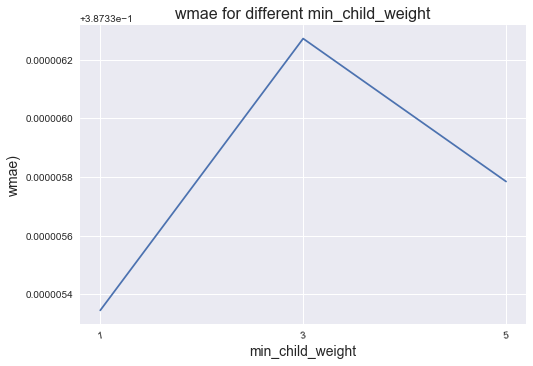

In [15]:
results_min_cw = {}
for i in [1, 3, 5]:
    result = {}
    print('\n\n\n\nrunning while min_cw = {}'.format(i))
    params={'booster': 'gblinear',
        'objective': 'reg:linear',
        'eta': 0.1,
        'depth': 8,
        'subsample': 1.0,
        'min_child_weight': i,
        'col_sample_bytree': 0.2,
        'seed': 0,
        'silent': 1,
        }

    watchlist = [(dataset_val, 'val'),(dataset_train,'train')]
    model = xgb.train(params,dataset_train,num_boost_round=6000,early_stopping_rounds=300,evals=watchlist, feval=wmae_xgb,maximize=False)
    pred_xgb = model.predict(dataset_val)
    
    result['predictions'] = pred_xgb
    result['wmae'] = wmae(y_test, pred_xgb)
    results_min_cw['{}'.format(i)] = result
    
print(results_min_cw)          # 38 negtive rows
plot_results(results_min_cw, 'min_child_weight') 

In [36]:
a = pd.DataFrame(results_min_cw['1']['predictions'])
a[a[0]<0].shape

(16, 1)





running while min_cw = 0.2
[0]	val-wmae:0.685812	train-wmae:0.667264
Multiple eval metrics have been passed: 'train-wmae' will be used for early stopping.

Will train until train-wmae hasn't improved in 300 rounds.
[1]	val-wmae:0.557508	train-wmae:0.542039
[2]	val-wmae:0.519306	train-wmae:0.497378
[3]	val-wmae:0.494693	train-wmae:0.465381
[4]	val-wmae:0.477071	train-wmae:0.440136
[5]	val-wmae:0.463313	train-wmae:0.418985
[6]	val-wmae:0.452451	train-wmae:0.401081
[7]	val-wmae:0.443684	train-wmae:0.385876
[8]	val-wmae:0.436738	train-wmae:0.37304
[9]	val-wmae:0.431149	train-wmae:0.362143
[10]	val-wmae:0.426955	train-wmae:0.35288
[11]	val-wmae:0.423625	train-wmae:0.345019
[12]	val-wmae:0.421102	train-wmae:0.338347
[13]	val-wmae:0.419232	train-wmae:0.332747
[14]	val-wmae:0.417816	train-wmae:0.327928
[15]	val-wmae:0.416805	train-wmae:0.323852
[16]	val-wmae:0.416011	train-wmae:0.320385
[17]	val-wmae:0.415463	train-wmae:0.317483
[18]	val-wmae:0.415067	train-wmae:0.315022
[19]	val-wmae:0.41

[186]	val-wmae:0.40564	train-wmae:0.288188
[187]	val-wmae:0.405599	train-wmae:0.288149
[188]	val-wmae:0.405559	train-wmae:0.288111
[189]	val-wmae:0.405532	train-wmae:0.28808
[190]	val-wmae:0.405502	train-wmae:0.288046
[191]	val-wmae:0.405455	train-wmae:0.288004
[192]	val-wmae:0.405426	train-wmae:0.287971
[193]	val-wmae:0.405377	train-wmae:0.287928
[194]	val-wmae:0.405345	train-wmae:0.287894
[195]	val-wmae:0.405304	train-wmae:0.287856
[196]	val-wmae:0.40527	train-wmae:0.28782
[197]	val-wmae:0.405233	train-wmae:0.287785
[198]	val-wmae:0.405197	train-wmae:0.287749
[199]	val-wmae:0.405162	train-wmae:0.287714
[200]	val-wmae:0.405129	train-wmae:0.28768
[201]	val-wmae:0.405095	train-wmae:0.287645
[202]	val-wmae:0.405061	train-wmae:0.28761
[203]	val-wmae:0.405029	train-wmae:0.287576
[204]	val-wmae:0.404995	train-wmae:0.287543
[205]	val-wmae:0.404962	train-wmae:0.287509
[206]	val-wmae:0.404929	train-wmae:0.287475
[207]	val-wmae:0.404895	train-wmae:0.287441
[208]	val-wmae:0.404863	train-wmae:0.2

[373]	val-wmae:0.400809	train-wmae:0.283822
[374]	val-wmae:0.400791	train-wmae:0.283807
[375]	val-wmae:0.400773	train-wmae:0.283793
[376]	val-wmae:0.400754	train-wmae:0.283778
[377]	val-wmae:0.400736	train-wmae:0.283764
[378]	val-wmae:0.400719	train-wmae:0.28375
[379]	val-wmae:0.400701	train-wmae:0.283736
[380]	val-wmae:0.400683	train-wmae:0.283722
[381]	val-wmae:0.400665	train-wmae:0.283707
[382]	val-wmae:0.400647	train-wmae:0.283693
[383]	val-wmae:0.400628	train-wmae:0.283679
[384]	val-wmae:0.400611	train-wmae:0.283665
[385]	val-wmae:0.400595	train-wmae:0.283652
[386]	val-wmae:0.400577	train-wmae:0.283638
[387]	val-wmae:0.400559	train-wmae:0.283623
[388]	val-wmae:0.400541	train-wmae:0.28361
[389]	val-wmae:0.400523	train-wmae:0.283596
[390]	val-wmae:0.400506	train-wmae:0.283582
[391]	val-wmae:0.400488	train-wmae:0.283568
[392]	val-wmae:0.400472	train-wmae:0.283554
[393]	val-wmae:0.400458	train-wmae:0.283543
[394]	val-wmae:0.400441	train-wmae:0.28353
[395]	val-wmae:0.40042	train-wmae:0

[561]	val-wmae:0.39802	train-wmae:0.281828
[562]	val-wmae:0.398009	train-wmae:0.281821
[563]	val-wmae:0.397997	train-wmae:0.281813
[564]	val-wmae:0.397984	train-wmae:0.281805
[565]	val-wmae:0.397973	train-wmae:0.281797
[566]	val-wmae:0.397961	train-wmae:0.281789
[567]	val-wmae:0.39795	train-wmae:0.281782
[568]	val-wmae:0.397938	train-wmae:0.281774
[569]	val-wmae:0.397926	train-wmae:0.281766
[570]	val-wmae:0.397914	train-wmae:0.281759
[571]	val-wmae:0.397903	train-wmae:0.281751
[572]	val-wmae:0.397891	train-wmae:0.281744
[573]	val-wmae:0.397879	train-wmae:0.281736
[574]	val-wmae:0.397868	train-wmae:0.281728
[575]	val-wmae:0.397857	train-wmae:0.281721
[576]	val-wmae:0.397846	train-wmae:0.281713
[577]	val-wmae:0.397835	train-wmae:0.281706
[578]	val-wmae:0.397823	train-wmae:0.281698
[579]	val-wmae:0.397815	train-wmae:0.281691
[580]	val-wmae:0.397808	train-wmae:0.281686
[581]	val-wmae:0.397794	train-wmae:0.281677
[582]	val-wmae:0.397786	train-wmae:0.281671
[583]	val-wmae:0.397771	train-wmae

[749]	val-wmae:0.396323	train-wmae:0.280669
[750]	val-wmae:0.396316	train-wmae:0.280664
[751]	val-wmae:0.396309	train-wmae:0.28066
[752]	val-wmae:0.396301	train-wmae:0.280655
[753]	val-wmae:0.396293	train-wmae:0.28065
[754]	val-wmae:0.396286	train-wmae:0.280645
[755]	val-wmae:0.396279	train-wmae:0.28064
[756]	val-wmae:0.396271	train-wmae:0.280635
[757]	val-wmae:0.396264	train-wmae:0.28063
[758]	val-wmae:0.396257	train-wmae:0.280625
[759]	val-wmae:0.396249	train-wmae:0.280621
[760]	val-wmae:0.396242	train-wmae:0.280616
[761]	val-wmae:0.396234	train-wmae:0.280611
[762]	val-wmae:0.396228	train-wmae:0.280606
[763]	val-wmae:0.396223	train-wmae:0.280602
[764]	val-wmae:0.396215	train-wmae:0.280597
[765]	val-wmae:0.396207	train-wmae:0.280592
[766]	val-wmae:0.396199	train-wmae:0.280587
[767]	val-wmae:0.396191	train-wmae:0.280582
[768]	val-wmae:0.396186	train-wmae:0.280579
[769]	val-wmae:0.396177	train-wmae:0.280573
[770]	val-wmae:0.39617	train-wmae:0.280568
[771]	val-wmae:0.396163	train-wmae:0.

[937]	val-wmae:0.395135	train-wmae:0.279899
[938]	val-wmae:0.395129	train-wmae:0.279896
[939]	val-wmae:0.395124	train-wmae:0.279893
[940]	val-wmae:0.39512	train-wmae:0.27989
[941]	val-wmae:0.395114	train-wmae:0.279887
[942]	val-wmae:0.395108	train-wmae:0.279883
[943]	val-wmae:0.395103	train-wmae:0.27988
[944]	val-wmae:0.395097	train-wmae:0.279877
[945]	val-wmae:0.395092	train-wmae:0.279873
[946]	val-wmae:0.395087	train-wmae:0.27987
[947]	val-wmae:0.395081	train-wmae:0.279867
[948]	val-wmae:0.395076	train-wmae:0.279863
[949]	val-wmae:0.395071	train-wmae:0.27986
[950]	val-wmae:0.395066	train-wmae:0.279857
[951]	val-wmae:0.39506	train-wmae:0.279854
[952]	val-wmae:0.395056	train-wmae:0.279851
[953]	val-wmae:0.39505	train-wmae:0.279847
[954]	val-wmae:0.395045	train-wmae:0.279844
[955]	val-wmae:0.39504	train-wmae:0.279841
[956]	val-wmae:0.395034	train-wmae:0.279838
[957]	val-wmae:0.395029	train-wmae:0.279834
[958]	val-wmae:0.395024	train-wmae:0.279831
[959]	val-wmae:0.395018	train-wmae:0.279

[1122]	val-wmae:0.394291	train-wmae:0.279361
[1123]	val-wmae:0.394287	train-wmae:0.279359
[1124]	val-wmae:0.394284	train-wmae:0.279357
[1125]	val-wmae:0.39428	train-wmae:0.279354
[1126]	val-wmae:0.394277	train-wmae:0.279352
[1127]	val-wmae:0.394272	train-wmae:0.279349
[1128]	val-wmae:0.394269	train-wmae:0.279347
[1129]	val-wmae:0.394266	train-wmae:0.279345
[1130]	val-wmae:0.394261	train-wmae:0.279341
[1131]	val-wmae:0.394257	train-wmae:0.279339
[1132]	val-wmae:0.394253	train-wmae:0.279336
[1133]	val-wmae:0.394249	train-wmae:0.279333
[1134]	val-wmae:0.394246	train-wmae:0.279331
[1135]	val-wmae:0.394242	train-wmae:0.279329
[1136]	val-wmae:0.394238	train-wmae:0.279326
[1137]	val-wmae:0.394234	train-wmae:0.279324
[1138]	val-wmae:0.394231	train-wmae:0.279321
[1139]	val-wmae:0.394227	train-wmae:0.279319
[1140]	val-wmae:0.394223	train-wmae:0.279316
[1141]	val-wmae:0.39422	train-wmae:0.279314
[1142]	val-wmae:0.394217	train-wmae:0.279311
[1143]	val-wmae:0.394213	train-wmae:0.279309
[1144]	val-w

[1305]	val-wmae:0.393724	train-wmae:0.27895
[1306]	val-wmae:0.393721	train-wmae:0.278948
[1307]	val-wmae:0.393719	train-wmae:0.278946
[1308]	val-wmae:0.393716	train-wmae:0.278944
[1309]	val-wmae:0.393714	train-wmae:0.278942
[1310]	val-wmae:0.393711	train-wmae:0.27894
[1311]	val-wmae:0.393709	train-wmae:0.278938
[1312]	val-wmae:0.393705	train-wmae:0.278936
[1313]	val-wmae:0.393704	train-wmae:0.278934
[1314]	val-wmae:0.393701	train-wmae:0.278932
[1315]	val-wmae:0.393699	train-wmae:0.27893
[1316]	val-wmae:0.393696	train-wmae:0.278928
[1317]	val-wmae:0.393694	train-wmae:0.278926
[1318]	val-wmae:0.393691	train-wmae:0.278925
[1319]	val-wmae:0.393689	train-wmae:0.278923
[1320]	val-wmae:0.393686	train-wmae:0.278921
[1321]	val-wmae:0.393684	train-wmae:0.278919
[1322]	val-wmae:0.393682	train-wmae:0.278917
[1323]	val-wmae:0.393679	train-wmae:0.278915
[1324]	val-wmae:0.393677	train-wmae:0.278913
[1325]	val-wmae:0.393674	train-wmae:0.278911
[1326]	val-wmae:0.393672	train-wmae:0.278909
[1327]	val-wm

[1489]	val-wmae:0.393318	train-wmae:0.278622
[1490]	val-wmae:0.393316	train-wmae:0.278621
[1491]	val-wmae:0.393314	train-wmae:0.278619
[1492]	val-wmae:0.393312	train-wmae:0.278618
[1493]	val-wmae:0.39331	train-wmae:0.278616
[1494]	val-wmae:0.393309	train-wmae:0.278614
[1495]	val-wmae:0.393308	train-wmae:0.278613
[1496]	val-wmae:0.393306	train-wmae:0.278612
[1497]	val-wmae:0.393303	train-wmae:0.27861
[1498]	val-wmae:0.393301	train-wmae:0.278608
[1499]	val-wmae:0.393299	train-wmae:0.278607
[1500]	val-wmae:0.393297	train-wmae:0.278605
[1501]	val-wmae:0.393295	train-wmae:0.278603
[1502]	val-wmae:0.393293	train-wmae:0.278602
[1503]	val-wmae:0.393291	train-wmae:0.2786
[1504]	val-wmae:0.393289	train-wmae:0.278599
[1505]	val-wmae:0.393288	train-wmae:0.278597
[1506]	val-wmae:0.393286	train-wmae:0.278596
[1507]	val-wmae:0.393284	train-wmae:0.278594
[1508]	val-wmae:0.393282	train-wmae:0.278593
[1509]	val-wmae:0.39328	train-wmae:0.278591
[1510]	val-wmae:0.393278	train-wmae:0.278589
[1511]	val-wmae

[1672]	val-wmae:0.392997	train-wmae:0.278355
[1673]	val-wmae:0.392995	train-wmae:0.278353
[1674]	val-wmae:0.392994	train-wmae:0.278352
[1675]	val-wmae:0.392992	train-wmae:0.278351
[1676]	val-wmae:0.392991	train-wmae:0.278349
[1677]	val-wmae:0.392989	train-wmae:0.278348
[1678]	val-wmae:0.392988	train-wmae:0.278347
[1679]	val-wmae:0.392986	train-wmae:0.278345
[1680]	val-wmae:0.392985	train-wmae:0.278344
[1681]	val-wmae:0.392983	train-wmae:0.278343
[1682]	val-wmae:0.392982	train-wmae:0.278342
[1683]	val-wmae:0.39298	train-wmae:0.27834
[1684]	val-wmae:0.392979	train-wmae:0.278339
[1685]	val-wmae:0.392978	train-wmae:0.278337
[1686]	val-wmae:0.392976	train-wmae:0.278336
[1687]	val-wmae:0.392975	train-wmae:0.278335
[1688]	val-wmae:0.392973	train-wmae:0.278334
[1689]	val-wmae:0.392972	train-wmae:0.278332
[1690]	val-wmae:0.39297	train-wmae:0.278331
[1691]	val-wmae:0.392968	train-wmae:0.27833
[1692]	val-wmae:0.392967	train-wmae:0.278328
[1693]	val-wmae:0.392966	train-wmae:0.278327
[1694]	val-wma

[1855]	val-wmae:0.392748	train-wmae:0.278132
[1856]	val-wmae:0.392747	train-wmae:0.278131
[1857]	val-wmae:0.392746	train-wmae:0.27813
[1858]	val-wmae:0.392744	train-wmae:0.278129
[1859]	val-wmae:0.392743	train-wmae:0.278128
[1860]	val-wmae:0.392742	train-wmae:0.278127
[1861]	val-wmae:0.392741	train-wmae:0.278126
[1862]	val-wmae:0.39274	train-wmae:0.278125
[1863]	val-wmae:0.392738	train-wmae:0.278124
[1864]	val-wmae:0.392737	train-wmae:0.278122
[1865]	val-wmae:0.392736	train-wmae:0.278121
[1866]	val-wmae:0.392735	train-wmae:0.27812
[1867]	val-wmae:0.392734	train-wmae:0.278119
[1868]	val-wmae:0.392732	train-wmae:0.278118
[1869]	val-wmae:0.392731	train-wmae:0.278117
[1870]	val-wmae:0.39273	train-wmae:0.278116
[1871]	val-wmae:0.392729	train-wmae:0.278115
[1872]	val-wmae:0.392728	train-wmae:0.278114
[1873]	val-wmae:0.392726	train-wmae:0.278113
[1874]	val-wmae:0.392725	train-wmae:0.278112
[1875]	val-wmae:0.392724	train-wmae:0.278111
[1876]	val-wmae:0.392723	train-wmae:0.278109
[1877]	val-wma

[2038]	val-wmae:0.392546	train-wmae:0.277949
[2039]	val-wmae:0.392545	train-wmae:0.277948
[2040]	val-wmae:0.392544	train-wmae:0.277947
[2041]	val-wmae:0.392543	train-wmae:0.277946
[2042]	val-wmae:0.392542	train-wmae:0.277945
[2043]	val-wmae:0.392541	train-wmae:0.277944
[2044]	val-wmae:0.39254	train-wmae:0.277943
[2045]	val-wmae:0.392539	train-wmae:0.277942
[2046]	val-wmae:0.392538	train-wmae:0.277941
[2047]	val-wmae:0.392537	train-wmae:0.27794
[2048]	val-wmae:0.392536	train-wmae:0.27794
[2049]	val-wmae:0.392535	train-wmae:0.277939
[2050]	val-wmae:0.392534	train-wmae:0.277938
[2051]	val-wmae:0.392533	train-wmae:0.277937
[2052]	val-wmae:0.392532	train-wmae:0.277936
[2053]	val-wmae:0.392531	train-wmae:0.277935
[2054]	val-wmae:0.39253	train-wmae:0.277934
[2055]	val-wmae:0.392529	train-wmae:0.277933
[2056]	val-wmae:0.392528	train-wmae:0.277932
[2057]	val-wmae:0.392528	train-wmae:0.277931
[2058]	val-wmae:0.392526	train-wmae:0.277931
[2059]	val-wmae:0.392525	train-wmae:0.27793
[2060]	val-wmae

[2221]	val-wmae:0.39238	train-wmae:0.277799
[2222]	val-wmae:0.392379	train-wmae:0.277798
[2223]	val-wmae:0.392379	train-wmae:0.277797
[2224]	val-wmae:0.392378	train-wmae:0.277796
[2225]	val-wmae:0.392377	train-wmae:0.277796
[2226]	val-wmae:0.392376	train-wmae:0.277795
[2227]	val-wmae:0.392375	train-wmae:0.277794
[2228]	val-wmae:0.392374	train-wmae:0.277794
[2229]	val-wmae:0.392374	train-wmae:0.277793
[2230]	val-wmae:0.392373	train-wmae:0.277792
[2231]	val-wmae:0.392372	train-wmae:0.277791
[2232]	val-wmae:0.392371	train-wmae:0.277791
[2233]	val-wmae:0.39237	train-wmae:0.27779
[2234]	val-wmae:0.392369	train-wmae:0.277789
[2235]	val-wmae:0.392369	train-wmae:0.277788
[2236]	val-wmae:0.392368	train-wmae:0.277788
[2237]	val-wmae:0.392367	train-wmae:0.277787
[2238]	val-wmae:0.392366	train-wmae:0.277786
[2239]	val-wmae:0.392365	train-wmae:0.277785
[2240]	val-wmae:0.392365	train-wmae:0.277785
[2241]	val-wmae:0.392364	train-wmae:0.277784
[2242]	val-wmae:0.392363	train-wmae:0.277783
[2243]	val-wm

[2404]	val-wmae:0.392245	train-wmae:0.277673
[2405]	val-wmae:0.392244	train-wmae:0.277672
[2406]	val-wmae:0.392243	train-wmae:0.277672
[2407]	val-wmae:0.392243	train-wmae:0.277671
[2408]	val-wmae:0.392242	train-wmae:0.27767
[2409]	val-wmae:0.392242	train-wmae:0.27767
[2410]	val-wmae:0.392241	train-wmae:0.277669
[2411]	val-wmae:0.39224	train-wmae:0.277668
[2412]	val-wmae:0.392239	train-wmae:0.277668
[2413]	val-wmae:0.392239	train-wmae:0.277667
[2414]	val-wmae:0.392238	train-wmae:0.277667
[2415]	val-wmae:0.392237	train-wmae:0.277666
[2416]	val-wmae:0.392237	train-wmae:0.277665
[2417]	val-wmae:0.392236	train-wmae:0.277665
[2418]	val-wmae:0.392235	train-wmae:0.277664
[2419]	val-wmae:0.392235	train-wmae:0.277664
[2420]	val-wmae:0.392234	train-wmae:0.277663
[2421]	val-wmae:0.392234	train-wmae:0.277662
[2422]	val-wmae:0.392233	train-wmae:0.277662
[2423]	val-wmae:0.392232	train-wmae:0.277661
[2424]	val-wmae:0.392232	train-wmae:0.27766
[2425]	val-wmae:0.392231	train-wmae:0.27766
[2426]	val-wmae

[2587]	val-wmae:0.392134	train-wmae:0.277564
[2588]	val-wmae:0.392134	train-wmae:0.277564
[2589]	val-wmae:0.392133	train-wmae:0.277563
[2590]	val-wmae:0.392132	train-wmae:0.277563
[2591]	val-wmae:0.392132	train-wmae:0.277562
[2592]	val-wmae:0.392131	train-wmae:0.277562
[2593]	val-wmae:0.392131	train-wmae:0.277562
[2594]	val-wmae:0.39213	train-wmae:0.277561
[2595]	val-wmae:0.39213	train-wmae:0.277561
[2596]	val-wmae:0.392129	train-wmae:0.27756
[2597]	val-wmae:0.392129	train-wmae:0.277559
[2598]	val-wmae:0.392128	train-wmae:0.277559
[2599]	val-wmae:0.392128	train-wmae:0.277558
[2600]	val-wmae:0.392127	train-wmae:0.277558
[2601]	val-wmae:0.392126	train-wmae:0.277557
[2602]	val-wmae:0.392126	train-wmae:0.277557
[2603]	val-wmae:0.392125	train-wmae:0.277556
[2604]	val-wmae:0.392125	train-wmae:0.277556
[2605]	val-wmae:0.392124	train-wmae:0.277555
[2606]	val-wmae:0.392124	train-wmae:0.277555
[2607]	val-wmae:0.392123	train-wmae:0.277554
[2608]	val-wmae:0.392123	train-wmae:0.277554
[2609]	val-wm

[2770]	val-wmae:0.39204	train-wmae:0.277475
[2771]	val-wmae:0.392039	train-wmae:0.277474
[2772]	val-wmae:0.392039	train-wmae:0.277474
[2773]	val-wmae:0.392038	train-wmae:0.277473
[2774]	val-wmae:0.392038	train-wmae:0.277473
[2775]	val-wmae:0.392038	train-wmae:0.277472
[2776]	val-wmae:0.392037	train-wmae:0.277472
[2777]	val-wmae:0.392036	train-wmae:0.277471
[2778]	val-wmae:0.392036	train-wmae:0.277471
[2779]	val-wmae:0.392035	train-wmae:0.27747
[2780]	val-wmae:0.392035	train-wmae:0.27747
[2781]	val-wmae:0.392035	train-wmae:0.27747
[2782]	val-wmae:0.392034	train-wmae:0.277469
[2783]	val-wmae:0.392034	train-wmae:0.277469
[2784]	val-wmae:0.392033	train-wmae:0.277468
[2785]	val-wmae:0.392033	train-wmae:0.277468
[2786]	val-wmae:0.392032	train-wmae:0.277467
[2787]	val-wmae:0.392032	train-wmae:0.277467
[2788]	val-wmae:0.392031	train-wmae:0.277466
[2789]	val-wmae:0.392031	train-wmae:0.277466
[2790]	val-wmae:0.39203	train-wmae:0.277466
[2791]	val-wmae:0.39203	train-wmae:0.277465
[2792]	val-wmae:

[2954]	val-wmae:0.391958	train-wmae:0.277396
[2955]	val-wmae:0.391958	train-wmae:0.277395
[2956]	val-wmae:0.391957	train-wmae:0.277395
[2957]	val-wmae:0.391957	train-wmae:0.277395
[2958]	val-wmae:0.391957	train-wmae:0.277394
[2959]	val-wmae:0.391956	train-wmae:0.277394
[2960]	val-wmae:0.391956	train-wmae:0.277393
[2961]	val-wmae:0.391955	train-wmae:0.277393
[2962]	val-wmae:0.391955	train-wmae:0.277393
[2963]	val-wmae:0.391955	train-wmae:0.277392
[2964]	val-wmae:0.391954	train-wmae:0.277392
[2965]	val-wmae:0.391954	train-wmae:0.277391
[2966]	val-wmae:0.391953	train-wmae:0.277391
[2967]	val-wmae:0.391953	train-wmae:0.277391
[2968]	val-wmae:0.391952	train-wmae:0.27739
[2969]	val-wmae:0.391952	train-wmae:0.27739
[2970]	val-wmae:0.391952	train-wmae:0.27739
[2971]	val-wmae:0.391951	train-wmae:0.277389
[2972]	val-wmae:0.391951	train-wmae:0.277389
[2973]	val-wmae:0.39195	train-wmae:0.277388
[2974]	val-wmae:0.39195	train-wmae:0.277388
[2975]	val-wmae:0.39195	train-wmae:0.277388
[2976]	val-wmae:

[3137]	val-wmae:0.391888	train-wmae:0.27733
[3138]	val-wmae:0.391887	train-wmae:0.27733
[3139]	val-wmae:0.391887	train-wmae:0.27733
[3140]	val-wmae:0.391886	train-wmae:0.277329
[3141]	val-wmae:0.391886	train-wmae:0.277329
[3142]	val-wmae:0.391886	train-wmae:0.277329
[3143]	val-wmae:0.391885	train-wmae:0.277328
[3144]	val-wmae:0.391885	train-wmae:0.277328
[3145]	val-wmae:0.391885	train-wmae:0.277328
[3146]	val-wmae:0.391885	train-wmae:0.277327
[3147]	val-wmae:0.391884	train-wmae:0.277327
[3148]	val-wmae:0.391884	train-wmae:0.277327
[3149]	val-wmae:0.391884	train-wmae:0.277326
[3150]	val-wmae:0.391883	train-wmae:0.277326
[3151]	val-wmae:0.391883	train-wmae:0.277326
[3152]	val-wmae:0.391882	train-wmae:0.277325
[3153]	val-wmae:0.391882	train-wmae:0.277325
[3154]	val-wmae:0.391882	train-wmae:0.277325
[3155]	val-wmae:0.391881	train-wmae:0.277324
[3156]	val-wmae:0.391881	train-wmae:0.277324
[3157]	val-wmae:0.39188	train-wmae:0.277324
[3158]	val-wmae:0.39188	train-wmae:0.277323
[3159]	val-wmae

[3320]	val-wmae:0.391826	train-wmae:0.277275
[3321]	val-wmae:0.391826	train-wmae:0.277275
[3322]	val-wmae:0.391825	train-wmae:0.277275
[3323]	val-wmae:0.391825	train-wmae:0.277274
[3324]	val-wmae:0.391825	train-wmae:0.277274
[3325]	val-wmae:0.391824	train-wmae:0.277274
[3326]	val-wmae:0.391824	train-wmae:0.277274
[3327]	val-wmae:0.391824	train-wmae:0.277273
[3328]	val-wmae:0.391824	train-wmae:0.277273
[3329]	val-wmae:0.391823	train-wmae:0.277273
[3330]	val-wmae:0.391823	train-wmae:0.277272
[3331]	val-wmae:0.391823	train-wmae:0.277272
[3332]	val-wmae:0.391822	train-wmae:0.277272
[3333]	val-wmae:0.391822	train-wmae:0.277272
[3334]	val-wmae:0.391822	train-wmae:0.277271
[3335]	val-wmae:0.391821	train-wmae:0.277271
[3336]	val-wmae:0.391821	train-wmae:0.277271
[3337]	val-wmae:0.391821	train-wmae:0.27727
[3338]	val-wmae:0.39182	train-wmae:0.27727
[3339]	val-wmae:0.39182	train-wmae:0.27727
[3340]	val-wmae:0.39182	train-wmae:0.27727
[3341]	val-wmae:0.391819	train-wmae:0.277269
[3342]	val-wmae:0

[3503]	val-wmae:0.391771	train-wmae:0.277227
[3504]	val-wmae:0.39177	train-wmae:0.277226
[3505]	val-wmae:0.39177	train-wmae:0.277226
[3506]	val-wmae:0.39177	train-wmae:0.277226
[3507]	val-wmae:0.39177	train-wmae:0.277226
[3508]	val-wmae:0.391769	train-wmae:0.277225
[3509]	val-wmae:0.391769	train-wmae:0.277225
[3510]	val-wmae:0.391769	train-wmae:0.277225
[3511]	val-wmae:0.391769	train-wmae:0.277225
[3512]	val-wmae:0.391768	train-wmae:0.277224
[3513]	val-wmae:0.391768	train-wmae:0.277224
[3514]	val-wmae:0.391768	train-wmae:0.277224
[3515]	val-wmae:0.391768	train-wmae:0.277224
[3516]	val-wmae:0.391767	train-wmae:0.277223
[3517]	val-wmae:0.391767	train-wmae:0.277223
[3518]	val-wmae:0.391767	train-wmae:0.277223
[3519]	val-wmae:0.391766	train-wmae:0.277223
[3520]	val-wmae:0.391766	train-wmae:0.277222
[3521]	val-wmae:0.391766	train-wmae:0.277222
[3522]	val-wmae:0.391765	train-wmae:0.277222
[3523]	val-wmae:0.391765	train-wmae:0.277222
[3524]	val-wmae:0.391765	train-wmae:0.277221
[3525]	val-wma

[3686]	val-wmae:0.391722	train-wmae:0.277183
[3687]	val-wmae:0.391722	train-wmae:0.277183
[3688]	val-wmae:0.391722	train-wmae:0.277183
[3689]	val-wmae:0.391721	train-wmae:0.277183
[3690]	val-wmae:0.391721	train-wmae:0.277182
[3691]	val-wmae:0.391721	train-wmae:0.277182
[3692]	val-wmae:0.391721	train-wmae:0.277182
[3693]	val-wmae:0.391721	train-wmae:0.277182
[3694]	val-wmae:0.39172	train-wmae:0.277181
[3695]	val-wmae:0.39172	train-wmae:0.277181
[3696]	val-wmae:0.39172	train-wmae:0.277181
[3697]	val-wmae:0.39172	train-wmae:0.277181
[3698]	val-wmae:0.391719	train-wmae:0.277181
[3699]	val-wmae:0.391719	train-wmae:0.27718
[3700]	val-wmae:0.391719	train-wmae:0.27718
[3701]	val-wmae:0.391719	train-wmae:0.27718
[3702]	val-wmae:0.391718	train-wmae:0.27718
[3703]	val-wmae:0.391718	train-wmae:0.27718
[3704]	val-wmae:0.391718	train-wmae:0.277179
[3705]	val-wmae:0.391718	train-wmae:0.277179
[3706]	val-wmae:0.391717	train-wmae:0.277179
[3707]	val-wmae:0.391717	train-wmae:0.277179
[3708]	val-wmae:0.3

[3870]	val-wmae:0.391679	train-wmae:0.277145
[3871]	val-wmae:0.391679	train-wmae:0.277145
[3872]	val-wmae:0.391679	train-wmae:0.277144
[3873]	val-wmae:0.391679	train-wmae:0.277144
[3874]	val-wmae:0.391678	train-wmae:0.277144
[3875]	val-wmae:0.391678	train-wmae:0.277144
[3876]	val-wmae:0.391678	train-wmae:0.277143
[3877]	val-wmae:0.391678	train-wmae:0.277143
[3878]	val-wmae:0.391678	train-wmae:0.277143
[3879]	val-wmae:0.391677	train-wmae:0.277143
[3880]	val-wmae:0.391677	train-wmae:0.277143
[3881]	val-wmae:0.391677	train-wmae:0.277143
[3882]	val-wmae:0.391677	train-wmae:0.277142
[3883]	val-wmae:0.391676	train-wmae:0.277142
[3884]	val-wmae:0.391676	train-wmae:0.277142
[3885]	val-wmae:0.391676	train-wmae:0.277142
[3886]	val-wmae:0.391676	train-wmae:0.277142
[3887]	val-wmae:0.391676	train-wmae:0.277141
[3888]	val-wmae:0.391675	train-wmae:0.277141
[3889]	val-wmae:0.391675	train-wmae:0.277141
[3890]	val-wmae:0.391675	train-wmae:0.277141
[3891]	val-wmae:0.391675	train-wmae:0.277141
[3892]	val

[4053]	val-wmae:0.39164	train-wmae:0.277111
[4054]	val-wmae:0.39164	train-wmae:0.27711
[4055]	val-wmae:0.39164	train-wmae:0.27711
[4056]	val-wmae:0.39164	train-wmae:0.27711
[4057]	val-wmae:0.39164	train-wmae:0.27711
[4058]	val-wmae:0.391639	train-wmae:0.27711
[4059]	val-wmae:0.391639	train-wmae:0.27711
[4060]	val-wmae:0.391639	train-wmae:0.277109
[4061]	val-wmae:0.391639	train-wmae:0.277109
[4062]	val-wmae:0.391639	train-wmae:0.277109
[4063]	val-wmae:0.391638	train-wmae:0.277109
[4064]	val-wmae:0.391638	train-wmae:0.277109
[4065]	val-wmae:0.391638	train-wmae:0.277109
[4066]	val-wmae:0.391638	train-wmae:0.277108
[4067]	val-wmae:0.391638	train-wmae:0.277108
[4068]	val-wmae:0.391637	train-wmae:0.277108
[4069]	val-wmae:0.391637	train-wmae:0.277108
[4070]	val-wmae:0.391637	train-wmae:0.277108
[4071]	val-wmae:0.391637	train-wmae:0.277107
[4072]	val-wmae:0.391637	train-wmae:0.277107
[4073]	val-wmae:0.391636	train-wmae:0.277107
[4074]	val-wmae:0.391636	train-wmae:0.277107
[4075]	val-wmae:0.391

[4237]	val-wmae:0.391605	train-wmae:0.27708
[4238]	val-wmae:0.391605	train-wmae:0.27708
[4239]	val-wmae:0.391605	train-wmae:0.27708
[4240]	val-wmae:0.391605	train-wmae:0.27708
[4241]	val-wmae:0.391604	train-wmae:0.27708
[4242]	val-wmae:0.391604	train-wmae:0.277079
[4243]	val-wmae:0.391604	train-wmae:0.277079
[4244]	val-wmae:0.391604	train-wmae:0.277079
[4245]	val-wmae:0.391604	train-wmae:0.277079
[4246]	val-wmae:0.391603	train-wmae:0.277079
[4247]	val-wmae:0.391604	train-wmae:0.277079
[4248]	val-wmae:0.391603	train-wmae:0.277079
[4249]	val-wmae:0.391603	train-wmae:0.277078
[4250]	val-wmae:0.391603	train-wmae:0.277078
[4251]	val-wmae:0.391602	train-wmae:0.277078
[4252]	val-wmae:0.391602	train-wmae:0.277078
[4253]	val-wmae:0.391602	train-wmae:0.277078
[4254]	val-wmae:0.391602	train-wmae:0.277078
[4255]	val-wmae:0.391602	train-wmae:0.277077
[4256]	val-wmae:0.391602	train-wmae:0.277077
[4257]	val-wmae:0.391601	train-wmae:0.277077
[4258]	val-wmae:0.391601	train-wmae:0.277077
[4259]	val-wmae

[4421]	val-wmae:0.391572	train-wmae:0.277053
[4422]	val-wmae:0.391572	train-wmae:0.277053
[4423]	val-wmae:0.391572	train-wmae:0.277053
[4424]	val-wmae:0.391572	train-wmae:0.277053
[4425]	val-wmae:0.391572	train-wmae:0.277053
[4426]	val-wmae:0.391572	train-wmae:0.277052
[4427]	val-wmae:0.391572	train-wmae:0.277052
[4428]	val-wmae:0.391571	train-wmae:0.277052
[4429]	val-wmae:0.391571	train-wmae:0.277052
[4430]	val-wmae:0.391571	train-wmae:0.277052
[4431]	val-wmae:0.391571	train-wmae:0.277052
[4432]	val-wmae:0.391571	train-wmae:0.277052
[4433]	val-wmae:0.391571	train-wmae:0.277051
[4434]	val-wmae:0.39157	train-wmae:0.277051
[4435]	val-wmae:0.39157	train-wmae:0.277051
[4436]	val-wmae:0.39157	train-wmae:0.277051
[4437]	val-wmae:0.39157	train-wmae:0.277051
[4438]	val-wmae:0.39157	train-wmae:0.277051
[4439]	val-wmae:0.391569	train-wmae:0.277051
[4440]	val-wmae:0.391569	train-wmae:0.27705
[4441]	val-wmae:0.391569	train-wmae:0.27705
[4442]	val-wmae:0.391569	train-wmae:0.27705
[4443]	val-wmae:0.

[4604]	val-wmae:0.391543	train-wmae:0.27703
[4605]	val-wmae:0.391543	train-wmae:0.27703
[4606]	val-wmae:0.391543	train-wmae:0.277029
[4607]	val-wmae:0.391542	train-wmae:0.277029
[4608]	val-wmae:0.391542	train-wmae:0.277029
[4609]	val-wmae:0.391542	train-wmae:0.277029
[4610]	val-wmae:0.391542	train-wmae:0.277029
[4611]	val-wmae:0.391542	train-wmae:0.277029
[4612]	val-wmae:0.391542	train-wmae:0.277029
[4613]	val-wmae:0.391542	train-wmae:0.277029
[4614]	val-wmae:0.391541	train-wmae:0.277029
[4615]	val-wmae:0.391541	train-wmae:0.277028
[4616]	val-wmae:0.391541	train-wmae:0.277028
[4617]	val-wmae:0.391541	train-wmae:0.277028
[4618]	val-wmae:0.391541	train-wmae:0.277028
[4619]	val-wmae:0.391541	train-wmae:0.277028
[4620]	val-wmae:0.39154	train-wmae:0.277028
[4621]	val-wmae:0.39154	train-wmae:0.277028
[4622]	val-wmae:0.39154	train-wmae:0.277028
[4623]	val-wmae:0.39154	train-wmae:0.277027
[4624]	val-wmae:0.39154	train-wmae:0.277027
[4625]	val-wmae:0.39154	train-wmae:0.277027
[4626]	val-wmae:0.

[4787]	val-wmae:0.391516	train-wmae:0.277009
[4788]	val-wmae:0.391516	train-wmae:0.277009
[4789]	val-wmae:0.391516	train-wmae:0.277008
[4790]	val-wmae:0.391516	train-wmae:0.277008
[4791]	val-wmae:0.391516	train-wmae:0.277008
[4792]	val-wmae:0.391515	train-wmae:0.277008
[4793]	val-wmae:0.391515	train-wmae:0.277008
[4794]	val-wmae:0.391515	train-wmae:0.277008
[4795]	val-wmae:0.391515	train-wmae:0.277008
[4796]	val-wmae:0.391515	train-wmae:0.277008
[4797]	val-wmae:0.391515	train-wmae:0.277008
[4798]	val-wmae:0.391515	train-wmae:0.277007
[4799]	val-wmae:0.391514	train-wmae:0.277007
[4800]	val-wmae:0.391514	train-wmae:0.277007
[4801]	val-wmae:0.391514	train-wmae:0.277007
[4802]	val-wmae:0.391514	train-wmae:0.277007
[4803]	val-wmae:0.391514	train-wmae:0.277007
[4804]	val-wmae:0.391514	train-wmae:0.277007
[4805]	val-wmae:0.391513	train-wmae:0.277007
[4806]	val-wmae:0.391513	train-wmae:0.277007
[4807]	val-wmae:0.391513	train-wmae:0.277007
[4808]	val-wmae:0.391513	train-wmae:0.277006
[4809]	val

[4971]	val-wmae:0.391491	train-wmae:0.276989
[4972]	val-wmae:0.391491	train-wmae:0.276989
[4973]	val-wmae:0.391491	train-wmae:0.276989
[4974]	val-wmae:0.391491	train-wmae:0.276989
[4975]	val-wmae:0.391491	train-wmae:0.276989
[4976]	val-wmae:0.39149	train-wmae:0.276989
[4977]	val-wmae:0.39149	train-wmae:0.276989
[4978]	val-wmae:0.39149	train-wmae:0.276989
[4979]	val-wmae:0.39149	train-wmae:0.276988
[4980]	val-wmae:0.39149	train-wmae:0.276988
[4981]	val-wmae:0.39149	train-wmae:0.276988
[4982]	val-wmae:0.39149	train-wmae:0.276988
[4983]	val-wmae:0.39149	train-wmae:0.276988
[4984]	val-wmae:0.391489	train-wmae:0.276988
[4985]	val-wmae:0.391489	train-wmae:0.276988
[4986]	val-wmae:0.391489	train-wmae:0.276988
[4987]	val-wmae:0.391489	train-wmae:0.276988
[4988]	val-wmae:0.391489	train-wmae:0.276988
[4989]	val-wmae:0.391489	train-wmae:0.276987
[4990]	val-wmae:0.391489	train-wmae:0.276987
[4991]	val-wmae:0.391489	train-wmae:0.276987
[4992]	val-wmae:0.391488	train-wmae:0.276987
[4993]	val-wmae:0.

[5154]	val-wmae:0.391468	train-wmae:0.276971
[5155]	val-wmae:0.391468	train-wmae:0.276971
[5156]	val-wmae:0.391468	train-wmae:0.276971
[5157]	val-wmae:0.391468	train-wmae:0.276971
[5158]	val-wmae:0.391468	train-wmae:0.276971
[5159]	val-wmae:0.391468	train-wmae:0.276971
[5160]	val-wmae:0.391468	train-wmae:0.276971
[5161]	val-wmae:0.391467	train-wmae:0.276971
[5162]	val-wmae:0.391467	train-wmae:0.276971
[5163]	val-wmae:0.391467	train-wmae:0.276971
[5164]	val-wmae:0.391467	train-wmae:0.276971
[5165]	val-wmae:0.391467	train-wmae:0.27697
[5166]	val-wmae:0.391467	train-wmae:0.27697
[5167]	val-wmae:0.391467	train-wmae:0.27697
[5168]	val-wmae:0.391467	train-wmae:0.27697
[5169]	val-wmae:0.391466	train-wmae:0.27697
[5170]	val-wmae:0.391466	train-wmae:0.27697
[5171]	val-wmae:0.391466	train-wmae:0.27697
[5172]	val-wmae:0.391466	train-wmae:0.27697
[5173]	val-wmae:0.391466	train-wmae:0.27697
[5174]	val-wmae:0.391466	train-wmae:0.27697
[5175]	val-wmae:0.391466	train-wmae:0.27697
[5176]	val-wmae:0.391

[5337]	val-wmae:0.391447	train-wmae:0.276955
[5338]	val-wmae:0.391447	train-wmae:0.276955
[5339]	val-wmae:0.391447	train-wmae:0.276955
[5340]	val-wmae:0.391447	train-wmae:0.276955
[5341]	val-wmae:0.391447	train-wmae:0.276954
[5342]	val-wmae:0.391446	train-wmae:0.276954
[5343]	val-wmae:0.391446	train-wmae:0.276954
[5344]	val-wmae:0.391446	train-wmae:0.276954
[5345]	val-wmae:0.391446	train-wmae:0.276954
[5346]	val-wmae:0.391446	train-wmae:0.276954
[5347]	val-wmae:0.391446	train-wmae:0.276954
[5348]	val-wmae:0.391446	train-wmae:0.276954
[5349]	val-wmae:0.391446	train-wmae:0.276954
[5350]	val-wmae:0.391446	train-wmae:0.276954
[5351]	val-wmae:0.391445	train-wmae:0.276954
[5352]	val-wmae:0.391445	train-wmae:0.276953
[5353]	val-wmae:0.391445	train-wmae:0.276953
[5354]	val-wmae:0.391445	train-wmae:0.276953
[5355]	val-wmae:0.391445	train-wmae:0.276953
[5356]	val-wmae:0.391445	train-wmae:0.276953
[5357]	val-wmae:0.391445	train-wmae:0.276953
[5358]	val-wmae:0.391445	train-wmae:0.276953
[5359]	val

[5520]	val-wmae:0.391427	train-wmae:0.276939
[5521]	val-wmae:0.391427	train-wmae:0.276939
[5522]	val-wmae:0.391427	train-wmae:0.276939
[5523]	val-wmae:0.391427	train-wmae:0.276939
[5524]	val-wmae:0.391427	train-wmae:0.276939
[5525]	val-wmae:0.391427	train-wmae:0.276939
[5526]	val-wmae:0.391427	train-wmae:0.276939
[5527]	val-wmae:0.391426	train-wmae:0.276939
[5528]	val-wmae:0.391426	train-wmae:0.276939
[5529]	val-wmae:0.391426	train-wmae:0.276939
[5530]	val-wmae:0.391426	train-wmae:0.276939
[5531]	val-wmae:0.391426	train-wmae:0.276938
[5532]	val-wmae:0.391426	train-wmae:0.276938
[5533]	val-wmae:0.391426	train-wmae:0.276938
[5534]	val-wmae:0.391426	train-wmae:0.276938
[5535]	val-wmae:0.391426	train-wmae:0.276938
[5536]	val-wmae:0.391426	train-wmae:0.276938
[5537]	val-wmae:0.391425	train-wmae:0.276938
[5538]	val-wmae:0.391425	train-wmae:0.276938
[5539]	val-wmae:0.391425	train-wmae:0.276938
[5540]	val-wmae:0.391425	train-wmae:0.276938
[5541]	val-wmae:0.391425	train-wmae:0.276938
[5542]	val

[5703]	val-wmae:0.391409	train-wmae:0.276925
[5704]	val-wmae:0.391409	train-wmae:0.276925
[5705]	val-wmae:0.391409	train-wmae:0.276925
[5706]	val-wmae:0.391408	train-wmae:0.276925
[5707]	val-wmae:0.391408	train-wmae:0.276925
[5708]	val-wmae:0.391408	train-wmae:0.276924
[5709]	val-wmae:0.391408	train-wmae:0.276924
[5710]	val-wmae:0.391408	train-wmae:0.276924
[5711]	val-wmae:0.391408	train-wmae:0.276924
[5712]	val-wmae:0.391408	train-wmae:0.276924
[5713]	val-wmae:0.391408	train-wmae:0.276924
[5714]	val-wmae:0.391408	train-wmae:0.276924
[5715]	val-wmae:0.391407	train-wmae:0.276924
[5716]	val-wmae:0.391408	train-wmae:0.276924
[5717]	val-wmae:0.391407	train-wmae:0.276924
[5718]	val-wmae:0.391407	train-wmae:0.276924
[5719]	val-wmae:0.391407	train-wmae:0.276924
[5720]	val-wmae:0.391407	train-wmae:0.276924
[5721]	val-wmae:0.391407	train-wmae:0.276924
[5722]	val-wmae:0.391407	train-wmae:0.276924
[5723]	val-wmae:0.391407	train-wmae:0.276924
[5724]	val-wmae:0.391407	train-wmae:0.276923
[5725]	val

[5886]	val-wmae:0.391392	train-wmae:0.276912
[5887]	val-wmae:0.391391	train-wmae:0.276912
[5888]	val-wmae:0.391391	train-wmae:0.276912
[5889]	val-wmae:0.391391	train-wmae:0.276912
[5890]	val-wmae:0.391391	train-wmae:0.276911
[5891]	val-wmae:0.391391	train-wmae:0.276911
[5892]	val-wmae:0.391391	train-wmae:0.276911
[5893]	val-wmae:0.391391	train-wmae:0.276911
[5894]	val-wmae:0.391391	train-wmae:0.276911
[5895]	val-wmae:0.391391	train-wmae:0.276911
[5896]	val-wmae:0.391391	train-wmae:0.276911
[5897]	val-wmae:0.391391	train-wmae:0.276911
[5898]	val-wmae:0.39139	train-wmae:0.276911
[5899]	val-wmae:0.39139	train-wmae:0.276911
[5900]	val-wmae:0.39139	train-wmae:0.276911
[5901]	val-wmae:0.39139	train-wmae:0.276911
[5902]	val-wmae:0.39139	train-wmae:0.276911
[5903]	val-wmae:0.39139	train-wmae:0.276911
[5904]	val-wmae:0.39139	train-wmae:0.27691
[5905]	val-wmae:0.39139	train-wmae:0.27691
[5906]	val-wmae:0.39139	train-wmae:0.27691
[5907]	val-wmae:0.39139	train-wmae:0.27691
[5908]	val-wmae:0.39139	

[69]	val-wmae:0.413801	train-wmae:0.297403
[70]	val-wmae:0.413681	train-wmae:0.297259
[71]	val-wmae:0.413572	train-wmae:0.297124
[72]	val-wmae:0.413466	train-wmae:0.296992
[73]	val-wmae:0.413364	train-wmae:0.296862
[74]	val-wmae:0.413266	train-wmae:0.296735
[75]	val-wmae:0.413166	train-wmae:0.296608
[76]	val-wmae:0.413069	train-wmae:0.296484
[77]	val-wmae:0.412972	train-wmae:0.296364
[78]	val-wmae:0.412876	train-wmae:0.296244
[79]	val-wmae:0.412789	train-wmae:0.29613
[80]	val-wmae:0.412696	train-wmae:0.296013
[81]	val-wmae:0.412604	train-wmae:0.295898
[82]	val-wmae:0.412517	train-wmae:0.295787
[83]	val-wmae:0.412429	train-wmae:0.295678
[84]	val-wmae:0.412343	train-wmae:0.29557
[85]	val-wmae:0.412259	train-wmae:0.295465
[86]	val-wmae:0.412171	train-wmae:0.295359
[87]	val-wmae:0.412085	train-wmae:0.295254
[88]	val-wmae:0.412	train-wmae:0.295152
[89]	val-wmae:0.411919	train-wmae:0.295051
[90]	val-wmae:0.411837	train-wmae:0.29495
[91]	val-wmae:0.41176	train-wmae:0.294853
[92]	val-wmae:0.41

[257]	val-wmae:0.403976	train-wmae:0.286455
[258]	val-wmae:0.403944	train-wmae:0.286427
[259]	val-wmae:0.403915	train-wmae:0.286401
[260]	val-wmae:0.403885	train-wmae:0.286375
[261]	val-wmae:0.403855	train-wmae:0.286348
[262]	val-wmae:0.403825	train-wmae:0.286322
[263]	val-wmae:0.403798	train-wmae:0.286297
[264]	val-wmae:0.403768	train-wmae:0.286272
[265]	val-wmae:0.403739	train-wmae:0.286246
[266]	val-wmae:0.40371	train-wmae:0.28622
[267]	val-wmae:0.403682	train-wmae:0.286196
[268]	val-wmae:0.403653	train-wmae:0.286171
[269]	val-wmae:0.403624	train-wmae:0.286146
[270]	val-wmae:0.403597	train-wmae:0.286121
[271]	val-wmae:0.403569	train-wmae:0.286097
[272]	val-wmae:0.40354	train-wmae:0.286073
[273]	val-wmae:0.403513	train-wmae:0.286048
[274]	val-wmae:0.403484	train-wmae:0.286024
[275]	val-wmae:0.403455	train-wmae:0.285999
[276]	val-wmae:0.403428	train-wmae:0.285976
[277]	val-wmae:0.403407	train-wmae:0.285955
[278]	val-wmae:0.403374	train-wmae:0.285929
[279]	val-wmae:0.403345	train-wmae:

[445]	val-wmae:0.399918	train-wmae:0.283129
[446]	val-wmae:0.399903	train-wmae:0.283118
[447]	val-wmae:0.399886	train-wmae:0.283106
[448]	val-wmae:0.39987	train-wmae:0.283094
[449]	val-wmae:0.399854	train-wmae:0.283083
[450]	val-wmae:0.399838	train-wmae:0.283071
[451]	val-wmae:0.399822	train-wmae:0.28306
[452]	val-wmae:0.399807	train-wmae:0.283049
[453]	val-wmae:0.399791	train-wmae:0.283037
[454]	val-wmae:0.399775	train-wmae:0.283026
[455]	val-wmae:0.39976	train-wmae:0.283015
[456]	val-wmae:0.399745	train-wmae:0.283003
[457]	val-wmae:0.399729	train-wmae:0.282992
[458]	val-wmae:0.399713	train-wmae:0.282981
[459]	val-wmae:0.399698	train-wmae:0.28297
[460]	val-wmae:0.399682	train-wmae:0.282959
[461]	val-wmae:0.399666	train-wmae:0.282948
[462]	val-wmae:0.399651	train-wmae:0.282938
[463]	val-wmae:0.399636	train-wmae:0.282927
[464]	val-wmae:0.39962	train-wmae:0.282916
[465]	val-wmae:0.399605	train-wmae:0.282905
[466]	val-wmae:0.39959	train-wmae:0.282895
[467]	val-wmae:0.399575	train-wmae:0.2

[633]	val-wmae:0.397502	train-wmae:0.28146
[634]	val-wmae:0.397494	train-wmae:0.281455
[635]	val-wmae:0.397482	train-wmae:0.281447
[636]	val-wmae:0.397472	train-wmae:0.281441
[637]	val-wmae:0.397462	train-wmae:0.281434
[638]	val-wmae:0.397453	train-wmae:0.281428
[639]	val-wmae:0.397444	train-wmae:0.281421
[640]	val-wmae:0.397435	train-wmae:0.281415
[641]	val-wmae:0.397426	train-wmae:0.281408
[642]	val-wmae:0.397417	train-wmae:0.281402
[643]	val-wmae:0.397407	train-wmae:0.281396
[644]	val-wmae:0.397398	train-wmae:0.281389
[645]	val-wmae:0.397389	train-wmae:0.281383
[646]	val-wmae:0.39738	train-wmae:0.281376
[647]	val-wmae:0.397371	train-wmae:0.28137
[648]	val-wmae:0.397362	train-wmae:0.281364
[649]	val-wmae:0.397353	train-wmae:0.281357
[650]	val-wmae:0.397344	train-wmae:0.281351
[651]	val-wmae:0.397335	train-wmae:0.281345
[652]	val-wmae:0.397326	train-wmae:0.281339
[653]	val-wmae:0.397317	train-wmae:0.281333
[654]	val-wmae:0.397307	train-wmae:0.281326
[655]	val-wmae:0.397298	train-wmae:

[821]	val-wmae:0.395983	train-wmae:0.280447
[822]	val-wmae:0.395974	train-wmae:0.280442
[823]	val-wmae:0.395967	train-wmae:0.280437
[824]	val-wmae:0.39596	train-wmae:0.280432
[825]	val-wmae:0.395953	train-wmae:0.280428
[826]	val-wmae:0.395946	train-wmae:0.280423
[827]	val-wmae:0.395939	train-wmae:0.280419
[828]	val-wmae:0.395933	train-wmae:0.280415
[829]	val-wmae:0.395927	train-wmae:0.280411
[830]	val-wmae:0.395922	train-wmae:0.280407
[831]	val-wmae:0.395913	train-wmae:0.280402
[832]	val-wmae:0.395906	train-wmae:0.280398
[833]	val-wmae:0.3959	train-wmae:0.280393
[834]	val-wmae:0.395893	train-wmae:0.280389
[835]	val-wmae:0.395886	train-wmae:0.280384
[836]	val-wmae:0.39588	train-wmae:0.28038
[837]	val-wmae:0.395873	train-wmae:0.280376
[838]	val-wmae:0.395868	train-wmae:0.280373
[839]	val-wmae:0.395861	train-wmae:0.280368
[840]	val-wmae:0.395854	train-wmae:0.280364
[841]	val-wmae:0.395849	train-wmae:0.280361
[842]	val-wmae:0.39584	train-wmae:0.280355
[843]	val-wmae:0.395833	train-wmae:0.2

[1008]	val-wmae:0.394897	train-wmae:0.279759
[1009]	val-wmae:0.394892	train-wmae:0.279756
[1010]	val-wmae:0.394888	train-wmae:0.279752
[1011]	val-wmae:0.394883	train-wmae:0.27975
[1012]	val-wmae:0.394878	train-wmae:0.279746
[1013]	val-wmae:0.394873	train-wmae:0.279743
[1014]	val-wmae:0.394868	train-wmae:0.27974
[1015]	val-wmae:0.394864	train-wmae:0.279737
[1016]	val-wmae:0.394858	train-wmae:0.279734
[1017]	val-wmae:0.394853	train-wmae:0.279731
[1018]	val-wmae:0.394849	train-wmae:0.279728
[1019]	val-wmae:0.394845	train-wmae:0.279725
[1020]	val-wmae:0.394839	train-wmae:0.279722
[1021]	val-wmae:0.394834	train-wmae:0.279718
[1022]	val-wmae:0.394829	train-wmae:0.279715
[1023]	val-wmae:0.394825	train-wmae:0.279712
[1024]	val-wmae:0.39482	train-wmae:0.279709
[1025]	val-wmae:0.394816	train-wmae:0.279706
[1026]	val-wmae:0.394811	train-wmae:0.279703
[1027]	val-wmae:0.394806	train-wmae:0.2797
[1028]	val-wmae:0.394801	train-wmae:0.279697
[1029]	val-wmae:0.394796	train-wmae:0.279694
[1030]	val-wmae

[1191]	val-wmae:0.394146	train-wmae:0.279258
[1192]	val-wmae:0.394141	train-wmae:0.279255
[1193]	val-wmae:0.394137	train-wmae:0.279252
[1194]	val-wmae:0.394134	train-wmae:0.27925
[1195]	val-wmae:0.394131	train-wmae:0.279248
[1196]	val-wmae:0.394127	train-wmae:0.279246
[1197]	val-wmae:0.394124	train-wmae:0.279243
[1198]	val-wmae:0.394121	train-wmae:0.279241
[1199]	val-wmae:0.394118	train-wmae:0.279239
[1200]	val-wmae:0.394114	train-wmae:0.279236
[1201]	val-wmae:0.394111	train-wmae:0.279234
[1202]	val-wmae:0.394108	train-wmae:0.279232
[1203]	val-wmae:0.394104	train-wmae:0.279229
[1204]	val-wmae:0.394101	train-wmae:0.279227
[1205]	val-wmae:0.394098	train-wmae:0.279225
[1206]	val-wmae:0.394095	train-wmae:0.279222
[1207]	val-wmae:0.394092	train-wmae:0.27922
[1208]	val-wmae:0.394089	train-wmae:0.279218
[1209]	val-wmae:0.394085	train-wmae:0.279216
[1210]	val-wmae:0.394082	train-wmae:0.279213
[1211]	val-wmae:0.394078	train-wmae:0.279211
[1212]	val-wmae:0.394075	train-wmae:0.279208
[1213]	val-w

[1374]	val-wmae:0.393635	train-wmae:0.278873
[1375]	val-wmae:0.393632	train-wmae:0.27887
[1376]	val-wmae:0.39363	train-wmae:0.278869
[1377]	val-wmae:0.393627	train-wmae:0.278867
[1378]	val-wmae:0.393625	train-wmae:0.278865
[1379]	val-wmae:0.393623	train-wmae:0.278863
[1380]	val-wmae:0.393621	train-wmae:0.278861
[1381]	val-wmae:0.393618	train-wmae:0.278859
[1382]	val-wmae:0.393616	train-wmae:0.278857
[1383]	val-wmae:0.393614	train-wmae:0.278856
[1384]	val-wmae:0.393612	train-wmae:0.278854
[1385]	val-wmae:0.39361	train-wmae:0.278852
[1386]	val-wmae:0.393607	train-wmae:0.27885
[1387]	val-wmae:0.393605	train-wmae:0.278848
[1388]	val-wmae:0.393603	train-wmae:0.278846
[1389]	val-wmae:0.3936	train-wmae:0.278844
[1390]	val-wmae:0.393598	train-wmae:0.278843
[1391]	val-wmae:0.393596	train-wmae:0.278841
[1392]	val-wmae:0.393594	train-wmae:0.278839
[1393]	val-wmae:0.393591	train-wmae:0.278837
[1394]	val-wmae:0.393589	train-wmae:0.278835
[1395]	val-wmae:0.393587	train-wmae:0.278833
[1396]	val-wmae:

[1557]	val-wmae:0.393253	train-wmae:0.278561
[1558]	val-wmae:0.39325	train-wmae:0.278559
[1559]	val-wmae:0.393248	train-wmae:0.278558
[1560]	val-wmae:0.393246	train-wmae:0.278556
[1561]	val-wmae:0.393244	train-wmae:0.278554
[1562]	val-wmae:0.393243	train-wmae:0.278553
[1563]	val-wmae:0.393241	train-wmae:0.278551
[1564]	val-wmae:0.393239	train-wmae:0.27855
[1565]	val-wmae:0.393237	train-wmae:0.278548
[1566]	val-wmae:0.393235	train-wmae:0.278547
[1567]	val-wmae:0.393234	train-wmae:0.278545
[1568]	val-wmae:0.393232	train-wmae:0.278544
[1569]	val-wmae:0.39323	train-wmae:0.278542
[1570]	val-wmae:0.393228	train-wmae:0.278541
[1571]	val-wmae:0.393226	train-wmae:0.278539
[1572]	val-wmae:0.393224	train-wmae:0.278537
[1573]	val-wmae:0.393222	train-wmae:0.278536
[1574]	val-wmae:0.39322	train-wmae:0.278534
[1575]	val-wmae:0.393219	train-wmae:0.278533
[1576]	val-wmae:0.393217	train-wmae:0.278531
[1577]	val-wmae:0.393215	train-wmae:0.27853
[1578]	val-wmae:0.393213	train-wmae:0.278528
[1579]	val-wmae

[1740]	val-wmae:0.39295	train-wmae:0.278303
[1741]	val-wmae:0.392948	train-wmae:0.278301
[1742]	val-wmae:0.392947	train-wmae:0.2783
[1743]	val-wmae:0.392946	train-wmae:0.278299
[1744]	val-wmae:0.392944	train-wmae:0.278297
[1745]	val-wmae:0.392943	train-wmae:0.278296
[1746]	val-wmae:0.392942	train-wmae:0.278295
[1747]	val-wmae:0.39294	train-wmae:0.278294
[1748]	val-wmae:0.392938	train-wmae:0.278292
[1749]	val-wmae:0.392937	train-wmae:0.278291
[1750]	val-wmae:0.392936	train-wmae:0.27829
[1751]	val-wmae:0.392934	train-wmae:0.278288
[1752]	val-wmae:0.392933	train-wmae:0.278287
[1753]	val-wmae:0.392931	train-wmae:0.278286
[1754]	val-wmae:0.39293	train-wmae:0.278285
[1755]	val-wmae:0.392928	train-wmae:0.278283
[1756]	val-wmae:0.392927	train-wmae:0.278282
[1757]	val-wmae:0.392926	train-wmae:0.278281
[1758]	val-wmae:0.392924	train-wmae:0.278279
[1759]	val-wmae:0.392923	train-wmae:0.278278
[1760]	val-wmae:0.392922	train-wmae:0.278277
[1761]	val-wmae:0.39292	train-wmae:0.278275
[1762]	val-wmae:0

[1923]	val-wmae:0.39271	train-wmae:0.278087
[1924]	val-wmae:0.392709	train-wmae:0.278086
[1925]	val-wmae:0.392707	train-wmae:0.278085
[1926]	val-wmae:0.392706	train-wmae:0.278084
[1927]	val-wmae:0.392705	train-wmae:0.278083
[1928]	val-wmae:0.392704	train-wmae:0.278082
[1929]	val-wmae:0.392703	train-wmae:0.278081
[1930]	val-wmae:0.392702	train-wmae:0.27808
[1931]	val-wmae:0.3927	train-wmae:0.278079
[1932]	val-wmae:0.392699	train-wmae:0.278078
[1933]	val-wmae:0.392698	train-wmae:0.278077
[1934]	val-wmae:0.392697	train-wmae:0.278076
[1935]	val-wmae:0.392696	train-wmae:0.278074
[1936]	val-wmae:0.392695	train-wmae:0.278073
[1937]	val-wmae:0.392693	train-wmae:0.278072
[1938]	val-wmae:0.392692	train-wmae:0.278071
[1939]	val-wmae:0.392691	train-wmae:0.27807
[1940]	val-wmae:0.39269	train-wmae:0.278069
[1941]	val-wmae:0.392689	train-wmae:0.278068
[1942]	val-wmae:0.392688	train-wmae:0.278067
[1943]	val-wmae:0.392687	train-wmae:0.278066
[1944]	val-wmae:0.392685	train-wmae:0.278065
[1945]	val-wmae:

[2106]	val-wmae:0.392514	train-wmae:0.277911
[2107]	val-wmae:0.392513	train-wmae:0.27791
[2108]	val-wmae:0.392512	train-wmae:0.277909
[2109]	val-wmae:0.392511	train-wmae:0.277908
[2110]	val-wmae:0.39251	train-wmae:0.277907
[2111]	val-wmae:0.392509	train-wmae:0.277906
[2112]	val-wmae:0.392508	train-wmae:0.277905
[2113]	val-wmae:0.392507	train-wmae:0.277905
[2114]	val-wmae:0.392506	train-wmae:0.277904
[2115]	val-wmae:0.392505	train-wmae:0.277903
[2116]	val-wmae:0.392504	train-wmae:0.277902
[2117]	val-wmae:0.392503	train-wmae:0.277901
[2118]	val-wmae:0.392502	train-wmae:0.2779
[2119]	val-wmae:0.392502	train-wmae:0.277899
[2120]	val-wmae:0.392501	train-wmae:0.277899
[2121]	val-wmae:0.3925	train-wmae:0.277898
[2122]	val-wmae:0.392499	train-wmae:0.277897
[2123]	val-wmae:0.392498	train-wmae:0.277896
[2124]	val-wmae:0.392497	train-wmae:0.277895
[2125]	val-wmae:0.392496	train-wmae:0.277894
[2126]	val-wmae:0.392495	train-wmae:0.277893
[2127]	val-wmae:0.392494	train-wmae:0.277893
[2128]	val-wmae:

[2290]	val-wmae:0.392352	train-wmae:0.277767
[2291]	val-wmae:0.392352	train-wmae:0.277766
[2292]	val-wmae:0.392351	train-wmae:0.277765
[2293]	val-wmae:0.39235	train-wmae:0.277765
[2294]	val-wmae:0.392349	train-wmae:0.277764
[2295]	val-wmae:0.392348	train-wmae:0.277763
[2296]	val-wmae:0.392347	train-wmae:0.277762
[2297]	val-wmae:0.392347	train-wmae:0.277762
[2298]	val-wmae:0.392346	train-wmae:0.277761
[2299]	val-wmae:0.392345	train-wmae:0.27776
[2300]	val-wmae:0.392344	train-wmae:0.27776
[2301]	val-wmae:0.392344	train-wmae:0.277759
[2302]	val-wmae:0.392343	train-wmae:0.277758
[2303]	val-wmae:0.392342	train-wmae:0.277757
[2304]	val-wmae:0.392341	train-wmae:0.277757
[2305]	val-wmae:0.39234	train-wmae:0.277756
[2306]	val-wmae:0.39234	train-wmae:0.277755
[2307]	val-wmae:0.392339	train-wmae:0.277755
[2308]	val-wmae:0.392339	train-wmae:0.277754
[2309]	val-wmae:0.392338	train-wmae:0.277754
[2310]	val-wmae:0.392336	train-wmae:0.277753
[2311]	val-wmae:0.392336	train-wmae:0.277752
[2312]	val-wmae

[2473]	val-wmae:0.392221	train-wmae:0.277645
[2474]	val-wmae:0.392221	train-wmae:0.277644
[2475]	val-wmae:0.39222	train-wmae:0.277644
[2476]	val-wmae:0.392219	train-wmae:0.277643
[2477]	val-wmae:0.392219	train-wmae:0.277643
[2478]	val-wmae:0.392218	train-wmae:0.277642
[2479]	val-wmae:0.392217	train-wmae:0.277641
[2480]	val-wmae:0.392217	train-wmae:0.277641
[2481]	val-wmae:0.392216	train-wmae:0.27764
[2482]	val-wmae:0.392216	train-wmae:0.277639
[2483]	val-wmae:0.392215	train-wmae:0.277639
[2484]	val-wmae:0.392214	train-wmae:0.277638
[2485]	val-wmae:0.392214	train-wmae:0.277638
[2486]	val-wmae:0.392213	train-wmae:0.277637
[2487]	val-wmae:0.392213	train-wmae:0.277636
[2488]	val-wmae:0.392212	train-wmae:0.277636
[2489]	val-wmae:0.392211	train-wmae:0.277635
[2490]	val-wmae:0.392211	train-wmae:0.277635
[2491]	val-wmae:0.39221	train-wmae:0.277634
[2492]	val-wmae:0.392209	train-wmae:0.277633
[2493]	val-wmae:0.392209	train-wmae:0.277633
[2494]	val-wmae:0.392208	train-wmae:0.277632
[2495]	val-wm

[2656]	val-wmae:0.392115	train-wmae:0.277541
[2657]	val-wmae:0.392114	train-wmae:0.27754
[2658]	val-wmae:0.392114	train-wmae:0.27754
[2659]	val-wmae:0.392113	train-wmae:0.277539
[2660]	val-wmae:0.392113	train-wmae:0.277539
[2661]	val-wmae:0.392112	train-wmae:0.277538
[2662]	val-wmae:0.392112	train-wmae:0.277538
[2663]	val-wmae:0.392111	train-wmae:0.277537
[2664]	val-wmae:0.39211	train-wmae:0.277537
[2665]	val-wmae:0.39211	train-wmae:0.277536
[2666]	val-wmae:0.392109	train-wmae:0.277536
[2667]	val-wmae:0.392109	train-wmae:0.277535
[2668]	val-wmae:0.392108	train-wmae:0.277535
[2669]	val-wmae:0.392108	train-wmae:0.277534
[2670]	val-wmae:0.392107	train-wmae:0.277534
[2671]	val-wmae:0.392107	train-wmae:0.277533
[2672]	val-wmae:0.392106	train-wmae:0.277533
[2673]	val-wmae:0.392106	train-wmae:0.277532
[2674]	val-wmae:0.392105	train-wmae:0.277532
[2675]	val-wmae:0.392105	train-wmae:0.277531
[2676]	val-wmae:0.392104	train-wmae:0.277531
[2677]	val-wmae:0.392104	train-wmae:0.27753
[2678]	val-wmae

[2839]	val-wmae:0.392023	train-wmae:0.277454
[2840]	val-wmae:0.392022	train-wmae:0.277454
[2841]	val-wmae:0.392022	train-wmae:0.277453
[2842]	val-wmae:0.392021	train-wmae:0.277453
[2843]	val-wmae:0.392021	train-wmae:0.277452
[2844]	val-wmae:0.39202	train-wmae:0.277452
[2845]	val-wmae:0.39202	train-wmae:0.277451
[2846]	val-wmae:0.392019	train-wmae:0.277451
[2847]	val-wmae:0.392019	train-wmae:0.277451
[2848]	val-wmae:0.392018	train-wmae:0.27745
[2849]	val-wmae:0.392018	train-wmae:0.27745
[2850]	val-wmae:0.392018	train-wmae:0.277449
[2851]	val-wmae:0.392017	train-wmae:0.277449
[2852]	val-wmae:0.392017	train-wmae:0.277448
[2853]	val-wmae:0.392016	train-wmae:0.277448
[2854]	val-wmae:0.392016	train-wmae:0.277447
[2855]	val-wmae:0.392015	train-wmae:0.277447
[2856]	val-wmae:0.392015	train-wmae:0.277447
[2857]	val-wmae:0.392014	train-wmae:0.277446
[2858]	val-wmae:0.392014	train-wmae:0.277446
[2859]	val-wmae:0.392013	train-wmae:0.277445
[2860]	val-wmae:0.392013	train-wmae:0.277445
[2861]	val-wma

[3023]	val-wmae:0.391943	train-wmae:0.277379
[3024]	val-wmae:0.391943	train-wmae:0.277378
[3025]	val-wmae:0.391943	train-wmae:0.277378
[3026]	val-wmae:0.391942	train-wmae:0.277378
[3027]	val-wmae:0.391942	train-wmae:0.277377
[3028]	val-wmae:0.391941	train-wmae:0.277377
[3029]	val-wmae:0.391941	train-wmae:0.277377
[3030]	val-wmae:0.391941	train-wmae:0.277376
[3031]	val-wmae:0.39194	train-wmae:0.277376
[3032]	val-wmae:0.39194	train-wmae:0.277375
[3033]	val-wmae:0.391939	train-wmae:0.277375
[3034]	val-wmae:0.391939	train-wmae:0.277375
[3035]	val-wmae:0.391939	train-wmae:0.277374
[3036]	val-wmae:0.391938	train-wmae:0.277374
[3037]	val-wmae:0.391938	train-wmae:0.277374
[3038]	val-wmae:0.391937	train-wmae:0.277373
[3039]	val-wmae:0.391937	train-wmae:0.277373
[3040]	val-wmae:0.391937	train-wmae:0.277372
[3041]	val-wmae:0.391936	train-wmae:0.277372
[3042]	val-wmae:0.391936	train-wmae:0.277372
[3043]	val-wmae:0.391935	train-wmae:0.277371
[3044]	val-wmae:0.391935	train-wmae:0.277371
[3045]	val-w

[3206]	val-wmae:0.391874	train-wmae:0.277315
[3207]	val-wmae:0.391873	train-wmae:0.277314
[3208]	val-wmae:0.391873	train-wmae:0.277314
[3209]	val-wmae:0.391873	train-wmae:0.277314
[3210]	val-wmae:0.391872	train-wmae:0.277313
[3211]	val-wmae:0.391872	train-wmae:0.277313
[3212]	val-wmae:0.391872	train-wmae:0.277313
[3213]	val-wmae:0.391871	train-wmae:0.277313
[3214]	val-wmae:0.391871	train-wmae:0.277312
[3215]	val-wmae:0.391871	train-wmae:0.277312
[3216]	val-wmae:0.39187	train-wmae:0.277312
[3217]	val-wmae:0.39187	train-wmae:0.277311
[3218]	val-wmae:0.39187	train-wmae:0.277311
[3219]	val-wmae:0.391869	train-wmae:0.277311
[3220]	val-wmae:0.391869	train-wmae:0.27731
[3221]	val-wmae:0.391869	train-wmae:0.27731
[3222]	val-wmae:0.391868	train-wmae:0.27731
[3223]	val-wmae:0.391868	train-wmae:0.277309
[3224]	val-wmae:0.391867	train-wmae:0.277309
[3225]	val-wmae:0.391867	train-wmae:0.277309
[3226]	val-wmae:0.391867	train-wmae:0.277308
[3227]	val-wmae:0.391866	train-wmae:0.277308
[3228]	val-wmae:

[3389]	val-wmae:0.391813	train-wmae:0.277261
[3390]	val-wmae:0.391812	train-wmae:0.277261
[3391]	val-wmae:0.391812	train-wmae:0.277261
[3392]	val-wmae:0.391812	train-wmae:0.27726
[3393]	val-wmae:0.391811	train-wmae:0.27726
[3394]	val-wmae:0.391811	train-wmae:0.27726
[3395]	val-wmae:0.391811	train-wmae:0.27726
[3396]	val-wmae:0.391811	train-wmae:0.277259
[3397]	val-wmae:0.39181	train-wmae:0.277259
[3398]	val-wmae:0.39181	train-wmae:0.277259
[3399]	val-wmae:0.39181	train-wmae:0.277258
[3400]	val-wmae:0.391809	train-wmae:0.277258
[3401]	val-wmae:0.391809	train-wmae:0.277258
[3402]	val-wmae:0.391808	train-wmae:0.277258
[3403]	val-wmae:0.391808	train-wmae:0.277257
[3404]	val-wmae:0.391808	train-wmae:0.277257
[3405]	val-wmae:0.391808	train-wmae:0.277257
[3406]	val-wmae:0.391807	train-wmae:0.277257
[3407]	val-wmae:0.391807	train-wmae:0.277256
[3408]	val-wmae:0.391807	train-wmae:0.277256
[3409]	val-wmae:0.391807	train-wmae:0.277256
[3410]	val-wmae:0.391806	train-wmae:0.277256
[3411]	val-wmae:0

[3573]	val-wmae:0.391758	train-wmae:0.277214
[3574]	val-wmae:0.391758	train-wmae:0.277213
[3575]	val-wmae:0.391758	train-wmae:0.277213
[3576]	val-wmae:0.391758	train-wmae:0.277213
[3577]	val-wmae:0.391757	train-wmae:0.277213
[3578]	val-wmae:0.391757	train-wmae:0.277212
[3579]	val-wmae:0.391757	train-wmae:0.277212
[3580]	val-wmae:0.391756	train-wmae:0.277212
[3581]	val-wmae:0.391756	train-wmae:0.277212
[3582]	val-wmae:0.391756	train-wmae:0.277211
[3583]	val-wmae:0.391756	train-wmae:0.277211
[3584]	val-wmae:0.391755	train-wmae:0.277211
[3585]	val-wmae:0.391755	train-wmae:0.277211
[3586]	val-wmae:0.391755	train-wmae:0.27721
[3587]	val-wmae:0.391754	train-wmae:0.27721
[3588]	val-wmae:0.391754	train-wmae:0.27721
[3589]	val-wmae:0.391754	train-wmae:0.27721
[3590]	val-wmae:0.391754	train-wmae:0.277209
[3591]	val-wmae:0.391753	train-wmae:0.277209
[3592]	val-wmae:0.391753	train-wmae:0.277209
[3593]	val-wmae:0.391753	train-wmae:0.277209
[3594]	val-wmae:0.391753	train-wmae:0.277208
[3595]	val-wma

[3756]	val-wmae:0.391711	train-wmae:0.277172
[3757]	val-wmae:0.391711	train-wmae:0.277172
[3758]	val-wmae:0.39171	train-wmae:0.277171
[3759]	val-wmae:0.39171	train-wmae:0.277171
[3760]	val-wmae:0.39171	train-wmae:0.277171
[3761]	val-wmae:0.39171	train-wmae:0.277171
[3762]	val-wmae:0.391709	train-wmae:0.27717
[3763]	val-wmae:0.391709	train-wmae:0.27717
[3764]	val-wmae:0.391709	train-wmae:0.27717
[3765]	val-wmae:0.391709	train-wmae:0.27717
[3766]	val-wmae:0.391708	train-wmae:0.27717
[3767]	val-wmae:0.391708	train-wmae:0.277169
[3768]	val-wmae:0.391708	train-wmae:0.277169
[3769]	val-wmae:0.391708	train-wmae:0.277169
[3770]	val-wmae:0.391707	train-wmae:0.277169
[3771]	val-wmae:0.391707	train-wmae:0.277169
[3772]	val-wmae:0.391707	train-wmae:0.277168
[3773]	val-wmae:0.391707	train-wmae:0.277168
[3774]	val-wmae:0.391707	train-wmae:0.277168
[3775]	val-wmae:0.391706	train-wmae:0.277168
[3776]	val-wmae:0.391706	train-wmae:0.277167
[3777]	val-wmae:0.391706	train-wmae:0.277167
[3778]	val-wmae:0.3

[3940]	val-wmae:0.391669	train-wmae:0.277135
[3941]	val-wmae:0.391668	train-wmae:0.277134
[3942]	val-wmae:0.391668	train-wmae:0.277134
[3943]	val-wmae:0.391668	train-wmae:0.277134
[3944]	val-wmae:0.391668	train-wmae:0.277134
[3945]	val-wmae:0.391668	train-wmae:0.277134
[3946]	val-wmae:0.391667	train-wmae:0.277133
[3947]	val-wmae:0.391667	train-wmae:0.277133
[3948]	val-wmae:0.391667	train-wmae:0.277133
[3949]	val-wmae:0.391667	train-wmae:0.277133
[3950]	val-wmae:0.391666	train-wmae:0.277133
[3951]	val-wmae:0.391666	train-wmae:0.277133
[3952]	val-wmae:0.391666	train-wmae:0.277132
[3953]	val-wmae:0.391666	train-wmae:0.277132
[3954]	val-wmae:0.391666	train-wmae:0.277132
[3955]	val-wmae:0.391665	train-wmae:0.277132
[3956]	val-wmae:0.391665	train-wmae:0.277132
[3957]	val-wmae:0.391665	train-wmae:0.277131
[3958]	val-wmae:0.391665	train-wmae:0.277131
[3959]	val-wmae:0.391665	train-wmae:0.277131
[3960]	val-wmae:0.391664	train-wmae:0.277131
[3961]	val-wmae:0.391664	train-wmae:0.277131
[3962]	val

[4123]	val-wmae:0.391631	train-wmae:0.277102
[4124]	val-wmae:0.39163	train-wmae:0.277102
[4125]	val-wmae:0.39163	train-wmae:0.277102
[4126]	val-wmae:0.39163	train-wmae:0.277101
[4127]	val-wmae:0.39163	train-wmae:0.277101
[4128]	val-wmae:0.39163	train-wmae:0.277101
[4129]	val-wmae:0.391629	train-wmae:0.277101
[4130]	val-wmae:0.391629	train-wmae:0.277101
[4131]	val-wmae:0.391629	train-wmae:0.277101
[4132]	val-wmae:0.391629	train-wmae:0.2771
[4133]	val-wmae:0.391629	train-wmae:0.2771
[4134]	val-wmae:0.391628	train-wmae:0.2771
[4135]	val-wmae:0.391628	train-wmae:0.2771
[4136]	val-wmae:0.391628	train-wmae:0.2771
[4137]	val-wmae:0.391628	train-wmae:0.2771
[4138]	val-wmae:0.391628	train-wmae:0.277099
[4139]	val-wmae:0.391627	train-wmae:0.277099
[4140]	val-wmae:0.391627	train-wmae:0.277099
[4141]	val-wmae:0.391627	train-wmae:0.277099
[4142]	val-wmae:0.391627	train-wmae:0.277099
[4143]	val-wmae:0.391627	train-wmae:0.277099
[4144]	val-wmae:0.391627	train-wmae:0.277098
[4145]	val-wmae:0.391626	tr

[4307]	val-wmae:0.391596	train-wmae:0.277073
[4308]	val-wmae:0.391596	train-wmae:0.277072
[4309]	val-wmae:0.391596	train-wmae:0.277072
[4310]	val-wmae:0.391595	train-wmae:0.277072
[4311]	val-wmae:0.391595	train-wmae:0.277072
[4312]	val-wmae:0.391595	train-wmae:0.277072
[4313]	val-wmae:0.391595	train-wmae:0.277072
[4314]	val-wmae:0.391595	train-wmae:0.277071
[4315]	val-wmae:0.391594	train-wmae:0.277071
[4316]	val-wmae:0.391594	train-wmae:0.277071
[4317]	val-wmae:0.391594	train-wmae:0.277071
[4318]	val-wmae:0.391594	train-wmae:0.277071
[4319]	val-wmae:0.391594	train-wmae:0.277071
[4320]	val-wmae:0.391593	train-wmae:0.27707
[4321]	val-wmae:0.391594	train-wmae:0.277071
[4322]	val-wmae:0.391593	train-wmae:0.27707
[4323]	val-wmae:0.391593	train-wmae:0.27707
[4324]	val-wmae:0.391593	train-wmae:0.27707
[4325]	val-wmae:0.391592	train-wmae:0.27707
[4326]	val-wmae:0.391592	train-wmae:0.27707
[4327]	val-wmae:0.391592	train-wmae:0.277069
[4328]	val-wmae:0.391592	train-wmae:0.277069
[4329]	val-wmae:

[4490]	val-wmae:0.391564	train-wmae:0.277047
[4491]	val-wmae:0.391564	train-wmae:0.277046
[4492]	val-wmae:0.391564	train-wmae:0.277046
[4493]	val-wmae:0.391564	train-wmae:0.277046
[4494]	val-wmae:0.391563	train-wmae:0.277046
[4495]	val-wmae:0.391563	train-wmae:0.277046
[4496]	val-wmae:0.391563	train-wmae:0.277046
[4497]	val-wmae:0.391563	train-wmae:0.277046
[4498]	val-wmae:0.391563	train-wmae:0.277045
[4499]	val-wmae:0.391562	train-wmae:0.277045
[4500]	val-wmae:0.391562	train-wmae:0.277045
[4501]	val-wmae:0.391562	train-wmae:0.277045
[4502]	val-wmae:0.391562	train-wmae:0.277045
[4503]	val-wmae:0.391562	train-wmae:0.277045
[4504]	val-wmae:0.391562	train-wmae:0.277045
[4505]	val-wmae:0.391561	train-wmae:0.277045
[4506]	val-wmae:0.391561	train-wmae:0.277044
[4507]	val-wmae:0.391561	train-wmae:0.277044
[4508]	val-wmae:0.391561	train-wmae:0.277044
[4509]	val-wmae:0.391561	train-wmae:0.277044
[4510]	val-wmae:0.391561	train-wmae:0.277044
[4511]	val-wmae:0.391561	train-wmae:0.277044
[4512]	val

[4673]	val-wmae:0.391536	train-wmae:0.277025
[4674]	val-wmae:0.391535	train-wmae:0.277024
[4675]	val-wmae:0.391535	train-wmae:0.277024
[4676]	val-wmae:0.391535	train-wmae:0.277024
[4677]	val-wmae:0.391535	train-wmae:0.277024
[4678]	val-wmae:0.391535	train-wmae:0.277024
[4679]	val-wmae:0.391535	train-wmae:0.277024
[4680]	val-wmae:0.391534	train-wmae:0.277024
[4681]	val-wmae:0.391534	train-wmae:0.277024
[4682]	val-wmae:0.391534	train-wmae:0.277023
[4683]	val-wmae:0.391534	train-wmae:0.277023
[4684]	val-wmae:0.391534	train-wmae:0.277023
[4685]	val-wmae:0.391534	train-wmae:0.277023
[4686]	val-wmae:0.391534	train-wmae:0.277023
[4687]	val-wmae:0.391534	train-wmae:0.277023
[4688]	val-wmae:0.391533	train-wmae:0.277023
[4689]	val-wmae:0.391533	train-wmae:0.277023
[4690]	val-wmae:0.391533	train-wmae:0.277023
[4691]	val-wmae:0.391533	train-wmae:0.277023
[4692]	val-wmae:0.391532	train-wmae:0.277022
[4693]	val-wmae:0.391532	train-wmae:0.277022
[4694]	val-wmae:0.391532	train-wmae:0.277022
[4695]	val

[4856]	val-wmae:0.391509	train-wmae:0.277004
[4857]	val-wmae:0.391509	train-wmae:0.277004
[4858]	val-wmae:0.391509	train-wmae:0.277004
[4859]	val-wmae:0.391509	train-wmae:0.277004
[4860]	val-wmae:0.391509	train-wmae:0.277004
[4861]	val-wmae:0.391509	train-wmae:0.277004
[4862]	val-wmae:0.391509	train-wmae:0.277004
[4863]	val-wmae:0.391508	train-wmae:0.277004
[4864]	val-wmae:0.391508	train-wmae:0.277004
[4865]	val-wmae:0.391508	train-wmae:0.277003
[4866]	val-wmae:0.391508	train-wmae:0.277003
[4867]	val-wmae:0.391508	train-wmae:0.277003
[4868]	val-wmae:0.391508	train-wmae:0.277003
[4869]	val-wmae:0.391507	train-wmae:0.277003
[4870]	val-wmae:0.391507	train-wmae:0.277003
[4871]	val-wmae:0.391507	train-wmae:0.277003
[4872]	val-wmae:0.391507	train-wmae:0.277003
[4873]	val-wmae:0.391507	train-wmae:0.277003
[4874]	val-wmae:0.391507	train-wmae:0.277002
[4875]	val-wmae:0.391507	train-wmae:0.277002
[4876]	val-wmae:0.391506	train-wmae:0.277002
[4877]	val-wmae:0.391506	train-wmae:0.277002
[4878]	val

[5040]	val-wmae:0.391485	train-wmae:0.276985
[5041]	val-wmae:0.391485	train-wmae:0.276985
[5042]	val-wmae:0.391484	train-wmae:0.276985
[5043]	val-wmae:0.391484	train-wmae:0.276985
[5044]	val-wmae:0.391484	train-wmae:0.276985
[5045]	val-wmae:0.391484	train-wmae:0.276985
[5046]	val-wmae:0.391484	train-wmae:0.276984
[5047]	val-wmae:0.391484	train-wmae:0.276984
[5048]	val-wmae:0.391484	train-wmae:0.276984
[5049]	val-wmae:0.391484	train-wmae:0.276984
[5050]	val-wmae:0.391483	train-wmae:0.276984
[5051]	val-wmae:0.391483	train-wmae:0.276984
[5052]	val-wmae:0.391483	train-wmae:0.276984
[5053]	val-wmae:0.391483	train-wmae:0.276984
[5054]	val-wmae:0.391483	train-wmae:0.276984
[5055]	val-wmae:0.391483	train-wmae:0.276984
[5056]	val-wmae:0.391483	train-wmae:0.276983
[5057]	val-wmae:0.391482	train-wmae:0.276983
[5058]	val-wmae:0.391482	train-wmae:0.276983
[5059]	val-wmae:0.391482	train-wmae:0.276983
[5060]	val-wmae:0.391482	train-wmae:0.276983
[5061]	val-wmae:0.391482	train-wmae:0.276983
[5062]	val

[5223]	val-wmae:0.391462	train-wmae:0.276967
[5224]	val-wmae:0.391462	train-wmae:0.276967
[5225]	val-wmae:0.391462	train-wmae:0.276967
[5226]	val-wmae:0.391462	train-wmae:0.276967
[5227]	val-wmae:0.391462	train-wmae:0.276967
[5228]	val-wmae:0.391461	train-wmae:0.276967
[5229]	val-wmae:0.391461	train-wmae:0.276967
[5230]	val-wmae:0.391461	train-wmae:0.276967
[5231]	val-wmae:0.391461	train-wmae:0.276967
[5232]	val-wmae:0.391461	train-wmae:0.276967
[5233]	val-wmae:0.391461	train-wmae:0.276967
[5234]	val-wmae:0.391461	train-wmae:0.276966
[5235]	val-wmae:0.391461	train-wmae:0.276966
[5236]	val-wmae:0.39146	train-wmae:0.276966
[5237]	val-wmae:0.39146	train-wmae:0.276966
[5238]	val-wmae:0.39146	train-wmae:0.276966
[5239]	val-wmae:0.39146	train-wmae:0.276966
[5240]	val-wmae:0.39146	train-wmae:0.276966
[5241]	val-wmae:0.39146	train-wmae:0.276966
[5242]	val-wmae:0.39146	train-wmae:0.276966
[5243]	val-wmae:0.39146	train-wmae:0.276966
[5244]	val-wmae:0.39146	train-wmae:0.276966
[5245]	val-wmae:0.3

[5406]	val-wmae:0.391441	train-wmae:0.276952
[5407]	val-wmae:0.391441	train-wmae:0.276952
[5408]	val-wmae:0.391442	train-wmae:0.276952
[5409]	val-wmae:0.391441	train-wmae:0.276951
[5410]	val-wmae:0.391441	train-wmae:0.276951
[5411]	val-wmae:0.391441	train-wmae:0.276951
[5412]	val-wmae:0.391441	train-wmae:0.276951
[5413]	val-wmae:0.391441	train-wmae:0.276951
[5414]	val-wmae:0.39144	train-wmae:0.276951
[5415]	val-wmae:0.391441	train-wmae:0.276951
[5416]	val-wmae:0.39144	train-wmae:0.276951
[5417]	val-wmae:0.391441	train-wmae:0.276951
[5418]	val-wmae:0.391441	train-wmae:0.276951
[5419]	val-wmae:0.39144	train-wmae:0.276951
[5420]	val-wmae:0.39144	train-wmae:0.27695
[5421]	val-wmae:0.39144	train-wmae:0.276951
[5422]	val-wmae:0.39144	train-wmae:0.27695
[5423]	val-wmae:0.39144	train-wmae:0.27695
[5424]	val-wmae:0.39144	train-wmae:0.27695
[5425]	val-wmae:0.39144	train-wmae:0.27695
[5426]	val-wmae:0.39144	train-wmae:0.27695
[5427]	val-wmae:0.391439	train-wmae:0.27695
[5428]	val-wmae:0.391439	tr

[5590]	val-wmae:0.391422	train-wmae:0.276936
[5591]	val-wmae:0.391422	train-wmae:0.276936
[5592]	val-wmae:0.391422	train-wmae:0.276936
[5593]	val-wmae:0.391421	train-wmae:0.276936
[5594]	val-wmae:0.391421	train-wmae:0.276936
[5595]	val-wmae:0.391421	train-wmae:0.276936
[5596]	val-wmae:0.391421	train-wmae:0.276935
[5597]	val-wmae:0.391421	train-wmae:0.276935
[5598]	val-wmae:0.391421	train-wmae:0.276935
[5599]	val-wmae:0.391421	train-wmae:0.276935
[5600]	val-wmae:0.391421	train-wmae:0.276935
[5601]	val-wmae:0.391421	train-wmae:0.276935
[5602]	val-wmae:0.391421	train-wmae:0.276935
[5603]	val-wmae:0.39142	train-wmae:0.276935
[5604]	val-wmae:0.39142	train-wmae:0.276935
[5605]	val-wmae:0.39142	train-wmae:0.276935
[5606]	val-wmae:0.39142	train-wmae:0.276935
[5607]	val-wmae:0.39142	train-wmae:0.276935
[5608]	val-wmae:0.39142	train-wmae:0.276935
[5609]	val-wmae:0.39142	train-wmae:0.276934
[5610]	val-wmae:0.39142	train-wmae:0.276934
[5611]	val-wmae:0.39142	train-wmae:0.276934
[5612]	val-wmae:0.3

[5773]	val-wmae:0.391404	train-wmae:0.276922
[5774]	val-wmae:0.391403	train-wmae:0.276922
[5775]	val-wmae:0.391403	train-wmae:0.276922
[5776]	val-wmae:0.391403	train-wmae:0.276922
[5777]	val-wmae:0.391403	train-wmae:0.276921
[5778]	val-wmae:0.391403	train-wmae:0.276921
[5779]	val-wmae:0.391403	train-wmae:0.276921
[5780]	val-wmae:0.391403	train-wmae:0.276921
[5781]	val-wmae:0.391403	train-wmae:0.276921
[5782]	val-wmae:0.391403	train-wmae:0.276921
[5783]	val-wmae:0.391402	train-wmae:0.276921
[5784]	val-wmae:0.391402	train-wmae:0.276921
[5785]	val-wmae:0.391402	train-wmae:0.276921
[5786]	val-wmae:0.391402	train-wmae:0.276921
[5787]	val-wmae:0.391402	train-wmae:0.276921
[5788]	val-wmae:0.391402	train-wmae:0.276921
[5789]	val-wmae:0.391402	train-wmae:0.276921
[5790]	val-wmae:0.391402	train-wmae:0.27692
[5791]	val-wmae:0.391402	train-wmae:0.27692
[5792]	val-wmae:0.391402	train-wmae:0.27692
[5793]	val-wmae:0.391402	train-wmae:0.27692
[5794]	val-wmae:0.391401	train-wmae:0.27692
[5795]	val-wmae

[5957]	val-wmae:0.391387	train-wmae:0.276909
[5958]	val-wmae:0.391387	train-wmae:0.276909
[5959]	val-wmae:0.391386	train-wmae:0.276909
[5960]	val-wmae:0.391386	train-wmae:0.276909
[5961]	val-wmae:0.391386	train-wmae:0.276909
[5962]	val-wmae:0.391386	train-wmae:0.276908
[5963]	val-wmae:0.391386	train-wmae:0.276908
[5964]	val-wmae:0.391386	train-wmae:0.276908
[5965]	val-wmae:0.391386	train-wmae:0.276908
[5966]	val-wmae:0.391386	train-wmae:0.276908
[5967]	val-wmae:0.391386	train-wmae:0.276908
[5968]	val-wmae:0.391386	train-wmae:0.276908
[5969]	val-wmae:0.391386	train-wmae:0.276908
[5970]	val-wmae:0.391386	train-wmae:0.276908
[5971]	val-wmae:0.391386	train-wmae:0.276908
[5972]	val-wmae:0.391386	train-wmae:0.276908
[5973]	val-wmae:0.391385	train-wmae:0.276908
[5974]	val-wmae:0.391385	train-wmae:0.276908
[5975]	val-wmae:0.391385	train-wmae:0.276908
[5976]	val-wmae:0.391385	train-wmae:0.276907
[5977]	val-wmae:0.391385	train-wmae:0.276907
[5978]	val-wmae:0.391385	train-wmae:0.276907
[5979]	val

[142]	val-wmae:0.408053	train-wmae:0.290674
[143]	val-wmae:0.408003	train-wmae:0.290616
[144]	val-wmae:0.407967	train-wmae:0.290567
[145]	val-wmae:0.407906	train-wmae:0.290506
[146]	val-wmae:0.407856	train-wmae:0.29045
[147]	val-wmae:0.407805	train-wmae:0.290395
[148]	val-wmae:0.407755	train-wmae:0.290341
[149]	val-wmae:0.407708	train-wmae:0.290288
[150]	val-wmae:0.407657	train-wmae:0.290233
[151]	val-wmae:0.407611	train-wmae:0.290181
[152]	val-wmae:0.407593	train-wmae:0.290143
[153]	val-wmae:0.407527	train-wmae:0.290079
[154]	val-wmae:0.407478	train-wmae:0.290025
[155]	val-wmae:0.407429	train-wmae:0.289971
[156]	val-wmae:0.407402	train-wmae:0.289929
[157]	val-wmae:0.40734	train-wmae:0.289869
[158]	val-wmae:0.407315	train-wmae:0.289827
[159]	val-wmae:0.407333	train-wmae:0.289812
[160]	val-wmae:0.407237	train-wmae:0.289733
[161]	val-wmae:0.407166	train-wmae:0.289669
[162]	val-wmae:0.407171	train-wmae:0.289647
[163]	val-wmae:0.407107	train-wmae:0.289587
[164]	val-wmae:0.407115	train-wmae

[330]	val-wmae:0.40189	train-wmae:0.284681
[331]	val-wmae:0.401867	train-wmae:0.284662
[332]	val-wmae:0.401845	train-wmae:0.284644
[333]	val-wmae:0.401824	train-wmae:0.284627
[334]	val-wmae:0.401803	train-wmae:0.284608
[335]	val-wmae:0.401782	train-wmae:0.284591
[336]	val-wmae:0.40176	train-wmae:0.284573
[337]	val-wmae:0.401739	train-wmae:0.284556
[338]	val-wmae:0.401718	train-wmae:0.284538
[339]	val-wmae:0.401697	train-wmae:0.284521
[340]	val-wmae:0.401676	train-wmae:0.284503
[341]	val-wmae:0.401654	train-wmae:0.284486
[342]	val-wmae:0.401634	train-wmae:0.284469
[343]	val-wmae:0.401612	train-wmae:0.284451
[344]	val-wmae:0.401593	train-wmae:0.284434
[345]	val-wmae:0.401572	train-wmae:0.284417
[346]	val-wmae:0.401551	train-wmae:0.2844
[347]	val-wmae:0.40153	train-wmae:0.284383
[348]	val-wmae:0.401509	train-wmae:0.284367
[349]	val-wmae:0.401488	train-wmae:0.28435
[350]	val-wmae:0.401468	train-wmae:0.284333
[351]	val-wmae:0.401449	train-wmae:0.284317
[352]	val-wmae:0.401429	train-wmae:0.2

[518]	val-wmae:0.398705	train-wmae:0.282284
[519]	val-wmae:0.39869	train-wmae:0.282274
[520]	val-wmae:0.398677	train-wmae:0.282265
[521]	val-wmae:0.398664	train-wmae:0.282256
[522]	val-wmae:0.39865	train-wmae:0.282247
[523]	val-wmae:0.398636	train-wmae:0.282238
[524]	val-wmae:0.398623	train-wmae:0.282229
[525]	val-wmae:0.39861	train-wmae:0.28222
[526]	val-wmae:0.398596	train-wmae:0.282211
[527]	val-wmae:0.398582	train-wmae:0.282202
[528]	val-wmae:0.398577	train-wmae:0.282197
[529]	val-wmae:0.398559	train-wmae:0.282186
[530]	val-wmae:0.398545	train-wmae:0.282176
[531]	val-wmae:0.398536	train-wmae:0.28217
[532]	val-wmae:0.398519	train-wmae:0.282159
[533]	val-wmae:0.398503	train-wmae:0.28215
[534]	val-wmae:0.398489	train-wmae:0.282141
[535]	val-wmae:0.398484	train-wmae:0.282136
[536]	val-wmae:0.398465	train-wmae:0.282125
[537]	val-wmae:0.398458	train-wmae:0.282119
[538]	val-wmae:0.398438	train-wmae:0.282107
[539]	val-wmae:0.398424	train-wmae:0.282098
[540]	val-wmae:0.398411	train-wmae:0.2

[705]	val-wmae:0.39677	train-wmae:0.280958
[706]	val-wmae:0.396762	train-wmae:0.280952
[707]	val-wmae:0.396754	train-wmae:0.280947
[708]	val-wmae:0.396746	train-wmae:0.280941
[709]	val-wmae:0.396738	train-wmae:0.280936
[710]	val-wmae:0.39673	train-wmae:0.28093
[711]	val-wmae:0.396722	train-wmae:0.280925
[712]	val-wmae:0.396713	train-wmae:0.280919
[713]	val-wmae:0.396706	train-wmae:0.280915
[714]	val-wmae:0.396696	train-wmae:0.280909
[715]	val-wmae:0.396688	train-wmae:0.280903
[716]	val-wmae:0.39668	train-wmae:0.280897
[717]	val-wmae:0.396673	train-wmae:0.280892
[718]	val-wmae:0.396664	train-wmae:0.280887
[719]	val-wmae:0.396656	train-wmae:0.280881
[720]	val-wmae:0.396647	train-wmae:0.280876
[721]	val-wmae:0.396639	train-wmae:0.28087
[722]	val-wmae:0.396631	train-wmae:0.280865
[723]	val-wmae:0.396623	train-wmae:0.28086
[724]	val-wmae:0.396615	train-wmae:0.280854
[725]	val-wmae:0.396607	train-wmae:0.280849
[726]	val-wmae:0.396599	train-wmae:0.280844
[727]	val-wmae:0.39659	train-wmae:0.28

[893]	val-wmae:0.395446	train-wmae:0.280096
[894]	val-wmae:0.39544	train-wmae:0.280092
[895]	val-wmae:0.395435	train-wmae:0.280088
[896]	val-wmae:0.395429	train-wmae:0.280085
[897]	val-wmae:0.395423	train-wmae:0.280081
[898]	val-wmae:0.395419	train-wmae:0.280078
[899]	val-wmae:0.395412	train-wmae:0.280074
[900]	val-wmae:0.395407	train-wmae:0.28007
[901]	val-wmae:0.395401	train-wmae:0.280066
[902]	val-wmae:0.395395	train-wmae:0.280063
[903]	val-wmae:0.395389	train-wmae:0.280059
[904]	val-wmae:0.395383	train-wmae:0.280055
[905]	val-wmae:0.395378	train-wmae:0.280051
[906]	val-wmae:0.395372	train-wmae:0.280048
[907]	val-wmae:0.395366	train-wmae:0.280044
[908]	val-wmae:0.39536	train-wmae:0.28004
[909]	val-wmae:0.395356	train-wmae:0.280037
[910]	val-wmae:0.39535	train-wmae:0.280033
[911]	val-wmae:0.395344	train-wmae:0.28003
[912]	val-wmae:0.395338	train-wmae:0.280026
[913]	val-wmae:0.395333	train-wmae:0.280022
[914]	val-wmae:0.395327	train-wmae:0.280019
[915]	val-wmae:0.395322	train-wmae:0.2

[1079]	val-wmae:0.394517	train-wmae:0.279507
[1080]	val-wmae:0.394513	train-wmae:0.279504
[1081]	val-wmae:0.394509	train-wmae:0.279502
[1082]	val-wmae:0.394504	train-wmae:0.279499
[1083]	val-wmae:0.3945	train-wmae:0.279496
[1084]	val-wmae:0.394496	train-wmae:0.279493
[1085]	val-wmae:0.394492	train-wmae:0.279491
[1086]	val-wmae:0.394488	train-wmae:0.279488
[1087]	val-wmae:0.394484	train-wmae:0.279485
[1088]	val-wmae:0.39448	train-wmae:0.279482
[1089]	val-wmae:0.394476	train-wmae:0.27948
[1090]	val-wmae:0.394471	train-wmae:0.279477
[1091]	val-wmae:0.394467	train-wmae:0.279474
[1092]	val-wmae:0.394463	train-wmae:0.279472
[1093]	val-wmae:0.394459	train-wmae:0.279469
[1094]	val-wmae:0.394455	train-wmae:0.279466
[1095]	val-wmae:0.394451	train-wmae:0.279463
[1096]	val-wmae:0.394447	train-wmae:0.279461
[1097]	val-wmae:0.394443	train-wmae:0.279458
[1098]	val-wmae:0.394439	train-wmae:0.279455
[1099]	val-wmae:0.394435	train-wmae:0.279453
[1100]	val-wmae:0.394431	train-wmae:0.27945
[1101]	val-wmae

[1263]	val-wmae:0.393878	train-wmae:0.279061
[1264]	val-wmae:0.393874	train-wmae:0.279058
[1265]	val-wmae:0.393872	train-wmae:0.279057
[1266]	val-wmae:0.393869	train-wmae:0.279055
[1267]	val-wmae:0.393867	train-wmae:0.279053
[1268]	val-wmae:0.393864	train-wmae:0.27905
[1269]	val-wmae:0.393862	train-wmae:0.279048
[1270]	val-wmae:0.393859	train-wmae:0.279046
[1271]	val-wmae:0.393856	train-wmae:0.279044
[1272]	val-wmae:0.393853	train-wmae:0.279042
[1273]	val-wmae:0.393851	train-wmae:0.27904
[1274]	val-wmae:0.393848	train-wmae:0.279038
[1275]	val-wmae:0.393845	train-wmae:0.279036
[1276]	val-wmae:0.393841	train-wmae:0.279033
[1277]	val-wmae:0.393839	train-wmae:0.279031
[1278]	val-wmae:0.393836	train-wmae:0.279029
[1279]	val-wmae:0.393833	train-wmae:0.279027
[1280]	val-wmae:0.393831	train-wmae:0.279025
[1281]	val-wmae:0.393828	train-wmae:0.279023
[1282]	val-wmae:0.393826	train-wmae:0.279021
[1283]	val-wmae:0.393823	train-wmae:0.279019
[1284]	val-wmae:0.39382	train-wmae:0.279017
[1285]	val-wm

[1446]	val-wmae:0.393438	train-wmae:0.278715
[1447]	val-wmae:0.393436	train-wmae:0.278713
[1448]	val-wmae:0.393434	train-wmae:0.278711
[1449]	val-wmae:0.393432	train-wmae:0.27871
[1450]	val-wmae:0.393429	train-wmae:0.278708
[1451]	val-wmae:0.393427	train-wmae:0.278706
[1452]	val-wmae:0.393426	train-wmae:0.278705
[1453]	val-wmae:0.393423	train-wmae:0.278703
[1454]	val-wmae:0.393421	train-wmae:0.278701
[1455]	val-wmae:0.393419	train-wmae:0.278699
[1456]	val-wmae:0.393418	train-wmae:0.278698
[1457]	val-wmae:0.393415	train-wmae:0.278696
[1458]	val-wmae:0.393413	train-wmae:0.278694
[1459]	val-wmae:0.393411	train-wmae:0.278693
[1460]	val-wmae:0.393409	train-wmae:0.278691
[1461]	val-wmae:0.393407	train-wmae:0.278689
[1462]	val-wmae:0.393405	train-wmae:0.278688
[1463]	val-wmae:0.393403	train-wmae:0.278686
[1464]	val-wmae:0.393401	train-wmae:0.278684
[1465]	val-wmae:0.393398	train-wmae:0.278682
[1466]	val-wmae:0.393397	train-wmae:0.278681
[1467]	val-wmae:0.393394	train-wmae:0.278679
[1468]	val-

[1629]	val-wmae:0.393092	train-wmae:0.278429
[1630]	val-wmae:0.39309	train-wmae:0.278428
[1631]	val-wmae:0.393088	train-wmae:0.278426
[1632]	val-wmae:0.393087	train-wmae:0.278425
[1633]	val-wmae:0.393085	train-wmae:0.278424
[1634]	val-wmae:0.393084	train-wmae:0.278422
[1635]	val-wmae:0.393082	train-wmae:0.278421
[1636]	val-wmae:0.39308	train-wmae:0.278419
[1637]	val-wmae:0.393078	train-wmae:0.278418
[1638]	val-wmae:0.393076	train-wmae:0.278417
[1639]	val-wmae:0.393075	train-wmae:0.278415
[1640]	val-wmae:0.393073	train-wmae:0.278414
[1641]	val-wmae:0.393072	train-wmae:0.278412
[1642]	val-wmae:0.39307	train-wmae:0.278411
[1643]	val-wmae:0.393068	train-wmae:0.27841
[1644]	val-wmae:0.393067	train-wmae:0.278408
[1645]	val-wmae:0.393065	train-wmae:0.278407
[1646]	val-wmae:0.393063	train-wmae:0.278405
[1647]	val-wmae:0.393062	train-wmae:0.278404
[1648]	val-wmae:0.39306	train-wmae:0.278403
[1649]	val-wmae:0.393058	train-wmae:0.278401
[1650]	val-wmae:0.393057	train-wmae:0.2784
[1651]	val-wmae:0

[1813]	val-wmae:0.392823	train-wmae:0.278193
[1814]	val-wmae:0.392821	train-wmae:0.278191
[1815]	val-wmae:0.39282	train-wmae:0.27819
[1816]	val-wmae:0.392819	train-wmae:0.278189
[1817]	val-wmae:0.392817	train-wmae:0.278188
[1818]	val-wmae:0.392816	train-wmae:0.278187
[1819]	val-wmae:0.392815	train-wmae:0.278186
[1820]	val-wmae:0.392814	train-wmae:0.278185
[1821]	val-wmae:0.392812	train-wmae:0.278183
[1822]	val-wmae:0.392811	train-wmae:0.278182
[1823]	val-wmae:0.39281	train-wmae:0.278181
[1824]	val-wmae:0.392809	train-wmae:0.27818
[1825]	val-wmae:0.392807	train-wmae:0.278179
[1826]	val-wmae:0.392806	train-wmae:0.278178
[1827]	val-wmae:0.392805	train-wmae:0.278176
[1828]	val-wmae:0.392803	train-wmae:0.278175
[1829]	val-wmae:0.392802	train-wmae:0.278174
[1830]	val-wmae:0.392801	train-wmae:0.278173
[1831]	val-wmae:0.3928	train-wmae:0.278172
[1832]	val-wmae:0.392798	train-wmae:0.278171
[1833]	val-wmae:0.392797	train-wmae:0.278169
[1834]	val-wmae:0.392796	train-wmae:0.278168
[1835]	val-wmae:

[1997]	val-wmae:0.392606	train-wmae:0.277998
[1998]	val-wmae:0.392605	train-wmae:0.277997
[1999]	val-wmae:0.392604	train-wmae:0.277996
[2000]	val-wmae:0.392603	train-wmae:0.277995
[2001]	val-wmae:0.392602	train-wmae:0.277994
[2002]	val-wmae:0.392601	train-wmae:0.277993
[2003]	val-wmae:0.3926	train-wmae:0.277992
[2004]	val-wmae:0.392599	train-wmae:0.277991
[2005]	val-wmae:0.392598	train-wmae:0.27799
[2006]	val-wmae:0.392597	train-wmae:0.277989
[2007]	val-wmae:0.392596	train-wmae:0.277988
[2008]	val-wmae:0.392594	train-wmae:0.277987
[2009]	val-wmae:0.392594	train-wmae:0.277986
[2010]	val-wmae:0.392592	train-wmae:0.277985
[2011]	val-wmae:0.392591	train-wmae:0.277984
[2012]	val-wmae:0.39259	train-wmae:0.277983
[2013]	val-wmae:0.392589	train-wmae:0.277982
[2014]	val-wmae:0.392588	train-wmae:0.277982
[2015]	val-wmae:0.392587	train-wmae:0.277981
[2016]	val-wmae:0.392586	train-wmae:0.27798
[2017]	val-wmae:0.392585	train-wmae:0.277979
[2018]	val-wmae:0.392584	train-wmae:0.277978
[2019]	val-wmae

[2180]	val-wmae:0.392431	train-wmae:0.277839
[2181]	val-wmae:0.392429	train-wmae:0.277838
[2182]	val-wmae:0.392428	train-wmae:0.277838
[2183]	val-wmae:0.392427	train-wmae:0.277837
[2184]	val-wmae:0.392426	train-wmae:0.277836
[2185]	val-wmae:0.392426	train-wmae:0.277835
[2186]	val-wmae:0.392425	train-wmae:0.277834
[2187]	val-wmae:0.392424	train-wmae:0.277834
[2188]	val-wmae:0.392423	train-wmae:0.277833
[2189]	val-wmae:0.392422	train-wmae:0.277832
[2190]	val-wmae:0.392422	train-wmae:0.277832
[2191]	val-wmae:0.39242	train-wmae:0.277831
[2192]	val-wmae:0.392419	train-wmae:0.27783
[2193]	val-wmae:0.392419	train-wmae:0.277829
[2194]	val-wmae:0.392418	train-wmae:0.277828
[2195]	val-wmae:0.392417	train-wmae:0.277828
[2196]	val-wmae:0.392416	train-wmae:0.277827
[2197]	val-wmae:0.392415	train-wmae:0.277826
[2198]	val-wmae:0.392415	train-wmae:0.277825
[2199]	val-wmae:0.392414	train-wmae:0.277824
[2200]	val-wmae:0.392413	train-wmae:0.277824
[2201]	val-wmae:0.392412	train-wmae:0.277823
[2202]	val-w

[2363]	val-wmae:0.392284	train-wmae:0.277707
[2364]	val-wmae:0.392284	train-wmae:0.277706
[2365]	val-wmae:0.392283	train-wmae:0.277705
[2366]	val-wmae:0.392282	train-wmae:0.277705
[2367]	val-wmae:0.392281	train-wmae:0.277704
[2368]	val-wmae:0.392281	train-wmae:0.277703
[2369]	val-wmae:0.39228	train-wmae:0.277703
[2370]	val-wmae:0.392279	train-wmae:0.277702
[2371]	val-wmae:0.392279	train-wmae:0.277701
[2372]	val-wmae:0.392278	train-wmae:0.277701
[2373]	val-wmae:0.392277	train-wmae:0.2777
[2374]	val-wmae:0.392276	train-wmae:0.277699
[2375]	val-wmae:0.392276	train-wmae:0.277699
[2376]	val-wmae:0.392275	train-wmae:0.277698
[2377]	val-wmae:0.392274	train-wmae:0.277697
[2378]	val-wmae:0.392274	train-wmae:0.277697
[2379]	val-wmae:0.392273	train-wmae:0.277696
[2380]	val-wmae:0.392272	train-wmae:0.277695
[2381]	val-wmae:0.392271	train-wmae:0.277694
[2382]	val-wmae:0.392271	train-wmae:0.277694
[2383]	val-wmae:0.39227	train-wmae:0.277693
[2384]	val-wmae:0.392269	train-wmae:0.277693
[2385]	val-wma

[2546]	val-wmae:0.392166	train-wmae:0.277593
[2547]	val-wmae:0.392166	train-wmae:0.277592
[2548]	val-wmae:0.392165	train-wmae:0.277592
[2549]	val-wmae:0.392165	train-wmae:0.277591
[2550]	val-wmae:0.392164	train-wmae:0.277591
[2551]	val-wmae:0.392163	train-wmae:0.27759
[2552]	val-wmae:0.392163	train-wmae:0.27759
[2553]	val-wmae:0.392162	train-wmae:0.277589
[2554]	val-wmae:0.392162	train-wmae:0.277588
[2555]	val-wmae:0.392161	train-wmae:0.277588
[2556]	val-wmae:0.392161	train-wmae:0.277587
[2557]	val-wmae:0.39216	train-wmae:0.277587
[2558]	val-wmae:0.392159	train-wmae:0.277586
[2559]	val-wmae:0.392159	train-wmae:0.277585
[2560]	val-wmae:0.392158	train-wmae:0.277585
[2561]	val-wmae:0.392158	train-wmae:0.277584
[2562]	val-wmae:0.392157	train-wmae:0.277584
[2563]	val-wmae:0.392157	train-wmae:0.277583
[2564]	val-wmae:0.392156	train-wmae:0.277583
[2565]	val-wmae:0.392156	train-wmae:0.277582
[2566]	val-wmae:0.392155	train-wmae:0.277581
[2567]	val-wmae:0.392154	train-wmae:0.277581
[2568]	val-wm

[2730]	val-wmae:0.392067	train-wmae:0.277498
[2731]	val-wmae:0.392066	train-wmae:0.277497
[2732]	val-wmae:0.392066	train-wmae:0.277497
[2733]	val-wmae:0.392065	train-wmae:0.277496
[2734]	val-wmae:0.392065	train-wmae:0.277496
[2735]	val-wmae:0.392064	train-wmae:0.277495
[2736]	val-wmae:0.392064	train-wmae:0.277495
[2737]	val-wmae:0.392063	train-wmae:0.277494
[2738]	val-wmae:0.392063	train-wmae:0.277494
[2739]	val-wmae:0.392062	train-wmae:0.277493
[2740]	val-wmae:0.392062	train-wmae:0.277493
[2741]	val-wmae:0.392062	train-wmae:0.277493
[2742]	val-wmae:0.392061	train-wmae:0.277492
[2743]	val-wmae:0.39206	train-wmae:0.277491
[2744]	val-wmae:0.39206	train-wmae:0.277491
[2745]	val-wmae:0.392059	train-wmae:0.27749
[2746]	val-wmae:0.392059	train-wmae:0.27749
[2747]	val-wmae:0.392059	train-wmae:0.27749
[2748]	val-wmae:0.392058	train-wmae:0.277489
[2749]	val-wmae:0.392057	train-wmae:0.277489
[2750]	val-wmae:0.392057	train-wmae:0.277488
[2751]	val-wmae:0.392057	train-wmae:0.277488
[2752]	val-wmae

[2913]	val-wmae:0.391982	train-wmae:0.277416
[2914]	val-wmae:0.391982	train-wmae:0.277416
[2915]	val-wmae:0.391981	train-wmae:0.277416
[2916]	val-wmae:0.39198	train-wmae:0.277415
[2917]	val-wmae:0.39198	train-wmae:0.277415
[2918]	val-wmae:0.39198	train-wmae:0.277414
[2919]	val-wmae:0.391979	train-wmae:0.277414
[2920]	val-wmae:0.391979	train-wmae:0.277413
[2921]	val-wmae:0.391978	train-wmae:0.277413
[2922]	val-wmae:0.391978	train-wmae:0.277413
[2923]	val-wmae:0.391978	train-wmae:0.277412
[2924]	val-wmae:0.391977	train-wmae:0.277412
[2925]	val-wmae:0.391977	train-wmae:0.277411
[2926]	val-wmae:0.391976	train-wmae:0.277411
[2927]	val-wmae:0.391976	train-wmae:0.277411
[2928]	val-wmae:0.391975	train-wmae:0.27741
[2929]	val-wmae:0.391975	train-wmae:0.27741
[2930]	val-wmae:0.391974	train-wmae:0.277409
[2931]	val-wmae:0.391975	train-wmae:0.277409
[2932]	val-wmae:0.391974	train-wmae:0.277408
[2933]	val-wmae:0.391973	train-wmae:0.277408
[2934]	val-wmae:0.391973	train-wmae:0.277408
[2935]	val-wmae

[3097]	val-wmae:0.391908	train-wmae:0.277347
[3098]	val-wmae:0.391907	train-wmae:0.277346
[3099]	val-wmae:0.391907	train-wmae:0.277346
[3100]	val-wmae:0.391907	train-wmae:0.277346
[3101]	val-wmae:0.391906	train-wmae:0.277345
[3102]	val-wmae:0.391906	train-wmae:0.277345
[3103]	val-wmae:0.391906	train-wmae:0.277345
[3104]	val-wmae:0.391905	train-wmae:0.277344
[3105]	val-wmae:0.391905	train-wmae:0.277344
[3106]	val-wmae:0.391904	train-wmae:0.277344
[3107]	val-wmae:0.391904	train-wmae:0.277343
[3108]	val-wmae:0.391904	train-wmae:0.277343
[3109]	val-wmae:0.391903	train-wmae:0.277342
[3110]	val-wmae:0.391903	train-wmae:0.277342
[3111]	val-wmae:0.391903	train-wmae:0.277342
[3112]	val-wmae:0.391902	train-wmae:0.277341
[3113]	val-wmae:0.391902	train-wmae:0.277341
[3114]	val-wmae:0.391901	train-wmae:0.277341
[3115]	val-wmae:0.391902	train-wmae:0.277341
[3116]	val-wmae:0.391901	train-wmae:0.27734
[3117]	val-wmae:0.3919	train-wmae:0.27734
[3118]	val-wmae:0.3919	train-wmae:0.277339
[3119]	val-wmae:

[3280]	val-wmae:0.391843	train-wmae:0.277288
[3281]	val-wmae:0.391842	train-wmae:0.277288
[3282]	val-wmae:0.391842	train-wmae:0.277287
[3283]	val-wmae:0.391842	train-wmae:0.277287
[3284]	val-wmae:0.391842	train-wmae:0.277287
[3285]	val-wmae:0.391841	train-wmae:0.277287
[3286]	val-wmae:0.391841	train-wmae:0.277286
[3287]	val-wmae:0.39184	train-wmae:0.277286
[3288]	val-wmae:0.39184	train-wmae:0.277286
[3289]	val-wmae:0.39184	train-wmae:0.277285
[3290]	val-wmae:0.391839	train-wmae:0.277285
[3291]	val-wmae:0.391839	train-wmae:0.277285
[3292]	val-wmae:0.391839	train-wmae:0.277284
[3293]	val-wmae:0.391839	train-wmae:0.277284
[3294]	val-wmae:0.391838	train-wmae:0.277284
[3295]	val-wmae:0.391838	train-wmae:0.277284
[3296]	val-wmae:0.391838	train-wmae:0.277284
[3297]	val-wmae:0.391838	train-wmae:0.277283
[3298]	val-wmae:0.391837	train-wmae:0.277283
[3299]	val-wmae:0.391837	train-wmae:0.277283
[3300]	val-wmae:0.391836	train-wmae:0.277282
[3301]	val-wmae:0.391836	train-wmae:0.277282
[3302]	val-wm

[3463]	val-wmae:0.391785	train-wmae:0.277237
[3464]	val-wmae:0.391785	train-wmae:0.277237
[3465]	val-wmae:0.391785	train-wmae:0.277237
[3466]	val-wmae:0.391784	train-wmae:0.277237
[3467]	val-wmae:0.391784	train-wmae:0.277236
[3468]	val-wmae:0.391784	train-wmae:0.277236
[3469]	val-wmae:0.391783	train-wmae:0.277236
[3470]	val-wmae:0.391783	train-wmae:0.277236
[3471]	val-wmae:0.391783	train-wmae:0.277235
[3472]	val-wmae:0.391783	train-wmae:0.277235
[3473]	val-wmae:0.391782	train-wmae:0.277235
[3474]	val-wmae:0.391782	train-wmae:0.277235
[3475]	val-wmae:0.391782	train-wmae:0.277234
[3476]	val-wmae:0.391781	train-wmae:0.277234
[3477]	val-wmae:0.391781	train-wmae:0.277234
[3478]	val-wmae:0.391781	train-wmae:0.277234
[3479]	val-wmae:0.391781	train-wmae:0.277233
[3480]	val-wmae:0.39178	train-wmae:0.277233
[3481]	val-wmae:0.39178	train-wmae:0.277233
[3482]	val-wmae:0.39178	train-wmae:0.277233
[3483]	val-wmae:0.391779	train-wmae:0.277232
[3484]	val-wmae:0.391779	train-wmae:0.277232
[3485]	val-wm

[3646]	val-wmae:0.391735	train-wmae:0.277193
[3647]	val-wmae:0.391735	train-wmae:0.277193
[3648]	val-wmae:0.391734	train-wmae:0.277193
[3649]	val-wmae:0.391734	train-wmae:0.277193
[3650]	val-wmae:0.391734	train-wmae:0.277192
[3651]	val-wmae:0.391734	train-wmae:0.277192
[3652]	val-wmae:0.391733	train-wmae:0.277192
[3653]	val-wmae:0.391733	train-wmae:0.277192
[3654]	val-wmae:0.391733	train-wmae:0.277192
[3655]	val-wmae:0.391733	train-wmae:0.277191
[3656]	val-wmae:0.391732	train-wmae:0.277191
[3657]	val-wmae:0.391732	train-wmae:0.277191
[3658]	val-wmae:0.391732	train-wmae:0.277191
[3659]	val-wmae:0.391732	train-wmae:0.27719
[3660]	val-wmae:0.391731	train-wmae:0.27719
[3661]	val-wmae:0.391731	train-wmae:0.27719
[3662]	val-wmae:0.391731	train-wmae:0.27719
[3663]	val-wmae:0.391731	train-wmae:0.277189
[3664]	val-wmae:0.39173	train-wmae:0.277189
[3665]	val-wmae:0.39173	train-wmae:0.277189
[3666]	val-wmae:0.39173	train-wmae:0.277189
[3667]	val-wmae:0.39173	train-wmae:0.277189
[3668]	val-wmae:0.

[3829]	val-wmae:0.391691	train-wmae:0.277155
[3830]	val-wmae:0.391691	train-wmae:0.277155
[3831]	val-wmae:0.39169	train-wmae:0.277154
[3832]	val-wmae:0.391691	train-wmae:0.277155
[3833]	val-wmae:0.39169	train-wmae:0.277154
[3834]	val-wmae:0.39169	train-wmae:0.277154
[3835]	val-wmae:0.391689	train-wmae:0.277154
[3836]	val-wmae:0.391689	train-wmae:0.277154
[3837]	val-wmae:0.391689	train-wmae:0.277154
[3838]	val-wmae:0.391689	train-wmae:0.277153
[3839]	val-wmae:0.391689	train-wmae:0.277153
[3840]	val-wmae:0.391689	train-wmae:0.277153
[3841]	val-wmae:0.391689	train-wmae:0.277153
[3842]	val-wmae:0.391688	train-wmae:0.277152
[3843]	val-wmae:0.391688	train-wmae:0.277152
[3844]	val-wmae:0.391688	train-wmae:0.277152
[3845]	val-wmae:0.391687	train-wmae:0.277152
[3846]	val-wmae:0.391688	train-wmae:0.277152
[3847]	val-wmae:0.391687	train-wmae:0.277152
[3848]	val-wmae:0.391687	train-wmae:0.277151
[3849]	val-wmae:0.391687	train-wmae:0.277151
[3850]	val-wmae:0.391686	train-wmae:0.277151
[3851]	val-wm

[4012]	val-wmae:0.391652	train-wmae:0.277121
[4013]	val-wmae:0.391652	train-wmae:0.277121
[4014]	val-wmae:0.391651	train-wmae:0.27712
[4015]	val-wmae:0.391651	train-wmae:0.277121
[4016]	val-wmae:0.391651	train-wmae:0.27712
[4017]	val-wmae:0.39165	train-wmae:0.27712
[4018]	val-wmae:0.391651	train-wmae:0.27712
[4019]	val-wmae:0.391651	train-wmae:0.27712
[4020]	val-wmae:0.39165	train-wmae:0.27712
[4021]	val-wmae:0.39165	train-wmae:0.277119
[4022]	val-wmae:0.39165	train-wmae:0.277119
[4023]	val-wmae:0.391649	train-wmae:0.277119
[4024]	val-wmae:0.391649	train-wmae:0.277119
[4025]	val-wmae:0.391649	train-wmae:0.277119
[4026]	val-wmae:0.391649	train-wmae:0.277119
[4027]	val-wmae:0.391648	train-wmae:0.277118
[4028]	val-wmae:0.391649	train-wmae:0.277118
[4029]	val-wmae:0.391648	train-wmae:0.277118
[4030]	val-wmae:0.391648	train-wmae:0.277118
[4031]	val-wmae:0.391648	train-wmae:0.277118
[4032]	val-wmae:0.391647	train-wmae:0.277117
[4033]	val-wmae:0.391648	train-wmae:0.277117
[4034]	val-wmae:0.39

[4196]	val-wmae:0.391615	train-wmae:0.277089
[4197]	val-wmae:0.391616	train-wmae:0.27709
[4198]	val-wmae:0.391615	train-wmae:0.277089
[4199]	val-wmae:0.391615	train-wmae:0.277089
[4200]	val-wmae:0.391615	train-wmae:0.277089
[4201]	val-wmae:0.391615	train-wmae:0.277089
[4202]	val-wmae:0.391614	train-wmae:0.277088
[4203]	val-wmae:0.391614	train-wmae:0.277088
[4204]	val-wmae:0.391614	train-wmae:0.277088
[4205]	val-wmae:0.391614	train-wmae:0.277088
[4206]	val-wmae:0.391614	train-wmae:0.277088
[4207]	val-wmae:0.391613	train-wmae:0.277088
[4208]	val-wmae:0.391613	train-wmae:0.277088
[4209]	val-wmae:0.391613	train-wmae:0.277088
[4210]	val-wmae:0.391612	train-wmae:0.277087
[4211]	val-wmae:0.391612	train-wmae:0.277087
[4212]	val-wmae:0.391612	train-wmae:0.277087
[4213]	val-wmae:0.391612	train-wmae:0.277087
[4214]	val-wmae:0.391612	train-wmae:0.277086
[4215]	val-wmae:0.391612	train-wmae:0.277087
[4216]	val-wmae:0.391612	train-wmae:0.277086
[4217]	val-wmae:0.391612	train-wmae:0.277086
[4218]	val-

[4379]	val-wmae:0.391582	train-wmae:0.277062
[4380]	val-wmae:0.391582	train-wmae:0.277062
[4381]	val-wmae:0.391582	train-wmae:0.277061
[4382]	val-wmae:0.391582	train-wmae:0.277061
[4383]	val-wmae:0.391581	train-wmae:0.277061
[4384]	val-wmae:0.391581	train-wmae:0.277061
[4385]	val-wmae:0.391581	train-wmae:0.277061
[4386]	val-wmae:0.391581	train-wmae:0.277061
[4387]	val-wmae:0.391581	train-wmae:0.277061
[4388]	val-wmae:0.391581	train-wmae:0.27706
[4389]	val-wmae:0.39158	train-wmae:0.27706
[4390]	val-wmae:0.391581	train-wmae:0.27706
[4391]	val-wmae:0.39158	train-wmae:0.27706
[4392]	val-wmae:0.39158	train-wmae:0.27706
[4393]	val-wmae:0.39158	train-wmae:0.27706
[4394]	val-wmae:0.39158	train-wmae:0.27706
[4395]	val-wmae:0.39158	train-wmae:0.277059
[4396]	val-wmae:0.391579	train-wmae:0.277059
[4397]	val-wmae:0.391579	train-wmae:0.277059
[4398]	val-wmae:0.391579	train-wmae:0.277059
[4399]	val-wmae:0.391579	train-wmae:0.277059
[4400]	val-wmae:0.391579	train-wmae:0.277059
[4401]	val-wmae:0.39157

[4562]	val-wmae:0.391552	train-wmae:0.277038
[4563]	val-wmae:0.391552	train-wmae:0.277038
[4564]	val-wmae:0.391552	train-wmae:0.277037
[4565]	val-wmae:0.391551	train-wmae:0.277037
[4566]	val-wmae:0.391551	train-wmae:0.277037
[4567]	val-wmae:0.391551	train-wmae:0.277037
[4568]	val-wmae:0.391551	train-wmae:0.277037
[4569]	val-wmae:0.391551	train-wmae:0.277037
[4570]	val-wmae:0.391551	train-wmae:0.277037
[4571]	val-wmae:0.39155	train-wmae:0.277036
[4572]	val-wmae:0.39155	train-wmae:0.277036
[4573]	val-wmae:0.39155	train-wmae:0.277036
[4574]	val-wmae:0.39155	train-wmae:0.277036
[4575]	val-wmae:0.39155	train-wmae:0.277036
[4576]	val-wmae:0.39155	train-wmae:0.277036
[4577]	val-wmae:0.391549	train-wmae:0.277036
[4578]	val-wmae:0.39155	train-wmae:0.277036
[4579]	val-wmae:0.391549	train-wmae:0.277036
[4580]	val-wmae:0.391549	train-wmae:0.277035
[4581]	val-wmae:0.391549	train-wmae:0.277035
[4582]	val-wmae:0.391549	train-wmae:0.277035
[4583]	val-wmae:0.391549	train-wmae:0.277035
[4584]	val-wmae:0

[4745]	val-wmae:0.391524	train-wmae:0.277016
[4746]	val-wmae:0.391524	train-wmae:0.277016
[4747]	val-wmae:0.391524	train-wmae:0.277016
[4748]	val-wmae:0.391524	train-wmae:0.277016
[4749]	val-wmae:0.391523	train-wmae:0.277016
[4750]	val-wmae:0.391524	train-wmae:0.277016
[4751]	val-wmae:0.391523	train-wmae:0.277015
[4752]	val-wmae:0.391523	train-wmae:0.277015
[4753]	val-wmae:0.391523	train-wmae:0.277015
[4754]	val-wmae:0.391523	train-wmae:0.277015
[4755]	val-wmae:0.391523	train-wmae:0.277015
[4756]	val-wmae:0.391523	train-wmae:0.277015
[4757]	val-wmae:0.391523	train-wmae:0.277015
[4758]	val-wmae:0.391523	train-wmae:0.277015
[4759]	val-wmae:0.391522	train-wmae:0.277015
[4760]	val-wmae:0.391522	train-wmae:0.277014
[4761]	val-wmae:0.391522	train-wmae:0.277014
[4762]	val-wmae:0.391522	train-wmae:0.277014
[4763]	val-wmae:0.391522	train-wmae:0.277014
[4764]	val-wmae:0.391522	train-wmae:0.277014
[4765]	val-wmae:0.391522	train-wmae:0.277014
[4766]	val-wmae:0.391521	train-wmae:0.277014
[4767]	val

[4929]	val-wmae:0.391499	train-wmae:0.276997
[4930]	val-wmae:0.391499	train-wmae:0.276997
[4931]	val-wmae:0.391499	train-wmae:0.276996
[4932]	val-wmae:0.391498	train-wmae:0.276996
[4933]	val-wmae:0.391498	train-wmae:0.276996
[4934]	val-wmae:0.391498	train-wmae:0.276996
[4935]	val-wmae:0.391498	train-wmae:0.276996
[4936]	val-wmae:0.391498	train-wmae:0.276996
[4937]	val-wmae:0.391498	train-wmae:0.276996
[4938]	val-wmae:0.391498	train-wmae:0.276995
[4939]	val-wmae:0.391497	train-wmae:0.276995
[4940]	val-wmae:0.391498	train-wmae:0.276995
[4941]	val-wmae:0.391497	train-wmae:0.276995
[4942]	val-wmae:0.391497	train-wmae:0.276995
[4943]	val-wmae:0.391497	train-wmae:0.276995
[4944]	val-wmae:0.391497	train-wmae:0.276995
[4945]	val-wmae:0.391497	train-wmae:0.276995
[4946]	val-wmae:0.391497	train-wmae:0.276995
[4947]	val-wmae:0.391497	train-wmae:0.276995
[4948]	val-wmae:0.391496	train-wmae:0.276994
[4949]	val-wmae:0.391496	train-wmae:0.276994
[4950]	val-wmae:0.391496	train-wmae:0.276994
[4951]	val

[5112]	val-wmae:0.391475	train-wmae:0.276978
[5113]	val-wmae:0.391475	train-wmae:0.276978
[5114]	val-wmae:0.391475	train-wmae:0.276978
[5115]	val-wmae:0.391475	train-wmae:0.276978
[5116]	val-wmae:0.391475	train-wmae:0.276978
[5117]	val-wmae:0.391475	train-wmae:0.276978
[5118]	val-wmae:0.391474	train-wmae:0.276977
[5119]	val-wmae:0.391474	train-wmae:0.276977
[5120]	val-wmae:0.391474	train-wmae:0.276977
[5121]	val-wmae:0.391474	train-wmae:0.276977
[5122]	val-wmae:0.391474	train-wmae:0.276977
[5123]	val-wmae:0.391474	train-wmae:0.276977
[5124]	val-wmae:0.391474	train-wmae:0.276977
[5125]	val-wmae:0.391474	train-wmae:0.276977
[5126]	val-wmae:0.391473	train-wmae:0.276977
[5127]	val-wmae:0.391474	train-wmae:0.276977
[5128]	val-wmae:0.391474	train-wmae:0.276977
[5129]	val-wmae:0.391473	train-wmae:0.276977
[5130]	val-wmae:0.391473	train-wmae:0.276976
[5131]	val-wmae:0.391473	train-wmae:0.276976
[5132]	val-wmae:0.391473	train-wmae:0.276976
[5133]	val-wmae:0.391473	train-wmae:0.276976
[5134]	val

[5295]	val-wmae:0.391453	train-wmae:0.276961
[5296]	val-wmae:0.391453	train-wmae:0.276961
[5297]	val-wmae:0.391453	train-wmae:0.276961
[5298]	val-wmae:0.391454	train-wmae:0.276961
[5299]	val-wmae:0.391453	train-wmae:0.276961
[5300]	val-wmae:0.391453	train-wmae:0.27696
[5301]	val-wmae:0.391453	train-wmae:0.27696
[5302]	val-wmae:0.391453	train-wmae:0.27696
[5303]	val-wmae:0.391453	train-wmae:0.27696
[5304]	val-wmae:0.391452	train-wmae:0.27696
[5305]	val-wmae:0.391453	train-wmae:0.27696
[5306]	val-wmae:0.391452	train-wmae:0.27696
[5307]	val-wmae:0.391452	train-wmae:0.27696
[5308]	val-wmae:0.391452	train-wmae:0.27696
[5309]	val-wmae:0.391452	train-wmae:0.27696
[5310]	val-wmae:0.391452	train-wmae:0.27696
[5311]	val-wmae:0.391452	train-wmae:0.276959
[5312]	val-wmae:0.391451	train-wmae:0.276959
[5313]	val-wmae:0.391451	train-wmae:0.276959
[5314]	val-wmae:0.391452	train-wmae:0.276959
[5315]	val-wmae:0.391451	train-wmae:0.276959
[5316]	val-wmae:0.391451	train-wmae:0.276959
[5317]	val-wmae:0.391

[5479]	val-wmae:0.391433	train-wmae:0.276945
[5480]	val-wmae:0.391433	train-wmae:0.276945
[5481]	val-wmae:0.391433	train-wmae:0.276945
[5482]	val-wmae:0.391433	train-wmae:0.276945
[5483]	val-wmae:0.391433	train-wmae:0.276945
[5484]	val-wmae:0.391432	train-wmae:0.276944
[5485]	val-wmae:0.391433	train-wmae:0.276945
[5486]	val-wmae:0.391433	train-wmae:0.276945
[5487]	val-wmae:0.391432	train-wmae:0.276944
[5488]	val-wmae:0.391432	train-wmae:0.276944
[5489]	val-wmae:0.391432	train-wmae:0.276944
[5490]	val-wmae:0.391432	train-wmae:0.276944
[5491]	val-wmae:0.391432	train-wmae:0.276944
[5492]	val-wmae:0.391432	train-wmae:0.276944
[5493]	val-wmae:0.391432	train-wmae:0.276944
[5494]	val-wmae:0.391431	train-wmae:0.276944
[5495]	val-wmae:0.391431	train-wmae:0.276944
[5496]	val-wmae:0.391431	train-wmae:0.276944
[5497]	val-wmae:0.391431	train-wmae:0.276944
[5498]	val-wmae:0.391431	train-wmae:0.276943
[5499]	val-wmae:0.391431	train-wmae:0.276943
[5500]	val-wmae:0.391431	train-wmae:0.276943
[5501]	val

[5662]	val-wmae:0.391414	train-wmae:0.27693
[5663]	val-wmae:0.391414	train-wmae:0.27693
[5664]	val-wmae:0.391414	train-wmae:0.27693
[5665]	val-wmae:0.391414	train-wmae:0.27693
[5666]	val-wmae:0.391414	train-wmae:0.27693
[5667]	val-wmae:0.391414	train-wmae:0.27693
[5668]	val-wmae:0.391414	train-wmae:0.27693
[5669]	val-wmae:0.391414	train-wmae:0.27693
[5670]	val-wmae:0.391414	train-wmae:0.27693
[5671]	val-wmae:0.391414	train-wmae:0.27693
[5672]	val-wmae:0.391413	train-wmae:0.27693
[5673]	val-wmae:0.391413	train-wmae:0.27693
[5674]	val-wmae:0.391413	train-wmae:0.276929
[5675]	val-wmae:0.391413	train-wmae:0.276929
[5676]	val-wmae:0.391413	train-wmae:0.276929
[5677]	val-wmae:0.391413	train-wmae:0.276929
[5678]	val-wmae:0.391413	train-wmae:0.276929
[5679]	val-wmae:0.391413	train-wmae:0.276929
[5680]	val-wmae:0.391412	train-wmae:0.276929
[5681]	val-wmae:0.391412	train-wmae:0.276929
[5682]	val-wmae:0.391412	train-wmae:0.276929
[5683]	val-wmae:0.391412	train-wmae:0.276929
[5684]	val-wmae:0.3914

[5846]	val-wmae:0.391396	train-wmae:0.276916
[5847]	val-wmae:0.391396	train-wmae:0.276916
[5848]	val-wmae:0.391396	train-wmae:0.276916
[5849]	val-wmae:0.391396	train-wmae:0.276916
[5850]	val-wmae:0.391396	train-wmae:0.276916
[5851]	val-wmae:0.391396	train-wmae:0.276916
[5852]	val-wmae:0.391396	train-wmae:0.276916
[5853]	val-wmae:0.391395	train-wmae:0.276915
[5854]	val-wmae:0.391395	train-wmae:0.276915
[5855]	val-wmae:0.391395	train-wmae:0.276915
[5856]	val-wmae:0.391395	train-wmae:0.276915
[5857]	val-wmae:0.391395	train-wmae:0.276915
[5858]	val-wmae:0.391395	train-wmae:0.276915
[5859]	val-wmae:0.391395	train-wmae:0.276915
[5860]	val-wmae:0.391395	train-wmae:0.276915
[5861]	val-wmae:0.391395	train-wmae:0.276915
[5862]	val-wmae:0.391394	train-wmae:0.276915
[5863]	val-wmae:0.391395	train-wmae:0.276915
[5864]	val-wmae:0.391394	train-wmae:0.276915
[5865]	val-wmae:0.391394	train-wmae:0.276915
[5866]	val-wmae:0.391394	train-wmae:0.276915
[5867]	val-wmae:0.391394	train-wmae:0.276914
[5868]	val

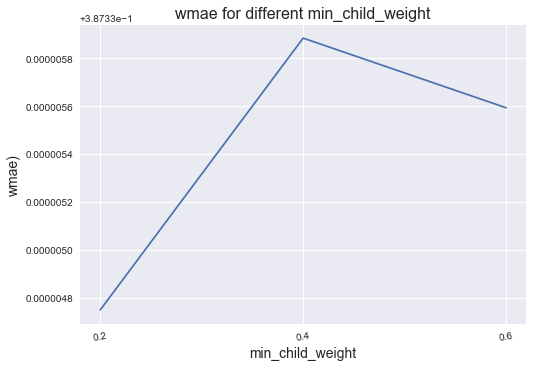

In [17]:
results_col_sb = {}
for i in [0.2, 0.4, 0.6]:
    result = {}
    print('\n\n\n\nrunning while min_cw = {}'.format(i))
    params={'booster': 'gblinear',
        'objective': 'reg:linear',
        'eta': 0.1,
        'depth': 8,
        'subsample': 1.0,
        'min_child_weight': 5,
        'col_sample_bytree': i,
        'seed': 0,
        'silent': 1,
        }

    watchlist = [(dataset_val, 'val'),(dataset_train,'train')]
    model = xgb.train(params,dataset_train,num_boost_round=6000,early_stopping_rounds=300,evals=watchlist, feval=wmae_xgb,maximize=False)
    pred_xgb = model.predict(dataset_val)
    
    result['predictions'] = pred_xgb
    result['wmae'] = wmae(y_test, pred_xgb)
    results_col_sb['{}'.format(i)] = result
    
print(results_col_sb)          # 38 negtive rows
plot_results(results_col_sb, 'col_sample_bytree') 

In [35]:
a = pd.DataFrame(results_col_sb['0.2']['predictions'])
a[a[0]<0].shape

(16, 1)





running while min_cw = 0.1
[0]	val-wmae:0.676763	train-wmae:0.664156
Multiple eval metrics have been passed: 'train-wmae' will be used for early stopping.

Will train until train-wmae hasn't improved in 300 rounds.
[1]	val-wmae:0.554103	train-wmae:0.541021
[2]	val-wmae:0.516861	train-wmae:0.496802
[3]	val-wmae:0.49328	train-wmae:0.465461
[4]	val-wmae:0.475922	train-wmae:0.440206
[5]	val-wmae:0.462486	train-wmae:0.419077
[6]	val-wmae:0.451823	train-wmae:0.401166
[7]	val-wmae:0.443211	train-wmae:0.385989
[8]	val-wmae:0.436306	train-wmae:0.373124
[9]	val-wmae:0.430739	train-wmae:0.36225
[10]	val-wmae:0.426518	train-wmae:0.353003
[11]	val-wmae:0.423363	train-wmae:0.345218
[12]	val-wmae:0.420801	train-wmae:0.338552
[13]	val-wmae:0.418926	train-wmae:0.332936
[14]	val-wmae:0.417688	train-wmae:0.328175
[15]	val-wmae:0.416686	train-wmae:0.324062
[16]	val-wmae:0.415969	train-wmae:0.320617
[17]	val-wmae:0.41544	train-wmae:0.317694
[18]	val-wmae:0.415158	train-wmae:0.315261
[19]	val-wmae:0.414

[186]	val-wmae:0.405751	train-wmae:0.288263
[187]	val-wmae:0.405694	train-wmae:0.288215
[188]	val-wmae:0.405672	train-wmae:0.288185
[189]	val-wmae:0.405629	train-wmae:0.288142
[190]	val-wmae:0.405573	train-wmae:0.288094
[191]	val-wmae:0.405579	train-wmae:0.288081
[192]	val-wmae:0.405531	train-wmae:0.288037
[193]	val-wmae:0.405509	train-wmae:0.288009
[194]	val-wmae:0.40544	train-wmae:0.287956
[195]	val-wmae:0.40543	train-wmae:0.287934
[196]	val-wmae:0.405372	train-wmae:0.287886
[197]	val-wmae:0.405331	train-wmae:0.287848
[198]	val-wmae:0.405301	train-wmae:0.287814
[199]	val-wmae:0.405292	train-wmae:0.287793
[200]	val-wmae:0.405227	train-wmae:0.287742
[201]	val-wmae:0.405177	train-wmae:0.287699
[202]	val-wmae:0.405154	train-wmae:0.287668
[203]	val-wmae:0.405153	train-wmae:0.287652
[204]	val-wmae:0.405088	train-wmae:0.287601
[205]	val-wmae:0.405073	train-wmae:0.287576
[206]	val-wmae:0.405064	train-wmae:0.287556
[207]	val-wmae:0.404989	train-wmae:0.287501
[208]	val-wmae:0.404941	train-wmae

[374]	val-wmae:0.400803	train-wmae:0.283819
[375]	val-wmae:0.40079	train-wmae:0.283807
[376]	val-wmae:0.400781	train-wmae:0.283798
[377]	val-wmae:0.400748	train-wmae:0.283776
[378]	val-wmae:0.400728	train-wmae:0.28376
[379]	val-wmae:0.400711	train-wmae:0.283746
[380]	val-wmae:0.400704	train-wmae:0.283737
[381]	val-wmae:0.400678	train-wmae:0.283719
[382]	val-wmae:0.400662	train-wmae:0.283706
[383]	val-wmae:0.400638	train-wmae:0.283689
[384]	val-wmae:0.400631	train-wmae:0.28368
[385]	val-wmae:0.400606	train-wmae:0.283662
[386]	val-wmae:0.40059	train-wmae:0.283649
[387]	val-wmae:0.400572	train-wmae:0.283635
[388]	val-wmae:0.400561	train-wmae:0.283625
[389]	val-wmae:0.400547	train-wmae:0.283613
[390]	val-wmae:0.400527	train-wmae:0.283598
[391]	val-wmae:0.400508	train-wmae:0.283584
[392]	val-wmae:0.400483	train-wmae:0.283565
[393]	val-wmae:0.400471	train-wmae:0.283555
[394]	val-wmae:0.400458	train-wmae:0.283544
[395]	val-wmae:0.40044	train-wmae:0.283531
[396]	val-wmae:0.400419	train-wmae:0.

[562]	val-wmae:0.398001	train-wmae:0.281822
[563]	val-wmae:0.397992	train-wmae:0.281815
[564]	val-wmae:0.397982	train-wmae:0.281808
[565]	val-wmae:0.397966	train-wmae:0.281798
[566]	val-wmae:0.397959	train-wmae:0.281792
[567]	val-wmae:0.397941	train-wmae:0.281782
[568]	val-wmae:0.39793	train-wmae:0.281775
[569]	val-wmae:0.397924	train-wmae:0.28177
[570]	val-wmae:0.397911	train-wmae:0.281761
[571]	val-wmae:0.397898	train-wmae:0.281753
[572]	val-wmae:0.397887	train-wmae:0.281746
[573]	val-wmae:0.397876	train-wmae:0.281738
[574]	val-wmae:0.397866	train-wmae:0.281731
[575]	val-wmae:0.397849	train-wmae:0.281721
[576]	val-wmae:0.397837	train-wmae:0.281712
[577]	val-wmae:0.397827	train-wmae:0.281706
[578]	val-wmae:0.397816	train-wmae:0.281698
[579]	val-wmae:0.397805	train-wmae:0.28169
[580]	val-wmae:0.397798	train-wmae:0.281685
[581]	val-wmae:0.397787	train-wmae:0.281678
[582]	val-wmae:0.397774	train-wmae:0.281668
[583]	val-wmae:0.397766	train-wmae:0.281663
[584]	val-wmae:0.397755	train-wmae:

[749]	val-wmae:0.396312	train-wmae:0.280667
[750]	val-wmae:0.396303	train-wmae:0.280661
[751]	val-wmae:0.396297	train-wmae:0.280657
[752]	val-wmae:0.396291	train-wmae:0.280653
[753]	val-wmae:0.39628	train-wmae:0.280646
[754]	val-wmae:0.396275	train-wmae:0.280643
[755]	val-wmae:0.396267	train-wmae:0.280637
[756]	val-wmae:0.396259	train-wmae:0.280632
[757]	val-wmae:0.396254	train-wmae:0.280628
[758]	val-wmae:0.396247	train-wmae:0.280624
[759]	val-wmae:0.39624	train-wmae:0.280619
[760]	val-wmae:0.396232	train-wmae:0.280613
[761]	val-wmae:0.396226	train-wmae:0.280609
[762]	val-wmae:0.396217	train-wmae:0.280604
[763]	val-wmae:0.396212	train-wmae:0.280599
[764]	val-wmae:0.396202	train-wmae:0.280594
[765]	val-wmae:0.396197	train-wmae:0.28059
[766]	val-wmae:0.396191	train-wmae:0.280586
[767]	val-wmae:0.39618	train-wmae:0.280579
[768]	val-wmae:0.396174	train-wmae:0.280576
[769]	val-wmae:0.396169	train-wmae:0.280572
[770]	val-wmae:0.396159	train-wmae:0.280566
[771]	val-wmae:0.396153	train-wmae:0

[937]	val-wmae:0.39512	train-wmae:0.279895
[938]	val-wmae:0.395116	train-wmae:0.279893
[939]	val-wmae:0.395112	train-wmae:0.27989
[940]	val-wmae:0.395106	train-wmae:0.279887
[941]	val-wmae:0.3951	train-wmae:0.279883
[942]	val-wmae:0.395096	train-wmae:0.27988
[943]	val-wmae:0.39509	train-wmae:0.279877
[944]	val-wmae:0.395086	train-wmae:0.279874
[945]	val-wmae:0.39508	train-wmae:0.279871
[946]	val-wmae:0.395073	train-wmae:0.279867
[947]	val-wmae:0.395067	train-wmae:0.279863
[948]	val-wmae:0.395062	train-wmae:0.27986
[949]	val-wmae:0.395057	train-wmae:0.279857
[950]	val-wmae:0.39505	train-wmae:0.279853
[951]	val-wmae:0.395046	train-wmae:0.27985
[952]	val-wmae:0.39504	train-wmae:0.279846
[953]	val-wmae:0.395038	train-wmae:0.279845
[954]	val-wmae:0.39503	train-wmae:0.27984
[955]	val-wmae:0.395025	train-wmae:0.279837
[956]	val-wmae:0.395021	train-wmae:0.279834
[957]	val-wmae:0.395016	train-wmae:0.279831
[958]	val-wmae:0.39501	train-wmae:0.279828
[959]	val-wmae:0.395007	train-wmae:0.279825
[9

[1122]	val-wmae:0.394283	train-wmae:0.27936
[1123]	val-wmae:0.394278	train-wmae:0.279357
[1124]	val-wmae:0.394274	train-wmae:0.279354
[1125]	val-wmae:0.394271	train-wmae:0.279352
[1126]	val-wmae:0.394266	train-wmae:0.279349
[1127]	val-wmae:0.394262	train-wmae:0.279346
[1128]	val-wmae:0.39426	train-wmae:0.279345
[1129]	val-wmae:0.394256	train-wmae:0.279342
[1130]	val-wmae:0.394252	train-wmae:0.27934
[1131]	val-wmae:0.394249	train-wmae:0.279337
[1132]	val-wmae:0.394246	train-wmae:0.279335
[1133]	val-wmae:0.394241	train-wmae:0.279332
[1134]	val-wmae:0.394238	train-wmae:0.279329
[1135]	val-wmae:0.394234	train-wmae:0.279327
[1136]	val-wmae:0.39423	train-wmae:0.279324
[1137]	val-wmae:0.394228	train-wmae:0.279322
[1138]	val-wmae:0.394223	train-wmae:0.279319
[1139]	val-wmae:0.394219	train-wmae:0.279316
[1140]	val-wmae:0.394215	train-wmae:0.279314
[1141]	val-wmae:0.394211	train-wmae:0.279311
[1142]	val-wmae:0.394209	train-wmae:0.279309
[1143]	val-wmae:0.394204	train-wmae:0.279306
[1144]	val-wma

[1305]	val-wmae:0.393715	train-wmae:0.27895
[1306]	val-wmae:0.393713	train-wmae:0.278949
[1307]	val-wmae:0.39371	train-wmae:0.278947
[1308]	val-wmae:0.393708	train-wmae:0.278945
[1309]	val-wmae:0.393704	train-wmae:0.278942
[1310]	val-wmae:0.393703	train-wmae:0.278941
[1311]	val-wmae:0.393699	train-wmae:0.278938
[1312]	val-wmae:0.393698	train-wmae:0.278937
[1313]	val-wmae:0.393694	train-wmae:0.278934
[1314]	val-wmae:0.393694	train-wmae:0.278933
[1315]	val-wmae:0.393691	train-wmae:0.278931
[1316]	val-wmae:0.393687	train-wmae:0.278929
[1317]	val-wmae:0.393685	train-wmae:0.278927
[1318]	val-wmae:0.393683	train-wmae:0.278925
[1319]	val-wmae:0.393681	train-wmae:0.278923
[1320]	val-wmae:0.393677	train-wmae:0.278921
[1321]	val-wmae:0.393675	train-wmae:0.278919
[1322]	val-wmae:0.393674	train-wmae:0.278918
[1323]	val-wmae:0.393671	train-wmae:0.278915
[1324]	val-wmae:0.393669	train-wmae:0.278914
[1325]	val-wmae:0.393666	train-wmae:0.278912
[1326]	val-wmae:0.393662	train-wmae:0.278909
[1327]	val-w

[1488]	val-wmae:0.393314	train-wmae:0.278626
[1489]	val-wmae:0.393312	train-wmae:0.278624
[1490]	val-wmae:0.393309	train-wmae:0.278622
[1491]	val-wmae:0.393307	train-wmae:0.27862
[1492]	val-wmae:0.393305	train-wmae:0.278619
[1493]	val-wmae:0.393303	train-wmae:0.278617
[1494]	val-wmae:0.393302	train-wmae:0.278616
[1495]	val-wmae:0.3933	train-wmae:0.278614
[1496]	val-wmae:0.393297	train-wmae:0.278612
[1497]	val-wmae:0.393296	train-wmae:0.278611
[1498]	val-wmae:0.393294	train-wmae:0.27861
[1499]	val-wmae:0.393291	train-wmae:0.278607
[1500]	val-wmae:0.39329	train-wmae:0.278606
[1501]	val-wmae:0.393287	train-wmae:0.278604
[1502]	val-wmae:0.393287	train-wmae:0.278603
[1503]	val-wmae:0.393285	train-wmae:0.278602
[1504]	val-wmae:0.393283	train-wmae:0.2786
[1505]	val-wmae:0.393281	train-wmae:0.278599
[1506]	val-wmae:0.393278	train-wmae:0.278596
[1507]	val-wmae:0.393277	train-wmae:0.278595
[1508]	val-wmae:0.393274	train-wmae:0.278593
[1509]	val-wmae:0.393273	train-wmae:0.278592
[1510]	val-wmae:0

[1672]	val-wmae:0.392994	train-wmae:0.278357
[1673]	val-wmae:0.392992	train-wmae:0.278355
[1674]	val-wmae:0.392991	train-wmae:0.278354
[1675]	val-wmae:0.392988	train-wmae:0.278352
[1676]	val-wmae:0.392987	train-wmae:0.278351
[1677]	val-wmae:0.392985	train-wmae:0.278349
[1678]	val-wmae:0.392984	train-wmae:0.278348
[1679]	val-wmae:0.392983	train-wmae:0.278347
[1680]	val-wmae:0.392981	train-wmae:0.278345
[1681]	val-wmae:0.392979	train-wmae:0.278344
[1682]	val-wmae:0.392979	train-wmae:0.278343
[1683]	val-wmae:0.392977	train-wmae:0.278342
[1684]	val-wmae:0.392976	train-wmae:0.278341
[1685]	val-wmae:0.392973	train-wmae:0.278339
[1686]	val-wmae:0.392972	train-wmae:0.278338
[1687]	val-wmae:0.392971	train-wmae:0.278336
[1688]	val-wmae:0.39297	train-wmae:0.278335
[1689]	val-wmae:0.392968	train-wmae:0.278334
[1690]	val-wmae:0.392966	train-wmae:0.278332
[1691]	val-wmae:0.392965	train-wmae:0.278331
[1692]	val-wmae:0.392963	train-wmae:0.27833
[1693]	val-wmae:0.392963	train-wmae:0.278329
[1694]	val-w

[1855]	val-wmae:0.392744	train-wmae:0.278132
[1856]	val-wmae:0.392744	train-wmae:0.278132
[1857]	val-wmae:0.392742	train-wmae:0.27813
[1858]	val-wmae:0.39274	train-wmae:0.278129
[1859]	val-wmae:0.392741	train-wmae:0.278128
[1860]	val-wmae:0.39274	train-wmae:0.278127
[1861]	val-wmae:0.392738	train-wmae:0.278126
[1862]	val-wmae:0.392737	train-wmae:0.278125
[1863]	val-wmae:0.392734	train-wmae:0.278123
[1864]	val-wmae:0.392735	train-wmae:0.278123
[1865]	val-wmae:0.392733	train-wmae:0.278122
[1866]	val-wmae:0.392731	train-wmae:0.27812
[1867]	val-wmae:0.39273	train-wmae:0.278119
[1868]	val-wmae:0.39273	train-wmae:0.278119
[1869]	val-wmae:0.392728	train-wmae:0.278118
[1870]	val-wmae:0.392726	train-wmae:0.278116
[1871]	val-wmae:0.392725	train-wmae:0.278115
[1872]	val-wmae:0.392725	train-wmae:0.278114
[1873]	val-wmae:0.392723	train-wmae:0.278113
[1874]	val-wmae:0.392721	train-wmae:0.278112
[1875]	val-wmae:0.392721	train-wmae:0.278111
[1876]	val-wmae:0.392719	train-wmae:0.278109
[1877]	val-wmae:

[2039]	val-wmae:0.392542	train-wmae:0.277948
[2040]	val-wmae:0.392542	train-wmae:0.277948
[2041]	val-wmae:0.39254	train-wmae:0.277946
[2042]	val-wmae:0.39254	train-wmae:0.277946
[2043]	val-wmae:0.392539	train-wmae:0.277945
[2044]	val-wmae:0.392538	train-wmae:0.277944
[2045]	val-wmae:0.392537	train-wmae:0.277943
[2046]	val-wmae:0.392536	train-wmae:0.277942
[2047]	val-wmae:0.392536	train-wmae:0.277941
[2048]	val-wmae:0.392535	train-wmae:0.277941
[2049]	val-wmae:0.392532	train-wmae:0.277939
[2050]	val-wmae:0.392533	train-wmae:0.277939
[2051]	val-wmae:0.392531	train-wmae:0.277937
[2052]	val-wmae:0.392531	train-wmae:0.277937
[2053]	val-wmae:0.392529	train-wmae:0.277936
[2054]	val-wmae:0.392529	train-wmae:0.277935
[2055]	val-wmae:0.392528	train-wmae:0.277934
[2056]	val-wmae:0.392526	train-wmae:0.277933
[2057]	val-wmae:0.392524	train-wmae:0.277932
[2058]	val-wmae:0.392524	train-wmae:0.277931
[2059]	val-wmae:0.392523	train-wmae:0.27793
[2060]	val-wmae:0.392523	train-wmae:0.27793
[2061]	val-wma

[2222]	val-wmae:0.392378	train-wmae:0.277799
[2223]	val-wmae:0.392377	train-wmae:0.277798
[2224]	val-wmae:0.392376	train-wmae:0.277797
[2225]	val-wmae:0.392375	train-wmae:0.277797
[2226]	val-wmae:0.392375	train-wmae:0.277796
[2227]	val-wmae:0.392374	train-wmae:0.277795
[2228]	val-wmae:0.392372	train-wmae:0.277794
[2229]	val-wmae:0.392372	train-wmae:0.277793
[2230]	val-wmae:0.392371	train-wmae:0.277793
[2231]	val-wmae:0.39237	train-wmae:0.277792
[2232]	val-wmae:0.392369	train-wmae:0.277791
[2233]	val-wmae:0.392368	train-wmae:0.27779
[2234]	val-wmae:0.392368	train-wmae:0.27779
[2235]	val-wmae:0.392367	train-wmae:0.277789
[2236]	val-wmae:0.392367	train-wmae:0.277788
[2237]	val-wmae:0.392366	train-wmae:0.277788
[2238]	val-wmae:0.392365	train-wmae:0.277787
[2239]	val-wmae:0.392364	train-wmae:0.277786
[2240]	val-wmae:0.392363	train-wmae:0.277785
[2241]	val-wmae:0.392362	train-wmae:0.277785
[2242]	val-wmae:0.392362	train-wmae:0.277784
[2243]	val-wmae:0.392362	train-wmae:0.277784
[2244]	val-wm

[2405]	val-wmae:0.392244	train-wmae:0.277673
[2406]	val-wmae:0.392243	train-wmae:0.277673
[2407]	val-wmae:0.392242	train-wmae:0.277672
[2408]	val-wmae:0.392241	train-wmae:0.277672
[2409]	val-wmae:0.39224	train-wmae:0.277671
[2410]	val-wmae:0.39224	train-wmae:0.27767
[2411]	val-wmae:0.392239	train-wmae:0.277669
[2412]	val-wmae:0.392239	train-wmae:0.277669
[2413]	val-wmae:0.392238	train-wmae:0.277668
[2414]	val-wmae:0.392237	train-wmae:0.277667
[2415]	val-wmae:0.392236	train-wmae:0.277667
[2416]	val-wmae:0.392236	train-wmae:0.277666
[2417]	val-wmae:0.392235	train-wmae:0.277666
[2418]	val-wmae:0.392235	train-wmae:0.277665
[2419]	val-wmae:0.392234	train-wmae:0.277665
[2420]	val-wmae:0.392233	train-wmae:0.277664
[2421]	val-wmae:0.392234	train-wmae:0.277663
[2422]	val-wmae:0.392232	train-wmae:0.277662
[2423]	val-wmae:0.392232	train-wmae:0.277662
[2424]	val-wmae:0.392231	train-wmae:0.277661
[2425]	val-wmae:0.39223	train-wmae:0.277661
[2426]	val-wmae:0.392229	train-wmae:0.27766
[2427]	val-wmae

[2588]	val-wmae:0.392133	train-wmae:0.277565
[2589]	val-wmae:0.392133	train-wmae:0.277565
[2590]	val-wmae:0.392132	train-wmae:0.277564
[2591]	val-wmae:0.392131	train-wmae:0.277564
[2592]	val-wmae:0.392131	train-wmae:0.277563
[2593]	val-wmae:0.392129	train-wmae:0.277562
[2594]	val-wmae:0.392129	train-wmae:0.277562
[2595]	val-wmae:0.392128	train-wmae:0.277561
[2596]	val-wmae:0.392129	train-wmae:0.277561
[2597]	val-wmae:0.392127	train-wmae:0.27756
[2598]	val-wmae:0.392127	train-wmae:0.27756
[2599]	val-wmae:0.392127	train-wmae:0.27756
[2600]	val-wmae:0.392126	train-wmae:0.277559
[2601]	val-wmae:0.392126	train-wmae:0.277559
[2602]	val-wmae:0.392125	train-wmae:0.277558
[2603]	val-wmae:0.392124	train-wmae:0.277557
[2604]	val-wmae:0.392124	train-wmae:0.277557
[2605]	val-wmae:0.392124	train-wmae:0.277556
[2606]	val-wmae:0.392124	train-wmae:0.277556
[2607]	val-wmae:0.392123	train-wmae:0.277555
[2608]	val-wmae:0.392122	train-wmae:0.277555
[2609]	val-wmae:0.392121	train-wmae:0.277554
[2610]	val-wm

[2772]	val-wmae:0.392038	train-wmae:0.277475
[2773]	val-wmae:0.392038	train-wmae:0.277475
[2774]	val-wmae:0.392037	train-wmae:0.277474
[2775]	val-wmae:0.392037	train-wmae:0.277474
[2776]	val-wmae:0.392036	train-wmae:0.277473
[2777]	val-wmae:0.392037	train-wmae:0.277473
[2778]	val-wmae:0.392035	train-wmae:0.277473
[2779]	val-wmae:0.392035	train-wmae:0.277472
[2780]	val-wmae:0.392034	train-wmae:0.277472
[2781]	val-wmae:0.392034	train-wmae:0.277471
[2782]	val-wmae:0.392034	train-wmae:0.277471
[2783]	val-wmae:0.392033	train-wmae:0.27747
[2784]	val-wmae:0.392032	train-wmae:0.27747
[2785]	val-wmae:0.392033	train-wmae:0.27747
[2786]	val-wmae:0.392032	train-wmae:0.277469
[2787]	val-wmae:0.392032	train-wmae:0.277469
[2788]	val-wmae:0.392031	train-wmae:0.277468
[2789]	val-wmae:0.392031	train-wmae:0.277468
[2790]	val-wmae:0.39203	train-wmae:0.277467
[2791]	val-wmae:0.392029	train-wmae:0.277467
[2792]	val-wmae:0.392029	train-wmae:0.277466
[2793]	val-wmae:0.392029	train-wmae:0.277466
[2794]	val-wma

[2955]	val-wmae:0.391958	train-wmae:0.277397
[2956]	val-wmae:0.391957	train-wmae:0.277397
[2957]	val-wmae:0.391956	train-wmae:0.277396
[2958]	val-wmae:0.391957	train-wmae:0.277396
[2959]	val-wmae:0.391957	train-wmae:0.277396
[2960]	val-wmae:0.391955	train-wmae:0.277395
[2961]	val-wmae:0.391955	train-wmae:0.277394
[2962]	val-wmae:0.391955	train-wmae:0.277394
[2963]	val-wmae:0.391954	train-wmae:0.277394
[2964]	val-wmae:0.391954	train-wmae:0.277394
[2965]	val-wmae:0.391953	train-wmae:0.277393
[2966]	val-wmae:0.391953	train-wmae:0.277392
[2967]	val-wmae:0.391953	train-wmae:0.277392
[2968]	val-wmae:0.391952	train-wmae:0.277392
[2969]	val-wmae:0.391951	train-wmae:0.277391
[2970]	val-wmae:0.391951	train-wmae:0.277391
[2971]	val-wmae:0.391951	train-wmae:0.277391
[2972]	val-wmae:0.39195	train-wmae:0.27739
[2973]	val-wmae:0.39195	train-wmae:0.27739
[2974]	val-wmae:0.391949	train-wmae:0.277389
[2975]	val-wmae:0.39195	train-wmae:0.277389
[2976]	val-wmae:0.391948	train-wmae:0.277388
[2977]	val-wmae

[3138]	val-wmae:0.391887	train-wmae:0.277331
[3139]	val-wmae:0.391887	train-wmae:0.277331
[3140]	val-wmae:0.391887	train-wmae:0.27733
[3141]	val-wmae:0.391886	train-wmae:0.27733
[3142]	val-wmae:0.391885	train-wmae:0.277329
[3143]	val-wmae:0.391885	train-wmae:0.277329
[3144]	val-wmae:0.391885	train-wmae:0.277329
[3145]	val-wmae:0.391885	train-wmae:0.277329
[3146]	val-wmae:0.391884	train-wmae:0.277328
[3147]	val-wmae:0.391884	train-wmae:0.277328
[3148]	val-wmae:0.391883	train-wmae:0.277327
[3149]	val-wmae:0.391883	train-wmae:0.277327
[3150]	val-wmae:0.391883	train-wmae:0.277327
[3151]	val-wmae:0.391882	train-wmae:0.277326
[3152]	val-wmae:0.391882	train-wmae:0.277326
[3153]	val-wmae:0.391882	train-wmae:0.277326
[3154]	val-wmae:0.391882	train-wmae:0.277325
[3155]	val-wmae:0.391881	train-wmae:0.277325
[3156]	val-wmae:0.39188	train-wmae:0.277324
[3157]	val-wmae:0.391881	train-wmae:0.277324
[3158]	val-wmae:0.39188	train-wmae:0.277324
[3159]	val-wmae:0.391879	train-wmae:0.277323
[3160]	val-wma

[3321]	val-wmae:0.391826	train-wmae:0.277275
[3322]	val-wmae:0.391825	train-wmae:0.277275
[3323]	val-wmae:0.391825	train-wmae:0.277275
[3324]	val-wmae:0.391824	train-wmae:0.277274
[3325]	val-wmae:0.391824	train-wmae:0.277274
[3326]	val-wmae:0.391824	train-wmae:0.277274
[3327]	val-wmae:0.391824	train-wmae:0.277273
[3328]	val-wmae:0.391823	train-wmae:0.277273
[3329]	val-wmae:0.391823	train-wmae:0.277273
[3330]	val-wmae:0.391822	train-wmae:0.277272
[3331]	val-wmae:0.391822	train-wmae:0.277272
[3332]	val-wmae:0.391822	train-wmae:0.277272
[3333]	val-wmae:0.391822	train-wmae:0.277272
[3334]	val-wmae:0.391821	train-wmae:0.277271
[3335]	val-wmae:0.391821	train-wmae:0.277271
[3336]	val-wmae:0.391821	train-wmae:0.277271
[3337]	val-wmae:0.39182	train-wmae:0.27727
[3338]	val-wmae:0.39182	train-wmae:0.27727
[3339]	val-wmae:0.391819	train-wmae:0.27727
[3340]	val-wmae:0.391819	train-wmae:0.277269
[3341]	val-wmae:0.391819	train-wmae:0.277269
[3342]	val-wmae:0.391819	train-wmae:0.277269
[3343]	val-wmae

[3504]	val-wmae:0.391771	train-wmae:0.277227
[3505]	val-wmae:0.39177	train-wmae:0.277226
[3506]	val-wmae:0.39177	train-wmae:0.277226
[3507]	val-wmae:0.391769	train-wmae:0.277225
[3508]	val-wmae:0.391769	train-wmae:0.277225
[3509]	val-wmae:0.391768	train-wmae:0.277225
[3510]	val-wmae:0.391768	train-wmae:0.277225
[3511]	val-wmae:0.391768	train-wmae:0.277225
[3512]	val-wmae:0.391768	train-wmae:0.277224
[3513]	val-wmae:0.391768	train-wmae:0.277224
[3514]	val-wmae:0.391767	train-wmae:0.277224
[3515]	val-wmae:0.391767	train-wmae:0.277224
[3516]	val-wmae:0.391767	train-wmae:0.277223
[3517]	val-wmae:0.391766	train-wmae:0.277223
[3518]	val-wmae:0.391766	train-wmae:0.277223
[3519]	val-wmae:0.391766	train-wmae:0.277222
[3520]	val-wmae:0.391766	train-wmae:0.277223
[3521]	val-wmae:0.391765	train-wmae:0.277222
[3522]	val-wmae:0.391765	train-wmae:0.277222
[3523]	val-wmae:0.391764	train-wmae:0.277221
[3524]	val-wmae:0.391765	train-wmae:0.277221
[3525]	val-wmae:0.391764	train-wmae:0.277221
[3526]	val-w

[3687]	val-wmae:0.391722	train-wmae:0.277184
[3688]	val-wmae:0.391722	train-wmae:0.277183
[3689]	val-wmae:0.391721	train-wmae:0.277183
[3690]	val-wmae:0.391721	train-wmae:0.277183
[3691]	val-wmae:0.391721	train-wmae:0.277183
[3692]	val-wmae:0.39172	train-wmae:0.277182
[3693]	val-wmae:0.39172	train-wmae:0.277182
[3694]	val-wmae:0.39172	train-wmae:0.277182
[3695]	val-wmae:0.39172	train-wmae:0.277182
[3696]	val-wmae:0.391719	train-wmae:0.277181
[3697]	val-wmae:0.391719	train-wmae:0.277181
[3698]	val-wmae:0.391719	train-wmae:0.277181
[3699]	val-wmae:0.391719	train-wmae:0.277181
[3700]	val-wmae:0.391718	train-wmae:0.277181
[3701]	val-wmae:0.391718	train-wmae:0.27718
[3702]	val-wmae:0.391718	train-wmae:0.27718
[3703]	val-wmae:0.391717	train-wmae:0.27718
[3704]	val-wmae:0.391717	train-wmae:0.27718
[3705]	val-wmae:0.391717	train-wmae:0.277179
[3706]	val-wmae:0.391717	train-wmae:0.277179
[3707]	val-wmae:0.391716	train-wmae:0.277179
[3708]	val-wmae:0.391716	train-wmae:0.277179
[3709]	val-wmae:0.

[3870]	val-wmae:0.391679	train-wmae:0.277146
[3871]	val-wmae:0.391678	train-wmae:0.277145
[3872]	val-wmae:0.391678	train-wmae:0.277145
[3873]	val-wmae:0.391678	train-wmae:0.277145
[3874]	val-wmae:0.391678	train-wmae:0.277144
[3875]	val-wmae:0.391678	train-wmae:0.277144
[3876]	val-wmae:0.391678	train-wmae:0.277145
[3877]	val-wmae:0.391678	train-wmae:0.277144
[3878]	val-wmae:0.391677	train-wmae:0.277144
[3879]	val-wmae:0.391677	train-wmae:0.277144
[3880]	val-wmae:0.391677	train-wmae:0.277144
[3881]	val-wmae:0.391677	train-wmae:0.277143
[3882]	val-wmae:0.391676	train-wmae:0.277143
[3883]	val-wmae:0.391676	train-wmae:0.277143
[3884]	val-wmae:0.391675	train-wmae:0.277142
[3885]	val-wmae:0.391676	train-wmae:0.277143
[3886]	val-wmae:0.391675	train-wmae:0.277142
[3887]	val-wmae:0.391675	train-wmae:0.277142
[3888]	val-wmae:0.391675	train-wmae:0.277142
[3889]	val-wmae:0.391675	train-wmae:0.277141
[3890]	val-wmae:0.391675	train-wmae:0.277142
[3891]	val-wmae:0.391675	train-wmae:0.277141
[3892]	val

[4053]	val-wmae:0.391641	train-wmae:0.277112
[4054]	val-wmae:0.39164	train-wmae:0.277112
[4055]	val-wmae:0.39164	train-wmae:0.277111
[4056]	val-wmae:0.391639	train-wmae:0.277111
[4057]	val-wmae:0.39164	train-wmae:0.277111
[4058]	val-wmae:0.39164	train-wmae:0.277111
[4059]	val-wmae:0.391639	train-wmae:0.277111
[4060]	val-wmae:0.391639	train-wmae:0.27711
[4061]	val-wmae:0.391639	train-wmae:0.27711
[4062]	val-wmae:0.391639	train-wmae:0.27711
[4063]	val-wmae:0.391639	train-wmae:0.27711
[4064]	val-wmae:0.391638	train-wmae:0.27711
[4065]	val-wmae:0.391638	train-wmae:0.27711
[4066]	val-wmae:0.391637	train-wmae:0.277109
[4067]	val-wmae:0.391638	train-wmae:0.277109
[4068]	val-wmae:0.391637	train-wmae:0.277109
[4069]	val-wmae:0.391637	train-wmae:0.277109
[4070]	val-wmae:0.391637	train-wmae:0.277109
[4071]	val-wmae:0.391636	train-wmae:0.277108
[4072]	val-wmae:0.391637	train-wmae:0.277108
[4073]	val-wmae:0.391637	train-wmae:0.277108
[4074]	val-wmae:0.391636	train-wmae:0.277108
[4075]	val-wmae:0.39

[4236]	val-wmae:0.391605	train-wmae:0.277081
[4237]	val-wmae:0.391605	train-wmae:0.277081
[4238]	val-wmae:0.391605	train-wmae:0.277081
[4239]	val-wmae:0.391605	train-wmae:0.277081
[4240]	val-wmae:0.391605	train-wmae:0.277081
[4241]	val-wmae:0.391605	train-wmae:0.277081
[4242]	val-wmae:0.391604	train-wmae:0.27708
[4243]	val-wmae:0.391604	train-wmae:0.27708
[4244]	val-wmae:0.391604	train-wmae:0.27708
[4245]	val-wmae:0.391604	train-wmae:0.27708
[4246]	val-wmae:0.391603	train-wmae:0.27708
[4247]	val-wmae:0.391603	train-wmae:0.277079
[4248]	val-wmae:0.391603	train-wmae:0.27708
[4249]	val-wmae:0.391603	train-wmae:0.277079
[4250]	val-wmae:0.391602	train-wmae:0.277079
[4251]	val-wmae:0.391602	train-wmae:0.277079
[4252]	val-wmae:0.391602	train-wmae:0.277079
[4253]	val-wmae:0.391602	train-wmae:0.277079
[4254]	val-wmae:0.391602	train-wmae:0.277079
[4255]	val-wmae:0.391602	train-wmae:0.277078
[4256]	val-wmae:0.391601	train-wmae:0.277078
[4257]	val-wmae:0.391602	train-wmae:0.277078
[4258]	val-wmae:

[4419]	val-wmae:0.391573	train-wmae:0.277054
[4420]	val-wmae:0.391573	train-wmae:0.277054
[4421]	val-wmae:0.391573	train-wmae:0.277054
[4422]	val-wmae:0.391572	train-wmae:0.277054
[4423]	val-wmae:0.391572	train-wmae:0.277054
[4424]	val-wmae:0.391572	train-wmae:0.277053
[4425]	val-wmae:0.391573	train-wmae:0.277054
[4426]	val-wmae:0.391572	train-wmae:0.277053
[4427]	val-wmae:0.391572	train-wmae:0.277053
[4428]	val-wmae:0.391572	train-wmae:0.277053
[4429]	val-wmae:0.391571	train-wmae:0.277053
[4430]	val-wmae:0.391571	train-wmae:0.277053
[4431]	val-wmae:0.391571	train-wmae:0.277053
[4432]	val-wmae:0.391571	train-wmae:0.277052
[4433]	val-wmae:0.391571	train-wmae:0.277052
[4434]	val-wmae:0.39157	train-wmae:0.277052
[4435]	val-wmae:0.39157	train-wmae:0.277052
[4436]	val-wmae:0.39157	train-wmae:0.277052
[4437]	val-wmae:0.39157	train-wmae:0.277052
[4438]	val-wmae:0.39157	train-wmae:0.277052
[4439]	val-wmae:0.39157	train-wmae:0.277052
[4440]	val-wmae:0.39157	train-wmae:0.277051
[4441]	val-wmae:0

[4602]	val-wmae:0.391544	train-wmae:0.277031
[4603]	val-wmae:0.391543	train-wmae:0.277031
[4604]	val-wmae:0.391543	train-wmae:0.277031
[4605]	val-wmae:0.391543	train-wmae:0.277031
[4606]	val-wmae:0.391542	train-wmae:0.27703
[4607]	val-wmae:0.391543	train-wmae:0.277031
[4608]	val-wmae:0.391542	train-wmae:0.27703
[4609]	val-wmae:0.391542	train-wmae:0.27703
[4610]	val-wmae:0.391542	train-wmae:0.27703
[4611]	val-wmae:0.391542	train-wmae:0.27703
[4612]	val-wmae:0.391542	train-wmae:0.27703
[4613]	val-wmae:0.391542	train-wmae:0.27703
[4614]	val-wmae:0.391541	train-wmae:0.27703
[4615]	val-wmae:0.391541	train-wmae:0.27703
[4616]	val-wmae:0.391541	train-wmae:0.27703
[4617]	val-wmae:0.391541	train-wmae:0.277029
[4618]	val-wmae:0.391541	train-wmae:0.277029
[4619]	val-wmae:0.391541	train-wmae:0.277029
[4620]	val-wmae:0.391541	train-wmae:0.277029
[4621]	val-wmae:0.39154	train-wmae:0.277029
[4622]	val-wmae:0.391541	train-wmae:0.277029
[4623]	val-wmae:0.39154	train-wmae:0.277029
[4624]	val-wmae:0.3915

[4785]	val-wmae:0.391517	train-wmae:0.27701
[4786]	val-wmae:0.391517	train-wmae:0.27701
[4787]	val-wmae:0.391516	train-wmae:0.27701
[4788]	val-wmae:0.391516	train-wmae:0.27701
[4789]	val-wmae:0.391516	train-wmae:0.277009
[4790]	val-wmae:0.391516	train-wmae:0.277009
[4791]	val-wmae:0.391516	train-wmae:0.277009
[4792]	val-wmae:0.391515	train-wmae:0.277009
[4793]	val-wmae:0.391515	train-wmae:0.277009
[4794]	val-wmae:0.391515	train-wmae:0.277009
[4795]	val-wmae:0.391515	train-wmae:0.277009
[4796]	val-wmae:0.391515	train-wmae:0.277009
[4797]	val-wmae:0.391515	train-wmae:0.277009
[4798]	val-wmae:0.391515	train-wmae:0.277008
[4799]	val-wmae:0.391515	train-wmae:0.277009
[4800]	val-wmae:0.391515	train-wmae:0.277008
[4801]	val-wmae:0.391515	train-wmae:0.277008
[4802]	val-wmae:0.391514	train-wmae:0.277008
[4803]	val-wmae:0.391514	train-wmae:0.277008
[4804]	val-wmae:0.391514	train-wmae:0.277008
[4805]	val-wmae:0.391514	train-wmae:0.277008
[4806]	val-wmae:0.391514	train-wmae:0.277008
[4807]	val-wma

[4969]	val-wmae:0.391492	train-wmae:0.276991
[4970]	val-wmae:0.391492	train-wmae:0.27699
[4971]	val-wmae:0.391492	train-wmae:0.27699
[4972]	val-wmae:0.391491	train-wmae:0.27699
[4973]	val-wmae:0.391492	train-wmae:0.27699
[4974]	val-wmae:0.391491	train-wmae:0.27699
[4975]	val-wmae:0.391491	train-wmae:0.27699
[4976]	val-wmae:0.391491	train-wmae:0.27699
[4977]	val-wmae:0.391491	train-wmae:0.27699
[4978]	val-wmae:0.391491	train-wmae:0.27699
[4979]	val-wmae:0.391491	train-wmae:0.27699
[4980]	val-wmae:0.391491	train-wmae:0.27699
[4981]	val-wmae:0.391491	train-wmae:0.27699
[4982]	val-wmae:0.39149	train-wmae:0.276989
[4983]	val-wmae:0.39149	train-wmae:0.276989
[4984]	val-wmae:0.39149	train-wmae:0.276989
[4985]	val-wmae:0.39149	train-wmae:0.276989
[4986]	val-wmae:0.39149	train-wmae:0.276989
[4987]	val-wmae:0.39149	train-wmae:0.276989
[4988]	val-wmae:0.39149	train-wmae:0.276989
[4989]	val-wmae:0.391489	train-wmae:0.276989
[4990]	val-wmae:0.391489	train-wmae:0.276988
[4991]	val-wmae:0.391489	trai

[5153]	val-wmae:0.391469	train-wmae:0.276973
[5154]	val-wmae:0.391469	train-wmae:0.276973
[5155]	val-wmae:0.391469	train-wmae:0.276972
[5156]	val-wmae:0.391469	train-wmae:0.276972
[5157]	val-wmae:0.391469	train-wmae:0.276972
[5158]	val-wmae:0.391468	train-wmae:0.276972
[5159]	val-wmae:0.391468	train-wmae:0.276972
[5160]	val-wmae:0.391468	train-wmae:0.276972
[5161]	val-wmae:0.391468	train-wmae:0.276972
[5162]	val-wmae:0.391468	train-wmae:0.276972
[5163]	val-wmae:0.391468	train-wmae:0.276972
[5164]	val-wmae:0.391468	train-wmae:0.276972
[5165]	val-wmae:0.391467	train-wmae:0.276971
[5166]	val-wmae:0.391467	train-wmae:0.276971
[5167]	val-wmae:0.391467	train-wmae:0.276971
[5168]	val-wmae:0.391467	train-wmae:0.276971
[5169]	val-wmae:0.391467	train-wmae:0.276971
[5170]	val-wmae:0.391467	train-wmae:0.276971
[5171]	val-wmae:0.391467	train-wmae:0.276971
[5172]	val-wmae:0.391467	train-wmae:0.276971
[5173]	val-wmae:0.391467	train-wmae:0.276971
[5174]	val-wmae:0.391466	train-wmae:0.276971
[5175]	val

[5336]	val-wmae:0.391448	train-wmae:0.276956
[5337]	val-wmae:0.391448	train-wmae:0.276956
[5338]	val-wmae:0.391447	train-wmae:0.276956
[5339]	val-wmae:0.391448	train-wmae:0.276956
[5340]	val-wmae:0.391447	train-wmae:0.276956
[5341]	val-wmae:0.391447	train-wmae:0.276956
[5342]	val-wmae:0.391447	train-wmae:0.276956
[5343]	val-wmae:0.391447	train-wmae:0.276956
[5344]	val-wmae:0.391447	train-wmae:0.276955
[5345]	val-wmae:0.391447	train-wmae:0.276955
[5346]	val-wmae:0.391447	train-wmae:0.276955
[5347]	val-wmae:0.391446	train-wmae:0.276955
[5348]	val-wmae:0.391447	train-wmae:0.276955
[5349]	val-wmae:0.391446	train-wmae:0.276955
[5350]	val-wmae:0.391446	train-wmae:0.276955
[5351]	val-wmae:0.391446	train-wmae:0.276955
[5352]	val-wmae:0.391446	train-wmae:0.276955
[5353]	val-wmae:0.391446	train-wmae:0.276955
[5354]	val-wmae:0.391446	train-wmae:0.276955
[5355]	val-wmae:0.391446	train-wmae:0.276954
[5356]	val-wmae:0.391446	train-wmae:0.276955
[5357]	val-wmae:0.391445	train-wmae:0.276954
[5358]	val

[5519]	val-wmae:0.391428	train-wmae:0.276941
[5520]	val-wmae:0.391428	train-wmae:0.276941
[5521]	val-wmae:0.391428	train-wmae:0.276941
[5522]	val-wmae:0.391428	train-wmae:0.276941
[5523]	val-wmae:0.391428	train-wmae:0.27694
[5524]	val-wmae:0.391427	train-wmae:0.27694
[5525]	val-wmae:0.391427	train-wmae:0.27694
[5526]	val-wmae:0.391427	train-wmae:0.27694
[5527]	val-wmae:0.391427	train-wmae:0.27694
[5528]	val-wmae:0.391427	train-wmae:0.27694
[5529]	val-wmae:0.391427	train-wmae:0.27694
[5530]	val-wmae:0.391427	train-wmae:0.27694
[5531]	val-wmae:0.391427	train-wmae:0.27694
[5532]	val-wmae:0.391427	train-wmae:0.27694
[5533]	val-wmae:0.391427	train-wmae:0.276939
[5534]	val-wmae:0.391426	train-wmae:0.276939
[5535]	val-wmae:0.391427	train-wmae:0.276939
[5536]	val-wmae:0.391426	train-wmae:0.276939
[5537]	val-wmae:0.391427	train-wmae:0.276939
[5538]	val-wmae:0.391426	train-wmae:0.276939
[5539]	val-wmae:0.391426	train-wmae:0.276939
[5540]	val-wmae:0.391426	train-wmae:0.276939
[5541]	val-wmae:0.39

[5702]	val-wmae:0.39141	train-wmae:0.276926
[5703]	val-wmae:0.391409	train-wmae:0.276926
[5704]	val-wmae:0.391409	train-wmae:0.276926
[5705]	val-wmae:0.391409	train-wmae:0.276926
[5706]	val-wmae:0.391409	train-wmae:0.276926
[5707]	val-wmae:0.39141	train-wmae:0.276926
[5708]	val-wmae:0.391409	train-wmae:0.276926
[5709]	val-wmae:0.391409	train-wmae:0.276926
[5710]	val-wmae:0.391409	train-wmae:0.276926
[5711]	val-wmae:0.391409	train-wmae:0.276925
[5712]	val-wmae:0.391409	train-wmae:0.276925
[5713]	val-wmae:0.391409	train-wmae:0.276925
[5714]	val-wmae:0.391408	train-wmae:0.276925
[5715]	val-wmae:0.391409	train-wmae:0.276925
[5716]	val-wmae:0.391408	train-wmae:0.276925
[5717]	val-wmae:0.391408	train-wmae:0.276925
[5718]	val-wmae:0.391408	train-wmae:0.276925
[5719]	val-wmae:0.391408	train-wmae:0.276925
[5720]	val-wmae:0.391408	train-wmae:0.276925
[5721]	val-wmae:0.391408	train-wmae:0.276925
[5722]	val-wmae:0.391408	train-wmae:0.276925
[5723]	val-wmae:0.391408	train-wmae:0.276925
[5724]	val-w

[5885]	val-wmae:0.391392	train-wmae:0.276913
[5886]	val-wmae:0.391392	train-wmae:0.276913
[5887]	val-wmae:0.391392	train-wmae:0.276913
[5888]	val-wmae:0.391392	train-wmae:0.276913
[5889]	val-wmae:0.391392	train-wmae:0.276913
[5890]	val-wmae:0.391392	train-wmae:0.276913
[5891]	val-wmae:0.391392	train-wmae:0.276912
[5892]	val-wmae:0.391392	train-wmae:0.276913
[5893]	val-wmae:0.391392	train-wmae:0.276912
[5894]	val-wmae:0.391392	train-wmae:0.276912
[5895]	val-wmae:0.391392	train-wmae:0.276912
[5896]	val-wmae:0.391391	train-wmae:0.276912
[5897]	val-wmae:0.391391	train-wmae:0.276912
[5898]	val-wmae:0.391391	train-wmae:0.276912
[5899]	val-wmae:0.391391	train-wmae:0.276912
[5900]	val-wmae:0.391391	train-wmae:0.276912
[5901]	val-wmae:0.391391	train-wmae:0.276912
[5902]	val-wmae:0.391391	train-wmae:0.276912
[5903]	val-wmae:0.391391	train-wmae:0.276912
[5904]	val-wmae:0.391391	train-wmae:0.276912
[5905]	val-wmae:0.391391	train-wmae:0.276912
[5906]	val-wmae:0.391391	train-wmae:0.276912
[5907]	val

[68]	val-wmae:0.405971	train-wmae:0.289276
[69]	val-wmae:0.406016	train-wmae:0.289239
[70]	val-wmae:0.405818	train-wmae:0.289083
[71]	val-wmae:0.405786	train-wmae:0.289015
[72]	val-wmae:0.405751	train-wmae:0.288946
[73]	val-wmae:0.405552	train-wmae:0.288782
[74]	val-wmae:0.405585	train-wmae:0.288749
[75]	val-wmae:0.405378	train-wmae:0.288585
[76]	val-wmae:0.405375	train-wmae:0.288534
[77]	val-wmae:0.405341	train-wmae:0.288468
[78]	val-wmae:0.405154	train-wmae:0.288322
[79]	val-wmae:0.40514	train-wmae:0.288268
[80]	val-wmae:0.405094	train-wmae:0.288195
[81]	val-wmae:0.405004	train-wmae:0.288105
[82]	val-wmae:0.404883	train-wmae:0.287996
[83]	val-wmae:0.40485	train-wmae:0.287938
[84]	val-wmae:0.404756	train-wmae:0.28784
[85]	val-wmae:0.404689	train-wmae:0.287764
[86]	val-wmae:0.40463	train-wmae:0.287694
[87]	val-wmae:0.404556	train-wmae:0.287612
[88]	val-wmae:0.404362	train-wmae:0.287469
[89]	val-wmae:0.40438	train-wmae:0.287444
[90]	val-wmae:0.404334	train-wmae:0.287384
[91]	val-wmae:0.

[256]	val-wmae:0.397536	train-wmae:0.281626
[257]	val-wmae:0.397521	train-wmae:0.281616
[258]	val-wmae:0.397504	train-wmae:0.281602
[259]	val-wmae:0.397479	train-wmae:0.281586
[260]	val-wmae:0.39745	train-wmae:0.281569
[261]	val-wmae:0.397426	train-wmae:0.281554
[262]	val-wmae:0.397404	train-wmae:0.281539
[263]	val-wmae:0.397381	train-wmae:0.281524
[264]	val-wmae:0.397344	train-wmae:0.281503
[265]	val-wmae:0.39733	train-wmae:0.281493
[266]	val-wmae:0.397297	train-wmae:0.281471
[267]	val-wmae:0.397278	train-wmae:0.281457
[268]	val-wmae:0.397251	train-wmae:0.281441
[269]	val-wmae:0.397241	train-wmae:0.281433
[270]	val-wmae:0.397212	train-wmae:0.281416
[271]	val-wmae:0.397194	train-wmae:0.281401
[272]	val-wmae:0.397162	train-wmae:0.281382
[273]	val-wmae:0.397151	train-wmae:0.281372
[274]	val-wmae:0.397134	train-wmae:0.281359
[275]	val-wmae:0.397113	train-wmae:0.281345
[276]	val-wmae:0.397091	train-wmae:0.281331
[277]	val-wmae:0.397066	train-wmae:0.281314
[278]	val-wmae:0.397052	train-wmae

[444]	val-wmae:0.394646	train-wmae:0.279687
[445]	val-wmae:0.394637	train-wmae:0.27968
[446]	val-wmae:0.394624	train-wmae:0.279673
[447]	val-wmae:0.394609	train-wmae:0.279664
[448]	val-wmae:0.3946	train-wmae:0.279658
[449]	val-wmae:0.394601	train-wmae:0.279656
[450]	val-wmae:0.394583	train-wmae:0.279646
[451]	val-wmae:0.39457	train-wmae:0.279639
[452]	val-wmae:0.394566	train-wmae:0.279635
[453]	val-wmae:0.394558	train-wmae:0.279629
[454]	val-wmae:0.394544	train-wmae:0.279621
[455]	val-wmae:0.39454	train-wmae:0.279616
[456]	val-wmae:0.394527	train-wmae:0.279608
[457]	val-wmae:0.394515	train-wmae:0.279601
[458]	val-wmae:0.39451	train-wmae:0.279596
[459]	val-wmae:0.394505	train-wmae:0.279592
[460]	val-wmae:0.39449	train-wmae:0.279583
[461]	val-wmae:0.394484	train-wmae:0.279579
[462]	val-wmae:0.394474	train-wmae:0.279573
[463]	val-wmae:0.394461	train-wmae:0.279565
[464]	val-wmae:0.394453	train-wmae:0.27956
[465]	val-wmae:0.394444	train-wmae:0.279555
[466]	val-wmae:0.394434	train-wmae:0.279

[632]	val-wmae:0.393333	train-wmae:0.27876
[633]	val-wmae:0.393329	train-wmae:0.278757
[634]	val-wmae:0.393324	train-wmae:0.278752
[635]	val-wmae:0.393322	train-wmae:0.27875
[636]	val-wmae:0.393314	train-wmae:0.278744
[637]	val-wmae:0.393313	train-wmae:0.278742
[638]	val-wmae:0.393307	train-wmae:0.278738
[639]	val-wmae:0.393303	train-wmae:0.278734
[640]	val-wmae:0.393301	train-wmae:0.278731
[641]	val-wmae:0.393296	train-wmae:0.278728
[642]	val-wmae:0.393291	train-wmae:0.278724
[643]	val-wmae:0.393286	train-wmae:0.27872
[644]	val-wmae:0.393282	train-wmae:0.278716
[645]	val-wmae:0.393277	train-wmae:0.278713
[646]	val-wmae:0.393273	train-wmae:0.27871
[647]	val-wmae:0.393269	train-wmae:0.278706
[648]	val-wmae:0.393265	train-wmae:0.278703
[649]	val-wmae:0.393261	train-wmae:0.2787
[650]	val-wmae:0.393254	train-wmae:0.278695
[651]	val-wmae:0.393253	train-wmae:0.278693
[652]	val-wmae:0.393249	train-wmae:0.278689
[653]	val-wmae:0.393243	train-wmae:0.278685
[654]	val-wmae:0.393241	train-wmae:0.2

[820]	val-wmae:0.392695	train-wmae:0.278193
[821]	val-wmae:0.392694	train-wmae:0.27819
[822]	val-wmae:0.392688	train-wmae:0.278187
[823]	val-wmae:0.392687	train-wmae:0.278185
[824]	val-wmae:0.392682	train-wmae:0.278182
[825]	val-wmae:0.392679	train-wmae:0.278179
[826]	val-wmae:0.392679	train-wmae:0.278178
[827]	val-wmae:0.392675	train-wmae:0.278174
[828]	val-wmae:0.392674	train-wmae:0.278173
[829]	val-wmae:0.392671	train-wmae:0.27817
[830]	val-wmae:0.392667	train-wmae:0.278167
[831]	val-wmae:0.392666	train-wmae:0.278165
[832]	val-wmae:0.392664	train-wmae:0.278163
[833]	val-wmae:0.392659	train-wmae:0.27816
[834]	val-wmae:0.392658	train-wmae:0.278158
[835]	val-wmae:0.392656	train-wmae:0.278155
[836]	val-wmae:0.392654	train-wmae:0.278153
[837]	val-wmae:0.392652	train-wmae:0.278151
[838]	val-wmae:0.39265	train-wmae:0.278149
[839]	val-wmae:0.392645	train-wmae:0.278145
[840]	val-wmae:0.392645	train-wmae:0.278144
[841]	val-wmae:0.392642	train-wmae:0.278141
[842]	val-wmae:0.392639	train-wmae:0

[1007]	val-wmae:0.392309	train-wmae:0.277816
[1008]	val-wmae:0.392309	train-wmae:0.277815
[1009]	val-wmae:0.392305	train-wmae:0.277813
[1010]	val-wmae:0.392304	train-wmae:0.277811
[1011]	val-wmae:0.392302	train-wmae:0.277809
[1012]	val-wmae:0.392301	train-wmae:0.277809
[1013]	val-wmae:0.392298	train-wmae:0.277806
[1014]	val-wmae:0.392298	train-wmae:0.277805
[1015]	val-wmae:0.392296	train-wmae:0.277804
[1016]	val-wmae:0.392292	train-wmae:0.2778
[1017]	val-wmae:0.392293	train-wmae:0.2778
[1018]	val-wmae:0.392291	train-wmae:0.277799
[1019]	val-wmae:0.392287	train-wmae:0.277796
[1020]	val-wmae:0.392289	train-wmae:0.277795
[1021]	val-wmae:0.392285	train-wmae:0.277793
[1022]	val-wmae:0.392284	train-wmae:0.277791
[1023]	val-wmae:0.392284	train-wmae:0.27779
[1024]	val-wmae:0.392282	train-wmae:0.277789
[1025]	val-wmae:0.392279	train-wmae:0.277786
[1026]	val-wmae:0.392278	train-wmae:0.277785
[1027]	val-wmae:0.392275	train-wmae:0.277783
[1028]	val-wmae:0.392275	train-wmae:0.277782
[1029]	val-wmae

[1191]	val-wmae:0.39206	train-wmae:0.277563
[1192]	val-wmae:0.39206	train-wmae:0.277563
[1193]	val-wmae:0.392058	train-wmae:0.277561
[1194]	val-wmae:0.392056	train-wmae:0.277559
[1195]	val-wmae:0.392055	train-wmae:0.277558
[1196]	val-wmae:0.392056	train-wmae:0.277558
[1197]	val-wmae:0.392052	train-wmae:0.277555
[1198]	val-wmae:0.392054	train-wmae:0.277556
[1199]	val-wmae:0.392054	train-wmae:0.277555
[1200]	val-wmae:0.392051	train-wmae:0.277553
[1201]	val-wmae:0.39205	train-wmae:0.277552
[1202]	val-wmae:0.392047	train-wmae:0.27755
[1203]	val-wmae:0.392049	train-wmae:0.277549
[1204]	val-wmae:0.392047	train-wmae:0.277548
[1205]	val-wmae:0.392046	train-wmae:0.277547
[1206]	val-wmae:0.392044	train-wmae:0.277545
[1207]	val-wmae:0.392044	train-wmae:0.277545
[1208]	val-wmae:0.392042	train-wmae:0.277543
[1209]	val-wmae:0.392042	train-wmae:0.277543
[1210]	val-wmae:0.392039	train-wmae:0.27754
[1211]	val-wmae:0.39204	train-wmae:0.27754
[1212]	val-wmae:0.39204	train-wmae:0.27754
[1213]	val-wmae:0.3

[1375]	val-wmae:0.391885	train-wmae:0.277382
[1376]	val-wmae:0.391886	train-wmae:0.277382
[1377]	val-wmae:0.391884	train-wmae:0.277381
[1378]	val-wmae:0.391884	train-wmae:0.27738
[1379]	val-wmae:0.391884	train-wmae:0.27738
[1380]	val-wmae:0.391883	train-wmae:0.277379
[1381]	val-wmae:0.391881	train-wmae:0.277377
[1382]	val-wmae:0.391881	train-wmae:0.277377
[1383]	val-wmae:0.39188	train-wmae:0.277376
[1384]	val-wmae:0.391878	train-wmae:0.277375
[1385]	val-wmae:0.391879	train-wmae:0.277375
[1386]	val-wmae:0.391877	train-wmae:0.277373
[1387]	val-wmae:0.391877	train-wmae:0.277373
[1388]	val-wmae:0.391875	train-wmae:0.277371
[1389]	val-wmae:0.391876	train-wmae:0.277371
[1390]	val-wmae:0.391875	train-wmae:0.27737
[1391]	val-wmae:0.391873	train-wmae:0.277369
[1392]	val-wmae:0.391875	train-wmae:0.27737
[1393]	val-wmae:0.391874	train-wmae:0.277369
[1394]	val-wmae:0.391872	train-wmae:0.277367
[1395]	val-wmae:0.39187	train-wmae:0.277366
[1396]	val-wmae:0.391871	train-wmae:0.277366
[1397]	val-wmae:

[1559]	val-wmae:0.391758	train-wmae:0.277253
[1560]	val-wmae:0.391759	train-wmae:0.277254
[1561]	val-wmae:0.391756	train-wmae:0.277252
[1562]	val-wmae:0.391756	train-wmae:0.277252
[1563]	val-wmae:0.391755	train-wmae:0.277251
[1564]	val-wmae:0.391755	train-wmae:0.277251
[1565]	val-wmae:0.391753	train-wmae:0.27725
[1566]	val-wmae:0.391753	train-wmae:0.277249
[1567]	val-wmae:0.391754	train-wmae:0.277249
[1568]	val-wmae:0.391752	train-wmae:0.277248
[1569]	val-wmae:0.391754	train-wmae:0.277249
[1570]	val-wmae:0.391751	train-wmae:0.277247
[1571]	val-wmae:0.391751	train-wmae:0.277247
[1572]	val-wmae:0.39175	train-wmae:0.277246
[1573]	val-wmae:0.39175	train-wmae:0.277246
[1574]	val-wmae:0.391749	train-wmae:0.277245
[1575]	val-wmae:0.391748	train-wmae:0.277244
[1576]	val-wmae:0.391748	train-wmae:0.277244
[1577]	val-wmae:0.391747	train-wmae:0.277243
[1578]	val-wmae:0.391747	train-wmae:0.277242
[1579]	val-wmae:0.391746	train-wmae:0.277242
[1580]	val-wmae:0.391745	train-wmae:0.277241
[1581]	val-wm

[1742]	val-wmae:0.391659	train-wmae:0.277157
[1743]	val-wmae:0.391659	train-wmae:0.277157
[1744]	val-wmae:0.391658	train-wmae:0.277156
[1745]	val-wmae:0.391658	train-wmae:0.277156
[1746]	val-wmae:0.391658	train-wmae:0.277156
[1747]	val-wmae:0.391657	train-wmae:0.277155
[1748]	val-wmae:0.391656	train-wmae:0.277155
[1749]	val-wmae:0.391656	train-wmae:0.277154
[1750]	val-wmae:0.391655	train-wmae:0.277154
[1751]	val-wmae:0.391655	train-wmae:0.277153
[1752]	val-wmae:0.391655	train-wmae:0.277153
[1753]	val-wmae:0.391654	train-wmae:0.277152
[1754]	val-wmae:0.391654	train-wmae:0.277152
[1755]	val-wmae:0.391653	train-wmae:0.277151
[1756]	val-wmae:0.391653	train-wmae:0.277151
[1757]	val-wmae:0.391652	train-wmae:0.27715
[1758]	val-wmae:0.391652	train-wmae:0.27715
[1759]	val-wmae:0.391651	train-wmae:0.27715
[1760]	val-wmae:0.391651	train-wmae:0.277149
[1761]	val-wmae:0.39165	train-wmae:0.277149
[1762]	val-wmae:0.39165	train-wmae:0.277148
[1763]	val-wmae:0.391649	train-wmae:0.277148
[1764]	val-wmae

[1925]	val-wmae:0.391583	train-wmae:0.277084
[1926]	val-wmae:0.391582	train-wmae:0.277084
[1927]	val-wmae:0.391582	train-wmae:0.277084
[1928]	val-wmae:0.391581	train-wmae:0.277083
[1929]	val-wmae:0.391581	train-wmae:0.277083
[1930]	val-wmae:0.391581	train-wmae:0.277083
[1931]	val-wmae:0.39158	train-wmae:0.277082
[1932]	val-wmae:0.39158	train-wmae:0.277082
[1933]	val-wmae:0.39158	train-wmae:0.277081
[1934]	val-wmae:0.391579	train-wmae:0.277081
[1935]	val-wmae:0.391579	train-wmae:0.277081
[1936]	val-wmae:0.391578	train-wmae:0.27708
[1937]	val-wmae:0.391578	train-wmae:0.27708
[1938]	val-wmae:0.391578	train-wmae:0.27708
[1939]	val-wmae:0.391577	train-wmae:0.277079
[1940]	val-wmae:0.391578	train-wmae:0.27708
[1941]	val-wmae:0.391576	train-wmae:0.277079
[1942]	val-wmae:0.391576	train-wmae:0.277078
[1943]	val-wmae:0.391576	train-wmae:0.277078
[1944]	val-wmae:0.391575	train-wmae:0.277078
[1945]	val-wmae:0.391575	train-wmae:0.277077
[1946]	val-wmae:0.391575	train-wmae:0.277077
[1947]	val-wmae:0

[2108]	val-wmae:0.391521	train-wmae:0.277028
[2109]	val-wmae:0.391521	train-wmae:0.277028
[2110]	val-wmae:0.391521	train-wmae:0.277028
[2111]	val-wmae:0.39152	train-wmae:0.277027
[2112]	val-wmae:0.39152	train-wmae:0.277028
[2113]	val-wmae:0.391519	train-wmae:0.277027
[2114]	val-wmae:0.391519	train-wmae:0.277026
[2115]	val-wmae:0.391519	train-wmae:0.277026
[2116]	val-wmae:0.391518	train-wmae:0.277026
[2117]	val-wmae:0.391519	train-wmae:0.277026
[2118]	val-wmae:0.391519	train-wmae:0.277026
[2119]	val-wmae:0.391518	train-wmae:0.277026
[2120]	val-wmae:0.391517	train-wmae:0.277025
[2121]	val-wmae:0.391517	train-wmae:0.277025
[2122]	val-wmae:0.391517	train-wmae:0.277024
[2123]	val-wmae:0.391517	train-wmae:0.277024
[2124]	val-wmae:0.391517	train-wmae:0.277024
[2125]	val-wmae:0.391516	train-wmae:0.277024
[2126]	val-wmae:0.391517	train-wmae:0.277024
[2127]	val-wmae:0.391516	train-wmae:0.277023
[2128]	val-wmae:0.391515	train-wmae:0.277023
[2129]	val-wmae:0.391515	train-wmae:0.277023
[2130]	val-w

[2292]	val-wmae:0.39147	train-wmae:0.276985
[2293]	val-wmae:0.391468	train-wmae:0.276985
[2294]	val-wmae:0.391468	train-wmae:0.276985
[2295]	val-wmae:0.391468	train-wmae:0.276984
[2296]	val-wmae:0.391469	train-wmae:0.276985
[2297]	val-wmae:0.391468	train-wmae:0.276984
[2298]	val-wmae:0.391469	train-wmae:0.276984
[2299]	val-wmae:0.391467	train-wmae:0.276983
[2300]	val-wmae:0.391467	train-wmae:0.276983
[2301]	val-wmae:0.391467	train-wmae:0.276983
[2302]	val-wmae:0.391467	train-wmae:0.276983
[2303]	val-wmae:0.391466	train-wmae:0.276982
[2304]	val-wmae:0.391467	train-wmae:0.276983
[2305]	val-wmae:0.391466	train-wmae:0.276982
[2306]	val-wmae:0.391466	train-wmae:0.276982
[2307]	val-wmae:0.391466	train-wmae:0.276982
[2308]	val-wmae:0.391465	train-wmae:0.276982
[2309]	val-wmae:0.391466	train-wmae:0.276982
[2310]	val-wmae:0.391464	train-wmae:0.276981
[2311]	val-wmae:0.391465	train-wmae:0.276981
[2312]	val-wmae:0.391465	train-wmae:0.276981
[2313]	val-wmae:0.391464	train-wmae:0.276981
[2314]	val-

[2475]	val-wmae:0.391427	train-wmae:0.276949
[2476]	val-wmae:0.391426	train-wmae:0.276948
[2477]	val-wmae:0.391426	train-wmae:0.276948
[2478]	val-wmae:0.391425	train-wmae:0.276948
[2479]	val-wmae:0.391425	train-wmae:0.276948
[2480]	val-wmae:0.391425	train-wmae:0.276948
[2481]	val-wmae:0.391425	train-wmae:0.276948
[2482]	val-wmae:0.391425	train-wmae:0.276947
[2483]	val-wmae:0.391425	train-wmae:0.276947
[2484]	val-wmae:0.391424	train-wmae:0.276947
[2485]	val-wmae:0.391424	train-wmae:0.276947
[2486]	val-wmae:0.391424	train-wmae:0.276947
[2487]	val-wmae:0.391423	train-wmae:0.276946
[2488]	val-wmae:0.391423	train-wmae:0.276946
[2489]	val-wmae:0.391423	train-wmae:0.276946
[2490]	val-wmae:0.391423	train-wmae:0.276945
[2491]	val-wmae:0.391422	train-wmae:0.276945
[2492]	val-wmae:0.391422	train-wmae:0.276945
[2493]	val-wmae:0.391422	train-wmae:0.276945
[2494]	val-wmae:0.391422	train-wmae:0.276945
[2495]	val-wmae:0.391422	train-wmae:0.276945
[2496]	val-wmae:0.391421	train-wmae:0.276944
[2497]	val

[2658]	val-wmae:0.391393	train-wmae:0.276917
[2659]	val-wmae:0.391393	train-wmae:0.276916
[2660]	val-wmae:0.391392	train-wmae:0.276916
[2661]	val-wmae:0.391393	train-wmae:0.276916
[2662]	val-wmae:0.391392	train-wmae:0.276916
[2663]	val-wmae:0.391392	train-wmae:0.276916
[2664]	val-wmae:0.391392	train-wmae:0.276916
[2665]	val-wmae:0.391392	train-wmae:0.276916
[2666]	val-wmae:0.391391	train-wmae:0.276915
[2667]	val-wmae:0.391392	train-wmae:0.276915
[2668]	val-wmae:0.391392	train-wmae:0.276915
[2669]	val-wmae:0.391391	train-wmae:0.276915
[2670]	val-wmae:0.391391	train-wmae:0.276915
[2671]	val-wmae:0.39139	train-wmae:0.276914
[2672]	val-wmae:0.391391	train-wmae:0.276914
[2673]	val-wmae:0.39139	train-wmae:0.276914
[2674]	val-wmae:0.391391	train-wmae:0.276914
[2675]	val-wmae:0.39139	train-wmae:0.276914
[2676]	val-wmae:0.39139	train-wmae:0.276914
[2677]	val-wmae:0.391389	train-wmae:0.276913
[2678]	val-wmae:0.39139	train-wmae:0.276914
[2679]	val-wmae:0.391389	train-wmae:0.276913
[2680]	val-wmae

[2841]	val-wmae:0.391366	train-wmae:0.276889
[2842]	val-wmae:0.391365	train-wmae:0.276889
[2843]	val-wmae:0.391365	train-wmae:0.276889
[2844]	val-wmae:0.391365	train-wmae:0.276889
[2845]	val-wmae:0.391365	train-wmae:0.276889
[2846]	val-wmae:0.391364	train-wmae:0.276888
[2847]	val-wmae:0.391365	train-wmae:0.276888
[2848]	val-wmae:0.391365	train-wmae:0.276888
[2849]	val-wmae:0.391365	train-wmae:0.276888
[2850]	val-wmae:0.391364	train-wmae:0.276888
[2851]	val-wmae:0.391364	train-wmae:0.276888
[2852]	val-wmae:0.391364	train-wmae:0.276888
[2853]	val-wmae:0.391363	train-wmae:0.276887
[2854]	val-wmae:0.391363	train-wmae:0.276887
[2855]	val-wmae:0.391364	train-wmae:0.276887
[2856]	val-wmae:0.391363	train-wmae:0.276887
[2857]	val-wmae:0.391364	train-wmae:0.276888
[2858]	val-wmae:0.391363	train-wmae:0.276887
[2859]	val-wmae:0.391363	train-wmae:0.276887
[2860]	val-wmae:0.391362	train-wmae:0.276887
[2861]	val-wmae:0.391362	train-wmae:0.276887
[2862]	val-wmae:0.391362	train-wmae:0.276886
[2863]	val

[3024]	val-wmae:0.391342	train-wmae:0.276868
[3025]	val-wmae:0.391342	train-wmae:0.276868
[3026]	val-wmae:0.391342	train-wmae:0.276868
[3027]	val-wmae:0.391342	train-wmae:0.276868
[3028]	val-wmae:0.391342	train-wmae:0.276868
[3029]	val-wmae:0.391341	train-wmae:0.276867
[3030]	val-wmae:0.391342	train-wmae:0.276868
[3031]	val-wmae:0.391342	train-wmae:0.276868
[3032]	val-wmae:0.391342	train-wmae:0.276867
[3033]	val-wmae:0.391341	train-wmae:0.276867
[3034]	val-wmae:0.391341	train-wmae:0.276867
[3035]	val-wmae:0.39134	train-wmae:0.276867
[3036]	val-wmae:0.39134	train-wmae:0.276866
[3037]	val-wmae:0.391341	train-wmae:0.276867
[3038]	val-wmae:0.39134	train-wmae:0.276867
[3039]	val-wmae:0.39134	train-wmae:0.276866
[3040]	val-wmae:0.39134	train-wmae:0.276866
[3041]	val-wmae:0.39134	train-wmae:0.276866
[3042]	val-wmae:0.39134	train-wmae:0.276866
[3043]	val-wmae:0.39134	train-wmae:0.276866
[3044]	val-wmae:0.39134	train-wmae:0.276866
[3045]	val-wmae:0.391339	train-wmae:0.276865
[3046]	val-wmae:0.3

[3208]	val-wmae:0.391324	train-wmae:0.276849
[3209]	val-wmae:0.391324	train-wmae:0.276849
[3210]	val-wmae:0.391324	train-wmae:0.276849
[3211]	val-wmae:0.391323	train-wmae:0.276849
[3212]	val-wmae:0.391323	train-wmae:0.276849
[3213]	val-wmae:0.391324	train-wmae:0.276849
[3214]	val-wmae:0.391323	train-wmae:0.276848
[3215]	val-wmae:0.391324	train-wmae:0.276849
[3216]	val-wmae:0.391323	train-wmae:0.276848
[3217]	val-wmae:0.391323	train-wmae:0.276848
[3218]	val-wmae:0.391323	train-wmae:0.276848
[3219]	val-wmae:0.391323	train-wmae:0.276848
[3220]	val-wmae:0.391322	train-wmae:0.276848
[3221]	val-wmae:0.391322	train-wmae:0.276848
[3222]	val-wmae:0.391323	train-wmae:0.276848
[3223]	val-wmae:0.391322	train-wmae:0.276848
[3224]	val-wmae:0.391323	train-wmae:0.276848
[3225]	val-wmae:0.391323	train-wmae:0.276848
[3226]	val-wmae:0.391323	train-wmae:0.276848
[3227]	val-wmae:0.391322	train-wmae:0.276847
[3228]	val-wmae:0.391322	train-wmae:0.276847
[3229]	val-wmae:0.391322	train-wmae:0.276847
[3230]	val

[3391]	val-wmae:0.39131	train-wmae:0.276833
[3392]	val-wmae:0.39131	train-wmae:0.276833
[3393]	val-wmae:0.39131	train-wmae:0.276833
[3394]	val-wmae:0.39131	train-wmae:0.276833
[3395]	val-wmae:0.391309	train-wmae:0.276833
[3396]	val-wmae:0.39131	train-wmae:0.276833
[3397]	val-wmae:0.39131	train-wmae:0.276833
[3398]	val-wmae:0.391309	train-wmae:0.276832
[3399]	val-wmae:0.391309	train-wmae:0.276832
[3400]	val-wmae:0.391309	train-wmae:0.276833
[3401]	val-wmae:0.39131	train-wmae:0.276833
[3402]	val-wmae:0.391309	train-wmae:0.276832
[3403]	val-wmae:0.391309	train-wmae:0.276832
[3404]	val-wmae:0.391309	train-wmae:0.276832
[3405]	val-wmae:0.391309	train-wmae:0.276832
[3406]	val-wmae:0.391309	train-wmae:0.276832
[3407]	val-wmae:0.391308	train-wmae:0.276832
[3408]	val-wmae:0.391309	train-wmae:0.276832
[3409]	val-wmae:0.391309	train-wmae:0.276832
[3410]	val-wmae:0.391308	train-wmae:0.276831
[3411]	val-wmae:0.391308	train-wmae:0.276832
[3412]	val-wmae:0.391309	train-wmae:0.276832
[3413]	val-wmae:0

[3575]	val-wmae:0.391298	train-wmae:0.276819
[3576]	val-wmae:0.391297	train-wmae:0.276818
[3577]	val-wmae:0.391297	train-wmae:0.276818
[3578]	val-wmae:0.391297	train-wmae:0.276818
[3579]	val-wmae:0.391297	train-wmae:0.276818
[3580]	val-wmae:0.391297	train-wmae:0.276818
[3581]	val-wmae:0.391297	train-wmae:0.276818
[3582]	val-wmae:0.391297	train-wmae:0.276818
[3583]	val-wmae:0.391297	train-wmae:0.276818
[3584]	val-wmae:0.391297	train-wmae:0.276818
[3585]	val-wmae:0.391297	train-wmae:0.276818
[3586]	val-wmae:0.391297	train-wmae:0.276818
[3587]	val-wmae:0.391297	train-wmae:0.276818
[3588]	val-wmae:0.391297	train-wmae:0.276818
[3589]	val-wmae:0.391296	train-wmae:0.276817
[3590]	val-wmae:0.391297	train-wmae:0.276818
[3591]	val-wmae:0.391296	train-wmae:0.276817
[3592]	val-wmae:0.391296	train-wmae:0.276817
[3593]	val-wmae:0.391297	train-wmae:0.276817
[3594]	val-wmae:0.391296	train-wmae:0.276817
[3595]	val-wmae:0.391296	train-wmae:0.276817
[3596]	val-wmae:0.391296	train-wmae:0.276817
[3597]	val

[3758]	val-wmae:0.391287	train-wmae:0.276805
[3759]	val-wmae:0.391287	train-wmae:0.276805
[3760]	val-wmae:0.391286	train-wmae:0.276805
[3761]	val-wmae:0.391287	train-wmae:0.276805
[3762]	val-wmae:0.391287	train-wmae:0.276805
[3763]	val-wmae:0.391286	train-wmae:0.276805
[3764]	val-wmae:0.391287	train-wmae:0.276805
[3765]	val-wmae:0.391286	train-wmae:0.276805
[3766]	val-wmae:0.391286	train-wmae:0.276805
[3767]	val-wmae:0.391286	train-wmae:0.276805
[3768]	val-wmae:0.391286	train-wmae:0.276805
[3769]	val-wmae:0.391285	train-wmae:0.276804
[3770]	val-wmae:0.391286	train-wmae:0.276805
[3771]	val-wmae:0.391286	train-wmae:0.276805
[3772]	val-wmae:0.391286	train-wmae:0.276805
[3773]	val-wmae:0.391286	train-wmae:0.276804
[3774]	val-wmae:0.391286	train-wmae:0.276804
[3775]	val-wmae:0.391286	train-wmae:0.276804
[3776]	val-wmae:0.391286	train-wmae:0.276804
[3777]	val-wmae:0.391285	train-wmae:0.276804
[3778]	val-wmae:0.391286	train-wmae:0.276804
[3779]	val-wmae:0.391286	train-wmae:0.276804
[3780]	val

[3942]	val-wmae:0.391278	train-wmae:0.276794
[3943]	val-wmae:0.391279	train-wmae:0.276794
[3944]	val-wmae:0.391279	train-wmae:0.276794
[3945]	val-wmae:0.391278	train-wmae:0.276794
[3946]	val-wmae:0.391278	train-wmae:0.276794
[3947]	val-wmae:0.391278	train-wmae:0.276794
[3948]	val-wmae:0.391279	train-wmae:0.276794
[3949]	val-wmae:0.391279	train-wmae:0.276794
[3950]	val-wmae:0.391278	train-wmae:0.276794
[3951]	val-wmae:0.391279	train-wmae:0.276794
[3952]	val-wmae:0.391278	train-wmae:0.276794
[3953]	val-wmae:0.391278	train-wmae:0.276794
[3954]	val-wmae:0.391278	train-wmae:0.276793
[3955]	val-wmae:0.391278	train-wmae:0.276794
[3956]	val-wmae:0.391278	train-wmae:0.276793
[3957]	val-wmae:0.391278	train-wmae:0.276793
[3958]	val-wmae:0.391278	train-wmae:0.276793
[3959]	val-wmae:0.391278	train-wmae:0.276793
[3960]	val-wmae:0.391278	train-wmae:0.276793
[3961]	val-wmae:0.391278	train-wmae:0.276793
[3962]	val-wmae:0.391278	train-wmae:0.276793
[3963]	val-wmae:0.391278	train-wmae:0.276793
[3964]	val

[4125]	val-wmae:0.391273	train-wmae:0.276784
[4126]	val-wmae:0.391273	train-wmae:0.276784
[4127]	val-wmae:0.391273	train-wmae:0.276784
[4128]	val-wmae:0.391273	train-wmae:0.276784
[4129]	val-wmae:0.391272	train-wmae:0.276784
[4130]	val-wmae:0.391273	train-wmae:0.276784
[4131]	val-wmae:0.391273	train-wmae:0.276784
[4132]	val-wmae:0.391273	train-wmae:0.276784
[4133]	val-wmae:0.391273	train-wmae:0.276784
[4134]	val-wmae:0.391273	train-wmae:0.276784
[4135]	val-wmae:0.391273	train-wmae:0.276784
[4136]	val-wmae:0.391272	train-wmae:0.276784
[4137]	val-wmae:0.391273	train-wmae:0.276784
[4138]	val-wmae:0.391273	train-wmae:0.276784
[4139]	val-wmae:0.391273	train-wmae:0.276784
[4140]	val-wmae:0.391273	train-wmae:0.276783
[4141]	val-wmae:0.391273	train-wmae:0.276784
[4142]	val-wmae:0.391272	train-wmae:0.276783
[4143]	val-wmae:0.391273	train-wmae:0.276783
[4144]	val-wmae:0.391273	train-wmae:0.276783
[4145]	val-wmae:0.391273	train-wmae:0.276783
[4146]	val-wmae:0.391272	train-wmae:0.276783
[4147]	val

[4309]	val-wmae:0.391269	train-wmae:0.276775
[4310]	val-wmae:0.391268	train-wmae:0.276775
[4311]	val-wmae:0.391268	train-wmae:0.276775
[4312]	val-wmae:0.391269	train-wmae:0.276775
[4313]	val-wmae:0.391269	train-wmae:0.276775
[4314]	val-wmae:0.391269	train-wmae:0.276775
[4315]	val-wmae:0.391269	train-wmae:0.276775
[4316]	val-wmae:0.391269	train-wmae:0.276775
[4317]	val-wmae:0.391268	train-wmae:0.276775
[4318]	val-wmae:0.391269	train-wmae:0.276775
[4319]	val-wmae:0.391268	train-wmae:0.276775
[4320]	val-wmae:0.391268	train-wmae:0.276774
[4321]	val-wmae:0.391268	train-wmae:0.276775
[4322]	val-wmae:0.391268	train-wmae:0.276775
[4323]	val-wmae:0.391268	train-wmae:0.276775
[4324]	val-wmae:0.391268	train-wmae:0.276775
[4325]	val-wmae:0.391268	train-wmae:0.276774
[4326]	val-wmae:0.391268	train-wmae:0.276774
[4327]	val-wmae:0.391268	train-wmae:0.276774
[4328]	val-wmae:0.391268	train-wmae:0.276774
[4329]	val-wmae:0.391268	train-wmae:0.276774
[4330]	val-wmae:0.391268	train-wmae:0.276774
[4331]	val

[4492]	val-wmae:0.391265	train-wmae:0.276767
[4493]	val-wmae:0.391265	train-wmae:0.276767
[4494]	val-wmae:0.391265	train-wmae:0.276767
[4495]	val-wmae:0.391265	train-wmae:0.276767
[4496]	val-wmae:0.391265	train-wmae:0.276767
[4497]	val-wmae:0.391265	train-wmae:0.276767
[4498]	val-wmae:0.391265	train-wmae:0.276766
[4499]	val-wmae:0.391265	train-wmae:0.276766
[4500]	val-wmae:0.391265	train-wmae:0.276767
[4501]	val-wmae:0.391265	train-wmae:0.276767
[4502]	val-wmae:0.391265	train-wmae:0.276767
[4503]	val-wmae:0.391265	train-wmae:0.276766
[4504]	val-wmae:0.391265	train-wmae:0.276766
[4505]	val-wmae:0.391265	train-wmae:0.276766
[4506]	val-wmae:0.391264	train-wmae:0.276766
[4507]	val-wmae:0.391265	train-wmae:0.276766
[4508]	val-wmae:0.391264	train-wmae:0.276766
[4509]	val-wmae:0.391265	train-wmae:0.276766
[4510]	val-wmae:0.391265	train-wmae:0.276766
[4511]	val-wmae:0.391264	train-wmae:0.276766
[4512]	val-wmae:0.391264	train-wmae:0.276766
[4513]	val-wmae:0.391265	train-wmae:0.276766
[4514]	val

[4675]	val-wmae:0.391262	train-wmae:0.27676
[4676]	val-wmae:0.391262	train-wmae:0.27676
[4677]	val-wmae:0.391263	train-wmae:0.27676
[4678]	val-wmae:0.391262	train-wmae:0.27676
[4679]	val-wmae:0.391262	train-wmae:0.27676
[4680]	val-wmae:0.391262	train-wmae:0.27676
[4681]	val-wmae:0.391262	train-wmae:0.276759
[4682]	val-wmae:0.391262	train-wmae:0.276759
[4683]	val-wmae:0.391262	train-wmae:0.276759
[4684]	val-wmae:0.391262	train-wmae:0.276759
[4685]	val-wmae:0.391262	train-wmae:0.276759
[4686]	val-wmae:0.391262	train-wmae:0.276759
[4687]	val-wmae:0.391262	train-wmae:0.276759
[4688]	val-wmae:0.391262	train-wmae:0.276759
[4689]	val-wmae:0.391262	train-wmae:0.276759
[4690]	val-wmae:0.391262	train-wmae:0.276759
[4691]	val-wmae:0.391262	train-wmae:0.276759
[4692]	val-wmae:0.391262	train-wmae:0.276759
[4693]	val-wmae:0.391262	train-wmae:0.276759
[4694]	val-wmae:0.391262	train-wmae:0.276759
[4695]	val-wmae:0.391262	train-wmae:0.276759
[4696]	val-wmae:0.391262	train-wmae:0.276759
[4697]	val-wmae:

[4858]	val-wmae:0.391261	train-wmae:0.276753
[4859]	val-wmae:0.391261	train-wmae:0.276754
[4860]	val-wmae:0.391261	train-wmae:0.276754
[4861]	val-wmae:0.39126	train-wmae:0.276753
[4862]	val-wmae:0.391261	train-wmae:0.276753
[4863]	val-wmae:0.391261	train-wmae:0.276753
[4864]	val-wmae:0.391261	train-wmae:0.276753
[4865]	val-wmae:0.39126	train-wmae:0.276753
[4866]	val-wmae:0.391261	train-wmae:0.276753
[4867]	val-wmae:0.39126	train-wmae:0.276753
[4868]	val-wmae:0.39126	train-wmae:0.276753
[4869]	val-wmae:0.391261	train-wmae:0.276753
[4870]	val-wmae:0.391261	train-wmae:0.276753
[4871]	val-wmae:0.39126	train-wmae:0.276753
[4872]	val-wmae:0.391261	train-wmae:0.276753
[4873]	val-wmae:0.391261	train-wmae:0.276753
[4874]	val-wmae:0.39126	train-wmae:0.276753
[4875]	val-wmae:0.391261	train-wmae:0.276753
[4876]	val-wmae:0.391261	train-wmae:0.276753
[4877]	val-wmae:0.391261	train-wmae:0.276753
[4878]	val-wmae:0.391261	train-wmae:0.276753
[4879]	val-wmae:0.391261	train-wmae:0.276753
[4880]	val-wmae:

[5044]	val-wmae:0.39126	train-wmae:0.276748
[5045]	val-wmae:0.39126	train-wmae:0.276748
[5046]	val-wmae:0.39126	train-wmae:0.276748
[5047]	val-wmae:0.39126	train-wmae:0.276748
[5048]	val-wmae:0.39126	train-wmae:0.276748
[5049]	val-wmae:0.39126	train-wmae:0.276748
[5050]	val-wmae:0.39126	train-wmae:0.276748
[5051]	val-wmae:0.39126	train-wmae:0.276748
[5052]	val-wmae:0.39126	train-wmae:0.276748
[5053]	val-wmae:0.39126	train-wmae:0.276748
[5054]	val-wmae:0.39126	train-wmae:0.276748
[5055]	val-wmae:0.39126	train-wmae:0.276747
[5056]	val-wmae:0.39126	train-wmae:0.276748
[5057]	val-wmae:0.39126	train-wmae:0.276748
[5058]	val-wmae:0.39126	train-wmae:0.276748
[5059]	val-wmae:0.39126	train-wmae:0.276748
[5060]	val-wmae:0.39126	train-wmae:0.276748
[5061]	val-wmae:0.39126	train-wmae:0.276748
[5062]	val-wmae:0.39126	train-wmae:0.276748
[5063]	val-wmae:0.39126	train-wmae:0.276747
[5064]	val-wmae:0.39126	train-wmae:0.276747
[5065]	val-wmae:0.39126	train-wmae:0.276748
[5066]	val-wmae:0.39126	train-wm

[5230]	val-wmae:0.39126	train-wmae:0.276743
[5231]	val-wmae:0.39126	train-wmae:0.276743
[5232]	val-wmae:0.391259	train-wmae:0.276743
[5233]	val-wmae:0.39126	train-wmae:0.276743
[5234]	val-wmae:0.391259	train-wmae:0.276743
[5235]	val-wmae:0.39126	train-wmae:0.276743
[5236]	val-wmae:0.391259	train-wmae:0.276743
[5237]	val-wmae:0.39126	train-wmae:0.276743
[5238]	val-wmae:0.39126	train-wmae:0.276743
[5239]	val-wmae:0.39126	train-wmae:0.276743
[5240]	val-wmae:0.39126	train-wmae:0.276743
[5241]	val-wmae:0.39126	train-wmae:0.276743
[5242]	val-wmae:0.39126	train-wmae:0.276743
[5243]	val-wmae:0.39126	train-wmae:0.276743
[5244]	val-wmae:0.39126	train-wmae:0.276743
[5245]	val-wmae:0.39126	train-wmae:0.276743
[5246]	val-wmae:0.39126	train-wmae:0.276743
[5247]	val-wmae:0.39126	train-wmae:0.276743
[5248]	val-wmae:0.39126	train-wmae:0.276743
[5249]	val-wmae:0.39126	train-wmae:0.276743
[5250]	val-wmae:0.39126	train-wmae:0.276743
[5251]	val-wmae:0.39126	train-wmae:0.276743
[5252]	val-wmae:0.39126	train

[5417]	val-wmae:0.39126	train-wmae:0.276739
[5418]	val-wmae:0.39126	train-wmae:0.276739
[5419]	val-wmae:0.39126	train-wmae:0.276738
[5420]	val-wmae:0.39126	train-wmae:0.276739
[5421]	val-wmae:0.39126	train-wmae:0.276738
[5422]	val-wmae:0.39126	train-wmae:0.276739
[5423]	val-wmae:0.39126	train-wmae:0.276739
[5424]	val-wmae:0.39126	train-wmae:0.276739
[5425]	val-wmae:0.39126	train-wmae:0.276739
[5426]	val-wmae:0.39126	train-wmae:0.276739
[5427]	val-wmae:0.39126	train-wmae:0.276739
[5428]	val-wmae:0.39126	train-wmae:0.276738
[5429]	val-wmae:0.39126	train-wmae:0.276739
[5430]	val-wmae:0.39126	train-wmae:0.276739
[5431]	val-wmae:0.39126	train-wmae:0.276738
[5432]	val-wmae:0.39126	train-wmae:0.276738
[5433]	val-wmae:0.39126	train-wmae:0.276739
[5434]	val-wmae:0.39126	train-wmae:0.276739
[5435]	val-wmae:0.39126	train-wmae:0.276738
[5436]	val-wmae:0.39126	train-wmae:0.276738
[5437]	val-wmae:0.39126	train-wmae:0.276738
[5438]	val-wmae:0.39126	train-wmae:0.276738
[5439]	val-wmae:0.39126	train-wm

[5602]	val-wmae:0.391262	train-wmae:0.276735
[5603]	val-wmae:0.391262	train-wmae:0.276735
[5604]	val-wmae:0.391262	train-wmae:0.276735
[5605]	val-wmae:0.391262	train-wmae:0.276735
[5606]	val-wmae:0.391262	train-wmae:0.276735
[5607]	val-wmae:0.391262	train-wmae:0.276735
[5608]	val-wmae:0.391262	train-wmae:0.276735
[5609]	val-wmae:0.391261	train-wmae:0.276735
[5610]	val-wmae:0.391262	train-wmae:0.276735
[5611]	val-wmae:0.391262	train-wmae:0.276735
[5612]	val-wmae:0.391262	train-wmae:0.276735
[5613]	val-wmae:0.391261	train-wmae:0.276735
[5614]	val-wmae:0.391262	train-wmae:0.276734
[5615]	val-wmae:0.391262	train-wmae:0.276735
[5616]	val-wmae:0.391262	train-wmae:0.276734
[5617]	val-wmae:0.391262	train-wmae:0.276735
[5618]	val-wmae:0.391262	train-wmae:0.276734
[5619]	val-wmae:0.391262	train-wmae:0.276735
[5620]	val-wmae:0.391262	train-wmae:0.276735
[5621]	val-wmae:0.391262	train-wmae:0.276734
[5622]	val-wmae:0.391262	train-wmae:0.276735
[5623]	val-wmae:0.391262	train-wmae:0.276734
[5624]	val

[5785]	val-wmae:0.391264	train-wmae:0.276732
[5786]	val-wmae:0.391265	train-wmae:0.276732
[5787]	val-wmae:0.391264	train-wmae:0.276732
[5788]	val-wmae:0.391265	train-wmae:0.276732
[5789]	val-wmae:0.391265	train-wmae:0.276732
[5790]	val-wmae:0.391265	train-wmae:0.276732
[5791]	val-wmae:0.391265	train-wmae:0.276732
[5792]	val-wmae:0.391264	train-wmae:0.276731
[5793]	val-wmae:0.391265	train-wmae:0.276732
[5794]	val-wmae:0.391265	train-wmae:0.276732
[5795]	val-wmae:0.391265	train-wmae:0.276732
[5796]	val-wmae:0.391265	train-wmae:0.276732
[5797]	val-wmae:0.391265	train-wmae:0.276732
[5798]	val-wmae:0.391265	train-wmae:0.276731
[5799]	val-wmae:0.391265	train-wmae:0.276731
[5800]	val-wmae:0.391265	train-wmae:0.276732
[5801]	val-wmae:0.391265	train-wmae:0.276732
[5802]	val-wmae:0.391265	train-wmae:0.276731
[5803]	val-wmae:0.391265	train-wmae:0.276731
[5804]	val-wmae:0.391265	train-wmae:0.276731
[5805]	val-wmae:0.391265	train-wmae:0.276731
[5806]	val-wmae:0.391265	train-wmae:0.276731
[5807]	val

[5969]	val-wmae:0.391268	train-wmae:0.276729
[5970]	val-wmae:0.391268	train-wmae:0.276729
[5971]	val-wmae:0.391267	train-wmae:0.276728
[5972]	val-wmae:0.391268	train-wmae:0.276729
[5973]	val-wmae:0.391268	train-wmae:0.276729
[5974]	val-wmae:0.391268	train-wmae:0.276728
[5975]	val-wmae:0.391268	train-wmae:0.276729
[5976]	val-wmae:0.391268	train-wmae:0.276729
[5977]	val-wmae:0.391268	train-wmae:0.276729
[5978]	val-wmae:0.391268	train-wmae:0.276728
[5979]	val-wmae:0.391268	train-wmae:0.276728
[5980]	val-wmae:0.391268	train-wmae:0.276729
[5981]	val-wmae:0.391268	train-wmae:0.276729
[5982]	val-wmae:0.391268	train-wmae:0.276729
[5983]	val-wmae:0.391268	train-wmae:0.276729
[5984]	val-wmae:0.391268	train-wmae:0.276729
[5985]	val-wmae:0.391268	train-wmae:0.276728
[5986]	val-wmae:0.391268	train-wmae:0.276728
[5987]	val-wmae:0.391268	train-wmae:0.276728
[5988]	val-wmae:0.391268	train-wmae:0.276728
[5989]	val-wmae:0.391268	train-wmae:0.276728
[5990]	val-wmae:0.391268	train-wmae:0.276728
[5991]	val

[154]	val-wmae:0.397102	train-wmae:0.281476
[155]	val-wmae:0.397084	train-wmae:0.281459
[156]	val-wmae:0.397054	train-wmae:0.281439
[157]	val-wmae:0.396989	train-wmae:0.281399
[158]	val-wmae:0.396976	train-wmae:0.281388
[159]	val-wmae:0.396943	train-wmae:0.281355
[160]	val-wmae:0.396907	train-wmae:0.281326
[161]	val-wmae:0.396882	train-wmae:0.281311
[162]	val-wmae:0.396838	train-wmae:0.281279
[163]	val-wmae:0.396799	train-wmae:0.281253
[164]	val-wmae:0.396777	train-wmae:0.281239
[165]	val-wmae:0.39674	train-wmae:0.281218
[166]	val-wmae:0.396681	train-wmae:0.281182
[167]	val-wmae:0.39666	train-wmae:0.281165
[168]	val-wmae:0.396618	train-wmae:0.28114
[169]	val-wmae:0.396599	train-wmae:0.281123
[170]	val-wmae:0.396572	train-wmae:0.281107
[171]	val-wmae:0.396526	train-wmae:0.281075
[172]	val-wmae:0.396514	train-wmae:0.28106
[173]	val-wmae:0.396462	train-wmae:0.281032
[174]	val-wmae:0.39644	train-wmae:0.281014
[175]	val-wmae:0.396408	train-wmae:0.280995
[176]	val-wmae:0.39635	train-wmae:0.2

[342]	val-wmae:0.39352	train-wmae:0.279016
[343]	val-wmae:0.393518	train-wmae:0.279013
[344]	val-wmae:0.393512	train-wmae:0.279007
[345]	val-wmae:0.3935	train-wmae:0.279
[346]	val-wmae:0.393494	train-wmae:0.278994
[347]	val-wmae:0.393481	train-wmae:0.278986
[348]	val-wmae:0.393467	train-wmae:0.278975
[349]	val-wmae:0.393467	train-wmae:0.278972
[350]	val-wmae:0.393457	train-wmae:0.278965
[351]	val-wmae:0.393445	train-wmae:0.278959
[352]	val-wmae:0.393435	train-wmae:0.278952
[353]	val-wmae:0.393426	train-wmae:0.278945
[354]	val-wmae:0.393419	train-wmae:0.278939
[355]	val-wmae:0.393406	train-wmae:0.278931
[356]	val-wmae:0.393401	train-wmae:0.278927
[357]	val-wmae:0.393391	train-wmae:0.278919
[358]	val-wmae:0.393381	train-wmae:0.278915
[359]	val-wmae:0.393373	train-wmae:0.278909
[360]	val-wmae:0.393357	train-wmae:0.278897
[361]	val-wmae:0.393356	train-wmae:0.278895
[362]	val-wmae:0.393347	train-wmae:0.278888
[363]	val-wmae:0.393339	train-wmae:0.278884
[364]	val-wmae:0.39333	train-wmae:0.27

[530]	val-wmae:0.392491	train-wmae:0.278107
[531]	val-wmae:0.392482	train-wmae:0.278102
[532]	val-wmae:0.392483	train-wmae:0.278101
[533]	val-wmae:0.392477	train-wmae:0.278096
[534]	val-wmae:0.392477	train-wmae:0.278095
[535]	val-wmae:0.392474	train-wmae:0.278091
[536]	val-wmae:0.392472	train-wmae:0.278089
[537]	val-wmae:0.392471	train-wmae:0.278086
[538]	val-wmae:0.392465	train-wmae:0.278081
[539]	val-wmae:0.392457	train-wmae:0.278076
[540]	val-wmae:0.392458	train-wmae:0.278073
[541]	val-wmae:0.392456	train-wmae:0.278071
[542]	val-wmae:0.392453	train-wmae:0.278067
[543]	val-wmae:0.392449	train-wmae:0.278064
[544]	val-wmae:0.392443	train-wmae:0.27806
[545]	val-wmae:0.392443	train-wmae:0.278058
[546]	val-wmae:0.392436	train-wmae:0.278054
[547]	val-wmae:0.392433	train-wmae:0.278049
[548]	val-wmae:0.392432	train-wmae:0.278048
[549]	val-wmae:0.392433	train-wmae:0.278046
[550]	val-wmae:0.392426	train-wmae:0.278041
[551]	val-wmae:0.392423	train-wmae:0.278038
[552]	val-wmae:0.392418	train-wma

[718]	val-wmae:0.392042	train-wmae:0.277623
[719]	val-wmae:0.392039	train-wmae:0.27762
[720]	val-wmae:0.39204	train-wmae:0.277619
[721]	val-wmae:0.392037	train-wmae:0.277617
[722]	val-wmae:0.392034	train-wmae:0.277614
[723]	val-wmae:0.392035	train-wmae:0.277614
[724]	val-wmae:0.392031	train-wmae:0.277611
[725]	val-wmae:0.392031	train-wmae:0.27761
[726]	val-wmae:0.392029	train-wmae:0.277608
[727]	val-wmae:0.392028	train-wmae:0.277606
[728]	val-wmae:0.392023	train-wmae:0.277603
[729]	val-wmae:0.392026	train-wmae:0.277603
[730]	val-wmae:0.392023	train-wmae:0.2776
[731]	val-wmae:0.392022	train-wmae:0.277599
[732]	val-wmae:0.392019	train-wmae:0.277595
[733]	val-wmae:0.392018	train-wmae:0.277595
[734]	val-wmae:0.392013	train-wmae:0.277591
[735]	val-wmae:0.392014	train-wmae:0.27759
[736]	val-wmae:0.392014	train-wmae:0.277589
[737]	val-wmae:0.392011	train-wmae:0.277586
[738]	val-wmae:0.392011	train-wmae:0.277586
[739]	val-wmae:0.392008	train-wmae:0.277583
[740]	val-wmae:0.392005	train-wmae:0.2

[906]	val-wmae:0.39179	train-wmae:0.277334
[907]	val-wmae:0.391788	train-wmae:0.277332
[908]	val-wmae:0.391785	train-wmae:0.277331
[909]	val-wmae:0.391787	train-wmae:0.277332
[910]	val-wmae:0.391786	train-wmae:0.27733
[911]	val-wmae:0.391783	train-wmae:0.277328
[912]	val-wmae:0.391782	train-wmae:0.277326
[913]	val-wmae:0.391781	train-wmae:0.277326
[914]	val-wmae:0.391779	train-wmae:0.277325
[915]	val-wmae:0.391779	train-wmae:0.277324
[916]	val-wmae:0.391778	train-wmae:0.277323
[917]	val-wmae:0.391778	train-wmae:0.277322
[918]	val-wmae:0.391777	train-wmae:0.277321
[919]	val-wmae:0.391774	train-wmae:0.277319
[920]	val-wmae:0.391773	train-wmae:0.277317
[921]	val-wmae:0.391775	train-wmae:0.277318
[922]	val-wmae:0.391772	train-wmae:0.277315
[923]	val-wmae:0.391772	train-wmae:0.277315
[924]	val-wmae:0.391768	train-wmae:0.277312
[925]	val-wmae:0.391768	train-wmae:0.277312
[926]	val-wmae:0.391769	train-wmae:0.277312
[927]	val-wmae:0.391765	train-wmae:0.27731
[928]	val-wmae:0.391765	train-wmae:

[1091]	val-wmae:0.391632	train-wmae:0.277163
[1092]	val-wmae:0.391631	train-wmae:0.277162
[1093]	val-wmae:0.391631	train-wmae:0.277161
[1094]	val-wmae:0.391629	train-wmae:0.277161
[1095]	val-wmae:0.391629	train-wmae:0.27716
[1096]	val-wmae:0.391627	train-wmae:0.277159
[1097]	val-wmae:0.391627	train-wmae:0.277158
[1098]	val-wmae:0.391627	train-wmae:0.277158
[1099]	val-wmae:0.391625	train-wmae:0.277156
[1100]	val-wmae:0.391624	train-wmae:0.277156
[1101]	val-wmae:0.391625	train-wmae:0.277155
[1102]	val-wmae:0.391623	train-wmae:0.277154
[1103]	val-wmae:0.391625	train-wmae:0.277155
[1104]	val-wmae:0.391623	train-wmae:0.277153
[1105]	val-wmae:0.391621	train-wmae:0.277152
[1106]	val-wmae:0.39162	train-wmae:0.277151
[1107]	val-wmae:0.391621	train-wmae:0.277151
[1108]	val-wmae:0.39162	train-wmae:0.27715
[1109]	val-wmae:0.391619	train-wmae:0.27715
[1110]	val-wmae:0.391618	train-wmae:0.277149
[1111]	val-wmae:0.391616	train-wmae:0.277147
[1112]	val-wmae:0.391617	train-wmae:0.277147
[1113]	val-wmae

[1275]	val-wmae:0.391522	train-wmae:0.277051
[1276]	val-wmae:0.391521	train-wmae:0.27705
[1277]	val-wmae:0.391521	train-wmae:0.27705
[1278]	val-wmae:0.391519	train-wmae:0.277049
[1279]	val-wmae:0.39152	train-wmae:0.277049
[1280]	val-wmae:0.39152	train-wmae:0.277049
[1281]	val-wmae:0.391518	train-wmae:0.277048
[1282]	val-wmae:0.391518	train-wmae:0.277047
[1283]	val-wmae:0.391519	train-wmae:0.277047
[1284]	val-wmae:0.391519	train-wmae:0.277047
[1285]	val-wmae:0.391516	train-wmae:0.277046
[1286]	val-wmae:0.391516	train-wmae:0.277045
[1287]	val-wmae:0.391517	train-wmae:0.277045
[1288]	val-wmae:0.391515	train-wmae:0.277045
[1289]	val-wmae:0.391514	train-wmae:0.277044
[1290]	val-wmae:0.391514	train-wmae:0.277043
[1291]	val-wmae:0.391514	train-wmae:0.277043
[1292]	val-wmae:0.391514	train-wmae:0.277043
[1293]	val-wmae:0.391514	train-wmae:0.277042
[1294]	val-wmae:0.391513	train-wmae:0.277042
[1295]	val-wmae:0.391513	train-wmae:0.277041
[1296]	val-wmae:0.391511	train-wmae:0.27704
[1297]	val-wmae

[1459]	val-wmae:0.391443	train-wmae:0.276977
[1460]	val-wmae:0.391442	train-wmae:0.276976
[1461]	val-wmae:0.391442	train-wmae:0.276975
[1462]	val-wmae:0.391442	train-wmae:0.276975
[1463]	val-wmae:0.391442	train-wmae:0.276975
[1464]	val-wmae:0.39144	train-wmae:0.276974
[1465]	val-wmae:0.39144	train-wmae:0.276974
[1466]	val-wmae:0.391441	train-wmae:0.276973
[1467]	val-wmae:0.391441	train-wmae:0.276974
[1468]	val-wmae:0.39144	train-wmae:0.276973
[1469]	val-wmae:0.391439	train-wmae:0.276972
[1470]	val-wmae:0.391438	train-wmae:0.276972
[1471]	val-wmae:0.391438	train-wmae:0.276971
[1472]	val-wmae:0.391439	train-wmae:0.276972
[1473]	val-wmae:0.391438	train-wmae:0.276971
[1474]	val-wmae:0.391436	train-wmae:0.27697
[1475]	val-wmae:0.391437	train-wmae:0.276971
[1476]	val-wmae:0.391435	train-wmae:0.27697
[1477]	val-wmae:0.391436	train-wmae:0.27697
[1478]	val-wmae:0.391437	train-wmae:0.27697
[1479]	val-wmae:0.391435	train-wmae:0.276969
[1480]	val-wmae:0.391435	train-wmae:0.276969
[1481]	val-wmae:0

[1643]	val-wmae:0.391388	train-wmae:0.27692
[1644]	val-wmae:0.391388	train-wmae:0.27692
[1645]	val-wmae:0.391388	train-wmae:0.276919
[1646]	val-wmae:0.391387	train-wmae:0.276919
[1647]	val-wmae:0.391388	train-wmae:0.276919
[1648]	val-wmae:0.391386	train-wmae:0.276918
[1649]	val-wmae:0.391387	train-wmae:0.276918
[1650]	val-wmae:0.391387	train-wmae:0.276918
[1651]	val-wmae:0.391388	train-wmae:0.276919
[1652]	val-wmae:0.391387	train-wmae:0.276918
[1653]	val-wmae:0.391386	train-wmae:0.276917
[1654]	val-wmae:0.391386	train-wmae:0.276917
[1655]	val-wmae:0.391386	train-wmae:0.276917
[1656]	val-wmae:0.391384	train-wmae:0.276916
[1657]	val-wmae:0.391385	train-wmae:0.276917
[1658]	val-wmae:0.391383	train-wmae:0.276915
[1659]	val-wmae:0.391385	train-wmae:0.276916
[1660]	val-wmae:0.391383	train-wmae:0.276915
[1661]	val-wmae:0.391383	train-wmae:0.276915
[1662]	val-wmae:0.391384	train-wmae:0.276915
[1663]	val-wmae:0.391383	train-wmae:0.276915
[1664]	val-wmae:0.391383	train-wmae:0.276915
[1665]	val-w

[1826]	val-wmae:0.391349	train-wmae:0.276878
[1827]	val-wmae:0.391347	train-wmae:0.276876
[1828]	val-wmae:0.391348	train-wmae:0.276877
[1829]	val-wmae:0.391347	train-wmae:0.276876
[1830]	val-wmae:0.391348	train-wmae:0.276877
[1831]	val-wmae:0.391346	train-wmae:0.276876
[1832]	val-wmae:0.391347	train-wmae:0.276876
[1833]	val-wmae:0.391346	train-wmae:0.276875
[1834]	val-wmae:0.391345	train-wmae:0.276875
[1835]	val-wmae:0.391346	train-wmae:0.276875
[1836]	val-wmae:0.391347	train-wmae:0.276875
[1837]	val-wmae:0.391345	train-wmae:0.276874
[1838]	val-wmae:0.391346	train-wmae:0.276874
[1839]	val-wmae:0.391346	train-wmae:0.276874
[1840]	val-wmae:0.391345	train-wmae:0.276874
[1841]	val-wmae:0.391345	train-wmae:0.276874
[1842]	val-wmae:0.391346	train-wmae:0.276874
[1843]	val-wmae:0.391344	train-wmae:0.276873
[1844]	val-wmae:0.391343	train-wmae:0.276873
[1845]	val-wmae:0.391344	train-wmae:0.276873
[1846]	val-wmae:0.391345	train-wmae:0.276873
[1847]	val-wmae:0.391345	train-wmae:0.276873
[1848]	val

[2009]	val-wmae:0.391319	train-wmae:0.276846
[2010]	val-wmae:0.391318	train-wmae:0.276845
[2011]	val-wmae:0.391319	train-wmae:0.276846
[2012]	val-wmae:0.391319	train-wmae:0.276845
[2013]	val-wmae:0.391318	train-wmae:0.276845
[2014]	val-wmae:0.391319	train-wmae:0.276845
[2015]	val-wmae:0.391317	train-wmae:0.276844
[2016]	val-wmae:0.391319	train-wmae:0.276845
[2017]	val-wmae:0.391319	train-wmae:0.276845
[2018]	val-wmae:0.391318	train-wmae:0.276845
[2019]	val-wmae:0.391317	train-wmae:0.276844
[2020]	val-wmae:0.391318	train-wmae:0.276844
[2021]	val-wmae:0.391317	train-wmae:0.276844
[2022]	val-wmae:0.391317	train-wmae:0.276843
[2023]	val-wmae:0.391317	train-wmae:0.276844
[2024]	val-wmae:0.391316	train-wmae:0.276843
[2025]	val-wmae:0.391317	train-wmae:0.276843
[2026]	val-wmae:0.391318	train-wmae:0.276843
[2027]	val-wmae:0.391316	train-wmae:0.276842
[2028]	val-wmae:0.391317	train-wmae:0.276843
[2029]	val-wmae:0.391316	train-wmae:0.276842
[2030]	val-wmae:0.391317	train-wmae:0.276843
[2031]	val

[2193]	val-wmae:0.391299	train-wmae:0.27682
[2194]	val-wmae:0.391298	train-wmae:0.276819
[2195]	val-wmae:0.3913	train-wmae:0.27682
[2196]	val-wmae:0.391298	train-wmae:0.276819
[2197]	val-wmae:0.391299	train-wmae:0.27682
[2198]	val-wmae:0.391299	train-wmae:0.27682
[2199]	val-wmae:0.391298	train-wmae:0.276819
[2200]	val-wmae:0.391299	train-wmae:0.276819
[2201]	val-wmae:0.391298	train-wmae:0.276819
[2202]	val-wmae:0.391299	train-wmae:0.276819
[2203]	val-wmae:0.391298	train-wmae:0.276818
[2204]	val-wmae:0.391298	train-wmae:0.276818
[2205]	val-wmae:0.391299	train-wmae:0.276819
[2206]	val-wmae:0.391298	train-wmae:0.276818
[2207]	val-wmae:0.391299	train-wmae:0.276818
[2208]	val-wmae:0.391298	train-wmae:0.276818
[2209]	val-wmae:0.391298	train-wmae:0.276818
[2210]	val-wmae:0.391298	train-wmae:0.276818
[2211]	val-wmae:0.391297	train-wmae:0.276817
[2212]	val-wmae:0.391297	train-wmae:0.276817
[2213]	val-wmae:0.391298	train-wmae:0.276818
[2214]	val-wmae:0.391298	train-wmae:0.276817
[2215]	val-wmae:

[2377]	val-wmae:0.391286	train-wmae:0.276799
[2378]	val-wmae:0.391287	train-wmae:0.276799
[2379]	val-wmae:0.391286	train-wmae:0.276799
[2380]	val-wmae:0.391287	train-wmae:0.276799
[2381]	val-wmae:0.391286	train-wmae:0.276799
[2382]	val-wmae:0.391286	train-wmae:0.276799
[2383]	val-wmae:0.391285	train-wmae:0.276798
[2384]	val-wmae:0.391285	train-wmae:0.276798
[2385]	val-wmae:0.391286	train-wmae:0.276798
[2386]	val-wmae:0.391285	train-wmae:0.276797
[2387]	val-wmae:0.391285	train-wmae:0.276797
[2388]	val-wmae:0.391285	train-wmae:0.276797
[2389]	val-wmae:0.391285	train-wmae:0.276797
[2390]	val-wmae:0.391285	train-wmae:0.276797
[2391]	val-wmae:0.391286	train-wmae:0.276798
[2392]	val-wmae:0.391286	train-wmae:0.276797
[2393]	val-wmae:0.391286	train-wmae:0.276797
[2394]	val-wmae:0.391285	train-wmae:0.276797
[2395]	val-wmae:0.391286	train-wmae:0.276797
[2396]	val-wmae:0.391285	train-wmae:0.276796
[2397]	val-wmae:0.391284	train-wmae:0.276796
[2398]	val-wmae:0.391285	train-wmae:0.276796
[2399]	val

[2560]	val-wmae:0.391277	train-wmae:0.27678
[2561]	val-wmae:0.391277	train-wmae:0.27678
[2562]	val-wmae:0.391277	train-wmae:0.27678
[2563]	val-wmae:0.391276	train-wmae:0.27678
[2564]	val-wmae:0.391277	train-wmae:0.27678
[2565]	val-wmae:0.391276	train-wmae:0.27678
[2566]	val-wmae:0.391276	train-wmae:0.276779
[2567]	val-wmae:0.391277	train-wmae:0.27678
[2568]	val-wmae:0.391276	train-wmae:0.27678
[2569]	val-wmae:0.391276	train-wmae:0.276779
[2570]	val-wmae:0.391276	train-wmae:0.276779
[2571]	val-wmae:0.391276	train-wmae:0.276779
[2572]	val-wmae:0.391276	train-wmae:0.276779
[2573]	val-wmae:0.391276	train-wmae:0.276779
[2574]	val-wmae:0.391276	train-wmae:0.276779
[2575]	val-wmae:0.391276	train-wmae:0.276779
[2576]	val-wmae:0.391276	train-wmae:0.276778
[2577]	val-wmae:0.391276	train-wmae:0.276779
[2578]	val-wmae:0.391276	train-wmae:0.276778
[2579]	val-wmae:0.391276	train-wmae:0.276778
[2580]	val-wmae:0.391276	train-wmae:0.276778
[2581]	val-wmae:0.391276	train-wmae:0.276778
[2582]	val-wmae:0.

[2743]	val-wmae:0.391271	train-wmae:0.276766
[2744]	val-wmae:0.391271	train-wmae:0.276766
[2745]	val-wmae:0.391271	train-wmae:0.276766
[2746]	val-wmae:0.391271	train-wmae:0.276766
[2747]	val-wmae:0.391271	train-wmae:0.276766
[2748]	val-wmae:0.391271	train-wmae:0.276766
[2749]	val-wmae:0.391271	train-wmae:0.276766
[2750]	val-wmae:0.391271	train-wmae:0.276766
[2751]	val-wmae:0.391271	train-wmae:0.276766
[2752]	val-wmae:0.391271	train-wmae:0.276766
[2753]	val-wmae:0.391271	train-wmae:0.276765
[2754]	val-wmae:0.391271	train-wmae:0.276765
[2755]	val-wmae:0.391271	train-wmae:0.276765
[2756]	val-wmae:0.391271	train-wmae:0.276765
[2757]	val-wmae:0.391271	train-wmae:0.276765
[2758]	val-wmae:0.39127	train-wmae:0.276765
[2759]	val-wmae:0.391271	train-wmae:0.276765
[2760]	val-wmae:0.391271	train-wmae:0.276765
[2761]	val-wmae:0.391271	train-wmae:0.276765
[2762]	val-wmae:0.391271	train-wmae:0.276765
[2763]	val-wmae:0.39127	train-wmae:0.276764
[2764]	val-wmae:0.39127	train-wmae:0.276765
[2765]	val-wm

[2927]	val-wmae:0.391266	train-wmae:0.276754
[2928]	val-wmae:0.391266	train-wmae:0.276754
[2929]	val-wmae:0.391266	train-wmae:0.276754
[2930]	val-wmae:0.391267	train-wmae:0.276754
[2931]	val-wmae:0.391266	train-wmae:0.276754
[2932]	val-wmae:0.391266	train-wmae:0.276754
[2933]	val-wmae:0.391266	train-wmae:0.276754
[2934]	val-wmae:0.391266	train-wmae:0.276754
[2935]	val-wmae:0.391266	train-wmae:0.276754
[2936]	val-wmae:0.391266	train-wmae:0.276753
[2937]	val-wmae:0.391266	train-wmae:0.276754
[2938]	val-wmae:0.391266	train-wmae:0.276753
[2939]	val-wmae:0.391266	train-wmae:0.276753
[2940]	val-wmae:0.391267	train-wmae:0.276753
[2941]	val-wmae:0.391266	train-wmae:0.276753
[2942]	val-wmae:0.391266	train-wmae:0.276753
[2943]	val-wmae:0.391266	train-wmae:0.276753
[2944]	val-wmae:0.391266	train-wmae:0.276753
[2945]	val-wmae:0.391266	train-wmae:0.276753
[2946]	val-wmae:0.391266	train-wmae:0.276753
[2947]	val-wmae:0.391266	train-wmae:0.276753
[2948]	val-wmae:0.391266	train-wmae:0.276753
[2949]	val

[3110]	val-wmae:0.391265	train-wmae:0.276745
[3111]	val-wmae:0.391265	train-wmae:0.276745
[3112]	val-wmae:0.391265	train-wmae:0.276745
[3113]	val-wmae:0.391265	train-wmae:0.276744
[3114]	val-wmae:0.391265	train-wmae:0.276744
[3115]	val-wmae:0.391265	train-wmae:0.276745
[3116]	val-wmae:0.391265	train-wmae:0.276745
[3117]	val-wmae:0.391265	train-wmae:0.276744
[3118]	val-wmae:0.391265	train-wmae:0.276744
[3119]	val-wmae:0.391265	train-wmae:0.276744
[3120]	val-wmae:0.391265	train-wmae:0.276744
[3121]	val-wmae:0.391265	train-wmae:0.276744
[3122]	val-wmae:0.391265	train-wmae:0.276744
[3123]	val-wmae:0.391265	train-wmae:0.276744
[3124]	val-wmae:0.391265	train-wmae:0.276744
[3125]	val-wmae:0.391265	train-wmae:0.276744
[3126]	val-wmae:0.391265	train-wmae:0.276744
[3127]	val-wmae:0.391265	train-wmae:0.276744
[3128]	val-wmae:0.391265	train-wmae:0.276744
[3129]	val-wmae:0.391265	train-wmae:0.276744
[3130]	val-wmae:0.391265	train-wmae:0.276743
[3131]	val-wmae:0.391265	train-wmae:0.276744
[3132]	val

[3293]	val-wmae:0.391264	train-wmae:0.276737
[3294]	val-wmae:0.391265	train-wmae:0.276737
[3295]	val-wmae:0.391265	train-wmae:0.276737
[3296]	val-wmae:0.391265	train-wmae:0.276737
[3297]	val-wmae:0.391265	train-wmae:0.276737
[3298]	val-wmae:0.391265	train-wmae:0.276737
[3299]	val-wmae:0.391265	train-wmae:0.276737
[3300]	val-wmae:0.391265	train-wmae:0.276737
[3301]	val-wmae:0.391265	train-wmae:0.276737
[3302]	val-wmae:0.391265	train-wmae:0.276737
[3303]	val-wmae:0.391265	train-wmae:0.276737
[3304]	val-wmae:0.391265	train-wmae:0.276737
[3305]	val-wmae:0.391265	train-wmae:0.276736
[3306]	val-wmae:0.391265	train-wmae:0.276736
[3307]	val-wmae:0.391265	train-wmae:0.276736
[3308]	val-wmae:0.391265	train-wmae:0.276736
[3309]	val-wmae:0.391265	train-wmae:0.276736
[3310]	val-wmae:0.391265	train-wmae:0.276736
[3311]	val-wmae:0.391265	train-wmae:0.276736
[3312]	val-wmae:0.391265	train-wmae:0.276736
[3313]	val-wmae:0.391265	train-wmae:0.276736
[3314]	val-wmae:0.391265	train-wmae:0.276736
[3315]	val

[3476]	val-wmae:0.391268	train-wmae:0.276731
[3477]	val-wmae:0.391268	train-wmae:0.276731
[3478]	val-wmae:0.391268	train-wmae:0.276731
[3479]	val-wmae:0.391268	train-wmae:0.276731
[3480]	val-wmae:0.391268	train-wmae:0.27673
[3481]	val-wmae:0.391268	train-wmae:0.276731
[3482]	val-wmae:0.391268	train-wmae:0.276731
[3483]	val-wmae:0.391268	train-wmae:0.27673
[3484]	val-wmae:0.391268	train-wmae:0.27673
[3485]	val-wmae:0.391268	train-wmae:0.27673
[3486]	val-wmae:0.391268	train-wmae:0.27673
[3487]	val-wmae:0.391268	train-wmae:0.27673
[3488]	val-wmae:0.391268	train-wmae:0.27673
[3489]	val-wmae:0.391268	train-wmae:0.27673
[3490]	val-wmae:0.391268	train-wmae:0.27673
[3491]	val-wmae:0.391268	train-wmae:0.27673
[3492]	val-wmae:0.391268	train-wmae:0.27673
[3493]	val-wmae:0.391268	train-wmae:0.27673
[3494]	val-wmae:0.391268	train-wmae:0.27673
[3495]	val-wmae:0.391268	train-wmae:0.27673
[3496]	val-wmae:0.391268	train-wmae:0.27673
[3497]	val-wmae:0.391268	train-wmae:0.27673
[3498]	val-wmae:0.391268	t

[3660]	val-wmae:0.391272	train-wmae:0.276725
[3661]	val-wmae:0.391272	train-wmae:0.276725
[3662]	val-wmae:0.391273	train-wmae:0.276725
[3663]	val-wmae:0.391273	train-wmae:0.276725
[3664]	val-wmae:0.391273	train-wmae:0.276725
[3665]	val-wmae:0.391272	train-wmae:0.276725
[3666]	val-wmae:0.391273	train-wmae:0.276725
[3667]	val-wmae:0.391272	train-wmae:0.276725
[3668]	val-wmae:0.391273	train-wmae:0.276725
[3669]	val-wmae:0.391273	train-wmae:0.276725
[3670]	val-wmae:0.391273	train-wmae:0.276725
[3671]	val-wmae:0.391273	train-wmae:0.276725
[3672]	val-wmae:0.391273	train-wmae:0.276725
[3673]	val-wmae:0.391273	train-wmae:0.276725
[3674]	val-wmae:0.391273	train-wmae:0.276725
[3675]	val-wmae:0.391273	train-wmae:0.276725
[3676]	val-wmae:0.391273	train-wmae:0.276725
[3677]	val-wmae:0.391273	train-wmae:0.276725
[3678]	val-wmae:0.391273	train-wmae:0.276725
[3679]	val-wmae:0.391273	train-wmae:0.276725
[3680]	val-wmae:0.391273	train-wmae:0.276724
[3681]	val-wmae:0.391273	train-wmae:0.276725
[3682]	val

[3843]	val-wmae:0.391278	train-wmae:0.276722
[3844]	val-wmae:0.391278	train-wmae:0.276721
[3845]	val-wmae:0.391278	train-wmae:0.276721
[3846]	val-wmae:0.391278	train-wmae:0.276721
[3847]	val-wmae:0.391278	train-wmae:0.276721
[3848]	val-wmae:0.391278	train-wmae:0.276721
[3849]	val-wmae:0.391278	train-wmae:0.276721
[3850]	val-wmae:0.391278	train-wmae:0.276721
[3851]	val-wmae:0.391278	train-wmae:0.276721
[3852]	val-wmae:0.391278	train-wmae:0.276721
[3853]	val-wmae:0.391278	train-wmae:0.276721
[3854]	val-wmae:0.391278	train-wmae:0.276721
[3855]	val-wmae:0.391278	train-wmae:0.276721
[3856]	val-wmae:0.391278	train-wmae:0.276721
[3857]	val-wmae:0.391278	train-wmae:0.276721
[3858]	val-wmae:0.391278	train-wmae:0.276721
[3859]	val-wmae:0.391278	train-wmae:0.276721
[3860]	val-wmae:0.391279	train-wmae:0.276721
[3861]	val-wmae:0.391278	train-wmae:0.276721
[3862]	val-wmae:0.391278	train-wmae:0.276721
[3863]	val-wmae:0.391278	train-wmae:0.276721
[3864]	val-wmae:0.391278	train-wmae:0.276721
[3865]	val

[4027]	val-wmae:0.391283	train-wmae:0.276718
[4028]	val-wmae:0.391284	train-wmae:0.276718
[4029]	val-wmae:0.391283	train-wmae:0.276717
[4030]	val-wmae:0.391283	train-wmae:0.276717
[4031]	val-wmae:0.391284	train-wmae:0.276717
[4032]	val-wmae:0.391284	train-wmae:0.276717
[4033]	val-wmae:0.391283	train-wmae:0.276717
[4034]	val-wmae:0.391283	train-wmae:0.276717
[4035]	val-wmae:0.391284	train-wmae:0.276717
[4036]	val-wmae:0.391284	train-wmae:0.276717
[4037]	val-wmae:0.391284	train-wmae:0.276717
[4038]	val-wmae:0.391284	train-wmae:0.276717
[4039]	val-wmae:0.391284	train-wmae:0.276717
[4040]	val-wmae:0.391284	train-wmae:0.276717
[4041]	val-wmae:0.391284	train-wmae:0.276717
[4042]	val-wmae:0.391284	train-wmae:0.276717
[4043]	val-wmae:0.391284	train-wmae:0.276717
[4044]	val-wmae:0.391284	train-wmae:0.276717
[4045]	val-wmae:0.391284	train-wmae:0.276717
[4046]	val-wmae:0.391284	train-wmae:0.276717
[4047]	val-wmae:0.391284	train-wmae:0.276717
[4048]	val-wmae:0.391284	train-wmae:0.276717
[4049]	val

[4210]	val-wmae:0.39129	train-wmae:0.276715
[4211]	val-wmae:0.391289	train-wmae:0.276714
[4212]	val-wmae:0.391289	train-wmae:0.276714
[4213]	val-wmae:0.391289	train-wmae:0.276714
[4214]	val-wmae:0.391289	train-wmae:0.276714
[4215]	val-wmae:0.391289	train-wmae:0.276714
[4216]	val-wmae:0.391289	train-wmae:0.276714
[4217]	val-wmae:0.391289	train-wmae:0.276714
[4218]	val-wmae:0.391289	train-wmae:0.276714
[4219]	val-wmae:0.391289	train-wmae:0.276714
[4220]	val-wmae:0.391289	train-wmae:0.276714
[4221]	val-wmae:0.39129	train-wmae:0.276714
[4222]	val-wmae:0.39129	train-wmae:0.276714
[4223]	val-wmae:0.39129	train-wmae:0.276714
[4224]	val-wmae:0.391289	train-wmae:0.276714
[4225]	val-wmae:0.39129	train-wmae:0.276714
[4226]	val-wmae:0.391289	train-wmae:0.276714
[4227]	val-wmae:0.39129	train-wmae:0.276714
[4228]	val-wmae:0.39129	train-wmae:0.276714
[4229]	val-wmae:0.39129	train-wmae:0.276714
[4230]	val-wmae:0.39129	train-wmae:0.276714
[4231]	val-wmae:0.39129	train-wmae:0.276714
[4232]	val-wmae:0.39

[4393]	val-wmae:0.391296	train-wmae:0.276711
[4394]	val-wmae:0.391296	train-wmae:0.276711
[4395]	val-wmae:0.391296	train-wmae:0.276711
[4396]	val-wmae:0.391296	train-wmae:0.276711
[4397]	val-wmae:0.391296	train-wmae:0.276711
[4398]	val-wmae:0.391296	train-wmae:0.276711
[4399]	val-wmae:0.391296	train-wmae:0.276711
[4400]	val-wmae:0.391296	train-wmae:0.276711
[4401]	val-wmae:0.391296	train-wmae:0.276711
[4402]	val-wmae:0.391296	train-wmae:0.276711
[4403]	val-wmae:0.391296	train-wmae:0.276711
[4404]	val-wmae:0.391296	train-wmae:0.276711
[4405]	val-wmae:0.391296	train-wmae:0.276711
[4406]	val-wmae:0.391296	train-wmae:0.276711
[4407]	val-wmae:0.391296	train-wmae:0.276711
[4408]	val-wmae:0.391296	train-wmae:0.276711
[4409]	val-wmae:0.391296	train-wmae:0.276711
[4410]	val-wmae:0.391296	train-wmae:0.276711
[4411]	val-wmae:0.391296	train-wmae:0.276711
[4412]	val-wmae:0.391296	train-wmae:0.276711
[4413]	val-wmae:0.391296	train-wmae:0.276711
[4414]	val-wmae:0.391296	train-wmae:0.276711
[4415]	val

[4579]	val-wmae:0.391302	train-wmae:0.276709
[4580]	val-wmae:0.391302	train-wmae:0.276709
[4581]	val-wmae:0.391303	train-wmae:0.276709
[4582]	val-wmae:0.391303	train-wmae:0.276709
[4583]	val-wmae:0.391302	train-wmae:0.276708
[4584]	val-wmae:0.391303	train-wmae:0.276709
[4585]	val-wmae:0.391302	train-wmae:0.276708
[4586]	val-wmae:0.391303	train-wmae:0.276709
[4587]	val-wmae:0.391303	train-wmae:0.276708
[4588]	val-wmae:0.391303	train-wmae:0.276709
[4589]	val-wmae:0.391303	train-wmae:0.276709
[4590]	val-wmae:0.391303	train-wmae:0.276709
[4591]	val-wmae:0.391303	train-wmae:0.276708
[4592]	val-wmae:0.391303	train-wmae:0.276709
[4593]	val-wmae:0.391303	train-wmae:0.276709
[4594]	val-wmae:0.391303	train-wmae:0.276708
[4595]	val-wmae:0.391303	train-wmae:0.276709
[4596]	val-wmae:0.391303	train-wmae:0.276708
[4597]	val-wmae:0.391303	train-wmae:0.276708
[4598]	val-wmae:0.391303	train-wmae:0.276708
[4599]	val-wmae:0.391303	train-wmae:0.276708
[4600]	val-wmae:0.391303	train-wmae:0.276708
[4601]	val

[4762]	val-wmae:0.39131	train-wmae:0.276707
[4763]	val-wmae:0.391309	train-wmae:0.276707
[4764]	val-wmae:0.391309	train-wmae:0.276707
[4765]	val-wmae:0.391309	train-wmae:0.276707
[4766]	val-wmae:0.391309	train-wmae:0.276707
[4767]	val-wmae:0.391309	train-wmae:0.276707
[4768]	val-wmae:0.391309	train-wmae:0.276707
[4769]	val-wmae:0.391309	train-wmae:0.276707
[4770]	val-wmae:0.391309	train-wmae:0.276707
[4771]	val-wmae:0.391309	train-wmae:0.276706
[4772]	val-wmae:0.39131	train-wmae:0.276707
[4773]	val-wmae:0.391309	train-wmae:0.276706
[4774]	val-wmae:0.39131	train-wmae:0.276707
[4775]	val-wmae:0.39131	train-wmae:0.276707
[4776]	val-wmae:0.39131	train-wmae:0.276706
[4777]	val-wmae:0.39131	train-wmae:0.276706
[4778]	val-wmae:0.39131	train-wmae:0.276706
[4779]	val-wmae:0.39131	train-wmae:0.276706
[4780]	val-wmae:0.39131	train-wmae:0.276706
[4781]	val-wmae:0.39131	train-wmae:0.276706
[4782]	val-wmae:0.39131	train-wmae:0.276706
[4783]	val-wmae:0.39131	train-wmae:0.276706
[4784]	val-wmae:0.3913

[4945]	val-wmae:0.391316	train-wmae:0.276705
[4946]	val-wmae:0.391316	train-wmae:0.276705
[4947]	val-wmae:0.391316	train-wmae:0.276705
[4948]	val-wmae:0.391316	train-wmae:0.276705
[4949]	val-wmae:0.391316	train-wmae:0.276705
[4950]	val-wmae:0.391317	train-wmae:0.276705
[4951]	val-wmae:0.391316	train-wmae:0.276705
[4952]	val-wmae:0.391317	train-wmae:0.276705
[4953]	val-wmae:0.391316	train-wmae:0.276705
[4954]	val-wmae:0.391317	train-wmae:0.276705
[4955]	val-wmae:0.391317	train-wmae:0.276705
[4956]	val-wmae:0.391317	train-wmae:0.276705
[4957]	val-wmae:0.391317	train-wmae:0.276705
[4958]	val-wmae:0.391317	train-wmae:0.276705
[4959]	val-wmae:0.391317	train-wmae:0.276705
[4960]	val-wmae:0.391317	train-wmae:0.276705
[4961]	val-wmae:0.391317	train-wmae:0.276705
[4962]	val-wmae:0.391317	train-wmae:0.276705
[4963]	val-wmae:0.391317	train-wmae:0.276705
[4964]	val-wmae:0.391317	train-wmae:0.276705
[4965]	val-wmae:0.391317	train-wmae:0.276705
[4966]	val-wmae:0.391317	train-wmae:0.276705
[4967]	val

[5128]	val-wmae:0.391324	train-wmae:0.276704
[5129]	val-wmae:0.391323	train-wmae:0.276704
[5130]	val-wmae:0.391323	train-wmae:0.276704
[5131]	val-wmae:0.391323	train-wmae:0.276704
[5132]	val-wmae:0.391324	train-wmae:0.276704
[5133]	val-wmae:0.391323	train-wmae:0.276704
[5134]	val-wmae:0.391324	train-wmae:0.276704
[5135]	val-wmae:0.391324	train-wmae:0.276704
[5136]	val-wmae:0.391323	train-wmae:0.276704
[5137]	val-wmae:0.391324	train-wmae:0.276704
[5138]	val-wmae:0.391324	train-wmae:0.276704
[5139]	val-wmae:0.391324	train-wmae:0.276704
[5140]	val-wmae:0.391324	train-wmae:0.276704
[5141]	val-wmae:0.391324	train-wmae:0.276704
[5142]	val-wmae:0.391324	train-wmae:0.276704
[5143]	val-wmae:0.391324	train-wmae:0.276703
[5144]	val-wmae:0.391324	train-wmae:0.276703
[5145]	val-wmae:0.391324	train-wmae:0.276704
[5146]	val-wmae:0.391324	train-wmae:0.276704
[5147]	val-wmae:0.391324	train-wmae:0.276704
[5148]	val-wmae:0.391324	train-wmae:0.276703
[5149]	val-wmae:0.391324	train-wmae:0.276704
[5150]	val

[5311]	val-wmae:0.391331	train-wmae:0.276703
[5312]	val-wmae:0.391331	train-wmae:0.276703
[5313]	val-wmae:0.391331	train-wmae:0.276703
[5314]	val-wmae:0.391331	train-wmae:0.276703
[5315]	val-wmae:0.391331	train-wmae:0.276703
[5316]	val-wmae:0.391331	train-wmae:0.276703
[5317]	val-wmae:0.391331	train-wmae:0.276703
[5318]	val-wmae:0.391331	train-wmae:0.276703
[5319]	val-wmae:0.391331	train-wmae:0.276702
[5320]	val-wmae:0.391332	train-wmae:0.276703
[5321]	val-wmae:0.391331	train-wmae:0.276702
[5322]	val-wmae:0.391332	train-wmae:0.276702
[5323]	val-wmae:0.391331	train-wmae:0.276702
[5324]	val-wmae:0.391332	train-wmae:0.276702
[5325]	val-wmae:0.391332	train-wmae:0.276702
[5326]	val-wmae:0.391332	train-wmae:0.276702
[5327]	val-wmae:0.391332	train-wmae:0.276702
[5328]	val-wmae:0.391332	train-wmae:0.276702
[5329]	val-wmae:0.391332	train-wmae:0.276702
[5330]	val-wmae:0.391332	train-wmae:0.276702
[5331]	val-wmae:0.391332	train-wmae:0.276702
[5332]	val-wmae:0.391332	train-wmae:0.276703
[5333]	val

[5494]	val-wmae:0.39134	train-wmae:0.276702
[5495]	val-wmae:0.391339	train-wmae:0.276702
[5496]	val-wmae:0.391339	train-wmae:0.276702
[5497]	val-wmae:0.391339	train-wmae:0.276701
[5498]	val-wmae:0.39134	train-wmae:0.276702
[5499]	val-wmae:0.391339	train-wmae:0.276701
[5500]	val-wmae:0.391339	train-wmae:0.276701
[5501]	val-wmae:0.39134	train-wmae:0.276701
[5502]	val-wmae:0.39134	train-wmae:0.276701
[5503]	val-wmae:0.39134	train-wmae:0.276701
[5504]	val-wmae:0.39134	train-wmae:0.276701
[5505]	val-wmae:0.39134	train-wmae:0.276701
[5506]	val-wmae:0.39134	train-wmae:0.276701
[5507]	val-wmae:0.39134	train-wmae:0.276701
[5508]	val-wmae:0.39134	train-wmae:0.276701
[5509]	val-wmae:0.39134	train-wmae:0.276701
[5510]	val-wmae:0.39134	train-wmae:0.276701
[5511]	val-wmae:0.39134	train-wmae:0.276701
[5512]	val-wmae:0.39134	train-wmae:0.276701
[5513]	val-wmae:0.39134	train-wmae:0.276701
[5514]	val-wmae:0.39134	train-wmae:0.276701
[5515]	val-wmae:0.39134	train-wmae:0.276701
[5516]	val-wmae:0.39134	tra

[5678]	val-wmae:0.391348	train-wmae:0.276701
[5679]	val-wmae:0.391347	train-wmae:0.2767
[5680]	val-wmae:0.391348	train-wmae:0.2767
[5681]	val-wmae:0.391348	train-wmae:0.2767
[5682]	val-wmae:0.391348	train-wmae:0.2767
[5683]	val-wmae:0.391348	train-wmae:0.2767
[5684]	val-wmae:0.391348	train-wmae:0.2767
[5685]	val-wmae:0.391348	train-wmae:0.2767
[5686]	val-wmae:0.391348	train-wmae:0.2767
[5687]	val-wmae:0.391348	train-wmae:0.2767
[5688]	val-wmae:0.391348	train-wmae:0.2767
[5689]	val-wmae:0.391348	train-wmae:0.2767
[5690]	val-wmae:0.391348	train-wmae:0.2767
[5691]	val-wmae:0.391348	train-wmae:0.2767
[5692]	val-wmae:0.391348	train-wmae:0.2767
[5693]	val-wmae:0.391348	train-wmae:0.2767
[5694]	val-wmae:0.391348	train-wmae:0.2767
[5695]	val-wmae:0.391348	train-wmae:0.2767
[5696]	val-wmae:0.391348	train-wmae:0.2767
[5697]	val-wmae:0.391348	train-wmae:0.2767
[5698]	val-wmae:0.391348	train-wmae:0.2767
[5699]	val-wmae:0.391349	train-wmae:0.2767
[5700]	val-wmae:0.391348	train-wmae:0.2767
[5701]	va

[5870]	val-wmae:0.391356	train-wmae:0.276699
[5871]	val-wmae:0.391356	train-wmae:0.2767
[5872]	val-wmae:0.391356	train-wmae:0.276699
[5873]	val-wmae:0.391356	train-wmae:0.276699
[5874]	val-wmae:0.391356	train-wmae:0.2767
[5875]	val-wmae:0.391356	train-wmae:0.2767
[5876]	val-wmae:0.391356	train-wmae:0.276699
[5877]	val-wmae:0.391356	train-wmae:0.2767
[5878]	val-wmae:0.391356	train-wmae:0.2767
[5879]	val-wmae:0.391356	train-wmae:0.276699
[5880]	val-wmae:0.391356	train-wmae:0.276699
[5881]	val-wmae:0.391356	train-wmae:0.276699
[5882]	val-wmae:0.391356	train-wmae:0.276699
[5883]	val-wmae:0.391356	train-wmae:0.276699
[5884]	val-wmae:0.391356	train-wmae:0.276699
[5885]	val-wmae:0.391356	train-wmae:0.276699
[5886]	val-wmae:0.391357	train-wmae:0.276699
[5887]	val-wmae:0.391357	train-wmae:0.276699
[5888]	val-wmae:0.391357	train-wmae:0.276699
[5889]	val-wmae:0.391357	train-wmae:0.276699
[5890]	val-wmae:0.391357	train-wmae:0.276699
[5891]	val-wmae:0.391357	train-wmae:0.276699
[5892]	val-wmae:0.39

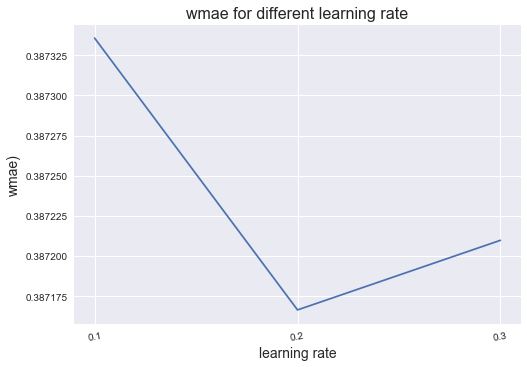

In [26]:
results_lr = {}
for i in [0.1, 0.2, 0.3]:
    result = {}
    print('\n\n\n\nrunning while min_cw = {}'.format(i))
    params={'booster': 'gblinear',
        'objective': 'reg:linear',
        'eta': i,
        'depth': 8,
        'subsample': 1.0,
        'min_child_weight': 5,
        'col_sample_bytree': 0.2,
        'seed': 0,
        'silent': 1,
        }

    watchlist = [(dataset_val, 'val'),(dataset_train,'train')]
    model = xgb.train(params,dataset_train,num_boost_round=6000,early_stopping_rounds=300,evals=watchlist, feval=wmae_xgb,maximize=False)
    pred_xgb = model.predict(dataset_val)
    
    result['predictions'] = pred_xgb
    result['wmae'] = wmae(y_test, pred_xgb)
    results_lr['{}'.format(i)] = result
    
print(results_lr)          # 38 negtive rows
plot_results(results_lr, 'learning rate') 

In [32]:
a = pd.DataFrame(results_lr['0.2']['predictions'])
a[a[0]<0].shape

(19, 1)





running while min_cw = 0.5
[0]	val-wmae:0.554601	train-wmae:0.540677
Multiple eval metrics have been passed: 'train-wmae' will be used for early stopping.

Will train until train-wmae hasn't improved in 300 rounds.
[1]	val-wmae:0.489679	train-wmae:0.461071
[2]	val-wmae:0.458035	train-wmae:0.413557
[3]	val-wmae:0.438602	train-wmae:0.380161
[4]	val-wmae:0.426522	train-wmae:0.356363
[5]	val-wmae:0.419418	train-wmae:0.339634
[6]	val-wmae:0.415521	train-wmae:0.32781
[7]	val-wmae:0.413366	train-wmae:0.319416
[8]	val-wmae:0.412357	train-wmae:0.313574
[9]	val-wmae:0.41187	train-wmae:0.309505
[10]	val-wmae:0.411822	train-wmae:0.306682
[11]	val-wmae:0.411975	train-wmae:0.304647
[12]	val-wmae:0.412218	train-wmae:0.303169
[13]	val-wmae:0.412521	train-wmae:0.302137
[14]	val-wmae:0.412492	train-wmae:0.301209
[15]	val-wmae:0.412844	train-wmae:0.300656
[16]	val-wmae:0.412559	train-wmae:0.299924
[17]	val-wmae:0.412545	train-wmae:0.299442
[18]	val-wmae:0.412517	train-wmae:0.299012
[19]	val-wmae:0.41

[186]	val-wmae:0.399496	train-wmae:0.283081
[187]	val-wmae:0.399432	train-wmae:0.283041
[188]	val-wmae:0.399403	train-wmae:0.283017
[189]	val-wmae:0.399365	train-wmae:0.282988
[190]	val-wmae:0.399326	train-wmae:0.282959
[191]	val-wmae:0.3993	train-wmae:0.282935
[192]	val-wmae:0.399271	train-wmae:0.282912
[193]	val-wmae:0.399239	train-wmae:0.282886
[194]	val-wmae:0.399207	train-wmae:0.282861
[195]	val-wmae:0.39917	train-wmae:0.282834
[196]	val-wmae:0.399138	train-wmae:0.282808
[197]	val-wmae:0.399109	train-wmae:0.282785
[198]	val-wmae:0.39908	train-wmae:0.282758
[199]	val-wmae:0.399036	train-wmae:0.28273
[200]	val-wmae:0.399012	train-wmae:0.28271
[201]	val-wmae:0.39897	train-wmae:0.282682
[202]	val-wmae:0.398939	train-wmae:0.282657
[203]	val-wmae:0.398916	train-wmae:0.282635
[204]	val-wmae:0.398893	train-wmae:0.282616
[205]	val-wmae:0.398847	train-wmae:0.282588
[206]	val-wmae:0.398824	train-wmae:0.282569
[207]	val-wmae:0.398798	train-wmae:0.282549
[208]	val-wmae:0.398765	train-wmae:0.28

[374]	val-wmae:0.395467	train-wmae:0.280217
[375]	val-wmae:0.395451	train-wmae:0.280207
[376]	val-wmae:0.395437	train-wmae:0.280198
[377]	val-wmae:0.395421	train-wmae:0.280189
[378]	val-wmae:0.395409	train-wmae:0.280181
[379]	val-wmae:0.3954	train-wmae:0.280173
[380]	val-wmae:0.395382	train-wmae:0.280163
[381]	val-wmae:0.395368	train-wmae:0.280153
[382]	val-wmae:0.395356	train-wmae:0.280146
[383]	val-wmae:0.395345	train-wmae:0.280139
[384]	val-wmae:0.395328	train-wmae:0.280129
[385]	val-wmae:0.395321	train-wmae:0.280123
[386]	val-wmae:0.395304	train-wmae:0.280112
[387]	val-wmae:0.395292	train-wmae:0.280105
[388]	val-wmae:0.395282	train-wmae:0.280098
[389]	val-wmae:0.395266	train-wmae:0.280089
[390]	val-wmae:0.395251	train-wmae:0.280079
[391]	val-wmae:0.395245	train-wmae:0.280075
[392]	val-wmae:0.395229	train-wmae:0.280065
[393]	val-wmae:0.39522	train-wmae:0.280058
[394]	val-wmae:0.395207	train-wmae:0.280049
[395]	val-wmae:0.395196	train-wmae:0.280042
[396]	val-wmae:0.395183	train-wmae:

[562]	val-wmae:0.393684	train-wmae:0.279042
[563]	val-wmae:0.393677	train-wmae:0.279038
[564]	val-wmae:0.393674	train-wmae:0.279035
[565]	val-wmae:0.393669	train-wmae:0.27903
[566]	val-wmae:0.393664	train-wmae:0.279026
[567]	val-wmae:0.393655	train-wmae:0.27902
[568]	val-wmae:0.393648	train-wmae:0.279016
[569]	val-wmae:0.393646	train-wmae:0.279013
[570]	val-wmae:0.39364	train-wmae:0.279009
[571]	val-wmae:0.393631	train-wmae:0.279003
[572]	val-wmae:0.393629	train-wmae:0.279
[573]	val-wmae:0.393621	train-wmae:0.278994
[574]	val-wmae:0.393616	train-wmae:0.27899
[575]	val-wmae:0.393614	train-wmae:0.278988
[576]	val-wmae:0.393605	train-wmae:0.278982
[577]	val-wmae:0.393602	train-wmae:0.278978
[578]	val-wmae:0.393596	train-wmae:0.278974
[579]	val-wmae:0.393589	train-wmae:0.278969
[580]	val-wmae:0.393584	train-wmae:0.278964
[581]	val-wmae:0.393582	train-wmae:0.278962
[582]	val-wmae:0.393573	train-wmae:0.278955
[583]	val-wmae:0.393569	train-wmae:0.278952
[584]	val-wmae:0.393564	train-wmae:0.27

[750]	val-wmae:0.392897	train-wmae:0.278381
[751]	val-wmae:0.392894	train-wmae:0.278379
[752]	val-wmae:0.39289	train-wmae:0.278376
[753]	val-wmae:0.392886	train-wmae:0.278372
[754]	val-wmae:0.392884	train-wmae:0.27837
[755]	val-wmae:0.392879	train-wmae:0.278366
[756]	val-wmae:0.392876	train-wmae:0.278363
[757]	val-wmae:0.392876	train-wmae:0.278361
[758]	val-wmae:0.392873	train-wmae:0.278359
[759]	val-wmae:0.392869	train-wmae:0.278356
[760]	val-wmae:0.392864	train-wmae:0.278352
[761]	val-wmae:0.39286	train-wmae:0.278349
[762]	val-wmae:0.392859	train-wmae:0.278347
[763]	val-wmae:0.392855	train-wmae:0.278344
[764]	val-wmae:0.392852	train-wmae:0.278341
[765]	val-wmae:0.392852	train-wmae:0.278339
[766]	val-wmae:0.392845	train-wmae:0.278334
[767]	val-wmae:0.392844	train-wmae:0.278332
[768]	val-wmae:0.392842	train-wmae:0.27833
[769]	val-wmae:0.392839	train-wmae:0.278327
[770]	val-wmae:0.392836	train-wmae:0.278325
[771]	val-wmae:0.392833	train-wmae:0.278322
[772]	val-wmae:0.392827	train-wmae:0

[937]	val-wmae:0.392437	train-wmae:0.277941
[938]	val-wmae:0.392434	train-wmae:0.277939
[939]	val-wmae:0.392431	train-wmae:0.277937
[940]	val-wmae:0.392427	train-wmae:0.277934
[941]	val-wmae:0.392427	train-wmae:0.277933
[942]	val-wmae:0.392424	train-wmae:0.277931
[943]	val-wmae:0.392425	train-wmae:0.27793
[944]	val-wmae:0.392422	train-wmae:0.277927
[945]	val-wmae:0.392421	train-wmae:0.277926
[946]	val-wmae:0.392418	train-wmae:0.277923
[947]	val-wmae:0.392416	train-wmae:0.277922
[948]	val-wmae:0.392415	train-wmae:0.27792
[949]	val-wmae:0.392413	train-wmae:0.277919
[950]	val-wmae:0.392409	train-wmae:0.277916
[951]	val-wmae:0.392406	train-wmae:0.277913
[952]	val-wmae:0.392405	train-wmae:0.277912
[953]	val-wmae:0.392405	train-wmae:0.277911
[954]	val-wmae:0.392402	train-wmae:0.277909
[955]	val-wmae:0.392399	train-wmae:0.277906
[956]	val-wmae:0.392399	train-wmae:0.277905
[957]	val-wmae:0.392397	train-wmae:0.277903
[958]	val-wmae:0.392394	train-wmae:0.277901
[959]	val-wmae:0.392391	train-wmae

[1122]	val-wmae:0.392145	train-wmae:0.27765
[1123]	val-wmae:0.392143	train-wmae:0.277648
[1124]	val-wmae:0.39214	train-wmae:0.277646
[1125]	val-wmae:0.39214	train-wmae:0.277645
[1126]	val-wmae:0.392138	train-wmae:0.277643
[1127]	val-wmae:0.392136	train-wmae:0.277642
[1128]	val-wmae:0.392136	train-wmae:0.277641
[1129]	val-wmae:0.392135	train-wmae:0.27764
[1130]	val-wmae:0.392133	train-wmae:0.277638
[1131]	val-wmae:0.392133	train-wmae:0.277638
[1132]	val-wmae:0.392132	train-wmae:0.277637
[1133]	val-wmae:0.39213	train-wmae:0.277636
[1134]	val-wmae:0.392129	train-wmae:0.277634
[1135]	val-wmae:0.392126	train-wmae:0.277631
[1136]	val-wmae:0.392127	train-wmae:0.277631
[1137]	val-wmae:0.392125	train-wmae:0.27763
[1138]	val-wmae:0.392123	train-wmae:0.277628
[1139]	val-wmae:0.392123	train-wmae:0.277628
[1140]	val-wmae:0.39212	train-wmae:0.277626
[1141]	val-wmae:0.39212	train-wmae:0.277625
[1142]	val-wmae:0.392118	train-wmae:0.277623
[1143]	val-wmae:0.392117	train-wmae:0.277622
[1144]	val-wmae:0.

[1305]	val-wmae:0.391946	train-wmae:0.277446
[1306]	val-wmae:0.391946	train-wmae:0.277446
[1307]	val-wmae:0.391945	train-wmae:0.277445
[1308]	val-wmae:0.391945	train-wmae:0.277445
[1309]	val-wmae:0.391943	train-wmae:0.277443
[1310]	val-wmae:0.391943	train-wmae:0.277443
[1311]	val-wmae:0.391942	train-wmae:0.277442
[1312]	val-wmae:0.39194	train-wmae:0.27744
[1313]	val-wmae:0.39194	train-wmae:0.27744
[1314]	val-wmae:0.391939	train-wmae:0.277438
[1315]	val-wmae:0.391938	train-wmae:0.277438
[1316]	val-wmae:0.391936	train-wmae:0.277436
[1317]	val-wmae:0.391935	train-wmae:0.277435
[1318]	val-wmae:0.391934	train-wmae:0.277434
[1319]	val-wmae:0.391934	train-wmae:0.277434
[1320]	val-wmae:0.391932	train-wmae:0.277432
[1321]	val-wmae:0.391933	train-wmae:0.277432
[1322]	val-wmae:0.391931	train-wmae:0.277431
[1323]	val-wmae:0.39193	train-wmae:0.27743
[1324]	val-wmae:0.391931	train-wmae:0.27743
[1325]	val-wmae:0.391929	train-wmae:0.277428
[1326]	val-wmae:0.391928	train-wmae:0.277427
[1327]	val-wmae:0

[1488]	val-wmae:0.391804	train-wmae:0.277301
[1489]	val-wmae:0.391805	train-wmae:0.277301
[1490]	val-wmae:0.391803	train-wmae:0.277299
[1491]	val-wmae:0.391801	train-wmae:0.277298
[1492]	val-wmae:0.391801	train-wmae:0.277298
[1493]	val-wmae:0.3918	train-wmae:0.277297
[1494]	val-wmae:0.391801	train-wmae:0.277297
[1495]	val-wmae:0.3918	train-wmae:0.277296
[1496]	val-wmae:0.391799	train-wmae:0.277295
[1497]	val-wmae:0.391798	train-wmae:0.277295
[1498]	val-wmae:0.391797	train-wmae:0.277294
[1499]	val-wmae:0.391797	train-wmae:0.277293
[1500]	val-wmae:0.391795	train-wmae:0.277292
[1501]	val-wmae:0.391796	train-wmae:0.277292
[1502]	val-wmae:0.391795	train-wmae:0.277292
[1503]	val-wmae:0.391794	train-wmae:0.277291
[1504]	val-wmae:0.391794	train-wmae:0.27729
[1505]	val-wmae:0.391792	train-wmae:0.277289
[1506]	val-wmae:0.391791	train-wmae:0.277288
[1507]	val-wmae:0.391792	train-wmae:0.277288
[1508]	val-wmae:0.39179	train-wmae:0.277287
[1509]	val-wmae:0.39179	train-wmae:0.277287
[1510]	val-wmae:0

[1671]	val-wmae:0.391698	train-wmae:0.277196
[1672]	val-wmae:0.391695	train-wmae:0.277194
[1673]	val-wmae:0.391696	train-wmae:0.277194
[1674]	val-wmae:0.391696	train-wmae:0.277194
[1675]	val-wmae:0.391695	train-wmae:0.277193
[1676]	val-wmae:0.391694	train-wmae:0.277192
[1677]	val-wmae:0.391693	train-wmae:0.277192
[1678]	val-wmae:0.391693	train-wmae:0.277192
[1679]	val-wmae:0.391692	train-wmae:0.277191
[1680]	val-wmae:0.391692	train-wmae:0.277191
[1681]	val-wmae:0.391691	train-wmae:0.27719
[1682]	val-wmae:0.391691	train-wmae:0.27719
[1683]	val-wmae:0.391691	train-wmae:0.277189
[1684]	val-wmae:0.391689	train-wmae:0.277188
[1685]	val-wmae:0.39169	train-wmae:0.277189
[1686]	val-wmae:0.39169	train-wmae:0.277188
[1687]	val-wmae:0.391687	train-wmae:0.277187
[1688]	val-wmae:0.391688	train-wmae:0.277187
[1689]	val-wmae:0.391688	train-wmae:0.277187
[1690]	val-wmae:0.391686	train-wmae:0.277185
[1691]	val-wmae:0.391687	train-wmae:0.277186
[1692]	val-wmae:0.391685	train-wmae:0.277184
[1693]	val-wma

[1854]	val-wmae:0.391612	train-wmae:0.277114
[1855]	val-wmae:0.391612	train-wmae:0.277114
[1856]	val-wmae:0.391612	train-wmae:0.277114
[1857]	val-wmae:0.391612	train-wmae:0.277114
[1858]	val-wmae:0.39161	train-wmae:0.277113
[1859]	val-wmae:0.391611	train-wmae:0.277113
[1860]	val-wmae:0.391609	train-wmae:0.277112
[1861]	val-wmae:0.391609	train-wmae:0.277112
[1862]	val-wmae:0.391609	train-wmae:0.277111
[1863]	val-wmae:0.39161	train-wmae:0.277112
[1864]	val-wmae:0.391608	train-wmae:0.277111
[1865]	val-wmae:0.391609	train-wmae:0.277111
[1866]	val-wmae:0.391608	train-wmae:0.277111
[1867]	val-wmae:0.391608	train-wmae:0.27711
[1868]	val-wmae:0.391606	train-wmae:0.277109
[1869]	val-wmae:0.391607	train-wmae:0.277109
[1870]	val-wmae:0.391606	train-wmae:0.277109
[1871]	val-wmae:0.391606	train-wmae:0.277109
[1872]	val-wmae:0.391606	train-wmae:0.277108
[1873]	val-wmae:0.391604	train-wmae:0.277107
[1874]	val-wmae:0.391605	train-wmae:0.277108
[1875]	val-wmae:0.391604	train-wmae:0.277107
[1876]	val-wm

[2037]	val-wmae:0.391546	train-wmae:0.277052
[2038]	val-wmae:0.391544	train-wmae:0.277051
[2039]	val-wmae:0.391545	train-wmae:0.277051
[2040]	val-wmae:0.391544	train-wmae:0.27705
[2041]	val-wmae:0.391544	train-wmae:0.27705
[2042]	val-wmae:0.391544	train-wmae:0.27705
[2043]	val-wmae:0.391543	train-wmae:0.27705
[2044]	val-wmae:0.391543	train-wmae:0.277049
[2045]	val-wmae:0.391543	train-wmae:0.277049
[2046]	val-wmae:0.391543	train-wmae:0.277049
[2047]	val-wmae:0.391542	train-wmae:0.277049
[2048]	val-wmae:0.391542	train-wmae:0.277049
[2049]	val-wmae:0.391541	train-wmae:0.277048
[2050]	val-wmae:0.391542	train-wmae:0.277048
[2051]	val-wmae:0.391542	train-wmae:0.277048
[2052]	val-wmae:0.391541	train-wmae:0.277047
[2053]	val-wmae:0.391539	train-wmae:0.277046
[2054]	val-wmae:0.39154	train-wmae:0.277047
[2055]	val-wmae:0.391539	train-wmae:0.277046
[2056]	val-wmae:0.391539	train-wmae:0.277046
[2057]	val-wmae:0.391539	train-wmae:0.277046
[2058]	val-wmae:0.391538	train-wmae:0.277045
[2059]	val-wmae

[2220]	val-wmae:0.391489	train-wmae:0.277003
[2221]	val-wmae:0.391489	train-wmae:0.277003
[2222]	val-wmae:0.391489	train-wmae:0.277003
[2223]	val-wmae:0.391488	train-wmae:0.277002
[2224]	val-wmae:0.391488	train-wmae:0.277002
[2225]	val-wmae:0.391488	train-wmae:0.277002
[2226]	val-wmae:0.391487	train-wmae:0.277001
[2227]	val-wmae:0.391487	train-wmae:0.277001
[2228]	val-wmae:0.391487	train-wmae:0.277001
[2229]	val-wmae:0.391486	train-wmae:0.277001
[2230]	val-wmae:0.391487	train-wmae:0.277001
[2231]	val-wmae:0.391485	train-wmae:0.277
[2232]	val-wmae:0.391486	train-wmae:0.277
[2233]	val-wmae:0.391485	train-wmae:0.277
[2234]	val-wmae:0.391486	train-wmae:0.277
[2235]	val-wmae:0.391485	train-wmae:0.276999
[2236]	val-wmae:0.391485	train-wmae:0.277
[2237]	val-wmae:0.391484	train-wmae:0.276999
[2238]	val-wmae:0.391484	train-wmae:0.276998
[2239]	val-wmae:0.391485	train-wmae:0.276999
[2240]	val-wmae:0.391483	train-wmae:0.276998
[2241]	val-wmae:0.391483	train-wmae:0.276998
[2242]	val-wmae:0.391483	

[2404]	val-wmae:0.391443	train-wmae:0.276964
[2405]	val-wmae:0.391442	train-wmae:0.276963
[2406]	val-wmae:0.391442	train-wmae:0.276963
[2407]	val-wmae:0.391442	train-wmae:0.276963
[2408]	val-wmae:0.391441	train-wmae:0.276962
[2409]	val-wmae:0.391442	train-wmae:0.276963
[2410]	val-wmae:0.391442	train-wmae:0.276963
[2411]	val-wmae:0.391441	train-wmae:0.276962
[2412]	val-wmae:0.391441	train-wmae:0.276962
[2413]	val-wmae:0.391441	train-wmae:0.276962
[2414]	val-wmae:0.39144	train-wmae:0.276962
[2415]	val-wmae:0.391439	train-wmae:0.276961
[2416]	val-wmae:0.39144	train-wmae:0.276961
[2417]	val-wmae:0.391439	train-wmae:0.276961
[2418]	val-wmae:0.391439	train-wmae:0.27696
[2419]	val-wmae:0.391439	train-wmae:0.276961
[2420]	val-wmae:0.391439	train-wmae:0.27696
[2421]	val-wmae:0.391438	train-wmae:0.27696
[2422]	val-wmae:0.391438	train-wmae:0.27696
[2423]	val-wmae:0.391438	train-wmae:0.27696
[2424]	val-wmae:0.391438	train-wmae:0.27696
[2425]	val-wmae:0.391438	train-wmae:0.27696
[2426]	val-wmae:0.3

[2587]	val-wmae:0.391403	train-wmae:0.27693
[2588]	val-wmae:0.391403	train-wmae:0.27693
[2589]	val-wmae:0.391402	train-wmae:0.276929
[2590]	val-wmae:0.391402	train-wmae:0.276929
[2591]	val-wmae:0.391402	train-wmae:0.27693
[2592]	val-wmae:0.391402	train-wmae:0.276929
[2593]	val-wmae:0.391402	train-wmae:0.276929
[2594]	val-wmae:0.391401	train-wmae:0.276928
[2595]	val-wmae:0.391401	train-wmae:0.276928
[2596]	val-wmae:0.391401	train-wmae:0.276929
[2597]	val-wmae:0.391401	train-wmae:0.276928
[2598]	val-wmae:0.391401	train-wmae:0.276928
[2599]	val-wmae:0.3914	train-wmae:0.276927
[2600]	val-wmae:0.391401	train-wmae:0.276928
[2601]	val-wmae:0.391401	train-wmae:0.276928
[2602]	val-wmae:0.3914	train-wmae:0.276928
[2603]	val-wmae:0.3914	train-wmae:0.276927
[2604]	val-wmae:0.3914	train-wmae:0.276927
[2605]	val-wmae:0.391399	train-wmae:0.276927
[2606]	val-wmae:0.3914	train-wmae:0.276927
[2607]	val-wmae:0.391399	train-wmae:0.276926
[2608]	val-wmae:0.391399	train-wmae:0.276927
[2609]	val-wmae:0.39139

[2770]	val-wmae:0.391373	train-wmae:0.276901
[2771]	val-wmae:0.391374	train-wmae:0.276901
[2772]	val-wmae:0.391373	train-wmae:0.2769
[2773]	val-wmae:0.391374	train-wmae:0.276901
[2774]	val-wmae:0.391373	train-wmae:0.2769
[2775]	val-wmae:0.391373	train-wmae:0.2769
[2776]	val-wmae:0.391372	train-wmae:0.2769
[2777]	val-wmae:0.391372	train-wmae:0.2769
[2778]	val-wmae:0.391372	train-wmae:0.2769
[2779]	val-wmae:0.391372	train-wmae:0.2769
[2780]	val-wmae:0.391372	train-wmae:0.276899
[2781]	val-wmae:0.391373	train-wmae:0.2769
[2782]	val-wmae:0.391372	train-wmae:0.276899
[2783]	val-wmae:0.391372	train-wmae:0.276899
[2784]	val-wmae:0.391372	train-wmae:0.276899
[2785]	val-wmae:0.391371	train-wmae:0.276898
[2786]	val-wmae:0.391371	train-wmae:0.276898
[2787]	val-wmae:0.391371	train-wmae:0.276898
[2788]	val-wmae:0.391372	train-wmae:0.276899
[2789]	val-wmae:0.39137	train-wmae:0.276898
[2790]	val-wmae:0.391371	train-wmae:0.276898
[2791]	val-wmae:0.39137	train-wmae:0.276898
[2792]	val-wmae:0.391371	tra

[2954]	val-wmae:0.391348	train-wmae:0.276878
[2955]	val-wmae:0.391348	train-wmae:0.276878
[2956]	val-wmae:0.391348	train-wmae:0.276878
[2957]	val-wmae:0.391349	train-wmae:0.276878
[2958]	val-wmae:0.391347	train-wmae:0.276877
[2959]	val-wmae:0.391347	train-wmae:0.276877
[2960]	val-wmae:0.391348	train-wmae:0.276877
[2961]	val-wmae:0.391348	train-wmae:0.276877
[2962]	val-wmae:0.391347	train-wmae:0.276877
[2963]	val-wmae:0.391348	train-wmae:0.276877
[2964]	val-wmae:0.391347	train-wmae:0.276876
[2965]	val-wmae:0.391347	train-wmae:0.276876
[2966]	val-wmae:0.391347	train-wmae:0.276877
[2967]	val-wmae:0.391347	train-wmae:0.276877
[2968]	val-wmae:0.391346	train-wmae:0.276876
[2969]	val-wmae:0.391347	train-wmae:0.276876
[2970]	val-wmae:0.391347	train-wmae:0.276876
[2971]	val-wmae:0.391346	train-wmae:0.276876
[2972]	val-wmae:0.391347	train-wmae:0.276876
[2973]	val-wmae:0.391346	train-wmae:0.276875
[2974]	val-wmae:0.391345	train-wmae:0.276875
[2975]	val-wmae:0.391345	train-wmae:0.276875
[2976]	val

[3137]	val-wmae:0.391328	train-wmae:0.276859
[3138]	val-wmae:0.391327	train-wmae:0.276858
[3139]	val-wmae:0.391328	train-wmae:0.276858
[3140]	val-wmae:0.391327	train-wmae:0.276858
[3141]	val-wmae:0.391328	train-wmae:0.276858
[3142]	val-wmae:0.391327	train-wmae:0.276858
[3143]	val-wmae:0.391327	train-wmae:0.276858
[3144]	val-wmae:0.391327	train-wmae:0.276858
[3145]	val-wmae:0.391327	train-wmae:0.276857
[3146]	val-wmae:0.391326	train-wmae:0.276857
[3147]	val-wmae:0.391327	train-wmae:0.276858
[3148]	val-wmae:0.391326	train-wmae:0.276857
[3149]	val-wmae:0.391326	train-wmae:0.276857
[3150]	val-wmae:0.391327	train-wmae:0.276857
[3151]	val-wmae:0.391326	train-wmae:0.276857
[3152]	val-wmae:0.391326	train-wmae:0.276857
[3153]	val-wmae:0.391326	train-wmae:0.276857
[3154]	val-wmae:0.391327	train-wmae:0.276857
[3155]	val-wmae:0.391326	train-wmae:0.276856
[3156]	val-wmae:0.391326	train-wmae:0.276857
[3157]	val-wmae:0.391326	train-wmae:0.276857
[3158]	val-wmae:0.391325	train-wmae:0.276856
[3159]	val

[3320]	val-wmae:0.391313	train-wmae:0.276842
[3321]	val-wmae:0.391313	train-wmae:0.276842
[3322]	val-wmae:0.391312	train-wmae:0.276841
[3323]	val-wmae:0.391312	train-wmae:0.276841
[3324]	val-wmae:0.391312	train-wmae:0.276841
[3325]	val-wmae:0.391312	train-wmae:0.276841
[3326]	val-wmae:0.391312	train-wmae:0.276841
[3327]	val-wmae:0.391312	train-wmae:0.276841
[3328]	val-wmae:0.391312	train-wmae:0.276841
[3329]	val-wmae:0.391312	train-wmae:0.276841
[3330]	val-wmae:0.391312	train-wmae:0.276841
[3331]	val-wmae:0.391311	train-wmae:0.27684
[3332]	val-wmae:0.391312	train-wmae:0.276841
[3333]	val-wmae:0.391311	train-wmae:0.27684
[3334]	val-wmae:0.391312	train-wmae:0.276841
[3335]	val-wmae:0.391311	train-wmae:0.27684
[3336]	val-wmae:0.391311	train-wmae:0.27684
[3337]	val-wmae:0.391311	train-wmae:0.27684
[3338]	val-wmae:0.391311	train-wmae:0.27684
[3339]	val-wmae:0.391311	train-wmae:0.27684
[3340]	val-wmae:0.391311	train-wmae:0.27684
[3341]	val-wmae:0.39131	train-wmae:0.276839
[3342]	val-wmae:0.3

[3504]	val-wmae:0.3913	train-wmae:0.276826
[3505]	val-wmae:0.391299	train-wmae:0.276826
[3506]	val-wmae:0.391299	train-wmae:0.276826
[3507]	val-wmae:0.391299	train-wmae:0.276826
[3508]	val-wmae:0.3913	train-wmae:0.276826
[3509]	val-wmae:0.3913	train-wmae:0.276826
[3510]	val-wmae:0.391299	train-wmae:0.276826
[3511]	val-wmae:0.391299	train-wmae:0.276826
[3512]	val-wmae:0.391299	train-wmae:0.276825
[3513]	val-wmae:0.391299	train-wmae:0.276826
[3514]	val-wmae:0.391299	train-wmae:0.276826
[3515]	val-wmae:0.391299	train-wmae:0.276825
[3516]	val-wmae:0.391299	train-wmae:0.276825
[3517]	val-wmae:0.3913	train-wmae:0.276826
[3518]	val-wmae:0.391299	train-wmae:0.276825
[3519]	val-wmae:0.391298	train-wmae:0.276825
[3520]	val-wmae:0.391299	train-wmae:0.276825
[3521]	val-wmae:0.391299	train-wmae:0.276825
[3522]	val-wmae:0.391298	train-wmae:0.276825
[3523]	val-wmae:0.391298	train-wmae:0.276825
[3524]	val-wmae:0.391299	train-wmae:0.276825
[3525]	val-wmae:0.391298	train-wmae:0.276824
[3526]	val-wmae:0.

[3687]	val-wmae:0.391288	train-wmae:0.276812
[3688]	val-wmae:0.391288	train-wmae:0.276812
[3689]	val-wmae:0.391289	train-wmae:0.276813
[3690]	val-wmae:0.391288	train-wmae:0.276812
[3691]	val-wmae:0.391288	train-wmae:0.276812
[3692]	val-wmae:0.391288	train-wmae:0.276812
[3693]	val-wmae:0.391288	train-wmae:0.276812
[3694]	val-wmae:0.391288	train-wmae:0.276812
[3695]	val-wmae:0.391288	train-wmae:0.276812
[3696]	val-wmae:0.391288	train-wmae:0.276812
[3697]	val-wmae:0.391288	train-wmae:0.276811
[3698]	val-wmae:0.391288	train-wmae:0.276812
[3699]	val-wmae:0.391287	train-wmae:0.276811
[3700]	val-wmae:0.391288	train-wmae:0.276811
[3701]	val-wmae:0.391288	train-wmae:0.276812
[3702]	val-wmae:0.391287	train-wmae:0.276811
[3703]	val-wmae:0.391287	train-wmae:0.276811
[3704]	val-wmae:0.391288	train-wmae:0.276812
[3705]	val-wmae:0.391287	train-wmae:0.276811
[3706]	val-wmae:0.391288	train-wmae:0.276811
[3707]	val-wmae:0.391288	train-wmae:0.276811
[3708]	val-wmae:0.391287	train-wmae:0.276811
[3709]	val

[3870]	val-wmae:0.391279	train-wmae:0.276801
[3871]	val-wmae:0.391279	train-wmae:0.276801
[3872]	val-wmae:0.391278	train-wmae:0.2768
[3873]	val-wmae:0.391279	train-wmae:0.2768
[3874]	val-wmae:0.391279	train-wmae:0.2768
[3875]	val-wmae:0.391278	train-wmae:0.2768
[3876]	val-wmae:0.391278	train-wmae:0.2768
[3877]	val-wmae:0.391279	train-wmae:0.2768
[3878]	val-wmae:0.391279	train-wmae:0.2768
[3879]	val-wmae:0.391279	train-wmae:0.2768
[3880]	val-wmae:0.391279	train-wmae:0.2768
[3881]	val-wmae:0.391278	train-wmae:0.2768
[3882]	val-wmae:0.391278	train-wmae:0.2768
[3883]	val-wmae:0.391279	train-wmae:0.2768
[3884]	val-wmae:0.391278	train-wmae:0.276799
[3885]	val-wmae:0.391278	train-wmae:0.276799
[3886]	val-wmae:0.391278	train-wmae:0.276799
[3887]	val-wmae:0.391278	train-wmae:0.276799
[3888]	val-wmae:0.391278	train-wmae:0.276799
[3889]	val-wmae:0.391278	train-wmae:0.276799
[3890]	val-wmae:0.391278	train-wmae:0.276799
[3891]	val-wmae:0.391278	train-wmae:0.276799
[3892]	val-wmae:0.391278	train-wma

[4053]	val-wmae:0.391272	train-wmae:0.27679
[4054]	val-wmae:0.391272	train-wmae:0.27679
[4055]	val-wmae:0.391272	train-wmae:0.27679
[4056]	val-wmae:0.391272	train-wmae:0.27679
[4057]	val-wmae:0.391272	train-wmae:0.27679
[4058]	val-wmae:0.391272	train-wmae:0.27679
[4059]	val-wmae:0.391272	train-wmae:0.27679
[4060]	val-wmae:0.391273	train-wmae:0.27679
[4061]	val-wmae:0.391272	train-wmae:0.276789
[4062]	val-wmae:0.391272	train-wmae:0.27679
[4063]	val-wmae:0.391272	train-wmae:0.27679
[4064]	val-wmae:0.391272	train-wmae:0.276789
[4065]	val-wmae:0.391272	train-wmae:0.276789
[4066]	val-wmae:0.391272	train-wmae:0.276789
[4067]	val-wmae:0.391272	train-wmae:0.276789
[4068]	val-wmae:0.391272	train-wmae:0.276789
[4069]	val-wmae:0.391272	train-wmae:0.276789
[4070]	val-wmae:0.391272	train-wmae:0.276789
[4071]	val-wmae:0.391272	train-wmae:0.276789
[4072]	val-wmae:0.391272	train-wmae:0.276789
[4073]	val-wmae:0.391272	train-wmae:0.276789
[4074]	val-wmae:0.391271	train-wmae:0.276789
[4075]	val-wmae:0.39

[4237]	val-wmae:0.391267	train-wmae:0.27678
[4238]	val-wmae:0.391268	train-wmae:0.276781
[4239]	val-wmae:0.391267	train-wmae:0.27678
[4240]	val-wmae:0.391268	train-wmae:0.276781
[4241]	val-wmae:0.391268	train-wmae:0.276781
[4242]	val-wmae:0.391267	train-wmae:0.27678
[4243]	val-wmae:0.391268	train-wmae:0.27678
[4244]	val-wmae:0.391268	train-wmae:0.276781
[4245]	val-wmae:0.391267	train-wmae:0.27678
[4246]	val-wmae:0.391267	train-wmae:0.27678
[4247]	val-wmae:0.391268	train-wmae:0.27678
[4248]	val-wmae:0.391267	train-wmae:0.27678
[4249]	val-wmae:0.391268	train-wmae:0.27678
[4250]	val-wmae:0.391268	train-wmae:0.27678
[4251]	val-wmae:0.391268	train-wmae:0.27678
[4252]	val-wmae:0.391268	train-wmae:0.27678
[4253]	val-wmae:0.391268	train-wmae:0.27678
[4254]	val-wmae:0.391268	train-wmae:0.27678
[4255]	val-wmae:0.391267	train-wmae:0.27678
[4256]	val-wmae:0.391268	train-wmae:0.27678
[4257]	val-wmae:0.391267	train-wmae:0.27678
[4258]	val-wmae:0.391268	train-wmae:0.27678
[4259]	val-wmae:0.391268	tra

[4420]	val-wmae:0.391265	train-wmae:0.276772
[4421]	val-wmae:0.391264	train-wmae:0.276772
[4422]	val-wmae:0.391264	train-wmae:0.276772
[4423]	val-wmae:0.391264	train-wmae:0.276772
[4424]	val-wmae:0.391264	train-wmae:0.276772
[4425]	val-wmae:0.391265	train-wmae:0.276772
[4426]	val-wmae:0.391264	train-wmae:0.276772
[4427]	val-wmae:0.391264	train-wmae:0.276772
[4428]	val-wmae:0.391264	train-wmae:0.276772
[4429]	val-wmae:0.391264	train-wmae:0.276772
[4430]	val-wmae:0.391264	train-wmae:0.276772
[4431]	val-wmae:0.391264	train-wmae:0.276772
[4432]	val-wmae:0.391264	train-wmae:0.276772
[4433]	val-wmae:0.391264	train-wmae:0.276772
[4434]	val-wmae:0.391264	train-wmae:0.276771
[4435]	val-wmae:0.391264	train-wmae:0.276771
[4436]	val-wmae:0.391264	train-wmae:0.276771
[4437]	val-wmae:0.391264	train-wmae:0.276771
[4438]	val-wmae:0.391264	train-wmae:0.276771
[4439]	val-wmae:0.391264	train-wmae:0.276771
[4440]	val-wmae:0.391263	train-wmae:0.276771
[4441]	val-wmae:0.391264	train-wmae:0.276771
[4442]	val

[4603]	val-wmae:0.391261	train-wmae:0.276765
[4604]	val-wmae:0.391261	train-wmae:0.276765
[4605]	val-wmae:0.391261	train-wmae:0.276764
[4606]	val-wmae:0.391261	train-wmae:0.276764
[4607]	val-wmae:0.391261	train-wmae:0.276764
[4608]	val-wmae:0.391261	train-wmae:0.276764
[4609]	val-wmae:0.391261	train-wmae:0.276764
[4610]	val-wmae:0.391261	train-wmae:0.276764
[4611]	val-wmae:0.391261	train-wmae:0.276764
[4612]	val-wmae:0.391261	train-wmae:0.276764
[4613]	val-wmae:0.391261	train-wmae:0.276764
[4614]	val-wmae:0.391261	train-wmae:0.276764
[4615]	val-wmae:0.391261	train-wmae:0.276764
[4616]	val-wmae:0.391261	train-wmae:0.276764
[4617]	val-wmae:0.391261	train-wmae:0.276764
[4618]	val-wmae:0.391261	train-wmae:0.276764
[4619]	val-wmae:0.39126	train-wmae:0.276764
[4620]	val-wmae:0.391261	train-wmae:0.276764
[4621]	val-wmae:0.391261	train-wmae:0.276764
[4622]	val-wmae:0.391261	train-wmae:0.276764
[4623]	val-wmae:0.391261	train-wmae:0.276764
[4624]	val-wmae:0.391261	train-wmae:0.276764
[4625]	val-

[4788]	val-wmae:0.391259	train-wmae:0.276757
[4789]	val-wmae:0.39126	train-wmae:0.276758
[4790]	val-wmae:0.39126	train-wmae:0.276758
[4791]	val-wmae:0.391259	train-wmae:0.276757
[4792]	val-wmae:0.391259	train-wmae:0.276758
[4793]	val-wmae:0.39126	train-wmae:0.276758
[4794]	val-wmae:0.391259	train-wmae:0.276757
[4795]	val-wmae:0.391259	train-wmae:0.276757
[4796]	val-wmae:0.391259	train-wmae:0.276757
[4797]	val-wmae:0.391259	train-wmae:0.276757
[4798]	val-wmae:0.39126	train-wmae:0.276758
[4799]	val-wmae:0.391259	train-wmae:0.276757
[4800]	val-wmae:0.391259	train-wmae:0.276757
[4801]	val-wmae:0.391259	train-wmae:0.276757
[4802]	val-wmae:0.391259	train-wmae:0.276757
[4803]	val-wmae:0.391259	train-wmae:0.276757
[4804]	val-wmae:0.391259	train-wmae:0.276757
[4805]	val-wmae:0.391259	train-wmae:0.276757
[4806]	val-wmae:0.391259	train-wmae:0.276757
[4807]	val-wmae:0.391259	train-wmae:0.276757
[4808]	val-wmae:0.39126	train-wmae:0.276757
[4809]	val-wmae:0.391259	train-wmae:0.276757
[4810]	val-wmae

[4971]	val-wmae:0.391258	train-wmae:0.276752
[4972]	val-wmae:0.391259	train-wmae:0.276752
[4973]	val-wmae:0.391259	train-wmae:0.276752
[4974]	val-wmae:0.391258	train-wmae:0.276752
[4975]	val-wmae:0.391259	train-wmae:0.276752
[4976]	val-wmae:0.391258	train-wmae:0.276752
[4977]	val-wmae:0.391259	train-wmae:0.276752
[4978]	val-wmae:0.391258	train-wmae:0.276752
[4979]	val-wmae:0.391258	train-wmae:0.276752
[4980]	val-wmae:0.391258	train-wmae:0.276752
[4981]	val-wmae:0.391259	train-wmae:0.276752
[4982]	val-wmae:0.391259	train-wmae:0.276752
[4983]	val-wmae:0.391258	train-wmae:0.276752
[4984]	val-wmae:0.391259	train-wmae:0.276752
[4985]	val-wmae:0.391259	train-wmae:0.276752
[4986]	val-wmae:0.391258	train-wmae:0.276752
[4987]	val-wmae:0.391258	train-wmae:0.276752
[4988]	val-wmae:0.391259	train-wmae:0.276752
[4989]	val-wmae:0.391259	train-wmae:0.276752
[4990]	val-wmae:0.391259	train-wmae:0.276752
[4991]	val-wmae:0.391259	train-wmae:0.276752
[4992]	val-wmae:0.391259	train-wmae:0.276752
[4993]	val

[5154]	val-wmae:0.391258	train-wmae:0.276747
[5155]	val-wmae:0.391258	train-wmae:0.276747
[5156]	val-wmae:0.391258	train-wmae:0.276747
[5157]	val-wmae:0.391258	train-wmae:0.276747
[5158]	val-wmae:0.391258	train-wmae:0.276747
[5159]	val-wmae:0.391258	train-wmae:0.276747
[5160]	val-wmae:0.391258	train-wmae:0.276747
[5161]	val-wmae:0.391258	train-wmae:0.276747
[5162]	val-wmae:0.391258	train-wmae:0.276747
[5163]	val-wmae:0.391258	train-wmae:0.276747
[5164]	val-wmae:0.391258	train-wmae:0.276747
[5165]	val-wmae:0.391258	train-wmae:0.276747
[5166]	val-wmae:0.391258	train-wmae:0.276747
[5167]	val-wmae:0.391258	train-wmae:0.276747
[5168]	val-wmae:0.391259	train-wmae:0.276747
[5169]	val-wmae:0.391258	train-wmae:0.276747
[5170]	val-wmae:0.391258	train-wmae:0.276747
[5171]	val-wmae:0.391258	train-wmae:0.276747
[5172]	val-wmae:0.391258	train-wmae:0.276746
[5173]	val-wmae:0.391258	train-wmae:0.276746
[5174]	val-wmae:0.391258	train-wmae:0.276747
[5175]	val-wmae:0.391258	train-wmae:0.276746
[5176]	val

[5337]	val-wmae:0.391258	train-wmae:0.276743
[5338]	val-wmae:0.391258	train-wmae:0.276743
[5339]	val-wmae:0.391258	train-wmae:0.276743
[5340]	val-wmae:0.391258	train-wmae:0.276742
[5341]	val-wmae:0.391258	train-wmae:0.276743
[5342]	val-wmae:0.391258	train-wmae:0.276743
[5343]	val-wmae:0.391258	train-wmae:0.276742
[5344]	val-wmae:0.391258	train-wmae:0.276742
[5345]	val-wmae:0.391258	train-wmae:0.276743
[5346]	val-wmae:0.391259	train-wmae:0.276743
[5347]	val-wmae:0.391258	train-wmae:0.276743
[5348]	val-wmae:0.391258	train-wmae:0.276743
[5349]	val-wmae:0.391258	train-wmae:0.276742
[5350]	val-wmae:0.391258	train-wmae:0.276742
[5351]	val-wmae:0.391258	train-wmae:0.276743
[5352]	val-wmae:0.391258	train-wmae:0.276742
[5353]	val-wmae:0.391258	train-wmae:0.276742
[5354]	val-wmae:0.391259	train-wmae:0.276742
[5355]	val-wmae:0.391258	train-wmae:0.276742
[5356]	val-wmae:0.391258	train-wmae:0.276742
[5357]	val-wmae:0.391258	train-wmae:0.276742
[5358]	val-wmae:0.391258	train-wmae:0.276742
[5359]	val

[5521]	val-wmae:0.391259	train-wmae:0.276738
[5522]	val-wmae:0.391259	train-wmae:0.276738
[5523]	val-wmae:0.391259	train-wmae:0.276738
[5524]	val-wmae:0.391258	train-wmae:0.276738
[5525]	val-wmae:0.391259	train-wmae:0.276738
[5526]	val-wmae:0.391259	train-wmae:0.276738
[5527]	val-wmae:0.391259	train-wmae:0.276738
[5528]	val-wmae:0.391259	train-wmae:0.276738
[5529]	val-wmae:0.391259	train-wmae:0.276738
[5530]	val-wmae:0.391259	train-wmae:0.276738
[5531]	val-wmae:0.391259	train-wmae:0.276738
[5532]	val-wmae:0.391259	train-wmae:0.276738
[5533]	val-wmae:0.391259	train-wmae:0.276738
[5534]	val-wmae:0.391259	train-wmae:0.276738
[5535]	val-wmae:0.391258	train-wmae:0.276738
[5536]	val-wmae:0.391259	train-wmae:0.276738
[5537]	val-wmae:0.391259	train-wmae:0.276738
[5538]	val-wmae:0.391259	train-wmae:0.276738
[5539]	val-wmae:0.391258	train-wmae:0.276738
[5540]	val-wmae:0.391259	train-wmae:0.276738
[5541]	val-wmae:0.391259	train-wmae:0.276738
[5542]	val-wmae:0.391259	train-wmae:0.276738
[5543]	val

[5705]	val-wmae:0.391261	train-wmae:0.276735
[5706]	val-wmae:0.391261	train-wmae:0.276735
[5707]	val-wmae:0.391261	train-wmae:0.276735
[5708]	val-wmae:0.391261	train-wmae:0.276734
[5709]	val-wmae:0.391261	train-wmae:0.276735
[5710]	val-wmae:0.391261	train-wmae:0.276735
[5711]	val-wmae:0.391261	train-wmae:0.276734
[5712]	val-wmae:0.391261	train-wmae:0.276735
[5713]	val-wmae:0.391261	train-wmae:0.276735
[5714]	val-wmae:0.391261	train-wmae:0.276734
[5715]	val-wmae:0.391261	train-wmae:0.276734
[5716]	val-wmae:0.391261	train-wmae:0.276734
[5717]	val-wmae:0.391261	train-wmae:0.276734
[5718]	val-wmae:0.391261	train-wmae:0.276734
[5719]	val-wmae:0.391262	train-wmae:0.276734
[5720]	val-wmae:0.391261	train-wmae:0.276734
[5721]	val-wmae:0.391261	train-wmae:0.276734
[5722]	val-wmae:0.391261	train-wmae:0.276734
[5723]	val-wmae:0.391261	train-wmae:0.276734
[5724]	val-wmae:0.391262	train-wmae:0.276734
[5725]	val-wmae:0.391262	train-wmae:0.276734
[5726]	val-wmae:0.391262	train-wmae:0.276734
[5727]	val

[5888]	val-wmae:0.391264	train-wmae:0.276732
[5889]	val-wmae:0.391264	train-wmae:0.276732
[5890]	val-wmae:0.391264	train-wmae:0.276732
[5891]	val-wmae:0.391264	train-wmae:0.276732
[5892]	val-wmae:0.391264	train-wmae:0.276731
[5893]	val-wmae:0.391264	train-wmae:0.276732
[5894]	val-wmae:0.391264	train-wmae:0.276731
[5895]	val-wmae:0.391264	train-wmae:0.276731
[5896]	val-wmae:0.391264	train-wmae:0.276731
[5897]	val-wmae:0.391264	train-wmae:0.276731
[5898]	val-wmae:0.391265	train-wmae:0.276731
[5899]	val-wmae:0.391265	train-wmae:0.276732
[5900]	val-wmae:0.391265	train-wmae:0.276731
[5901]	val-wmae:0.391265	train-wmae:0.276732
[5902]	val-wmae:0.391264	train-wmae:0.276731
[5903]	val-wmae:0.391264	train-wmae:0.276731
[5904]	val-wmae:0.391265	train-wmae:0.276731
[5905]	val-wmae:0.391265	train-wmae:0.276731
[5906]	val-wmae:0.391264	train-wmae:0.276731
[5907]	val-wmae:0.391264	train-wmae:0.276731
[5908]	val-wmae:0.391264	train-wmae:0.276731
[5909]	val-wmae:0.391264	train-wmae:0.276731
[5910]	val

[71]	val-wmae:0.405975	train-wmae:0.289244
[72]	val-wmae:0.405957	train-wmae:0.289178
[73]	val-wmae:0.405825	train-wmae:0.289047
[74]	val-wmae:0.405738	train-wmae:0.288952
[75]	val-wmae:0.405785	train-wmae:0.288928
[76]	val-wmae:0.405664	train-wmae:0.288805
[77]	val-wmae:0.405628	train-wmae:0.288734
[78]	val-wmae:0.40551	train-wmae:0.288619
[79]	val-wmae:0.405477	train-wmae:0.288556
[80]	val-wmae:0.40539	train-wmae:0.288462
[81]	val-wmae:0.405139	train-wmae:0.288279
[82]	val-wmae:0.405165	train-wmae:0.288253
[83]	val-wmae:0.405101	train-wmae:0.288173
[84]	val-wmae:0.404984	train-wmae:0.288065
[85]	val-wmae:0.404973	train-wmae:0.288015
[86]	val-wmae:0.404742	train-wmae:0.287853
[87]	val-wmae:0.404799	train-wmae:0.287845
[88]	val-wmae:0.404705	train-wmae:0.287754
[89]	val-wmae:0.404668	train-wmae:0.287697
[90]	val-wmae:0.404439	train-wmae:0.287529
[91]	val-wmae:0.404514	train-wmae:0.287535
[92]	val-wmae:0.404275	train-wmae:0.287375
[93]	val-wmae:0.404211	train-wmae:0.287297
[94]	val-wmae

[259]	val-wmae:0.397578	train-wmae:0.281639
[260]	val-wmae:0.397546	train-wmae:0.281621
[261]	val-wmae:0.397519	train-wmae:0.281604
[262]	val-wmae:0.397499	train-wmae:0.28159
[263]	val-wmae:0.397487	train-wmae:0.281581
[264]	val-wmae:0.397449	train-wmae:0.281559
[265]	val-wmae:0.397426	train-wmae:0.281543
[266]	val-wmae:0.397401	train-wmae:0.281525
[267]	val-wmae:0.397381	train-wmae:0.281512
[268]	val-wmae:0.397368	train-wmae:0.281501
[269]	val-wmae:0.397335	train-wmae:0.281481
[270]	val-wmae:0.397313	train-wmae:0.281466
[271]	val-wmae:0.3973	train-wmae:0.281457
[272]	val-wmae:0.397265	train-wmae:0.281437
[273]	val-wmae:0.397255	train-wmae:0.281427
[274]	val-wmae:0.397229	train-wmae:0.281412
[275]	val-wmae:0.397209	train-wmae:0.281398
[276]	val-wmae:0.397189	train-wmae:0.281383
[277]	val-wmae:0.397167	train-wmae:0.281367
[278]	val-wmae:0.397137	train-wmae:0.281349
[279]	val-wmae:0.397126	train-wmae:0.281338
[280]	val-wmae:0.397104	train-wmae:0.281323
[281]	val-wmae:0.39709	train-wmae:0

[447]	val-wmae:0.394682	train-wmae:0.279697
[448]	val-wmae:0.394671	train-wmae:0.279689
[449]	val-wmae:0.394666	train-wmae:0.279685
[450]	val-wmae:0.394653	train-wmae:0.279678
[451]	val-wmae:0.394648	train-wmae:0.279673
[452]	val-wmae:0.394634	train-wmae:0.279664
[453]	val-wmae:0.394629	train-wmae:0.279661
[454]	val-wmae:0.394611	train-wmae:0.279651
[455]	val-wmae:0.394601	train-wmae:0.279645
[456]	val-wmae:0.394594	train-wmae:0.279639
[457]	val-wmae:0.394591	train-wmae:0.279635
[458]	val-wmae:0.394577	train-wmae:0.279626
[459]	val-wmae:0.394567	train-wmae:0.27962
[460]	val-wmae:0.394553	train-wmae:0.279613
[461]	val-wmae:0.39455	train-wmae:0.27961
[462]	val-wmae:0.394536	train-wmae:0.279602
[463]	val-wmae:0.394524	train-wmae:0.279595
[464]	val-wmae:0.394515	train-wmae:0.279589
[465]	val-wmae:0.394512	train-wmae:0.279585
[466]	val-wmae:0.394504	train-wmae:0.27958
[467]	val-wmae:0.39449	train-wmae:0.279571
[468]	val-wmae:0.394478	train-wmae:0.279564
[469]	val-wmae:0.394469	train-wmae:0.

[635]	val-wmae:0.393359	train-wmae:0.278774
[636]	val-wmae:0.393351	train-wmae:0.278769
[637]	val-wmae:0.393346	train-wmae:0.278765
[638]	val-wmae:0.393344	train-wmae:0.278763
[639]	val-wmae:0.393341	train-wmae:0.27876
[640]	val-wmae:0.393333	train-wmae:0.278754
[641]	val-wmae:0.393332	train-wmae:0.278752
[642]	val-wmae:0.393327	train-wmae:0.278749
[643]	val-wmae:0.393322	train-wmae:0.278744
[644]	val-wmae:0.393316	train-wmae:0.278739
[645]	val-wmae:0.393312	train-wmae:0.278735
[646]	val-wmae:0.393308	train-wmae:0.278732
[647]	val-wmae:0.393303	train-wmae:0.278729
[648]	val-wmae:0.393303	train-wmae:0.278727
[649]	val-wmae:0.393296	train-wmae:0.278723
[650]	val-wmae:0.393291	train-wmae:0.278718
[651]	val-wmae:0.393292	train-wmae:0.278716
[652]	val-wmae:0.393283	train-wmae:0.278711
[653]	val-wmae:0.39328	train-wmae:0.278708
[654]	val-wmae:0.393276	train-wmae:0.278704
[655]	val-wmae:0.39327	train-wmae:0.2787
[656]	val-wmae:0.393266	train-wmae:0.278696
[657]	val-wmae:0.393264	train-wmae:0.

[823]	val-wmae:0.392708	train-wmae:0.278203
[824]	val-wmae:0.392708	train-wmae:0.278202
[825]	val-wmae:0.392703	train-wmae:0.278198
[826]	val-wmae:0.392702	train-wmae:0.278196
[827]	val-wmae:0.392699	train-wmae:0.278193
[828]	val-wmae:0.392699	train-wmae:0.278192
[829]	val-wmae:0.392695	train-wmae:0.278189
[830]	val-wmae:0.392691	train-wmae:0.278186
[831]	val-wmae:0.39269	train-wmae:0.278185
[832]	val-wmae:0.392684	train-wmae:0.27818
[833]	val-wmae:0.392685	train-wmae:0.27818
[834]	val-wmae:0.392681	train-wmae:0.278176
[835]	val-wmae:0.392678	train-wmae:0.278173
[836]	val-wmae:0.392677	train-wmae:0.278172
[837]	val-wmae:0.392673	train-wmae:0.278169
[838]	val-wmae:0.392673	train-wmae:0.278168
[839]	val-wmae:0.392669	train-wmae:0.278164
[840]	val-wmae:0.392668	train-wmae:0.278163
[841]	val-wmae:0.392664	train-wmae:0.278159
[842]	val-wmae:0.392663	train-wmae:0.278157
[843]	val-wmae:0.392659	train-wmae:0.278154
[844]	val-wmae:0.392656	train-wmae:0.278151
[845]	val-wmae:0.392654	train-wmae:

[1010]	val-wmae:0.392319	train-wmae:0.277822
[1011]	val-wmae:0.392318	train-wmae:0.277821
[1012]	val-wmae:0.392317	train-wmae:0.277819
[1013]	val-wmae:0.392315	train-wmae:0.277818
[1014]	val-wmae:0.392315	train-wmae:0.277817
[1015]	val-wmae:0.392311	train-wmae:0.277815
[1016]	val-wmae:0.392309	train-wmae:0.277813
[1017]	val-wmae:0.39231	train-wmae:0.277812
[1018]	val-wmae:0.392308	train-wmae:0.277811
[1019]	val-wmae:0.392305	train-wmae:0.277808
[1020]	val-wmae:0.392306	train-wmae:0.277808
[1021]	val-wmae:0.392302	train-wmae:0.277805
[1022]	val-wmae:0.392302	train-wmae:0.277804
[1023]	val-wmae:0.3923	train-wmae:0.277803
[1024]	val-wmae:0.392296	train-wmae:0.2778
[1025]	val-wmae:0.392295	train-wmae:0.277799
[1026]	val-wmae:0.392293	train-wmae:0.277797
[1027]	val-wmae:0.392293	train-wmae:0.277796
[1028]	val-wmae:0.392289	train-wmae:0.277794
[1029]	val-wmae:0.392289	train-wmae:0.277793
[1030]	val-wmae:0.392287	train-wmae:0.277791
[1031]	val-wmae:0.392285	train-wmae:0.277789
[1032]	val-wmae

[1193]	val-wmae:0.392072	train-wmae:0.277571
[1194]	val-wmae:0.392069	train-wmae:0.277568
[1195]	val-wmae:0.392068	train-wmae:0.277568
[1196]	val-wmae:0.392068	train-wmae:0.277567
[1197]	val-wmae:0.392068	train-wmae:0.277566
[1198]	val-wmae:0.392066	train-wmae:0.277565
[1199]	val-wmae:0.392065	train-wmae:0.277564
[1200]	val-wmae:0.392063	train-wmae:0.277562
[1201]	val-wmae:0.392062	train-wmae:0.27756
[1202]	val-wmae:0.392063	train-wmae:0.27756
[1203]	val-wmae:0.392059	train-wmae:0.277558
[1204]	val-wmae:0.39206	train-wmae:0.277558
[1205]	val-wmae:0.392057	train-wmae:0.277556
[1206]	val-wmae:0.392058	train-wmae:0.277556
[1207]	val-wmae:0.392055	train-wmae:0.277554
[1208]	val-wmae:0.392056	train-wmae:0.277554
[1209]	val-wmae:0.392055	train-wmae:0.277553
[1210]	val-wmae:0.392051	train-wmae:0.27755
[1211]	val-wmae:0.39205	train-wmae:0.277549
[1212]	val-wmae:0.392051	train-wmae:0.277549
[1213]	val-wmae:0.392049	train-wmae:0.277548
[1214]	val-wmae:0.392047	train-wmae:0.277546
[1215]	val-wmae

[1377]	val-wmae:0.391895	train-wmae:0.277388
[1378]	val-wmae:0.391892	train-wmae:0.277387
[1379]	val-wmae:0.391892	train-wmae:0.277386
[1380]	val-wmae:0.391891	train-wmae:0.277385
[1381]	val-wmae:0.391892	train-wmae:0.277385
[1382]	val-wmae:0.391891	train-wmae:0.277384
[1383]	val-wmae:0.391889	train-wmae:0.277382
[1384]	val-wmae:0.391889	train-wmae:0.277382
[1385]	val-wmae:0.391889	train-wmae:0.277382
[1386]	val-wmae:0.391887	train-wmae:0.27738
[1387]	val-wmae:0.391887	train-wmae:0.27738
[1388]	val-wmae:0.391887	train-wmae:0.277379
[1389]	val-wmae:0.391885	train-wmae:0.277378
[1390]	val-wmae:0.391885	train-wmae:0.277378
[1391]	val-wmae:0.391884	train-wmae:0.277377
[1392]	val-wmae:0.391883	train-wmae:0.277376
[1393]	val-wmae:0.391881	train-wmae:0.277375
[1394]	val-wmae:0.391882	train-wmae:0.277375
[1395]	val-wmae:0.39188	train-wmae:0.277374
[1396]	val-wmae:0.39188	train-wmae:0.277373
[1397]	val-wmae:0.391878	train-wmae:0.277372
[1398]	val-wmae:0.391878	train-wmae:0.277371
[1399]	val-wma

[1561]	val-wmae:0.391765	train-wmae:0.277258
[1562]	val-wmae:0.391763	train-wmae:0.277257
[1563]	val-wmae:0.391764	train-wmae:0.277257
[1564]	val-wmae:0.391762	train-wmae:0.277256
[1565]	val-wmae:0.391762	train-wmae:0.277255
[1566]	val-wmae:0.391761	train-wmae:0.277254
[1567]	val-wmae:0.391761	train-wmae:0.277254
[1568]	val-wmae:0.391761	train-wmae:0.277254
[1569]	val-wmae:0.39176	train-wmae:0.277253
[1570]	val-wmae:0.391759	train-wmae:0.277252
[1571]	val-wmae:0.391759	train-wmae:0.277251
[1572]	val-wmae:0.391758	train-wmae:0.277251
[1573]	val-wmae:0.391758	train-wmae:0.277251
[1574]	val-wmae:0.391757	train-wmae:0.27725
[1575]	val-wmae:0.391756	train-wmae:0.277249
[1576]	val-wmae:0.391756	train-wmae:0.277249
[1577]	val-wmae:0.391756	train-wmae:0.277249
[1578]	val-wmae:0.391754	train-wmae:0.277248
[1579]	val-wmae:0.391754	train-wmae:0.277247
[1580]	val-wmae:0.391753	train-wmae:0.277246
[1581]	val-wmae:0.391753	train-wmae:0.277246
[1582]	val-wmae:0.391752	train-wmae:0.277245
[1583]	val-w

[1744]	val-wmae:0.391667	train-wmae:0.277164
[1745]	val-wmae:0.391667	train-wmae:0.277164
[1746]	val-wmae:0.391665	train-wmae:0.277162
[1747]	val-wmae:0.391666	train-wmae:0.277163
[1748]	val-wmae:0.391665	train-wmae:0.277162
[1749]	val-wmae:0.391663	train-wmae:0.277161
[1750]	val-wmae:0.391664	train-wmae:0.277161
[1751]	val-wmae:0.391663	train-wmae:0.27716
[1752]	val-wmae:0.391663	train-wmae:0.27716
[1753]	val-wmae:0.391662	train-wmae:0.277159
[1754]	val-wmae:0.391663	train-wmae:0.27716
[1755]	val-wmae:0.391662	train-wmae:0.277159
[1756]	val-wmae:0.39166	train-wmae:0.277158
[1757]	val-wmae:0.391661	train-wmae:0.277158
[1758]	val-wmae:0.39166	train-wmae:0.277157
[1759]	val-wmae:0.39166	train-wmae:0.277157
[1760]	val-wmae:0.391658	train-wmae:0.277156
[1761]	val-wmae:0.391658	train-wmae:0.277156
[1762]	val-wmae:0.391659	train-wmae:0.277156
[1763]	val-wmae:0.391658	train-wmae:0.277156
[1764]	val-wmae:0.391657	train-wmae:0.277154
[1765]	val-wmae:0.391656	train-wmae:0.277154
[1766]	val-wmae:

[1928]	val-wmae:0.391589	train-wmae:0.277089
[1929]	val-wmae:0.391589	train-wmae:0.27709
[1930]	val-wmae:0.391587	train-wmae:0.277089
[1931]	val-wmae:0.391588	train-wmae:0.277089
[1932]	val-wmae:0.391587	train-wmae:0.277088
[1933]	val-wmae:0.391588	train-wmae:0.277089
[1934]	val-wmae:0.391588	train-wmae:0.277089
[1935]	val-wmae:0.391587	train-wmae:0.277088
[1936]	val-wmae:0.391585	train-wmae:0.277087
[1937]	val-wmae:0.391586	train-wmae:0.277087
[1938]	val-wmae:0.391585	train-wmae:0.277086
[1939]	val-wmae:0.391584	train-wmae:0.277086
[1940]	val-wmae:0.391584	train-wmae:0.277085
[1941]	val-wmae:0.391585	train-wmae:0.277086
[1942]	val-wmae:0.391584	train-wmae:0.277085
[1943]	val-wmae:0.391583	train-wmae:0.277085
[1944]	val-wmae:0.391584	train-wmae:0.277085
[1945]	val-wmae:0.391582	train-wmae:0.277084
[1946]	val-wmae:0.391582	train-wmae:0.277084
[1947]	val-wmae:0.391582	train-wmae:0.277083
[1948]	val-wmae:0.391582	train-wmae:0.277083
[1949]	val-wmae:0.391581	train-wmae:0.277082
[1950]	val-

[2111]	val-wmae:0.391527	train-wmae:0.277032
[2112]	val-wmae:0.391525	train-wmae:0.277031
[2113]	val-wmae:0.391526	train-wmae:0.277032
[2114]	val-wmae:0.391526	train-wmae:0.277031
[2115]	val-wmae:0.391525	train-wmae:0.277031
[2116]	val-wmae:0.391526	train-wmae:0.277031
[2117]	val-wmae:0.391525	train-wmae:0.277031
[2118]	val-wmae:0.391523	train-wmae:0.27703
[2119]	val-wmae:0.391523	train-wmae:0.277029
[2120]	val-wmae:0.391523	train-wmae:0.277029
[2121]	val-wmae:0.391523	train-wmae:0.277029
[2122]	val-wmae:0.391522	train-wmae:0.277028
[2123]	val-wmae:0.391523	train-wmae:0.277029
[2124]	val-wmae:0.391522	train-wmae:0.277028
[2125]	val-wmae:0.391522	train-wmae:0.277028
[2126]	val-wmae:0.391521	train-wmae:0.277028
[2127]	val-wmae:0.391521	train-wmae:0.277027
[2128]	val-wmae:0.391521	train-wmae:0.277027
[2129]	val-wmae:0.391521	train-wmae:0.277027
[2130]	val-wmae:0.391521	train-wmae:0.277027
[2131]	val-wmae:0.39152	train-wmae:0.277026
[2132]	val-wmae:0.391519	train-wmae:0.277026
[2133]	val-w

[2295]	val-wmae:0.391473	train-wmae:0.276987
[2296]	val-wmae:0.391473	train-wmae:0.276987
[2297]	val-wmae:0.391472	train-wmae:0.276986
[2298]	val-wmae:0.391472	train-wmae:0.276987
[2299]	val-wmae:0.391471	train-wmae:0.276986
[2300]	val-wmae:0.391472	train-wmae:0.276986
[2301]	val-wmae:0.39147	train-wmae:0.276985
[2302]	val-wmae:0.39147	train-wmae:0.276985
[2303]	val-wmae:0.391471	train-wmae:0.276985
[2304]	val-wmae:0.391471	train-wmae:0.276985
[2305]	val-wmae:0.391469	train-wmae:0.276985
[2306]	val-wmae:0.391469	train-wmae:0.276984
[2307]	val-wmae:0.391469	train-wmae:0.276984
[2308]	val-wmae:0.391469	train-wmae:0.276984
[2309]	val-wmae:0.391468	train-wmae:0.276984
[2310]	val-wmae:0.391468	train-wmae:0.276983
[2311]	val-wmae:0.391469	train-wmae:0.276984
[2312]	val-wmae:0.391468	train-wmae:0.276983
[2313]	val-wmae:0.391467	train-wmae:0.276983
[2314]	val-wmae:0.391468	train-wmae:0.276983
[2315]	val-wmae:0.391468	train-wmae:0.276983
[2316]	val-wmae:0.391467	train-wmae:0.276982
[2317]	val-w

[2478]	val-wmae:0.391429	train-wmae:0.27695
[2479]	val-wmae:0.391428	train-wmae:0.27695
[2480]	val-wmae:0.391429	train-wmae:0.27695
[2481]	val-wmae:0.391428	train-wmae:0.27695
[2482]	val-wmae:0.391428	train-wmae:0.27695
[2483]	val-wmae:0.391427	train-wmae:0.276949
[2484]	val-wmae:0.391427	train-wmae:0.276949
[2485]	val-wmae:0.391427	train-wmae:0.276948
[2486]	val-wmae:0.391427	train-wmae:0.276949
[2487]	val-wmae:0.391427	train-wmae:0.276949
[2488]	val-wmae:0.391426	train-wmae:0.276948
[2489]	val-wmae:0.391427	train-wmae:0.276948
[2490]	val-wmae:0.391425	train-wmae:0.276948
[2491]	val-wmae:0.391426	train-wmae:0.276948
[2492]	val-wmae:0.391426	train-wmae:0.276948
[2493]	val-wmae:0.391425	train-wmae:0.276947
[2494]	val-wmae:0.391426	train-wmae:0.276948
[2495]	val-wmae:0.391425	train-wmae:0.276947
[2496]	val-wmae:0.391425	train-wmae:0.276947
[2497]	val-wmae:0.391424	train-wmae:0.276946
[2498]	val-wmae:0.391424	train-wmae:0.276946
[2499]	val-wmae:0.391424	train-wmae:0.276947
[2500]	val-wmae

[2661]	val-wmae:0.391392	train-wmae:0.276918
[2662]	val-wmae:0.391393	train-wmae:0.276918
[2663]	val-wmae:0.391393	train-wmae:0.276918
[2664]	val-wmae:0.391392	train-wmae:0.276918
[2665]	val-wmae:0.391392	train-wmae:0.276918
[2666]	val-wmae:0.391392	train-wmae:0.276917
[2667]	val-wmae:0.391392	train-wmae:0.276917
[2668]	val-wmae:0.391392	train-wmae:0.276917
[2669]	val-wmae:0.391391	train-wmae:0.276917
[2670]	val-wmae:0.391391	train-wmae:0.276917
[2671]	val-wmae:0.39139	train-wmae:0.276916
[2672]	val-wmae:0.391391	train-wmae:0.276917
[2673]	val-wmae:0.391391	train-wmae:0.276917
[2674]	val-wmae:0.391391	train-wmae:0.276917
[2675]	val-wmae:0.391391	train-wmae:0.276916
[2676]	val-wmae:0.39139	train-wmae:0.276916
[2677]	val-wmae:0.39139	train-wmae:0.276916
[2678]	val-wmae:0.39139	train-wmae:0.276916
[2679]	val-wmae:0.39139	train-wmae:0.276916
[2680]	val-wmae:0.391389	train-wmae:0.276915
[2681]	val-wmae:0.391389	train-wmae:0.276915
[2682]	val-wmae:0.391389	train-wmae:0.276915
[2683]	val-wmae

[2844]	val-wmae:0.391365	train-wmae:0.276892
[2845]	val-wmae:0.391364	train-wmae:0.276891
[2846]	val-wmae:0.391365	train-wmae:0.276891
[2847]	val-wmae:0.391365	train-wmae:0.276891
[2848]	val-wmae:0.391365	train-wmae:0.276891
[2849]	val-wmae:0.391364	train-wmae:0.27689
[2850]	val-wmae:0.391364	train-wmae:0.27689
[2851]	val-wmae:0.391364	train-wmae:0.27689
[2852]	val-wmae:0.391364	train-wmae:0.276891
[2853]	val-wmae:0.391363	train-wmae:0.27689
[2854]	val-wmae:0.391363	train-wmae:0.27689
[2855]	val-wmae:0.391363	train-wmae:0.27689
[2856]	val-wmae:0.391364	train-wmae:0.27689
[2857]	val-wmae:0.391363	train-wmae:0.276889
[2858]	val-wmae:0.391363	train-wmae:0.27689
[2859]	val-wmae:0.391363	train-wmae:0.27689
[2860]	val-wmae:0.391362	train-wmae:0.276889
[2861]	val-wmae:0.391362	train-wmae:0.276889
[2862]	val-wmae:0.391363	train-wmae:0.276889
[2863]	val-wmae:0.391362	train-wmae:0.276889
[2864]	val-wmae:0.391362	train-wmae:0.276889
[2865]	val-wmae:0.391362	train-wmae:0.276889
[2866]	val-wmae:0.3

[3027]	val-wmae:0.391341	train-wmae:0.27687
[3028]	val-wmae:0.391341	train-wmae:0.27687
[3029]	val-wmae:0.391341	train-wmae:0.276869
[3030]	val-wmae:0.391341	train-wmae:0.276869
[3031]	val-wmae:0.391341	train-wmae:0.276869
[3032]	val-wmae:0.39134	train-wmae:0.276869
[3033]	val-wmae:0.391341	train-wmae:0.276869
[3034]	val-wmae:0.39134	train-wmae:0.276869
[3035]	val-wmae:0.391341	train-wmae:0.276869
[3036]	val-wmae:0.39134	train-wmae:0.276869
[3037]	val-wmae:0.39134	train-wmae:0.276868
[3038]	val-wmae:0.39134	train-wmae:0.276868
[3039]	val-wmae:0.39134	train-wmae:0.276868
[3040]	val-wmae:0.39134	train-wmae:0.276868
[3041]	val-wmae:0.39134	train-wmae:0.276868
[3042]	val-wmae:0.39134	train-wmae:0.276868
[3043]	val-wmae:0.391339	train-wmae:0.276868
[3044]	val-wmae:0.39134	train-wmae:0.276868
[3045]	val-wmae:0.391339	train-wmae:0.276867
[3046]	val-wmae:0.391339	train-wmae:0.276868
[3047]	val-wmae:0.391339	train-wmae:0.276868
[3048]	val-wmae:0.391338	train-wmae:0.276867
[3049]	val-wmae:0.3913

[3210]	val-wmae:0.391323	train-wmae:0.276851
[3211]	val-wmae:0.391323	train-wmae:0.276851
[3212]	val-wmae:0.391323	train-wmae:0.276851
[3213]	val-wmae:0.391322	train-wmae:0.276851
[3214]	val-wmae:0.391323	train-wmae:0.276851
[3215]	val-wmae:0.391322	train-wmae:0.276851
[3216]	val-wmae:0.391323	train-wmae:0.276851
[3217]	val-wmae:0.391323	train-wmae:0.276851
[3218]	val-wmae:0.391322	train-wmae:0.27685
[3219]	val-wmae:0.391322	train-wmae:0.27685
[3220]	val-wmae:0.391322	train-wmae:0.27685
[3221]	val-wmae:0.391322	train-wmae:0.276851
[3222]	val-wmae:0.391323	train-wmae:0.276851
[3223]	val-wmae:0.391322	train-wmae:0.27685
[3224]	val-wmae:0.391321	train-wmae:0.27685
[3225]	val-wmae:0.391322	train-wmae:0.27685
[3226]	val-wmae:0.391321	train-wmae:0.27685
[3227]	val-wmae:0.391322	train-wmae:0.27685
[3228]	val-wmae:0.391322	train-wmae:0.27685
[3229]	val-wmae:0.391321	train-wmae:0.27685
[3230]	val-wmae:0.391321	train-wmae:0.276849
[3231]	val-wmae:0.391321	train-wmae:0.276849
[3232]	val-wmae:0.39

[3394]	val-wmae:0.391309	train-wmae:0.276835
[3395]	val-wmae:0.391309	train-wmae:0.276835
[3396]	val-wmae:0.391308	train-wmae:0.276834
[3397]	val-wmae:0.391309	train-wmae:0.276835
[3398]	val-wmae:0.391309	train-wmae:0.276835
[3399]	val-wmae:0.391309	train-wmae:0.276835
[3400]	val-wmae:0.391308	train-wmae:0.276834
[3401]	val-wmae:0.391309	train-wmae:0.276835
[3402]	val-wmae:0.391308	train-wmae:0.276834
[3403]	val-wmae:0.391308	train-wmae:0.276834
[3404]	val-wmae:0.391308	train-wmae:0.276834
[3405]	val-wmae:0.391308	train-wmae:0.276834
[3406]	val-wmae:0.391308	train-wmae:0.276834
[3407]	val-wmae:0.391307	train-wmae:0.276834
[3408]	val-wmae:0.391308	train-wmae:0.276834
[3409]	val-wmae:0.391308	train-wmae:0.276834
[3410]	val-wmae:0.391308	train-wmae:0.276834
[3411]	val-wmae:0.391307	train-wmae:0.276833
[3412]	val-wmae:0.391307	train-wmae:0.276833
[3413]	val-wmae:0.391308	train-wmae:0.276834
[3414]	val-wmae:0.391307	train-wmae:0.276833
[3415]	val-wmae:0.391307	train-wmae:0.276833
[3416]	val

[3578]	val-wmae:0.391296	train-wmae:0.27682
[3579]	val-wmae:0.391297	train-wmae:0.276821
[3580]	val-wmae:0.391296	train-wmae:0.27682
[3581]	val-wmae:0.391297	train-wmae:0.27682
[3582]	val-wmae:0.391296	train-wmae:0.27682
[3583]	val-wmae:0.391297	train-wmae:0.27682
[3584]	val-wmae:0.391296	train-wmae:0.27682
[3585]	val-wmae:0.391297	train-wmae:0.27682
[3586]	val-wmae:0.391296	train-wmae:0.27682
[3587]	val-wmae:0.391296	train-wmae:0.27682
[3588]	val-wmae:0.391296	train-wmae:0.276819
[3589]	val-wmae:0.391296	train-wmae:0.27682
[3590]	val-wmae:0.391296	train-wmae:0.276819
[3591]	val-wmae:0.391296	train-wmae:0.276819
[3592]	val-wmae:0.391296	train-wmae:0.27682
[3593]	val-wmae:0.391296	train-wmae:0.27682
[3594]	val-wmae:0.391296	train-wmae:0.276819
[3595]	val-wmae:0.391296	train-wmae:0.276819
[3596]	val-wmae:0.391295	train-wmae:0.276819
[3597]	val-wmae:0.391295	train-wmae:0.276819
[3598]	val-wmae:0.391296	train-wmae:0.276819
[3599]	val-wmae:0.391296	train-wmae:0.276819
[3600]	val-wmae:0.3912

[3762]	val-wmae:0.391285	train-wmae:0.276807
[3763]	val-wmae:0.391285	train-wmae:0.276807
[3764]	val-wmae:0.391285	train-wmae:0.276806
[3765]	val-wmae:0.391286	train-wmae:0.276807
[3766]	val-wmae:0.391285	train-wmae:0.276806
[3767]	val-wmae:0.391286	train-wmae:0.276807
[3768]	val-wmae:0.391285	train-wmae:0.276806
[3769]	val-wmae:0.391285	train-wmae:0.276806
[3770]	val-wmae:0.391285	train-wmae:0.276806
[3771]	val-wmae:0.391285	train-wmae:0.276806
[3772]	val-wmae:0.391285	train-wmae:0.276806
[3773]	val-wmae:0.391285	train-wmae:0.276806
[3774]	val-wmae:0.391285	train-wmae:0.276806
[3775]	val-wmae:0.391285	train-wmae:0.276806
[3776]	val-wmae:0.391285	train-wmae:0.276806
[3777]	val-wmae:0.391284	train-wmae:0.276806
[3778]	val-wmae:0.391285	train-wmae:0.276806
[3779]	val-wmae:0.391285	train-wmae:0.276806
[3780]	val-wmae:0.391284	train-wmae:0.276805
[3781]	val-wmae:0.391284	train-wmae:0.276805
[3782]	val-wmae:0.391284	train-wmae:0.276805
[3783]	val-wmae:0.391284	train-wmae:0.276805
[3784]	val

[3946]	val-wmae:0.391277	train-wmae:0.276795
[3947]	val-wmae:0.391277	train-wmae:0.276795
[3948]	val-wmae:0.391277	train-wmae:0.276795
[3949]	val-wmae:0.391276	train-wmae:0.276795
[3950]	val-wmae:0.391277	train-wmae:0.276795
[3951]	val-wmae:0.391277	train-wmae:0.276795
[3952]	val-wmae:0.391277	train-wmae:0.276795
[3953]	val-wmae:0.391277	train-wmae:0.276795
[3954]	val-wmae:0.391276	train-wmae:0.276794
[3955]	val-wmae:0.391277	train-wmae:0.276795
[3956]	val-wmae:0.391276	train-wmae:0.276794
[3957]	val-wmae:0.391276	train-wmae:0.276794
[3958]	val-wmae:0.391277	train-wmae:0.276794
[3959]	val-wmae:0.391277	train-wmae:0.276795
[3960]	val-wmae:0.391277	train-wmae:0.276795
[3961]	val-wmae:0.391276	train-wmae:0.276794
[3962]	val-wmae:0.391276	train-wmae:0.276794
[3963]	val-wmae:0.391277	train-wmae:0.276794
[3964]	val-wmae:0.391276	train-wmae:0.276794
[3965]	val-wmae:0.391276	train-wmae:0.276794
[3966]	val-wmae:0.391277	train-wmae:0.276794
[3967]	val-wmae:0.391276	train-wmae:0.276794
[3968]	val

[4129]	val-wmae:0.391272	train-wmae:0.276786
[4130]	val-wmae:0.391271	train-wmae:0.276785
[4131]	val-wmae:0.391271	train-wmae:0.276785
[4132]	val-wmae:0.391271	train-wmae:0.276785
[4133]	val-wmae:0.391271	train-wmae:0.276785
[4134]	val-wmae:0.391271	train-wmae:0.276785
[4135]	val-wmae:0.391271	train-wmae:0.276785
[4136]	val-wmae:0.391271	train-wmae:0.276785
[4137]	val-wmae:0.391271	train-wmae:0.276785
[4138]	val-wmae:0.391271	train-wmae:0.276785
[4139]	val-wmae:0.391271	train-wmae:0.276785
[4140]	val-wmae:0.391271	train-wmae:0.276785
[4141]	val-wmae:0.391271	train-wmae:0.276785
[4142]	val-wmae:0.391271	train-wmae:0.276785
[4143]	val-wmae:0.391271	train-wmae:0.276785
[4144]	val-wmae:0.391271	train-wmae:0.276784
[4145]	val-wmae:0.391271	train-wmae:0.276785
[4146]	val-wmae:0.391271	train-wmae:0.276784
[4147]	val-wmae:0.391271	train-wmae:0.276784
[4148]	val-wmae:0.391271	train-wmae:0.276784
[4149]	val-wmae:0.391271	train-wmae:0.276785
[4150]	val-wmae:0.391271	train-wmae:0.276784
[4151]	val

[4313]	val-wmae:0.391267	train-wmae:0.276776
[4314]	val-wmae:0.391267	train-wmae:0.276777
[4315]	val-wmae:0.391267	train-wmae:0.276776
[4316]	val-wmae:0.391267	train-wmae:0.276776
[4317]	val-wmae:0.391267	train-wmae:0.276776
[4318]	val-wmae:0.391267	train-wmae:0.276776
[4319]	val-wmae:0.391267	train-wmae:0.276776
[4320]	val-wmae:0.391267	train-wmae:0.276776
[4321]	val-wmae:0.391267	train-wmae:0.276776
[4322]	val-wmae:0.391267	train-wmae:0.276776
[4323]	val-wmae:0.391267	train-wmae:0.276776
[4324]	val-wmae:0.391267	train-wmae:0.276776
[4325]	val-wmae:0.391267	train-wmae:0.276776
[4326]	val-wmae:0.391267	train-wmae:0.276776
[4327]	val-wmae:0.391267	train-wmae:0.276776
[4328]	val-wmae:0.391267	train-wmae:0.276776
[4329]	val-wmae:0.391267	train-wmae:0.276776
[4330]	val-wmae:0.391266	train-wmae:0.276775
[4331]	val-wmae:0.391267	train-wmae:0.276776
[4332]	val-wmae:0.391267	train-wmae:0.276776
[4333]	val-wmae:0.391267	train-wmae:0.276775
[4334]	val-wmae:0.391267	train-wmae:0.276776
[4335]	val

[4496]	val-wmae:0.391263	train-wmae:0.276768
[4497]	val-wmae:0.391264	train-wmae:0.276768
[4498]	val-wmae:0.391263	train-wmae:0.276768
[4499]	val-wmae:0.391264	train-wmae:0.276768
[4500]	val-wmae:0.391264	train-wmae:0.276768
[4501]	val-wmae:0.391263	train-wmae:0.276768
[4502]	val-wmae:0.391264	train-wmae:0.276768
[4503]	val-wmae:0.391263	train-wmae:0.276768
[4504]	val-wmae:0.391263	train-wmae:0.276768
[4505]	val-wmae:0.391264	train-wmae:0.276768
[4506]	val-wmae:0.391263	train-wmae:0.276768
[4507]	val-wmae:0.391263	train-wmae:0.276768
[4508]	val-wmae:0.391263	train-wmae:0.276768
[4509]	val-wmae:0.391264	train-wmae:0.276768
[4510]	val-wmae:0.391263	train-wmae:0.276768
[4511]	val-wmae:0.391263	train-wmae:0.276768
[4512]	val-wmae:0.391263	train-wmae:0.276768
[4513]	val-wmae:0.391263	train-wmae:0.276767
[4514]	val-wmae:0.391263	train-wmae:0.276767
[4515]	val-wmae:0.391263	train-wmae:0.276767
[4516]	val-wmae:0.391263	train-wmae:0.276767
[4517]	val-wmae:0.391263	train-wmae:0.276767
[4518]	val

[4679]	val-wmae:0.391261	train-wmae:0.276761
[4680]	val-wmae:0.391261	train-wmae:0.276761
[4681]	val-wmae:0.391261	train-wmae:0.276761
[4682]	val-wmae:0.39126	train-wmae:0.27676
[4683]	val-wmae:0.391261	train-wmae:0.276761
[4684]	val-wmae:0.391261	train-wmae:0.276761
[4685]	val-wmae:0.39126	train-wmae:0.27676
[4686]	val-wmae:0.391261	train-wmae:0.27676
[4687]	val-wmae:0.391261	train-wmae:0.276761
[4688]	val-wmae:0.39126	train-wmae:0.27676
[4689]	val-wmae:0.39126	train-wmae:0.27676
[4690]	val-wmae:0.391261	train-wmae:0.27676
[4691]	val-wmae:0.39126	train-wmae:0.27676
[4692]	val-wmae:0.391261	train-wmae:0.27676
[4693]	val-wmae:0.39126	train-wmae:0.27676
[4694]	val-wmae:0.39126	train-wmae:0.27676
[4695]	val-wmae:0.39126	train-wmae:0.27676
[4696]	val-wmae:0.39126	train-wmae:0.27676
[4697]	val-wmae:0.391261	train-wmae:0.27676
[4698]	val-wmae:0.391261	train-wmae:0.27676
[4699]	val-wmae:0.39126	train-wmae:0.27676
[4700]	val-wmae:0.39126	train-wmae:0.27676
[4701]	val-wmae:0.391261	train-wmae:0

[4865]	val-wmae:0.39126	train-wmae:0.276755
[4866]	val-wmae:0.391259	train-wmae:0.276754
[4867]	val-wmae:0.391259	train-wmae:0.276754
[4868]	val-wmae:0.39126	train-wmae:0.276755
[4869]	val-wmae:0.391259	train-wmae:0.276754
[4870]	val-wmae:0.391259	train-wmae:0.276754
[4871]	val-wmae:0.391259	train-wmae:0.276754
[4872]	val-wmae:0.391259	train-wmae:0.276754
[4873]	val-wmae:0.391259	train-wmae:0.276754
[4874]	val-wmae:0.39126	train-wmae:0.276754
[4875]	val-wmae:0.39126	train-wmae:0.276754
[4876]	val-wmae:0.391259	train-wmae:0.276754
[4877]	val-wmae:0.39126	train-wmae:0.276754
[4878]	val-wmae:0.391259	train-wmae:0.276754
[4879]	val-wmae:0.391259	train-wmae:0.276754
[4880]	val-wmae:0.391259	train-wmae:0.276754
[4881]	val-wmae:0.391259	train-wmae:0.276754
[4882]	val-wmae:0.391259	train-wmae:0.276754
[4883]	val-wmae:0.391259	train-wmae:0.276754
[4884]	val-wmae:0.391259	train-wmae:0.276754
[4885]	val-wmae:0.39126	train-wmae:0.276754
[4886]	val-wmae:0.391259	train-wmae:0.276754
[4887]	val-wmae:

[5049]	val-wmae:0.391258	train-wmae:0.276749
[5050]	val-wmae:0.391259	train-wmae:0.276749
[5051]	val-wmae:0.391259	train-wmae:0.276749
[5052]	val-wmae:0.391258	train-wmae:0.276749
[5053]	val-wmae:0.391259	train-wmae:0.276749
[5054]	val-wmae:0.391258	train-wmae:0.276749
[5055]	val-wmae:0.391259	train-wmae:0.276749
[5056]	val-wmae:0.391259	train-wmae:0.276749
[5057]	val-wmae:0.391258	train-wmae:0.276749
[5058]	val-wmae:0.391258	train-wmae:0.276749
[5059]	val-wmae:0.391258	train-wmae:0.276749
[5060]	val-wmae:0.391258	train-wmae:0.276749
[5061]	val-wmae:0.391258	train-wmae:0.276748
[5062]	val-wmae:0.391259	train-wmae:0.276749
[5063]	val-wmae:0.391259	train-wmae:0.276749
[5064]	val-wmae:0.391258	train-wmae:0.276748
[5065]	val-wmae:0.391258	train-wmae:0.276748
[5066]	val-wmae:0.391258	train-wmae:0.276748
[5067]	val-wmae:0.391258	train-wmae:0.276748
[5068]	val-wmae:0.391259	train-wmae:0.276748
[5069]	val-wmae:0.391258	train-wmae:0.276748
[5070]	val-wmae:0.391259	train-wmae:0.276749
[5071]	val

[5232]	val-wmae:0.391258	train-wmae:0.276744
[5233]	val-wmae:0.391259	train-wmae:0.276744
[5234]	val-wmae:0.391258	train-wmae:0.276744
[5235]	val-wmae:0.391258	train-wmae:0.276744
[5236]	val-wmae:0.391259	train-wmae:0.276744
[5237]	val-wmae:0.391258	train-wmae:0.276744
[5238]	val-wmae:0.391258	train-wmae:0.276744
[5239]	val-wmae:0.391258	train-wmae:0.276744
[5240]	val-wmae:0.391258	train-wmae:0.276744
[5241]	val-wmae:0.391258	train-wmae:0.276744
[5242]	val-wmae:0.391258	train-wmae:0.276744
[5243]	val-wmae:0.391258	train-wmae:0.276744
[5244]	val-wmae:0.391258	train-wmae:0.276744
[5245]	val-wmae:0.391258	train-wmae:0.276744
[5246]	val-wmae:0.391259	train-wmae:0.276744
[5247]	val-wmae:0.391258	train-wmae:0.276744
[5248]	val-wmae:0.391258	train-wmae:0.276744
[5249]	val-wmae:0.391258	train-wmae:0.276743
[5250]	val-wmae:0.391258	train-wmae:0.276744
[5251]	val-wmae:0.391258	train-wmae:0.276744
[5252]	val-wmae:0.391258	train-wmae:0.276744
[5253]	val-wmae:0.391258	train-wmae:0.276743
[5254]	val

[5415]	val-wmae:0.391259	train-wmae:0.27674
[5416]	val-wmae:0.391258	train-wmae:0.27674
[5417]	val-wmae:0.391259	train-wmae:0.27674
[5418]	val-wmae:0.391258	train-wmae:0.27674
[5419]	val-wmae:0.391258	train-wmae:0.27674
[5420]	val-wmae:0.391258	train-wmae:0.276739
[5421]	val-wmae:0.391259	train-wmae:0.27674
[5422]	val-wmae:0.391258	train-wmae:0.276739
[5423]	val-wmae:0.391259	train-wmae:0.27674
[5424]	val-wmae:0.391258	train-wmae:0.276739
[5425]	val-wmae:0.391258	train-wmae:0.276739
[5426]	val-wmae:0.391258	train-wmae:0.276739
[5427]	val-wmae:0.391258	train-wmae:0.276739
[5428]	val-wmae:0.391259	train-wmae:0.276739
[5429]	val-wmae:0.391259	train-wmae:0.27674
[5430]	val-wmae:0.391259	train-wmae:0.276739
[5431]	val-wmae:0.391258	train-wmae:0.276739
[5432]	val-wmae:0.391258	train-wmae:0.276739
[5433]	val-wmae:0.391258	train-wmae:0.276739
[5434]	val-wmae:0.391258	train-wmae:0.276739
[5435]	val-wmae:0.391259	train-wmae:0.276739
[5436]	val-wmae:0.391258	train-wmae:0.276739
[5437]	val-wmae:0.

[5598]	val-wmae:0.39126	train-wmae:0.276736
[5599]	val-wmae:0.39126	train-wmae:0.276736
[5600]	val-wmae:0.39126	train-wmae:0.276736
[5601]	val-wmae:0.39126	train-wmae:0.276736
[5602]	val-wmae:0.39126	train-wmae:0.276736
[5603]	val-wmae:0.39126	train-wmae:0.276736
[5604]	val-wmae:0.39126	train-wmae:0.276736
[5605]	val-wmae:0.39126	train-wmae:0.276736
[5606]	val-wmae:0.39126	train-wmae:0.276736
[5607]	val-wmae:0.39126	train-wmae:0.276736
[5608]	val-wmae:0.39126	train-wmae:0.276736
[5609]	val-wmae:0.39126	train-wmae:0.276736
[5610]	val-wmae:0.39126	train-wmae:0.276736
[5611]	val-wmae:0.39126	train-wmae:0.276736
[5612]	val-wmae:0.39126	train-wmae:0.276736
[5613]	val-wmae:0.39126	train-wmae:0.276736
[5614]	val-wmae:0.39126	train-wmae:0.276736
[5615]	val-wmae:0.39126	train-wmae:0.276736
[5616]	val-wmae:0.39126	train-wmae:0.276735
[5617]	val-wmae:0.39126	train-wmae:0.276736
[5618]	val-wmae:0.39126	train-wmae:0.276736
[5619]	val-wmae:0.39126	train-wmae:0.276735
[5620]	val-wmae:0.39126	train-wm

[5782]	val-wmae:0.391263	train-wmae:0.276733
[5783]	val-wmae:0.391263	train-wmae:0.276733
[5784]	val-wmae:0.391262	train-wmae:0.276733
[5785]	val-wmae:0.391263	train-wmae:0.276733
[5786]	val-wmae:0.391263	train-wmae:0.276733
[5787]	val-wmae:0.391263	train-wmae:0.276732
[5788]	val-wmae:0.391263	train-wmae:0.276733
[5789]	val-wmae:0.391262	train-wmae:0.276732
[5790]	val-wmae:0.391263	train-wmae:0.276732
[5791]	val-wmae:0.391263	train-wmae:0.276733
[5792]	val-wmae:0.391263	train-wmae:0.276733
[5793]	val-wmae:0.391263	train-wmae:0.276732
[5794]	val-wmae:0.391263	train-wmae:0.276732
[5795]	val-wmae:0.391263	train-wmae:0.276732
[5796]	val-wmae:0.391263	train-wmae:0.276732
[5797]	val-wmae:0.391263	train-wmae:0.276732
[5798]	val-wmae:0.391263	train-wmae:0.276732
[5799]	val-wmae:0.391263	train-wmae:0.276732
[5800]	val-wmae:0.391263	train-wmae:0.276732
[5801]	val-wmae:0.391263	train-wmae:0.276732
[5802]	val-wmae:0.391263	train-wmae:0.276732
[5803]	val-wmae:0.391263	train-wmae:0.276732
[5804]	val

[5966]	val-wmae:0.391266	train-wmae:0.27673
[5967]	val-wmae:0.391266	train-wmae:0.27673
[5968]	val-wmae:0.391266	train-wmae:0.27673
[5969]	val-wmae:0.391266	train-wmae:0.27673
[5970]	val-wmae:0.391266	train-wmae:0.27673
[5971]	val-wmae:0.391266	train-wmae:0.27673
[5972]	val-wmae:0.391266	train-wmae:0.276729
[5973]	val-wmae:0.391266	train-wmae:0.27673
[5974]	val-wmae:0.391266	train-wmae:0.276729
[5975]	val-wmae:0.391266	train-wmae:0.27673
[5976]	val-wmae:0.391266	train-wmae:0.276729
[5977]	val-wmae:0.391266	train-wmae:0.276729
[5978]	val-wmae:0.391266	train-wmae:0.276729
[5979]	val-wmae:0.391266	train-wmae:0.276729
[5980]	val-wmae:0.391266	train-wmae:0.27673
[5981]	val-wmae:0.391266	train-wmae:0.276729
[5982]	val-wmae:0.391266	train-wmae:0.27673
[5983]	val-wmae:0.391266	train-wmae:0.276729
[5984]	val-wmae:0.391266	train-wmae:0.276729
[5985]	val-wmae:0.391266	train-wmae:0.276729
[5986]	val-wmae:0.391266	train-wmae:0.276729
[5987]	val-wmae:0.391266	train-wmae:0.276729
[5988]	val-wmae:0.39

[152]	val-wmae:0.400436	train-wmae:0.283891
[153]	val-wmae:0.400396	train-wmae:0.283856
[154]	val-wmae:0.400388	train-wmae:0.283834
[155]	val-wmae:0.400332	train-wmae:0.28379
[156]	val-wmae:0.400302	train-wmae:0.283765
[157]	val-wmae:0.400251	train-wmae:0.283724
[158]	val-wmae:0.400204	train-wmae:0.283689
[159]	val-wmae:0.400203	train-wmae:0.283672
[160]	val-wmae:0.400135	train-wmae:0.28362
[161]	val-wmae:0.400099	train-wmae:0.283591
[162]	val-wmae:0.400099	train-wmae:0.283576
[163]	val-wmae:0.400066	train-wmae:0.283546
[164]	val-wmae:0.399996	train-wmae:0.283497
[165]	val-wmae:0.399978	train-wmae:0.283476
[166]	val-wmae:0.399952	train-wmae:0.283451
[167]	val-wmae:0.39991	train-wmae:0.283418
[168]	val-wmae:0.399854	train-wmae:0.283376
[169]	val-wmae:0.399844	train-wmae:0.283358
[170]	val-wmae:0.399784	train-wmae:0.283314
[171]	val-wmae:0.39976	train-wmae:0.283289
[172]	val-wmae:0.399734	train-wmae:0.283264
[173]	val-wmae:0.399692	train-wmae:0.283232
[174]	val-wmae:0.399673	train-wmae:0

[340]	val-wmae:0.395828	train-wmae:0.280459
[341]	val-wmae:0.395814	train-wmae:0.28045
[342]	val-wmae:0.395804	train-wmae:0.280441
[343]	val-wmae:0.395788	train-wmae:0.280432
[344]	val-wmae:0.395773	train-wmae:0.280421
[345]	val-wmae:0.395756	train-wmae:0.28041
[346]	val-wmae:0.395743	train-wmae:0.280401
[347]	val-wmae:0.395729	train-wmae:0.280392
[348]	val-wmae:0.39571	train-wmae:0.28038
[349]	val-wmae:0.395698	train-wmae:0.280371
[350]	val-wmae:0.395683	train-wmae:0.280361
[351]	val-wmae:0.39567	train-wmae:0.280352
[352]	val-wmae:0.395653	train-wmae:0.280341
[353]	val-wmae:0.39564	train-wmae:0.280332
[354]	val-wmae:0.39563	train-wmae:0.280324
[355]	val-wmae:0.395615	train-wmae:0.280314
[356]	val-wmae:0.395599	train-wmae:0.280304
[357]	val-wmae:0.395585	train-wmae:0.280295
[358]	val-wmae:0.395574	train-wmae:0.280286
[359]	val-wmae:0.395558	train-wmae:0.280277
[360]	val-wmae:0.395543	train-wmae:0.280267
[361]	val-wmae:0.39553	train-wmae:0.280259
[362]	val-wmae:0.39552	train-wmae:0.2802

[528]	val-wmae:0.393845	train-wmae:0.27916
[529]	val-wmae:0.393839	train-wmae:0.279155
[530]	val-wmae:0.39383	train-wmae:0.27915
[531]	val-wmae:0.393823	train-wmae:0.279145
[532]	val-wmae:0.393817	train-wmae:0.27914
[533]	val-wmae:0.393811	train-wmae:0.279136
[534]	val-wmae:0.393805	train-wmae:0.279131
[535]	val-wmae:0.393796	train-wmae:0.279125
[536]	val-wmae:0.393792	train-wmae:0.279122
[537]	val-wmae:0.393785	train-wmae:0.279117
[538]	val-wmae:0.39378	train-wmae:0.279112
[539]	val-wmae:0.393772	train-wmae:0.279106
[540]	val-wmae:0.393768	train-wmae:0.279103
[541]	val-wmae:0.393762	train-wmae:0.279099
[542]	val-wmae:0.393756	train-wmae:0.279094
[543]	val-wmae:0.393745	train-wmae:0.279087
[544]	val-wmae:0.393742	train-wmae:0.279085
[545]	val-wmae:0.393734	train-wmae:0.27908
[546]	val-wmae:0.393726	train-wmae:0.279075
[547]	val-wmae:0.39372	train-wmae:0.279071
[548]	val-wmae:0.393712	train-wmae:0.279065
[549]	val-wmae:0.393705	train-wmae:0.27906
[550]	val-wmae:0.393699	train-wmae:0.279

[715]	val-wmae:0.392966	train-wmae:0.278453
[716]	val-wmae:0.392963	train-wmae:0.27845
[717]	val-wmae:0.39296	train-wmae:0.278447
[718]	val-wmae:0.392956	train-wmae:0.278444
[719]	val-wmae:0.392953	train-wmae:0.278441
[720]	val-wmae:0.392949	train-wmae:0.278438
[721]	val-wmae:0.392946	train-wmae:0.278435
[722]	val-wmae:0.392943	train-wmae:0.278432
[723]	val-wmae:0.392939	train-wmae:0.278429
[724]	val-wmae:0.392936	train-wmae:0.278426
[725]	val-wmae:0.392932	train-wmae:0.278423
[726]	val-wmae:0.392929	train-wmae:0.27842
[727]	val-wmae:0.392926	train-wmae:0.278417
[728]	val-wmae:0.392923	train-wmae:0.278414
[729]	val-wmae:0.39292	train-wmae:0.278411
[730]	val-wmae:0.392916	train-wmae:0.278408
[731]	val-wmae:0.392913	train-wmae:0.278405
[732]	val-wmae:0.392909	train-wmae:0.278402
[733]	val-wmae:0.392906	train-wmae:0.2784
[734]	val-wmae:0.392903	train-wmae:0.278397
[735]	val-wmae:0.3929	train-wmae:0.278394
[736]	val-wmae:0.392897	train-wmae:0.278391
[737]	val-wmae:0.392893	train-wmae:0.278

[903]	val-wmae:0.39247	train-wmae:0.277984
[904]	val-wmae:0.392468	train-wmae:0.277982
[905]	val-wmae:0.392466	train-wmae:0.27798
[906]	val-wmae:0.392464	train-wmae:0.277978
[907]	val-wmae:0.392462	train-wmae:0.277976
[908]	val-wmae:0.39246	train-wmae:0.277974
[909]	val-wmae:0.392458	train-wmae:0.277972
[910]	val-wmae:0.392456	train-wmae:0.27797
[911]	val-wmae:0.392454	train-wmae:0.277968
[912]	val-wmae:0.392452	train-wmae:0.277966
[913]	val-wmae:0.39245	train-wmae:0.277964
[914]	val-wmae:0.392448	train-wmae:0.277962
[915]	val-wmae:0.392446	train-wmae:0.27796
[916]	val-wmae:0.392444	train-wmae:0.277958
[917]	val-wmae:0.392442	train-wmae:0.277956
[918]	val-wmae:0.39244	train-wmae:0.277954
[919]	val-wmae:0.392438	train-wmae:0.277952
[920]	val-wmae:0.392436	train-wmae:0.27795
[921]	val-wmae:0.392434	train-wmae:0.277948
[922]	val-wmae:0.392432	train-wmae:0.277946
[923]	val-wmae:0.39243	train-wmae:0.277944
[924]	val-wmae:0.392428	train-wmae:0.277942
[925]	val-wmae:0.392426	train-wmae:0.2779

[1089]	val-wmae:0.392163	train-wmae:0.277676
[1090]	val-wmae:0.392162	train-wmae:0.277674
[1091]	val-wmae:0.39216	train-wmae:0.277673
[1092]	val-wmae:0.392159	train-wmae:0.277672
[1093]	val-wmae:0.392158	train-wmae:0.27767
[1094]	val-wmae:0.392157	train-wmae:0.277669
[1095]	val-wmae:0.392155	train-wmae:0.277668
[1096]	val-wmae:0.392154	train-wmae:0.277666
[1097]	val-wmae:0.392153	train-wmae:0.277665
[1098]	val-wmae:0.392151	train-wmae:0.277664
[1099]	val-wmae:0.39215	train-wmae:0.277662
[1100]	val-wmae:0.392149	train-wmae:0.277661
[1101]	val-wmae:0.392148	train-wmae:0.27766
[1102]	val-wmae:0.392146	train-wmae:0.277659
[1103]	val-wmae:0.392145	train-wmae:0.277657
[1104]	val-wmae:0.392143	train-wmae:0.277656
[1105]	val-wmae:0.392142	train-wmae:0.277654
[1106]	val-wmae:0.392141	train-wmae:0.277653
[1107]	val-wmae:0.39214	train-wmae:0.277652
[1108]	val-wmae:0.392138	train-wmae:0.27765
[1109]	val-wmae:0.392137	train-wmae:0.277649
[1110]	val-wmae:0.392136	train-wmae:0.277648
[1111]	val-wmae:

[1273]	val-wmae:0.391959	train-wmae:0.277463
[1274]	val-wmae:0.391958	train-wmae:0.277462
[1275]	val-wmae:0.391957	train-wmae:0.277461
[1276]	val-wmae:0.391956	train-wmae:0.27746
[1277]	val-wmae:0.391955	train-wmae:0.277459
[1278]	val-wmae:0.391954	train-wmae:0.277458
[1279]	val-wmae:0.391953	train-wmae:0.277457
[1280]	val-wmae:0.391952	train-wmae:0.277456
[1281]	val-wmae:0.391951	train-wmae:0.277455
[1282]	val-wmae:0.391951	train-wmae:0.277454
[1283]	val-wmae:0.39195	train-wmae:0.277453
[1284]	val-wmae:0.391949	train-wmae:0.277452
[1285]	val-wmae:0.391948	train-wmae:0.277451
[1286]	val-wmae:0.391947	train-wmae:0.277451
[1287]	val-wmae:0.391946	train-wmae:0.27745
[1288]	val-wmae:0.391945	train-wmae:0.277449
[1289]	val-wmae:0.391944	train-wmae:0.277448
[1290]	val-wmae:0.391943	train-wmae:0.277447
[1291]	val-wmae:0.391942	train-wmae:0.277446
[1292]	val-wmae:0.391941	train-wmae:0.277445
[1293]	val-wmae:0.39194	train-wmae:0.277444
[1294]	val-wmae:0.391939	train-wmae:0.277443
[1295]	val-wma

[1456]	val-wmae:0.391811	train-wmae:0.277311
[1457]	val-wmae:0.39181	train-wmae:0.27731
[1458]	val-wmae:0.39181	train-wmae:0.27731
[1459]	val-wmae:0.391809	train-wmae:0.277309
[1460]	val-wmae:0.391808	train-wmae:0.277308
[1461]	val-wmae:0.391808	train-wmae:0.277307
[1462]	val-wmae:0.391807	train-wmae:0.277307
[1463]	val-wmae:0.391806	train-wmae:0.277306
[1464]	val-wmae:0.391806	train-wmae:0.277305
[1465]	val-wmae:0.391805	train-wmae:0.277305
[1466]	val-wmae:0.391805	train-wmae:0.277304
[1467]	val-wmae:0.391804	train-wmae:0.277303
[1468]	val-wmae:0.391803	train-wmae:0.277303
[1469]	val-wmae:0.391802	train-wmae:0.277302
[1470]	val-wmae:0.391802	train-wmae:0.277301
[1471]	val-wmae:0.391801	train-wmae:0.277301
[1472]	val-wmae:0.3918	train-wmae:0.2773
[1473]	val-wmae:0.3918	train-wmae:0.277299
[1474]	val-wmae:0.391799	train-wmae:0.277299
[1475]	val-wmae:0.391798	train-wmae:0.277298
[1476]	val-wmae:0.391798	train-wmae:0.277297
[1477]	val-wmae:0.391797	train-wmae:0.277297
[1478]	val-wmae:0.39

[1639]	val-wmae:0.391702	train-wmae:0.277202
[1640]	val-wmae:0.391701	train-wmae:0.277201
[1641]	val-wmae:0.391701	train-wmae:0.277201
[1642]	val-wmae:0.3917	train-wmae:0.2772
[1643]	val-wmae:0.3917	train-wmae:0.2772
[1644]	val-wmae:0.391699	train-wmae:0.277199
[1645]	val-wmae:0.391699	train-wmae:0.277198
[1646]	val-wmae:0.391698	train-wmae:0.277198
[1647]	val-wmae:0.391698	train-wmae:0.277197
[1648]	val-wmae:0.391697	train-wmae:0.277197
[1649]	val-wmae:0.391696	train-wmae:0.277196
[1650]	val-wmae:0.391696	train-wmae:0.277196
[1651]	val-wmae:0.391695	train-wmae:0.277195
[1652]	val-wmae:0.391695	train-wmae:0.277195
[1653]	val-wmae:0.391694	train-wmae:0.277194
[1654]	val-wmae:0.391694	train-wmae:0.277194
[1655]	val-wmae:0.391693	train-wmae:0.277193
[1656]	val-wmae:0.391693	train-wmae:0.277193
[1657]	val-wmae:0.391692	train-wmae:0.277192
[1658]	val-wmae:0.391692	train-wmae:0.277192
[1659]	val-wmae:0.391691	train-wmae:0.277191
[1660]	val-wmae:0.391691	train-wmae:0.277191
[1661]	val-wmae:0.

[1822]	val-wmae:0.391616	train-wmae:0.277119
[1823]	val-wmae:0.391615	train-wmae:0.277119
[1824]	val-wmae:0.391615	train-wmae:0.277118
[1825]	val-wmae:0.391615	train-wmae:0.277118
[1826]	val-wmae:0.391614	train-wmae:0.277117
[1827]	val-wmae:0.391614	train-wmae:0.277117
[1828]	val-wmae:0.391613	train-wmae:0.277117
[1829]	val-wmae:0.391613	train-wmae:0.277116
[1830]	val-wmae:0.391612	train-wmae:0.277116
[1831]	val-wmae:0.391612	train-wmae:0.277115
[1832]	val-wmae:0.391612	train-wmae:0.277115
[1833]	val-wmae:0.391611	train-wmae:0.277115
[1834]	val-wmae:0.391611	train-wmae:0.277114
[1835]	val-wmae:0.39161	train-wmae:0.277114
[1836]	val-wmae:0.39161	train-wmae:0.277113
[1837]	val-wmae:0.39161	train-wmae:0.277113
[1838]	val-wmae:0.391609	train-wmae:0.277113
[1839]	val-wmae:0.391609	train-wmae:0.277112
[1840]	val-wmae:0.391609	train-wmae:0.277112
[1841]	val-wmae:0.391608	train-wmae:0.277112
[1842]	val-wmae:0.391608	train-wmae:0.277111
[1843]	val-wmae:0.391607	train-wmae:0.277111
[1844]	val-wm

[2006]	val-wmae:0.391548	train-wmae:0.277054
[2007]	val-wmae:0.391548	train-wmae:0.277054
[2008]	val-wmae:0.391547	train-wmae:0.277053
[2009]	val-wmae:0.391547	train-wmae:0.277053
[2010]	val-wmae:0.391547	train-wmae:0.277053
[2011]	val-wmae:0.391546	train-wmae:0.277053
[2012]	val-wmae:0.391546	train-wmae:0.277052
[2013]	val-wmae:0.391546	train-wmae:0.277052
[2014]	val-wmae:0.391545	train-wmae:0.277052
[2015]	val-wmae:0.391545	train-wmae:0.277051
[2016]	val-wmae:0.391545	train-wmae:0.277051
[2017]	val-wmae:0.391544	train-wmae:0.277051
[2018]	val-wmae:0.391544	train-wmae:0.27705
[2019]	val-wmae:0.391544	train-wmae:0.27705
[2020]	val-wmae:0.391543	train-wmae:0.27705
[2021]	val-wmae:0.391543	train-wmae:0.277049
[2022]	val-wmae:0.391543	train-wmae:0.277049
[2023]	val-wmae:0.391542	train-wmae:0.277049
[2024]	val-wmae:0.391542	train-wmae:0.277049
[2025]	val-wmae:0.391542	train-wmae:0.277048
[2026]	val-wmae:0.391541	train-wmae:0.277048
[2027]	val-wmae:0.391541	train-wmae:0.277048
[2028]	val-wm

[2189]	val-wmae:0.391491	train-wmae:0.277004
[2190]	val-wmae:0.391491	train-wmae:0.277003
[2191]	val-wmae:0.391491	train-wmae:0.277003
[2192]	val-wmae:0.39149	train-wmae:0.277003
[2193]	val-wmae:0.39149	train-wmae:0.277003
[2194]	val-wmae:0.39149	train-wmae:0.277002
[2195]	val-wmae:0.391489	train-wmae:0.277002
[2196]	val-wmae:0.391489	train-wmae:0.277002
[2197]	val-wmae:0.391489	train-wmae:0.277002
[2198]	val-wmae:0.391488	train-wmae:0.277002
[2199]	val-wmae:0.391488	train-wmae:0.277001
[2200]	val-wmae:0.391488	train-wmae:0.277001
[2201]	val-wmae:0.391488	train-wmae:0.277001
[2202]	val-wmae:0.391488	train-wmae:0.277001
[2203]	val-wmae:0.391487	train-wmae:0.277
[2204]	val-wmae:0.391487	train-wmae:0.277
[2205]	val-wmae:0.391487	train-wmae:0.277
[2206]	val-wmae:0.391486	train-wmae:0.277
[2207]	val-wmae:0.391486	train-wmae:0.277
[2208]	val-wmae:0.391487	train-wmae:0.277
[2209]	val-wmae:0.391485	train-wmae:0.276999
[2210]	val-wmae:0.391485	train-wmae:0.276999
[2211]	val-wmae:0.391485	train-

[2373]	val-wmae:0.391444	train-wmae:0.276964
[2374]	val-wmae:0.391444	train-wmae:0.276963
[2375]	val-wmae:0.391443	train-wmae:0.276963
[2376]	val-wmae:0.391443	train-wmae:0.276963
[2377]	val-wmae:0.391443	train-wmae:0.276963
[2378]	val-wmae:0.391442	train-wmae:0.276963
[2379]	val-wmae:0.391442	train-wmae:0.276962
[2380]	val-wmae:0.391442	train-wmae:0.276962
[2381]	val-wmae:0.391442	train-wmae:0.276962
[2382]	val-wmae:0.391441	train-wmae:0.276962
[2383]	val-wmae:0.391441	train-wmae:0.276962
[2384]	val-wmae:0.391441	train-wmae:0.276961
[2385]	val-wmae:0.391441	train-wmae:0.276961
[2386]	val-wmae:0.39144	train-wmae:0.276961
[2387]	val-wmae:0.39144	train-wmae:0.276961
[2388]	val-wmae:0.39144	train-wmae:0.276961
[2389]	val-wmae:0.39144	train-wmae:0.27696
[2390]	val-wmae:0.39144	train-wmae:0.27696
[2391]	val-wmae:0.391439	train-wmae:0.27696
[2392]	val-wmae:0.391439	train-wmae:0.27696
[2393]	val-wmae:0.391439	train-wmae:0.27696
[2394]	val-wmae:0.391439	train-wmae:0.276959
[2395]	val-wmae:0.39

[2556]	val-wmae:0.391404	train-wmae:0.27693
[2557]	val-wmae:0.391404	train-wmae:0.27693
[2558]	val-wmae:0.391404	train-wmae:0.27693
[2559]	val-wmae:0.391403	train-wmae:0.276929
[2560]	val-wmae:0.391403	train-wmae:0.276929
[2561]	val-wmae:0.391403	train-wmae:0.276929
[2562]	val-wmae:0.391403	train-wmae:0.276929
[2563]	val-wmae:0.391403	train-wmae:0.276929
[2564]	val-wmae:0.391403	train-wmae:0.276929
[2565]	val-wmae:0.391402	train-wmae:0.276928
[2566]	val-wmae:0.391402	train-wmae:0.276928
[2567]	val-wmae:0.391402	train-wmae:0.276928
[2568]	val-wmae:0.391401	train-wmae:0.276928
[2569]	val-wmae:0.391401	train-wmae:0.276928
[2570]	val-wmae:0.391401	train-wmae:0.276927
[2571]	val-wmae:0.391401	train-wmae:0.276927
[2572]	val-wmae:0.391401	train-wmae:0.276927
[2573]	val-wmae:0.391401	train-wmae:0.276927
[2574]	val-wmae:0.3914	train-wmae:0.276927
[2575]	val-wmae:0.3914	train-wmae:0.276927
[2576]	val-wmae:0.3914	train-wmae:0.276926
[2577]	val-wmae:0.3914	train-wmae:0.276926
[2578]	val-wmae:0.391

[2739]	val-wmae:0.391374	train-wmae:0.2769
[2740]	val-wmae:0.391374	train-wmae:0.2769
[2741]	val-wmae:0.391374	train-wmae:0.2769
[2742]	val-wmae:0.391374	train-wmae:0.2769
[2743]	val-wmae:0.391374	train-wmae:0.2769
[2744]	val-wmae:0.391374	train-wmae:0.2769
[2745]	val-wmae:0.391374	train-wmae:0.2769
[2746]	val-wmae:0.391373	train-wmae:0.276899
[2747]	val-wmae:0.391373	train-wmae:0.276899
[2748]	val-wmae:0.391373	train-wmae:0.276899
[2749]	val-wmae:0.391373	train-wmae:0.276899
[2750]	val-wmae:0.391373	train-wmae:0.276899
[2751]	val-wmae:0.391373	train-wmae:0.276899
[2752]	val-wmae:0.391373	train-wmae:0.276898
[2753]	val-wmae:0.391372	train-wmae:0.276898
[2754]	val-wmae:0.391372	train-wmae:0.276898
[2755]	val-wmae:0.391372	train-wmae:0.276898
[2756]	val-wmae:0.391372	train-wmae:0.276898
[2757]	val-wmae:0.391372	train-wmae:0.276898
[2758]	val-wmae:0.391372	train-wmae:0.276898
[2759]	val-wmae:0.391372	train-wmae:0.276897
[2760]	val-wmae:0.391371	train-wmae:0.276897
[2761]	val-wmae:0.391371

[2923]	val-wmae:0.391349	train-wmae:0.276876
[2924]	val-wmae:0.391349	train-wmae:0.276876
[2925]	val-wmae:0.391349	train-wmae:0.276876
[2926]	val-wmae:0.391348	train-wmae:0.276876
[2927]	val-wmae:0.391348	train-wmae:0.276876
[2928]	val-wmae:0.391348	train-wmae:0.276876
[2929]	val-wmae:0.391348	train-wmae:0.276876
[2930]	val-wmae:0.391348	train-wmae:0.276875
[2931]	val-wmae:0.391348	train-wmae:0.276875
[2932]	val-wmae:0.391348	train-wmae:0.276875
[2933]	val-wmae:0.391348	train-wmae:0.276875
[2934]	val-wmae:0.391347	train-wmae:0.276875
[2935]	val-wmae:0.391347	train-wmae:0.276875
[2936]	val-wmae:0.391347	train-wmae:0.276875
[2937]	val-wmae:0.391347	train-wmae:0.276875
[2938]	val-wmae:0.391347	train-wmae:0.276874
[2939]	val-wmae:0.391347	train-wmae:0.276874
[2940]	val-wmae:0.391347	train-wmae:0.276874
[2941]	val-wmae:0.391346	train-wmae:0.276874
[2942]	val-wmae:0.391346	train-wmae:0.276874
[2943]	val-wmae:0.391346	train-wmae:0.276874
[2944]	val-wmae:0.391346	train-wmae:0.276874
[2945]	val

[3106]	val-wmae:0.391328	train-wmae:0.276857
[3107]	val-wmae:0.391328	train-wmae:0.276857
[3108]	val-wmae:0.391328	train-wmae:0.276856
[3109]	val-wmae:0.391328	train-wmae:0.276856
[3110]	val-wmae:0.391328	train-wmae:0.276856
[3111]	val-wmae:0.391328	train-wmae:0.276856
[3112]	val-wmae:0.391327	train-wmae:0.276856
[3113]	val-wmae:0.391327	train-wmae:0.276856
[3114]	val-wmae:0.391327	train-wmae:0.276856
[3115]	val-wmae:0.391327	train-wmae:0.276856
[3116]	val-wmae:0.391327	train-wmae:0.276856
[3117]	val-wmae:0.391327	train-wmae:0.276856
[3118]	val-wmae:0.391327	train-wmae:0.276855
[3119]	val-wmae:0.391327	train-wmae:0.276855
[3120]	val-wmae:0.391327	train-wmae:0.276855
[3121]	val-wmae:0.391326	train-wmae:0.276855
[3122]	val-wmae:0.391326	train-wmae:0.276855
[3123]	val-wmae:0.391326	train-wmae:0.276855
[3124]	val-wmae:0.391326	train-wmae:0.276855
[3125]	val-wmae:0.391326	train-wmae:0.276855
[3126]	val-wmae:0.391326	train-wmae:0.276855
[3127]	val-wmae:0.391326	train-wmae:0.276855
[3128]	val

[3289]	val-wmae:0.391313	train-wmae:0.276839
[3290]	val-wmae:0.391312	train-wmae:0.276839
[3291]	val-wmae:0.391312	train-wmae:0.276839
[3292]	val-wmae:0.391312	train-wmae:0.276839
[3293]	val-wmae:0.391312	train-wmae:0.276839
[3294]	val-wmae:0.391312	train-wmae:0.276839
[3295]	val-wmae:0.391312	train-wmae:0.276839
[3296]	val-wmae:0.391312	train-wmae:0.276839
[3297]	val-wmae:0.391312	train-wmae:0.276839
[3298]	val-wmae:0.391312	train-wmae:0.276839
[3299]	val-wmae:0.391312	train-wmae:0.276839
[3300]	val-wmae:0.391312	train-wmae:0.276838
[3301]	val-wmae:0.391312	train-wmae:0.276838
[3302]	val-wmae:0.391312	train-wmae:0.276838
[3303]	val-wmae:0.391312	train-wmae:0.276838
[3304]	val-wmae:0.391312	train-wmae:0.276838
[3305]	val-wmae:0.391311	train-wmae:0.276838
[3306]	val-wmae:0.391311	train-wmae:0.276838
[3307]	val-wmae:0.391311	train-wmae:0.276838
[3308]	val-wmae:0.391311	train-wmae:0.276838
[3309]	val-wmae:0.391311	train-wmae:0.276838
[3310]	val-wmae:0.391311	train-wmae:0.276838
[3311]	val

[3473]	val-wmae:0.3913	train-wmae:0.276824
[3474]	val-wmae:0.3913	train-wmae:0.276824
[3475]	val-wmae:0.3913	train-wmae:0.276824
[3476]	val-wmae:0.391299	train-wmae:0.276824
[3477]	val-wmae:0.391299	train-wmae:0.276824
[3478]	val-wmae:0.391299	train-wmae:0.276824
[3479]	val-wmae:0.391299	train-wmae:0.276823
[3480]	val-wmae:0.391299	train-wmae:0.276823
[3481]	val-wmae:0.391299	train-wmae:0.276823
[3482]	val-wmae:0.391299	train-wmae:0.276823
[3483]	val-wmae:0.391299	train-wmae:0.276823
[3484]	val-wmae:0.391299	train-wmae:0.276823
[3485]	val-wmae:0.391299	train-wmae:0.276823
[3486]	val-wmae:0.391299	train-wmae:0.276823
[3487]	val-wmae:0.391299	train-wmae:0.276823
[3488]	val-wmae:0.391299	train-wmae:0.276823
[3489]	val-wmae:0.391299	train-wmae:0.276823
[3490]	val-wmae:0.391299	train-wmae:0.276823
[3491]	val-wmae:0.391298	train-wmae:0.276822
[3492]	val-wmae:0.391298	train-wmae:0.276822
[3493]	val-wmae:0.391298	train-wmae:0.276822
[3494]	val-wmae:0.391298	train-wmae:0.276822
[3495]	val-wmae:

[3656]	val-wmae:0.391288	train-wmae:0.27681
[3657]	val-wmae:0.391288	train-wmae:0.27681
[3658]	val-wmae:0.391288	train-wmae:0.27681
[3659]	val-wmae:0.391288	train-wmae:0.27681
[3660]	val-wmae:0.391288	train-wmae:0.27681
[3661]	val-wmae:0.391288	train-wmae:0.27681
[3662]	val-wmae:0.391288	train-wmae:0.27681
[3663]	val-wmae:0.391288	train-wmae:0.276809
[3664]	val-wmae:0.391288	train-wmae:0.276809
[3665]	val-wmae:0.391288	train-wmae:0.276809
[3666]	val-wmae:0.391288	train-wmae:0.276809
[3667]	val-wmae:0.391288	train-wmae:0.276809
[3668]	val-wmae:0.391288	train-wmae:0.276809
[3669]	val-wmae:0.391288	train-wmae:0.276809
[3670]	val-wmae:0.391288	train-wmae:0.276809
[3671]	val-wmae:0.391288	train-wmae:0.276809
[3672]	val-wmae:0.391287	train-wmae:0.276809
[3673]	val-wmae:0.391287	train-wmae:0.276809
[3674]	val-wmae:0.391287	train-wmae:0.276809
[3675]	val-wmae:0.391287	train-wmae:0.276809
[3676]	val-wmae:0.391287	train-wmae:0.276809
[3677]	val-wmae:0.391287	train-wmae:0.276808
[3678]	val-wmae:0

[3840]	val-wmae:0.391279	train-wmae:0.276798
[3841]	val-wmae:0.391279	train-wmae:0.276798
[3842]	val-wmae:0.391279	train-wmae:0.276798
[3843]	val-wmae:0.391279	train-wmae:0.276798
[3844]	val-wmae:0.391279	train-wmae:0.276797
[3845]	val-wmae:0.391279	train-wmae:0.276797
[3846]	val-wmae:0.391279	train-wmae:0.276797
[3847]	val-wmae:0.391279	train-wmae:0.276797
[3848]	val-wmae:0.391279	train-wmae:0.276797
[3849]	val-wmae:0.391279	train-wmae:0.276797
[3850]	val-wmae:0.391279	train-wmae:0.276797
[3851]	val-wmae:0.391279	train-wmae:0.276797
[3852]	val-wmae:0.391279	train-wmae:0.276797
[3853]	val-wmae:0.391279	train-wmae:0.276797
[3854]	val-wmae:0.391279	train-wmae:0.276797
[3855]	val-wmae:0.391278	train-wmae:0.276797
[3856]	val-wmae:0.391279	train-wmae:0.276797
[3857]	val-wmae:0.391279	train-wmae:0.276797
[3858]	val-wmae:0.391278	train-wmae:0.276797
[3859]	val-wmae:0.391278	train-wmae:0.276797
[3860]	val-wmae:0.391278	train-wmae:0.276796
[3861]	val-wmae:0.391278	train-wmae:0.276796
[3862]	val

[4023]	val-wmae:0.391273	train-wmae:0.276787
[4024]	val-wmae:0.391273	train-wmae:0.276787
[4025]	val-wmae:0.391273	train-wmae:0.276787
[4026]	val-wmae:0.391273	train-wmae:0.276787
[4027]	val-wmae:0.391273	train-wmae:0.276787
[4028]	val-wmae:0.391273	train-wmae:0.276787
[4029]	val-wmae:0.391273	train-wmae:0.276787
[4030]	val-wmae:0.391273	train-wmae:0.276787
[4031]	val-wmae:0.391273	train-wmae:0.276787
[4032]	val-wmae:0.391273	train-wmae:0.276787
[4033]	val-wmae:0.391273	train-wmae:0.276787
[4034]	val-wmae:0.391273	train-wmae:0.276787
[4035]	val-wmae:0.391273	train-wmae:0.276787
[4036]	val-wmae:0.391273	train-wmae:0.276787
[4037]	val-wmae:0.391273	train-wmae:0.276787
[4038]	val-wmae:0.391273	train-wmae:0.276786
[4039]	val-wmae:0.391273	train-wmae:0.276786
[4040]	val-wmae:0.391273	train-wmae:0.276786
[4041]	val-wmae:0.391273	train-wmae:0.276786
[4042]	val-wmae:0.391273	train-wmae:0.276786
[4043]	val-wmae:0.391273	train-wmae:0.276786
[4044]	val-wmae:0.391273	train-wmae:0.276786
[4045]	val

[4207]	val-wmae:0.391269	train-wmae:0.276778
[4208]	val-wmae:0.391269	train-wmae:0.276778
[4209]	val-wmae:0.391268	train-wmae:0.276778
[4210]	val-wmae:0.391269	train-wmae:0.276778
[4211]	val-wmae:0.391268	train-wmae:0.276778
[4212]	val-wmae:0.391268	train-wmae:0.276778
[4213]	val-wmae:0.391268	train-wmae:0.276778
[4214]	val-wmae:0.391268	train-wmae:0.276778
[4215]	val-wmae:0.391268	train-wmae:0.276778
[4216]	val-wmae:0.391268	train-wmae:0.276777
[4217]	val-wmae:0.391268	train-wmae:0.276777
[4218]	val-wmae:0.391268	train-wmae:0.276777
[4219]	val-wmae:0.391268	train-wmae:0.276777
[4220]	val-wmae:0.391268	train-wmae:0.276777
[4221]	val-wmae:0.391268	train-wmae:0.276777
[4222]	val-wmae:0.391268	train-wmae:0.276777
[4223]	val-wmae:0.391268	train-wmae:0.276777
[4224]	val-wmae:0.391268	train-wmae:0.276777
[4225]	val-wmae:0.391268	train-wmae:0.276777
[4226]	val-wmae:0.391268	train-wmae:0.276777
[4227]	val-wmae:0.391268	train-wmae:0.276777
[4228]	val-wmae:0.391268	train-wmae:0.276777
[4229]	val

[4390]	val-wmae:0.391265	train-wmae:0.276769
[4391]	val-wmae:0.391265	train-wmae:0.276769
[4392]	val-wmae:0.391265	train-wmae:0.276769
[4393]	val-wmae:0.391265	train-wmae:0.276769
[4394]	val-wmae:0.391265	train-wmae:0.276769
[4395]	val-wmae:0.391265	train-wmae:0.276769
[4396]	val-wmae:0.391265	train-wmae:0.276769
[4397]	val-wmae:0.391265	train-wmae:0.276769
[4398]	val-wmae:0.391265	train-wmae:0.276769
[4399]	val-wmae:0.391265	train-wmae:0.276769
[4400]	val-wmae:0.391265	train-wmae:0.276769
[4401]	val-wmae:0.391265	train-wmae:0.276769
[4402]	val-wmae:0.391265	train-wmae:0.276769
[4403]	val-wmae:0.391265	train-wmae:0.276769
[4404]	val-wmae:0.391265	train-wmae:0.276769
[4405]	val-wmae:0.391265	train-wmae:0.276769
[4406]	val-wmae:0.391264	train-wmae:0.276769
[4407]	val-wmae:0.391264	train-wmae:0.276769
[4408]	val-wmae:0.391264	train-wmae:0.276769
[4409]	val-wmae:0.391264	train-wmae:0.276769
[4410]	val-wmae:0.391264	train-wmae:0.276769
[4411]	val-wmae:0.391264	train-wmae:0.276768
[4412]	val

[4573]	val-wmae:0.391262	train-wmae:0.276762
[4574]	val-wmae:0.391262	train-wmae:0.276762
[4575]	val-wmae:0.391262	train-wmae:0.276762
[4576]	val-wmae:0.391262	train-wmae:0.276762
[4577]	val-wmae:0.391262	train-wmae:0.276762
[4578]	val-wmae:0.391262	train-wmae:0.276762
[4579]	val-wmae:0.391262	train-wmae:0.276762
[4580]	val-wmae:0.391262	train-wmae:0.276762
[4581]	val-wmae:0.391262	train-wmae:0.276762
[4582]	val-wmae:0.391262	train-wmae:0.276762
[4583]	val-wmae:0.391262	train-wmae:0.276761
[4584]	val-wmae:0.391262	train-wmae:0.276761
[4585]	val-wmae:0.391262	train-wmae:0.276761
[4586]	val-wmae:0.391262	train-wmae:0.276761
[4587]	val-wmae:0.391262	train-wmae:0.276761
[4588]	val-wmae:0.391262	train-wmae:0.276761
[4589]	val-wmae:0.391262	train-wmae:0.276761
[4590]	val-wmae:0.391262	train-wmae:0.276761
[4591]	val-wmae:0.391262	train-wmae:0.276761
[4592]	val-wmae:0.391262	train-wmae:0.276761
[4593]	val-wmae:0.391262	train-wmae:0.276761
[4594]	val-wmae:0.391262	train-wmae:0.276761
[4595]	val

[4758]	val-wmae:0.39126	train-wmae:0.276755
[4759]	val-wmae:0.39126	train-wmae:0.276755
[4760]	val-wmae:0.39126	train-wmae:0.276755
[4761]	val-wmae:0.39126	train-wmae:0.276755
[4762]	val-wmae:0.39126	train-wmae:0.276755
[4763]	val-wmae:0.39126	train-wmae:0.276755
[4764]	val-wmae:0.39126	train-wmae:0.276755
[4765]	val-wmae:0.39126	train-wmae:0.276755
[4766]	val-wmae:0.39126	train-wmae:0.276755
[4767]	val-wmae:0.39126	train-wmae:0.276755
[4768]	val-wmae:0.39126	train-wmae:0.276755
[4769]	val-wmae:0.39126	train-wmae:0.276755
[4770]	val-wmae:0.39126	train-wmae:0.276755
[4771]	val-wmae:0.39126	train-wmae:0.276754
[4772]	val-wmae:0.39126	train-wmae:0.276754
[4773]	val-wmae:0.39126	train-wmae:0.276754
[4774]	val-wmae:0.39126	train-wmae:0.276754
[4775]	val-wmae:0.39126	train-wmae:0.276754
[4776]	val-wmae:0.39126	train-wmae:0.276754
[4777]	val-wmae:0.39126	train-wmae:0.276754
[4778]	val-wmae:0.39126	train-wmae:0.276754
[4779]	val-wmae:0.39126	train-wmae:0.276754
[4780]	val-wmae:0.39126	train-wm

[4943]	val-wmae:0.391259	train-wmae:0.276749
[4944]	val-wmae:0.391259	train-wmae:0.276749
[4945]	val-wmae:0.391259	train-wmae:0.276749
[4946]	val-wmae:0.391259	train-wmae:0.276749
[4947]	val-wmae:0.391259	train-wmae:0.276749
[4948]	val-wmae:0.391259	train-wmae:0.276749
[4949]	val-wmae:0.391259	train-wmae:0.276749
[4950]	val-wmae:0.391259	train-wmae:0.276749
[4951]	val-wmae:0.391259	train-wmae:0.276749
[4952]	val-wmae:0.391259	train-wmae:0.276749
[4953]	val-wmae:0.391259	train-wmae:0.276749
[4954]	val-wmae:0.391259	train-wmae:0.276749
[4955]	val-wmae:0.391259	train-wmae:0.276749
[4956]	val-wmae:0.391259	train-wmae:0.276749
[4957]	val-wmae:0.391259	train-wmae:0.276749
[4958]	val-wmae:0.391259	train-wmae:0.276749
[4959]	val-wmae:0.391259	train-wmae:0.276749
[4960]	val-wmae:0.391259	train-wmae:0.276749
[4961]	val-wmae:0.391259	train-wmae:0.276749
[4962]	val-wmae:0.391259	train-wmae:0.276749
[4963]	val-wmae:0.391259	train-wmae:0.276749
[4964]	val-wmae:0.391259	train-wmae:0.276749
[4965]	val

[5126]	val-wmae:0.391259	train-wmae:0.276745
[5127]	val-wmae:0.391259	train-wmae:0.276745
[5128]	val-wmae:0.391259	train-wmae:0.276745
[5129]	val-wmae:0.391259	train-wmae:0.276745
[5130]	val-wmae:0.391259	train-wmae:0.276745
[5131]	val-wmae:0.391259	train-wmae:0.276745
[5132]	val-wmae:0.391259	train-wmae:0.276745
[5133]	val-wmae:0.391259	train-wmae:0.276745
[5134]	val-wmae:0.391259	train-wmae:0.276745
[5135]	val-wmae:0.391259	train-wmae:0.276745
[5136]	val-wmae:0.391259	train-wmae:0.276745
[5137]	val-wmae:0.391259	train-wmae:0.276745
[5138]	val-wmae:0.391259	train-wmae:0.276745
[5139]	val-wmae:0.391259	train-wmae:0.276745
[5140]	val-wmae:0.391259	train-wmae:0.276745
[5141]	val-wmae:0.391259	train-wmae:0.276745
[5142]	val-wmae:0.391259	train-wmae:0.276745
[5143]	val-wmae:0.391259	train-wmae:0.276745
[5144]	val-wmae:0.391259	train-wmae:0.276745
[5145]	val-wmae:0.391259	train-wmae:0.276745
[5146]	val-wmae:0.391259	train-wmae:0.276745
[5147]	val-wmae:0.391259	train-wmae:0.276745
[5148]	val

[5309]	val-wmae:0.391259	train-wmae:0.276741
[5310]	val-wmae:0.391259	train-wmae:0.276741
[5311]	val-wmae:0.391259	train-wmae:0.276741
[5312]	val-wmae:0.391259	train-wmae:0.276741
[5313]	val-wmae:0.391259	train-wmae:0.276741
[5314]	val-wmae:0.391259	train-wmae:0.276741
[5315]	val-wmae:0.391259	train-wmae:0.276741
[5316]	val-wmae:0.391259	train-wmae:0.276741
[5317]	val-wmae:0.391259	train-wmae:0.276741
[5318]	val-wmae:0.391259	train-wmae:0.276741
[5319]	val-wmae:0.391259	train-wmae:0.276741
[5320]	val-wmae:0.391259	train-wmae:0.276741
[5321]	val-wmae:0.391259	train-wmae:0.276741
[5322]	val-wmae:0.391259	train-wmae:0.276741
[5323]	val-wmae:0.391259	train-wmae:0.276741
[5324]	val-wmae:0.391259	train-wmae:0.276741
[5325]	val-wmae:0.391259	train-wmae:0.276741
[5326]	val-wmae:0.391259	train-wmae:0.276741
[5327]	val-wmae:0.391259	train-wmae:0.276741
[5328]	val-wmae:0.391259	train-wmae:0.27674
[5329]	val-wmae:0.391259	train-wmae:0.27674
[5330]	val-wmae:0.391259	train-wmae:0.276741
[5331]	val-w

[5495]	val-wmae:0.391261	train-wmae:0.276737
[5496]	val-wmae:0.39126	train-wmae:0.276737
[5497]	val-wmae:0.39126	train-wmae:0.276737
[5498]	val-wmae:0.39126	train-wmae:0.276737
[5499]	val-wmae:0.39126	train-wmae:0.276737
[5500]	val-wmae:0.391261	train-wmae:0.276737
[5501]	val-wmae:0.391261	train-wmae:0.276737
[5502]	val-wmae:0.391261	train-wmae:0.276737
[5503]	val-wmae:0.391261	train-wmae:0.276737
[5504]	val-wmae:0.391261	train-wmae:0.276737
[5505]	val-wmae:0.391261	train-wmae:0.276737
[5506]	val-wmae:0.391261	train-wmae:0.276737
[5507]	val-wmae:0.391261	train-wmae:0.276736
[5508]	val-wmae:0.391261	train-wmae:0.276736
[5509]	val-wmae:0.391261	train-wmae:0.276736
[5510]	val-wmae:0.391261	train-wmae:0.276736
[5511]	val-wmae:0.391261	train-wmae:0.276736
[5512]	val-wmae:0.391261	train-wmae:0.276736
[5513]	val-wmae:0.391261	train-wmae:0.276736
[5514]	val-wmae:0.391261	train-wmae:0.276736
[5515]	val-wmae:0.391261	train-wmae:0.276736
[5516]	val-wmae:0.391261	train-wmae:0.276736
[5517]	val-wma

[5678]	val-wmae:0.391263	train-wmae:0.276733
[5679]	val-wmae:0.391263	train-wmae:0.276733
[5680]	val-wmae:0.391263	train-wmae:0.276733
[5681]	val-wmae:0.391263	train-wmae:0.276733
[5682]	val-wmae:0.391263	train-wmae:0.276733
[5683]	val-wmae:0.391263	train-wmae:0.276733
[5684]	val-wmae:0.391263	train-wmae:0.276733
[5685]	val-wmae:0.391263	train-wmae:0.276733
[5686]	val-wmae:0.391263	train-wmae:0.276733
[5687]	val-wmae:0.391263	train-wmae:0.276733
[5688]	val-wmae:0.391263	train-wmae:0.276733
[5689]	val-wmae:0.391263	train-wmae:0.276733
[5690]	val-wmae:0.391263	train-wmae:0.276733
[5691]	val-wmae:0.391263	train-wmae:0.276733
[5692]	val-wmae:0.391263	train-wmae:0.276733
[5693]	val-wmae:0.391263	train-wmae:0.276733
[5694]	val-wmae:0.391263	train-wmae:0.276733
[5695]	val-wmae:0.391263	train-wmae:0.276733
[5696]	val-wmae:0.391263	train-wmae:0.276733
[5697]	val-wmae:0.391264	train-wmae:0.276733
[5698]	val-wmae:0.391264	train-wmae:0.276733
[5699]	val-wmae:0.391264	train-wmae:0.276733
[5700]	val

[5861]	val-wmae:0.391266	train-wmae:0.27673
[5862]	val-wmae:0.391266	train-wmae:0.27673
[5863]	val-wmae:0.391266	train-wmae:0.27673
[5864]	val-wmae:0.391266	train-wmae:0.27673
[5865]	val-wmae:0.391266	train-wmae:0.27673
[5866]	val-wmae:0.391266	train-wmae:0.27673
[5867]	val-wmae:0.391266	train-wmae:0.27673
[5868]	val-wmae:0.391266	train-wmae:0.27673
[5869]	val-wmae:0.391266	train-wmae:0.27673
[5870]	val-wmae:0.391266	train-wmae:0.27673
[5871]	val-wmae:0.391266	train-wmae:0.27673
[5872]	val-wmae:0.391266	train-wmae:0.276729
[5873]	val-wmae:0.391266	train-wmae:0.276729
[5874]	val-wmae:0.391266	train-wmae:0.276729
[5875]	val-wmae:0.391266	train-wmae:0.276729
[5876]	val-wmae:0.391266	train-wmae:0.276729
[5877]	val-wmae:0.391266	train-wmae:0.276729
[5878]	val-wmae:0.391266	train-wmae:0.276729
[5879]	val-wmae:0.391266	train-wmae:0.276729
[5880]	val-wmae:0.391267	train-wmae:0.276729
[5881]	val-wmae:0.391267	train-wmae:0.276729
[5882]	val-wmae:0.391267	train-wmae:0.276729
[5883]	val-wmae:0.391

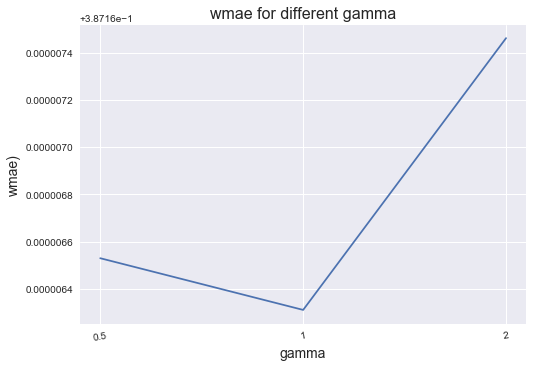

In [33]:
results_gamma = {}
for i in [0.5, 1, 2]:
    result = {}
    print('\n\n\n\nrunning while gamma = {}'.format(i))
    params={'booster': 'gblinear',
        'objective': 'reg:linear',
        'eta': 0.2,
        'depth': 8,
        'gamma':i,
        'subsample': 1.0,
        'min_child_weight': 5,
        'col_sample_bytree': 0.2,
        'seed': 0,
        'silent': 1,
        }

    watchlist = [(dataset_val, 'val'),(dataset_train,'train')]
    model = xgb.train(params,dataset_train,num_boost_round=6000,early_stopping_rounds=300,evals=watchlist, feval=wmae_xgb,maximize=False)
    pred_xgb = model.predict(dataset_val)
    
    result['predictions'] = pred_xgb
    result['wmae'] = wmae(y_test, pred_xgb)
    results_gamma['{}'.format(i)] = result
    
print(results_gamma)          # 38 negtive rows
plot_results(results_gamma, 'gamma') 

In [34]:
a = pd.DataFrame(results_gamma['1']['predictions'])
a[a[0]<0].shape

(19, 1)

# 4、predict

In [41]:
params={'booster': 'gblinear',
        'objective': 'reg:linear',
        'eta': 0.1,
        'depth': 8,
        'subsample': 1.0,
        'min_child_weight': 5,
        'col_sample_bytree': 0.2,
        'seed': 0,
        'silent': 1,
        }

watchlist = [(dataset_val, 'val'),(dataset_train,'train')]
model = xgb.train(params,dataset_train,num_boost_round=6000,early_stopping_rounds=300,evals=watchlist, feval=wmae_xgb,maximize=False)
pred_xgb = model.predict(dataset_test)

[0]	val-wmae:0.685489	train-wmae:0.667839
Multiple eval metrics have been passed: 'train-wmae' will be used for early stopping.

Will train until train-wmae hasn't improved in 300 rounds.
[1]	val-wmae:0.55783	train-wmae:0.542712
[2]	val-wmae:0.518469	train-wmae:0.496763
[3]	val-wmae:0.494996	train-wmae:0.465574
[4]	val-wmae:0.477455	train-wmae:0.440214
[5]	val-wmae:0.463594	train-wmae:0.418854
[6]	val-wmae:0.452689	train-wmae:0.400927
[7]	val-wmae:0.443995	train-wmae:0.385767
[8]	val-wmae:0.43711	train-wmae:0.37295
[9]	val-wmae:0.431447	train-wmae:0.362002
[10]	val-wmae:0.427078	train-wmae:0.352705
[11]	val-wmae:0.42373	train-wmae:0.344832
[12]	val-wmae:0.421129	train-wmae:0.338157
[13]	val-wmae:0.419216	train-wmae:0.332517
[14]	val-wmae:0.417804	train-wmae:0.327685
[15]	val-wmae:0.416754	train-wmae:0.323594
[16]	val-wmae:0.415978	train-wmae:0.320139
[17]	val-wmae:0.415409	train-wmae:0.317217
[18]	val-wmae:0.415059	train-wmae:0.314781
[19]	val-wmae:0.414736	train-wmae:0.312693
[20]	val

[187]	val-wmae:0.405479	train-wmae:0.288057
[188]	val-wmae:0.405439	train-wmae:0.288019
[189]	val-wmae:0.405408	train-wmae:0.287985
[190]	val-wmae:0.405353	train-wmae:0.287938
[191]	val-wmae:0.405347	train-wmae:0.287918
[192]	val-wmae:0.405318	train-wmae:0.287885
[193]	val-wmae:0.405245	train-wmae:0.287828
[194]	val-wmae:0.405213	train-wmae:0.287793
[195]	val-wmae:0.405192	train-wmae:0.287767
[196]	val-wmae:0.405134	train-wmae:0.287719
[197]	val-wmae:0.405095	train-wmae:0.287683
[198]	val-wmae:0.405059	train-wmae:0.287646
[199]	val-wmae:0.405021	train-wmae:0.287609
[200]	val-wmae:0.405023	train-wmae:0.287595
[201]	val-wmae:0.404992	train-wmae:0.287563
[202]	val-wmae:0.404961	train-wmae:0.28753
[203]	val-wmae:0.40489	train-wmae:0.287475
[204]	val-wmae:0.404862	train-wmae:0.287443
[205]	val-wmae:0.404826	train-wmae:0.287408
[206]	val-wmae:0.404791	train-wmae:0.287373
[207]	val-wmae:0.404763	train-wmae:0.287342
[208]	val-wmae:0.404733	train-wmae:0.287311
[209]	val-wmae:0.404731	train-wmae

[374]	val-wmae:0.40066	train-wmae:0.283745
[375]	val-wmae:0.400657	train-wmae:0.283738
[376]	val-wmae:0.400622	train-wmae:0.283715
[377]	val-wmae:0.400614	train-wmae:0.283707
[378]	val-wmae:0.400591	train-wmae:0.283689
[379]	val-wmae:0.400584	train-wmae:0.28368
[380]	val-wmae:0.400552	train-wmae:0.28366
[381]	val-wmae:0.400543	train-wmae:0.283651
[382]	val-wmae:0.400515	train-wmae:0.283632
[383]	val-wmae:0.4005	train-wmae:0.283618
[384]	val-wmae:0.400485	train-wmae:0.283605
[385]	val-wmae:0.400478	train-wmae:0.283597
[386]	val-wmae:0.400449	train-wmae:0.283577
[387]	val-wmae:0.400441	train-wmae:0.283568
[388]	val-wmae:0.400428	train-wmae:0.283558
[389]	val-wmae:0.400396	train-wmae:0.283536
[390]	val-wmae:0.400381	train-wmae:0.283523
[391]	val-wmae:0.400361	train-wmae:0.283507
[392]	val-wmae:0.400343	train-wmae:0.283494
[393]	val-wmae:0.400324	train-wmae:0.28348
[394]	val-wmae:0.40032	train-wmae:0.283473
[395]	val-wmae:0.400296	train-wmae:0.283457
[396]	val-wmae:0.400287	train-wmae:0.28

[562]	val-wmae:0.397908	train-wmae:0.28178
[563]	val-wmae:0.397902	train-wmae:0.281775
[564]	val-wmae:0.39789	train-wmae:0.281768
[565]	val-wmae:0.397874	train-wmae:0.281758
[566]	val-wmae:0.397867	train-wmae:0.281753
[567]	val-wmae:0.397851	train-wmae:0.281743
[568]	val-wmae:0.397837	train-wmae:0.281734
[569]	val-wmae:0.39783	train-wmae:0.281729
[570]	val-wmae:0.39782	train-wmae:0.281722
[571]	val-wmae:0.397802	train-wmae:0.281712
[572]	val-wmae:0.397796	train-wmae:0.281707
[573]	val-wmae:0.397786	train-wmae:0.2817
[574]	val-wmae:0.397771	train-wmae:0.281689
[575]	val-wmae:0.397761	train-wmae:0.281682
[576]	val-wmae:0.397755	train-wmae:0.281677
[577]	val-wmae:0.397745	train-wmae:0.28167
[578]	val-wmae:0.39773	train-wmae:0.281661
[579]	val-wmae:0.39772	train-wmae:0.281654
[580]	val-wmae:0.397712	train-wmae:0.281648
[581]	val-wmae:0.3977	train-wmae:0.281639
[582]	val-wmae:0.397691	train-wmae:0.281632
[583]	val-wmae:0.397679	train-wmae:0.281624
[584]	val-wmae:0.397671	train-wmae:0.281618

[750]	val-wmae:0.396245	train-wmae:0.280636
[751]	val-wmae:0.396235	train-wmae:0.28063
[752]	val-wmae:0.39623	train-wmae:0.280626
[753]	val-wmae:0.396221	train-wmae:0.28062
[754]	val-wmae:0.396214	train-wmae:0.280616
[755]	val-wmae:0.396209	train-wmae:0.280612
[756]	val-wmae:0.396201	train-wmae:0.280607
[757]	val-wmae:0.396191	train-wmae:0.280601
[758]	val-wmae:0.396187	train-wmae:0.280598
[759]	val-wmae:0.396179	train-wmae:0.280593
[760]	val-wmae:0.396169	train-wmae:0.280587
[761]	val-wmae:0.396163	train-wmae:0.280582
[762]	val-wmae:0.396158	train-wmae:0.280578
[763]	val-wmae:0.396149	train-wmae:0.280573
[764]	val-wmae:0.396142	train-wmae:0.280568
[765]	val-wmae:0.396134	train-wmae:0.280563
[766]	val-wmae:0.396128	train-wmae:0.280559
[767]	val-wmae:0.39612	train-wmae:0.280553
[768]	val-wmae:0.396116	train-wmae:0.28055
[769]	val-wmae:0.396108	train-wmae:0.280546
[770]	val-wmae:0.3961	train-wmae:0.28054
[771]	val-wmae:0.396092	train-wmae:0.280534
[772]	val-wmae:0.396085	train-wmae:0.280

[938]	val-wmae:0.395073	train-wmae:0.279874
[939]	val-wmae:0.395068	train-wmae:0.279871
[940]	val-wmae:0.395061	train-wmae:0.279867
[941]	val-wmae:0.395057	train-wmae:0.279864
[942]	val-wmae:0.395053	train-wmae:0.279861
[943]	val-wmae:0.395045	train-wmae:0.279857
[944]	val-wmae:0.395041	train-wmae:0.279855
[945]	val-wmae:0.395035	train-wmae:0.279851
[946]	val-wmae:0.39503	train-wmae:0.279847
[947]	val-wmae:0.395026	train-wmae:0.279845
[948]	val-wmae:0.39502	train-wmae:0.279841
[949]	val-wmae:0.395014	train-wmae:0.279838
[950]	val-wmae:0.395009	train-wmae:0.279834
[951]	val-wmae:0.395005	train-wmae:0.279832
[952]	val-wmae:0.394999	train-wmae:0.279828
[953]	val-wmae:0.394995	train-wmae:0.279826
[954]	val-wmae:0.394989	train-wmae:0.279821
[955]	val-wmae:0.394985	train-wmae:0.279819
[956]	val-wmae:0.394981	train-wmae:0.279816
[957]	val-wmae:0.394974	train-wmae:0.279813
[958]	val-wmae:0.39497	train-wmae:0.27981
[959]	val-wmae:0.394965	train-wmae:0.279807
[960]	val-wmae:0.394957	train-wmae:0

[1123]	val-wmae:0.394242	train-wmae:0.279341
[1124]	val-wmae:0.39424	train-wmae:0.279339
[1125]	val-wmae:0.394235	train-wmae:0.279336
[1126]	val-wmae:0.394231	train-wmae:0.279333
[1127]	val-wmae:0.394227	train-wmae:0.27933
[1128]	val-wmae:0.394224	train-wmae:0.279328
[1129]	val-wmae:0.39422	train-wmae:0.279326
[1130]	val-wmae:0.394217	train-wmae:0.279324
[1131]	val-wmae:0.394212	train-wmae:0.27932
[1132]	val-wmae:0.394208	train-wmae:0.279318
[1133]	val-wmae:0.394205	train-wmae:0.279315
[1134]	val-wmae:0.394203	train-wmae:0.279314
[1135]	val-wmae:0.394199	train-wmae:0.279311
[1136]	val-wmae:0.394196	train-wmae:0.279309
[1137]	val-wmae:0.394191	train-wmae:0.279305
[1138]	val-wmae:0.394188	train-wmae:0.279304
[1139]	val-wmae:0.394185	train-wmae:0.279301
[1140]	val-wmae:0.39418	train-wmae:0.279298
[1141]	val-wmae:0.394177	train-wmae:0.279296
[1142]	val-wmae:0.394173	train-wmae:0.279293
[1143]	val-wmae:0.39417	train-wmae:0.279291
[1144]	val-wmae:0.394164	train-wmae:0.279288
[1145]	val-wmae:

[1307]	val-wmae:0.393688	train-wmae:0.278933
[1308]	val-wmae:0.393684	train-wmae:0.278931
[1309]	val-wmae:0.393681	train-wmae:0.278928
[1310]	val-wmae:0.393679	train-wmae:0.278926
[1311]	val-wmae:0.393677	train-wmae:0.278925
[1312]	val-wmae:0.393675	train-wmae:0.278923
[1313]	val-wmae:0.393672	train-wmae:0.27892
[1314]	val-wmae:0.39367	train-wmae:0.278919
[1315]	val-wmae:0.393667	train-wmae:0.278917
[1316]	val-wmae:0.393666	train-wmae:0.278916
[1317]	val-wmae:0.393663	train-wmae:0.278913
[1318]	val-wmae:0.39366	train-wmae:0.278911
[1319]	val-wmae:0.393659	train-wmae:0.27891
[1320]	val-wmae:0.393656	train-wmae:0.278907
[1321]	val-wmae:0.393654	train-wmae:0.278905
[1322]	val-wmae:0.393652	train-wmae:0.278904
[1323]	val-wmae:0.393649	train-wmae:0.278901
[1324]	val-wmae:0.393646	train-wmae:0.278899
[1325]	val-wmae:0.393644	train-wmae:0.278898
[1326]	val-wmae:0.393641	train-wmae:0.278896
[1327]	val-wmae:0.393639	train-wmae:0.278894
[1328]	val-wmae:0.393637	train-wmae:0.278892
[1329]	val-wma

[1490]	val-wmae:0.393293	train-wmae:0.278611
[1491]	val-wmae:0.39329	train-wmae:0.278609
[1492]	val-wmae:0.393288	train-wmae:0.278607
[1493]	val-wmae:0.393286	train-wmae:0.278606
[1494]	val-wmae:0.393285	train-wmae:0.278605
[1495]	val-wmae:0.393282	train-wmae:0.278603
[1496]	val-wmae:0.39328	train-wmae:0.278601
[1497]	val-wmae:0.393278	train-wmae:0.278599
[1498]	val-wmae:0.393277	train-wmae:0.278598
[1499]	val-wmae:0.393274	train-wmae:0.278596
[1500]	val-wmae:0.393272	train-wmae:0.278594
[1501]	val-wmae:0.393271	train-wmae:0.278593
[1502]	val-wmae:0.393268	train-wmae:0.278591
[1503]	val-wmae:0.393267	train-wmae:0.27859
[1504]	val-wmae:0.393265	train-wmae:0.278588
[1505]	val-wmae:0.393262	train-wmae:0.278587
[1506]	val-wmae:0.393262	train-wmae:0.278586
[1507]	val-wmae:0.393259	train-wmae:0.278584
[1508]	val-wmae:0.393258	train-wmae:0.278583
[1509]	val-wmae:0.393256	train-wmae:0.278581
[1510]	val-wmae:0.393254	train-wmae:0.278579
[1511]	val-wmae:0.393252	train-wmae:0.278578
[1512]	val-wm

[1673]	val-wmae:0.392976	train-wmae:0.278345
[1674]	val-wmae:0.392975	train-wmae:0.278344
[1675]	val-wmae:0.392974	train-wmae:0.278343
[1676]	val-wmae:0.392972	train-wmae:0.278341
[1677]	val-wmae:0.392971	train-wmae:0.27834
[1678]	val-wmae:0.392968	train-wmae:0.278338
[1679]	val-wmae:0.392967	train-wmae:0.278337
[1680]	val-wmae:0.392966	train-wmae:0.278335
[1681]	val-wmae:0.392965	train-wmae:0.278335
[1682]	val-wmae:0.392963	train-wmae:0.278333
[1683]	val-wmae:0.392961	train-wmae:0.278331
[1684]	val-wmae:0.39296	train-wmae:0.27833
[1685]	val-wmae:0.392958	train-wmae:0.278329
[1686]	val-wmae:0.392957	train-wmae:0.278328
[1687]	val-wmae:0.392955	train-wmae:0.278326
[1688]	val-wmae:0.392954	train-wmae:0.278325
[1689]	val-wmae:0.392952	train-wmae:0.278324
[1690]	val-wmae:0.392952	train-wmae:0.278323
[1691]	val-wmae:0.39295	train-wmae:0.278321
[1692]	val-wmae:0.392948	train-wmae:0.27832
[1693]	val-wmae:0.392947	train-wmae:0.278319
[1694]	val-wmae:0.392945	train-wmae:0.278317
[1695]	val-wmae

[1856]	val-wmae:0.392731	train-wmae:0.278123
[1857]	val-wmae:0.39273	train-wmae:0.278122
[1858]	val-wmae:0.392729	train-wmae:0.278122
[1859]	val-wmae:0.392728	train-wmae:0.278121
[1860]	val-wmae:0.392727	train-wmae:0.27812
[1861]	val-wmae:0.392725	train-wmae:0.278118
[1862]	val-wmae:0.392725	train-wmae:0.278117
[1863]	val-wmae:0.392723	train-wmae:0.278116
[1864]	val-wmae:0.392721	train-wmae:0.278115
[1865]	val-wmae:0.39272	train-wmae:0.278114
[1866]	val-wmae:0.39272	train-wmae:0.278113
[1867]	val-wmae:0.392718	train-wmae:0.278112
[1868]	val-wmae:0.392717	train-wmae:0.278111
[1869]	val-wmae:0.392716	train-wmae:0.27811
[1870]	val-wmae:0.392715	train-wmae:0.278109
[1871]	val-wmae:0.392713	train-wmae:0.278107
[1872]	val-wmae:0.392712	train-wmae:0.278106
[1873]	val-wmae:0.392711	train-wmae:0.278105
[1874]	val-wmae:0.39271	train-wmae:0.278104
[1875]	val-wmae:0.392708	train-wmae:0.278103
[1876]	val-wmae:0.392707	train-wmae:0.278102
[1877]	val-wmae:0.392707	train-wmae:0.278101
[1878]	val-wmae:

[2039]	val-wmae:0.392533	train-wmae:0.277942
[2040]	val-wmae:0.392532	train-wmae:0.277942
[2041]	val-wmae:0.392531	train-wmae:0.277941
[2042]	val-wmae:0.39253	train-wmae:0.27794
[2043]	val-wmae:0.39253	train-wmae:0.277939
[2044]	val-wmae:0.392529	train-wmae:0.277938
[2045]	val-wmae:0.392527	train-wmae:0.277937
[2046]	val-wmae:0.392527	train-wmae:0.277937
[2047]	val-wmae:0.392525	train-wmae:0.277935
[2048]	val-wmae:0.392524	train-wmae:0.277934
[2049]	val-wmae:0.392523	train-wmae:0.277934
[2050]	val-wmae:0.392523	train-wmae:0.277933
[2051]	val-wmae:0.392522	train-wmae:0.277932
[2052]	val-wmae:0.39252	train-wmae:0.277931
[2053]	val-wmae:0.39252	train-wmae:0.27793
[2054]	val-wmae:0.392518	train-wmae:0.277929
[2055]	val-wmae:0.392517	train-wmae:0.277928
[2056]	val-wmae:0.392517	train-wmae:0.277928
[2057]	val-wmae:0.392515	train-wmae:0.277926
[2058]	val-wmae:0.392515	train-wmae:0.277926
[2059]	val-wmae:0.392513	train-wmae:0.277925
[2060]	val-wmae:0.392512	train-wmae:0.277923
[2061]	val-wmae:

[2222]	val-wmae:0.39237	train-wmae:0.277794
[2223]	val-wmae:0.392368	train-wmae:0.277793
[2224]	val-wmae:0.392367	train-wmae:0.277792
[2225]	val-wmae:0.392366	train-wmae:0.277792
[2226]	val-wmae:0.392366	train-wmae:0.277791
[2227]	val-wmae:0.392366	train-wmae:0.27779
[2228]	val-wmae:0.392364	train-wmae:0.277789
[2229]	val-wmae:0.392364	train-wmae:0.277789
[2230]	val-wmae:0.392363	train-wmae:0.277788
[2231]	val-wmae:0.392362	train-wmae:0.277787
[2232]	val-wmae:0.392362	train-wmae:0.277787
[2233]	val-wmae:0.392361	train-wmae:0.277786
[2234]	val-wmae:0.392359	train-wmae:0.277785
[2235]	val-wmae:0.392359	train-wmae:0.277784
[2236]	val-wmae:0.392359	train-wmae:0.277784
[2237]	val-wmae:0.392357	train-wmae:0.277783
[2238]	val-wmae:0.392357	train-wmae:0.277782
[2239]	val-wmae:0.392356	train-wmae:0.277782
[2240]	val-wmae:0.392355	train-wmae:0.27778
[2241]	val-wmae:0.392354	train-wmae:0.27778
[2242]	val-wmae:0.392353	train-wmae:0.277779
[2243]	val-wmae:0.392353	train-wmae:0.277779
[2244]	val-wma

[2406]	val-wmae:0.392235	train-wmae:0.277668
[2407]	val-wmae:0.392235	train-wmae:0.277668
[2408]	val-wmae:0.392234	train-wmae:0.277667
[2409]	val-wmae:0.392234	train-wmae:0.277666
[2410]	val-wmae:0.392233	train-wmae:0.277666
[2411]	val-wmae:0.392232	train-wmae:0.277665
[2412]	val-wmae:0.392231	train-wmae:0.277664
[2413]	val-wmae:0.392231	train-wmae:0.277664
[2414]	val-wmae:0.39223	train-wmae:0.277663
[2415]	val-wmae:0.392229	train-wmae:0.277662
[2416]	val-wmae:0.392229	train-wmae:0.277661
[2417]	val-wmae:0.392228	train-wmae:0.277661
[2418]	val-wmae:0.392228	train-wmae:0.277661
[2419]	val-wmae:0.392227	train-wmae:0.27766
[2420]	val-wmae:0.392227	train-wmae:0.277659
[2421]	val-wmae:0.392226	train-wmae:0.277659
[2422]	val-wmae:0.392225	train-wmae:0.277658
[2423]	val-wmae:0.392224	train-wmae:0.277657
[2424]	val-wmae:0.392224	train-wmae:0.277657
[2425]	val-wmae:0.392223	train-wmae:0.277656
[2426]	val-wmae:0.392222	train-wmae:0.277655
[2427]	val-wmae:0.392221	train-wmae:0.277655
[2428]	val-w

[2589]	val-wmae:0.392126	train-wmae:0.277561
[2590]	val-wmae:0.392126	train-wmae:0.277561
[2591]	val-wmae:0.392125	train-wmae:0.27756
[2592]	val-wmae:0.392124	train-wmae:0.277559
[2593]	val-wmae:0.392125	train-wmae:0.277559
[2594]	val-wmae:0.392123	train-wmae:0.277558
[2595]	val-wmae:0.392123	train-wmae:0.277558
[2596]	val-wmae:0.392123	train-wmae:0.277558
[2597]	val-wmae:0.392122	train-wmae:0.277557
[2598]	val-wmae:0.392121	train-wmae:0.277556
[2599]	val-wmae:0.392121	train-wmae:0.277556
[2600]	val-wmae:0.39212	train-wmae:0.277555
[2601]	val-wmae:0.392119	train-wmae:0.277555
[2602]	val-wmae:0.392119	train-wmae:0.277554
[2603]	val-wmae:0.392118	train-wmae:0.277553
[2604]	val-wmae:0.392117	train-wmae:0.277553
[2605]	val-wmae:0.392118	train-wmae:0.277553
[2606]	val-wmae:0.392117	train-wmae:0.277552
[2607]	val-wmae:0.392116	train-wmae:0.277551
[2608]	val-wmae:0.392116	train-wmae:0.277551
[2609]	val-wmae:0.392116	train-wmae:0.277551
[2610]	val-wmae:0.392115	train-wmae:0.27755
[2611]	val-wm

[2772]	val-wmae:0.392033	train-wmae:0.277472
[2773]	val-wmae:0.392032	train-wmae:0.277472
[2774]	val-wmae:0.392033	train-wmae:0.277472
[2775]	val-wmae:0.392031	train-wmae:0.277471
[2776]	val-wmae:0.392031	train-wmae:0.277471
[2777]	val-wmae:0.392031	train-wmae:0.277471
[2778]	val-wmae:0.39203	train-wmae:0.27747
[2779]	val-wmae:0.39203	train-wmae:0.277469
[2780]	val-wmae:0.392029	train-wmae:0.277469
[2781]	val-wmae:0.392028	train-wmae:0.277468
[2782]	val-wmae:0.392029	train-wmae:0.277468
[2783]	val-wmae:0.392028	train-wmae:0.277467
[2784]	val-wmae:0.392027	train-wmae:0.277467
[2785]	val-wmae:0.392026	train-wmae:0.277466
[2786]	val-wmae:0.392026	train-wmae:0.277466
[2787]	val-wmae:0.392026	train-wmae:0.277466
[2788]	val-wmae:0.392025	train-wmae:0.277465
[2789]	val-wmae:0.392025	train-wmae:0.277465
[2790]	val-wmae:0.392024	train-wmae:0.277464
[2791]	val-wmae:0.392024	train-wmae:0.277464
[2792]	val-wmae:0.392024	train-wmae:0.277463
[2793]	val-wmae:0.392024	train-wmae:0.277463
[2794]	val-wm

[2955]	val-wmae:0.391952	train-wmae:0.277394
[2956]	val-wmae:0.391952	train-wmae:0.277394
[2957]	val-wmae:0.391952	train-wmae:0.277394
[2958]	val-wmae:0.391951	train-wmae:0.277393
[2959]	val-wmae:0.391951	train-wmae:0.277393
[2960]	val-wmae:0.391951	train-wmae:0.277392
[2961]	val-wmae:0.391951	train-wmae:0.277392
[2962]	val-wmae:0.39195	train-wmae:0.277391
[2963]	val-wmae:0.39195	train-wmae:0.277391
[2964]	val-wmae:0.39195	train-wmae:0.277391
[2965]	val-wmae:0.391948	train-wmae:0.27739
[2966]	val-wmae:0.391948	train-wmae:0.27739
[2967]	val-wmae:0.391948	train-wmae:0.277389
[2968]	val-wmae:0.391948	train-wmae:0.277389
[2969]	val-wmae:0.391947	train-wmae:0.277389
[2970]	val-wmae:0.391946	train-wmae:0.277388
[2971]	val-wmae:0.391946	train-wmae:0.277388
[2972]	val-wmae:0.391945	train-wmae:0.277387
[2973]	val-wmae:0.391946	train-wmae:0.277387
[2974]	val-wmae:0.391945	train-wmae:0.277387
[2975]	val-wmae:0.391944	train-wmae:0.277386
[2976]	val-wmae:0.391944	train-wmae:0.277386
[2977]	val-wmae

[3138]	val-wmae:0.391882	train-wmae:0.277328
[3139]	val-wmae:0.391883	train-wmae:0.277328
[3140]	val-wmae:0.391882	train-wmae:0.277328
[3141]	val-wmae:0.391882	train-wmae:0.277327
[3142]	val-wmae:0.391882	train-wmae:0.277327
[3143]	val-wmae:0.391881	train-wmae:0.277327
[3144]	val-wmae:0.391881	train-wmae:0.277327
[3145]	val-wmae:0.39188	train-wmae:0.277326
[3146]	val-wmae:0.391879	train-wmae:0.277326
[3147]	val-wmae:0.391879	train-wmae:0.277325
[3148]	val-wmae:0.391879	train-wmae:0.277325
[3149]	val-wmae:0.391879	train-wmae:0.277325
[3150]	val-wmae:0.391878	train-wmae:0.277324
[3151]	val-wmae:0.391878	train-wmae:0.277324
[3152]	val-wmae:0.391877	train-wmae:0.277323
[3153]	val-wmae:0.391877	train-wmae:0.277323
[3154]	val-wmae:0.391877	train-wmae:0.277323
[3155]	val-wmae:0.391877	train-wmae:0.277323
[3156]	val-wmae:0.391876	train-wmae:0.277322
[3157]	val-wmae:0.391876	train-wmae:0.277322
[3158]	val-wmae:0.391875	train-wmae:0.277322
[3159]	val-wmae:0.391875	train-wmae:0.277322
[3160]	val-

[3321]	val-wmae:0.391821	train-wmae:0.277272
[3322]	val-wmae:0.391821	train-wmae:0.277272
[3323]	val-wmae:0.391821	train-wmae:0.277272
[3324]	val-wmae:0.39182	train-wmae:0.277272
[3325]	val-wmae:0.39182	train-wmae:0.277272
[3326]	val-wmae:0.391819	train-wmae:0.277271
[3327]	val-wmae:0.391819	train-wmae:0.277271
[3328]	val-wmae:0.391819	train-wmae:0.277271
[3329]	val-wmae:0.391819	train-wmae:0.277271
[3330]	val-wmae:0.391819	train-wmae:0.27727
[3331]	val-wmae:0.391818	train-wmae:0.27727
[3332]	val-wmae:0.391818	train-wmae:0.27727
[3333]	val-wmae:0.391817	train-wmae:0.27727
[3334]	val-wmae:0.391817	train-wmae:0.277269
[3335]	val-wmae:0.391817	train-wmae:0.277269
[3336]	val-wmae:0.391816	train-wmae:0.277268
[3337]	val-wmae:0.391816	train-wmae:0.277268
[3338]	val-wmae:0.391816	train-wmae:0.277268
[3339]	val-wmae:0.391815	train-wmae:0.277267
[3340]	val-wmae:0.391815	train-wmae:0.277268
[3341]	val-wmae:0.391815	train-wmae:0.277267
[3342]	val-wmae:0.391814	train-wmae:0.277267
[3343]	val-wmae:

[3504]	val-wmae:0.391766	train-wmae:0.277224
[3505]	val-wmae:0.391766	train-wmae:0.277224
[3506]	val-wmae:0.391766	train-wmae:0.277224
[3507]	val-wmae:0.391765	train-wmae:0.277223
[3508]	val-wmae:0.391765	train-wmae:0.277223
[3509]	val-wmae:0.391764	train-wmae:0.277223
[3510]	val-wmae:0.391765	train-wmae:0.277223
[3511]	val-wmae:0.391764	train-wmae:0.277223
[3512]	val-wmae:0.391764	train-wmae:0.277222
[3513]	val-wmae:0.391764	train-wmae:0.277222
[3514]	val-wmae:0.391763	train-wmae:0.277222
[3515]	val-wmae:0.391763	train-wmae:0.277221
[3516]	val-wmae:0.391763	train-wmae:0.277221
[3517]	val-wmae:0.391763	train-wmae:0.277221
[3518]	val-wmae:0.391762	train-wmae:0.277221
[3519]	val-wmae:0.391762	train-wmae:0.27722
[3520]	val-wmae:0.391762	train-wmae:0.27722
[3521]	val-wmae:0.391761	train-wmae:0.27722
[3522]	val-wmae:0.391761	train-wmae:0.277219
[3523]	val-wmae:0.391761	train-wmae:0.27722
[3524]	val-wmae:0.391761	train-wmae:0.277219
[3525]	val-wmae:0.391761	train-wmae:0.277219
[3526]	val-wma

[3687]	val-wmae:0.391718	train-wmae:0.277181
[3688]	val-wmae:0.391718	train-wmae:0.277181
[3689]	val-wmae:0.391718	train-wmae:0.277181
[3690]	val-wmae:0.391717	train-wmae:0.277181
[3691]	val-wmae:0.391717	train-wmae:0.277181
[3692]	val-wmae:0.391716	train-wmae:0.27718
[3693]	val-wmae:0.391716	train-wmae:0.27718
[3694]	val-wmae:0.391716	train-wmae:0.27718
[3695]	val-wmae:0.391716	train-wmae:0.27718
[3696]	val-wmae:0.391716	train-wmae:0.27718
[3697]	val-wmae:0.391715	train-wmae:0.277179
[3698]	val-wmae:0.391715	train-wmae:0.277179
[3699]	val-wmae:0.391715	train-wmae:0.277179
[3700]	val-wmae:0.391715	train-wmae:0.277179
[3701]	val-wmae:0.391715	train-wmae:0.277179
[3702]	val-wmae:0.391714	train-wmae:0.277178
[3703]	val-wmae:0.391714	train-wmae:0.277178
[3704]	val-wmae:0.391713	train-wmae:0.277178
[3705]	val-wmae:0.391714	train-wmae:0.277178
[3706]	val-wmae:0.391713	train-wmae:0.277178
[3707]	val-wmae:0.391713	train-wmae:0.277177
[3708]	val-wmae:0.391713	train-wmae:0.277177
[3709]	val-wmae

[3870]	val-wmae:0.391675	train-wmae:0.277144
[3871]	val-wmae:0.391676	train-wmae:0.277144
[3872]	val-wmae:0.391675	train-wmae:0.277143
[3873]	val-wmae:0.391675	train-wmae:0.277143
[3874]	val-wmae:0.391675	train-wmae:0.277143
[3875]	val-wmae:0.391674	train-wmae:0.277143
[3876]	val-wmae:0.391674	train-wmae:0.277142
[3877]	val-wmae:0.391674	train-wmae:0.277142
[3878]	val-wmae:0.391674	train-wmae:0.277142
[3879]	val-wmae:0.391674	train-wmae:0.277142
[3880]	val-wmae:0.391674	train-wmae:0.277142
[3881]	val-wmae:0.391673	train-wmae:0.277142
[3882]	val-wmae:0.391673	train-wmae:0.277141
[3883]	val-wmae:0.391673	train-wmae:0.277141
[3884]	val-wmae:0.391673	train-wmae:0.277141
[3885]	val-wmae:0.391673	train-wmae:0.277141
[3886]	val-wmae:0.391672	train-wmae:0.277141
[3887]	val-wmae:0.391672	train-wmae:0.27714
[3888]	val-wmae:0.391672	train-wmae:0.27714
[3889]	val-wmae:0.391672	train-wmae:0.27714
[3890]	val-wmae:0.391672	train-wmae:0.27714
[3891]	val-wmae:0.391671	train-wmae:0.27714
[3892]	val-wmae

[4053]	val-wmae:0.391638	train-wmae:0.27711
[4054]	val-wmae:0.391637	train-wmae:0.27711
[4055]	val-wmae:0.391637	train-wmae:0.27711
[4056]	val-wmae:0.391637	train-wmae:0.27711
[4057]	val-wmae:0.391637	train-wmae:0.27711
[4058]	val-wmae:0.391637	train-wmae:0.27711
[4059]	val-wmae:0.391637	train-wmae:0.277109
[4060]	val-wmae:0.391637	train-wmae:0.277109
[4061]	val-wmae:0.391636	train-wmae:0.277109
[4062]	val-wmae:0.391636	train-wmae:0.277109
[4063]	val-wmae:0.391636	train-wmae:0.277109
[4064]	val-wmae:0.391635	train-wmae:0.277108
[4065]	val-wmae:0.391635	train-wmae:0.277108
[4066]	val-wmae:0.391635	train-wmae:0.277108
[4067]	val-wmae:0.391635	train-wmae:0.277108
[4068]	val-wmae:0.391635	train-wmae:0.277108
[4069]	val-wmae:0.391634	train-wmae:0.277107
[4070]	val-wmae:0.391635	train-wmae:0.277107
[4071]	val-wmae:0.391634	train-wmae:0.277107
[4072]	val-wmae:0.391634	train-wmae:0.277107
[4073]	val-wmae:0.391634	train-wmae:0.277107
[4074]	val-wmae:0.391634	train-wmae:0.277107
[4075]	val-wmae:

[4236]	val-wmae:0.391602	train-wmae:0.27708
[4237]	val-wmae:0.391602	train-wmae:0.27708
[4238]	val-wmae:0.391602	train-wmae:0.27708
[4239]	val-wmae:0.391602	train-wmae:0.277079
[4240]	val-wmae:0.391601	train-wmae:0.277079
[4241]	val-wmae:0.391601	train-wmae:0.277079
[4242]	val-wmae:0.391601	train-wmae:0.277079
[4243]	val-wmae:0.391601	train-wmae:0.277079
[4244]	val-wmae:0.391601	train-wmae:0.277079
[4245]	val-wmae:0.391601	train-wmae:0.277079
[4246]	val-wmae:0.391601	train-wmae:0.277079
[4247]	val-wmae:0.391601	train-wmae:0.277079
[4248]	val-wmae:0.3916	train-wmae:0.277078
[4249]	val-wmae:0.3916	train-wmae:0.277078
[4250]	val-wmae:0.3916	train-wmae:0.277078
[4251]	val-wmae:0.3916	train-wmae:0.277078
[4252]	val-wmae:0.3916	train-wmae:0.277078
[4253]	val-wmae:0.391599	train-wmae:0.277077
[4254]	val-wmae:0.391599	train-wmae:0.277077
[4255]	val-wmae:0.391599	train-wmae:0.277077
[4256]	val-wmae:0.391599	train-wmae:0.277077
[4257]	val-wmae:0.391598	train-wmae:0.277077
[4258]	val-wmae:0.39159

[4419]	val-wmae:0.391571	train-wmae:0.277053
[4420]	val-wmae:0.391571	train-wmae:0.277053
[4421]	val-wmae:0.39157	train-wmae:0.277053
[4422]	val-wmae:0.39157	train-wmae:0.277053
[4423]	val-wmae:0.39157	train-wmae:0.277053
[4424]	val-wmae:0.39157	train-wmae:0.277053
[4425]	val-wmae:0.391569	train-wmae:0.277052
[4426]	val-wmae:0.391569	train-wmae:0.277052
[4427]	val-wmae:0.391569	train-wmae:0.277052
[4428]	val-wmae:0.391569	train-wmae:0.277052
[4429]	val-wmae:0.391568	train-wmae:0.277052
[4430]	val-wmae:0.391568	train-wmae:0.277052
[4431]	val-wmae:0.391568	train-wmae:0.277052
[4432]	val-wmae:0.391568	train-wmae:0.277051
[4433]	val-wmae:0.391568	train-wmae:0.277051
[4434]	val-wmae:0.391568	train-wmae:0.277051
[4435]	val-wmae:0.391568	train-wmae:0.277051
[4436]	val-wmae:0.391567	train-wmae:0.277051
[4437]	val-wmae:0.391568	train-wmae:0.277051
[4438]	val-wmae:0.391567	train-wmae:0.277051
[4439]	val-wmae:0.391568	train-wmae:0.277051
[4440]	val-wmae:0.391567	train-wmae:0.277051
[4441]	val-wma

[4602]	val-wmae:0.391541	train-wmae:0.27703
[4603]	val-wmae:0.391541	train-wmae:0.27703
[4604]	val-wmae:0.391541	train-wmae:0.27703
[4605]	val-wmae:0.391541	train-wmae:0.27703
[4606]	val-wmae:0.39154	train-wmae:0.277029
[4607]	val-wmae:0.39154	train-wmae:0.277029
[4608]	val-wmae:0.39154	train-wmae:0.277029
[4609]	val-wmae:0.39154	train-wmae:0.277029
[4610]	val-wmae:0.39154	train-wmae:0.277029
[4611]	val-wmae:0.391539	train-wmae:0.277029
[4612]	val-wmae:0.391539	train-wmae:0.277029
[4613]	val-wmae:0.391539	train-wmae:0.277029
[4614]	val-wmae:0.391539	train-wmae:0.277029
[4615]	val-wmae:0.391539	train-wmae:0.277028
[4616]	val-wmae:0.391539	train-wmae:0.277028
[4617]	val-wmae:0.391539	train-wmae:0.277028
[4618]	val-wmae:0.391539	train-wmae:0.277028
[4619]	val-wmae:0.391538	train-wmae:0.277028
[4620]	val-wmae:0.391538	train-wmae:0.277028
[4621]	val-wmae:0.391538	train-wmae:0.277028
[4622]	val-wmae:0.391538	train-wmae:0.277027
[4623]	val-wmae:0.391538	train-wmae:0.277028
[4624]	val-wmae:0.3

[4785]	val-wmae:0.391514	train-wmae:0.277009
[4786]	val-wmae:0.391514	train-wmae:0.277009
[4787]	val-wmae:0.391514	train-wmae:0.277009
[4788]	val-wmae:0.391514	train-wmae:0.277009
[4789]	val-wmae:0.391514	train-wmae:0.277008
[4790]	val-wmae:0.391513	train-wmae:0.277008
[4791]	val-wmae:0.391514	train-wmae:0.277008
[4792]	val-wmae:0.391513	train-wmae:0.277008
[4793]	val-wmae:0.391513	train-wmae:0.277008
[4794]	val-wmae:0.391513	train-wmae:0.277008
[4795]	val-wmae:0.391513	train-wmae:0.277008
[4796]	val-wmae:0.391513	train-wmae:0.277008
[4797]	val-wmae:0.391513	train-wmae:0.277008
[4798]	val-wmae:0.391512	train-wmae:0.277007
[4799]	val-wmae:0.391512	train-wmae:0.277007
[4800]	val-wmae:0.391512	train-wmae:0.277007
[4801]	val-wmae:0.391512	train-wmae:0.277007
[4802]	val-wmae:0.391512	train-wmae:0.277007
[4803]	val-wmae:0.391512	train-wmae:0.277007
[4804]	val-wmae:0.391512	train-wmae:0.277007
[4805]	val-wmae:0.391512	train-wmae:0.277007
[4806]	val-wmae:0.391512	train-wmae:0.277007
[4807]	val

[4969]	val-wmae:0.39149	train-wmae:0.27699
[4970]	val-wmae:0.39149	train-wmae:0.27699
[4971]	val-wmae:0.39149	train-wmae:0.276989
[4972]	val-wmae:0.39149	train-wmae:0.276989
[4973]	val-wmae:0.391489	train-wmae:0.276989
[4974]	val-wmae:0.391489	train-wmae:0.276989
[4975]	val-wmae:0.391489	train-wmae:0.276989
[4976]	val-wmae:0.391489	train-wmae:0.276989
[4977]	val-wmae:0.391489	train-wmae:0.276989
[4978]	val-wmae:0.391488	train-wmae:0.276989
[4979]	val-wmae:0.391488	train-wmae:0.276989
[4980]	val-wmae:0.391489	train-wmae:0.276989
[4981]	val-wmae:0.391488	train-wmae:0.276988
[4982]	val-wmae:0.391488	train-wmae:0.276988
[4983]	val-wmae:0.391488	train-wmae:0.276988
[4984]	val-wmae:0.391488	train-wmae:0.276988
[4985]	val-wmae:0.391488	train-wmae:0.276988
[4986]	val-wmae:0.391488	train-wmae:0.276988
[4987]	val-wmae:0.391488	train-wmae:0.276988
[4988]	val-wmae:0.391488	train-wmae:0.276988
[4989]	val-wmae:0.391488	train-wmae:0.276988
[4990]	val-wmae:0.391487	train-wmae:0.276988
[4991]	val-wmae:

[5152]	val-wmae:0.391467	train-wmae:0.276972
[5153]	val-wmae:0.391467	train-wmae:0.276972
[5154]	val-wmae:0.391467	train-wmae:0.276971
[5155]	val-wmae:0.391466	train-wmae:0.276971
[5156]	val-wmae:0.391466	train-wmae:0.276971
[5157]	val-wmae:0.391466	train-wmae:0.276971
[5158]	val-wmae:0.391466	train-wmae:0.276971
[5159]	val-wmae:0.391467	train-wmae:0.276971
[5160]	val-wmae:0.391466	train-wmae:0.276971
[5161]	val-wmae:0.391466	train-wmae:0.276971
[5162]	val-wmae:0.391466	train-wmae:0.276971
[5163]	val-wmae:0.391466	train-wmae:0.276971
[5164]	val-wmae:0.391466	train-wmae:0.276971
[5165]	val-wmae:0.391465	train-wmae:0.276971
[5166]	val-wmae:0.391465	train-wmae:0.27697
[5167]	val-wmae:0.391465	train-wmae:0.276971
[5168]	val-wmae:0.391465	train-wmae:0.27697
[5169]	val-wmae:0.391465	train-wmae:0.27697
[5170]	val-wmae:0.391465	train-wmae:0.27697
[5171]	val-wmae:0.391465	train-wmae:0.27697
[5172]	val-wmae:0.391464	train-wmae:0.27697
[5173]	val-wmae:0.391465	train-wmae:0.27697
[5174]	val-wmae:0

[5335]	val-wmae:0.391446	train-wmae:0.276955
[5336]	val-wmae:0.391446	train-wmae:0.276955
[5337]	val-wmae:0.391446	train-wmae:0.276955
[5338]	val-wmae:0.391446	train-wmae:0.276955
[5339]	val-wmae:0.391445	train-wmae:0.276955
[5340]	val-wmae:0.391446	train-wmae:0.276955
[5341]	val-wmae:0.391445	train-wmae:0.276955
[5342]	val-wmae:0.391445	train-wmae:0.276955
[5343]	val-wmae:0.391445	train-wmae:0.276955
[5344]	val-wmae:0.391445	train-wmae:0.276955
[5345]	val-wmae:0.391445	train-wmae:0.276954
[5346]	val-wmae:0.391445	train-wmae:0.276954
[5347]	val-wmae:0.391445	train-wmae:0.276954
[5348]	val-wmae:0.391444	train-wmae:0.276954
[5349]	val-wmae:0.391445	train-wmae:0.276954
[5350]	val-wmae:0.391445	train-wmae:0.276954
[5351]	val-wmae:0.391444	train-wmae:0.276954
[5352]	val-wmae:0.391444	train-wmae:0.276954
[5353]	val-wmae:0.391444	train-wmae:0.276954
[5354]	val-wmae:0.391444	train-wmae:0.276954
[5355]	val-wmae:0.391444	train-wmae:0.276954
[5356]	val-wmae:0.391444	train-wmae:0.276953
[5357]	val

[5518]	val-wmae:0.391426	train-wmae:0.27694
[5519]	val-wmae:0.391426	train-wmae:0.27694
[5520]	val-wmae:0.391426	train-wmae:0.27694
[5521]	val-wmae:0.391426	train-wmae:0.27694
[5522]	val-wmae:0.391426	train-wmae:0.27694
[5523]	val-wmae:0.391426	train-wmae:0.27694
[5524]	val-wmae:0.391426	train-wmae:0.276939
[5525]	val-wmae:0.391425	train-wmae:0.276939
[5526]	val-wmae:0.391426	train-wmae:0.276939
[5527]	val-wmae:0.391426	train-wmae:0.276939
[5528]	val-wmae:0.391425	train-wmae:0.276939
[5529]	val-wmae:0.391425	train-wmae:0.276939
[5530]	val-wmae:0.391425	train-wmae:0.276939
[5531]	val-wmae:0.391425	train-wmae:0.276939
[5532]	val-wmae:0.391425	train-wmae:0.276939
[5533]	val-wmae:0.391425	train-wmae:0.276939
[5534]	val-wmae:0.391425	train-wmae:0.276939
[5535]	val-wmae:0.391425	train-wmae:0.276939
[5536]	val-wmae:0.391424	train-wmae:0.276938
[5537]	val-wmae:0.391424	train-wmae:0.276938
[5538]	val-wmae:0.391424	train-wmae:0.276938
[5539]	val-wmae:0.391424	train-wmae:0.276938
[5540]	val-wmae:

[5701]	val-wmae:0.391408	train-wmae:0.276926
[5702]	val-wmae:0.391408	train-wmae:0.276925
[5703]	val-wmae:0.391408	train-wmae:0.276925
[5704]	val-wmae:0.391408	train-wmae:0.276925
[5705]	val-wmae:0.391407	train-wmae:0.276925
[5706]	val-wmae:0.391407	train-wmae:0.276925
[5707]	val-wmae:0.391408	train-wmae:0.276925
[5708]	val-wmae:0.391407	train-wmae:0.276925
[5709]	val-wmae:0.391407	train-wmae:0.276925
[5710]	val-wmae:0.391407	train-wmae:0.276925
[5711]	val-wmae:0.391407	train-wmae:0.276925
[5712]	val-wmae:0.391407	train-wmae:0.276925
[5713]	val-wmae:0.391407	train-wmae:0.276924
[5714]	val-wmae:0.391407	train-wmae:0.276924
[5715]	val-wmae:0.391407	train-wmae:0.276924
[5716]	val-wmae:0.391406	train-wmae:0.276924
[5717]	val-wmae:0.391407	train-wmae:0.276924
[5718]	val-wmae:0.391406	train-wmae:0.276924
[5719]	val-wmae:0.391406	train-wmae:0.276924
[5720]	val-wmae:0.391406	train-wmae:0.276924
[5721]	val-wmae:0.391406	train-wmae:0.276924
[5722]	val-wmae:0.391406	train-wmae:0.276924
[5723]	val

[5884]	val-wmae:0.391391	train-wmae:0.276912
[5885]	val-wmae:0.391391	train-wmae:0.276912
[5886]	val-wmae:0.391391	train-wmae:0.276912
[5887]	val-wmae:0.39139	train-wmae:0.276912
[5888]	val-wmae:0.391391	train-wmae:0.276912
[5889]	val-wmae:0.39139	train-wmae:0.276912
[5890]	val-wmae:0.39139	train-wmae:0.276912
[5891]	val-wmae:0.391391	train-wmae:0.276912
[5892]	val-wmae:0.39139	train-wmae:0.276912
[5893]	val-wmae:0.39139	train-wmae:0.276912
[5894]	val-wmae:0.39139	train-wmae:0.276912
[5895]	val-wmae:0.39139	train-wmae:0.276911
[5896]	val-wmae:0.39139	train-wmae:0.276911
[5897]	val-wmae:0.39139	train-wmae:0.276912
[5898]	val-wmae:0.39139	train-wmae:0.276911
[5899]	val-wmae:0.39139	train-wmae:0.276911
[5900]	val-wmae:0.391389	train-wmae:0.276911
[5901]	val-wmae:0.391389	train-wmae:0.276911
[5902]	val-wmae:0.391389	train-wmae:0.276911
[5903]	val-wmae:0.391389	train-wmae:0.276911
[5904]	val-wmae:0.391389	train-wmae:0.276911
[5905]	val-wmae:0.391389	train-wmae:0.276911
[5906]	val-wmae:0.391

# 5、submit

In [45]:
pred_xgb

array([ 278575.625     ,   85651.40625   ,  202416.40625   , ...,
        105309.609375  ,   64708.05078125,  103589.5       ], dtype=float32)

In [47]:
data_sales_sum = pd.read_csv('t_sales_sum.csv')
data_sales_sum_last = data_sales_sum[data_sales_sum['dt']=='2017-01-31'].groupby('shop_id')[['sale_amt_3m']].mean()['sale_amt_3m']
data_sales_sum_last

shop_id
1       219097.84
2        79214.06
3       134667.29
4        47633.91
5       233025.51
6       105927.87
7       189101.04
8       207094.16
9       447212.23
10       33373.05
11      227926.47
12      146061.99
13       42115.62
14      122426.50
15      250954.45
16      340421.66
17      339309.01
18       42579.64
19       76240.07
20      113332.50
21       45987.53
22      161232.86
23       39113.11
24      276138.30
25       45762.08
26      243194.75
27      102129.36
28      684223.00
29      450845.01
30       86080.58
          ...    
2971    483800.50
2972    277341.70
2973    228094.41
2974    139921.63
2975    219168.56
2976    320012.22
2977     22840.14
2978    215978.12
2979     20113.66
2980     74962.54
2981      9860.75
2982    623455.35
2983    158838.89
2984     44657.50
2985     80011.97
2986     41490.21
2987     12422.37
2988     87948.54
2989    512352.91
2990    217663.32
2991     14366.67
2992    134478.36
2993     25553.73
2994     27617.71
29

In [50]:
pred_xgb_rec = []
n = 0
for i in range(len(pred_xgb)):
    if pred_xgb[i] < 0:
        n += 1
        pred_xgb_rec.append(data_sales_sum_last[i])
    else:
        pred_xgb_rec.append(pred_xgb[i])
print(n)

51


In [49]:
submission = pd.DataFrame()
submission['shop_id'] = range(1, 3001)
submission['pred_3m'] = pred_xgb_rec
submission.to_csv('submission/xgb_3m.csv', header=False, index=None)